In [2]:
import pandas as pd
from os import path
from keras.models import Model
from keras.layers import Embedding, Input, Dense, Flatten, Dropout
from keras.optimizers import SGD, Adamax
from keras.layers import Concatenate
from time import time
import matplotlib.pyplot as plt

RATING_DATA_FILE_TRAIN = 'u1.base'
RATING_DATA_FILE_TEST = 'u1.test'
data_dir = '/Users/sivanr/PycharmProjects/eCommerce/ml-100k'


Using TensorFlow backend.


In [3]:

ratings_training = pd.read_csv(path.join(data_dir, RATING_DATA_FILE_TRAIN),
                               sep='\t',
                               engine='python',
                               encoding='latin-1',
                               names=['userid', 'movieid', 'rating', 'timestamp'])

max_user_id_train = ratings_training['userid'].drop_duplicates().max()
max_movie_id_train = ratings_training['movieid'].drop_duplicates().max()
ratings_training['user_emb_id'] = ratings_training['userid'] - 1
ratings_training['movie_emb_id'] = ratings_training['movieid'] - 1
ratings_training['rating_norm'] = ratings_training['rating'] * 0.2
print(str(len(ratings_training))+' ratings loaded for training')


Users_train = ratings_training['user_emb_id'].values
Movies_train = ratings_training['movie_emb_id'].values
Ratings_train = ratings_training['rating'].values


80000 ratings loaded for training


In [4]:
ratings_testing = pd.read_csv(path.join(data_dir, RATING_DATA_FILE_TEST),
                              sep='\t',
                              engine='python',
                              encoding='latin-1',
                              names=['userid', 'movieid', 'rating', 'timestamp'])

max_user_id_test = ratings_testing['userid'].drop_duplicates().max()
max_movie_id_test = ratings_testing['movieid'].drop_duplicates().max()
ratings_testing['user_emb_id'] = ratings_testing['userid'] - 1
ratings_testing['movie_emb_id'] = ratings_testing['movieid'] - 1
ratings_testing['rating_norm'] = ratings_testing['rating'] * 0.2
print(str(len(ratings_testing))+' ratings loaded for testing')


Users_test = ratings_testing['user_emb_id'].values
Movies_test = ratings_testing['movie_emb_id'].values
Ratings_test = ratings_testing['rating'].values


20000 ratings loaded for testing


In [5]:
def get_hidden_layer(layer, hidden_dim, activation, number_of_hidden_layers=1):
    while number_of_hidden_layers != 0:
        layer = Dense(hidden_dim, activation=activation)(layer)
        number_of_hidden_layers -= 1
    return layer


def get_ncf_model(num_users, num_items, latent_dim, hidden_dim, dropout, activation='relu', number_of_hidden_layers=1):
    # Input layers
    user_input = Input(shape=(1,), dtype='int32', name='user_input')
    item_input = Input(shape=(1,), dtype='int32', name='item_input')

    # embedding layers
    embedding_user = Embedding(input_dim=num_users, output_dim=latent_dim, name='user_embedding', input_length=1)
    embedding_item = Embedding(input_dim=num_items, output_dim=latent_dim, name='item_embedding', input_length=1)

    # flatten
    user_latent = Flatten()(embedding_user(user_input))
    item_latent = Flatten()(embedding_item(item_input))

    # Element-wise product of user and item embeddings
    concatenate = Concatenate()([user_latent, item_latent])
    hidden_layer = get_hidden_layer(concatenate, hidden_dim, activation, number_of_hidden_layers)
    drop = Dropout(dropout)(hidden_layer)
    prediction = Dense(1, activation=activation, kernel_initializer='lecun_uniform', name='prediction')(drop)

    model = Model(input=[user_input, item_input], output=prediction)
    print("ncf model")
    model.summary()

    return model


Instructions for updating:
Use tf.cast instead.


Train on 80000 samples, validate on 20000 samples
Epoch 1/50


   32/80000 [..............................] - ETA: 13:13 - loss: 12.0702 - mean_absolute_error: 3.2783

 1408/80000 [..............................] - ETA: 20s - loss: 13.2094 - mean_absolute_error: 3.4561  

 2848/80000 [>.............................] - ETA: 11s - loss: 13.1320 - mean_absolute_error: 3.4435

 4288/80000 [>.............................] - ETA: 8s - loss: 12.6669 - mean_absolute_error: 3.3760 

 5760/80000 [=>............................] - ETA: 6s - loss: 12.2787 - mean_absolute_error: 3.3145

 7232/80000 [=>............................] - ETA: 5s - loss: 11.7724 - mean_absolute_error: 3.2335

 8672/80000 [==>...........................] - ETA: 5s - loss: 11.2488 - mean_absolute_error: 3.1475

10112/80000 [==>...........................] - ETA: 4s - loss: 10.7547 - mean_absolute_error: 3.0629

11456/80000 [===>..........................] - ETA: 4s - loss: 10.2808 - mean_absolute_error: 2.9792

12832/80000 [===>..........................] - ETA: 4s - loss: 9.8010 - mean_absolute_error: 2.8910 

14144/80000 [====>.........................] - ETA: 3s - loss: 9.3328 - mean_absolute_error: 2.7993

15360/80000 [====>.........................] - ETA: 3s - loss: 8.9191 - mean_absolute_error: 2.7166

16768/80000 [=====>........................] - ETA: 3s - loss: 8.4777 - mean_absolute_error: 2.6257

18144/80000 [=====>........................] - ETA: 3s - loss: 8.0604 - mean_absolute_error: 2.5364

19552/80000 [======>.......................] - ETA: 3s - loss: 7.6663 - mean_absolute_error: 2.4510

20992/80000 [======>.......................] - ETA: 3s - loss: 7.3094 - mean_absolute_error: 2.3718

22336/80000 [=======>......................] - ETA: 2s - loss: 7.0065 - mean_absolute_error: 2.3034

23328/80000 [=======>......................] - ETA: 2s - loss: 6.7992 - mean_absolute_error: 2.2565

24480/80000 [========>.....................] - ETA: 2s - loss: 6.5853 - mean_absolute_error: 2.2075

25696/80000 [========>.....................] - ETA: 2s - loss: 6.3771 - mean_absolute_error: 2.1604

26912/80000 [=========>....................] - ETA: 2s - loss: 6.1893 - mean_absolute_error: 2.1168

28192/80000 [=========>....................] - ETA: 2s - loss: 6.0074 - mean_absolute_error: 2.0751

29600/80000 [==========>...................] - ETA: 2s - loss: 5.8277 - mean_absolute_error: 2.0342

31040/80000 [==========>...................] - ETA: 2s - loss: 5.6515 - mean_absolute_error: 1.9935

32416/80000 [===========>..................] - ETA: 2s - loss: 5.5013 - mean_absolute_error: 1.9591

33408/80000 [===========>..................] - ETA: 2s - loss: 5.3993 - mean_absolute_error: 1.9353

34144/80000 [===========>..................] - ETA: 2s - loss: 5.3315 - mean_absolute_error: 1.9203

34912/80000 [============>.................] - ETA: 2s - loss: 5.2596 - mean_absolute_error: 1.9036

35648/80000 [============>.................] - ETA: 2s - loss: 5.1972 - mean_absolute_error: 1.8891

36352/80000 [============>.................] - ETA: 2s - loss: 5.1366 - mean_absolute_error: 1.8751

36928/80000 [============>.................] - ETA: 2s - loss: 5.0862 - mean_absolute_error: 1.8628

37504/80000 [=============>................] - ETA: 2s - loss: 5.0410 - mean_absolute_error: 1.8524

37984/80000 [=============>................] - ETA: 2s - loss: 5.0018 - mean_absolute_error: 1.8433

38592/80000 [=============>................] - ETA: 2s - loss: 4.9560 - mean_absolute_error: 1.8328

39168/80000 [=============>................] - ETA: 2s - loss: 4.9140 - mean_absolute_error: 1.8231

39712/80000 [=============>................] - ETA: 2s - loss: 4.8748 - mean_absolute_error: 1.8138

40192/80000 [==============>...............] - ETA: 2s - loss: 4.8404 - mean_absolute_error: 1.8060

40704/80000 [==============>...............] - ETA: 2s - loss: 4.8057 - mean_absolute_error: 1.7982

41248/80000 [==============>...............] - ETA: 2s - loss: 4.7683 - mean_absolute_error: 1.7893

41696/80000 [==============>...............] - ETA: 2s - loss: 4.7371 - mean_absolute_error: 1.7816

42208/80000 [==============>...............] - ETA: 2s - loss: 4.7045 - mean_absolute_error: 1.7740

42720/80000 [===============>..............] - ETA: 2s - loss: 4.6733 - mean_absolute_error: 1.7668

43200/80000 [===============>..............] - ETA: 2s - loss: 4.6471 - mean_absolute_error: 1.7612

43680/80000 [===============>..............] - ETA: 2s - loss: 4.6176 - mean_absolute_error: 1.7543

44288/80000 [===============>..............] - ETA: 2s - loss: 4.5807 - mean_absolute_error: 1.7458

44928/80000 [===============>..............] - ETA: 2s - loss: 4.5428 - mean_absolute_error: 1.7365

45568/80000 [================>.............] - ETA: 2s - loss: 4.5069 - mean_absolute_error: 1.7281

46656/80000 [================>.............] - ETA: 1s - loss: 4.4456 - mean_absolute_error: 1.7138

48096/80000 [=================>............] - ETA: 1s - loss: 4.3710 - mean_absolute_error: 1.6964

49568/80000 [=================>............] - ETA: 1s - loss: 4.2978 - mean_absolute_error: 1.6792

51040/80000 [==================>...........] - ETA: 1s - loss: 4.2301 - mean_absolute_error: 1.6636

52576/80000 [==================>...........] - ETA: 1s - loss: 4.1652 - mean_absolute_error: 1.6484

54080/80000 [===================>..........] - ETA: 1s - loss: 4.0987 - mean_absolute_error: 1.6326

55616/80000 [===================>..........] - ETA: 1s - loss: 4.0358 - mean_absolute_error: 1.6174

57056/80000 [====================>.........] - ETA: 1s - loss: 3.9823 - mean_absolute_error: 1.6050

58624/80000 [====================>.........] - ETA: 1s - loss: 3.9255 - mean_absolute_error: 1.5913

60160/80000 [=====================>........] - ETA: 1s - loss: 3.8723 - mean_absolute_error: 1.5788

61664/80000 [======================>.......] - ETA: 0s - loss: 3.8227 - mean_absolute_error: 1.5668

63200/80000 [======================>.......] - ETA: 0s - loss: 3.7746 - mean_absolute_error: 1.5552

64768/80000 [=======================>......] - ETA: 0s - loss: 3.7242 - mean_absolute_error: 1.5430

66336/80000 [=======================>......] - ETA: 0s - loss: 3.6757 - mean_absolute_error: 1.5313

67968/80000 [========================>.....] - ETA: 0s - loss: 3.6290 - mean_absolute_error: 1.5203

69568/80000 [=========================>....] - ETA: 0s - loss: 3.5843 - mean_absolute_error: 1.5096

71232/80000 [=========================>....] - ETA: 0s - loss: 3.5425 - mean_absolute_error: 1.4995

72864/80000 [==========================>...] - ETA: 0s - loss: 3.5031 - mean_absolute_error: 1.4901

74496/80000 [==========================>...] - ETA: 0s - loss: 3.4626 - mean_absolute_error: 1.4802

76032/80000 [===========================>..] - ETA: 0s - loss: 3.4298 - mean_absolute_error: 1.4727

77152/80000 [===========================>..] - ETA: 0s - loss: 3.4059 - mean_absolute_error: 1.4670

78112/80000 [============================>.] - ETA: 0s - loss: 3.3845 - mean_absolute_error: 1.4617

78912/80000 [============================>.] - ETA: 0s - loss: 3.3674 - mean_absolute_error: 1.4576

80000/80000 [==============================] - 4s 51us/step - loss: 3.3428 - mean_absolute_error: 1.4513 - val_loss: 1.1203 - val_mean_absolute_error: 0.8727


Epoch 2/50
   32/80000 [..............................] - ETA: 8s - loss: 2.3766 - mean_absolute_error: 1.2928

 1056/80000 [..............................] - ETA: 4s - loss: 1.7990 - mean_absolute_error: 1.0930

 1952/80000 [..............................] - ETA: 4s - loss: 1.6894 - mean_absolute_error: 1.0519

 3264/80000 [>.............................] - ETA: 3s - loss: 1.6615 - mean_absolute_error: 1.0443

 4768/80000 [>.............................] - ETA: 3s - loss: 1.6368 - mean_absolute_error: 1.0376

 6272/80000 [=>............................] - ETA: 3s - loss: 1.6516 - mean_absolute_error: 1.0409

 7744/80000 [=>............................] - ETA: 2s - loss: 1.6489 - mean_absolute_error: 1.0381

 9344/80000 [==>...........................] - ETA: 2s - loss: 1.6458 - mean_absolute_error: 1.0378

10912/80000 [===>..........................] - ETA: 2s - loss: 1.6428 - mean_absolute_error: 1.0379

12544/80000 [===>..........................] - ETA: 2s - loss: 1.6288 - mean_absolute_error: 1.0328

14208/80000 [====>.........................] - ETA: 2s - loss: 1.6311 - mean_absolute_error: 1.0353

15872/80000 [====>.........................] - ETA: 2s - loss: 1.6292 - mean_absolute_error: 1.0346

17504/80000 [=====>........................] - ETA: 2s - loss: 1.6190 - mean_absolute_error: 1.0311

19104/80000 [======>.......................] - ETA: 2s - loss: 1.6097 - mean_absolute_error: 1.0282

20736/80000 [======>.......................] - ETA: 2s - loss: 1.6040 - mean_absolute_error: 1.0258

22400/80000 [=======>......................] - ETA: 1s - loss: 1.5917 - mean_absolute_error: 1.0213

24032/80000 [========>.....................] - ETA: 1s - loss: 1.5921 - mean_absolute_error: 1.0218

25696/80000 [========>.....................] - ETA: 1s - loss: 1.5888 - mean_absolute_error: 1.0199

27232/80000 [=========>....................] - ETA: 1s - loss: 1.5833 - mean_absolute_error: 1.0182

28864/80000 [=========>....................] - ETA: 1s - loss: 1.5820 - mean_absolute_error: 1.0172

30432/80000 [==========>...................] - ETA: 1s - loss: 1.5790 - mean_absolute_error: 1.0156

32096/80000 [===========>..................] - ETA: 1s - loss: 1.5699 - mean_absolute_error: 1.0123

33728/80000 [===========>..................] - ETA: 1s - loss: 1.5646 - mean_absolute_error: 1.0108

35360/80000 [============>.................] - ETA: 1s - loss: 1.5576 - mean_absolute_error: 1.0083

36960/80000 [============>.................] - ETA: 1s - loss: 1.5558 - mean_absolute_error: 1.0079

38592/80000 [=============>................] - ETA: 1s - loss: 1.5532 - mean_absolute_error: 1.0075

40192/80000 [==============>...............] - ETA: 1s - loss: 1.5471 - mean_absolute_error: 1.0050

41824/80000 [==============>...............] - ETA: 1s - loss: 1.5466 - mean_absolute_error: 1.0049

43456/80000 [===============>..............] - ETA: 1s - loss: 1.5429 - mean_absolute_error: 1.0040

45088/80000 [===============>..............] - ETA: 1s - loss: 1.5404 - mean_absolute_error: 1.0032

46720/80000 [================>.............] - ETA: 1s - loss: 1.5382 - mean_absolute_error: 1.0023

48352/80000 [=================>............] - ETA: 1s - loss: 1.5348 - mean_absolute_error: 1.0013

49984/80000 [=================>............] - ETA: 0s - loss: 1.5331 - mean_absolute_error: 1.0007

51552/80000 [==================>...........] - ETA: 0s - loss: 1.5303 - mean_absolute_error: 0.9994

53152/80000 [==================>...........] - ETA: 0s - loss: 1.5256 - mean_absolute_error: 0.9978

54784/80000 [===================>..........] - ETA: 0s - loss: 1.5206 - mean_absolute_error: 0.9964

56416/80000 [====================>.........] - ETA: 0s - loss: 1.5166 - mean_absolute_error: 0.9947

58048/80000 [====================>.........] - ETA: 0s - loss: 1.5145 - mean_absolute_error: 0.9941

59648/80000 [=====================>........] - ETA: 0s - loss: 1.5134 - mean_absolute_error: 0.9936

61120/80000 [=====================>........] - ETA: 0s - loss: 1.5102 - mean_absolute_error: 0.9929

62720/80000 [======================>.......] - ETA: 0s - loss: 1.5070 - mean_absolute_error: 0.9916

64384/80000 [=======================>......] - ETA: 0s - loss: 1.5022 - mean_absolute_error: 0.9898

66016/80000 [=======================>......] - ETA: 0s - loss: 1.4977 - mean_absolute_error: 0.9881

67680/80000 [========================>.....] - ETA: 0s - loss: 1.4947 - mean_absolute_error: 0.9869

69312/80000 [========================>.....] - ETA: 0s - loss: 1.4915 - mean_absolute_error: 0.9856

70848/80000 [=========================>....] - ETA: 0s - loss: 1.4888 - mean_absolute_error: 0.9844

72480/80000 [==========================>...] - ETA: 0s - loss: 1.4853 - mean_absolute_error: 0.9832

74144/80000 [==========================>...] - ETA: 0s - loss: 1.4820 - mean_absolute_error: 0.9820

75776/80000 [===========================>..] - ETA: 0s - loss: 1.4788 - mean_absolute_error: 0.9810

77408/80000 [============================>.] - ETA: 0s - loss: 1.4754 - mean_absolute_error: 0.9798

79040/80000 [============================>.] - ETA: 0s - loss: 1.4720 - mean_absolute_error: 0.9786

80000/80000 [==============================] - 3s 34us/step - loss: 1.4696 - mean_absolute_error: 0.9777 - val_loss: 1.0000 - val_mean_absolute_error: 0.8134


Epoch 3/50
   32/80000 [..............................] - ETA: 7s - loss: 1.4481 - mean_absolute_error: 1.0302

 1120/80000 [..............................] - ETA: 3s - loss: 1.2689 - mean_absolute_error: 0.8945

 2304/80000 [..............................] - ETA: 3s - loss: 1.2828 - mean_absolute_error: 0.8987

 3808/80000 [>.............................] - ETA: 3s - loss: 1.3139 - mean_absolute_error: 0.9155

 5408/80000 [=>............................] - ETA: 2s - loss: 1.2960 - mean_absolute_error: 0.9113

 7008/80000 [=>............................] - ETA: 2s - loss: 1.3031 - mean_absolute_error: 0.9145

 8608/80000 [==>...........................] - ETA: 2s - loss: 1.3036 - mean_absolute_error: 0.9156

 9952/80000 [==>...........................] - ETA: 2s - loss: 1.3006 - mean_absolute_error: 0.9139

11552/80000 [===>..........................] - ETA: 2s - loss: 1.2900 - mean_absolute_error: 0.9108

13152/80000 [===>..........................] - ETA: 2s - loss: 1.2806 - mean_absolute_error: 0.9071

14752/80000 [====>.........................] - ETA: 2s - loss: 1.2737 - mean_absolute_error: 0.9047

16384/80000 [=====>........................] - ETA: 2s - loss: 1.2741 - mean_absolute_error: 0.9049

18016/80000 [=====>........................] - ETA: 2s - loss: 1.2788 - mean_absolute_error: 0.9068

19648/80000 [======>.......................] - ETA: 2s - loss: 1.2799 - mean_absolute_error: 0.9076

21312/80000 [======>.......................] - ETA: 1s - loss: 1.2731 - mean_absolute_error: 0.9055

22976/80000 [=======>......................] - ETA: 1s - loss: 1.2717 - mean_absolute_error: 0.9058

24608/80000 [========>.....................] - ETA: 1s - loss: 1.2757 - mean_absolute_error: 0.9065

26208/80000 [========>.....................] - ETA: 1s - loss: 1.2714 - mean_absolute_error: 0.9052

27872/80000 [=========>....................] - ETA: 1s - loss: 1.2702 - mean_absolute_error: 0.9056

29440/80000 [==========>...................] - ETA: 1s - loss: 1.2661 - mean_absolute_error: 0.9041

31104/80000 [==========>...................] - ETA: 1s - loss: 1.2630 - mean_absolute_error: 0.9030

32768/80000 [===========>..................] - ETA: 1s - loss: 1.2615 - mean_absolute_error: 0.9023

34432/80000 [===========>..................] - ETA: 1s - loss: 1.2574 - mean_absolute_error: 0.9005

36096/80000 [============>.................] - ETA: 1s - loss: 1.2538 - mean_absolute_error: 0.8996

37664/80000 [=============>................] - ETA: 1s - loss: 1.2542 - mean_absolute_error: 0.8998

39232/80000 [=============>................] - ETA: 1s - loss: 1.2524 - mean_absolute_error: 0.8996

40832/80000 [==============>...............] - ETA: 1s - loss: 1.2493 - mean_absolute_error: 0.8983

42464/80000 [==============>...............] - ETA: 1s - loss: 1.2479 - mean_absolute_error: 0.8980

44032/80000 [===============>..............] - ETA: 1s - loss: 1.2471 - mean_absolute_error: 0.8981

45600/80000 [================>.............] - ETA: 1s - loss: 1.2458 - mean_absolute_error: 0.8975

47232/80000 [================>.............] - ETA: 1s - loss: 1.2420 - mean_absolute_error: 0.8960

48896/80000 [=================>............] - ETA: 0s - loss: 1.2409 - mean_absolute_error: 0.8956

50592/80000 [=================>............] - ETA: 0s - loss: 1.2384 - mean_absolute_error: 0.8950

52256/80000 [==================>...........] - ETA: 0s - loss: 1.2346 - mean_absolute_error: 0.8938

53920/80000 [===================>..........] - ETA: 0s - loss: 1.2340 - mean_absolute_error: 0.8936

55616/80000 [===================>..........] - ETA: 0s - loss: 1.2315 - mean_absolute_error: 0.8926

57280/80000 [====================>.........] - ETA: 0s - loss: 1.2289 - mean_absolute_error: 0.8917

58944/80000 [=====================>........] - ETA: 0s - loss: 1.2273 - mean_absolute_error: 0.8912

60544/80000 [=====================>........] - ETA: 0s - loss: 1.2247 - mean_absolute_error: 0.8904

62080/80000 [======================>.......] - ETA: 0s - loss: 1.2226 - mean_absolute_error: 0.8896

63712/80000 [======================>.......] - ETA: 0s - loss: 1.2205 - mean_absolute_error: 0.8889

65344/80000 [=======================>......] - ETA: 0s - loss: 1.2178 - mean_absolute_error: 0.8875

67008/80000 [========================>.....] - ETA: 0s - loss: 1.2141 - mean_absolute_error: 0.8862

68640/80000 [========================>.....] - ETA: 0s - loss: 1.2118 - mean_absolute_error: 0.8850

70272/80000 [=========================>....] - ETA: 0s - loss: 1.2095 - mean_absolute_error: 0.8841

71808/80000 [=========================>....] - ETA: 0s - loss: 1.2085 - mean_absolute_error: 0.8837

73440/80000 [==========================>...] - ETA: 0s - loss: 1.2089 - mean_absolute_error: 0.8841

75040/80000 [===========================>..] - ETA: 0s - loss: 1.2068 - mean_absolute_error: 0.8832

76672/80000 [===========================>..] - ETA: 0s - loss: 1.2050 - mean_absolute_error: 0.8827

78272/80000 [============================>.] - ETA: 0s - loss: 1.2032 - mean_absolute_error: 0.8820

79904/80000 [============================>.] - ETA: 0s - loss: 1.2019 - mean_absolute_error: 0.8814

80000/80000 [==============================] - 3s 34us/step - loss: 1.2018 - mean_absolute_error: 0.8814 - val_loss: 0.9651 - val_mean_absolute_error: 0.7957


Epoch 4/50
   32/80000 [..............................] - ETA: 7s - loss: 1.0627 - mean_absolute_error: 0.8039

 1056/80000 [..............................] - ETA: 4s - loss: 1.1684 - mean_absolute_error: 0.8542

 2112/80000 [..............................] - ETA: 3s - loss: 1.1150 - mean_absolute_error: 0.8425

 3584/80000 [>.............................] - ETA: 3s - loss: 1.1044 - mean_absolute_error: 0.8418

 5152/80000 [>.............................] - ETA: 2s - loss: 1.1029 - mean_absolute_error: 0.8411

 6752/80000 [=>............................] - ETA: 2s - loss: 1.1064 - mean_absolute_error: 0.8414

 8288/80000 [==>...........................] - ETA: 2s - loss: 1.0983 - mean_absolute_error: 0.8386

 9920/80000 [==>...........................] - ETA: 2s - loss: 1.0958 - mean_absolute_error: 0.8369

11552/80000 [===>..........................] - ETA: 2s - loss: 1.0923 - mean_absolute_error: 0.8352

13216/80000 [===>..........................] - ETA: 2s - loss: 1.0879 - mean_absolute_error: 0.8340

14848/80000 [====>.........................] - ETA: 2s - loss: 1.0824 - mean_absolute_error: 0.8327

16480/80000 [=====>........................] - ETA: 2s - loss: 1.0854 - mean_absolute_error: 0.8333

18080/80000 [=====>........................] - ETA: 2s - loss: 1.0853 - mean_absolute_error: 0.8336

19680/80000 [======>.......................] - ETA: 2s - loss: 1.0852 - mean_absolute_error: 0.8341

21152/80000 [======>.......................] - ETA: 1s - loss: 1.0824 - mean_absolute_error: 0.8329

22752/80000 [=======>......................] - ETA: 1s - loss: 1.0790 - mean_absolute_error: 0.8322

24352/80000 [========>.....................] - ETA: 1s - loss: 1.0760 - mean_absolute_error: 0.8314

25952/80000 [========>.....................] - ETA: 1s - loss: 1.0778 - mean_absolute_error: 0.8330

27584/80000 [=========>....................] - ETA: 1s - loss: 1.0785 - mean_absolute_error: 0.8327

29216/80000 [=========>....................] - ETA: 1s - loss: 1.0795 - mean_absolute_error: 0.8335

30848/80000 [==========>...................] - ETA: 1s - loss: 1.0749 - mean_absolute_error: 0.8316

32480/80000 [===========>..................] - ETA: 1s - loss: 1.0706 - mean_absolute_error: 0.8304

34016/80000 [===========>..................] - ETA: 1s - loss: 1.0717 - mean_absolute_error: 0.8308

35616/80000 [============>.................] - ETA: 1s - loss: 1.0709 - mean_absolute_error: 0.8306

37280/80000 [============>.................] - ETA: 1s - loss: 1.0711 - mean_absolute_error: 0.8306

38912/80000 [=============>................] - ETA: 1s - loss: 1.0710 - mean_absolute_error: 0.8308

40512/80000 [==============>...............] - ETA: 1s - loss: 1.0733 - mean_absolute_error: 0.8312

42080/80000 [==============>...............] - ETA: 1s - loss: 1.0703 - mean_absolute_error: 0.8301

43712/80000 [===============>..............] - ETA: 1s - loss: 1.0688 - mean_absolute_error: 0.8295

45344/80000 [================>.............] - ETA: 1s - loss: 1.0678 - mean_absolute_error: 0.8290

46944/80000 [================>.............] - ETA: 1s - loss: 1.0656 - mean_absolute_error: 0.8284

48448/80000 [=================>............] - ETA: 1s - loss: 1.0647 - mean_absolute_error: 0.8284

50048/80000 [=================>............] - ETA: 0s - loss: 1.0655 - mean_absolute_error: 0.8288

51680/80000 [==================>...........] - ETA: 0s - loss: 1.0614 - mean_absolute_error: 0.8272

53280/80000 [==================>...........] - ETA: 0s - loss: 1.0598 - mean_absolute_error: 0.8267

54752/80000 [===================>..........] - ETA: 0s - loss: 1.0584 - mean_absolute_error: 0.8259

56320/80000 [====================>.........] - ETA: 0s - loss: 1.0567 - mean_absolute_error: 0.8250

57728/80000 [====================>.........] - ETA: 0s - loss: 1.0580 - mean_absolute_error: 0.8255

58848/80000 [=====================>........] - ETA: 0s - loss: 1.0584 - mean_absolute_error: 0.8257

60352/80000 [=====================>........] - ETA: 0s - loss: 1.0575 - mean_absolute_error: 0.8254

61920/80000 [======================>.......] - ETA: 0s - loss: 1.0558 - mean_absolute_error: 0.8246

63488/80000 [======================>.......] - ETA: 0s - loss: 1.0564 - mean_absolute_error: 0.8249

65120/80000 [=======================>......] - ETA: 0s - loss: 1.0549 - mean_absolute_error: 0.8243

66720/80000 [========================>.....] - ETA: 0s - loss: 1.0543 - mean_absolute_error: 0.8243

68288/80000 [========================>.....] - ETA: 0s - loss: 1.0531 - mean_absolute_error: 0.8239

69888/80000 [=========================>....] - ETA: 0s - loss: 1.0510 - mean_absolute_error: 0.8230

71520/80000 [=========================>....] - ETA: 0s - loss: 1.0498 - mean_absolute_error: 0.8226

73152/80000 [==========================>...] - ETA: 0s - loss: 1.0480 - mean_absolute_error: 0.8217

74784/80000 [===========================>..] - ETA: 0s - loss: 1.0474 - mean_absolute_error: 0.8216

76416/80000 [===========================>..] - ETA: 0s - loss: 1.0457 - mean_absolute_error: 0.8210

78048/80000 [============================>.] - ETA: 0s - loss: 1.0446 - mean_absolute_error: 0.8206

79680/80000 [============================>.] - ETA: 0s - loss: 1.0436 - mean_absolute_error: 0.8203

80000/80000 [==============================] - 3s 34us/step - loss: 1.0433 - mean_absolute_error: 0.8202 - val_loss: 0.9377 - val_mean_absolute_error: 0.7798


Epoch 5/50
   32/80000 [..............................] - ETA: 8s - loss: 1.1266 - mean_absolute_error: 0.8975

 1152/80000 [..............................] - ETA: 3s - loss: 1.0076 - mean_absolute_error: 0.8104

 2240/80000 [..............................] - ETA: 3s - loss: 0.9855 - mean_absolute_error: 0.8003

 3744/80000 [>.............................] - ETA: 3s - loss: 0.9763 - mean_absolute_error: 0.7924

 5312/80000 [>.............................] - ETA: 2s - loss: 0.9929 - mean_absolute_error: 0.7975

 6848/80000 [=>............................] - ETA: 2s - loss: 0.9984 - mean_absolute_error: 0.8006

 8416/80000 [==>...........................] - ETA: 2s - loss: 0.9982 - mean_absolute_error: 0.7995

 9888/80000 [==>...........................] - ETA: 2s - loss: 0.9940 - mean_absolute_error: 0.7980

11520/80000 [===>..........................] - ETA: 2s - loss: 0.9989 - mean_absolute_error: 0.8006

13152/80000 [===>..........................] - ETA: 2s - loss: 0.9988 - mean_absolute_error: 0.8007

14784/80000 [====>.........................] - ETA: 2s - loss: 0.9965 - mean_absolute_error: 0.8010

16416/80000 [=====>........................] - ETA: 2s - loss: 0.9920 - mean_absolute_error: 0.7998

18048/80000 [=====>........................] - ETA: 2s - loss: 0.9855 - mean_absolute_error: 0.7969

19712/80000 [======>.......................] - ETA: 2s - loss: 0.9832 - mean_absolute_error: 0.7965

21376/80000 [=======>......................] - ETA: 1s - loss: 0.9794 - mean_absolute_error: 0.7948

22944/80000 [=======>......................] - ETA: 1s - loss: 0.9814 - mean_absolute_error: 0.7951

24576/80000 [========>.....................] - ETA: 1s - loss: 0.9785 - mean_absolute_error: 0.7937

26016/80000 [========>.....................] - ETA: 1s - loss: 0.9792 - mean_absolute_error: 0.7941

27616/80000 [=========>....................] - ETA: 1s - loss: 0.9796 - mean_absolute_error: 0.7940

29216/80000 [=========>....................] - ETA: 1s - loss: 0.9772 - mean_absolute_error: 0.7929

30784/80000 [==========>...................] - ETA: 1s - loss: 0.9778 - mean_absolute_error: 0.7927

32384/80000 [===========>..................] - ETA: 1s - loss: 0.9777 - mean_absolute_error: 0.7926

33952/80000 [===========>..................] - ETA: 1s - loss: 0.9827 - mean_absolute_error: 0.7947

35552/80000 [============>.................] - ETA: 1s - loss: 0.9823 - mean_absolute_error: 0.7944

37184/80000 [============>.................] - ETA: 1s - loss: 0.9801 - mean_absolute_error: 0.7938

38816/80000 [=============>................] - ETA: 1s - loss: 0.9806 - mean_absolute_error: 0.7939

40448/80000 [==============>...............] - ETA: 1s - loss: 0.9780 - mean_absolute_error: 0.7930

42080/80000 [==============>...............] - ETA: 1s - loss: 0.9775 - mean_absolute_error: 0.7929

43712/80000 [===============>..............] - ETA: 1s - loss: 0.9785 - mean_absolute_error: 0.7934

45344/80000 [================>.............] - ETA: 1s - loss: 0.9783 - mean_absolute_error: 0.7933

46944/80000 [================>.............] - ETA: 1s - loss: 0.9777 - mean_absolute_error: 0.7926

48576/80000 [=================>............] - ETA: 1s - loss: 0.9749 - mean_absolute_error: 0.7916

50208/80000 [=================>............] - ETA: 0s - loss: 0.9738 - mean_absolute_error: 0.7910

51840/80000 [==================>...........] - ETA: 0s - loss: 0.9734 - mean_absolute_error: 0.7907

53504/80000 [===================>..........] - ETA: 0s - loss: 0.9733 - mean_absolute_error: 0.7907

55104/80000 [===================>..........] - ETA: 0s - loss: 0.9726 - mean_absolute_error: 0.7904

56608/80000 [====================>.........] - ETA: 0s - loss: 0.9727 - mean_absolute_error: 0.7904

58208/80000 [====================>.........] - ETA: 0s - loss: 0.9717 - mean_absolute_error: 0.7902

59840/80000 [=====================>........] - ETA: 0s - loss: 0.9705 - mean_absolute_error: 0.7898

61472/80000 [======================>.......] - ETA: 0s - loss: 0.9692 - mean_absolute_error: 0.7894

63072/80000 [======================>.......] - ETA: 0s - loss: 0.9696 - mean_absolute_error: 0.7897

64704/80000 [=======================>......] - ETA: 0s - loss: 0.9697 - mean_absolute_error: 0.7898

66304/80000 [=======================>......] - ETA: 0s - loss: 0.9690 - mean_absolute_error: 0.7894

67936/80000 [========================>.....] - ETA: 0s - loss: 0.9670 - mean_absolute_error: 0.7887

69568/80000 [=========================>....] - ETA: 0s - loss: 0.9671 - mean_absolute_error: 0.7887

71200/80000 [=========================>....] - ETA: 0s - loss: 0.9680 - mean_absolute_error: 0.7889

72832/80000 [==========================>...] - ETA: 0s - loss: 0.9671 - mean_absolute_error: 0.7884

74464/80000 [==========================>...] - ETA: 0s - loss: 0.9672 - mean_absolute_error: 0.7885

76064/80000 [===========================>..] - ETA: 0s - loss: 0.9666 - mean_absolute_error: 0.7885

77568/80000 [============================>.] - ETA: 0s - loss: 0.9663 - mean_absolute_error: 0.7883

78976/80000 [============================>.] - ETA: 0s - loss: 0.9656 - mean_absolute_error: 0.7880

80000/80000 [==============================] - 3s 34us/step - loss: 0.9661 - mean_absolute_error: 0.7881 - val_loss: 0.9268 - val_mean_absolute_error: 0.7724


Epoch 6/50
   32/80000 [..............................] - ETA: 8s - loss: 0.9539 - mean_absolute_error: 0.7708

 1056/80000 [..............................] - ETA: 4s - loss: 0.9234 - mean_absolute_error: 0.7864

 2240/80000 [..............................] - ETA: 3s - loss: 0.9105 - mean_absolute_error: 0.7709

 3616/80000 [>.............................] - ETA: 3s - loss: 0.9262 - mean_absolute_error: 0.7698

 5184/80000 [>.............................] - ETA: 2s - loss: 0.9201 - mean_absolute_error: 0.7681

 6816/80000 [=>............................] - ETA: 2s - loss: 0.9248 - mean_absolute_error: 0.7692

 8448/80000 [==>...........................] - ETA: 2s - loss: 0.9298 - mean_absolute_error: 0.7706

10080/80000 [==>...........................] - ETA: 2s - loss: 0.9266 - mean_absolute_error: 0.7676

11680/80000 [===>..........................] - ETA: 2s - loss: 0.9302 - mean_absolute_error: 0.7700

13312/80000 [===>..........................] - ETA: 2s - loss: 0.9282 - mean_absolute_error: 0.7688

14912/80000 [====>.........................] - ETA: 2s - loss: 0.9345 - mean_absolute_error: 0.7719

16544/80000 [=====>........................] - ETA: 2s - loss: 0.9355 - mean_absolute_error: 0.7731

18144/80000 [=====>........................] - ETA: 2s - loss: 0.9300 - mean_absolute_error: 0.7712

19712/80000 [======>.......................] - ETA: 2s - loss: 0.9341 - mean_absolute_error: 0.7736

21280/80000 [======>.......................] - ETA: 1s - loss: 0.9335 - mean_absolute_error: 0.7729

22880/80000 [=======>......................] - ETA: 1s - loss: 0.9300 - mean_absolute_error: 0.7720

24480/80000 [========>.....................] - ETA: 1s - loss: 0.9330 - mean_absolute_error: 0.7731

26016/80000 [========>.....................] - ETA: 1s - loss: 0.9326 - mean_absolute_error: 0.7726

27616/80000 [=========>....................] - ETA: 1s - loss: 0.9330 - mean_absolute_error: 0.7727

29280/80000 [=========>....................] - ETA: 1s - loss: 0.9339 - mean_absolute_error: 0.7729

30912/80000 [==========>...................] - ETA: 1s - loss: 0.9357 - mean_absolute_error: 0.7740

32576/80000 [===========>..................] - ETA: 1s - loss: 0.9362 - mean_absolute_error: 0.7741

34144/80000 [===========>..................] - ETA: 1s - loss: 0.9365 - mean_absolute_error: 0.7743

35616/80000 [============>.................] - ETA: 1s - loss: 0.9353 - mean_absolute_error: 0.7737

37184/80000 [============>.................] - ETA: 1s - loss: 0.9326 - mean_absolute_error: 0.7725

38784/80000 [=============>................] - ETA: 1s - loss: 0.9308 - mean_absolute_error: 0.7718

40416/80000 [==============>...............] - ETA: 1s - loss: 0.9305 - mean_absolute_error: 0.7716

41984/80000 [==============>...............] - ETA: 1s - loss: 0.9278 - mean_absolute_error: 0.7704

43584/80000 [===============>..............] - ETA: 1s - loss: 0.9270 - mean_absolute_error: 0.7698

45184/80000 [===============>..............] - ETA: 1s - loss: 0.9288 - mean_absolute_error: 0.7704

46784/80000 [================>.............] - ETA: 1s - loss: 0.9294 - mean_absolute_error: 0.7705

48384/80000 [=================>............] - ETA: 1s - loss: 0.9285 - mean_absolute_error: 0.7700

50016/80000 [=================>............] - ETA: 0s - loss: 0.9279 - mean_absolute_error: 0.7700

51616/80000 [==================>...........] - ETA: 0s - loss: 0.9282 - mean_absolute_error: 0.7701

53216/80000 [==================>...........] - ETA: 0s - loss: 0.9266 - mean_absolute_error: 0.7696

54784/80000 [===================>..........] - ETA: 0s - loss: 0.9271 - mean_absolute_error: 0.7696

56352/80000 [====================>.........] - ETA: 0s - loss: 0.9270 - mean_absolute_error: 0.7694

57952/80000 [====================>.........] - ETA: 0s - loss: 0.9264 - mean_absolute_error: 0.7693

59552/80000 [=====================>........] - ETA: 0s - loss: 0.9265 - mean_absolute_error: 0.7694

61152/80000 [=====================>........] - ETA: 0s - loss: 0.9262 - mean_absolute_error: 0.7693

62752/80000 [======================>.......] - ETA: 0s - loss: 0.9250 - mean_absolute_error: 0.7689

64320/80000 [=======================>......] - ETA: 0s - loss: 0.9245 - mean_absolute_error: 0.7686

65888/80000 [=======================>......] - ETA: 0s - loss: 0.9246 - mean_absolute_error: 0.7687

67488/80000 [========================>.....] - ETA: 0s - loss: 0.9248 - mean_absolute_error: 0.7687

69152/80000 [========================>.....] - ETA: 0s - loss: 0.9248 - mean_absolute_error: 0.7688

70784/80000 [=========================>....] - ETA: 0s - loss: 0.9252 - mean_absolute_error: 0.7688

71904/80000 [=========================>....] - ETA: 0s - loss: 0.9250 - mean_absolute_error: 0.7686

73152/80000 [==========================>...] - ETA: 0s - loss: 0.9244 - mean_absolute_error: 0.7684

74368/80000 [==========================>...] - ETA: 0s - loss: 0.9232 - mean_absolute_error: 0.7677

75712/80000 [===========================>..] - ETA: 0s - loss: 0.9230 - mean_absolute_error: 0.7677

77120/80000 [===========================>..] - ETA: 0s - loss: 0.9227 - mean_absolute_error: 0.7676

78688/80000 [============================>.] - ETA: 0s - loss: 0.9226 - mean_absolute_error: 0.7677

80000/80000 [==============================] - 3s 35us/step - loss: 0.9237 - mean_absolute_error: 0.7682 - val_loss: 0.9179 - val_mean_absolute_error: 0.7644


Epoch 7/50
   32/80000 [..............................] - ETA: 8s - loss: 1.4693 - mean_absolute_error: 1.0654

 1024/80000 [..............................] - ETA: 4s - loss: 0.9402 - mean_absolute_error: 0.7738

 2208/80000 [..............................] - ETA: 3s - loss: 0.9364 - mean_absolute_error: 0.7792

 3648/80000 [>.............................] - ETA: 3s - loss: 0.9303 - mean_absolute_error: 0.7687

 5184/80000 [>.............................] - ETA: 2s - loss: 0.9202 - mean_absolute_error: 0.7674

 6752/80000 [=>............................] - ETA: 2s - loss: 0.9046 - mean_absolute_error: 0.7577

 8352/80000 [==>...........................] - ETA: 2s - loss: 0.9075 - mean_absolute_error: 0.7577

 9952/80000 [==>...........................] - ETA: 2s - loss: 0.8999 - mean_absolute_error: 0.7560

11552/80000 [===>..........................] - ETA: 2s - loss: 0.8938 - mean_absolute_error: 0.7538

13088/80000 [===>..........................] - ETA: 2s - loss: 0.8900 - mean_absolute_error: 0.7525

14688/80000 [====>.........................] - ETA: 2s - loss: 0.8871 - mean_absolute_error: 0.7508

16288/80000 [=====>........................] - ETA: 2s - loss: 0.8909 - mean_absolute_error: 0.7510

17920/80000 [=====>........................] - ETA: 2s - loss: 0.8889 - mean_absolute_error: 0.7503

19520/80000 [======>.......................] - ETA: 2s - loss: 0.8878 - mean_absolute_error: 0.7489

21120/80000 [======>.......................] - ETA: 1s - loss: 0.8917 - mean_absolute_error: 0.7511

22752/80000 [=======>......................] - ETA: 1s - loss: 0.8911 - mean_absolute_error: 0.7512

24384/80000 [========>.....................] - ETA: 1s - loss: 0.8907 - mean_absolute_error: 0.7510

25984/80000 [========>.....................] - ETA: 1s - loss: 0.8925 - mean_absolute_error: 0.7514

27584/80000 [=========>....................] - ETA: 1s - loss: 0.8948 - mean_absolute_error: 0.7525

29152/80000 [=========>....................] - ETA: 1s - loss: 0.8922 - mean_absolute_error: 0.7516

30720/80000 [==========>...................] - ETA: 1s - loss: 0.8951 - mean_absolute_error: 0.7530

31968/80000 [==========>...................] - ETA: 1s - loss: 0.8951 - mean_absolute_error: 0.7531

32832/80000 [===========>..................] - ETA: 1s - loss: 0.8960 - mean_absolute_error: 0.7538

33760/80000 [===========>..................] - ETA: 1s - loss: 0.8967 - mean_absolute_error: 0.7542

34848/80000 [============>.................] - ETA: 1s - loss: 0.8972 - mean_absolute_error: 0.7543

36256/80000 [============>.................] - ETA: 1s - loss: 0.8956 - mean_absolute_error: 0.7537

37760/80000 [=============>................] - ETA: 1s - loss: 0.8973 - mean_absolute_error: 0.7545

39296/80000 [=============>................] - ETA: 1s - loss: 0.8990 - mean_absolute_error: 0.7552

40800/80000 [==============>...............] - ETA: 1s - loss: 0.8985 - mean_absolute_error: 0.7548

42368/80000 [==============>...............] - ETA: 1s - loss: 0.8956 - mean_absolute_error: 0.7537

43904/80000 [===============>..............] - ETA: 1s - loss: 0.8957 - mean_absolute_error: 0.7536

45472/80000 [================>.............] - ETA: 1s - loss: 0.8976 - mean_absolute_error: 0.7545

47072/80000 [================>.............] - ETA: 1s - loss: 0.8984 - mean_absolute_error: 0.7549

48640/80000 [=================>............] - ETA: 1s - loss: 0.8962 - mean_absolute_error: 0.7540

50208/80000 [=================>............] - ETA: 1s - loss: 0.8978 - mean_absolute_error: 0.7549

51744/80000 [==================>...........] - ETA: 0s - loss: 0.8981 - mean_absolute_error: 0.7552

52832/80000 [==================>...........] - ETA: 0s - loss: 0.8985 - mean_absolute_error: 0.7553

53952/80000 [===================>..........] - ETA: 0s - loss: 0.8985 - mean_absolute_error: 0.7554

54784/80000 [===================>..........] - ETA: 0s - loss: 0.8986 - mean_absolute_error: 0.7555

55552/80000 [===================>..........] - ETA: 0s - loss: 0.8985 - mean_absolute_error: 0.7554

56192/80000 [====================>.........] - ETA: 0s - loss: 0.8987 - mean_absolute_error: 0.7555

56896/80000 [====================>.........] - ETA: 0s - loss: 0.8986 - mean_absolute_error: 0.7553

57760/80000 [====================>.........] - ETA: 0s - loss: 0.8980 - mean_absolute_error: 0.7550

58976/80000 [=====================>........] - ETA: 0s - loss: 0.8971 - mean_absolute_error: 0.7548

60192/80000 [=====================>........] - ETA: 0s - loss: 0.8976 - mean_absolute_error: 0.7551

61472/80000 [======================>.......] - ETA: 0s - loss: 0.8973 - mean_absolute_error: 0.7549

62752/80000 [======================>.......] - ETA: 0s - loss: 0.8964 - mean_absolute_error: 0.7547

64032/80000 [=======================>......] - ETA: 0s - loss: 0.8967 - mean_absolute_error: 0.7548

65152/80000 [=======================>......] - ETA: 0s - loss: 0.8966 - mean_absolute_error: 0.7547

66304/80000 [=======================>......] - ETA: 0s - loss: 0.8975 - mean_absolute_error: 0.7550

67648/80000 [========================>.....] - ETA: 0s - loss: 0.8977 - mean_absolute_error: 0.7553

69152/80000 [========================>.....] - ETA: 0s - loss: 0.8975 - mean_absolute_error: 0.7553

70752/80000 [=========================>....] - ETA: 0s - loss: 0.8969 - mean_absolute_error: 0.7551

72320/80000 [==========================>...] - ETA: 0s - loss: 0.8979 - mean_absolute_error: 0.7553

73888/80000 [==========================>...] - ETA: 0s - loss: 0.8980 - mean_absolute_error: 0.7554

75360/80000 [===========================>..] - ETA: 0s - loss: 0.8974 - mean_absolute_error: 0.7552

76960/80000 [===========================>..] - ETA: 0s - loss: 0.8969 - mean_absolute_error: 0.7549

78592/80000 [============================>.] - ETA: 0s - loss: 0.8984 - mean_absolute_error: 0.7555

80000/80000 [==============================] - 3s 39us/step - loss: 0.8994 - mean_absolute_error: 0.7559 - val_loss: 0.9131 - val_mean_absolute_error: 0.7595


Epoch 8/50
   32/80000 [..............................] - ETA: 16s - loss: 0.3796 - mean_absolute_error: 0.5265

  960/80000 [..............................] - ETA: 4s - loss: 0.8833 - mean_absolute_error: 0.7585 

 1792/80000 [..............................] - ETA: 4s - loss: 0.9055 - mean_absolute_error: 0.7621

 2784/80000 [>.............................] - ETA: 4s - loss: 0.8950 - mean_absolute_error: 0.7543

 4160/80000 [>.............................] - ETA: 3s - loss: 0.8893 - mean_absolute_error: 0.7496

 5600/80000 [=>............................] - ETA: 3s - loss: 0.8950 - mean_absolute_error: 0.7515

 7008/80000 [=>............................] - ETA: 3s - loss: 0.8874 - mean_absolute_error: 0.7469

 8512/80000 [==>...........................] - ETA: 3s - loss: 0.8861 - mean_absolute_error: 0.7471

10048/80000 [==>...........................] - ETA: 2s - loss: 0.8870 - mean_absolute_error: 0.7475

11520/80000 [===>..........................] - ETA: 2s - loss: 0.8816 - mean_absolute_error: 0.7442

13088/80000 [===>..........................] - ETA: 2s - loss: 0.8821 - mean_absolute_error: 0.7448

14688/80000 [====>.........................] - ETA: 2s - loss: 0.8827 - mean_absolute_error: 0.7448

16224/80000 [=====>........................] - ETA: 2s - loss: 0.8819 - mean_absolute_error: 0.7444

17792/80000 [=====>........................] - ETA: 2s - loss: 0.8812 - mean_absolute_error: 0.7443

19264/80000 [======>.......................] - ETA: 2s - loss: 0.8827 - mean_absolute_error: 0.7450

20832/80000 [======>.......................] - ETA: 2s - loss: 0.8854 - mean_absolute_error: 0.7462

22400/80000 [=======>......................] - ETA: 2s - loss: 0.8849 - mean_absolute_error: 0.7463

24000/80000 [========>.....................] - ETA: 2s - loss: 0.8842 - mean_absolute_error: 0.7462

25600/80000 [========>.....................] - ETA: 1s - loss: 0.8817 - mean_absolute_error: 0.7449

27168/80000 [=========>....................] - ETA: 1s - loss: 0.8847 - mean_absolute_error: 0.7456

28736/80000 [=========>....................] - ETA: 1s - loss: 0.8847 - mean_absolute_error: 0.7457

30304/80000 [==========>...................] - ETA: 1s - loss: 0.8832 - mean_absolute_error: 0.7448

31872/80000 [==========>...................] - ETA: 1s - loss: 0.8840 - mean_absolute_error: 0.7454

33408/80000 [===========>..................] - ETA: 1s - loss: 0.8844 - mean_absolute_error: 0.7458

34912/80000 [============>.................] - ETA: 1s - loss: 0.8859 - mean_absolute_error: 0.7463

36384/80000 [============>.................] - ETA: 1s - loss: 0.8847 - mean_absolute_error: 0.7456

37920/80000 [=============>................] - ETA: 1s - loss: 0.8855 - mean_absolute_error: 0.7457

39520/80000 [=============>................] - ETA: 1s - loss: 0.8852 - mean_absolute_error: 0.7451

41152/80000 [==============>...............] - ETA: 1s - loss: 0.8852 - mean_absolute_error: 0.7453

42688/80000 [===============>..............] - ETA: 1s - loss: 0.8845 - mean_absolute_error: 0.7453

44288/80000 [===============>..............] - ETA: 1s - loss: 0.8843 - mean_absolute_error: 0.7455

45888/80000 [================>.............] - ETA: 1s - loss: 0.8853 - mean_absolute_error: 0.7460

47392/80000 [================>.............] - ETA: 1s - loss: 0.8860 - mean_absolute_error: 0.7462

48992/80000 [=================>............] - ETA: 1s - loss: 0.8857 - mean_absolute_error: 0.7463

50560/80000 [=================>............] - ETA: 1s - loss: 0.8872 - mean_absolute_error: 0.7470

52160/80000 [==================>...........] - ETA: 0s - loss: 0.8897 - mean_absolute_error: 0.7481

53760/80000 [===================>..........] - ETA: 0s - loss: 0.8895 - mean_absolute_error: 0.7480

55328/80000 [===================>..........] - ETA: 0s - loss: 0.8890 - mean_absolute_error: 0.7481

56928/80000 [====================>.........] - ETA: 0s - loss: 0.8879 - mean_absolute_error: 0.7474

58496/80000 [====================>.........] - ETA: 0s - loss: 0.8874 - mean_absolute_error: 0.7471

60064/80000 [=====================>........] - ETA: 0s - loss: 0.8877 - mean_absolute_error: 0.7475

61696/80000 [======================>.......] - ETA: 0s - loss: 0.8873 - mean_absolute_error: 0.7473

63296/80000 [======================>.......] - ETA: 0s - loss: 0.8870 - mean_absolute_error: 0.7473

64896/80000 [=======================>......] - ETA: 0s - loss: 0.8869 - mean_absolute_error: 0.7473

66432/80000 [=======================>......] - ETA: 0s - loss: 0.8880 - mean_absolute_error: 0.7479

67904/80000 [========================>.....] - ETA: 0s - loss: 0.8865 - mean_absolute_error: 0.7472

69440/80000 [=========================>....] - ETA: 0s - loss: 0.8853 - mean_absolute_error: 0.7469

71040/80000 [=========================>....] - ETA: 0s - loss: 0.8861 - mean_absolute_error: 0.7473

72640/80000 [==========================>...] - ETA: 0s - loss: 0.8860 - mean_absolute_error: 0.7475

74240/80000 [==========================>...] - ETA: 0s - loss: 0.8858 - mean_absolute_error: 0.7474

75840/80000 [===========================>..] - ETA: 0s - loss: 0.8855 - mean_absolute_error: 0.7472

77440/80000 [============================>.] - ETA: 0s - loss: 0.8855 - mean_absolute_error: 0.7474

79008/80000 [============================>.] - ETA: 0s - loss: 0.8865 - mean_absolute_error: 0.7479

80000/80000 [==============================] - 3s 35us/step - loss: 0.8861 - mean_absolute_error: 0.7477 - val_loss: 0.9066 - val_mean_absolute_error: 0.7541


Epoch 9/50
   32/80000 [..............................] - ETA: 8s - loss: 0.5367 - mean_absolute_error: 0.5831

 1152/80000 [..............................] - ETA: 3s - loss: 0.8262 - mean_absolute_error: 0.7234

 2464/80000 [..............................] - ETA: 3s - loss: 0.8533 - mean_absolute_error: 0.7397

 3936/80000 [>.............................] - ETA: 2s - loss: 0.8629 - mean_absolute_error: 0.7415

 5504/80000 [=>............................] - ETA: 2s - loss: 0.8806 - mean_absolute_error: 0.7502

 7104/80000 [=>............................] - ETA: 2s - loss: 0.8872 - mean_absolute_error: 0.7511

 8704/80000 [==>...........................] - ETA: 2s - loss: 0.8858 - mean_absolute_error: 0.7503

10304/80000 [==>...........................] - ETA: 2s - loss: 0.8759 - mean_absolute_error: 0.7446

11904/80000 [===>..........................] - ETA: 2s - loss: 0.8724 - mean_absolute_error: 0.7436

13440/80000 [====>.........................] - ETA: 2s - loss: 0.8740 - mean_absolute_error: 0.7447

14912/80000 [====>.........................] - ETA: 2s - loss: 0.8689 - mean_absolute_error: 0.7424

16480/80000 [=====>........................] - ETA: 2s - loss: 0.8701 - mean_absolute_error: 0.7422

18016/80000 [=====>........................] - ETA: 2s - loss: 0.8704 - mean_absolute_error: 0.7421

19584/80000 [======>.......................] - ETA: 2s - loss: 0.8706 - mean_absolute_error: 0.7414

21152/80000 [======>.......................] - ETA: 1s - loss: 0.8729 - mean_absolute_error: 0.7416

22720/80000 [=======>......................] - ETA: 1s - loss: 0.8734 - mean_absolute_error: 0.7419

24288/80000 [========>.....................] - ETA: 1s - loss: 0.8771 - mean_absolute_error: 0.7439

25888/80000 [========>.....................] - ETA: 1s - loss: 0.8762 - mean_absolute_error: 0.7436

27488/80000 [=========>....................] - ETA: 1s - loss: 0.8748 - mean_absolute_error: 0.7428

29088/80000 [=========>....................] - ETA: 1s - loss: 0.8759 - mean_absolute_error: 0.7429

30656/80000 [==========>...................] - ETA: 1s - loss: 0.8739 - mean_absolute_error: 0.7422

32224/80000 [===========>..................] - ETA: 1s - loss: 0.8732 - mean_absolute_error: 0.7414

33728/80000 [===========>..................] - ETA: 1s - loss: 0.8724 - mean_absolute_error: 0.7408

35264/80000 [============>.................] - ETA: 1s - loss: 0.8735 - mean_absolute_error: 0.7416

36832/80000 [============>.................] - ETA: 1s - loss: 0.8750 - mean_absolute_error: 0.7423

38432/80000 [=============>................] - ETA: 1s - loss: 0.8781 - mean_absolute_error: 0.7432

40032/80000 [==============>...............] - ETA: 1s - loss: 0.8789 - mean_absolute_error: 0.7435

41632/80000 [==============>...............] - ETA: 1s - loss: 0.8778 - mean_absolute_error: 0.7433

43232/80000 [===============>..............] - ETA: 1s - loss: 0.8765 - mean_absolute_error: 0.7428

44800/80000 [===============>..............] - ETA: 1s - loss: 0.8769 - mean_absolute_error: 0.7429

46400/80000 [================>.............] - ETA: 1s - loss: 0.8771 - mean_absolute_error: 0.7431

47936/80000 [================>.............] - ETA: 1s - loss: 0.8766 - mean_absolute_error: 0.7430

49504/80000 [=================>............] - ETA: 0s - loss: 0.8752 - mean_absolute_error: 0.7423

50976/80000 [==================>...........] - ETA: 0s - loss: 0.8755 - mean_absolute_error: 0.7424

52448/80000 [==================>...........] - ETA: 0s - loss: 0.8755 - mean_absolute_error: 0.7421

53984/80000 [===================>..........] - ETA: 0s - loss: 0.8758 - mean_absolute_error: 0.7424

55520/80000 [===================>..........] - ETA: 0s - loss: 0.8756 - mean_absolute_error: 0.7422

56864/80000 [====================>.........] - ETA: 0s - loss: 0.8740 - mean_absolute_error: 0.7415

58208/80000 [====================>.........] - ETA: 0s - loss: 0.8744 - mean_absolute_error: 0.7416

59680/80000 [=====================>........] - ETA: 0s - loss: 0.8750 - mean_absolute_error: 0.7418

61248/80000 [=====================>........] - ETA: 0s - loss: 0.8753 - mean_absolute_error: 0.7419

62752/80000 [======================>.......] - ETA: 0s - loss: 0.8753 - mean_absolute_error: 0.7420

64288/80000 [=======================>......] - ETA: 0s - loss: 0.8756 - mean_absolute_error: 0.7422

65824/80000 [=======================>......] - ETA: 0s - loss: 0.8759 - mean_absolute_error: 0.7423

67392/80000 [========================>.....] - ETA: 0s - loss: 0.8759 - mean_absolute_error: 0.7425

68992/80000 [========================>.....] - ETA: 0s - loss: 0.8758 - mean_absolute_error: 0.7423

70592/80000 [=========================>....] - ETA: 0s - loss: 0.8752 - mean_absolute_error: 0.7421

72160/80000 [==========================>...] - ETA: 0s - loss: 0.8768 - mean_absolute_error: 0.7428

73696/80000 [==========================>...] - ETA: 0s - loss: 0.8775 - mean_absolute_error: 0.7434

75232/80000 [===========================>..] - ETA: 0s - loss: 0.8779 - mean_absolute_error: 0.7436

76832/80000 [===========================>..] - ETA: 0s - loss: 0.8781 - mean_absolute_error: 0.7437

78432/80000 [============================>.] - ETA: 0s - loss: 0.8780 - mean_absolute_error: 0.7435

80000/80000 [==============================] - 3s 35us/step - loss: 0.8794 - mean_absolute_error: 0.7441 - val_loss: 0.9037 - val_mean_absolute_error: 0.7508


Epoch 10/50
   32/80000 [..............................] - ETA: 8s - loss: 0.6102 - mean_absolute_error: 0.6043

 1152/80000 [..............................] - ETA: 3s - loss: 0.8707 - mean_absolute_error: 0.7534

 2336/80000 [..............................] - ETA: 3s - loss: 0.8672 - mean_absolute_error: 0.7438

 3744/80000 [>.............................] - ETA: 3s - loss: 0.8566 - mean_absolute_error: 0.7390

 5184/80000 [>.............................] - ETA: 2s - loss: 0.8483 - mean_absolute_error: 0.7355

 6720/80000 [=>............................] - ETA: 2s - loss: 0.8509 - mean_absolute_error: 0.7382

 8256/80000 [==>...........................] - ETA: 2s - loss: 0.8538 - mean_absolute_error: 0.7376

 9792/80000 [==>...........................] - ETA: 2s - loss: 0.8544 - mean_absolute_error: 0.7375

11296/80000 [===>..........................] - ETA: 2s - loss: 0.8603 - mean_absolute_error: 0.7395

12864/80000 [===>..........................] - ETA: 2s - loss: 0.8639 - mean_absolute_error: 0.7413

14464/80000 [====>.........................] - ETA: 2s - loss: 0.8732 - mean_absolute_error: 0.7448

16000/80000 [=====>........................] - ETA: 2s - loss: 0.8746 - mean_absolute_error: 0.7455

17568/80000 [=====>........................] - ETA: 2s - loss: 0.8760 - mean_absolute_error: 0.7453

19104/80000 [======>.......................] - ETA: 2s - loss: 0.8718 - mean_absolute_error: 0.7422

20672/80000 [======>.......................] - ETA: 2s - loss: 0.8700 - mean_absolute_error: 0.7412

22208/80000 [=======>......................] - ETA: 1s - loss: 0.8706 - mean_absolute_error: 0.7415

23744/80000 [=======>......................] - ETA: 1s - loss: 0.8678 - mean_absolute_error: 0.7397

25312/80000 [========>.....................] - ETA: 1s - loss: 0.8672 - mean_absolute_error: 0.7394

26816/80000 [=========>....................] - ETA: 1s - loss: 0.8691 - mean_absolute_error: 0.7395

28384/80000 [=========>....................] - ETA: 1s - loss: 0.8722 - mean_absolute_error: 0.7407

29984/80000 [==========>...................] - ETA: 1s - loss: 0.8722 - mean_absolute_error: 0.7412

31328/80000 [==========>...................] - ETA: 1s - loss: 0.8725 - mean_absolute_error: 0.7414

32480/80000 [===========>..................] - ETA: 1s - loss: 0.8695 - mean_absolute_error: 0.7401

33408/80000 [===========>..................] - ETA: 1s - loss: 0.8698 - mean_absolute_error: 0.7401

34432/80000 [===========>..................] - ETA: 1s - loss: 0.8698 - mean_absolute_error: 0.7400

35872/80000 [============>.................] - ETA: 1s - loss: 0.8689 - mean_absolute_error: 0.7394

37376/80000 [=============>................] - ETA: 1s - loss: 0.8677 - mean_absolute_error: 0.7392

38912/80000 [=============>................] - ETA: 1s - loss: 0.8676 - mean_absolute_error: 0.7388

40448/80000 [==============>...............] - ETA: 1s - loss: 0.8689 - mean_absolute_error: 0.7396

42016/80000 [==============>...............] - ETA: 1s - loss: 0.8683 - mean_absolute_error: 0.7396

43584/80000 [===============>..............] - ETA: 1s - loss: 0.8694 - mean_absolute_error: 0.7396

45152/80000 [===============>..............] - ETA: 1s - loss: 0.8696 - mean_absolute_error: 0.7398

46688/80000 [================>.............] - ETA: 1s - loss: 0.8692 - mean_absolute_error: 0.7392

48192/80000 [=================>............] - ETA: 1s - loss: 0.8705 - mean_absolute_error: 0.7398

49728/80000 [=================>............] - ETA: 1s - loss: 0.8713 - mean_absolute_error: 0.7402

51296/80000 [==================>...........] - ETA: 0s - loss: 0.8724 - mean_absolute_error: 0.7407

52864/80000 [==================>...........] - ETA: 0s - loss: 0.8725 - mean_absolute_error: 0.7407

54368/80000 [===================>..........] - ETA: 0s - loss: 0.8726 - mean_absolute_error: 0.7409

55904/80000 [===================>..........] - ETA: 0s - loss: 0.8724 - mean_absolute_error: 0.7407

57408/80000 [====================>.........] - ETA: 0s - loss: 0.8717 - mean_absolute_error: 0.7406

58976/80000 [=====================>........] - ETA: 0s - loss: 0.8714 - mean_absolute_error: 0.7404

60512/80000 [=====================>........] - ETA: 0s - loss: 0.8721 - mean_absolute_error: 0.7407

62112/80000 [======================>.......] - ETA: 0s - loss: 0.8716 - mean_absolute_error: 0.7403

63680/80000 [======================>.......] - ETA: 0s - loss: 0.8729 - mean_absolute_error: 0.7410

65280/80000 [=======================>......] - ETA: 0s - loss: 0.8729 - mean_absolute_error: 0.7409

66816/80000 [========================>.....] - ETA: 0s - loss: 0.8731 - mean_absolute_error: 0.7408

68352/80000 [========================>.....] - ETA: 0s - loss: 0.8739 - mean_absolute_error: 0.7412

69888/80000 [=========================>....] - ETA: 0s - loss: 0.8744 - mean_absolute_error: 0.7414

71456/80000 [=========================>....] - ETA: 0s - loss: 0.8742 - mean_absolute_error: 0.7414

73024/80000 [==========================>...] - ETA: 0s - loss: 0.8737 - mean_absolute_error: 0.7412

74592/80000 [==========================>...] - ETA: 0s - loss: 0.8735 - mean_absolute_error: 0.7411

76096/80000 [===========================>..] - ETA: 0s - loss: 0.8728 - mean_absolute_error: 0.7407

77664/80000 [============================>.] - ETA: 0s - loss: 0.8728 - mean_absolute_error: 0.7407

79136/80000 [============================>.] - ETA: 0s - loss: 0.8736 - mean_absolute_error: 0.7412

80000/80000 [==============================] - 3s 36us/step - loss: 0.8739 - mean_absolute_error: 0.7413 - val_loss: 0.9024 - val_mean_absolute_error: 0.7520


Epoch 11/50
   32/80000 [..............................] - ETA: 8s - loss: 0.6950 - mean_absolute_error: 0.7291

 1120/80000 [..............................] - ETA: 3s - loss: 0.7586 - mean_absolute_error: 0.6951

 2336/80000 [..............................] - ETA: 3s - loss: 0.7954 - mean_absolute_error: 0.7062

 3712/80000 [>.............................] - ETA: 3s - loss: 0.8330 - mean_absolute_error: 0.7200

 5216/80000 [>.............................] - ETA: 2s - loss: 0.8457 - mean_absolute_error: 0.7266

 6816/80000 [=>............................] - ETA: 2s - loss: 0.8465 - mean_absolute_error: 0.7283

 8416/80000 [==>...........................] - ETA: 2s - loss: 0.8505 - mean_absolute_error: 0.7314

10016/80000 [==>...........................] - ETA: 2s - loss: 0.8570 - mean_absolute_error: 0.7340

11616/80000 [===>..........................] - ETA: 2s - loss: 0.8628 - mean_absolute_error: 0.7363

13344/80000 [====>.........................] - ETA: 2s - loss: 0.8602 - mean_absolute_error: 0.7352

14848/80000 [====>.........................] - ETA: 2s - loss: 0.8579 - mean_absolute_error: 0.7340

16416/80000 [=====>........................] - ETA: 2s - loss: 0.8575 - mean_absolute_error: 0.7334

17984/80000 [=====>........................] - ETA: 2s - loss: 0.8592 - mean_absolute_error: 0.7347

19552/80000 [======>.......................] - ETA: 2s - loss: 0.8586 - mean_absolute_error: 0.7342

21120/80000 [======>.......................] - ETA: 1s - loss: 0.8578 - mean_absolute_error: 0.7341

22656/80000 [=======>......................] - ETA: 1s - loss: 0.8574 - mean_absolute_error: 0.7337

24224/80000 [========>.....................] - ETA: 1s - loss: 0.8550 - mean_absolute_error: 0.7328

25760/80000 [========>.....................] - ETA: 1s - loss: 0.8526 - mean_absolute_error: 0.7316

27360/80000 [=========>....................] - ETA: 1s - loss: 0.8562 - mean_absolute_error: 0.7331

28928/80000 [=========>....................] - ETA: 1s - loss: 0.8581 - mean_absolute_error: 0.7339

30528/80000 [==========>...................] - ETA: 1s - loss: 0.8586 - mean_absolute_error: 0.7350

31936/80000 [==========>...................] - ETA: 1s - loss: 0.8604 - mean_absolute_error: 0.7360

33024/80000 [===========>..................] - ETA: 1s - loss: 0.8613 - mean_absolute_error: 0.7363

33920/80000 [===========>..................] - ETA: 1s - loss: 0.8599 - mean_absolute_error: 0.7357

34816/80000 [============>.................] - ETA: 1s - loss: 0.8605 - mean_absolute_error: 0.7361

36128/80000 [============>.................] - ETA: 1s - loss: 0.8600 - mean_absolute_error: 0.7358

37600/80000 [=============>................] - ETA: 1s - loss: 0.8594 - mean_absolute_error: 0.7356

39136/80000 [=============>................] - ETA: 1s - loss: 0.8587 - mean_absolute_error: 0.7350

40704/80000 [==============>...............] - ETA: 1s - loss: 0.8617 - mean_absolute_error: 0.7364

42272/80000 [==============>...............] - ETA: 1s - loss: 0.8629 - mean_absolute_error: 0.7368

43744/80000 [===============>..............] - ETA: 1s - loss: 0.8634 - mean_absolute_error: 0.7371

45312/80000 [===============>..............] - ETA: 1s - loss: 0.8639 - mean_absolute_error: 0.7372

46880/80000 [================>.............] - ETA: 1s - loss: 0.8635 - mean_absolute_error: 0.7370

48448/80000 [=================>............] - ETA: 1s - loss: 0.8639 - mean_absolute_error: 0.7371

49984/80000 [=================>............] - ETA: 1s - loss: 0.8652 - mean_absolute_error: 0.7378

51520/80000 [==================>...........] - ETA: 0s - loss: 0.8660 - mean_absolute_error: 0.7380

53024/80000 [==================>...........] - ETA: 0s - loss: 0.8674 - mean_absolute_error: 0.7386

54592/80000 [===================>..........] - ETA: 0s - loss: 0.8682 - mean_absolute_error: 0.7387

56160/80000 [====================>.........] - ETA: 0s - loss: 0.8681 - mean_absolute_error: 0.7388

57600/80000 [====================>.........] - ETA: 0s - loss: 0.8684 - mean_absolute_error: 0.7391

59168/80000 [=====================>........] - ETA: 0s - loss: 0.8670 - mean_absolute_error: 0.7387

60768/80000 [=====================>........] - ETA: 0s - loss: 0.8680 - mean_absolute_error: 0.7391

62304/80000 [======================>.......] - ETA: 0s - loss: 0.8672 - mean_absolute_error: 0.7389

63808/80000 [======================>.......] - ETA: 0s - loss: 0.8664 - mean_absolute_error: 0.7386

65312/80000 [=======================>......] - ETA: 0s - loss: 0.8669 - mean_absolute_error: 0.7389

66720/80000 [========================>.....] - ETA: 0s - loss: 0.8662 - mean_absolute_error: 0.7385

68128/80000 [========================>.....] - ETA: 0s - loss: 0.8664 - mean_absolute_error: 0.7387

69568/80000 [=========================>....] - ETA: 0s - loss: 0.8664 - mean_absolute_error: 0.7386

71136/80000 [=========================>....] - ETA: 0s - loss: 0.8660 - mean_absolute_error: 0.7385

72672/80000 [==========================>...] - ETA: 0s - loss: 0.8662 - mean_absolute_error: 0.7384

74208/80000 [==========================>...] - ETA: 0s - loss: 0.8659 - mean_absolute_error: 0.7382

75776/80000 [===========================>..] - ETA: 0s - loss: 0.8668 - mean_absolute_error: 0.7386

77376/80000 [============================>.] - ETA: 0s - loss: 0.8678 - mean_absolute_error: 0.7392

78944/80000 [============================>.] - ETA: 0s - loss: 0.8681 - mean_absolute_error: 0.7393

80000/80000 [==============================] - 3s 36us/step - loss: 0.8682 - mean_absolute_error: 0.7394 - val_loss: 0.8993 - val_mean_absolute_error: 0.7497


Epoch 12/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8714 - mean_absolute_error: 0.7306

 1024/80000 [..............................] - ETA: 4s - loss: 0.9468 - mean_absolute_error: 0.7726

 2144/80000 [..............................] - ETA: 3s - loss: 0.8820 - mean_absolute_error: 0.7430

 3584/80000 [>.............................] - ETA: 3s - loss: 0.8744 - mean_absolute_error: 0.7397

 5088/80000 [>.............................] - ETA: 3s - loss: 0.8550 - mean_absolute_error: 0.7317

 6656/80000 [=>............................] - ETA: 2s - loss: 0.8601 - mean_absolute_error: 0.7323

 8224/80000 [==>...........................] - ETA: 2s - loss: 0.8518 - mean_absolute_error: 0.7299

 9792/80000 [==>...........................] - ETA: 2s - loss: 0.8511 - mean_absolute_error: 0.7291

11360/80000 [===>..........................] - ETA: 2s - loss: 0.8514 - mean_absolute_error: 0.7291

12896/80000 [===>..........................] - ETA: 2s - loss: 0.8517 - mean_absolute_error: 0.7290

14464/80000 [====>.........................] - ETA: 2s - loss: 0.8505 - mean_absolute_error: 0.7282

16064/80000 [=====>........................] - ETA: 2s - loss: 0.8537 - mean_absolute_error: 0.7294

17600/80000 [=====>........................] - ETA: 2s - loss: 0.8545 - mean_absolute_error: 0.7294

19136/80000 [======>.......................] - ETA: 2s - loss: 0.8530 - mean_absolute_error: 0.7297

20704/80000 [======>.......................] - ETA: 2s - loss: 0.8533 - mean_absolute_error: 0.7302

22272/80000 [=======>......................] - ETA: 1s - loss: 0.8529 - mean_absolute_error: 0.7298

23840/80000 [=======>......................] - ETA: 1s - loss: 0.8544 - mean_absolute_error: 0.7316

25408/80000 [========>.....................] - ETA: 1s - loss: 0.8518 - mean_absolute_error: 0.7306

26944/80000 [=========>....................] - ETA: 1s - loss: 0.8525 - mean_absolute_error: 0.7310

28480/80000 [=========>....................] - ETA: 1s - loss: 0.8522 - mean_absolute_error: 0.7310

30016/80000 [==========>...................] - ETA: 1s - loss: 0.8549 - mean_absolute_error: 0.7323

31296/80000 [==========>...................] - ETA: 1s - loss: 0.8595 - mean_absolute_error: 0.7340

32256/80000 [===========>..................] - ETA: 1s - loss: 0.8593 - mean_absolute_error: 0.7339

33184/80000 [===========>..................] - ETA: 1s - loss: 0.8601 - mean_absolute_error: 0.7343

34336/80000 [===========>..................] - ETA: 1s - loss: 0.8596 - mean_absolute_error: 0.7341

35712/80000 [============>.................] - ETA: 1s - loss: 0.8583 - mean_absolute_error: 0.7339

37216/80000 [============>.................] - ETA: 1s - loss: 0.8569 - mean_absolute_error: 0.7334

38752/80000 [=============>................] - ETA: 1s - loss: 0.8589 - mean_absolute_error: 0.7342

40320/80000 [==============>...............] - ETA: 1s - loss: 0.8601 - mean_absolute_error: 0.7343

41920/80000 [==============>...............] - ETA: 1s - loss: 0.8609 - mean_absolute_error: 0.7346

43456/80000 [===============>..............] - ETA: 1s - loss: 0.8639 - mean_absolute_error: 0.7363

45024/80000 [===============>..............] - ETA: 1s - loss: 0.8646 - mean_absolute_error: 0.7367

46528/80000 [================>.............] - ETA: 1s - loss: 0.8640 - mean_absolute_error: 0.7364

48096/80000 [=================>............] - ETA: 1s - loss: 0.8639 - mean_absolute_error: 0.7365

49664/80000 [=================>............] - ETA: 1s - loss: 0.8651 - mean_absolute_error: 0.7371

51232/80000 [==================>...........] - ETA: 0s - loss: 0.8653 - mean_absolute_error: 0.7371

52800/80000 [==================>...........] - ETA: 0s - loss: 0.8646 - mean_absolute_error: 0.7365

54368/80000 [===================>..........] - ETA: 0s - loss: 0.8660 - mean_absolute_error: 0.7371

55872/80000 [===================>..........] - ETA: 0s - loss: 0.8661 - mean_absolute_error: 0.7373

57312/80000 [====================>.........] - ETA: 0s - loss: 0.8682 - mean_absolute_error: 0.7383

58848/80000 [=====================>........] - ETA: 0s - loss: 0.8679 - mean_absolute_error: 0.7385

60416/80000 [=====================>........] - ETA: 0s - loss: 0.8687 - mean_absolute_error: 0.7388

61952/80000 [======================>.......] - ETA: 0s - loss: 0.8685 - mean_absolute_error: 0.7388

63552/80000 [======================>.......] - ETA: 0s - loss: 0.8685 - mean_absolute_error: 0.7389

65088/80000 [=======================>......] - ETA: 0s - loss: 0.8673 - mean_absolute_error: 0.7384

66656/80000 [=======================>......] - ETA: 0s - loss: 0.8681 - mean_absolute_error: 0.7387

68096/80000 [========================>.....] - ETA: 0s - loss: 0.8671 - mean_absolute_error: 0.7384

69472/80000 [=========================>....] - ETA: 0s - loss: 0.8672 - mean_absolute_error: 0.7384

71040/80000 [=========================>....] - ETA: 0s - loss: 0.8687 - mean_absolute_error: 0.7390

72608/80000 [==========================>...] - ETA: 0s - loss: 0.8686 - mean_absolute_error: 0.7391

74176/80000 [==========================>...] - ETA: 0s - loss: 0.8686 - mean_absolute_error: 0.7393

75744/80000 [===========================>..] - ETA: 0s - loss: 0.8677 - mean_absolute_error: 0.7389

77280/80000 [===========================>..] - ETA: 0s - loss: 0.8674 - mean_absolute_error: 0.7387

78816/80000 [============================>.] - ETA: 0s - loss: 0.8667 - mean_absolute_error: 0.7387

80000/80000 [==============================] - 3s 36us/step - loss: 0.8663 - mean_absolute_error: 0.7386 - val_loss: 0.8970 - val_mean_absolute_error: 0.7463


Epoch 13/50
   32/80000 [..............................] - ETA: 8s - loss: 0.4707 - mean_absolute_error: 0.5407

  960/80000 [..............................] - ETA: 4s - loss: 0.8279 - mean_absolute_error: 0.7188

 2144/80000 [..............................] - ETA: 3s - loss: 0.8238 - mean_absolute_error: 0.7150

 3584/80000 [>.............................] - ETA: 3s - loss: 0.8314 - mean_absolute_error: 0.7210

 5120/80000 [>.............................] - ETA: 3s - loss: 0.8378 - mean_absolute_error: 0.7267

 6656/80000 [=>............................] - ETA: 2s - loss: 0.8378 - mean_absolute_error: 0.7257

 8224/80000 [==>...........................] - ETA: 2s - loss: 0.8388 - mean_absolute_error: 0.7246

 9792/80000 [==>...........................] - ETA: 2s - loss: 0.8470 - mean_absolute_error: 0.7271

11232/80000 [===>..........................] - ETA: 2s - loss: 0.8475 - mean_absolute_error: 0.7281

12800/80000 [===>..........................] - ETA: 2s - loss: 0.8485 - mean_absolute_error: 0.7291

14336/80000 [====>.........................] - ETA: 2s - loss: 0.8528 - mean_absolute_error: 0.7310

15904/80000 [====>.........................] - ETA: 2s - loss: 0.8471 - mean_absolute_error: 0.7292

17472/80000 [=====>........................] - ETA: 2s - loss: 0.8509 - mean_absolute_error: 0.7312

19008/80000 [======>.......................] - ETA: 2s - loss: 0.8518 - mean_absolute_error: 0.7312

20608/80000 [======>.......................] - ETA: 2s - loss: 0.8508 - mean_absolute_error: 0.7305

22080/80000 [=======>......................] - ETA: 1s - loss: 0.8489 - mean_absolute_error: 0.7297

23616/80000 [=======>......................] - ETA: 1s - loss: 0.8485 - mean_absolute_error: 0.7295

25184/80000 [========>.....................] - ETA: 1s - loss: 0.8567 - mean_absolute_error: 0.7328

26784/80000 [=========>....................] - ETA: 1s - loss: 0.8613 - mean_absolute_error: 0.7348

28352/80000 [=========>....................] - ETA: 1s - loss: 0.8614 - mean_absolute_error: 0.7356

29920/80000 [==========>...................] - ETA: 1s - loss: 0.8616 - mean_absolute_error: 0.7359

31200/80000 [==========>...................] - ETA: 1s - loss: 0.8605 - mean_absolute_error: 0.7353

32128/80000 [===========>..................] - ETA: 1s - loss: 0.8580 - mean_absolute_error: 0.7346

33056/80000 [===========>..................] - ETA: 1s - loss: 0.8568 - mean_absolute_error: 0.7340

33920/80000 [===========>..................] - ETA: 1s - loss: 0.8591 - mean_absolute_error: 0.7352

35296/80000 [============>.................] - ETA: 1s - loss: 0.8582 - mean_absolute_error: 0.7347

36736/80000 [============>.................] - ETA: 1s - loss: 0.8580 - mean_absolute_error: 0.7349

38208/80000 [=============>................] - ETA: 1s - loss: 0.8608 - mean_absolute_error: 0.7359

39680/80000 [=============>................] - ETA: 1s - loss: 0.8618 - mean_absolute_error: 0.7366

41248/80000 [==============>...............] - ETA: 1s - loss: 0.8614 - mean_absolute_error: 0.7364

42720/80000 [===============>..............] - ETA: 1s - loss: 0.8605 - mean_absolute_error: 0.7360

44256/80000 [===============>..............] - ETA: 1s - loss: 0.8616 - mean_absolute_error: 0.7364

45824/80000 [================>.............] - ETA: 1s - loss: 0.8632 - mean_absolute_error: 0.7370

47392/80000 [================>.............] - ETA: 1s - loss: 0.8633 - mean_absolute_error: 0.7370

48992/80000 [=================>............] - ETA: 1s - loss: 0.8629 - mean_absolute_error: 0.7369

50528/80000 [=================>............] - ETA: 1s - loss: 0.8646 - mean_absolute_error: 0.7377

52032/80000 [==================>...........] - ETA: 0s - loss: 0.8637 - mean_absolute_error: 0.7375

53568/80000 [===================>..........] - ETA: 0s - loss: 0.8628 - mean_absolute_error: 0.7371

55136/80000 [===================>..........] - ETA: 0s - loss: 0.8637 - mean_absolute_error: 0.7375

56704/80000 [====================>.........] - ETA: 0s - loss: 0.8639 - mean_absolute_error: 0.7377

58272/80000 [====================>.........] - ETA: 0s - loss: 0.8634 - mean_absolute_error: 0.7372

59808/80000 [=====================>........] - ETA: 0s - loss: 0.8635 - mean_absolute_error: 0.7374

61344/80000 [======================>.......] - ETA: 0s - loss: 0.8629 - mean_absolute_error: 0.7368

62912/80000 [======================>.......] - ETA: 0s - loss: 0.8626 - mean_absolute_error: 0.7366

64480/80000 [=======================>......] - ETA: 0s - loss: 0.8628 - mean_absolute_error: 0.7366

65920/80000 [=======================>......] - ETA: 0s - loss: 0.8612 - mean_absolute_error: 0.7360

67456/80000 [========================>.....] - ETA: 0s - loss: 0.8617 - mean_absolute_error: 0.7362

68960/80000 [========================>.....] - ETA: 0s - loss: 0.8616 - mean_absolute_error: 0.7361

70496/80000 [=========================>....] - ETA: 0s - loss: 0.8630 - mean_absolute_error: 0.7365

71904/80000 [=========================>....] - ETA: 0s - loss: 0.8627 - mean_absolute_error: 0.7363

73280/80000 [==========================>...] - ETA: 0s - loss: 0.8628 - mean_absolute_error: 0.7364

74656/80000 [==========================>...] - ETA: 0s - loss: 0.8630 - mean_absolute_error: 0.7366

76032/80000 [===========================>..] - ETA: 0s - loss: 0.8638 - mean_absolute_error: 0.7370

77504/80000 [============================>.] - ETA: 0s - loss: 0.8631 - mean_absolute_error: 0.7367

79072/80000 [============================>.] - ETA: 0s - loss: 0.8635 - mean_absolute_error: 0.7370

80000/80000 [==============================] - 3s 36us/step - loss: 0.8639 - mean_absolute_error: 0.7370 - val_loss: 0.8972 - val_mean_absolute_error: 0.7473


Epoch 14/50
   32/80000 [..............................] - ETA: 8s - loss: 0.5845 - mean_absolute_error: 0.6316

 1120/80000 [..............................] - ETA: 3s - loss: 0.8352 - mean_absolute_error: 0.7255

 2272/80000 [..............................] - ETA: 3s - loss: 0.8606 - mean_absolute_error: 0.7330

 3680/80000 [>.............................] - ETA: 3s - loss: 0.8444 - mean_absolute_error: 0.7261

 5216/80000 [>.............................] - ETA: 2s - loss: 0.8412 - mean_absolute_error: 0.7257

 6752/80000 [=>............................] - ETA: 2s - loss: 0.8376 - mean_absolute_error: 0.7268

 8320/80000 [==>...........................] - ETA: 2s - loss: 0.8412 - mean_absolute_error: 0.7282

 9856/80000 [==>...........................] - ETA: 2s - loss: 0.8515 - mean_absolute_error: 0.7334

11392/80000 [===>..........................] - ETA: 2s - loss: 0.8540 - mean_absolute_error: 0.7326

12928/80000 [===>..........................] - ETA: 2s - loss: 0.8564 - mean_absolute_error: 0.7336

14464/80000 [====>.........................] - ETA: 2s - loss: 0.8562 - mean_absolute_error: 0.7334

16032/80000 [=====>........................] - ETA: 2s - loss: 0.8565 - mean_absolute_error: 0.7347

17600/80000 [=====>........................] - ETA: 2s - loss: 0.8567 - mean_absolute_error: 0.7354

19168/80000 [======>.......................] - ETA: 2s - loss: 0.8557 - mean_absolute_error: 0.7351

20736/80000 [======>.......................] - ETA: 2s - loss: 0.8585 - mean_absolute_error: 0.7362

22304/80000 [=======>......................] - ETA: 1s - loss: 0.8581 - mean_absolute_error: 0.7362

23872/80000 [=======>......................] - ETA: 1s - loss: 0.8594 - mean_absolute_error: 0.7360

25376/80000 [========>.....................] - ETA: 1s - loss: 0.8625 - mean_absolute_error: 0.7376

26944/80000 [=========>....................] - ETA: 1s - loss: 0.8623 - mean_absolute_error: 0.7375

28512/80000 [=========>....................] - ETA: 1s - loss: 0.8633 - mean_absolute_error: 0.7373

30048/80000 [==========>...................] - ETA: 1s - loss: 0.8628 - mean_absolute_error: 0.7373

31360/80000 [==========>...................] - ETA: 1s - loss: 0.8644 - mean_absolute_error: 0.7380

32320/80000 [===========>..................] - ETA: 1s - loss: 0.8644 - mean_absolute_error: 0.7381

33216/80000 [===========>..................] - ETA: 1s - loss: 0.8628 - mean_absolute_error: 0.7371

34144/80000 [===========>..................] - ETA: 1s - loss: 0.8623 - mean_absolute_error: 0.7366

35552/80000 [============>.................] - ETA: 1s - loss: 0.8620 - mean_absolute_error: 0.7365

37088/80000 [============>.................] - ETA: 1s - loss: 0.8611 - mean_absolute_error: 0.7361

38656/80000 [=============>................] - ETA: 1s - loss: 0.8624 - mean_absolute_error: 0.7365

40224/80000 [==============>...............] - ETA: 1s - loss: 0.8617 - mean_absolute_error: 0.7362

41792/80000 [==============>...............] - ETA: 1s - loss: 0.8606 - mean_absolute_error: 0.7358

43328/80000 [===============>..............] - ETA: 1s - loss: 0.8619 - mean_absolute_error: 0.7365

44864/80000 [===============>..............] - ETA: 1s - loss: 0.8631 - mean_absolute_error: 0.7371

46432/80000 [================>.............] - ETA: 1s - loss: 0.8655 - mean_absolute_error: 0.7378

48000/80000 [=================>............] - ETA: 1s - loss: 0.8657 - mean_absolute_error: 0.7376

49536/80000 [=================>............] - ETA: 1s - loss: 0.8632 - mean_absolute_error: 0.7366

51104/80000 [==================>...........] - ETA: 1s - loss: 0.8629 - mean_absolute_error: 0.7363

52672/80000 [==================>...........] - ETA: 0s - loss: 0.8633 - mean_absolute_error: 0.7365

54208/80000 [===================>..........] - ETA: 0s - loss: 0.8631 - mean_absolute_error: 0.7366

55744/80000 [===================>..........] - ETA: 0s - loss: 0.8635 - mean_absolute_error: 0.7369

57344/80000 [====================>.........] - ETA: 0s - loss: 0.8635 - mean_absolute_error: 0.7370

58944/80000 [=====================>........] - ETA: 0s - loss: 0.8629 - mean_absolute_error: 0.7369

60512/80000 [=====================>........] - ETA: 0s - loss: 0.8619 - mean_absolute_error: 0.7363

62080/80000 [======================>.......] - ETA: 0s - loss: 0.8622 - mean_absolute_error: 0.7364

63552/80000 [======================>.......] - ETA: 0s - loss: 0.8622 - mean_absolute_error: 0.7362

65088/80000 [=======================>......] - ETA: 0s - loss: 0.8630 - mean_absolute_error: 0.7362

66592/80000 [=======================>......] - ETA: 0s - loss: 0.8622 - mean_absolute_error: 0.7357

68000/80000 [========================>.....] - ETA: 0s - loss: 0.8617 - mean_absolute_error: 0.7356

69504/80000 [=========================>....] - ETA: 0s - loss: 0.8620 - mean_absolute_error: 0.7356

71072/80000 [=========================>....] - ETA: 0s - loss: 0.8628 - mean_absolute_error: 0.7361

72608/80000 [==========================>...] - ETA: 0s - loss: 0.8627 - mean_absolute_error: 0.7361

74016/80000 [==========================>...] - ETA: 0s - loss: 0.8627 - mean_absolute_error: 0.7362

75584/80000 [===========================>..] - ETA: 0s - loss: 0.8621 - mean_absolute_error: 0.7362

77088/80000 [===========================>..] - ETA: 0s - loss: 0.8624 - mean_absolute_error: 0.7361

78624/80000 [============================>.] - ETA: 0s - loss: 0.8628 - mean_absolute_error: 0.7364

80000/80000 [==============================] - 3s 36us/step - loss: 0.8615 - mean_absolute_error: 0.7358 - val_loss: 0.8960 - val_mean_absolute_error: 0.7474


Epoch 15/50
   32/80000 [..............................] - ETA: 9s - loss: 1.0648 - mean_absolute_error: 0.8197

 1088/80000 [..............................] - ETA: 3s - loss: 0.8217 - mean_absolute_error: 0.7200

 2336/80000 [..............................] - ETA: 3s - loss: 0.8207 - mean_absolute_error: 0.7200

 3776/80000 [>.............................] - ETA: 3s - loss: 0.8286 - mean_absolute_error: 0.7179

 5248/80000 [>.............................] - ETA: 2s - loss: 0.8460 - mean_absolute_error: 0.7291

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8518 - mean_absolute_error: 0.7281

 8256/80000 [==>...........................] - ETA: 2s - loss: 0.8577 - mean_absolute_error: 0.7326

 9824/80000 [==>...........................] - ETA: 2s - loss: 0.8654 - mean_absolute_error: 0.7355

11392/80000 [===>..........................] - ETA: 2s - loss: 0.8639 - mean_absolute_error: 0.7346

12960/80000 [===>..........................] - ETA: 2s - loss: 0.8691 - mean_absolute_error: 0.7357

14496/80000 [====>.........................] - ETA: 2s - loss: 0.8718 - mean_absolute_error: 0.7371

15904/80000 [====>.........................] - ETA: 2s - loss: 0.8746 - mean_absolute_error: 0.7384

16960/80000 [=====>........................] - ETA: 2s - loss: 0.8736 - mean_absolute_error: 0.7379

18368/80000 [=====>........................] - ETA: 2s - loss: 0.8706 - mean_absolute_error: 0.7372

19872/80000 [======>.......................] - ETA: 2s - loss: 0.8705 - mean_absolute_error: 0.7375

21408/80000 [=======>......................] - ETA: 2s - loss: 0.8703 - mean_absolute_error: 0.7376

22912/80000 [=======>......................] - ETA: 2s - loss: 0.8730 - mean_absolute_error: 0.7383

24448/80000 [========>.....................] - ETA: 1s - loss: 0.8727 - mean_absolute_error: 0.7386

25984/80000 [========>.....................] - ETA: 1s - loss: 0.8693 - mean_absolute_error: 0.7372

27488/80000 [=========>....................] - ETA: 1s - loss: 0.8665 - mean_absolute_error: 0.7363

29024/80000 [=========>....................] - ETA: 1s - loss: 0.8674 - mean_absolute_error: 0.7366

30368/80000 [==========>...................] - ETA: 1s - loss: 0.8669 - mean_absolute_error: 0.7362

31200/80000 [==========>...................] - ETA: 1s - loss: 0.8680 - mean_absolute_error: 0.7369

32032/80000 [===========>..................] - ETA: 1s - loss: 0.8661 - mean_absolute_error: 0.7360

33056/80000 [===========>..................] - ETA: 1s - loss: 0.8656 - mean_absolute_error: 0.7359

34368/80000 [===========>..................] - ETA: 1s - loss: 0.8666 - mean_absolute_error: 0.7364

35776/80000 [============>.................] - ETA: 1s - loss: 0.8661 - mean_absolute_error: 0.7361

37216/80000 [============>.................] - ETA: 1s - loss: 0.8665 - mean_absolute_error: 0.7362

38752/80000 [=============>................] - ETA: 1s - loss: 0.8694 - mean_absolute_error: 0.7375

40288/80000 [==============>...............] - ETA: 1s - loss: 0.8683 - mean_absolute_error: 0.7369

41824/80000 [==============>...............] - ETA: 1s - loss: 0.8665 - mean_absolute_error: 0.7362

43360/80000 [===============>..............] - ETA: 1s - loss: 0.8659 - mean_absolute_error: 0.7360

44896/80000 [===============>..............] - ETA: 1s - loss: 0.8661 - mean_absolute_error: 0.7364

46464/80000 [================>.............] - ETA: 1s - loss: 0.8644 - mean_absolute_error: 0.7359

47936/80000 [================>.............] - ETA: 1s - loss: 0.8640 - mean_absolute_error: 0.7356

49344/80000 [=================>............] - ETA: 1s - loss: 0.8648 - mean_absolute_error: 0.7358

50848/80000 [==================>...........] - ETA: 1s - loss: 0.8649 - mean_absolute_error: 0.7358

52352/80000 [==================>...........] - ETA: 0s - loss: 0.8647 - mean_absolute_error: 0.7358

53888/80000 [===================>..........] - ETA: 0s - loss: 0.8631 - mean_absolute_error: 0.7354

55424/80000 [===================>..........] - ETA: 0s - loss: 0.8649 - mean_absolute_error: 0.7361

56960/80000 [====================>.........] - ETA: 0s - loss: 0.8637 - mean_absolute_error: 0.7355

58528/80000 [====================>.........] - ETA: 0s - loss: 0.8634 - mean_absolute_error: 0.7355

60096/80000 [=====================>........] - ETA: 0s - loss: 0.8615 - mean_absolute_error: 0.7349

61600/80000 [======================>.......] - ETA: 0s - loss: 0.8618 - mean_absolute_error: 0.7349

63136/80000 [======================>.......] - ETA: 0s - loss: 0.8606 - mean_absolute_error: 0.7344

64672/80000 [=======================>......] - ETA: 0s - loss: 0.8601 - mean_absolute_error: 0.7343

66144/80000 [=======================>......] - ETA: 0s - loss: 0.8587 - mean_absolute_error: 0.7337

67680/80000 [========================>.....] - ETA: 0s - loss: 0.8590 - mean_absolute_error: 0.7337

69216/80000 [========================>.....] - ETA: 0s - loss: 0.8585 - mean_absolute_error: 0.7334

70784/80000 [=========================>....] - ETA: 0s - loss: 0.8586 - mean_absolute_error: 0.7335

72352/80000 [==========================>...] - ETA: 0s - loss: 0.8576 - mean_absolute_error: 0.7333

73888/80000 [==========================>...] - ETA: 0s - loss: 0.8580 - mean_absolute_error: 0.7335

75456/80000 [===========================>..] - ETA: 0s - loss: 0.8586 - mean_absolute_error: 0.7338

77056/80000 [===========================>..] - ETA: 0s - loss: 0.8589 - mean_absolute_error: 0.7340

78624/80000 [============================>.] - ETA: 0s - loss: 0.8581 - mean_absolute_error: 0.7337

80000/80000 [==============================] - 3s 37us/step - loss: 0.8578 - mean_absolute_error: 0.7335 - val_loss: 0.8937 - val_mean_absolute_error: 0.7446


Epoch 16/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8111 - mean_absolute_error: 0.7456

 1280/80000 [..............................] - ETA: 3s - loss: 0.8455 - mean_absolute_error: 0.7274

 2368/80000 [..............................] - ETA: 3s - loss: 0.8258 - mean_absolute_error: 0.7229

 3808/80000 [>.............................] - ETA: 3s - loss: 0.8654 - mean_absolute_error: 0.7361

 5216/80000 [>.............................] - ETA: 2s - loss: 0.8491 - mean_absolute_error: 0.7304

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8447 - mean_absolute_error: 0.7294

 8288/80000 [==>...........................] - ETA: 2s - loss: 0.8554 - mean_absolute_error: 0.7322

 9824/80000 [==>...........................] - ETA: 2s - loss: 0.8665 - mean_absolute_error: 0.7368

11392/80000 [===>..........................] - ETA: 2s - loss: 0.8655 - mean_absolute_error: 0.7372

12992/80000 [===>..........................] - ETA: 2s - loss: 0.8665 - mean_absolute_error: 0.7381

14560/80000 [====>.........................] - ETA: 2s - loss: 0.8655 - mean_absolute_error: 0.7377

16128/80000 [=====>........................] - ETA: 2s - loss: 0.8620 - mean_absolute_error: 0.7367

17664/80000 [=====>........................] - ETA: 2s - loss: 0.8585 - mean_absolute_error: 0.7356

19200/80000 [======>.......................] - ETA: 2s - loss: 0.8560 - mean_absolute_error: 0.7337

20736/80000 [======>.......................] - ETA: 2s - loss: 0.8540 - mean_absolute_error: 0.7326

22112/80000 [=======>......................] - ETA: 1s - loss: 0.8545 - mean_absolute_error: 0.7324

23584/80000 [=======>......................] - ETA: 1s - loss: 0.8583 - mean_absolute_error: 0.7341

25120/80000 [========>.....................] - ETA: 1s - loss: 0.8562 - mean_absolute_error: 0.7329

26688/80000 [=========>....................] - ETA: 1s - loss: 0.8570 - mean_absolute_error: 0.7333

28256/80000 [=========>....................] - ETA: 1s - loss: 0.8549 - mean_absolute_error: 0.7328

29792/80000 [==========>...................] - ETA: 1s - loss: 0.8530 - mean_absolute_error: 0.7321

31072/80000 [==========>...................] - ETA: 1s - loss: 0.8518 - mean_absolute_error: 0.7317

32032/80000 [===========>..................] - ETA: 1s - loss: 0.8513 - mean_absolute_error: 0.7317

32960/80000 [===========>..................] - ETA: 1s - loss: 0.8519 - mean_absolute_error: 0.7319

34048/80000 [===========>..................] - ETA: 1s - loss: 0.8515 - mean_absolute_error: 0.7315

35456/80000 [============>.................] - ETA: 1s - loss: 0.8503 - mean_absolute_error: 0.7311

36960/80000 [============>.................] - ETA: 1s - loss: 0.8506 - mean_absolute_error: 0.7316

38432/80000 [=============>................] - ETA: 1s - loss: 0.8490 - mean_absolute_error: 0.7307

40000/80000 [==============>...............] - ETA: 1s - loss: 0.8498 - mean_absolute_error: 0.7313

41600/80000 [==============>...............] - ETA: 1s - loss: 0.8522 - mean_absolute_error: 0.7325

43200/80000 [===============>..............] - ETA: 1s - loss: 0.8525 - mean_absolute_error: 0.7325

44704/80000 [===============>..............] - ETA: 1s - loss: 0.8533 - mean_absolute_error: 0.7329

46240/80000 [================>.............] - ETA: 1s - loss: 0.8547 - mean_absolute_error: 0.7334

47744/80000 [================>.............] - ETA: 1s - loss: 0.8534 - mean_absolute_error: 0.7325

49248/80000 [=================>............] - ETA: 1s - loss: 0.8543 - mean_absolute_error: 0.7327

50816/80000 [==================>...........] - ETA: 1s - loss: 0.8553 - mean_absolute_error: 0.7332

52384/80000 [==================>...........] - ETA: 0s - loss: 0.8545 - mean_absolute_error: 0.7326

53920/80000 [===================>..........] - ETA: 0s - loss: 0.8543 - mean_absolute_error: 0.7327

55456/80000 [===================>..........] - ETA: 0s - loss: 0.8552 - mean_absolute_error: 0.7331

56992/80000 [====================>.........] - ETA: 0s - loss: 0.8548 - mean_absolute_error: 0.7330

58528/80000 [====================>.........] - ETA: 0s - loss: 0.8554 - mean_absolute_error: 0.7332

60096/80000 [=====================>........] - ETA: 0s - loss: 0.8541 - mean_absolute_error: 0.7326

61568/80000 [======================>.......] - ETA: 0s - loss: 0.8541 - mean_absolute_error: 0.7326

63136/80000 [======================>.......] - ETA: 0s - loss: 0.8542 - mean_absolute_error: 0.7325

64704/80000 [=======================>......] - ETA: 0s - loss: 0.8543 - mean_absolute_error: 0.7325

66240/80000 [=======================>......] - ETA: 0s - loss: 0.8533 - mean_absolute_error: 0.7322

67808/80000 [========================>.....] - ETA: 0s - loss: 0.8536 - mean_absolute_error: 0.7325

69312/80000 [========================>.....] - ETA: 0s - loss: 0.8541 - mean_absolute_error: 0.7328

70880/80000 [=========================>....] - ETA: 0s - loss: 0.8547 - mean_absolute_error: 0.7330

72352/80000 [==========================>...] - ETA: 0s - loss: 0.8552 - mean_absolute_error: 0.7331

73920/80000 [==========================>...] - ETA: 0s - loss: 0.8543 - mean_absolute_error: 0.7327

75488/80000 [===========================>..] - ETA: 0s - loss: 0.8545 - mean_absolute_error: 0.7327

76960/80000 [===========================>..] - ETA: 0s - loss: 0.8551 - mean_absolute_error: 0.7330

78464/80000 [============================>.] - ETA: 0s - loss: 0.8550 - mean_absolute_error: 0.7328

80000/80000 [==============================] - 3s 36us/step - loss: 0.8562 - mean_absolute_error: 0.7333 - val_loss: 0.8944 - val_mean_absolute_error: 0.7475


Epoch 17/50
   32/80000 [..............................] - ETA: 8s - loss: 0.5331 - mean_absolute_error: 0.5928

  960/80000 [..............................] - ETA: 4s - loss: 0.7957 - mean_absolute_error: 0.7167

 2144/80000 [..............................] - ETA: 3s - loss: 0.7882 - mean_absolute_error: 0.7131

 3520/80000 [>.............................] - ETA: 3s - loss: 0.8138 - mean_absolute_error: 0.7234

 5024/80000 [>.............................] - ETA: 3s - loss: 0.8285 - mean_absolute_error: 0.7271

 6560/80000 [=>............................] - ETA: 2s - loss: 0.8379 - mean_absolute_error: 0.7279

 8096/80000 [==>...........................] - ETA: 2s - loss: 0.8390 - mean_absolute_error: 0.7270

 9664/80000 [==>...........................] - ETA: 2s - loss: 0.8449 - mean_absolute_error: 0.7288

11136/80000 [===>..........................] - ETA: 2s - loss: 0.8445 - mean_absolute_error: 0.7279

12672/80000 [===>..........................] - ETA: 2s - loss: 0.8492 - mean_absolute_error: 0.7303

14176/80000 [====>.........................] - ETA: 2s - loss: 0.8465 - mean_absolute_error: 0.7289

15744/80000 [====>.........................] - ETA: 2s - loss: 0.8443 - mean_absolute_error: 0.7277

17216/80000 [=====>........................] - ETA: 2s - loss: 0.8454 - mean_absolute_error: 0.7282

18592/80000 [=====>........................] - ETA: 2s - loss: 0.8473 - mean_absolute_error: 0.7294

20128/80000 [======>.......................] - ETA: 2s - loss: 0.8503 - mean_absolute_error: 0.7306

21664/80000 [=======>......................] - ETA: 2s - loss: 0.8480 - mean_absolute_error: 0.7291

23200/80000 [=======>......................] - ETA: 1s - loss: 0.8446 - mean_absolute_error: 0.7278

24736/80000 [========>.....................] - ETA: 1s - loss: 0.8473 - mean_absolute_error: 0.7291

26272/80000 [========>.....................] - ETA: 1s - loss: 0.8474 - mean_absolute_error: 0.7290

27808/80000 [=========>....................] - ETA: 1s - loss: 0.8502 - mean_absolute_error: 0.7303

29376/80000 [==========>...................] - ETA: 1s - loss: 0.8550 - mean_absolute_error: 0.7322

30720/80000 [==========>...................] - ETA: 1s - loss: 0.8543 - mean_absolute_error: 0.7318

31648/80000 [==========>...................] - ETA: 1s - loss: 0.8542 - mean_absolute_error: 0.7321

32576/80000 [===========>..................] - ETA: 1s - loss: 0.8562 - mean_absolute_error: 0.7332

33504/80000 [===========>..................] - ETA: 1s - loss: 0.8537 - mean_absolute_error: 0.7319

34912/80000 [============>.................] - ETA: 1s - loss: 0.8543 - mean_absolute_error: 0.7322

36384/80000 [============>.................] - ETA: 1s - loss: 0.8553 - mean_absolute_error: 0.7323

37920/80000 [=============>................] - ETA: 1s - loss: 0.8558 - mean_absolute_error: 0.7328

39392/80000 [=============>................] - ETA: 1s - loss: 0.8561 - mean_absolute_error: 0.7326

40960/80000 [==============>...............] - ETA: 1s - loss: 0.8590 - mean_absolute_error: 0.7338

42528/80000 [==============>...............] - ETA: 1s - loss: 0.8580 - mean_absolute_error: 0.7337

44096/80000 [===============>..............] - ETA: 1s - loss: 0.8571 - mean_absolute_error: 0.7333

45664/80000 [================>.............] - ETA: 1s - loss: 0.8583 - mean_absolute_error: 0.7339

47232/80000 [================>.............] - ETA: 1s - loss: 0.8590 - mean_absolute_error: 0.7341

48768/80000 [=================>............] - ETA: 1s - loss: 0.8580 - mean_absolute_error: 0.7337

50336/80000 [=================>............] - ETA: 1s - loss: 0.8577 - mean_absolute_error: 0.7338

51904/80000 [==================>...........] - ETA: 0s - loss: 0.8580 - mean_absolute_error: 0.7338

53408/80000 [===================>..........] - ETA: 0s - loss: 0.8572 - mean_absolute_error: 0.7334

54976/80000 [===================>..........] - ETA: 0s - loss: 0.8579 - mean_absolute_error: 0.7339

56544/80000 [====================>.........] - ETA: 0s - loss: 0.8568 - mean_absolute_error: 0.7333

58080/80000 [====================>.........] - ETA: 0s - loss: 0.8554 - mean_absolute_error: 0.7328

59616/80000 [=====================>........] - ETA: 0s - loss: 0.8562 - mean_absolute_error: 0.7331

61184/80000 [=====================>........] - ETA: 0s - loss: 0.8572 - mean_absolute_error: 0.7334

62528/80000 [======================>.......] - ETA: 0s - loss: 0.8558 - mean_absolute_error: 0.7329

64032/80000 [=======================>......] - ETA: 0s - loss: 0.8566 - mean_absolute_error: 0.7335

65536/80000 [=======================>......] - ETA: 0s - loss: 0.8566 - mean_absolute_error: 0.7334

67072/80000 [========================>.....] - ETA: 0s - loss: 0.8563 - mean_absolute_error: 0.7333

68608/80000 [========================>.....] - ETA: 0s - loss: 0.8569 - mean_absolute_error: 0.7336

70144/80000 [=========================>....] - ETA: 0s - loss: 0.8571 - mean_absolute_error: 0.7338

71680/80000 [=========================>....] - ETA: 0s - loss: 0.8571 - mean_absolute_error: 0.7339

73216/80000 [==========================>...] - ETA: 0s - loss: 0.8560 - mean_absolute_error: 0.7334

74784/80000 [===========================>..] - ETA: 0s - loss: 0.8548 - mean_absolute_error: 0.7330

76352/80000 [===========================>..] - ETA: 0s - loss: 0.8549 - mean_absolute_error: 0.7330

77920/80000 [============================>.] - ETA: 0s - loss: 0.8552 - mean_absolute_error: 0.7332

79456/80000 [============================>.] - ETA: 0s - loss: 0.8556 - mean_absolute_error: 0.7335

80000/80000 [==============================] - 3s 36us/step - loss: 0.8557 - mean_absolute_error: 0.7336 - val_loss: 0.8930 - val_mean_absolute_error: 0.7477


Epoch 18/50
   32/80000 [..............................] - ETA: 8s - loss: 0.7142 - mean_absolute_error: 0.6713

 1280/80000 [..............................] - ETA: 3s - loss: 0.8434 - mean_absolute_error: 0.7250

 2336/80000 [..............................] - ETA: 3s - loss: 0.8736 - mean_absolute_error: 0.7448

 3744/80000 [>.............................] - ETA: 3s - loss: 0.8311 - mean_absolute_error: 0.7273

 5216/80000 [>.............................] - ETA: 2s - loss: 0.8367 - mean_absolute_error: 0.7274

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8405 - mean_absolute_error: 0.7267

 8320/80000 [==>...........................] - ETA: 2s - loss: 0.8354 - mean_absolute_error: 0.7249

 9888/80000 [==>...........................] - ETA: 2s - loss: 0.8369 - mean_absolute_error: 0.7244

11456/80000 [===>..........................] - ETA: 2s - loss: 0.8419 - mean_absolute_error: 0.7267

12992/80000 [===>..........................] - ETA: 2s - loss: 0.8400 - mean_absolute_error: 0.7261

14528/80000 [====>.........................] - ETA: 2s - loss: 0.8433 - mean_absolute_error: 0.7281

15968/80000 [====>.........................] - ETA: 2s - loss: 0.8431 - mean_absolute_error: 0.7282

17504/80000 [=====>........................] - ETA: 2s - loss: 0.8379 - mean_absolute_error: 0.7253

19104/80000 [======>.......................] - ETA: 2s - loss: 0.8403 - mean_absolute_error: 0.7266

20672/80000 [======>.......................] - ETA: 2s - loss: 0.8403 - mean_absolute_error: 0.7264

22240/80000 [=======>......................] - ETA: 1s - loss: 0.8406 - mean_absolute_error: 0.7258

23776/80000 [=======>......................] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7254

25312/80000 [========>.....................] - ETA: 1s - loss: 0.8402 - mean_absolute_error: 0.7267

26688/80000 [=========>....................] - ETA: 1s - loss: 0.8404 - mean_absolute_error: 0.7263

28224/80000 [=========>....................] - ETA: 1s - loss: 0.8415 - mean_absolute_error: 0.7269

29728/80000 [==========>...................] - ETA: 1s - loss: 0.8411 - mean_absolute_error: 0.7274

31008/80000 [==========>...................] - ETA: 1s - loss: 0.8425 - mean_absolute_error: 0.7281

31968/80000 [==========>...................] - ETA: 1s - loss: 0.8437 - mean_absolute_error: 0.7288

32896/80000 [===========>..................] - ETA: 1s - loss: 0.8441 - mean_absolute_error: 0.7288

33920/80000 [===========>..................] - ETA: 1s - loss: 0.8435 - mean_absolute_error: 0.7286

35360/80000 [============>.................] - ETA: 1s - loss: 0.8467 - mean_absolute_error: 0.7302

36832/80000 [============>.................] - ETA: 1s - loss: 0.8479 - mean_absolute_error: 0.7304

38208/80000 [=============>................] - ETA: 1s - loss: 0.8496 - mean_absolute_error: 0.7310

39712/80000 [=============>................] - ETA: 1s - loss: 0.8497 - mean_absolute_error: 0.7307

41280/80000 [==============>...............] - ETA: 1s - loss: 0.8498 - mean_absolute_error: 0.7307

42848/80000 [===============>..............] - ETA: 1s - loss: 0.8500 - mean_absolute_error: 0.7311

44320/80000 [===============>..............] - ETA: 1s - loss: 0.8490 - mean_absolute_error: 0.7309

45824/80000 [================>.............] - ETA: 1s - loss: 0.8482 - mean_absolute_error: 0.7302

47296/80000 [================>.............] - ETA: 1s - loss: 0.8476 - mean_absolute_error: 0.7298

48832/80000 [=================>............] - ETA: 1s - loss: 0.8484 - mean_absolute_error: 0.7301

50368/80000 [=================>............] - ETA: 1s - loss: 0.8497 - mean_absolute_error: 0.7308

51904/80000 [==================>...........] - ETA: 0s - loss: 0.8497 - mean_absolute_error: 0.7308

53408/80000 [===================>..........] - ETA: 0s - loss: 0.8491 - mean_absolute_error: 0.7307

54944/80000 [===================>..........] - ETA: 0s - loss: 0.8493 - mean_absolute_error: 0.7308

56512/80000 [====================>.........] - ETA: 0s - loss: 0.8476 - mean_absolute_error: 0.7302

58080/80000 [====================>.........] - ETA: 0s - loss: 0.8451 - mean_absolute_error: 0.7290

59648/80000 [=====================>........] - ETA: 0s - loss: 0.8453 - mean_absolute_error: 0.7289

61184/80000 [=====================>........] - ETA: 0s - loss: 0.8461 - mean_absolute_error: 0.7292

62784/80000 [======================>.......] - ETA: 0s - loss: 0.8468 - mean_absolute_error: 0.7297

64288/80000 [=======================>......] - ETA: 0s - loss: 0.8477 - mean_absolute_error: 0.7300

65888/80000 [=======================>......] - ETA: 0s - loss: 0.8493 - mean_absolute_error: 0.7305

67424/80000 [========================>.....] - ETA: 0s - loss: 0.8489 - mean_absolute_error: 0.7304

69024/80000 [========================>.....] - ETA: 0s - loss: 0.8496 - mean_absolute_error: 0.7306

70592/80000 [=========================>....] - ETA: 0s - loss: 0.8492 - mean_absolute_error: 0.7304

72160/80000 [==========================>...] - ETA: 0s - loss: 0.8501 - mean_absolute_error: 0.7309

73664/80000 [==========================>...] - ETA: 0s - loss: 0.8506 - mean_absolute_error: 0.7310

75232/80000 [===========================>..] - ETA: 0s - loss: 0.8513 - mean_absolute_error: 0.7312

76800/80000 [===========================>..] - ETA: 0s - loss: 0.8518 - mean_absolute_error: 0.7314

78304/80000 [============================>.] - ETA: 0s - loss: 0.8526 - mean_absolute_error: 0.7317

79808/80000 [============================>.] - ETA: 0s - loss: 0.8539 - mean_absolute_error: 0.7321

80000/80000 [==============================] - 3s 36us/step - loss: 0.8540 - mean_absolute_error: 0.7321 - val_loss: 0.8914 - val_mean_absolute_error: 0.7448


Epoch 19/50
   32/80000 [..............................] - ETA: 8s - loss: 0.9121 - mean_absolute_error: 0.7689

 1280/80000 [..............................] - ETA: 3s - loss: 0.8375 - mean_absolute_error: 0.7309

 2368/80000 [..............................] - ETA: 3s - loss: 0.8255 - mean_absolute_error: 0.7172

 3744/80000 [>.............................] - ETA: 3s - loss: 0.8453 - mean_absolute_error: 0.7258

 5248/80000 [>.............................] - ETA: 2s - loss: 0.8479 - mean_absolute_error: 0.7274

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8459 - mean_absolute_error: 0.7272

 8256/80000 [==>...........................] - ETA: 2s - loss: 0.8507 - mean_absolute_error: 0.7307

 9760/80000 [==>...........................] - ETA: 2s - loss: 0.8422 - mean_absolute_error: 0.7264

11296/80000 [===>..........................] - ETA: 2s - loss: 0.8451 - mean_absolute_error: 0.7275

12864/80000 [===>..........................] - ETA: 2s - loss: 0.8438 - mean_absolute_error: 0.7282

14432/80000 [====>.........................] - ETA: 2s - loss: 0.8482 - mean_absolute_error: 0.7296

15968/80000 [====>.........................] - ETA: 2s - loss: 0.8550 - mean_absolute_error: 0.7323

17504/80000 [=====>........................] - ETA: 2s - loss: 0.8576 - mean_absolute_error: 0.7333

19040/80000 [======>.......................] - ETA: 2s - loss: 0.8569 - mean_absolute_error: 0.7325

20576/80000 [======>.......................] - ETA: 2s - loss: 0.8563 - mean_absolute_error: 0.7322

22112/80000 [=======>......................] - ETA: 1s - loss: 0.8531 - mean_absolute_error: 0.7313

23680/80000 [=======>......................] - ETA: 1s - loss: 0.8552 - mean_absolute_error: 0.7324

25216/80000 [========>.....................] - ETA: 1s - loss: 0.8530 - mean_absolute_error: 0.7315

26784/80000 [=========>....................] - ETA: 1s - loss: 0.8489 - mean_absolute_error: 0.7297

28352/80000 [=========>....................] - ETA: 1s - loss: 0.8474 - mean_absolute_error: 0.7286

29824/80000 [==========>...................] - ETA: 1s - loss: 0.8461 - mean_absolute_error: 0.7280

31104/80000 [==========>...................] - ETA: 1s - loss: 0.8469 - mean_absolute_error: 0.7284

32096/80000 [===========>..................] - ETA: 1s - loss: 0.8469 - mean_absolute_error: 0.7286

32960/80000 [===========>..................] - ETA: 1s - loss: 0.8462 - mean_absolute_error: 0.7284

33984/80000 [===========>..................] - ETA: 1s - loss: 0.8468 - mean_absolute_error: 0.7285

35392/80000 [============>.................] - ETA: 1s - loss: 0.8464 - mean_absolute_error: 0.7283

36896/80000 [============>.................] - ETA: 1s - loss: 0.8450 - mean_absolute_error: 0.7280

38368/80000 [=============>................] - ETA: 1s - loss: 0.8430 - mean_absolute_error: 0.7269

39872/80000 [=============>................] - ETA: 1s - loss: 0.8468 - mean_absolute_error: 0.7284

41408/80000 [==============>...............] - ETA: 1s - loss: 0.8469 - mean_absolute_error: 0.7286

42976/80000 [===============>..............] - ETA: 1s - loss: 0.8476 - mean_absolute_error: 0.7291

44512/80000 [===============>..............] - ETA: 1s - loss: 0.8478 - mean_absolute_error: 0.7293

46080/80000 [================>.............] - ETA: 1s - loss: 0.8480 - mean_absolute_error: 0.7293

47520/80000 [================>.............] - ETA: 1s - loss: 0.8486 - mean_absolute_error: 0.7297

49056/80000 [=================>............] - ETA: 1s - loss: 0.8465 - mean_absolute_error: 0.7286

50624/80000 [=================>............] - ETA: 1s - loss: 0.8469 - mean_absolute_error: 0.7285

52224/80000 [==================>...........] - ETA: 0s - loss: 0.8461 - mean_absolute_error: 0.7284

53792/80000 [===================>..........] - ETA: 0s - loss: 0.8455 - mean_absolute_error: 0.7282

55328/80000 [===================>..........] - ETA: 0s - loss: 0.8468 - mean_absolute_error: 0.7290

56864/80000 [====================>.........] - ETA: 0s - loss: 0.8468 - mean_absolute_error: 0.7289

58400/80000 [====================>.........] - ETA: 0s - loss: 0.8476 - mean_absolute_error: 0.7292

59872/80000 [=====================>........] - ETA: 0s - loss: 0.8486 - mean_absolute_error: 0.7297

61408/80000 [======================>.......] - ETA: 0s - loss: 0.8500 - mean_absolute_error: 0.7301

62912/80000 [======================>.......] - ETA: 0s - loss: 0.8504 - mean_absolute_error: 0.7303

64384/80000 [=======================>......] - ETA: 0s - loss: 0.8500 - mean_absolute_error: 0.7302

65920/80000 [=======================>......] - ETA: 0s - loss: 0.8497 - mean_absolute_error: 0.7301

67392/80000 [========================>.....] - ETA: 0s - loss: 0.8503 - mean_absolute_error: 0.7302

68960/80000 [========================>.....] - ETA: 0s - loss: 0.8502 - mean_absolute_error: 0.7301

70464/80000 [=========================>....] - ETA: 0s - loss: 0.8500 - mean_absolute_error: 0.7301

72000/80000 [==========================>...] - ETA: 0s - loss: 0.8512 - mean_absolute_error: 0.7307

73568/80000 [==========================>...] - ETA: 0s - loss: 0.8515 - mean_absolute_error: 0.7309

75136/80000 [===========================>..] - ETA: 0s - loss: 0.8524 - mean_absolute_error: 0.7312

76704/80000 [===========================>..] - ETA: 0s - loss: 0.8525 - mean_absolute_error: 0.7313

78176/80000 [============================>.] - ETA: 0s - loss: 0.8526 - mean_absolute_error: 0.7315

79712/80000 [============================>.] - ETA: 0s - loss: 0.8528 - mean_absolute_error: 0.7315

80000/80000 [==============================] - 3s 36us/step - loss: 0.8527 - mean_absolute_error: 0.7315 - val_loss: 0.8908 - val_mean_absolute_error: 0.7437


Epoch 20/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8981 - mean_absolute_error: 0.7550

 1024/80000 [..............................] - ETA: 4s - loss: 0.8887 - mean_absolute_error: 0.7382

 2080/80000 [..............................] - ETA: 3s - loss: 0.8803 - mean_absolute_error: 0.7342

 3456/80000 [>.............................] - ETA: 3s - loss: 0.8948 - mean_absolute_error: 0.7481

 4800/80000 [>.............................] - ETA: 3s - loss: 0.8885 - mean_absolute_error: 0.7440

 6144/80000 [=>............................] - ETA: 3s - loss: 0.8799 - mean_absolute_error: 0.7423

 7520/80000 [=>............................] - ETA: 2s - loss: 0.8638 - mean_absolute_error: 0.7363

 8992/80000 [==>...........................] - ETA: 2s - loss: 0.8650 - mean_absolute_error: 0.7367

10496/80000 [==>...........................] - ETA: 2s - loss: 0.8554 - mean_absolute_error: 0.7332

12032/80000 [===>..........................] - ETA: 2s - loss: 0.8465 - mean_absolute_error: 0.7300

13600/80000 [====>.........................] - ETA: 2s - loss: 0.8460 - mean_absolute_error: 0.7300

15136/80000 [====>.........................] - ETA: 2s - loss: 0.8479 - mean_absolute_error: 0.7305

16640/80000 [=====>........................] - ETA: 2s - loss: 0.8483 - mean_absolute_error: 0.7323

18176/80000 [=====>........................] - ETA: 2s - loss: 0.8489 - mean_absolute_error: 0.7319

19584/80000 [======>.......................] - ETA: 2s - loss: 0.8519 - mean_absolute_error: 0.7333

21088/80000 [======>.......................] - ETA: 2s - loss: 0.8516 - mean_absolute_error: 0.7325

22624/80000 [=======>......................] - ETA: 2s - loss: 0.8508 - mean_absolute_error: 0.7327

24192/80000 [========>.....................] - ETA: 1s - loss: 0.8459 - mean_absolute_error: 0.7300

25728/80000 [========>.....................] - ETA: 1s - loss: 0.8436 - mean_absolute_error: 0.7289

27136/80000 [=========>....................] - ETA: 1s - loss: 0.8451 - mean_absolute_error: 0.7298

28672/80000 [=========>....................] - ETA: 1s - loss: 0.8469 - mean_absolute_error: 0.7309

29824/80000 [==========>...................] - ETA: 1s - loss: 0.8453 - mean_absolute_error: 0.7303

30560/80000 [==========>...................] - ETA: 1s - loss: 0.8459 - mean_absolute_error: 0.7305

31264/80000 [==========>...................] - ETA: 1s - loss: 0.8446 - mean_absolute_error: 0.7298

32000/80000 [===========>..................] - ETA: 1s - loss: 0.8445 - mean_absolute_error: 0.7295

33344/80000 [===========>..................] - ETA: 1s - loss: 0.8460 - mean_absolute_error: 0.7299

34848/80000 [============>.................] - ETA: 1s - loss: 0.8442 - mean_absolute_error: 0.7292

36320/80000 [============>.................] - ETA: 1s - loss: 0.8467 - mean_absolute_error: 0.7297

37824/80000 [=============>................] - ETA: 1s - loss: 0.8454 - mean_absolute_error: 0.7288

39328/80000 [=============>................] - ETA: 1s - loss: 0.8449 - mean_absolute_error: 0.7286

40864/80000 [==============>...............] - ETA: 1s - loss: 0.8446 - mean_absolute_error: 0.7285

42368/80000 [==============>...............] - ETA: 1s - loss: 0.8432 - mean_absolute_error: 0.7281

43904/80000 [===============>..............] - ETA: 1s - loss: 0.8414 - mean_absolute_error: 0.7273

45408/80000 [================>.............] - ETA: 1s - loss: 0.8431 - mean_absolute_error: 0.7278

46944/80000 [================>.............] - ETA: 1s - loss: 0.8453 - mean_absolute_error: 0.7285

48480/80000 [=================>............] - ETA: 1s - loss: 0.8450 - mean_absolute_error: 0.7285

49952/80000 [=================>............] - ETA: 1s - loss: 0.8440 - mean_absolute_error: 0.7283

51520/80000 [==================>...........] - ETA: 1s - loss: 0.8438 - mean_absolute_error: 0.7285

53088/80000 [==================>...........] - ETA: 0s - loss: 0.8451 - mean_absolute_error: 0.7293

54656/80000 [===================>..........] - ETA: 0s - loss: 0.8446 - mean_absolute_error: 0.7290

56192/80000 [====================>.........] - ETA: 0s - loss: 0.8450 - mean_absolute_error: 0.7291

57760/80000 [====================>.........] - ETA: 0s - loss: 0.8458 - mean_absolute_error: 0.7294

59296/80000 [=====================>........] - ETA: 0s - loss: 0.8462 - mean_absolute_error: 0.7294

60736/80000 [=====================>........] - ETA: 0s - loss: 0.8455 - mean_absolute_error: 0.7291

62176/80000 [======================>.......] - ETA: 0s - loss: 0.8467 - mean_absolute_error: 0.7297

63680/80000 [======================>.......] - ETA: 0s - loss: 0.8477 - mean_absolute_error: 0.7299

65216/80000 [=======================>......] - ETA: 0s - loss: 0.8477 - mean_absolute_error: 0.7298

66784/80000 [========================>.....] - ETA: 0s - loss: 0.8478 - mean_absolute_error: 0.7300

68256/80000 [========================>.....] - ETA: 0s - loss: 0.8493 - mean_absolute_error: 0.7304

69792/80000 [=========================>....] - ETA: 0s - loss: 0.8496 - mean_absolute_error: 0.7308

71328/80000 [=========================>....] - ETA: 0s - loss: 0.8491 - mean_absolute_error: 0.7306

72896/80000 [==========================>...] - ETA: 0s - loss: 0.8484 - mean_absolute_error: 0.7302

74464/80000 [==========================>...] - ETA: 0s - loss: 0.8490 - mean_absolute_error: 0.7303

76032/80000 [===========================>..] - ETA: 0s - loss: 0.8494 - mean_absolute_error: 0.7304

77536/80000 [============================>.] - ETA: 0s - loss: 0.8501 - mean_absolute_error: 0.7304

79104/80000 [============================>.] - ETA: 0s - loss: 0.8509 - mean_absolute_error: 0.7305

80000/80000 [==============================] - 3s 37us/step - loss: 0.8509 - mean_absolute_error: 0.7305 - val_loss: 0.8909 - val_mean_absolute_error: 0.7449


Epoch 21/50
   32/80000 [..............................] - ETA: 9s - loss: 0.5190 - mean_absolute_error: 0.5733

 1280/80000 [..............................] - ETA: 3s - loss: 0.8528 - mean_absolute_error: 0.7325

 2336/80000 [..............................] - ETA: 3s - loss: 0.8273 - mean_absolute_error: 0.7207

 3744/80000 [>.............................] - ETA: 3s - loss: 0.8450 - mean_absolute_error: 0.7261

 5216/80000 [>.............................] - ETA: 2s - loss: 0.8424 - mean_absolute_error: 0.7230

 6752/80000 [=>............................] - ETA: 2s - loss: 0.8526 - mean_absolute_error: 0.7284

 8320/80000 [==>...........................] - ETA: 2s - loss: 0.8422 - mean_absolute_error: 0.7231

 9888/80000 [==>...........................] - ETA: 2s - loss: 0.8507 - mean_absolute_error: 0.7272

11456/80000 [===>..........................] - ETA: 2s - loss: 0.8509 - mean_absolute_error: 0.7277

12992/80000 [===>..........................] - ETA: 2s - loss: 0.8517 - mean_absolute_error: 0.7279

14560/80000 [====>.........................] - ETA: 2s - loss: 0.8511 - mean_absolute_error: 0.7279

16160/80000 [=====>........................] - ETA: 2s - loss: 0.8454 - mean_absolute_error: 0.7264

17696/80000 [=====>........................] - ETA: 2s - loss: 0.8459 - mean_absolute_error: 0.7267

19232/80000 [======>.......................] - ETA: 2s - loss: 0.8437 - mean_absolute_error: 0.7260

20736/80000 [======>.......................] - ETA: 2s - loss: 0.8449 - mean_absolute_error: 0.7270

22240/80000 [=======>......................] - ETA: 1s - loss: 0.8421 - mean_absolute_error: 0.7269

23552/80000 [=======>......................] - ETA: 1s - loss: 0.8434 - mean_absolute_error: 0.7276

25120/80000 [========>.....................] - ETA: 1s - loss: 0.8444 - mean_absolute_error: 0.7279

26656/80000 [========>.....................] - ETA: 1s - loss: 0.8455 - mean_absolute_error: 0.7281

28224/80000 [=========>....................] - ETA: 1s - loss: 0.8462 - mean_absolute_error: 0.7280

29792/80000 [==========>...................] - ETA: 1s - loss: 0.8480 - mean_absolute_error: 0.7290

31200/80000 [==========>...................] - ETA: 1s - loss: 0.8489 - mean_absolute_error: 0.7292

32192/80000 [===========>..................] - ETA: 1s - loss: 0.8512 - mean_absolute_error: 0.7298

33088/80000 [===========>..................] - ETA: 1s - loss: 0.8511 - mean_absolute_error: 0.7296

34112/80000 [===========>..................] - ETA: 1s - loss: 0.8499 - mean_absolute_error: 0.7291

35520/80000 [============>.................] - ETA: 1s - loss: 0.8488 - mean_absolute_error: 0.7289

36992/80000 [============>.................] - ETA: 1s - loss: 0.8484 - mean_absolute_error: 0.7286

38496/80000 [=============>................] - ETA: 1s - loss: 0.8483 - mean_absolute_error: 0.7286

40064/80000 [==============>...............] - ETA: 1s - loss: 0.8481 - mean_absolute_error: 0.7287

41536/80000 [==============>...............] - ETA: 1s - loss: 0.8475 - mean_absolute_error: 0.7285

43104/80000 [===============>..............] - ETA: 1s - loss: 0.8477 - mean_absolute_error: 0.7286

44640/80000 [===============>..............] - ETA: 1s - loss: 0.8501 - mean_absolute_error: 0.7295

46176/80000 [================>.............] - ETA: 1s - loss: 0.8513 - mean_absolute_error: 0.7299

47744/80000 [================>.............] - ETA: 1s - loss: 0.8515 - mean_absolute_error: 0.7301

49312/80000 [=================>............] - ETA: 1s - loss: 0.8509 - mean_absolute_error: 0.7298

50784/80000 [==================>...........] - ETA: 1s - loss: 0.8517 - mean_absolute_error: 0.7301

52288/80000 [==================>...........] - ETA: 0s - loss: 0.8504 - mean_absolute_error: 0.7296

53824/80000 [===================>..........] - ETA: 0s - loss: 0.8505 - mean_absolute_error: 0.7297

55392/80000 [===================>..........] - ETA: 0s - loss: 0.8491 - mean_absolute_error: 0.7290

56960/80000 [====================>.........] - ETA: 0s - loss: 0.8501 - mean_absolute_error: 0.7295

58528/80000 [====================>.........] - ETA: 0s - loss: 0.8494 - mean_absolute_error: 0.7294

60064/80000 [=====================>........] - ETA: 0s - loss: 0.8497 - mean_absolute_error: 0.7296

61536/80000 [======================>.......] - ETA: 0s - loss: 0.8488 - mean_absolute_error: 0.7292

63008/80000 [======================>.......] - ETA: 0s - loss: 0.8491 - mean_absolute_error: 0.7293

64544/80000 [=======================>......] - ETA: 0s - loss: 0.8486 - mean_absolute_error: 0.7291

66112/80000 [=======================>......] - ETA: 0s - loss: 0.8487 - mean_absolute_error: 0.7292

67680/80000 [========================>.....] - ETA: 0s - loss: 0.8488 - mean_absolute_error: 0.7293

69216/80000 [========================>.....] - ETA: 0s - loss: 0.8480 - mean_absolute_error: 0.7290

70784/80000 [=========================>....] - ETA: 0s - loss: 0.8470 - mean_absolute_error: 0.7286

72288/80000 [==========================>...] - ETA: 0s - loss: 0.8483 - mean_absolute_error: 0.7291

73856/80000 [==========================>...] - ETA: 0s - loss: 0.8475 - mean_absolute_error: 0.7288

75424/80000 [===========================>..] - ETA: 0s - loss: 0.8474 - mean_absolute_error: 0.7289

77024/80000 [===========================>..] - ETA: 0s - loss: 0.8479 - mean_absolute_error: 0.7292

78592/80000 [============================>.] - ETA: 0s - loss: 0.8471 - mean_absolute_error: 0.7289

80000/80000 [==============================] - 3s 36us/step - loss: 0.8473 - mean_absolute_error: 0.7289 - val_loss: 0.8896 - val_mean_absolute_error: 0.7454


Epoch 22/50
   32/80000 [..............................] - ETA: 8s - loss: 0.7191 - mean_absolute_error: 0.6624

 1120/80000 [..............................] - ETA: 3s - loss: 0.8500 - mean_absolute_error: 0.7394

 2336/80000 [..............................] - ETA: 3s - loss: 0.8698 - mean_absolute_error: 0.7456

 3744/80000 [>.............................] - ETA: 3s - loss: 0.8601 - mean_absolute_error: 0.7371

 5216/80000 [>.............................] - ETA: 2s - loss: 0.8579 - mean_absolute_error: 0.7359

 6720/80000 [=>............................] - ETA: 2s - loss: 0.8489 - mean_absolute_error: 0.7327

 8288/80000 [==>...........................] - ETA: 2s - loss: 0.8391 - mean_absolute_error: 0.7274

 9888/80000 [==>...........................] - ETA: 2s - loss: 0.8377 - mean_absolute_error: 0.7266

11456/80000 [===>..........................] - ETA: 2s - loss: 0.8419 - mean_absolute_error: 0.7283

13024/80000 [===>..........................] - ETA: 2s - loss: 0.8434 - mean_absolute_error: 0.7290

14592/80000 [====>.........................] - ETA: 2s - loss: 0.8422 - mean_absolute_error: 0.7290

16064/80000 [=====>........................] - ETA: 2s - loss: 0.8386 - mean_absolute_error: 0.7269

17440/80000 [=====>........................] - ETA: 2s - loss: 0.8363 - mean_absolute_error: 0.7260

18976/80000 [======>.......................] - ETA: 2s - loss: 0.8386 - mean_absolute_error: 0.7270

20544/80000 [======>.......................] - ETA: 2s - loss: 0.8376 - mean_absolute_error: 0.7264

22080/80000 [=======>......................] - ETA: 1s - loss: 0.8388 - mean_absolute_error: 0.7263

23648/80000 [=======>......................] - ETA: 1s - loss: 0.8402 - mean_absolute_error: 0.7270

25120/80000 [========>.....................] - ETA: 1s - loss: 0.8445 - mean_absolute_error: 0.7290

26656/80000 [========>.....................] - ETA: 1s - loss: 0.8448 - mean_absolute_error: 0.7291

28224/80000 [=========>....................] - ETA: 1s - loss: 0.8449 - mean_absolute_error: 0.7294

29824/80000 [==========>...................] - ETA: 1s - loss: 0.8467 - mean_absolute_error: 0.7302

31200/80000 [==========>...................] - ETA: 1s - loss: 0.8475 - mean_absolute_error: 0.7298

32128/80000 [===========>..................] - ETA: 1s - loss: 0.8471 - mean_absolute_error: 0.7295

33056/80000 [===========>..................] - ETA: 1s - loss: 0.8484 - mean_absolute_error: 0.7299

33984/80000 [===========>..................] - ETA: 1s - loss: 0.8494 - mean_absolute_error: 0.7306

35392/80000 [============>.................] - ETA: 1s - loss: 0.8496 - mean_absolute_error: 0.7309

36864/80000 [============>.................] - ETA: 1s - loss: 0.8493 - mean_absolute_error: 0.7304

38400/80000 [=============>................] - ETA: 1s - loss: 0.8491 - mean_absolute_error: 0.7303

39936/80000 [=============>................] - ETA: 1s - loss: 0.8476 - mean_absolute_error: 0.7298

41472/80000 [==============>...............] - ETA: 1s - loss: 0.8465 - mean_absolute_error: 0.7293

43040/80000 [===============>..............] - ETA: 1s - loss: 0.8473 - mean_absolute_error: 0.7298

44576/80000 [===============>..............] - ETA: 1s - loss: 0.8477 - mean_absolute_error: 0.7299

46080/80000 [================>.............] - ETA: 1s - loss: 0.8477 - mean_absolute_error: 0.7297

47616/80000 [================>.............] - ETA: 1s - loss: 0.8483 - mean_absolute_error: 0.7301

49152/80000 [=================>............] - ETA: 1s - loss: 0.8496 - mean_absolute_error: 0.7308

50688/80000 [==================>...........] - ETA: 1s - loss: 0.8490 - mean_absolute_error: 0.7305

52256/80000 [==================>...........] - ETA: 0s - loss: 0.8482 - mean_absolute_error: 0.7300

53792/80000 [===================>..........] - ETA: 0s - loss: 0.8485 - mean_absolute_error: 0.7300

55296/80000 [===================>..........] - ETA: 0s - loss: 0.8487 - mean_absolute_error: 0.7301

56864/80000 [====================>.........] - ETA: 0s - loss: 0.8490 - mean_absolute_error: 0.7301

58400/80000 [====================>.........] - ETA: 0s - loss: 0.8491 - mean_absolute_error: 0.7301

59968/80000 [=====================>........] - ETA: 0s - loss: 0.8480 - mean_absolute_error: 0.7296

61536/80000 [======================>.......] - ETA: 0s - loss: 0.8463 - mean_absolute_error: 0.7289

63072/80000 [======================>.......] - ETA: 0s - loss: 0.8471 - mean_absolute_error: 0.7290

64640/80000 [=======================>......] - ETA: 0s - loss: 0.8472 - mean_absolute_error: 0.7289

66144/80000 [=======================>......] - ETA: 0s - loss: 0.8468 - mean_absolute_error: 0.7287

67680/80000 [========================>.....] - ETA: 0s - loss: 0.8473 - mean_absolute_error: 0.7289

69216/80000 [========================>.....] - ETA: 0s - loss: 0.8478 - mean_absolute_error: 0.7293

70784/80000 [=========================>....] - ETA: 0s - loss: 0.8484 - mean_absolute_error: 0.7295

72352/80000 [==========================>...] - ETA: 0s - loss: 0.8483 - mean_absolute_error: 0.7294

73920/80000 [==========================>...] - ETA: 0s - loss: 0.8487 - mean_absolute_error: 0.7296

75424/80000 [===========================>..] - ETA: 0s - loss: 0.8482 - mean_absolute_error: 0.7294

76992/80000 [===========================>..] - ETA: 0s - loss: 0.8483 - mean_absolute_error: 0.7296

78528/80000 [============================>.] - ETA: 0s - loss: 0.8484 - mean_absolute_error: 0.7298

80000/80000 [==============================] - 3s 36us/step - loss: 0.8477 - mean_absolute_error: 0.7295 - val_loss: 0.8901 - val_mean_absolute_error: 0.7441


Epoch 23/50
   32/80000 [..............................] - ETA: 8s - loss: 1.6533 - mean_absolute_error: 1.0962

 1056/80000 [..............................] - ETA: 4s - loss: 0.8090 - mean_absolute_error: 0.7107

 2272/80000 [..............................] - ETA: 3s - loss: 0.8309 - mean_absolute_error: 0.7143

 3648/80000 [>.............................] - ETA: 3s - loss: 0.8279 - mean_absolute_error: 0.7151

 5088/80000 [>.............................] - ETA: 3s - loss: 0.8503 - mean_absolute_error: 0.7272

 6624/80000 [=>............................] - ETA: 2s - loss: 0.8510 - mean_absolute_error: 0.7294

 8128/80000 [==>...........................] - ETA: 2s - loss: 0.8559 - mean_absolute_error: 0.7318

 9696/80000 [==>...........................] - ETA: 2s - loss: 0.8483 - mean_absolute_error: 0.7287

11232/80000 [===>..........................] - ETA: 2s - loss: 0.8470 - mean_absolute_error: 0.7292

12800/80000 [===>..........................] - ETA: 2s - loss: 0.8500 - mean_absolute_error: 0.7307

14400/80000 [====>.........................] - ETA: 2s - loss: 0.8536 - mean_absolute_error: 0.7316

15968/80000 [====>.........................] - ETA: 2s - loss: 0.8509 - mean_absolute_error: 0.7303

17536/80000 [=====>........................] - ETA: 2s - loss: 0.8532 - mean_absolute_error: 0.7306

19072/80000 [======>.......................] - ETA: 2s - loss: 0.8557 - mean_absolute_error: 0.7319

20608/80000 [======>.......................] - ETA: 2s - loss: 0.8510 - mean_absolute_error: 0.7293

22112/80000 [=======>......................] - ETA: 1s - loss: 0.8467 - mean_absolute_error: 0.7273

23680/80000 [=======>......................] - ETA: 1s - loss: 0.8446 - mean_absolute_error: 0.7266

25216/80000 [========>.....................] - ETA: 1s - loss: 0.8429 - mean_absolute_error: 0.7258

26720/80000 [=========>....................] - ETA: 1s - loss: 0.8459 - mean_absolute_error: 0.7272

28256/80000 [=========>....................] - ETA: 1s - loss: 0.8464 - mean_absolute_error: 0.7279

29824/80000 [==========>...................] - ETA: 1s - loss: 0.8469 - mean_absolute_error: 0.7285

31136/80000 [==========>...................] - ETA: 1s - loss: 0.8484 - mean_absolute_error: 0.7293

32064/80000 [===========>..................] - ETA: 1s - loss: 0.8487 - mean_absolute_error: 0.7293

32960/80000 [===========>..................] - ETA: 1s - loss: 0.8489 - mean_absolute_error: 0.7294

33952/80000 [===========>..................] - ETA: 1s - loss: 0.8490 - mean_absolute_error: 0.7292

35328/80000 [============>.................] - ETA: 1s - loss: 0.8499 - mean_absolute_error: 0.7295

36832/80000 [============>.................] - ETA: 1s - loss: 0.8497 - mean_absolute_error: 0.7296

38240/80000 [=============>................] - ETA: 1s - loss: 0.8517 - mean_absolute_error: 0.7305

39616/80000 [=============>................] - ETA: 1s - loss: 0.8522 - mean_absolute_error: 0.7309

41152/80000 [==============>...............] - ETA: 1s - loss: 0.8522 - mean_absolute_error: 0.7311

42752/80000 [===============>..............] - ETA: 1s - loss: 0.8518 - mean_absolute_error: 0.7308

44288/80000 [===============>..............] - ETA: 1s - loss: 0.8514 - mean_absolute_error: 0.7306

45856/80000 [================>.............] - ETA: 1s - loss: 0.8515 - mean_absolute_error: 0.7308

47392/80000 [================>.............] - ETA: 1s - loss: 0.8485 - mean_absolute_error: 0.7297

48864/80000 [=================>............] - ETA: 1s - loss: 0.8482 - mean_absolute_error: 0.7296

50400/80000 [=================>............] - ETA: 1s - loss: 0.8484 - mean_absolute_error: 0.7297

51936/80000 [==================>...........] - ETA: 0s - loss: 0.8478 - mean_absolute_error: 0.7295

53472/80000 [===================>..........] - ETA: 0s - loss: 0.8477 - mean_absolute_error: 0.7297

54976/80000 [===================>..........] - ETA: 0s - loss: 0.8481 - mean_absolute_error: 0.7300

56352/80000 [====================>.........] - ETA: 0s - loss: 0.8470 - mean_absolute_error: 0.7294

57792/80000 [====================>.........] - ETA: 0s - loss: 0.8480 - mean_absolute_error: 0.7296

59328/80000 [=====================>........] - ETA: 0s - loss: 0.8488 - mean_absolute_error: 0.7298

60864/80000 [=====================>........] - ETA: 0s - loss: 0.8478 - mean_absolute_error: 0.7296

62368/80000 [======================>.......] - ETA: 0s - loss: 0.8483 - mean_absolute_error: 0.7300

63904/80000 [======================>.......] - ETA: 0s - loss: 0.8480 - mean_absolute_error: 0.7297

65472/80000 [=======================>......] - ETA: 0s - loss: 0.8463 - mean_absolute_error: 0.7288

67008/80000 [========================>.....] - ETA: 0s - loss: 0.8475 - mean_absolute_error: 0.7290

68544/80000 [========================>.....] - ETA: 0s - loss: 0.8471 - mean_absolute_error: 0.7290

70112/80000 [=========================>....] - ETA: 0s - loss: 0.8478 - mean_absolute_error: 0.7293

71616/80000 [=========================>....] - ETA: 0s - loss: 0.8481 - mean_absolute_error: 0.7295

73184/80000 [==========================>...] - ETA: 0s - loss: 0.8473 - mean_absolute_error: 0.7290

74784/80000 [===========================>..] - ETA: 0s - loss: 0.8475 - mean_absolute_error: 0.7292

76352/80000 [===========================>..] - ETA: 0s - loss: 0.8476 - mean_absolute_error: 0.7292

77888/80000 [============================>.] - ETA: 0s - loss: 0.8468 - mean_absolute_error: 0.7290

79392/80000 [============================>.] - ETA: 0s - loss: 0.8476 - mean_absolute_error: 0.7294

80000/80000 [==============================] - 3s 36us/step - loss: 0.8475 - mean_absolute_error: 0.7294 - val_loss: 0.8905 - val_mean_absolute_error: 0.7456


Epoch 24/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8995 - mean_absolute_error: 0.7456

 1312/80000 [..............................] - ETA: 3s - loss: 0.8418 - mean_absolute_error: 0.7279

 2368/80000 [..............................] - ETA: 3s - loss: 0.8849 - mean_absolute_error: 0.7439

 3680/80000 [>.............................] - ETA: 3s - loss: 0.8635 - mean_absolute_error: 0.7366

 4960/80000 [>.............................] - ETA: 3s - loss: 0.8443 - mean_absolute_error: 0.7301

 6464/80000 [=>............................] - ETA: 2s - loss: 0.8476 - mean_absolute_error: 0.7305

 7936/80000 [=>............................] - ETA: 2s - loss: 0.8437 - mean_absolute_error: 0.7285

 9504/80000 [==>...........................] - ETA: 2s - loss: 0.8392 - mean_absolute_error: 0.7270

11040/80000 [===>..........................] - ETA: 2s - loss: 0.8315 - mean_absolute_error: 0.7226

12576/80000 [===>..........................] - ETA: 2s - loss: 0.8377 - mean_absolute_error: 0.7254

14112/80000 [====>.........................] - ETA: 2s - loss: 0.8343 - mean_absolute_error: 0.7240

15680/80000 [====>.........................] - ETA: 2s - loss: 0.8365 - mean_absolute_error: 0.7245

17216/80000 [=====>........................] - ETA: 2s - loss: 0.8329 - mean_absolute_error: 0.7225

18752/80000 [======>.......................] - ETA: 2s - loss: 0.8358 - mean_absolute_error: 0.7240

20352/80000 [======>.......................] - ETA: 2s - loss: 0.8352 - mean_absolute_error: 0.7237

21920/80000 [=======>......................] - ETA: 2s - loss: 0.8336 - mean_absolute_error: 0.7231

23424/80000 [=======>......................] - ETA: 1s - loss: 0.8337 - mean_absolute_error: 0.7231

24960/80000 [========>.....................] - ETA: 1s - loss: 0.8335 - mean_absolute_error: 0.7230

26528/80000 [========>.....................] - ETA: 1s - loss: 0.8322 - mean_absolute_error: 0.7228

28096/80000 [=========>....................] - ETA: 1s - loss: 0.8351 - mean_absolute_error: 0.7238

29664/80000 [==========>...................] - ETA: 1s - loss: 0.8339 - mean_absolute_error: 0.7235

30912/80000 [==========>...................] - ETA: 1s - loss: 0.8338 - mean_absolute_error: 0.7236

31872/80000 [==========>...................] - ETA: 1s - loss: 0.8348 - mean_absolute_error: 0.7239

32704/80000 [===========>..................] - ETA: 1s - loss: 0.8358 - mean_absolute_error: 0.7240

33728/80000 [===========>..................] - ETA: 1s - loss: 0.8370 - mean_absolute_error: 0.7242

35104/80000 [============>.................] - ETA: 1s - loss: 0.8365 - mean_absolute_error: 0.7241

36608/80000 [============>.................] - ETA: 1s - loss: 0.8371 - mean_absolute_error: 0.7244

38144/80000 [=============>................] - ETA: 1s - loss: 0.8355 - mean_absolute_error: 0.7235

39680/80000 [=============>................] - ETA: 1s - loss: 0.8369 - mean_absolute_error: 0.7243

41216/80000 [==============>...............] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7253

42784/80000 [===============>..............] - ETA: 1s - loss: 0.8396 - mean_absolute_error: 0.7254

44352/80000 [===============>..............] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7254

45888/80000 [================>.............] - ETA: 1s - loss: 0.8398 - mean_absolute_error: 0.7257

47424/80000 [================>.............] - ETA: 1s - loss: 0.8404 - mean_absolute_error: 0.7257

48960/80000 [=================>............] - ETA: 1s - loss: 0.8400 - mean_absolute_error: 0.7256

50496/80000 [=================>............] - ETA: 1s - loss: 0.8405 - mean_absolute_error: 0.7257

51936/80000 [==================>...........] - ETA: 0s - loss: 0.8397 - mean_absolute_error: 0.7255

53472/80000 [===================>..........] - ETA: 0s - loss: 0.8411 - mean_absolute_error: 0.7262

55008/80000 [===================>..........] - ETA: 0s - loss: 0.8424 - mean_absolute_error: 0.7268

56576/80000 [====================>.........] - ETA: 0s - loss: 0.8418 - mean_absolute_error: 0.7265

58112/80000 [====================>.........] - ETA: 0s - loss: 0.8420 - mean_absolute_error: 0.7267

59616/80000 [=====================>........] - ETA: 0s - loss: 0.8420 - mean_absolute_error: 0.7268

61088/80000 [=====================>........] - ETA: 0s - loss: 0.8425 - mean_absolute_error: 0.7270

62624/80000 [======================>.......] - ETA: 0s - loss: 0.8423 - mean_absolute_error: 0.7269

64032/80000 [=======================>......] - ETA: 0s - loss: 0.8427 - mean_absolute_error: 0.7270

65536/80000 [=======================>......] - ETA: 0s - loss: 0.8421 - mean_absolute_error: 0.7269

67072/80000 [========================>.....] - ETA: 0s - loss: 0.8424 - mean_absolute_error: 0.7272

68640/80000 [========================>.....] - ETA: 0s - loss: 0.8429 - mean_absolute_error: 0.7274

70208/80000 [=========================>....] - ETA: 0s - loss: 0.8431 - mean_absolute_error: 0.7277

71776/80000 [=========================>....] - ETA: 0s - loss: 0.8436 - mean_absolute_error: 0.7279

73344/80000 [==========================>...] - ETA: 0s - loss: 0.8444 - mean_absolute_error: 0.7284

74944/80000 [===========================>..] - ETA: 0s - loss: 0.8441 - mean_absolute_error: 0.7283

76512/80000 [===========================>..] - ETA: 0s - loss: 0.8448 - mean_absolute_error: 0.7286

78112/80000 [============================>.] - ETA: 0s - loss: 0.8446 - mean_absolute_error: 0.7287

79648/80000 [============================>.] - ETA: 0s - loss: 0.8442 - mean_absolute_error: 0.7285

80000/80000 [==============================] - 3s 36us/step - loss: 0.8444 - mean_absolute_error: 0.7287 - val_loss: 0.8910 - val_mean_absolute_error: 0.7455


Epoch 25/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8967 - mean_absolute_error: 0.7351

 1280/80000 [..............................] - ETA: 3s - loss: 0.8252 - mean_absolute_error: 0.7111

 2400/80000 [..............................] - ETA: 3s - loss: 0.8289 - mean_absolute_error: 0.7236

 3808/80000 [>.............................] - ETA: 3s - loss: 0.8334 - mean_absolute_error: 0.7277

 5312/80000 [>.............................] - ETA: 2s - loss: 0.8481 - mean_absolute_error: 0.7294

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8466 - mean_absolute_error: 0.7280

 8320/80000 [==>...........................] - ETA: 2s - loss: 0.8362 - mean_absolute_error: 0.7231

 9824/80000 [==>...........................] - ETA: 2s - loss: 0.8237 - mean_absolute_error: 0.7178

11360/80000 [===>..........................] - ETA: 2s - loss: 0.8252 - mean_absolute_error: 0.7173

12928/80000 [===>..........................] - ETA: 2s - loss: 0.8268 - mean_absolute_error: 0.7184

14496/80000 [====>.........................] - ETA: 2s - loss: 0.8325 - mean_absolute_error: 0.7196

15936/80000 [====>.........................] - ETA: 2s - loss: 0.8323 - mean_absolute_error: 0.7205

17472/80000 [=====>........................] - ETA: 2s - loss: 0.8351 - mean_absolute_error: 0.7214

19040/80000 [======>.......................] - ETA: 2s - loss: 0.8378 - mean_absolute_error: 0.7225

20608/80000 [======>.......................] - ETA: 2s - loss: 0.8415 - mean_absolute_error: 0.7247

22016/80000 [=======>......................] - ETA: 2s - loss: 0.8350 - mean_absolute_error: 0.7221

23552/80000 [=======>......................] - ETA: 1s - loss: 0.8350 - mean_absolute_error: 0.7219

25120/80000 [========>.....................] - ETA: 1s - loss: 0.8343 - mean_absolute_error: 0.7219

26624/80000 [========>.....................] - ETA: 1s - loss: 0.8390 - mean_absolute_error: 0.7241

28192/80000 [=========>....................] - ETA: 1s - loss: 0.8413 - mean_absolute_error: 0.7250

29760/80000 [==========>...................] - ETA: 1s - loss: 0.8437 - mean_absolute_error: 0.7258

31040/80000 [==========>...................] - ETA: 1s - loss: 0.8419 - mean_absolute_error: 0.7247

32128/80000 [===========>..................] - ETA: 1s - loss: 0.8426 - mean_absolute_error: 0.7248

32960/80000 [===========>..................] - ETA: 1s - loss: 0.8416 - mean_absolute_error: 0.7244

33984/80000 [===========>..................] - ETA: 1s - loss: 0.8401 - mean_absolute_error: 0.7238

35360/80000 [============>.................] - ETA: 1s - loss: 0.8415 - mean_absolute_error: 0.7243

36864/80000 [============>.................] - ETA: 1s - loss: 0.8404 - mean_absolute_error: 0.7238

38400/80000 [=============>................] - ETA: 1s - loss: 0.8404 - mean_absolute_error: 0.7241

39904/80000 [=============>................] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7238

41472/80000 [==============>...............] - ETA: 1s - loss: 0.8379 - mean_absolute_error: 0.7235

42752/80000 [===============>..............] - ETA: 1s - loss: 0.8389 - mean_absolute_error: 0.7239

43936/80000 [===============>..............] - ETA: 1s - loss: 0.8389 - mean_absolute_error: 0.7240

45344/80000 [================>.............] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7241

46720/80000 [================>.............] - ETA: 1s - loss: 0.8420 - mean_absolute_error: 0.7252

48256/80000 [=================>............] - ETA: 1s - loss: 0.8434 - mean_absolute_error: 0.7262

49696/80000 [=================>............] - ETA: 1s - loss: 0.8447 - mean_absolute_error: 0.7269

51232/80000 [==================>...........] - ETA: 1s - loss: 0.8460 - mean_absolute_error: 0.7271

52736/80000 [==================>...........] - ETA: 0s - loss: 0.8456 - mean_absolute_error: 0.7272

54208/80000 [===================>..........] - ETA: 0s - loss: 0.8459 - mean_absolute_error: 0.7272

55712/80000 [===================>..........] - ETA: 0s - loss: 0.8454 - mean_absolute_error: 0.7270

57248/80000 [====================>.........] - ETA: 0s - loss: 0.8451 - mean_absolute_error: 0.7268

58784/80000 [=====================>........] - ETA: 0s - loss: 0.8455 - mean_absolute_error: 0.7272

60320/80000 [=====================>........] - ETA: 0s - loss: 0.8454 - mean_absolute_error: 0.7273

61856/80000 [======================>.......] - ETA: 0s - loss: 0.8459 - mean_absolute_error: 0.7278

63296/80000 [======================>.......] - ETA: 0s - loss: 0.8463 - mean_absolute_error: 0.7279

64832/80000 [=======================>......] - ETA: 0s - loss: 0.8466 - mean_absolute_error: 0.7282

66400/80000 [=======================>......] - ETA: 0s - loss: 0.8472 - mean_absolute_error: 0.7284

67968/80000 [========================>.....] - ETA: 0s - loss: 0.8465 - mean_absolute_error: 0.7282

69536/80000 [=========================>....] - ETA: 0s - loss: 0.8455 - mean_absolute_error: 0.7277

71072/80000 [=========================>....] - ETA: 0s - loss: 0.8451 - mean_absolute_error: 0.7277

72608/80000 [==========================>...] - ETA: 0s - loss: 0.8450 - mean_absolute_error: 0.7277

74144/80000 [==========================>...] - ETA: 0s - loss: 0.8463 - mean_absolute_error: 0.7284

75712/80000 [===========================>..] - ETA: 0s - loss: 0.8464 - mean_absolute_error: 0.7284

77216/80000 [===========================>..] - ETA: 0s - loss: 0.8461 - mean_absolute_error: 0.7281

78688/80000 [============================>.] - ETA: 0s - loss: 0.8455 - mean_absolute_error: 0.7279

80000/80000 [==============================] - 3s 37us/step - loss: 0.8455 - mean_absolute_error: 0.7278 - val_loss: 0.8902 - val_mean_absolute_error: 0.7462


Epoch 26/50
   32/80000 [..............................] - ETA: 8s - loss: 0.4887 - mean_absolute_error: 0.5270

 1120/80000 [..............................] - ETA: 3s - loss: 0.8243 - mean_absolute_error: 0.7333

 2240/80000 [..............................] - ETA: 3s - loss: 0.8440 - mean_absolute_error: 0.7341

 3648/80000 [>.............................] - ETA: 3s - loss: 0.8536 - mean_absolute_error: 0.7407

 5120/80000 [>.............................] - ETA: 2s - loss: 0.8734 - mean_absolute_error: 0.7422

 6624/80000 [=>............................] - ETA: 2s - loss: 0.8707 - mean_absolute_error: 0.7402

 8160/80000 [==>...........................] - ETA: 2s - loss: 0.8675 - mean_absolute_error: 0.7388

 9728/80000 [==>...........................] - ETA: 2s - loss: 0.8671 - mean_absolute_error: 0.7374

11328/80000 [===>..........................] - ETA: 2s - loss: 0.8675 - mean_absolute_error: 0.7374

12864/80000 [===>..........................] - ETA: 2s - loss: 0.8634 - mean_absolute_error: 0.7353

14432/80000 [====>.........................] - ETA: 2s - loss: 0.8558 - mean_absolute_error: 0.7331

16000/80000 [=====>........................] - ETA: 2s - loss: 0.8531 - mean_absolute_error: 0.7320

17504/80000 [=====>........................] - ETA: 2s - loss: 0.8514 - mean_absolute_error: 0.7311

19008/80000 [======>.......................] - ETA: 2s - loss: 0.8507 - mean_absolute_error: 0.7308

20544/80000 [======>.......................] - ETA: 2s - loss: 0.8464 - mean_absolute_error: 0.7284

22080/80000 [=======>......................] - ETA: 1s - loss: 0.8477 - mean_absolute_error: 0.7289

23616/80000 [=======>......................] - ETA: 1s - loss: 0.8455 - mean_absolute_error: 0.7277

25152/80000 [========>.....................] - ETA: 1s - loss: 0.8430 - mean_absolute_error: 0.7262

26720/80000 [=========>....................] - ETA: 1s - loss: 0.8453 - mean_absolute_error: 0.7275

28256/80000 [=========>....................] - ETA: 1s - loss: 0.8438 - mean_absolute_error: 0.7270

29760/80000 [==========>...................] - ETA: 1s - loss: 0.8436 - mean_absolute_error: 0.7274

31104/80000 [==========>...................] - ETA: 1s - loss: 0.8412 - mean_absolute_error: 0.7261

32032/80000 [===========>..................] - ETA: 1s - loss: 0.8394 - mean_absolute_error: 0.7253

32960/80000 [===========>..................] - ETA: 1s - loss: 0.8403 - mean_absolute_error: 0.7257

33888/80000 [===========>..................] - ETA: 1s - loss: 0.8399 - mean_absolute_error: 0.7254

35296/80000 [============>.................] - ETA: 1s - loss: 0.8430 - mean_absolute_error: 0.7265

36768/80000 [============>.................] - ETA: 1s - loss: 0.8433 - mean_absolute_error: 0.7267

38304/80000 [=============>................] - ETA: 1s - loss: 0.8424 - mean_absolute_error: 0.7264

39808/80000 [=============>................] - ETA: 1s - loss: 0.8427 - mean_absolute_error: 0.7265

41312/80000 [==============>...............] - ETA: 1s - loss: 0.8426 - mean_absolute_error: 0.7265

42848/80000 [===============>..............] - ETA: 1s - loss: 0.8423 - mean_absolute_error: 0.7263

44384/80000 [===============>..............] - ETA: 1s - loss: 0.8441 - mean_absolute_error: 0.7270

45920/80000 [================>.............] - ETA: 1s - loss: 0.8440 - mean_absolute_error: 0.7272

47424/80000 [================>.............] - ETA: 1s - loss: 0.8446 - mean_absolute_error: 0.7273

48960/80000 [=================>............] - ETA: 1s - loss: 0.8461 - mean_absolute_error: 0.7279

50496/80000 [=================>............] - ETA: 1s - loss: 0.8454 - mean_absolute_error: 0.7279

52032/80000 [==================>...........] - ETA: 0s - loss: 0.8445 - mean_absolute_error: 0.7276

53536/80000 [===================>..........] - ETA: 0s - loss: 0.8456 - mean_absolute_error: 0.7280

55104/80000 [===================>..........] - ETA: 0s - loss: 0.8440 - mean_absolute_error: 0.7274

56576/80000 [====================>.........] - ETA: 0s - loss: 0.8429 - mean_absolute_error: 0.7270

58112/80000 [====================>.........] - ETA: 0s - loss: 0.8422 - mean_absolute_error: 0.7268

59680/80000 [=====================>........] - ETA: 0s - loss: 0.8406 - mean_absolute_error: 0.7261

61216/80000 [=====================>........] - ETA: 0s - loss: 0.8413 - mean_absolute_error: 0.7264

62752/80000 [======================>.......] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7259

64224/80000 [=======================>......] - ETA: 0s - loss: 0.8417 - mean_absolute_error: 0.7263

65728/80000 [=======================>......] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7265

67200/80000 [========================>.....] - ETA: 0s - loss: 0.8410 - mean_absolute_error: 0.7261

68704/80000 [========================>.....] - ETA: 0s - loss: 0.8418 - mean_absolute_error: 0.7265

70272/80000 [=========================>....] - ETA: 0s - loss: 0.8433 - mean_absolute_error: 0.7271

71872/80000 [=========================>....] - ETA: 0s - loss: 0.8433 - mean_absolute_error: 0.7271

73440/80000 [==========================>...] - ETA: 0s - loss: 0.8449 - mean_absolute_error: 0.7278

75008/80000 [===========================>..] - ETA: 0s - loss: 0.8441 - mean_absolute_error: 0.7273

76512/80000 [===========================>..] - ETA: 0s - loss: 0.8440 - mean_absolute_error: 0.7271

77952/80000 [============================>.] - ETA: 0s - loss: 0.8450 - mean_absolute_error: 0.7275

79456/80000 [============================>.] - ETA: 0s - loss: 0.8456 - mean_absolute_error: 0.7280

80000/80000 [==============================] - 3s 36us/step - loss: 0.8456 - mean_absolute_error: 0.7281 - val_loss: 0.8898 - val_mean_absolute_error: 0.7439


Epoch 27/50
   32/80000 [..............................] - ETA: 7s - loss: 0.7044 - mean_absolute_error: 0.6574

 1280/80000 [..............................] - ETA: 3s - loss: 0.9190 - mean_absolute_error: 0.7531

 2368/80000 [..............................] - ETA: 3s - loss: 0.9009 - mean_absolute_error: 0.7504

 3776/80000 [>.............................] - ETA: 3s - loss: 0.9027 - mean_absolute_error: 0.7455

 5248/80000 [>.............................] - ETA: 2s - loss: 0.8971 - mean_absolute_error: 0.7469

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8791 - mean_absolute_error: 0.7386

 8352/80000 [==>...........................] - ETA: 2s - loss: 0.8776 - mean_absolute_error: 0.7390

 9760/80000 [==>...........................] - ETA: 2s - loss: 0.8691 - mean_absolute_error: 0.7350

11296/80000 [===>..........................] - ETA: 2s - loss: 0.8676 - mean_absolute_error: 0.7353

12864/80000 [===>..........................] - ETA: 2s - loss: 0.8633 - mean_absolute_error: 0.7329

14400/80000 [====>.........................] - ETA: 2s - loss: 0.8635 - mean_absolute_error: 0.7329

15936/80000 [====>.........................] - ETA: 2s - loss: 0.8659 - mean_absolute_error: 0.7344

17472/80000 [=====>........................] - ETA: 2s - loss: 0.8611 - mean_absolute_error: 0.7327

19040/80000 [======>.......................] - ETA: 2s - loss: 0.8606 - mean_absolute_error: 0.7332

20608/80000 [======>.......................] - ETA: 2s - loss: 0.8596 - mean_absolute_error: 0.7327

22176/80000 [=======>......................] - ETA: 1s - loss: 0.8568 - mean_absolute_error: 0.7315

23744/80000 [=======>......................] - ETA: 1s - loss: 0.8601 - mean_absolute_error: 0.7328

25312/80000 [========>.....................] - ETA: 1s - loss: 0.8544 - mean_absolute_error: 0.7305

26816/80000 [=========>....................] - ETA: 1s - loss: 0.8522 - mean_absolute_error: 0.7297

28352/80000 [=========>....................] - ETA: 1s - loss: 0.8526 - mean_absolute_error: 0.7302

29920/80000 [==========>...................] - ETA: 1s - loss: 0.8494 - mean_absolute_error: 0.7291

31200/80000 [==========>...................] - ETA: 1s - loss: 0.8461 - mean_absolute_error: 0.7279

32256/80000 [===========>..................] - ETA: 1s - loss: 0.8466 - mean_absolute_error: 0.7280

33120/80000 [===========>..................] - ETA: 1s - loss: 0.8444 - mean_absolute_error: 0.7273

34144/80000 [===========>..................] - ETA: 1s - loss: 0.8455 - mean_absolute_error: 0.7273

35584/80000 [============>.................] - ETA: 1s - loss: 0.8436 - mean_absolute_error: 0.7263

37056/80000 [============>.................] - ETA: 1s - loss: 0.8382 - mean_absolute_error: 0.7240

38560/80000 [=============>................] - ETA: 1s - loss: 0.8383 - mean_absolute_error: 0.7243

40000/80000 [==============>...............] - ETA: 1s - loss: 0.8394 - mean_absolute_error: 0.7247

41536/80000 [==============>...............] - ETA: 1s - loss: 0.8390 - mean_absolute_error: 0.7245

43040/80000 [===============>..............] - ETA: 1s - loss: 0.8386 - mean_absolute_error: 0.7245

44576/80000 [===============>..............] - ETA: 1s - loss: 0.8412 - mean_absolute_error: 0.7259

46112/80000 [================>.............] - ETA: 1s - loss: 0.8403 - mean_absolute_error: 0.7257

47648/80000 [================>.............] - ETA: 1s - loss: 0.8393 - mean_absolute_error: 0.7251

49184/80000 [=================>............] - ETA: 1s - loss: 0.8396 - mean_absolute_error: 0.7253

50688/80000 [==================>...........] - ETA: 1s - loss: 0.8389 - mean_absolute_error: 0.7251

52224/80000 [==================>...........] - ETA: 0s - loss: 0.8386 - mean_absolute_error: 0.7252

53760/80000 [===================>..........] - ETA: 0s - loss: 0.8379 - mean_absolute_error: 0.7250

55296/80000 [===================>..........] - ETA: 0s - loss: 0.8385 - mean_absolute_error: 0.7251

56768/80000 [====================>.........] - ETA: 0s - loss: 0.8382 - mean_absolute_error: 0.7248

58336/80000 [====================>.........] - ETA: 0s - loss: 0.8367 - mean_absolute_error: 0.7244

59840/80000 [=====================>........] - ETA: 0s - loss: 0.8363 - mean_absolute_error: 0.7241

61376/80000 [======================>.......] - ETA: 0s - loss: 0.8356 - mean_absolute_error: 0.7239

62912/80000 [======================>.......] - ETA: 0s - loss: 0.8367 - mean_absolute_error: 0.7244

64480/80000 [=======================>......] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7247

66016/80000 [=======================>......] - ETA: 0s - loss: 0.8380 - mean_absolute_error: 0.7248

67584/80000 [========================>.....] - ETA: 0s - loss: 0.8384 - mean_absolute_error: 0.7250

69024/80000 [========================>.....] - ETA: 0s - loss: 0.8396 - mean_absolute_error: 0.7254

70528/80000 [=========================>....] - ETA: 0s - loss: 0.8391 - mean_absolute_error: 0.7253

72000/80000 [==========================>...] - ETA: 0s - loss: 0.8395 - mean_absolute_error: 0.7254

73536/80000 [==========================>...] - ETA: 0s - loss: 0.8392 - mean_absolute_error: 0.7254

75104/80000 [===========================>..] - ETA: 0s - loss: 0.8389 - mean_absolute_error: 0.7254

76640/80000 [===========================>..] - ETA: 0s - loss: 0.8394 - mean_absolute_error: 0.7258

78208/80000 [============================>.] - ETA: 0s - loss: 0.8414 - mean_absolute_error: 0.7265

79744/80000 [============================>.] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7267

80000/80000 [==============================] - 3s 36us/step - loss: 0.8419 - mean_absolute_error: 0.7268 - val_loss: 0.8905 - val_mean_absolute_error: 0.7460


Epoch 28/50
   32/80000 [..............................] - ETA: 9s - loss: 0.8791 - mean_absolute_error: 0.7785

 1216/80000 [..............................] - ETA: 3s - loss: 0.8330 - mean_absolute_error: 0.7246

 2272/80000 [..............................] - ETA: 3s - loss: 0.8263 - mean_absolute_error: 0.7197

 3616/80000 [>.............................] - ETA: 3s - loss: 0.8291 - mean_absolute_error: 0.7233

 5056/80000 [>.............................] - ETA: 3s - loss: 0.8287 - mean_absolute_error: 0.7220

 6592/80000 [=>............................] - ETA: 2s - loss: 0.8341 - mean_absolute_error: 0.7232

 8160/80000 [==>...........................] - ETA: 2s - loss: 0.8321 - mean_absolute_error: 0.7237

 9728/80000 [==>...........................] - ETA: 2s - loss: 0.8301 - mean_absolute_error: 0.7225

11264/80000 [===>..........................] - ETA: 2s - loss: 0.8256 - mean_absolute_error: 0.7204

12800/80000 [===>..........................] - ETA: 2s - loss: 0.8230 - mean_absolute_error: 0.7184

14336/80000 [====>.........................] - ETA: 2s - loss: 0.8316 - mean_absolute_error: 0.7212

15872/80000 [====>.........................] - ETA: 2s - loss: 0.8360 - mean_absolute_error: 0.7227

17440/80000 [=====>........................] - ETA: 2s - loss: 0.8376 - mean_absolute_error: 0.7232

18944/80000 [======>.......................] - ETA: 2s - loss: 0.8407 - mean_absolute_error: 0.7247

20480/80000 [======>.......................] - ETA: 2s - loss: 0.8407 - mean_absolute_error: 0.7243

22016/80000 [=======>......................] - ETA: 2s - loss: 0.8395 - mean_absolute_error: 0.7237

23584/80000 [=======>......................] - ETA: 1s - loss: 0.8396 - mean_absolute_error: 0.7242

25120/80000 [========>.....................] - ETA: 1s - loss: 0.8425 - mean_absolute_error: 0.7253

26720/80000 [=========>....................] - ETA: 1s - loss: 0.8428 - mean_absolute_error: 0.7255

28256/80000 [=========>....................] - ETA: 1s - loss: 0.8433 - mean_absolute_error: 0.7254

29824/80000 [==========>...................] - ETA: 1s - loss: 0.8446 - mean_absolute_error: 0.7264

31200/80000 [==========>...................] - ETA: 1s - loss: 0.8451 - mean_absolute_error: 0.7271

32160/80000 [===========>..................] - ETA: 1s - loss: 0.8491 - mean_absolute_error: 0.7285

33088/80000 [===========>..................] - ETA: 1s - loss: 0.8487 - mean_absolute_error: 0.7281

34016/80000 [===========>..................] - ETA: 1s - loss: 0.8496 - mean_absolute_error: 0.7289

35424/80000 [============>.................] - ETA: 1s - loss: 0.8492 - mean_absolute_error: 0.7289

36864/80000 [============>.................] - ETA: 1s - loss: 0.8486 - mean_absolute_error: 0.7289

38368/80000 [=============>................] - ETA: 1s - loss: 0.8485 - mean_absolute_error: 0.7288

39872/80000 [=============>................] - ETA: 1s - loss: 0.8495 - mean_absolute_error: 0.7291

41408/80000 [==============>...............] - ETA: 1s - loss: 0.8470 - mean_absolute_error: 0.7283

42912/80000 [===============>..............] - ETA: 1s - loss: 0.8475 - mean_absolute_error: 0.7285

44448/80000 [===============>..............] - ETA: 1s - loss: 0.8447 - mean_absolute_error: 0.7275

45984/80000 [================>.............] - ETA: 1s - loss: 0.8444 - mean_absolute_error: 0.7271

47456/80000 [================>.............] - ETA: 1s - loss: 0.8438 - mean_absolute_error: 0.7267

48928/80000 [=================>............] - ETA: 1s - loss: 0.8450 - mean_absolute_error: 0.7272

50464/80000 [=================>............] - ETA: 1s - loss: 0.8458 - mean_absolute_error: 0.7279

51872/80000 [==================>...........] - ETA: 0s - loss: 0.8453 - mean_absolute_error: 0.7276

53376/80000 [===================>..........] - ETA: 0s - loss: 0.8452 - mean_absolute_error: 0.7277

54848/80000 [===================>..........] - ETA: 0s - loss: 0.8451 - mean_absolute_error: 0.7278

56320/80000 [====================>.........] - ETA: 0s - loss: 0.8450 - mean_absolute_error: 0.7277

57856/80000 [====================>.........] - ETA: 0s - loss: 0.8454 - mean_absolute_error: 0.7278

59424/80000 [=====================>........] - ETA: 0s - loss: 0.8455 - mean_absolute_error: 0.7279

60960/80000 [=====================>........] - ETA: 0s - loss: 0.8466 - mean_absolute_error: 0.7283

62432/80000 [======================>.......] - ETA: 0s - loss: 0.8467 - mean_absolute_error: 0.7284

63968/80000 [======================>.......] - ETA: 0s - loss: 0.8481 - mean_absolute_error: 0.7293

65472/80000 [=======================>......] - ETA: 0s - loss: 0.8480 - mean_absolute_error: 0.7290

66976/80000 [========================>.....] - ETA: 0s - loss: 0.8465 - mean_absolute_error: 0.7284

68480/80000 [========================>.....] - ETA: 0s - loss: 0.8461 - mean_absolute_error: 0.7284

70016/80000 [=========================>....] - ETA: 0s - loss: 0.8454 - mean_absolute_error: 0.7280

71520/80000 [=========================>....] - ETA: 0s - loss: 0.8449 - mean_absolute_error: 0.7279

73024/80000 [==========================>...] - ETA: 0s - loss: 0.8456 - mean_absolute_error: 0.7283

74592/80000 [==========================>...] - ETA: 0s - loss: 0.8462 - mean_absolute_error: 0.7285

76128/80000 [===========================>..] - ETA: 0s - loss: 0.8456 - mean_absolute_error: 0.7283

77664/80000 [============================>.] - ETA: 0s - loss: 0.8457 - mean_absolute_error: 0.7285

79232/80000 [============================>.] - ETA: 0s - loss: 0.8450 - mean_absolute_error: 0.7283

80000/80000 [==============================] - 3s 37us/step - loss: 0.8437 - mean_absolute_error: 0.7278 - val_loss: 0.8903 - val_mean_absolute_error: 0.7443


Epoch 29/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8792 - mean_absolute_error: 0.7602

 1280/80000 [..............................] - ETA: 3s - loss: 0.8325 - mean_absolute_error: 0.7250

 2368/80000 [..............................] - ETA: 3s - loss: 0.8453 - mean_absolute_error: 0.7257

 3712/80000 [>.............................] - ETA: 3s - loss: 0.8424 - mean_absolute_error: 0.7265

 5184/80000 [>.............................] - ETA: 2s - loss: 0.8362 - mean_absolute_error: 0.7252

 6688/80000 [=>............................] - ETA: 2s - loss: 0.8340 - mean_absolute_error: 0.7249

 8224/80000 [==>...........................] - ETA: 2s - loss: 0.8364 - mean_absolute_error: 0.7239

 9728/80000 [==>...........................] - ETA: 2s - loss: 0.8369 - mean_absolute_error: 0.7233

11232/80000 [===>..........................] - ETA: 2s - loss: 0.8367 - mean_absolute_error: 0.7224

12768/80000 [===>..........................] - ETA: 2s - loss: 0.8382 - mean_absolute_error: 0.7235

14304/80000 [====>.........................] - ETA: 2s - loss: 0.8330 - mean_absolute_error: 0.7224

15840/80000 [====>.........................] - ETA: 2s - loss: 0.8356 - mean_absolute_error: 0.7226

17312/80000 [=====>........................] - ETA: 2s - loss: 0.8348 - mean_absolute_error: 0.7223

18848/80000 [======>.......................] - ETA: 2s - loss: 0.8356 - mean_absolute_error: 0.7226

20320/80000 [======>.......................] - ETA: 2s - loss: 0.8323 - mean_absolute_error: 0.7214

21888/80000 [=======>......................] - ETA: 2s - loss: 0.8296 - mean_absolute_error: 0.7209

23360/80000 [=======>......................] - ETA: 1s - loss: 0.8256 - mean_absolute_error: 0.7191

24896/80000 [========>.....................] - ETA: 1s - loss: 0.8234 - mean_absolute_error: 0.7177

26400/80000 [========>.....................] - ETA: 1s - loss: 0.8234 - mean_absolute_error: 0.7177

27936/80000 [=========>....................] - ETA: 1s - loss: 0.8227 - mean_absolute_error: 0.7179

29504/80000 [==========>...................] - ETA: 1s - loss: 0.8269 - mean_absolute_error: 0.7190

30848/80000 [==========>...................] - ETA: 1s - loss: 0.8257 - mean_absolute_error: 0.7187

31808/80000 [==========>...................] - ETA: 1s - loss: 0.8253 - mean_absolute_error: 0.7187

32704/80000 [===========>..................] - ETA: 1s - loss: 0.8257 - mean_absolute_error: 0.7190

33728/80000 [===========>..................] - ETA: 1s - loss: 0.8283 - mean_absolute_error: 0.7200

35072/80000 [============>.................] - ETA: 1s - loss: 0.8294 - mean_absolute_error: 0.7204

36544/80000 [============>.................] - ETA: 1s - loss: 0.8320 - mean_absolute_error: 0.7216

38048/80000 [=============>................] - ETA: 1s - loss: 0.8330 - mean_absolute_error: 0.7220

39552/80000 [=============>................] - ETA: 1s - loss: 0.8349 - mean_absolute_error: 0.7228

41088/80000 [==============>...............] - ETA: 1s - loss: 0.8372 - mean_absolute_error: 0.7237

42560/80000 [==============>...............] - ETA: 1s - loss: 0.8367 - mean_absolute_error: 0.7234

44064/80000 [===============>..............] - ETA: 1s - loss: 0.8358 - mean_absolute_error: 0.7228

45600/80000 [================>.............] - ETA: 1s - loss: 0.8374 - mean_absolute_error: 0.7235

47136/80000 [================>.............] - ETA: 1s - loss: 0.8393 - mean_absolute_error: 0.7243

48672/80000 [=================>............] - ETA: 1s - loss: 0.8405 - mean_absolute_error: 0.7250

50208/80000 [=================>............] - ETA: 1s - loss: 0.8416 - mean_absolute_error: 0.7257

51744/80000 [==================>...........] - ETA: 0s - loss: 0.8409 - mean_absolute_error: 0.7254

53280/80000 [==================>...........] - ETA: 0s - loss: 0.8404 - mean_absolute_error: 0.7253

54784/80000 [===================>..........] - ETA: 0s - loss: 0.8407 - mean_absolute_error: 0.7256

56256/80000 [====================>.........] - ETA: 0s - loss: 0.8421 - mean_absolute_error: 0.7261

57792/80000 [====================>.........] - ETA: 0s - loss: 0.8424 - mean_absolute_error: 0.7259

59328/80000 [=====================>........] - ETA: 0s - loss: 0.8427 - mean_absolute_error: 0.7261

60864/80000 [=====================>........] - ETA: 0s - loss: 0.8409 - mean_absolute_error: 0.7252

62368/80000 [======================>.......] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7253

63840/80000 [======================>.......] - ETA: 0s - loss: 0.8432 - mean_absolute_error: 0.7258

65312/80000 [=======================>......] - ETA: 0s - loss: 0.8433 - mean_absolute_error: 0.7260

66848/80000 [========================>.....] - ETA: 0s - loss: 0.8428 - mean_absolute_error: 0.7257

68384/80000 [========================>.....] - ETA: 0s - loss: 0.8429 - mean_absolute_error: 0.7260

69920/80000 [=========================>....] - ETA: 0s - loss: 0.8427 - mean_absolute_error: 0.7261

71456/80000 [=========================>....] - ETA: 0s - loss: 0.8422 - mean_absolute_error: 0.7257

72928/80000 [==========================>...] - ETA: 0s - loss: 0.8424 - mean_absolute_error: 0.7258

74464/80000 [==========================>...] - ETA: 0s - loss: 0.8428 - mean_absolute_error: 0.7258

76032/80000 [===========================>..] - ETA: 0s - loss: 0.8430 - mean_absolute_error: 0.7260

77600/80000 [============================>.] - ETA: 0s - loss: 0.8426 - mean_absolute_error: 0.7259

79168/80000 [============================>.] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7256

80000/80000 [==============================] - 3s 36us/step - loss: 0.8422 - mean_absolute_error: 0.7257 - val_loss: 0.8894 - val_mean_absolute_error: 0.7438


Epoch 30/50
   32/80000 [..............................] - ETA: 8s - loss: 0.6785 - mean_absolute_error: 0.6582

 1216/80000 [..............................] - ETA: 3s - loss: 0.8095 - mean_absolute_error: 0.7123

 2240/80000 [..............................] - ETA: 3s - loss: 0.7895 - mean_absolute_error: 0.7038

 3616/80000 [>.............................] - ETA: 3s - loss: 0.8187 - mean_absolute_error: 0.7158

 5056/80000 [>.............................] - ETA: 3s - loss: 0.8269 - mean_absolute_error: 0.7198

 6528/80000 [=>............................] - ETA: 2s - loss: 0.8214 - mean_absolute_error: 0.7197

 8064/80000 [==>...........................] - ETA: 2s - loss: 0.8192 - mean_absolute_error: 0.7181

 9600/80000 [==>...........................] - ETA: 2s - loss: 0.8188 - mean_absolute_error: 0.7174

11136/80000 [===>..........................] - ETA: 2s - loss: 0.8253 - mean_absolute_error: 0.7186

12704/80000 [===>..........................] - ETA: 2s - loss: 0.8236 - mean_absolute_error: 0.7181

14240/80000 [====>.........................] - ETA: 2s - loss: 0.8257 - mean_absolute_error: 0.7191

15808/80000 [====>.........................] - ETA: 2s - loss: 0.8265 - mean_absolute_error: 0.7202

17344/80000 [=====>........................] - ETA: 2s - loss: 0.8287 - mean_absolute_error: 0.7211

18880/80000 [======>.......................] - ETA: 2s - loss: 0.8326 - mean_absolute_error: 0.7230

20352/80000 [======>.......................] - ETA: 2s - loss: 0.8290 - mean_absolute_error: 0.7212

21888/80000 [=======>......................] - ETA: 2s - loss: 0.8302 - mean_absolute_error: 0.7222

23392/80000 [=======>......................] - ETA: 1s - loss: 0.8314 - mean_absolute_error: 0.7221

24960/80000 [========>.....................] - ETA: 1s - loss: 0.8289 - mean_absolute_error: 0.7210

26496/80000 [========>.....................] - ETA: 1s - loss: 0.8273 - mean_absolute_error: 0.7199

28032/80000 [=========>....................] - ETA: 1s - loss: 0.8293 - mean_absolute_error: 0.7210

29472/80000 [==========>...................] - ETA: 1s - loss: 0.8285 - mean_absolute_error: 0.7211

30784/80000 [==========>...................] - ETA: 1s - loss: 0.8266 - mean_absolute_error: 0.7208

31808/80000 [==========>...................] - ETA: 1s - loss: 0.8288 - mean_absolute_error: 0.7219



32608/80000 [===========>..................] - ETA: 1s - loss: 0.8298 - mean_absolute_error: 0.7222

33312/80000 [===========>..................] - ETA: 1s - loss: 0.8301 - mean_absolute_error: 0.7223

34368/80000 [===========>..................] - ETA: 1s - loss: 0.8313 - mean_absolute_error: 0.7224

35744/80000 [============>.................] - ETA: 1s - loss: 0.8330 - mean_absolute_error: 0.7235

37248/80000 [============>.................] - ETA: 1s - loss: 0.8358 - mean_absolute_error: 0.7246

38784/80000 [=============>................] - ETA: 1s - loss: 0.8347 - mean_absolute_error: 0.7246

40352/80000 [==============>...............] - ETA: 1s - loss: 0.8360 - mean_absolute_error: 0.7247

41888/80000 [==============>...............] - ETA: 1s - loss: 0.8349 - mean_absolute_error: 0.7246

43456/80000 [===============>..............] - ETA: 1s - loss: 0.8370 - mean_absolute_error: 0.7254

44928/80000 [===============>..............] - ETA: 1s - loss: 0.8375 - mean_absolute_error: 0.7254

46432/80000 [================>.............] - ETA: 1s - loss: 0.8385 - mean_absolute_error: 0.7259

47936/80000 [================>.............] - ETA: 1s - loss: 0.8392 - mean_absolute_error: 0.7260

49472/80000 [=================>............] - ETA: 1s - loss: 0.8385 - mean_absolute_error: 0.7256

50944/80000 [==================>...........] - ETA: 1s - loss: 0.8379 - mean_absolute_error: 0.7253

52480/80000 [==================>...........] - ETA: 0s - loss: 0.8389 - mean_absolute_error: 0.7256

54016/80000 [===================>..........] - ETA: 0s - loss: 0.8398 - mean_absolute_error: 0.7258

55104/80000 [===================>..........] - ETA: 0s - loss: 0.8396 - mean_absolute_error: 0.7256

56320/80000 [====================>.........] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7260

57728/80000 [====================>.........] - ETA: 0s - loss: 0.8411 - mean_absolute_error: 0.7263

59200/80000 [=====================>........] - ETA: 0s - loss: 0.8409 - mean_absolute_error: 0.7264

60672/80000 [=====================>........] - ETA: 0s - loss: 0.8406 - mean_absolute_error: 0.7262

62080/80000 [======================>.......] - ETA: 0s - loss: 0.8401 - mean_absolute_error: 0.7259

63552/80000 [======================>.......] - ETA: 0s - loss: 0.8410 - mean_absolute_error: 0.7262

65056/80000 [=======================>......] - ETA: 0s - loss: 0.8406 - mean_absolute_error: 0.7260

66592/80000 [=======================>......] - ETA: 0s - loss: 0.8407 - mean_absolute_error: 0.7261

68128/80000 [========================>.....] - ETA: 0s - loss: 0.8415 - mean_absolute_error: 0.7264

69664/80000 [=========================>....] - ETA: 0s - loss: 0.8411 - mean_absolute_error: 0.7264

71136/80000 [=========================>....] - ETA: 0s - loss: 0.8425 - mean_absolute_error: 0.7268

72672/80000 [==========================>...] - ETA: 0s - loss: 0.8423 - mean_absolute_error: 0.7270

74240/80000 [==========================>...] - ETA: 0s - loss: 0.8415 - mean_absolute_error: 0.7266

75744/80000 [===========================>..] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7267

77280/80000 [===========================>..] - ETA: 0s - loss: 0.8415 - mean_absolute_error: 0.7265

78784/80000 [============================>.] - ETA: 0s - loss: 0.8415 - mean_absolute_error: 0.7266

80000/80000 [==============================] - 3s 37us/step - loss: 0.8424 - mean_absolute_error: 0.7271 - val_loss: 0.8909 - val_mean_absolute_error: 0.7467


Epoch 31/50


   32/80000 [..............................] - ETA: 8s - loss: 0.8638 - mean_absolute_error: 0.7688

 1184/80000 [..............................] - ETA: 3s - loss: 0.8450 - mean_absolute_error: 0.7284

 2432/80000 [..............................] - ETA: 3s - loss: 0.8435 - mean_absolute_error: 0.7300

 3424/80000 [>.............................] - ETA: 3s - loss: 0.8552 - mean_absolute_error: 0.7320

 4736/80000 [>.............................] - ETA: 3s - loss: 0.8515 - mean_absolute_error: 0.7334

 6176/80000 [=>............................] - ETA: 3s - loss: 0.8563 - mean_absolute_error: 0.7335

 7648/80000 [=>............................] - ETA: 2s - loss: 0.8403 - mean_absolute_error: 0.7280

 9152/80000 [==>...........................] - ETA: 2s - loss: 0.8385 - mean_absolute_error: 0.7278

10688/80000 [===>..........................] - ETA: 2s - loss: 0.8430 - mean_absolute_error: 0.7307

12224/80000 [===>..........................] - ETA: 2s - loss: 0.8430 - mean_absolute_error: 0.7299

13792/80000 [====>.........................] - ETA: 2s - loss: 0.8430 - mean_absolute_error: 0.7294

15328/80000 [====>.........................] - ETA: 2s - loss: 0.8389 - mean_absolute_error: 0.7276

16864/80000 [=====>........................] - ETA: 2s - loss: 0.8380 - mean_absolute_error: 0.7268

18336/80000 [=====>........................] - ETA: 2s - loss: 0.8376 - mean_absolute_error: 0.7267

19840/80000 [======>.......................] - ETA: 2s - loss: 0.8408 - mean_absolute_error: 0.7280

21312/80000 [======>.......................] - ETA: 2s - loss: 0.8418 - mean_absolute_error: 0.7283

22816/80000 [=======>......................] - ETA: 2s - loss: 0.8419 - mean_absolute_error: 0.7284

24320/80000 [========>.....................] - ETA: 1s - loss: 0.8443 - mean_absolute_error: 0.7295

25888/80000 [========>.....................] - ETA: 1s - loss: 0.8441 - mean_absolute_error: 0.7291

27392/80000 [=========>....................] - ETA: 1s - loss: 0.8431 - mean_absolute_error: 0.7287

28928/80000 [=========>....................] - ETA: 1s - loss: 0.8437 - mean_absolute_error: 0.7285

30272/80000 [==========>...................] - ETA: 1s - loss: 0.8434 - mean_absolute_error: 0.7283

31328/80000 [==========>...................] - ETA: 1s - loss: 0.8442 - mean_absolute_error: 0.7287

32288/80000 [===========>..................] - ETA: 1s - loss: 0.8439 - mean_absolute_error: 0.7284

33152/80000 [===========>..................] - ETA: 1s - loss: 0.8451 - mean_absolute_error: 0.7288

34528/80000 [===========>..................] - ETA: 1s - loss: 0.8445 - mean_absolute_error: 0.7284

36000/80000 [============>.................] - ETA: 1s - loss: 0.8438 - mean_absolute_error: 0.7279

37472/80000 [=============>................] - ETA: 1s - loss: 0.8430 - mean_absolute_error: 0.7276

38976/80000 [=============>................] - ETA: 1s - loss: 0.8418 - mean_absolute_error: 0.7272

40512/80000 [==============>...............] - ETA: 1s - loss: 0.8423 - mean_absolute_error: 0.7269

42016/80000 [==============>...............] - ETA: 1s - loss: 0.8404 - mean_absolute_error: 0.7262

43552/80000 [===============>..............] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7255

45024/80000 [===============>..............] - ETA: 1s - loss: 0.8381 - mean_absolute_error: 0.7252

46560/80000 [================>.............] - ETA: 1s - loss: 0.8378 - mean_absolute_error: 0.7251

48032/80000 [=================>............] - ETA: 1s - loss: 0.8377 - mean_absolute_error: 0.7249

49568/80000 [=================>............] - ETA: 1s - loss: 0.8374 - mean_absolute_error: 0.7249

51104/80000 [==================>...........] - ETA: 1s - loss: 0.8388 - mean_absolute_error: 0.7254

52608/80000 [==================>...........] - ETA: 0s - loss: 0.8388 - mean_absolute_error: 0.7253

54080/80000 [===================>..........] - ETA: 0s - loss: 0.8415 - mean_absolute_error: 0.7266

55584/80000 [===================>..........] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7267

57056/80000 [====================>.........] - ETA: 0s - loss: 0.8430 - mean_absolute_error: 0.7274

58560/80000 [====================>.........] - ETA: 0s - loss: 0.8453 - mean_absolute_error: 0.7283

60064/80000 [=====================>........] - ETA: 0s - loss: 0.8441 - mean_absolute_error: 0.7279

61600/80000 [======================>.......] - ETA: 0s - loss: 0.8430 - mean_absolute_error: 0.7275

63136/80000 [======================>.......] - ETA: 0s - loss: 0.8428 - mean_absolute_error: 0.7276

64640/80000 [=======================>......] - ETA: 0s - loss: 0.8432 - mean_absolute_error: 0.7277

66176/80000 [=======================>......] - ETA: 0s - loss: 0.8423 - mean_absolute_error: 0.7274

67616/80000 [========================>.....] - ETA: 0s - loss: 0.8425 - mean_absolute_error: 0.7275

69120/80000 [========================>.....] - ETA: 0s - loss: 0.8418 - mean_absolute_error: 0.7270

70624/80000 [=========================>....] - ETA: 0s - loss: 0.8407 - mean_absolute_error: 0.7266

72160/80000 [==========================>...] - ETA: 0s - loss: 0.8404 - mean_absolute_error: 0.7265

73696/80000 [==========================>...] - ETA: 0s - loss: 0.8401 - mean_absolute_error: 0.7263

75136/80000 [===========================>..] - ETA: 0s - loss: 0.8414 - mean_absolute_error: 0.7269

76608/80000 [===========================>..] - ETA: 0s - loss: 0.8420 - mean_absolute_error: 0.7271

78112/80000 [============================>.] - ETA: 0s - loss: 0.8417 - mean_absolute_error: 0.7270

79616/80000 [============================>.] - ETA: 0s - loss: 0.8424 - mean_absolute_error: 0.7272

80000/80000 [==============================] - 3s 37us/step - loss: 0.8424 - mean_absolute_error: 0.7273 - val_loss: 0.8911 - val_mean_absolute_error: 0.7452


Epoch 32/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8847 - mean_absolute_error: 0.8094

 1184/80000 [..............................] - ETA: 3s - loss: 0.7642 - mean_absolute_error: 0.6901

 2144/80000 [..............................] - ETA: 3s - loss: 0.7893 - mean_absolute_error: 0.6954

 3456/80000 [>.............................] - ETA: 3s - loss: 0.8035 - mean_absolute_error: 0.7036

 4928/80000 [>.............................] - ETA: 3s - loss: 0.7911 - mean_absolute_error: 0.7005

 6464/80000 [=>............................] - ETA: 2s - loss: 0.7914 - mean_absolute_error: 0.7030

 8000/80000 [==>...........................] - ETA: 2s - loss: 0.8000 - mean_absolute_error: 0.7072

 9536/80000 [==>...........................] - ETA: 2s - loss: 0.8009 - mean_absolute_error: 0.7086

11040/80000 [===>..........................] - ETA: 2s - loss: 0.8065 - mean_absolute_error: 0.7109

12576/80000 [===>..........................] - ETA: 2s - loss: 0.8101 - mean_absolute_error: 0.7116

13952/80000 [====>.........................] - ETA: 2s - loss: 0.8182 - mean_absolute_error: 0.7157

15360/80000 [====>.........................] - ETA: 2s - loss: 0.8263 - mean_absolute_error: 0.7183

16800/80000 [=====>........................] - ETA: 2s - loss: 0.8339 - mean_absolute_error: 0.7219

18208/80000 [=====>........................] - ETA: 2s - loss: 0.8346 - mean_absolute_error: 0.7217

19584/80000 [======>.......................] - ETA: 2s - loss: 0.8355 - mean_absolute_error: 0.7217

20864/80000 [======>.......................] - ETA: 2s - loss: 0.8365 - mean_absolute_error: 0.7221

22208/80000 [=======>......................] - ETA: 2s - loss: 0.8372 - mean_absolute_error: 0.7225

23584/80000 [=======>......................] - ETA: 2s - loss: 0.8401 - mean_absolute_error: 0.7238

24960/80000 [========>.....................] - ETA: 2s - loss: 0.8386 - mean_absolute_error: 0.7231

26464/80000 [========>.....................] - ETA: 1s - loss: 0.8383 - mean_absolute_error: 0.7229

28000/80000 [=========>....................] - ETA: 1s - loss: 0.8389 - mean_absolute_error: 0.7235

29376/80000 [==========>...................] - ETA: 1s - loss: 0.8398 - mean_absolute_error: 0.7239

30368/80000 [==========>...................] - ETA: 1s - loss: 0.8387 - mean_absolute_error: 0.7236

31264/80000 [==========>...................] - ETA: 1s - loss: 0.8383 - mean_absolute_error: 0.7233

32352/80000 [===========>..................] - ETA: 1s - loss: 0.8388 - mean_absolute_error: 0.7238

33728/80000 [===========>..................] - ETA: 1s - loss: 0.8388 - mean_absolute_error: 0.7237

35200/80000 [============>.................] - ETA: 1s - loss: 0.8387 - mean_absolute_error: 0.7236

36704/80000 [============>.................] - ETA: 1s - loss: 0.8379 - mean_absolute_error: 0.7229

38208/80000 [=============>................] - ETA: 1s - loss: 0.8360 - mean_absolute_error: 0.7220

39712/80000 [=============>................] - ETA: 1s - loss: 0.8377 - mean_absolute_error: 0.7225

41216/80000 [==============>...............] - ETA: 1s - loss: 0.8390 - mean_absolute_error: 0.7232

42624/80000 [==============>...............] - ETA: 1s - loss: 0.8366 - mean_absolute_error: 0.7223

44096/80000 [===============>..............] - ETA: 1s - loss: 0.8348 - mean_absolute_error: 0.7216

45536/80000 [================>.............] - ETA: 1s - loss: 0.8342 - mean_absolute_error: 0.7213

46976/80000 [================>.............] - ETA: 1s - loss: 0.8343 - mean_absolute_error: 0.7213

48480/80000 [=================>............] - ETA: 1s - loss: 0.8338 - mean_absolute_error: 0.7212

50016/80000 [=================>............] - ETA: 1s - loss: 0.8356 - mean_absolute_error: 0.7218

51552/80000 [==================>...........] - ETA: 1s - loss: 0.8366 - mean_absolute_error: 0.7223

53088/80000 [==================>...........] - ETA: 0s - loss: 0.8378 - mean_absolute_error: 0.7232

54656/80000 [===================>..........] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7228

56192/80000 [====================>.........] - ETA: 0s - loss: 0.8382 - mean_absolute_error: 0.7232

57760/80000 [====================>.........] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7228

59264/80000 [=====================>........] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7232

60768/80000 [=====================>........] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7226

62272/80000 [======================>.......] - ETA: 0s - loss: 0.8369 - mean_absolute_error: 0.7225

63776/80000 [======================>.......] - ETA: 0s - loss: 0.8376 - mean_absolute_error: 0.7230

65312/80000 [=======================>......] - ETA: 0s - loss: 0.8380 - mean_absolute_error: 0.7232

66848/80000 [========================>.....] - ETA: 0s - loss: 0.8379 - mean_absolute_error: 0.7234

68352/80000 [========================>.....] - ETA: 0s - loss: 0.8379 - mean_absolute_error: 0.7236

69888/80000 [=========================>....] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7236

71424/80000 [=========================>....] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7235

72928/80000 [==========================>...] - ETA: 0s - loss: 0.8385 - mean_absolute_error: 0.7239

74464/80000 [==========================>...] - ETA: 0s - loss: 0.8392 - mean_absolute_error: 0.7241

75968/80000 [===========================>..] - ETA: 0s - loss: 0.8391 - mean_absolute_error: 0.7244

77504/80000 [============================>.] - ETA: 0s - loss: 0.8391 - mean_absolute_error: 0.7246

79008/80000 [============================>.] - ETA: 0s - loss: 0.8395 - mean_absolute_error: 0.7248

80000/80000 [==============================] - 3s 37us/step - loss: 0.8399 - mean_absolute_error: 0.7250 - val_loss: 0.8912 - val_mean_absolute_error: 0.7477


Epoch 33/50
   32/80000 [..............................] - ETA: 8s - loss: 1.1908 - mean_absolute_error: 0.8674

 1216/80000 [..............................] - ETA: 3s - loss: 0.8287 - mean_absolute_error: 0.7197

 2272/80000 [..............................] - ETA: 3s - loss: 0.8042 - mean_absolute_error: 0.7127

 3584/80000 [>.............................] - ETA: 3s - loss: 0.8012 - mean_absolute_error: 0.7137

 4992/80000 [>.............................] - ETA: 3s - loss: 0.8180 - mean_absolute_error: 0.7189

 6528/80000 [=>............................] - ETA: 2s - loss: 0.8046 - mean_absolute_error: 0.7130

 8064/80000 [==>...........................] - ETA: 2s - loss: 0.8009 - mean_absolute_error: 0.7125

 9600/80000 [==>...........................] - ETA: 2s - loss: 0.8130 - mean_absolute_error: 0.7163

11136/80000 [===>..........................] - ETA: 2s - loss: 0.8187 - mean_absolute_error: 0.7184

12576/80000 [===>..........................] - ETA: 2s - loss: 0.8206 - mean_absolute_error: 0.7189

14112/80000 [====>.........................] - ETA: 2s - loss: 0.8222 - mean_absolute_error: 0.7193

15648/80000 [====>.........................] - ETA: 2s - loss: 0.8233 - mean_absolute_error: 0.7193

17184/80000 [=====>........................] - ETA: 2s - loss: 0.8291 - mean_absolute_error: 0.7210

18720/80000 [======>.......................] - ETA: 2s - loss: 0.8296 - mean_absolute_error: 0.7212

20256/80000 [======>.......................] - ETA: 2s - loss: 0.8267 - mean_absolute_error: 0.7201

21504/80000 [=======>......................] - ETA: 2s - loss: 0.8260 - mean_absolute_error: 0.7201

22944/80000 [=======>......................] - ETA: 2s - loss: 0.8262 - mean_absolute_error: 0.7199

24448/80000 [========>.....................] - ETA: 1s - loss: 0.8254 - mean_absolute_error: 0.7200

25984/80000 [========>.....................] - ETA: 1s - loss: 0.8282 - mean_absolute_error: 0.7211

27520/80000 [=========>....................] - ETA: 1s - loss: 0.8273 - mean_absolute_error: 0.7208

29088/80000 [=========>....................] - ETA: 1s - loss: 0.8281 - mean_absolute_error: 0.7210

30528/80000 [==========>...................] - ETA: 1s - loss: 0.8284 - mean_absolute_error: 0.7211

31680/80000 [==========>...................] - ETA: 1s - loss: 0.8297 - mean_absolute_error: 0.7213

32704/80000 [===========>..................] - ETA: 1s - loss: 0.8314 - mean_absolute_error: 0.7219

33600/80000 [===========>..................] - ETA: 1s - loss: 0.8302 - mean_absolute_error: 0.7215

34944/80000 [============>.................] - ETA: 1s - loss: 0.8283 - mean_absolute_error: 0.7207

36384/80000 [============>.................] - ETA: 1s - loss: 0.8275 - mean_absolute_error: 0.7206

37888/80000 [=============>................] - ETA: 1s - loss: 0.8283 - mean_absolute_error: 0.7214

39392/80000 [=============>................] - ETA: 1s - loss: 0.8298 - mean_absolute_error: 0.7219

40896/80000 [==============>...............] - ETA: 1s - loss: 0.8296 - mean_absolute_error: 0.7215

42464/80000 [==============>...............] - ETA: 1s - loss: 0.8309 - mean_absolute_error: 0.7224

44000/80000 [===============>..............] - ETA: 1s - loss: 0.8288 - mean_absolute_error: 0.7213

45504/80000 [================>.............] - ETA: 1s - loss: 0.8280 - mean_absolute_error: 0.7209

46976/80000 [================>.............] - ETA: 1s - loss: 0.8299 - mean_absolute_error: 0.7214

48480/80000 [=================>............] - ETA: 1s - loss: 0.8303 - mean_absolute_error: 0.7218

49984/80000 [=================>............] - ETA: 1s - loss: 0.8299 - mean_absolute_error: 0.7218

51456/80000 [==================>...........] - ETA: 1s - loss: 0.8319 - mean_absolute_error: 0.7228

52992/80000 [==================>...........] - ETA: 0s - loss: 0.8325 - mean_absolute_error: 0.7231

54528/80000 [===================>..........] - ETA: 0s - loss: 0.8330 - mean_absolute_error: 0.7232

56096/80000 [====================>.........] - ETA: 0s - loss: 0.8337 - mean_absolute_error: 0.7235

57664/80000 [====================>.........] - ETA: 0s - loss: 0.8343 - mean_absolute_error: 0.7240

59168/80000 [=====================>........] - ETA: 0s - loss: 0.8345 - mean_absolute_error: 0.7241

60576/80000 [=====================>........] - ETA: 0s - loss: 0.8351 - mean_absolute_error: 0.7243

62080/80000 [======================>.......] - ETA: 0s - loss: 0.8349 - mean_absolute_error: 0.7242

63392/80000 [======================>.......] - ETA: 0s - loss: 0.8355 - mean_absolute_error: 0.7244

64864/80000 [=======================>......] - ETA: 0s - loss: 0.8360 - mean_absolute_error: 0.7244

66368/80000 [=======================>......] - ETA: 0s - loss: 0.8364 - mean_absolute_error: 0.7245

67872/80000 [========================>.....] - ETA: 0s - loss: 0.8372 - mean_absolute_error: 0.7248

69376/80000 [=========================>....] - ETA: 0s - loss: 0.8371 - mean_absolute_error: 0.7248

70880/80000 [=========================>....] - ETA: 0s - loss: 0.8369 - mean_absolute_error: 0.7249

72448/80000 [==========================>...] - ETA: 0s - loss: 0.8374 - mean_absolute_error: 0.7252

73984/80000 [==========================>...] - ETA: 0s - loss: 0.8384 - mean_absolute_error: 0.7257

75520/80000 [===========================>..] - ETA: 0s - loss: 0.8383 - mean_absolute_error: 0.7255

77024/80000 [===========================>..] - ETA: 0s - loss: 0.8397 - mean_absolute_error: 0.7261

78528/80000 [============================>.] - ETA: 0s - loss: 0.8394 - mean_absolute_error: 0.7260

80000/80000 [==============================] - 3s 37us/step - loss: 0.8396 - mean_absolute_error: 0.7260 - val_loss: 0.8904 - val_mean_absolute_error: 0.7476


Epoch 34/50
   32/80000 [..............................] - ETA: 7s - loss: 0.7484 - mean_absolute_error: 0.6746

 1344/80000 [..............................] - ETA: 3s - loss: 0.8612 - mean_absolute_error: 0.7238

 2464/80000 [..............................] - ETA: 3s - loss: 0.8555 - mean_absolute_error: 0.7319

 3808/80000 [>.............................] - ETA: 3s - loss: 0.8331 - mean_absolute_error: 0.7214

 5280/80000 [>.............................] - ETA: 2s - loss: 0.8378 - mean_absolute_error: 0.7219

 6816/80000 [=>............................] - ETA: 2s - loss: 0.8321 - mean_absolute_error: 0.7195

 8352/80000 [==>...........................] - ETA: 2s - loss: 0.8275 - mean_absolute_error: 0.7180

 9888/80000 [==>...........................] - ETA: 2s - loss: 0.8345 - mean_absolute_error: 0.7214

11424/80000 [===>..........................] - ETA: 2s - loss: 0.8295 - mean_absolute_error: 0.7209

12960/80000 [===>..........................] - ETA: 2s - loss: 0.8341 - mean_absolute_error: 0.7237

14336/80000 [====>.........................] - ETA: 2s - loss: 0.8418 - mean_absolute_error: 0.7267

15584/80000 [====>.........................] - ETA: 2s - loss: 0.8439 - mean_absolute_error: 0.7282

16704/80000 [=====>........................] - ETA: 2s - loss: 0.8458 - mean_absolute_error: 0.7287

17824/80000 [=====>........................] - ETA: 2s - loss: 0.8463 - mean_absolute_error: 0.7286

18976/80000 [======>.......................] - ETA: 2s - loss: 0.8465 - mean_absolute_error: 0.7287

20128/80000 [======>.......................] - ETA: 2s - loss: 0.8428 - mean_absolute_error: 0.7273

21280/80000 [======>.......................] - ETA: 2s - loss: 0.8399 - mean_absolute_error: 0.7261

22432/80000 [=======>......................] - ETA: 2s - loss: 0.8395 - mean_absolute_error: 0.7256

23584/80000 [=======>......................] - ETA: 2s - loss: 0.8377 - mean_absolute_error: 0.7248

24704/80000 [========>.....................] - ETA: 2s - loss: 0.8354 - mean_absolute_error: 0.7240

25760/80000 [========>.....................] - ETA: 2s - loss: 0.8370 - mean_absolute_error: 0.7247

26720/80000 [=========>....................] - ETA: 2s - loss: 0.8367 - mean_absolute_error: 0.7244

27392/80000 [=========>....................] - ETA: 2s - loss: 0.8366 - mean_absolute_error: 0.7241

28064/80000 [=========>....................] - ETA: 2s - loss: 0.8354 - mean_absolute_error: 0.7240

28800/80000 [=========>....................] - ETA: 2s - loss: 0.8379 - mean_absolute_error: 0.7248

29952/80000 [==========>...................] - ETA: 2s - loss: 0.8377 - mean_absolute_error: 0.7248

31232/80000 [==========>...................] - ETA: 2s - loss: 0.8378 - mean_absolute_error: 0.7245

32576/80000 [===========>..................] - ETA: 1s - loss: 0.8373 - mean_absolute_error: 0.7242

34016/80000 [===========>..................] - ETA: 1s - loss: 0.8410 - mean_absolute_error: 0.7255

35520/80000 [============>.................] - ETA: 1s - loss: 0.8397 - mean_absolute_error: 0.7252

37024/80000 [============>.................] - ETA: 1s - loss: 0.8378 - mean_absolute_error: 0.7247

38528/80000 [=============>................] - ETA: 1s - loss: 0.8351 - mean_absolute_error: 0.7238

40032/80000 [==============>...............] - ETA: 1s - loss: 0.8348 - mean_absolute_error: 0.7235

41568/80000 [==============>...............] - ETA: 1s - loss: 0.8352 - mean_absolute_error: 0.7234

43104/80000 [===============>..............] - ETA: 1s - loss: 0.8343 - mean_absolute_error: 0.7231

44576/80000 [===============>..............] - ETA: 1s - loss: 0.8348 - mean_absolute_error: 0.7233

46048/80000 [================>.............] - ETA: 1s - loss: 0.8354 - mean_absolute_error: 0.7234

47520/80000 [================>.............] - ETA: 1s - loss: 0.8347 - mean_absolute_error: 0.7234

49024/80000 [=================>............] - ETA: 1s - loss: 0.8356 - mean_absolute_error: 0.7237

50528/80000 [=================>............] - ETA: 1s - loss: 0.8361 - mean_absolute_error: 0.7240

52064/80000 [==================>...........] - ETA: 1s - loss: 0.8355 - mean_absolute_error: 0.7236

53568/80000 [===================>..........] - ETA: 1s - loss: 0.8378 - mean_absolute_error: 0.7247

55104/80000 [===================>..........] - ETA: 0s - loss: 0.8371 - mean_absolute_error: 0.7244

56640/80000 [====================>.........] - ETA: 0s - loss: 0.8376 - mean_absolute_error: 0.7247

58144/80000 [====================>.........] - ETA: 0s - loss: 0.8377 - mean_absolute_error: 0.7249

59680/80000 [=====================>........] - ETA: 0s - loss: 0.8364 - mean_absolute_error: 0.7246

61248/80000 [=====================>........] - ETA: 0s - loss: 0.8364 - mean_absolute_error: 0.7246

62784/80000 [======================>.......] - ETA: 0s - loss: 0.8366 - mean_absolute_error: 0.7246

64320/80000 [=======================>......] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7249

65824/80000 [=======================>......] - ETA: 0s - loss: 0.8368 - mean_absolute_error: 0.7247

67296/80000 [========================>.....] - ETA: 0s - loss: 0.8364 - mean_absolute_error: 0.7245

68800/80000 [========================>.....] - ETA: 0s - loss: 0.8363 - mean_absolute_error: 0.7245

70336/80000 [=========================>....] - ETA: 0s - loss: 0.8361 - mean_absolute_error: 0.7243

71904/80000 [=========================>....] - ETA: 0s - loss: 0.8367 - mean_absolute_error: 0.7247

73440/80000 [==========================>...] - ETA: 0s - loss: 0.8371 - mean_absolute_error: 0.7251

74880/80000 [===========================>..] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7257

76384/80000 [===========================>..] - ETA: 0s - loss: 0.8380 - mean_absolute_error: 0.7259

77952/80000 [============================>.] - ETA: 0s - loss: 0.8390 - mean_absolute_error: 0.7262

79520/80000 [============================>.] - ETA: 0s - loss: 0.8398 - mean_absolute_error: 0.7265

80000/80000 [==============================] - 3s 39us/step - loss: 0.8400 - mean_absolute_error: 0.7266 - val_loss: 0.8916 - val_mean_absolute_error: 0.7472


Epoch 35/50
   32/80000 [..............................] - ETA: 8s - loss: 1.0105 - mean_absolute_error: 0.7418

 1312/80000 [..............................] - ETA: 3s - loss: 0.8228 - mean_absolute_error: 0.7257

 2368/80000 [..............................] - ETA: 3s - loss: 0.8072 - mean_absolute_error: 0.7159

 3680/80000 [>.............................] - ETA: 3s - loss: 0.8127 - mean_absolute_error: 0.7201

 5152/80000 [>.............................] - ETA: 2s - loss: 0.8085 - mean_absolute_error: 0.7150

 6720/80000 [=>............................] - ETA: 2s - loss: 0.8345 - mean_absolute_error: 0.7277

 8288/80000 [==>...........................] - ETA: 2s - loss: 0.8324 - mean_absolute_error: 0.7256

 9824/80000 [==>...........................] - ETA: 2s - loss: 0.8292 - mean_absolute_error: 0.7232

11328/80000 [===>..........................] - ETA: 2s - loss: 0.8282 - mean_absolute_error: 0.7222

12864/80000 [===>..........................] - ETA: 2s - loss: 0.8304 - mean_absolute_error: 0.7227

14400/80000 [====>.........................] - ETA: 2s - loss: 0.8312 - mean_absolute_error: 0.7236

15904/80000 [====>.........................] - ETA: 2s - loss: 0.8347 - mean_absolute_error: 0.7239

17408/80000 [=====>........................] - ETA: 2s - loss: 0.8319 - mean_absolute_error: 0.7229

18944/80000 [======>.......................] - ETA: 2s - loss: 0.8289 - mean_absolute_error: 0.7211

20448/80000 [======>.......................] - ETA: 2s - loss: 0.8279 - mean_absolute_error: 0.7212

21888/80000 [=======>......................] - ETA: 2s - loss: 0.8276 - mean_absolute_error: 0.7210

23392/80000 [=======>......................] - ETA: 1s - loss: 0.8284 - mean_absolute_error: 0.7215

24928/80000 [========>.....................] - ETA: 1s - loss: 0.8316 - mean_absolute_error: 0.7226

26432/80000 [========>.....................] - ETA: 1s - loss: 0.8317 - mean_absolute_error: 0.7225

27968/80000 [=========>....................] - ETA: 1s - loss: 0.8330 - mean_absolute_error: 0.7227

29536/80000 [==========>...................] - ETA: 1s - loss: 0.8365 - mean_absolute_error: 0.7241

30816/80000 [==========>...................] - ETA: 1s - loss: 0.8379 - mean_absolute_error: 0.7246

31680/80000 [==========>...................] - ETA: 1s - loss: 0.8388 - mean_absolute_error: 0.7251

32576/80000 [===========>..................] - ETA: 1s - loss: 0.8378 - mean_absolute_error: 0.7246

33472/80000 [===========>..................] - ETA: 1s - loss: 0.8382 - mean_absolute_error: 0.7246

34816/80000 [============>.................] - ETA: 1s - loss: 0.8388 - mean_absolute_error: 0.7248

36224/80000 [============>.................] - ETA: 1s - loss: 0.8383 - mean_absolute_error: 0.7246

37696/80000 [=============>................] - ETA: 1s - loss: 0.8359 - mean_absolute_error: 0.7235

39136/80000 [=============>................] - ETA: 1s - loss: 0.8348 - mean_absolute_error: 0.7227

40672/80000 [==============>...............] - ETA: 1s - loss: 0.8356 - mean_absolute_error: 0.7232

42208/80000 [==============>...............] - ETA: 1s - loss: 0.8354 - mean_absolute_error: 0.7230

43712/80000 [===============>..............] - ETA: 1s - loss: 0.8339 - mean_absolute_error: 0.7225

45248/80000 [===============>..............] - ETA: 1s - loss: 0.8341 - mean_absolute_error: 0.7224

46720/80000 [================>.............] - ETA: 1s - loss: 0.8357 - mean_absolute_error: 0.7232

48128/80000 [=================>............] - ETA: 1s - loss: 0.8363 - mean_absolute_error: 0.7236

49632/80000 [=================>............] - ETA: 1s - loss: 0.8365 - mean_absolute_error: 0.7234

51136/80000 [==================>...........] - ETA: 1s - loss: 0.8376 - mean_absolute_error: 0.7237

52672/80000 [==================>...........] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7234

54176/80000 [===================>..........] - ETA: 0s - loss: 0.8353 - mean_absolute_error: 0.7227

55712/80000 [===================>..........] - ETA: 0s - loss: 0.8352 - mean_absolute_error: 0.7227

56864/80000 [====================>.........] - ETA: 0s - loss: 0.8352 - mean_absolute_error: 0.7227

58080/80000 [====================>.........] - ETA: 0s - loss: 0.8350 - mean_absolute_error: 0.7226

59456/80000 [=====================>........] - ETA: 0s - loss: 0.8358 - mean_absolute_error: 0.7231

60928/80000 [=====================>........] - ETA: 0s - loss: 0.8368 - mean_absolute_error: 0.7234

62400/80000 [======================>.......] - ETA: 0s - loss: 0.8371 - mean_absolute_error: 0.7236

63904/80000 [======================>.......] - ETA: 0s - loss: 0.8368 - mean_absolute_error: 0.7235

65440/80000 [=======================>......] - ETA: 0s - loss: 0.8378 - mean_absolute_error: 0.7241

66976/80000 [========================>.....] - ETA: 0s - loss: 0.8379 - mean_absolute_error: 0.7243

68480/80000 [========================>.....] - ETA: 0s - loss: 0.8368 - mean_absolute_error: 0.7238

70016/80000 [=========================>....] - ETA: 0s - loss: 0.8372 - mean_absolute_error: 0.7240

71520/80000 [=========================>....] - ETA: 0s - loss: 0.8380 - mean_absolute_error: 0.7244

73056/80000 [==========================>...] - ETA: 0s - loss: 0.8372 - mean_absolute_error: 0.7239

74592/80000 [==========================>...] - ETA: 0s - loss: 0.8371 - mean_absolute_error: 0.7241

76096/80000 [===========================>..] - ETA: 0s - loss: 0.8376 - mean_absolute_error: 0.7245

77536/80000 [============================>.] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7243

79040/80000 [============================>.] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7243

80000/80000 [==============================] - 3s 37us/step - loss: 0.8380 - mean_absolute_error: 0.7246 - val_loss: 0.8904 - val_mean_absolute_error: 0.7466


Epoch 36/50
   32/80000 [..............................] - ETA: 8s - loss: 0.9825 - mean_absolute_error: 0.7522

 1216/80000 [..............................] - ETA: 3s - loss: 0.7786 - mean_absolute_error: 0.7019

 2336/80000 [..............................] - ETA: 3s - loss: 0.8246 - mean_absolute_error: 0.7180

 3648/80000 [>.............................] - ETA: 3s - loss: 0.8186 - mean_absolute_error: 0.7150

 4928/80000 [>.............................] - ETA: 3s - loss: 0.8244 - mean_absolute_error: 0.7195

 6432/80000 [=>............................] - ETA: 2s - loss: 0.8344 - mean_absolute_error: 0.7240

 7968/80000 [=>............................] - ETA: 2s - loss: 0.8317 - mean_absolute_error: 0.7225

 9536/80000 [==>...........................] - ETA: 2s - loss: 0.8374 - mean_absolute_error: 0.7235

11072/80000 [===>..........................] - ETA: 2s - loss: 0.8330 - mean_absolute_error: 0.7216

12608/80000 [===>..........................] - ETA: 2s - loss: 0.8343 - mean_absolute_error: 0.7233

14144/80000 [====>.........................] - ETA: 2s - loss: 0.8390 - mean_absolute_error: 0.7261

15680/80000 [====>.........................] - ETA: 2s - loss: 0.8415 - mean_absolute_error: 0.7265

17216/80000 [=====>........................] - ETA: 2s - loss: 0.8412 - mean_absolute_error: 0.7263

18752/80000 [======>.......................] - ETA: 2s - loss: 0.8407 - mean_absolute_error: 0.7261

20320/80000 [======>.......................] - ETA: 2s - loss: 0.8412 - mean_absolute_error: 0.7260

21728/80000 [=======>......................] - ETA: 2s - loss: 0.8402 - mean_absolute_error: 0.7257

23264/80000 [=======>......................] - ETA: 1s - loss: 0.8390 - mean_absolute_error: 0.7251

24800/80000 [========>.....................] - ETA: 1s - loss: 0.8403 - mean_absolute_error: 0.7253

26272/80000 [========>.....................] - ETA: 1s - loss: 0.8399 - mean_absolute_error: 0.7254

27808/80000 [=========>....................] - ETA: 1s - loss: 0.8410 - mean_absolute_error: 0.7257

29376/80000 [==========>...................] - ETA: 1s - loss: 0.8414 - mean_absolute_error: 0.7263

30560/80000 [==========>...................] - ETA: 1s - loss: 0.8422 - mean_absolute_error: 0.7264

31456/80000 [==========>...................] - ETA: 1s - loss: 0.8423 - mean_absolute_error: 0.7265

32320/80000 [===========>..................] - ETA: 1s - loss: 0.8425 - mean_absolute_error: 0.7267

33376/80000 [===========>..................] - ETA: 1s - loss: 0.8412 - mean_absolute_error: 0.7264

34784/80000 [============>.................] - ETA: 1s - loss: 0.8423 - mean_absolute_error: 0.7269

36288/80000 [============>.................] - ETA: 1s - loss: 0.8417 - mean_absolute_error: 0.7270

37792/80000 [=============>................] - ETA: 1s - loss: 0.8424 - mean_absolute_error: 0.7276

39264/80000 [=============>................] - ETA: 1s - loss: 0.8413 - mean_absolute_error: 0.7270

40736/80000 [==============>...............] - ETA: 1s - loss: 0.8413 - mean_absolute_error: 0.7273

42240/80000 [==============>...............] - ETA: 1s - loss: 0.8425 - mean_absolute_error: 0.7277

43744/80000 [===============>..............] - ETA: 1s - loss: 0.8414 - mean_absolute_error: 0.7276

45280/80000 [===============>..............] - ETA: 1s - loss: 0.8403 - mean_absolute_error: 0.7270

46784/80000 [================>.............] - ETA: 1s - loss: 0.8397 - mean_absolute_error: 0.7264

48256/80000 [=================>............] - ETA: 1s - loss: 0.8408 - mean_absolute_error: 0.7268

49760/80000 [=================>............] - ETA: 1s - loss: 0.8402 - mean_absolute_error: 0.7263

51200/80000 [==================>...........] - ETA: 1s - loss: 0.8407 - mean_absolute_error: 0.7265

52736/80000 [==================>...........] - ETA: 0s - loss: 0.8397 - mean_absolute_error: 0.7260

54240/80000 [===================>..........] - ETA: 0s - loss: 0.8405 - mean_absolute_error: 0.7266

55776/80000 [===================>..........] - ETA: 0s - loss: 0.8406 - mean_absolute_error: 0.7267

57312/80000 [====================>.........] - ETA: 0s - loss: 0.8416 - mean_absolute_error: 0.7269

58816/80000 [=====================>........] - ETA: 0s - loss: 0.8418 - mean_absolute_error: 0.7269

60352/80000 [=====================>........] - ETA: 0s - loss: 0.8409 - mean_absolute_error: 0.7265

61664/80000 [======================>.......] - ETA: 0s - loss: 0.8408 - mean_absolute_error: 0.7264

63104/80000 [======================>.......] - ETA: 0s - loss: 0.8399 - mean_absolute_error: 0.7260

64512/80000 [=======================>......] - ETA: 0s - loss: 0.8400 - mean_absolute_error: 0.7263

66016/80000 [=======================>......] - ETA: 0s - loss: 0.8385 - mean_absolute_error: 0.7255

67584/80000 [========================>.....] - ETA: 0s - loss: 0.8388 - mean_absolute_error: 0.7255

69056/80000 [========================>.....] - ETA: 0s - loss: 0.8396 - mean_absolute_error: 0.7260

70592/80000 [=========================>....] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7262

72160/80000 [==========================>...] - ETA: 0s - loss: 0.8401 - mean_absolute_error: 0.7262

73696/80000 [==========================>...] - ETA: 0s - loss: 0.8404 - mean_absolute_error: 0.7261

75232/80000 [===========================>..] - ETA: 0s - loss: 0.8406 - mean_absolute_error: 0.7261

76736/80000 [===========================>..] - ETA: 0s - loss: 0.8410 - mean_absolute_error: 0.7262

78240/80000 [============================>.] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7264

79744/80000 [============================>.] - ETA: 0s - loss: 0.8416 - mean_absolute_error: 0.7264

80000/80000 [==============================] - 3s 37us/step - loss: 0.8413 - mean_absolute_error: 0.7262 - val_loss: 0.8907 - val_mean_absolute_error: 0.7467


Epoch 37/50
   32/80000 [..............................] - ETA: 9s - loss: 0.8571 - mean_absolute_error: 0.8093

 1216/80000 [..............................] - ETA: 3s - loss: 0.7739 - mean_absolute_error: 0.6957

 2304/80000 [..............................] - ETA: 3s - loss: 0.7951 - mean_absolute_error: 0.7064

 3520/80000 [>.............................] - ETA: 3s - loss: 0.8092 - mean_absolute_error: 0.7136

 4960/80000 [>.............................] - ETA: 3s - loss: 0.8164 - mean_absolute_error: 0.7187

 6464/80000 [=>............................] - ETA: 2s - loss: 0.8156 - mean_absolute_error: 0.7174

 8000/80000 [==>...........................] - ETA: 2s - loss: 0.8184 - mean_absolute_error: 0.7168

 9536/80000 [==>...........................] - ETA: 2s - loss: 0.8230 - mean_absolute_error: 0.7194

11072/80000 [===>..........................] - ETA: 2s - loss: 0.8251 - mean_absolute_error: 0.7198

12576/80000 [===>..........................] - ETA: 2s - loss: 0.8276 - mean_absolute_error: 0.7210

13888/80000 [====>.........................] - ETA: 2s - loss: 0.8318 - mean_absolute_error: 0.7231

15360/80000 [====>.........................] - ETA: 2s - loss: 0.8333 - mean_absolute_error: 0.7232

16896/80000 [=====>........................] - ETA: 2s - loss: 0.8284 - mean_absolute_error: 0.7208

18464/80000 [=====>........................] - ETA: 2s - loss: 0.8265 - mean_absolute_error: 0.7206

20000/80000 [======>.......................] - ETA: 2s - loss: 0.8227 - mean_absolute_error: 0.7188

21536/80000 [=======>......................] - ETA: 2s - loss: 0.8242 - mean_absolute_error: 0.7197

23040/80000 [=======>......................] - ETA: 2s - loss: 0.8205 - mean_absolute_error: 0.7179

24608/80000 [========>.....................] - ETA: 1s - loss: 0.8226 - mean_absolute_error: 0.7189

26144/80000 [========>.....................] - ETA: 1s - loss: 0.8221 - mean_absolute_error: 0.7184

27648/80000 [=========>....................] - ETA: 1s - loss: 0.8275 - mean_absolute_error: 0.7207

29184/80000 [=========>....................] - ETA: 1s - loss: 0.8281 - mean_absolute_error: 0.7206

30528/80000 [==========>...................] - ETA: 1s - loss: 0.8294 - mean_absolute_error: 0.7209

31552/80000 [==========>...................] - ETA: 1s - loss: 0.8292 - mean_absolute_error: 0.7208

32512/80000 [===========>..................] - ETA: 1s - loss: 0.8306 - mean_absolute_error: 0.7215

33440/80000 [===========>..................] - ETA: 1s - loss: 0.8299 - mean_absolute_error: 0.7218

34848/80000 [============>.................] - ETA: 1s - loss: 0.8289 - mean_absolute_error: 0.7215

36352/80000 [============>.................] - ETA: 1s - loss: 0.8312 - mean_absolute_error: 0.7220

37856/80000 [=============>................] - ETA: 1s - loss: 0.8338 - mean_absolute_error: 0.7227

39392/80000 [=============>................] - ETA: 1s - loss: 0.8333 - mean_absolute_error: 0.7230

40896/80000 [==============>...............] - ETA: 1s - loss: 0.8346 - mean_absolute_error: 0.7237

42368/80000 [==============>...............] - ETA: 1s - loss: 0.8350 - mean_absolute_error: 0.7237

43904/80000 [===============>..............] - ETA: 1s - loss: 0.8368 - mean_absolute_error: 0.7244

45440/80000 [================>.............] - ETA: 1s - loss: 0.8374 - mean_absolute_error: 0.7248

46944/80000 [================>.............] - ETA: 1s - loss: 0.8370 - mean_absolute_error: 0.7246

48448/80000 [=================>............] - ETA: 1s - loss: 0.8387 - mean_absolute_error: 0.7258

49888/80000 [=================>............] - ETA: 1s - loss: 0.8389 - mean_absolute_error: 0.7259

51424/80000 [==================>...........] - ETA: 1s - loss: 0.8389 - mean_absolute_error: 0.7259

52992/80000 [==================>...........] - ETA: 0s - loss: 0.8382 - mean_absolute_error: 0.7257

54496/80000 [===================>..........] - ETA: 0s - loss: 0.8379 - mean_absolute_error: 0.7255

56000/80000 [====================>.........] - ETA: 0s - loss: 0.8378 - mean_absolute_error: 0.7253

57504/80000 [====================>.........] - ETA: 0s - loss: 0.8365 - mean_absolute_error: 0.7250

59008/80000 [=====================>........] - ETA: 0s - loss: 0.8366 - mean_absolute_error: 0.7248

60352/80000 [=====================>........] - ETA: 0s - loss: 0.8380 - mean_absolute_error: 0.7255

61888/80000 [======================>.......] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7253

63328/80000 [======================>.......] - ETA: 0s - loss: 0.8368 - mean_absolute_error: 0.7252

64832/80000 [=======================>......] - ETA: 0s - loss: 0.8360 - mean_absolute_error: 0.7250

66336/80000 [=======================>......] - ETA: 0s - loss: 0.8376 - mean_absolute_error: 0.7256

67840/80000 [========================>.....] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7257

69408/80000 [=========================>....] - ETA: 0s - loss: 0.8371 - mean_absolute_error: 0.7256

70880/80000 [=========================>....] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7256

72416/80000 [==========================>...] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7255

73920/80000 [==========================>...] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7254

75456/80000 [===========================>..] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7258

77024/80000 [===========================>..] - ETA: 0s - loss: 0.8392 - mean_absolute_error: 0.7262

78528/80000 [============================>.] - ETA: 0s - loss: 0.8393 - mean_absolute_error: 0.7263

79936/80000 [============================>.] - ETA: 0s - loss: 0.8394 - mean_absolute_error: 0.7264

80000/80000 [==============================] - 3s 37us/step - loss: 0.8396 - mean_absolute_error: 0.7265 - val_loss: 0.8907 - val_mean_absolute_error: 0.7446


Epoch 38/50
   32/80000 [..............................] - ETA: 8s - loss: 1.3532 - mean_absolute_error: 0.9126

 1152/80000 [..............................] - ETA: 3s - loss: 0.8039 - mean_absolute_error: 0.7006

 2304/80000 [..............................] - ETA: 3s - loss: 0.8342 - mean_absolute_error: 0.7151

 3616/80000 [>.............................] - ETA: 3s - loss: 0.8505 - mean_absolute_error: 0.7258

 5088/80000 [>.............................] - ETA: 3s - loss: 0.8567 - mean_absolute_error: 0.7294

 6624/80000 [=>............................] - ETA: 2s - loss: 0.8468 - mean_absolute_error: 0.7246

 8160/80000 [==>...........................] - ETA: 2s - loss: 0.8344 - mean_absolute_error: 0.7211

 9696/80000 [==>...........................] - ETA: 2s - loss: 0.8329 - mean_absolute_error: 0.7205

11232/80000 [===>..........................] - ETA: 2s - loss: 0.8297 - mean_absolute_error: 0.7199

12800/80000 [===>..........................] - ETA: 2s - loss: 0.8194 - mean_absolute_error: 0.7158

14336/80000 [====>.........................] - ETA: 2s - loss: 0.8254 - mean_absolute_error: 0.7189

15872/80000 [====>.........................] - ETA: 2s - loss: 0.8293 - mean_absolute_error: 0.7208

17440/80000 [=====>........................] - ETA: 2s - loss: 0.8251 - mean_absolute_error: 0.7190

19008/80000 [======>.......................] - ETA: 2s - loss: 0.8259 - mean_absolute_error: 0.7195

20544/80000 [======>.......................] - ETA: 2s - loss: 0.8286 - mean_absolute_error: 0.7209

21920/80000 [=======>......................] - ETA: 2s - loss: 0.8282 - mean_absolute_error: 0.7210

23360/80000 [=======>......................] - ETA: 1s - loss: 0.8316 - mean_absolute_error: 0.7225

24800/80000 [========>.....................] - ETA: 1s - loss: 0.8320 - mean_absolute_error: 0.7227

26304/80000 [========>.....................] - ETA: 1s - loss: 0.8342 - mean_absolute_error: 0.7237

27840/80000 [=========>....................] - ETA: 1s - loss: 0.8360 - mean_absolute_error: 0.7242

29344/80000 [==========>...................] - ETA: 1s - loss: 0.8355 - mean_absolute_error: 0.7241

30816/80000 [==========>...................] - ETA: 1s - loss: 0.8344 - mean_absolute_error: 0.7238

32000/80000 [===========>..................] - ETA: 1s - loss: 0.8339 - mean_absolute_error: 0.7239

33152/80000 [===========>..................] - ETA: 1s - loss: 0.8325 - mean_absolute_error: 0.7231

34016/80000 [===========>..................] - ETA: 1s - loss: 0.8343 - mean_absolute_error: 0.7239

35200/80000 [============>.................] - ETA: 1s - loss: 0.8330 - mean_absolute_error: 0.7229

36640/80000 [============>.................] - ETA: 1s - loss: 0.8333 - mean_absolute_error: 0.7230

38144/80000 [=============>................] - ETA: 1s - loss: 0.8335 - mean_absolute_error: 0.7231

39712/80000 [=============>................] - ETA: 1s - loss: 0.8325 - mean_absolute_error: 0.7226

41280/80000 [==============>...............] - ETA: 1s - loss: 0.8329 - mean_absolute_error: 0.7227

42816/80000 [===============>..............] - ETA: 1s - loss: 0.8354 - mean_absolute_error: 0.7236

44320/80000 [===============>..............] - ETA: 1s - loss: 0.8333 - mean_absolute_error: 0.7227

45856/80000 [================>.............] - ETA: 1s - loss: 0.8334 - mean_absolute_error: 0.7229

47424/80000 [================>.............] - ETA: 1s - loss: 0.8335 - mean_absolute_error: 0.7228

48960/80000 [=================>............] - ETA: 1s - loss: 0.8340 - mean_absolute_error: 0.7232

50400/80000 [=================>............] - ETA: 1s - loss: 0.8340 - mean_absolute_error: 0.7232

51904/80000 [==================>...........] - ETA: 0s - loss: 0.8337 - mean_absolute_error: 0.7228

53376/80000 [===================>..........] - ETA: 0s - loss: 0.8336 - mean_absolute_error: 0.7231

54912/80000 [===================>..........] - ETA: 0s - loss: 0.8328 - mean_absolute_error: 0.7227

56448/80000 [====================>.........] - ETA: 0s - loss: 0.8335 - mean_absolute_error: 0.7230

57984/80000 [====================>.........] - ETA: 0s - loss: 0.8328 - mean_absolute_error: 0.7226

59520/80000 [=====================>........] - ETA: 0s - loss: 0.8343 - mean_absolute_error: 0.7231

61088/80000 [=====================>........] - ETA: 0s - loss: 0.8343 - mean_absolute_error: 0.7231

62624/80000 [======================>.......] - ETA: 0s - loss: 0.8337 - mean_absolute_error: 0.7231

64064/80000 [=======================>......] - ETA: 0s - loss: 0.8341 - mean_absolute_error: 0.7232

65440/80000 [=======================>......] - ETA: 0s - loss: 0.8337 - mean_absolute_error: 0.7229

66784/80000 [========================>.....] - ETA: 0s - loss: 0.8335 - mean_absolute_error: 0.7226

68320/80000 [========================>.....] - ETA: 0s - loss: 0.8337 - mean_absolute_error: 0.7229

69856/80000 [=========================>....] - ETA: 0s - loss: 0.8341 - mean_absolute_error: 0.7232

71392/80000 [=========================>....] - ETA: 0s - loss: 0.8339 - mean_absolute_error: 0.7232

72864/80000 [==========================>...] - ETA: 0s - loss: 0.8349 - mean_absolute_error: 0.7235

74368/80000 [==========================>...] - ETA: 0s - loss: 0.8349 - mean_absolute_error: 0.7236

75872/80000 [===========================>..] - ETA: 0s - loss: 0.8354 - mean_absolute_error: 0.7238

77408/80000 [============================>.] - ETA: 0s - loss: 0.8357 - mean_absolute_error: 0.7240

78944/80000 [============================>.] - ETA: 0s - loss: 0.8359 - mean_absolute_error: 0.7243

80000/80000 [==============================] - 3s 37us/step - loss: 0.8360 - mean_absolute_error: 0.7243 - val_loss: 0.8910 - val_mean_absolute_error: 0.7466


Epoch 39/50
   32/80000 [..............................] - ETA: 8s - loss: 0.7569 - mean_absolute_error: 0.7152

 1248/80000 [..............................] - ETA: 3s - loss: 0.8170 - mean_absolute_error: 0.7161

 2272/80000 [..............................] - ETA: 3s - loss: 0.8659 - mean_absolute_error: 0.7364

 3648/80000 [>.............................] - ETA: 3s - loss: 0.8303 - mean_absolute_error: 0.7202

 5120/80000 [>.............................] - ETA: 3s - loss: 0.8284 - mean_absolute_error: 0.7214

 6624/80000 [=>............................] - ETA: 2s - loss: 0.8378 - mean_absolute_error: 0.7246

 8192/80000 [==>...........................] - ETA: 2s - loss: 0.8252 - mean_absolute_error: 0.7213

 9696/80000 [==>...........................] - ETA: 2s - loss: 0.8199 - mean_absolute_error: 0.7186

11200/80000 [===>..........................] - ETA: 2s - loss: 0.8210 - mean_absolute_error: 0.7197

12736/80000 [===>..........................] - ETA: 2s - loss: 0.8231 - mean_absolute_error: 0.7207

14304/80000 [====>.........................] - ETA: 2s - loss: 0.8228 - mean_absolute_error: 0.7204

15872/80000 [====>.........................] - ETA: 2s - loss: 0.8206 - mean_absolute_error: 0.7193

17408/80000 [=====>........................] - ETA: 2s - loss: 0.8208 - mean_absolute_error: 0.7195

18976/80000 [======>.......................] - ETA: 2s - loss: 0.8197 - mean_absolute_error: 0.7185

20544/80000 [======>.......................] - ETA: 2s - loss: 0.8200 - mean_absolute_error: 0.7183

22080/80000 [=======>......................] - ETA: 1s - loss: 0.8183 - mean_absolute_error: 0.7177

23616/80000 [=======>......................] - ETA: 1s - loss: 0.8187 - mean_absolute_error: 0.7177

25120/80000 [========>.....................] - ETA: 1s - loss: 0.8199 - mean_absolute_error: 0.7182

26592/80000 [========>.....................] - ETA: 1s - loss: 0.8189 - mean_absolute_error: 0.7179

28032/80000 [=========>....................] - ETA: 1s - loss: 0.8235 - mean_absolute_error: 0.7192

29504/80000 [==========>...................] - ETA: 1s - loss: 0.8265 - mean_absolute_error: 0.7201

30880/80000 [==========>...................] - ETA: 1s - loss: 0.8287 - mean_absolute_error: 0.7207

31904/80000 [==========>...................] - ETA: 1s - loss: 0.8292 - mean_absolute_error: 0.7213

32800/80000 [===========>..................] - ETA: 1s - loss: 0.8294 - mean_absolute_error: 0.7215

33792/80000 [===========>..................] - ETA: 1s - loss: 0.8295 - mean_absolute_error: 0.7215

35200/80000 [============>.................] - ETA: 1s - loss: 0.8313 - mean_absolute_error: 0.7220

36640/80000 [============>.................] - ETA: 1s - loss: 0.8313 - mean_absolute_error: 0.7219

38144/80000 [=============>................] - ETA: 1s - loss: 0.8341 - mean_absolute_error: 0.7233

39712/80000 [=============>................] - ETA: 1s - loss: 0.8348 - mean_absolute_error: 0.7239

41248/80000 [==============>...............] - ETA: 1s - loss: 0.8355 - mean_absolute_error: 0.7241

42784/80000 [===============>..............] - ETA: 1s - loss: 0.8360 - mean_absolute_error: 0.7244

44320/80000 [===============>..............] - ETA: 1s - loss: 0.8369 - mean_absolute_error: 0.7250

45824/80000 [================>.............] - ETA: 1s - loss: 0.8351 - mean_absolute_error: 0.7243

47360/80000 [================>.............] - ETA: 1s - loss: 0.8358 - mean_absolute_error: 0.7245

48896/80000 [=================>............] - ETA: 1s - loss: 0.8352 - mean_absolute_error: 0.7244

50432/80000 [=================>............] - ETA: 1s - loss: 0.8344 - mean_absolute_error: 0.7237

51968/80000 [==================>...........] - ETA: 0s - loss: 0.8354 - mean_absolute_error: 0.7242

53376/80000 [===================>..........] - ETA: 0s - loss: 0.8357 - mean_absolute_error: 0.7242

54816/80000 [===================>..........] - ETA: 0s - loss: 0.8349 - mean_absolute_error: 0.7241

56352/80000 [====================>.........] - ETA: 0s - loss: 0.8354 - mean_absolute_error: 0.7241

57888/80000 [====================>.........] - ETA: 0s - loss: 0.8359 - mean_absolute_error: 0.7241

59424/80000 [=====================>........] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7247

60960/80000 [=====================>........] - ETA: 0s - loss: 0.8366 - mean_absolute_error: 0.7245

62528/80000 [======================>.......] - ETA: 0s - loss: 0.8365 - mean_absolute_error: 0.7244

64032/80000 [=======================>......] - ETA: 0s - loss: 0.8382 - mean_absolute_error: 0.7251

65568/80000 [=======================>......] - ETA: 0s - loss: 0.8372 - mean_absolute_error: 0.7247

67104/80000 [========================>.....] - ETA: 0s - loss: 0.8379 - mean_absolute_error: 0.7249

68576/80000 [========================>.....] - ETA: 0s - loss: 0.8390 - mean_absolute_error: 0.7253

70112/80000 [=========================>....] - ETA: 0s - loss: 0.8393 - mean_absolute_error: 0.7253

71552/80000 [=========================>....] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7247

73056/80000 [==========================>...] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7246

74592/80000 [==========================>...] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7245

76096/80000 [===========================>..] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7243

77632/80000 [============================>.] - ETA: 0s - loss: 0.8376 - mean_absolute_error: 0.7246

79168/80000 [============================>.] - ETA: 0s - loss: 0.8374 - mean_absolute_error: 0.7245

80000/80000 [==============================] - 3s 36us/step - loss: 0.8374 - mean_absolute_error: 0.7245 - val_loss: 0.8908 - val_mean_absolute_error: 0.7444


Epoch 40/50
   32/80000 [..............................] - ETA: 8s - loss: 0.5253 - mean_absolute_error: 0.5734

 1312/80000 [..............................] - ETA: 3s - loss: 0.8327 - mean_absolute_error: 0.7251

 2400/80000 [..............................] - ETA: 3s - loss: 0.8159 - mean_absolute_error: 0.7181

 3776/80000 [>.............................] - ETA: 3s - loss: 0.8308 - mean_absolute_error: 0.7239

 5248/80000 [>.............................] - ETA: 2s - loss: 0.8399 - mean_absolute_error: 0.7262

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8396 - mean_absolute_error: 0.7267

 8320/80000 [==>...........................] - ETA: 2s - loss: 0.8308 - mean_absolute_error: 0.7222

 9888/80000 [==>...........................] - ETA: 2s - loss: 0.8335 - mean_absolute_error: 0.7238

11456/80000 [===>..........................] - ETA: 2s - loss: 0.8408 - mean_absolute_error: 0.7269

12992/80000 [===>..........................] - ETA: 2s - loss: 0.8440 - mean_absolute_error: 0.7281

14560/80000 [====>.........................] - ETA: 2s - loss: 0.8448 - mean_absolute_error: 0.7280

16096/80000 [=====>........................] - ETA: 2s - loss: 0.8460 - mean_absolute_error: 0.7282

17664/80000 [=====>........................] - ETA: 2s - loss: 0.8396 - mean_absolute_error: 0.7252

19200/80000 [======>.......................] - ETA: 2s - loss: 0.8406 - mean_absolute_error: 0.7251

20704/80000 [======>.......................] - ETA: 2s - loss: 0.8391 - mean_absolute_error: 0.7242

22240/80000 [=======>......................] - ETA: 1s - loss: 0.8382 - mean_absolute_error: 0.7234

23776/80000 [=======>......................] - ETA: 1s - loss: 0.8378 - mean_absolute_error: 0.7234

25312/80000 [========>.....................] - ETA: 1s - loss: 0.8356 - mean_absolute_error: 0.7227

26848/80000 [=========>....................] - ETA: 1s - loss: 0.8371 - mean_absolute_error: 0.7234

28384/80000 [=========>....................] - ETA: 1s - loss: 0.8369 - mean_absolute_error: 0.7235

29888/80000 [==========>...................] - ETA: 1s - loss: 0.8386 - mean_absolute_error: 0.7239

31264/80000 [==========>...................] - ETA: 1s - loss: 0.8435 - mean_absolute_error: 0.7261

32320/80000 [===========>..................] - ETA: 1s - loss: 0.8448 - mean_absolute_error: 0.7264

33248/80000 [===========>..................] - ETA: 1s - loss: 0.8427 - mean_absolute_error: 0.7255

34208/80000 [===========>..................] - ETA: 1s - loss: 0.8412 - mean_absolute_error: 0.7253

35616/80000 [============>.................] - ETA: 1s - loss: 0.8403 - mean_absolute_error: 0.7251

37024/80000 [============>.................] - ETA: 1s - loss: 0.8400 - mean_absolute_error: 0.7251

38496/80000 [=============>................] - ETA: 1s - loss: 0.8399 - mean_absolute_error: 0.7248

39968/80000 [=============>................] - ETA: 1s - loss: 0.8415 - mean_absolute_error: 0.7255

41280/80000 [==============>...............] - ETA: 1s - loss: 0.8405 - mean_absolute_error: 0.7252

42592/80000 [==============>...............] - ETA: 1s - loss: 0.8410 - mean_absolute_error: 0.7253

44032/80000 [===============>..............] - ETA: 1s - loss: 0.8415 - mean_absolute_error: 0.7255

45536/80000 [================>.............] - ETA: 1s - loss: 0.8407 - mean_absolute_error: 0.7254

47040/80000 [================>.............] - ETA: 1s - loss: 0.8381 - mean_absolute_error: 0.7247

48512/80000 [=================>............] - ETA: 1s - loss: 0.8395 - mean_absolute_error: 0.7252

50016/80000 [=================>............] - ETA: 1s - loss: 0.8409 - mean_absolute_error: 0.7258

51488/80000 [==================>...........] - ETA: 1s - loss: 0.8412 - mean_absolute_error: 0.7260

53024/80000 [==================>...........] - ETA: 0s - loss: 0.8422 - mean_absolute_error: 0.7265

54560/80000 [===================>..........] - ETA: 0s - loss: 0.8412 - mean_absolute_error: 0.7261

56032/80000 [====================>.........] - ETA: 0s - loss: 0.8414 - mean_absolute_error: 0.7262

57472/80000 [====================>.........] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7264

58944/80000 [=====================>........] - ETA: 0s - loss: 0.8426 - mean_absolute_error: 0.7269

60448/80000 [=====================>........] - ETA: 0s - loss: 0.8422 - mean_absolute_error: 0.7267

61984/80000 [======================>.......] - ETA: 0s - loss: 0.8408 - mean_absolute_error: 0.7262

63520/80000 [======================>.......] - ETA: 0s - loss: 0.8414 - mean_absolute_error: 0.7262

64960/80000 [=======================>......] - ETA: 0s - loss: 0.8410 - mean_absolute_error: 0.7262

65984/80000 [=======================>......] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7259

67200/80000 [========================>.....] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7260

68576/80000 [========================>.....] - ETA: 0s - loss: 0.8405 - mean_absolute_error: 0.7260

70048/80000 [=========================>....] - ETA: 0s - loss: 0.8409 - mean_absolute_error: 0.7262

71552/80000 [=========================>....] - ETA: 0s - loss: 0.8404 - mean_absolute_error: 0.7261

72992/80000 [==========================>...] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7261

74560/80000 [==========================>...] - ETA: 0s - loss: 0.8399 - mean_absolute_error: 0.7259

76064/80000 [===========================>..] - ETA: 0s - loss: 0.8400 - mean_absolute_error: 0.7260

77600/80000 [============================>.] - ETA: 0s - loss: 0.8392 - mean_absolute_error: 0.7256

79072/80000 [============================>.] - ETA: 0s - loss: 0.8390 - mean_absolute_error: 0.7256

80000/80000 [==============================] - 3s 37us/step - loss: 0.8388 - mean_absolute_error: 0.7255 - val_loss: 0.8902 - val_mean_absolute_error: 0.7445


Epoch 41/50
   32/80000 [..............................] - ETA: 9s - loss: 0.9658 - mean_absolute_error: 0.7265

 1216/80000 [..............................] - ETA: 3s - loss: 0.7931 - mean_absolute_error: 0.6950

 2272/80000 [..............................] - ETA: 3s - loss: 0.7992 - mean_absolute_error: 0.7032

 3616/80000 [>.............................] - ETA: 3s - loss: 0.8335 - mean_absolute_error: 0.7187

 5088/80000 [>.............................] - ETA: 3s - loss: 0.8375 - mean_absolute_error: 0.7220

 6624/80000 [=>............................] - ETA: 2s - loss: 0.8301 - mean_absolute_error: 0.7215

 8192/80000 [==>...........................] - ETA: 2s - loss: 0.8208 - mean_absolute_error: 0.7176

 9696/80000 [==>...........................] - ETA: 2s - loss: 0.8125 - mean_absolute_error: 0.7140

11232/80000 [===>..........................] - ETA: 2s - loss: 0.8207 - mean_absolute_error: 0.7178

12736/80000 [===>..........................] - ETA: 2s - loss: 0.8224 - mean_absolute_error: 0.7192

14144/80000 [====>.........................] - ETA: 2s - loss: 0.8184 - mean_absolute_error: 0.7176

15648/80000 [====>.........................] - ETA: 2s - loss: 0.8245 - mean_absolute_error: 0.7203

17120/80000 [=====>........................] - ETA: 2s - loss: 0.8218 - mean_absolute_error: 0.7193

18624/80000 [=====>........................] - ETA: 2s - loss: 0.8220 - mean_absolute_error: 0.7193

20160/80000 [======>.......................] - ETA: 2s - loss: 0.8218 - mean_absolute_error: 0.7197

21664/80000 [=======>......................] - ETA: 2s - loss: 0.8227 - mean_absolute_error: 0.7196

23200/80000 [=======>......................] - ETA: 1s - loss: 0.8248 - mean_absolute_error: 0.7203

24672/80000 [========>.....................] - ETA: 1s - loss: 0.8246 - mean_absolute_error: 0.7202

26176/80000 [========>.....................] - ETA: 1s - loss: 0.8271 - mean_absolute_error: 0.7210

27680/80000 [=========>....................] - ETA: 1s - loss: 0.8262 - mean_absolute_error: 0.7204

29120/80000 [=========>....................] - ETA: 1s - loss: 0.8270 - mean_absolute_error: 0.7210

30464/80000 [==========>...................] - ETA: 1s - loss: 0.8270 - mean_absolute_error: 0.7204

31456/80000 [==========>...................] - ETA: 1s - loss: 0.8280 - mean_absolute_error: 0.7209

32256/80000 [===========>..................] - ETA: 1s - loss: 0.8296 - mean_absolute_error: 0.7217

33280/80000 [===========>..................] - ETA: 1s - loss: 0.8294 - mean_absolute_error: 0.7217

34656/80000 [===========>..................] - ETA: 1s - loss: 0.8298 - mean_absolute_error: 0.7219

36096/80000 [============>.................] - ETA: 1s - loss: 0.8306 - mean_absolute_error: 0.7225

37600/80000 [=============>................] - ETA: 1s - loss: 0.8306 - mean_absolute_error: 0.7221

39104/80000 [=============>................] - ETA: 1s - loss: 0.8318 - mean_absolute_error: 0.7227

40608/80000 [==============>...............] - ETA: 1s - loss: 0.8304 - mean_absolute_error: 0.7218

42112/80000 [==============>...............] - ETA: 1s - loss: 0.8307 - mean_absolute_error: 0.7221

43616/80000 [===============>..............] - ETA: 1s - loss: 0.8320 - mean_absolute_error: 0.7231

45120/80000 [===============>..............] - ETA: 1s - loss: 0.8323 - mean_absolute_error: 0.7233

46656/80000 [================>.............] - ETA: 1s - loss: 0.8315 - mean_absolute_error: 0.7229

48160/80000 [=================>............] - ETA: 1s - loss: 0.8306 - mean_absolute_error: 0.7220

49664/80000 [=================>............] - ETA: 1s - loss: 0.8322 - mean_absolute_error: 0.7223

51200/80000 [==================>...........] - ETA: 1s - loss: 0.8327 - mean_absolute_error: 0.7224

52736/80000 [==================>...........] - ETA: 0s - loss: 0.8329 - mean_absolute_error: 0.7226

54272/80000 [===================>..........] - ETA: 0s - loss: 0.8346 - mean_absolute_error: 0.7234

55744/80000 [===================>..........] - ETA: 0s - loss: 0.8360 - mean_absolute_error: 0.7241

57248/80000 [====================>.........] - ETA: 0s - loss: 0.8366 - mean_absolute_error: 0.7241

58720/80000 [=====================>........] - ETA: 0s - loss: 0.8386 - mean_absolute_error: 0.7249

60256/80000 [=====================>........] - ETA: 0s - loss: 0.8374 - mean_absolute_error: 0.7243

61760/80000 [======================>.......] - ETA: 0s - loss: 0.8369 - mean_absolute_error: 0.7242

63296/80000 [======================>.......] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7243

64832/80000 [=======================>......] - ETA: 0s - loss: 0.8369 - mean_absolute_error: 0.7240

66336/80000 [=======================>......] - ETA: 0s - loss: 0.8367 - mean_absolute_error: 0.7241

67840/80000 [========================>.....] - ETA: 0s - loss: 0.8371 - mean_absolute_error: 0.7242

69344/80000 [=========================>....] - ETA: 0s - loss: 0.8372 - mean_absolute_error: 0.7242

70816/80000 [=========================>....] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7244

72320/80000 [==========================>...] - ETA: 0s - loss: 0.8370 - mean_absolute_error: 0.7242

73760/80000 [==========================>...] - ETA: 0s - loss: 0.8383 - mean_absolute_error: 0.7248

75296/80000 [===========================>..] - ETA: 0s - loss: 0.8384 - mean_absolute_error: 0.7248

76832/80000 [===========================>..] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7249

78304/80000 [============================>.] - ETA: 0s - loss: 0.8372 - mean_absolute_error: 0.7244

79840/80000 [============================>.] - ETA: 0s - loss: 0.8368 - mean_absolute_error: 0.7241

80000/80000 [==============================] - 3s 37us/step - loss: 0.8368 - mean_absolute_error: 0.7241 - val_loss: 0.8908 - val_mean_absolute_error: 0.7453


Epoch 42/50
   32/80000 [..............................] - ETA: 8s - loss: 0.4243 - mean_absolute_error: 0.4889

 1248/80000 [..............................] - ETA: 3s - loss: 0.7831 - mean_absolute_error: 0.7020

 2272/80000 [..............................] - ETA: 3s - loss: 0.8176 - mean_absolute_error: 0.7144

 3648/80000 [>.............................] - ETA: 3s - loss: 0.8014 - mean_absolute_error: 0.7101

 5120/80000 [>.............................] - ETA: 3s - loss: 0.8259 - mean_absolute_error: 0.7187

 6656/80000 [=>............................] - ETA: 2s - loss: 0.8235 - mean_absolute_error: 0.7183

 8192/80000 [==>...........................] - ETA: 2s - loss: 0.8300 - mean_absolute_error: 0.7216

 9728/80000 [==>...........................] - ETA: 2s - loss: 0.8308 - mean_absolute_error: 0.7224

11264/80000 [===>..........................] - ETA: 2s - loss: 0.8382 - mean_absolute_error: 0.7244

12672/80000 [===>..........................] - ETA: 2s - loss: 0.8397 - mean_absolute_error: 0.7245

14208/80000 [====>.........................] - ETA: 2s - loss: 0.8380 - mean_absolute_error: 0.7237

15744/80000 [====>.........................] - ETA: 2s - loss: 0.8379 - mean_absolute_error: 0.7229

17280/80000 [=====>........................] - ETA: 2s - loss: 0.8382 - mean_absolute_error: 0.7238

18816/80000 [======>.......................] - ETA: 2s - loss: 0.8359 - mean_absolute_error: 0.7230

20352/80000 [======>.......................] - ETA: 2s - loss: 0.8295 - mean_absolute_error: 0.7203

21888/80000 [=======>......................] - ETA: 2s - loss: 0.8262 - mean_absolute_error: 0.7190

23456/80000 [=======>......................] - ETA: 1s - loss: 0.8294 - mean_absolute_error: 0.7207

24992/80000 [========>.....................] - ETA: 1s - loss: 0.8312 - mean_absolute_error: 0.7214

26528/80000 [========>.....................] - ETA: 1s - loss: 0.8319 - mean_absolute_error: 0.7216

28064/80000 [=========>....................] - ETA: 1s - loss: 0.8300 - mean_absolute_error: 0.7208

29632/80000 [==========>...................] - ETA: 1s - loss: 0.8295 - mean_absolute_error: 0.7208

31040/80000 [==========>...................] - ETA: 1s - loss: 0.8281 - mean_absolute_error: 0.7202

32032/80000 [===========>..................] - ETA: 1s - loss: 0.8318 - mean_absolute_error: 0.7213

33120/80000 [===========>..................] - ETA: 1s - loss: 0.8326 - mean_absolute_error: 0.7215

34112/80000 [===========>..................] - ETA: 1s - loss: 0.8321 - mean_absolute_error: 0.7214

35520/80000 [============>.................] - ETA: 1s - loss: 0.8318 - mean_absolute_error: 0.7213

36992/80000 [============>.................] - ETA: 1s - loss: 0.8319 - mean_absolute_error: 0.7214

38496/80000 [=============>................] - ETA: 1s - loss: 0.8308 - mean_absolute_error: 0.7209

40032/80000 [==============>...............] - ETA: 1s - loss: 0.8322 - mean_absolute_error: 0.7211

41600/80000 [==============>...............] - ETA: 1s - loss: 0.8325 - mean_absolute_error: 0.7212

43168/80000 [===============>..............] - ETA: 1s - loss: 0.8304 - mean_absolute_error: 0.7205

44704/80000 [===============>..............] - ETA: 1s - loss: 0.8308 - mean_absolute_error: 0.7206

46240/80000 [================>.............] - ETA: 1s - loss: 0.8323 - mean_absolute_error: 0.7214

47744/80000 [================>.............] - ETA: 1s - loss: 0.8322 - mean_absolute_error: 0.7213

49248/80000 [=================>............] - ETA: 1s - loss: 0.8305 - mean_absolute_error: 0.7206

50752/80000 [==================>...........] - ETA: 1s - loss: 0.8299 - mean_absolute_error: 0.7202

52288/80000 [==================>...........] - ETA: 0s - loss: 0.8307 - mean_absolute_error: 0.7207

53824/80000 [===================>..........] - ETA: 0s - loss: 0.8311 - mean_absolute_error: 0.7209

55360/80000 [===================>..........] - ETA: 0s - loss: 0.8317 - mean_absolute_error: 0.7211

56896/80000 [====================>.........] - ETA: 0s - loss: 0.8323 - mean_absolute_error: 0.7216

58368/80000 [====================>.........] - ETA: 0s - loss: 0.8332 - mean_absolute_error: 0.7219

59808/80000 [=====================>........] - ETA: 0s - loss: 0.8338 - mean_absolute_error: 0.7220

61280/80000 [=====================>........] - ETA: 0s - loss: 0.8340 - mean_absolute_error: 0.7223

62752/80000 [======================>.......] - ETA: 0s - loss: 0.8343 - mean_absolute_error: 0.7226

64224/80000 [=======================>......] - ETA: 0s - loss: 0.8350 - mean_absolute_error: 0.7230

65760/80000 [=======================>......] - ETA: 0s - loss: 0.8348 - mean_absolute_error: 0.7231

67232/80000 [========================>.....] - ETA: 0s - loss: 0.8349 - mean_absolute_error: 0.7230

68768/80000 [========================>.....] - ETA: 0s - loss: 0.8352 - mean_absolute_error: 0.7231

70304/80000 [=========================>....] - ETA: 0s - loss: 0.8354 - mean_absolute_error: 0.7232

71840/80000 [=========================>....] - ETA: 0s - loss: 0.8364 - mean_absolute_error: 0.7239

73152/80000 [==========================>...] - ETA: 0s - loss: 0.8359 - mean_absolute_error: 0.7238

74656/80000 [==========================>...] - ETA: 0s - loss: 0.8364 - mean_absolute_error: 0.7242

76192/80000 [===========================>..] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7246

77728/80000 [============================>.] - ETA: 0s - loss: 0.8367 - mean_absolute_error: 0.7243

79136/80000 [============================>.] - ETA: 0s - loss: 0.8365 - mean_absolute_error: 0.7242

80000/80000 [==============================] - 3s 36us/step - loss: 0.8360 - mean_absolute_error: 0.7240 - val_loss: 0.8919 - val_mean_absolute_error: 0.7485


Epoch 43/50
   32/80000 [..............................] - ETA: 8s - loss: 0.5933 - mean_absolute_error: 0.6243

 1376/80000 [..............................] - ETA: 3s - loss: 0.7983 - mean_absolute_error: 0.7003

 2432/80000 [..............................] - ETA: 3s - loss: 0.8115 - mean_absolute_error: 0.7156

 3808/80000 [>.............................] - ETA: 3s - loss: 0.8326 - mean_absolute_error: 0.7218

 5248/80000 [>.............................] - ETA: 2s - loss: 0.8258 - mean_absolute_error: 0.7173

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8230 - mean_absolute_error: 0.7155

 8320/80000 [==>...........................] - ETA: 2s - loss: 0.8308 - mean_absolute_error: 0.7174

 9888/80000 [==>...........................] - ETA: 2s - loss: 0.8315 - mean_absolute_error: 0.7168

11456/80000 [===>..........................] - ETA: 2s - loss: 0.8233 - mean_absolute_error: 0.7143

13024/80000 [===>..........................] - ETA: 2s - loss: 0.8242 - mean_absolute_error: 0.7149

14560/80000 [====>.........................] - ETA: 2s - loss: 0.8303 - mean_absolute_error: 0.7181

16096/80000 [=====>........................] - ETA: 2s - loss: 0.8355 - mean_absolute_error: 0.7203

17600/80000 [=====>........................] - ETA: 2s - loss: 0.8358 - mean_absolute_error: 0.7210

19136/80000 [======>.......................] - ETA: 2s - loss: 0.8379 - mean_absolute_error: 0.7222

20672/80000 [======>.......................] - ETA: 2s - loss: 0.8370 - mean_absolute_error: 0.7217

22240/80000 [=======>......................] - ETA: 1s - loss: 0.8420 - mean_absolute_error: 0.7243

23744/80000 [=======>......................] - ETA: 1s - loss: 0.8394 - mean_absolute_error: 0.7230

25248/80000 [========>.....................] - ETA: 1s - loss: 0.8379 - mean_absolute_error: 0.7228

26720/80000 [=========>....................] - ETA: 1s - loss: 0.8374 - mean_absolute_error: 0.7228

28224/80000 [=========>....................] - ETA: 1s - loss: 0.8342 - mean_absolute_error: 0.7211

29760/80000 [==========>...................] - ETA: 1s - loss: 0.8316 - mean_absolute_error: 0.7209

31040/80000 [==========>...................] - ETA: 1s - loss: 0.8342 - mean_absolute_error: 0.7216

32256/80000 [===========>..................] - ETA: 1s - loss: 0.8305 - mean_absolute_error: 0.7201

33152/80000 [===========>..................] - ETA: 1s - loss: 0.8312 - mean_absolute_error: 0.7203

33984/80000 [===========>..................] - ETA: 1s - loss: 0.8296 - mean_absolute_error: 0.7197

35264/80000 [============>.................] - ETA: 1s - loss: 0.8288 - mean_absolute_error: 0.7198

36672/80000 [============>.................] - ETA: 1s - loss: 0.8283 - mean_absolute_error: 0.7195

38112/80000 [=============>................] - ETA: 1s - loss: 0.8302 - mean_absolute_error: 0.7203

39616/80000 [=============>................] - ETA: 1s - loss: 0.8291 - mean_absolute_error: 0.7199

41152/80000 [==============>...............] - ETA: 1s - loss: 0.8295 - mean_absolute_error: 0.7201

42688/80000 [===============>..............] - ETA: 1s - loss: 0.8282 - mean_absolute_error: 0.7197

44256/80000 [===============>..............] - ETA: 1s - loss: 0.8277 - mean_absolute_error: 0.7197

45760/80000 [================>.............] - ETA: 1s - loss: 0.8283 - mean_absolute_error: 0.7199

47296/80000 [================>.............] - ETA: 1s - loss: 0.8286 - mean_absolute_error: 0.7199

48832/80000 [=================>............] - ETA: 1s - loss: 0.8293 - mean_absolute_error: 0.7204

50336/80000 [=================>............] - ETA: 1s - loss: 0.8302 - mean_absolute_error: 0.7209

51808/80000 [==================>...........] - ETA: 0s - loss: 0.8299 - mean_absolute_error: 0.7207

53280/80000 [==================>...........] - ETA: 0s - loss: 0.8302 - mean_absolute_error: 0.7208

54784/80000 [===================>..........] - ETA: 0s - loss: 0.8308 - mean_absolute_error: 0.7215

56320/80000 [====================>.........] - ETA: 0s - loss: 0.8321 - mean_absolute_error: 0.7218

57824/80000 [====================>.........] - ETA: 0s - loss: 0.8331 - mean_absolute_error: 0.7224

59296/80000 [=====================>........] - ETA: 0s - loss: 0.8341 - mean_absolute_error: 0.7229

60800/80000 [=====================>........] - ETA: 0s - loss: 0.8345 - mean_absolute_error: 0.7232

62272/80000 [======================>.......] - ETA: 0s - loss: 0.8338 - mean_absolute_error: 0.7229

63744/80000 [======================>.......] - ETA: 0s - loss: 0.8349 - mean_absolute_error: 0.7233

65280/80000 [=======================>......] - ETA: 0s - loss: 0.8351 - mean_absolute_error: 0.7236

66848/80000 [========================>.....] - ETA: 0s - loss: 0.8351 - mean_absolute_error: 0.7235

68384/80000 [========================>.....] - ETA: 0s - loss: 0.8347 - mean_absolute_error: 0.7233

69792/80000 [=========================>....] - ETA: 0s - loss: 0.8346 - mean_absolute_error: 0.7231

71328/80000 [=========================>....] - ETA: 0s - loss: 0.8352 - mean_absolute_error: 0.7236

72768/80000 [==========================>...] - ETA: 0s - loss: 0.8348 - mean_absolute_error: 0.7234

74272/80000 [==========================>...] - ETA: 0s - loss: 0.8343 - mean_absolute_error: 0.7231

75808/80000 [===========================>..] - ETA: 0s - loss: 0.8359 - mean_absolute_error: 0.7237

77376/80000 [============================>.] - ETA: 0s - loss: 0.8365 - mean_absolute_error: 0.7239

78912/80000 [============================>.] - ETA: 0s - loss: 0.8367 - mean_absolute_error: 0.7239

80000/80000 [==============================] - 3s 37us/step - loss: 0.8371 - mean_absolute_error: 0.7240 - val_loss: 0.8922 - val_mean_absolute_error: 0.7477


Epoch 44/50
   32/80000 [..............................] - ETA: 8s - loss: 0.7319 - mean_absolute_error: 0.7214

 1184/80000 [..............................] - ETA: 3s - loss: 0.8338 - mean_absolute_error: 0.7295

 2336/80000 [..............................] - ETA: 3s - loss: 0.8256 - mean_absolute_error: 0.7208

 3712/80000 [>.............................] - ETA: 3s - loss: 0.8382 - mean_absolute_error: 0.7249

 5152/80000 [>.............................] - ETA: 2s - loss: 0.8248 - mean_absolute_error: 0.7201

 6624/80000 [=>............................] - ETA: 2s - loss: 0.8273 - mean_absolute_error: 0.7198

 8160/80000 [==>...........................] - ETA: 2s - loss: 0.8339 - mean_absolute_error: 0.7219

 9728/80000 [==>...........................] - ETA: 2s - loss: 0.8457 - mean_absolute_error: 0.7265

11264/80000 [===>..........................] - ETA: 2s - loss: 0.8411 - mean_absolute_error: 0.7252

12800/80000 [===>..........................] - ETA: 2s - loss: 0.8455 - mean_absolute_error: 0.7273

14336/80000 [====>.........................] - ETA: 2s - loss: 0.8464 - mean_absolute_error: 0.7271

15840/80000 [====>.........................] - ETA: 2s - loss: 0.8455 - mean_absolute_error: 0.7263

17376/80000 [=====>........................] - ETA: 2s - loss: 0.8435 - mean_absolute_error: 0.7259

18944/80000 [======>.......................] - ETA: 2s - loss: 0.8414 - mean_absolute_error: 0.7255

20448/80000 [======>.......................] - ETA: 2s - loss: 0.8423 - mean_absolute_error: 0.7252

21984/80000 [=======>......................] - ETA: 2s - loss: 0.8436 - mean_absolute_error: 0.7264

23520/80000 [=======>......................] - ETA: 1s - loss: 0.8419 - mean_absolute_error: 0.7258

25056/80000 [========>.....................] - ETA: 1s - loss: 0.8449 - mean_absolute_error: 0.7270

26592/80000 [========>.....................] - ETA: 1s - loss: 0.8418 - mean_absolute_error: 0.7256

27904/80000 [=========>....................] - ETA: 1s - loss: 0.8384 - mean_absolute_error: 0.7239

29440/80000 [==========>...................] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7248

30944/80000 [==========>...................] - ETA: 1s - loss: 0.8381 - mean_absolute_error: 0.7247

32064/80000 [===========>..................] - ETA: 1s - loss: 0.8367 - mean_absolute_error: 0.7241

33152/80000 [===========>..................] - ETA: 1s - loss: 0.8353 - mean_absolute_error: 0.7235

33952/80000 [===========>..................] - ETA: 1s - loss: 0.8353 - mean_absolute_error: 0.7234

35136/80000 [============>.................] - ETA: 1s - loss: 0.8352 - mean_absolute_error: 0.7234

36416/80000 [============>.................] - ETA: 1s - loss: 0.8361 - mean_absolute_error: 0.7237

37760/80000 [=============>................] - ETA: 1s - loss: 0.8343 - mean_absolute_error: 0.7232

39200/80000 [=============>................] - ETA: 1s - loss: 0.8343 - mean_absolute_error: 0.7235

40736/80000 [==============>...............] - ETA: 1s - loss: 0.8370 - mean_absolute_error: 0.7246

42208/80000 [==============>...............] - ETA: 1s - loss: 0.8368 - mean_absolute_error: 0.7247

43680/80000 [===============>..............] - ETA: 1s - loss: 0.8379 - mean_absolute_error: 0.7254

45152/80000 [===============>..............] - ETA: 1s - loss: 0.8378 - mean_absolute_error: 0.7252

46688/80000 [================>.............] - ETA: 1s - loss: 0.8392 - mean_absolute_error: 0.7256

48192/80000 [=================>............] - ETA: 1s - loss: 0.8389 - mean_absolute_error: 0.7255

49696/80000 [=================>............] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7255

51200/80000 [==================>...........] - ETA: 1s - loss: 0.8407 - mean_absolute_error: 0.7262

52736/80000 [==================>...........] - ETA: 0s - loss: 0.8400 - mean_absolute_error: 0.7261

54272/80000 [===================>..........] - ETA: 0s - loss: 0.8398 - mean_absolute_error: 0.7258

55808/80000 [===================>..........] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7260

57344/80000 [====================>.........] - ETA: 0s - loss: 0.8394 - mean_absolute_error: 0.7255

58880/80000 [=====================>........] - ETA: 0s - loss: 0.8399 - mean_absolute_error: 0.7257

60416/80000 [=====================>........] - ETA: 0s - loss: 0.8387 - mean_absolute_error: 0.7251

61856/80000 [======================>.......] - ETA: 0s - loss: 0.8393 - mean_absolute_error: 0.7255

63360/80000 [======================>.......] - ETA: 0s - loss: 0.8392 - mean_absolute_error: 0.7254

64736/80000 [=======================>......] - ETA: 0s - loss: 0.8407 - mean_absolute_error: 0.7260

66208/80000 [=======================>......] - ETA: 0s - loss: 0.8406 - mean_absolute_error: 0.7259

67744/80000 [========================>.....] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7257

69280/80000 [========================>.....] - ETA: 0s - loss: 0.8397 - mean_absolute_error: 0.7253

70848/80000 [=========================>....] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7243

72384/80000 [==========================>...] - ETA: 0s - loss: 0.8374 - mean_absolute_error: 0.7245

73920/80000 [==========================>...] - ETA: 0s - loss: 0.8361 - mean_absolute_error: 0.7241

75456/80000 [===========================>..] - ETA: 0s - loss: 0.8370 - mean_absolute_error: 0.7244

76960/80000 [===========================>..] - ETA: 0s - loss: 0.8365 - mean_absolute_error: 0.7240

78464/80000 [============================>.] - ETA: 0s - loss: 0.8359 - mean_absolute_error: 0.7236

80000/80000 [==============================] - 3s 37us/step - loss: 0.8371 - mean_absolute_error: 0.7241 - val_loss: 0.8912 - val_mean_absolute_error: 0.7464


Epoch 45/50
   32/80000 [..............................] - ETA: 9s - loss: 0.9911 - mean_absolute_error: 0.8100

 1312/80000 [..............................] - ETA: 3s - loss: 0.9085 - mean_absolute_error: 0.7600

 2400/80000 [..............................] - ETA: 3s - loss: 0.8816 - mean_absolute_error: 0.7409

 3744/80000 [>.............................] - ETA: 3s - loss: 0.8630 - mean_absolute_error: 0.7314

 5216/80000 [>.............................] - ETA: 2s - loss: 0.8402 - mean_absolute_error: 0.7227

 6752/80000 [=>............................] - ETA: 2s - loss: 0.8379 - mean_absolute_error: 0.7228

 8192/80000 [==>...........................] - ETA: 2s - loss: 0.8312 - mean_absolute_error: 0.7208

 9664/80000 [==>...........................] - ETA: 2s - loss: 0.8370 - mean_absolute_error: 0.7244

11200/80000 [===>..........................] - ETA: 2s - loss: 0.8300 - mean_absolute_error: 0.7216

12736/80000 [===>..........................] - ETA: 2s - loss: 0.8288 - mean_absolute_error: 0.7210

14240/80000 [====>.........................] - ETA: 2s - loss: 0.8268 - mean_absolute_error: 0.7203

15744/80000 [====>.........................] - ETA: 2s - loss: 0.8246 - mean_absolute_error: 0.7194

17280/80000 [=====>........................] - ETA: 2s - loss: 0.8239 - mean_absolute_error: 0.7197

18816/80000 [======>.......................] - ETA: 2s - loss: 0.8241 - mean_absolute_error: 0.7194

20352/80000 [======>.......................] - ETA: 2s - loss: 0.8211 - mean_absolute_error: 0.7176

21792/80000 [=======>......................] - ETA: 2s - loss: 0.8236 - mean_absolute_error: 0.7185

23264/80000 [=======>......................] - ETA: 1s - loss: 0.8251 - mean_absolute_error: 0.7184

24736/80000 [========>.....................] - ETA: 1s - loss: 0.8281 - mean_absolute_error: 0.7194

26272/80000 [========>.....................] - ETA: 1s - loss: 0.8314 - mean_absolute_error: 0.7200

27840/80000 [=========>....................] - ETA: 1s - loss: 0.8331 - mean_absolute_error: 0.7212

29184/80000 [=========>....................] - ETA: 1s - loss: 0.8350 - mean_absolute_error: 0.7226

30528/80000 [==========>...................] - ETA: 1s - loss: 0.8353 - mean_absolute_error: 0.7228

31520/80000 [==========>...................] - ETA: 1s - loss: 0.8347 - mean_absolute_error: 0.7227

32384/80000 [===========>..................] - ETA: 1s - loss: 0.8344 - mean_absolute_error: 0.7228

33280/80000 [===========>..................] - ETA: 1s - loss: 0.8362 - mean_absolute_error: 0.7234

34624/80000 [===========>..................] - ETA: 1s - loss: 0.8362 - mean_absolute_error: 0.7235

36064/80000 [============>.................] - ETA: 1s - loss: 0.8351 - mean_absolute_error: 0.7227

37504/80000 [=============>................] - ETA: 1s - loss: 0.8374 - mean_absolute_error: 0.7232

39008/80000 [=============>................] - ETA: 1s - loss: 0.8369 - mean_absolute_error: 0.7234

40480/80000 [==============>...............] - ETA: 1s - loss: 0.8367 - mean_absolute_error: 0.7236

41984/80000 [==============>...............] - ETA: 1s - loss: 0.8363 - mean_absolute_error: 0.7230

43488/80000 [===============>..............] - ETA: 1s - loss: 0.8359 - mean_absolute_error: 0.7229

44992/80000 [===============>..............] - ETA: 1s - loss: 0.8350 - mean_absolute_error: 0.7225

46432/80000 [================>.............] - ETA: 1s - loss: 0.8357 - mean_absolute_error: 0.7227

47936/80000 [================>.............] - ETA: 1s - loss: 0.8350 - mean_absolute_error: 0.7224

49440/80000 [=================>............] - ETA: 1s - loss: 0.8345 - mean_absolute_error: 0.7224

50944/80000 [==================>...........] - ETA: 1s - loss: 0.8347 - mean_absolute_error: 0.7224

52448/80000 [==================>...........] - ETA: 0s - loss: 0.8350 - mean_absolute_error: 0.7225

53984/80000 [===================>..........] - ETA: 0s - loss: 0.8347 - mean_absolute_error: 0.7225

55520/80000 [===================>..........] - ETA: 0s - loss: 0.8332 - mean_absolute_error: 0.7218

57024/80000 [====================>.........] - ETA: 0s - loss: 0.8330 - mean_absolute_error: 0.7216

58496/80000 [====================>.........] - ETA: 0s - loss: 0.8323 - mean_absolute_error: 0.7212

60000/80000 [=====================>........] - ETA: 0s - loss: 0.8315 - mean_absolute_error: 0.7209

61504/80000 [======================>.......] - ETA: 0s - loss: 0.8304 - mean_absolute_error: 0.7206

63008/80000 [======================>.......] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7204

64480/80000 [=======================>......] - ETA: 0s - loss: 0.8298 - mean_absolute_error: 0.7202

65952/80000 [=======================>......] - ETA: 0s - loss: 0.8314 - mean_absolute_error: 0.7209

67424/80000 [========================>.....] - ETA: 0s - loss: 0.8319 - mean_absolute_error: 0.7211

68928/80000 [========================>.....] - ETA: 0s - loss: 0.8326 - mean_absolute_error: 0.7216

70464/80000 [=========================>....] - ETA: 0s - loss: 0.8334 - mean_absolute_error: 0.7220

72032/80000 [==========================>...] - ETA: 0s - loss: 0.8334 - mean_absolute_error: 0.7218

73568/80000 [==========================>...] - ETA: 0s - loss: 0.8341 - mean_absolute_error: 0.7222

74720/80000 [===========================>..] - ETA: 0s - loss: 0.8350 - mean_absolute_error: 0.7225

75904/80000 [===========================>..] - ETA: 0s - loss: 0.8348 - mean_absolute_error: 0.7225

77312/80000 [===========================>..] - ETA: 0s - loss: 0.8349 - mean_absolute_error: 0.7224

78816/80000 [============================>.] - ETA: 0s - loss: 0.8351 - mean_absolute_error: 0.7226

80000/80000 [==============================] - 3s 37us/step - loss: 0.8348 - mean_absolute_error: 0.7225 - val_loss: 0.8915 - val_mean_absolute_error: 0.7466


Epoch 46/50


   32/80000 [..............................] - ETA: 8s - loss: 1.0041 - mean_absolute_error: 0.7646

 1216/80000 [..............................] - ETA: 3s - loss: 0.8364 - mean_absolute_error: 0.7197

 2272/80000 [..............................] - ETA: 3s - loss: 0.8343 - mean_absolute_error: 0.7212

 3264/80000 [>.............................] - ETA: 3s - loss: 0.8073 - mean_absolute_error: 0.7096

 4704/80000 [>.............................] - ETA: 3s - loss: 0.8079 - mean_absolute_error: 0.7093

 6208/80000 [=>............................] - ETA: 3s - loss: 0.8064 - mean_absolute_error: 0.7086

 7712/80000 [=>............................] - ETA: 2s - loss: 0.8040 - mean_absolute_error: 0.7083

 9184/80000 [==>...........................] - ETA: 2s - loss: 0.8098 - mean_absolute_error: 0.7110

10688/80000 [===>..........................] - ETA: 2s - loss: 0.8098 - mean_absolute_error: 0.7109

12160/80000 [===>..........................] - ETA: 2s - loss: 0.8080 - mean_absolute_error: 0.7101

13632/80000 [====>.........................] - ETA: 2s - loss: 0.8078 - mean_absolute_error: 0.7101

15168/80000 [====>.........................] - ETA: 2s - loss: 0.8130 - mean_absolute_error: 0.7128

16704/80000 [=====>........................] - ETA: 2s - loss: 0.8161 - mean_absolute_error: 0.7136

18240/80000 [=====>........................] - ETA: 2s - loss: 0.8139 - mean_absolute_error: 0.7128

19776/80000 [======>.......................] - ETA: 2s - loss: 0.8134 - mean_absolute_error: 0.7126

21280/80000 [======>.......................] - ETA: 2s - loss: 0.8170 - mean_absolute_error: 0.7131

22720/80000 [=======>......................] - ETA: 2s - loss: 0.8160 - mean_absolute_error: 0.7130

24192/80000 [========>.....................] - ETA: 1s - loss: 0.8168 - mean_absolute_error: 0.7131

25728/80000 [========>.....................] - ETA: 1s - loss: 0.8186 - mean_absolute_error: 0.7143

27264/80000 [=========>....................] - ETA: 1s - loss: 0.8205 - mean_absolute_error: 0.7144

28768/80000 [=========>....................] - ETA: 1s - loss: 0.8239 - mean_absolute_error: 0.7165

30272/80000 [==========>...................] - ETA: 1s - loss: 0.8289 - mean_absolute_error: 0.7190

31296/80000 [==========>...................] - ETA: 1s - loss: 0.8284 - mean_absolute_error: 0.7189

32128/80000 [===========>..................] - ETA: 1s - loss: 0.8287 - mean_absolute_error: 0.7190

33056/80000 [===========>..................] - ETA: 1s - loss: 0.8277 - mean_absolute_error: 0.7189

34496/80000 [===========>..................] - ETA: 1s - loss: 0.8280 - mean_absolute_error: 0.7193

35968/80000 [============>.................] - ETA: 1s - loss: 0.8274 - mean_absolute_error: 0.7188

37440/80000 [=============>................] - ETA: 1s - loss: 0.8298 - mean_absolute_error: 0.7204

38944/80000 [=============>................] - ETA: 1s - loss: 0.8292 - mean_absolute_error: 0.7204

40448/80000 [==============>...............] - ETA: 1s - loss: 0.8273 - mean_absolute_error: 0.7194

41952/80000 [==============>...............] - ETA: 1s - loss: 0.8269 - mean_absolute_error: 0.7193

43456/80000 [===============>..............] - ETA: 1s - loss: 0.8287 - mean_absolute_error: 0.7201

44960/80000 [===============>..............] - ETA: 1s - loss: 0.8275 - mean_absolute_error: 0.7194

46496/80000 [================>.............] - ETA: 1s - loss: 0.8261 - mean_absolute_error: 0.7187

48032/80000 [=================>............] - ETA: 1s - loss: 0.8263 - mean_absolute_error: 0.7187

49344/80000 [=================>............] - ETA: 1s - loss: 0.8274 - mean_absolute_error: 0.7195

50816/80000 [==================>...........] - ETA: 1s - loss: 0.8293 - mean_absolute_error: 0.7199

52320/80000 [==================>...........] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7200

53824/80000 [===================>..........] - ETA: 0s - loss: 0.8305 - mean_absolute_error: 0.7203

55360/80000 [===================>..........] - ETA: 0s - loss: 0.8304 - mean_absolute_error: 0.7203

56864/80000 [====================>.........] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7202

58336/80000 [====================>.........] - ETA: 0s - loss: 0.8296 - mean_absolute_error: 0.7201

59840/80000 [=====================>........] - ETA: 0s - loss: 0.8315 - mean_absolute_error: 0.7210

61376/80000 [======================>.......] - ETA: 0s - loss: 0.8320 - mean_absolute_error: 0.7215

62848/80000 [======================>.......] - ETA: 0s - loss: 0.8319 - mean_absolute_error: 0.7215

64288/80000 [=======================>......] - ETA: 0s - loss: 0.8318 - mean_absolute_error: 0.7214

65760/80000 [=======================>......] - ETA: 0s - loss: 0.8314 - mean_absolute_error: 0.7213

67264/80000 [========================>.....] - ETA: 0s - loss: 0.8333 - mean_absolute_error: 0.7219

68832/80000 [========================>.....] - ETA: 0s - loss: 0.8331 - mean_absolute_error: 0.7220

70368/80000 [=========================>....] - ETA: 0s - loss: 0.8338 - mean_absolute_error: 0.7225

71904/80000 [=========================>....] - ETA: 0s - loss: 0.8355 - mean_absolute_error: 0.7232

73440/80000 [==========================>...] - ETA: 0s - loss: 0.8348 - mean_absolute_error: 0.7230

74912/80000 [===========================>..] - ETA: 0s - loss: 0.8345 - mean_absolute_error: 0.7228

76448/80000 [===========================>..] - ETA: 0s - loss: 0.8343 - mean_absolute_error: 0.7228

77920/80000 [============================>.] - ETA: 0s - loss: 0.8343 - mean_absolute_error: 0.7229

79424/80000 [============================>.] - ETA: 0s - loss: 0.8341 - mean_absolute_error: 0.7228

80000/80000 [==============================] - 3s 37us/step - loss: 0.8344 - mean_absolute_error: 0.7231 - val_loss: 0.8923 - val_mean_absolute_error: 0.7448


Epoch 47/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8031 - mean_absolute_error: 0.7127

 1248/80000 [..............................] - ETA: 3s - loss: 0.8205 - mean_absolute_error: 0.7154

 2464/80000 [..............................] - ETA: 3s - loss: 0.8103 - mean_absolute_error: 0.7100

 3520/80000 [>.............................] - ETA: 3s - loss: 0.8079 - mean_absolute_error: 0.7146

 4960/80000 [>.............................] - ETA: 3s - loss: 0.8128 - mean_absolute_error: 0.7145

 6464/80000 [=>............................] - ETA: 2s - loss: 0.8125 - mean_absolute_error: 0.7127

 8032/80000 [==>...........................] - ETA: 2s - loss: 0.8170 - mean_absolute_error: 0.7116

 9568/80000 [==>...........................] - ETA: 2s - loss: 0.8220 - mean_absolute_error: 0.7139

11072/80000 [===>..........................] - ETA: 2s - loss: 0.8269 - mean_absolute_error: 0.7174

12608/80000 [===>..........................] - ETA: 2s - loss: 0.8195 - mean_absolute_error: 0.7144

14112/80000 [====>.........................] - ETA: 2s - loss: 0.8218 - mean_absolute_error: 0.7157

15648/80000 [====>.........................] - ETA: 2s - loss: 0.8212 - mean_absolute_error: 0.7164

17152/80000 [=====>........................] - ETA: 2s - loss: 0.8227 - mean_absolute_error: 0.7170

18688/80000 [======>.......................] - ETA: 2s - loss: 0.8239 - mean_absolute_error: 0.7170

20064/80000 [======>.......................] - ETA: 2s - loss: 0.8229 - mean_absolute_error: 0.7166

21440/80000 [=======>......................] - ETA: 2s - loss: 0.8221 - mean_absolute_error: 0.7164

22944/80000 [=======>......................] - ETA: 2s - loss: 0.8223 - mean_absolute_error: 0.7163

24448/80000 [========>.....................] - ETA: 1s - loss: 0.8210 - mean_absolute_error: 0.7156

25984/80000 [========>.....................] - ETA: 1s - loss: 0.8233 - mean_absolute_error: 0.7164

27520/80000 [=========>....................] - ETA: 1s - loss: 0.8220 - mean_absolute_error: 0.7162

29024/80000 [=========>....................] - ETA: 1s - loss: 0.8210 - mean_absolute_error: 0.7163

30400/80000 [==========>...................] - ETA: 1s - loss: 0.8201 - mean_absolute_error: 0.7162

31424/80000 [==========>...................] - ETA: 1s - loss: 0.8199 - mean_absolute_error: 0.7159

32288/80000 [===========>..................] - ETA: 1s - loss: 0.8202 - mean_absolute_error: 0.7158

33120/80000 [===========>..................] - ETA: 1s - loss: 0.8198 - mean_absolute_error: 0.7157

34432/80000 [===========>..................] - ETA: 1s - loss: 0.8219 - mean_absolute_error: 0.7166

35872/80000 [============>.................] - ETA: 1s - loss: 0.8225 - mean_absolute_error: 0.7171

37280/80000 [============>.................] - ETA: 1s - loss: 0.8220 - mean_absolute_error: 0.7170

38592/80000 [=============>................] - ETA: 1s - loss: 0.8246 - mean_absolute_error: 0.7185

40064/80000 [==============>...............] - ETA: 1s - loss: 0.8237 - mean_absolute_error: 0.7181

41472/80000 [==============>...............] - ETA: 1s - loss: 0.8254 - mean_absolute_error: 0.7187

42976/80000 [===============>..............] - ETA: 1s - loss: 0.8249 - mean_absolute_error: 0.7190

44480/80000 [===============>..............] - ETA: 1s - loss: 0.8253 - mean_absolute_error: 0.7191

45952/80000 [================>.............] - ETA: 1s - loss: 0.8246 - mean_absolute_error: 0.7190

47424/80000 [================>.............] - ETA: 1s - loss: 0.8273 - mean_absolute_error: 0.7199

48896/80000 [=================>............] - ETA: 1s - loss: 0.8266 - mean_absolute_error: 0.7195

50400/80000 [=================>............] - ETA: 1s - loss: 0.8289 - mean_absolute_error: 0.7202

51904/80000 [==================>...........] - ETA: 1s - loss: 0.8281 - mean_absolute_error: 0.7199

53440/80000 [===================>..........] - ETA: 0s - loss: 0.8283 - mean_absolute_error: 0.7199

54976/80000 [===================>..........] - ETA: 0s - loss: 0.8274 - mean_absolute_error: 0.7192

56480/80000 [====================>.........] - ETA: 0s - loss: 0.8280 - mean_absolute_error: 0.7194

58016/80000 [====================>.........] - ETA: 0s - loss: 0.8284 - mean_absolute_error: 0.7197

59552/80000 [=====================>........] - ETA: 0s - loss: 0.8272 - mean_absolute_error: 0.7193

61088/80000 [=====================>........] - ETA: 0s - loss: 0.8282 - mean_absolute_error: 0.7198

62560/80000 [======================>.......] - ETA: 0s - loss: 0.8283 - mean_absolute_error: 0.7201

64000/80000 [=======================>......] - ETA: 0s - loss: 0.8285 - mean_absolute_error: 0.7203

65440/80000 [=======================>......] - ETA: 0s - loss: 0.8290 - mean_absolute_error: 0.7204

66880/80000 [========================>.....] - ETA: 0s - loss: 0.8290 - mean_absolute_error: 0.7204

68352/80000 [========================>.....] - ETA: 0s - loss: 0.8302 - mean_absolute_error: 0.7211

69824/80000 [=========================>....] - ETA: 0s - loss: 0.8308 - mean_absolute_error: 0.7211

71328/80000 [=========================>....] - ETA: 0s - loss: 0.8318 - mean_absolute_error: 0.7215

72864/80000 [==========================>...] - ETA: 0s - loss: 0.8326 - mean_absolute_error: 0.7219

74400/80000 [==========================>...] - ETA: 0s - loss: 0.8321 - mean_absolute_error: 0.7218

75744/80000 [===========================>..] - ETA: 0s - loss: 0.8321 - mean_absolute_error: 0.7217

77216/80000 [===========================>..] - ETA: 0s - loss: 0.8328 - mean_absolute_error: 0.7219

78752/80000 [============================>.] - ETA: 0s - loss: 0.8327 - mean_absolute_error: 0.7219

80000/80000 [==============================] - 3s 37us/step - loss: 0.8335 - mean_absolute_error: 0.7222 - val_loss: 0.8924 - val_mean_absolute_error: 0.7468


Epoch 48/50
   32/80000 [..............................] - ETA: 8s - loss: 0.7251 - mean_absolute_error: 0.6768

 1312/80000 [..............................] - ETA: 3s - loss: 0.8058 - mean_absolute_error: 0.7031

 2368/80000 [..............................] - ETA: 3s - loss: 0.8127 - mean_absolute_error: 0.7132

 3680/80000 [>.............................] - ETA: 3s - loss: 0.7984 - mean_absolute_error: 0.7048

 5152/80000 [>.............................] - ETA: 2s - loss: 0.8122 - mean_absolute_error: 0.7093

 6688/80000 [=>............................] - ETA: 2s - loss: 0.8242 - mean_absolute_error: 0.7138

 8224/80000 [==>...........................] - ETA: 2s - loss: 0.8222 - mean_absolute_error: 0.7151

 9728/80000 [==>...........................] - ETA: 2s - loss: 0.8275 - mean_absolute_error: 0.7181

11136/80000 [===>..........................] - ETA: 2s - loss: 0.8268 - mean_absolute_error: 0.7195

12672/80000 [===>..........................] - ETA: 2s - loss: 0.8308 - mean_absolute_error: 0.7220

14208/80000 [====>.........................] - ETA: 2s - loss: 0.8288 - mean_absolute_error: 0.7213

15744/80000 [====>.........................] - ETA: 2s - loss: 0.8291 - mean_absolute_error: 0.7221

17280/80000 [=====>........................] - ETA: 2s - loss: 0.8312 - mean_absolute_error: 0.7229

18816/80000 [======>.......................] - ETA: 2s - loss: 0.8309 - mean_absolute_error: 0.7230

20352/80000 [======>.......................] - ETA: 2s - loss: 0.8325 - mean_absolute_error: 0.7232

21888/80000 [=======>......................] - ETA: 2s - loss: 0.8310 - mean_absolute_error: 0.7219

23424/80000 [=======>......................] - ETA: 1s - loss: 0.8285 - mean_absolute_error: 0.7208

24960/80000 [========>.....................] - ETA: 1s - loss: 0.8279 - mean_absolute_error: 0.7207

26432/80000 [========>.....................] - ETA: 1s - loss: 0.8304 - mean_absolute_error: 0.7215

27936/80000 [=========>....................] - ETA: 1s - loss: 0.8308 - mean_absolute_error: 0.7214

29408/80000 [==========>...................] - ETA: 1s - loss: 0.8313 - mean_absolute_error: 0.7211

30816/80000 [==========>...................] - ETA: 1s - loss: 0.8326 - mean_absolute_error: 0.7219

31936/80000 [==========>...................] - ETA: 1s - loss: 0.8307 - mean_absolute_error: 0.7209

32800/80000 [===========>..................] - ETA: 1s - loss: 0.8302 - mean_absolute_error: 0.7206

33920/80000 [===========>..................] - ETA: 1s - loss: 0.8291 - mean_absolute_error: 0.7206

35328/80000 [============>.................] - ETA: 1s - loss: 0.8294 - mean_absolute_error: 0.7205

36832/80000 [============>.................] - ETA: 1s - loss: 0.8288 - mean_absolute_error: 0.7200

38336/80000 [=============>................] - ETA: 1s - loss: 0.8288 - mean_absolute_error: 0.7202

39776/80000 [=============>................] - ETA: 1s - loss: 0.8287 - mean_absolute_error: 0.7201

41248/80000 [==============>...............] - ETA: 1s - loss: 0.8292 - mean_absolute_error: 0.7205

42752/80000 [===============>..............] - ETA: 1s - loss: 0.8290 - mean_absolute_error: 0.7207

44256/80000 [===============>..............] - ETA: 1s - loss: 0.8300 - mean_absolute_error: 0.7213

45760/80000 [================>.............] - ETA: 1s - loss: 0.8314 - mean_absolute_error: 0.7221

47296/80000 [================>.............] - ETA: 1s - loss: 0.8311 - mean_absolute_error: 0.7216

48832/80000 [=================>............] - ETA: 1s - loss: 0.8314 - mean_absolute_error: 0.7218

50400/80000 [=================>............] - ETA: 1s - loss: 0.8314 - mean_absolute_error: 0.7219

51936/80000 [==================>...........] - ETA: 0s - loss: 0.8295 - mean_absolute_error: 0.7211

53472/80000 [===================>..........] - ETA: 0s - loss: 0.8289 - mean_absolute_error: 0.7211

54976/80000 [===================>..........] - ETA: 0s - loss: 0.8307 - mean_absolute_error: 0.7218

56480/80000 [====================>.........] - ETA: 0s - loss: 0.8310 - mean_absolute_error: 0.7216

57984/80000 [====================>.........] - ETA: 0s - loss: 0.8304 - mean_absolute_error: 0.7211

59488/80000 [=====================>........] - ETA: 0s - loss: 0.8297 - mean_absolute_error: 0.7205

60992/80000 [=====================>........] - ETA: 0s - loss: 0.8293 - mean_absolute_error: 0.7204

62496/80000 [======================>.......] - ETA: 0s - loss: 0.8296 - mean_absolute_error: 0.7208

64032/80000 [=======================>......] - ETA: 0s - loss: 0.8305 - mean_absolute_error: 0.7211

65344/80000 [=======================>......] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7209

66784/80000 [========================>.....] - ETA: 0s - loss: 0.8303 - mean_absolute_error: 0.7208

68224/80000 [========================>.....] - ETA: 0s - loss: 0.8312 - mean_absolute_error: 0.7212

69696/80000 [=========================>....] - ETA: 0s - loss: 0.8303 - mean_absolute_error: 0.7207

71200/80000 [=========================>....] - ETA: 0s - loss: 0.8296 - mean_absolute_error: 0.7204

72736/80000 [==========================>...] - ETA: 0s - loss: 0.8302 - mean_absolute_error: 0.7206

74272/80000 [==========================>...] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7205

75808/80000 [===========================>..] - ETA: 0s - loss: 0.8311 - mean_absolute_error: 0.7209

77344/80000 [============================>.] - ETA: 0s - loss: 0.8321 - mean_absolute_error: 0.7215

78816/80000 [============================>.] - ETA: 0s - loss: 0.8323 - mean_absolute_error: 0.7216

80000/80000 [==============================] - 3s 37us/step - loss: 0.8325 - mean_absolute_error: 0.7216 - val_loss: 0.8913 - val_mean_absolute_error: 0.7464


Epoch 49/50
   32/80000 [..............................] - ETA: 8s - loss: 1.0658 - mean_absolute_error: 0.8715

 1312/80000 [..............................] - ETA: 3s - loss: 0.8388 - mean_absolute_error: 0.7370

 2400/80000 [..............................] - ETA: 3s - loss: 0.8529 - mean_absolute_error: 0.7389

 3584/80000 [>.............................] - ETA: 3s - loss: 0.8395 - mean_absolute_error: 0.7313

 5056/80000 [>.............................] - ETA: 3s - loss: 0.8262 - mean_absolute_error: 0.7276

 6592/80000 [=>............................] - ETA: 2s - loss: 0.8320 - mean_absolute_error: 0.7274

 8160/80000 [==>...........................] - ETA: 2s - loss: 0.8304 - mean_absolute_error: 0.7254

 9664/80000 [==>...........................] - ETA: 2s - loss: 0.8282 - mean_absolute_error: 0.7215

11168/80000 [===>..........................] - ETA: 2s - loss: 0.8246 - mean_absolute_error: 0.7208

12608/80000 [===>..........................] - ETA: 2s - loss: 0.8168 - mean_absolute_error: 0.7171

14112/80000 [====>.........................] - ETA: 2s - loss: 0.8181 - mean_absolute_error: 0.7175

15648/80000 [====>.........................] - ETA: 2s - loss: 0.8164 - mean_absolute_error: 0.7162

17152/80000 [=====>........................] - ETA: 2s - loss: 0.8167 - mean_absolute_error: 0.7166

18528/80000 [=====>........................] - ETA: 2s - loss: 0.8143 - mean_absolute_error: 0.7163

20032/80000 [======>.......................] - ETA: 2s - loss: 0.8171 - mean_absolute_error: 0.7167

21536/80000 [=======>......................] - ETA: 2s - loss: 0.8172 - mean_absolute_error: 0.7163

23040/80000 [=======>......................] - ETA: 2s - loss: 0.8206 - mean_absolute_error: 0.7178

24544/80000 [========>.....................] - ETA: 1s - loss: 0.8197 - mean_absolute_error: 0.7170

26048/80000 [========>.....................] - ETA: 1s - loss: 0.8185 - mean_absolute_error: 0.7163

27552/80000 [=========>....................] - ETA: 1s - loss: 0.8176 - mean_absolute_error: 0.7160

29088/80000 [=========>....................] - ETA: 1s - loss: 0.8202 - mean_absolute_error: 0.7176

30528/80000 [==========>...................] - ETA: 1s - loss: 0.8229 - mean_absolute_error: 0.7186

31520/80000 [==========>...................] - ETA: 1s - loss: 0.8220 - mean_absolute_error: 0.7185

32320/80000 [===========>..................] - ETA: 1s - loss: 0.8223 - mean_absolute_error: 0.7182

33216/80000 [===========>..................] - ETA: 1s - loss: 0.8249 - mean_absolute_error: 0.7192

34592/80000 [===========>..................] - ETA: 1s - loss: 0.8245 - mean_absolute_error: 0.7193

36032/80000 [============>.................] - ETA: 1s - loss: 0.8253 - mean_absolute_error: 0.7196

37536/80000 [=============>................] - ETA: 1s - loss: 0.8279 - mean_absolute_error: 0.7208

39072/80000 [=============>................] - ETA: 1s - loss: 0.8271 - mean_absolute_error: 0.7207

40608/80000 [==============>...............] - ETA: 1s - loss: 0.8285 - mean_absolute_error: 0.7210

42080/80000 [==============>...............] - ETA: 1s - loss: 0.8291 - mean_absolute_error: 0.7213

43616/80000 [===============>..............] - ETA: 1s - loss: 0.8294 - mean_absolute_error: 0.7214

45088/80000 [===============>..............] - ETA: 1s - loss: 0.8310 - mean_absolute_error: 0.7218

46560/80000 [================>.............] - ETA: 1s - loss: 0.8309 - mean_absolute_error: 0.7215

48064/80000 [=================>............] - ETA: 1s - loss: 0.8325 - mean_absolute_error: 0.7224

49568/80000 [=================>............] - ETA: 1s - loss: 0.8316 - mean_absolute_error: 0.7220

51072/80000 [==================>...........] - ETA: 1s - loss: 0.8320 - mean_absolute_error: 0.7222

52512/80000 [==================>...........] - ETA: 0s - loss: 0.8313 - mean_absolute_error: 0.7220

54048/80000 [===================>..........] - ETA: 0s - loss: 0.8313 - mean_absolute_error: 0.7221

55552/80000 [===================>..........] - ETA: 0s - loss: 0.8302 - mean_absolute_error: 0.7215

57056/80000 [====================>.........] - ETA: 0s - loss: 0.8308 - mean_absolute_error: 0.7219

58592/80000 [====================>.........] - ETA: 0s - loss: 0.8312 - mean_absolute_error: 0.7219

60064/80000 [=====================>........] - ETA: 0s - loss: 0.8303 - mean_absolute_error: 0.7215

61568/80000 [======================>.......] - ETA: 0s - loss: 0.8307 - mean_absolute_error: 0.7216

63040/80000 [======================>.......] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7211

64512/80000 [=======================>......] - ETA: 0s - loss: 0.8305 - mean_absolute_error: 0.7213

66048/80000 [=======================>......] - ETA: 0s - loss: 0.8303 - mean_absolute_error: 0.7211

67584/80000 [========================>.....] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7211

69056/80000 [========================>.....] - ETA: 0s - loss: 0.8310 - mean_absolute_error: 0.7215

70496/80000 [=========================>....] - ETA: 0s - loss: 0.8321 - mean_absolute_error: 0.7220

72000/80000 [==========================>...] - ETA: 0s - loss: 0.8324 - mean_absolute_error: 0.7221

73504/80000 [==========================>...] - ETA: 0s - loss: 0.8332 - mean_absolute_error: 0.7224

75040/80000 [===========================>..] - ETA: 0s - loss: 0.8330 - mean_absolute_error: 0.7224

76576/80000 [===========================>..] - ETA: 0s - loss: 0.8332 - mean_absolute_error: 0.7224

78080/80000 [============================>.] - ETA: 0s - loss: 0.8322 - mean_absolute_error: 0.7219

79584/80000 [============================>.] - ETA: 0s - loss: 0.8319 - mean_absolute_error: 0.7217

80000/80000 [==============================] - 3s 37us/step - loss: 0.8320 - mean_absolute_error: 0.7218 - val_loss: 0.8912 - val_mean_absolute_error: 0.7463


Epoch 50/50
   32/80000 [..............................] - ETA: 8s - loss: 0.7444 - mean_absolute_error: 0.7026

 1312/80000 [..............................] - ETA: 3s - loss: 0.8245 - mean_absolute_error: 0.7221

 2400/80000 [..............................] - ETA: 3s - loss: 0.8322 - mean_absolute_error: 0.7287

 3712/80000 [>.............................] - ETA: 3s - loss: 0.8242 - mean_absolute_error: 0.7242

 4960/80000 [>.............................] - ETA: 3s - loss: 0.8265 - mean_absolute_error: 0.7229

 6464/80000 [=>............................] - ETA: 2s - loss: 0.8181 - mean_absolute_error: 0.7195

 8000/80000 [==>...........................] - ETA: 2s - loss: 0.8173 - mean_absolute_error: 0.7167

 9504/80000 [==>...........................] - ETA: 2s - loss: 0.8173 - mean_absolute_error: 0.7173

11008/80000 [===>..........................] - ETA: 2s - loss: 0.8171 - mean_absolute_error: 0.7172

12416/80000 [===>..........................] - ETA: 2s - loss: 0.8157 - mean_absolute_error: 0.7161

13888/80000 [====>.........................] - ETA: 2s - loss: 0.8189 - mean_absolute_error: 0.7180

15392/80000 [====>.........................] - ETA: 2s - loss: 0.8201 - mean_absolute_error: 0.7180

16928/80000 [=====>........................] - ETA: 2s - loss: 0.8230 - mean_absolute_error: 0.7186

18464/80000 [=====>........................] - ETA: 2s - loss: 0.8222 - mean_absolute_error: 0.7180

20000/80000 [======>.......................] - ETA: 2s - loss: 0.8208 - mean_absolute_error: 0.7173

21536/80000 [=======>......................] - ETA: 2s - loss: 0.8190 - mean_absolute_error: 0.7166

23072/80000 [=======>......................] - ETA: 2s - loss: 0.8174 - mean_absolute_error: 0.7160

24576/80000 [========>.....................] - ETA: 1s - loss: 0.8159 - mean_absolute_error: 0.7152

26112/80000 [========>.....................] - ETA: 1s - loss: 0.8127 - mean_absolute_error: 0.7140

27648/80000 [=========>....................] - ETA: 1s - loss: 0.8137 - mean_absolute_error: 0.7138

29152/80000 [=========>....................] - ETA: 1s - loss: 0.8165 - mean_absolute_error: 0.7150

30656/80000 [==========>...................] - ETA: 1s - loss: 0.8155 - mean_absolute_error: 0.7144

31808/80000 [==========>...................] - ETA: 1s - loss: 0.8161 - mean_absolute_error: 0.7148

32832/80000 [===========>..................] - ETA: 1s - loss: 0.8164 - mean_absolute_error: 0.7148

33792/80000 [===========>..................] - ETA: 1s - loss: 0.8196 - mean_absolute_error: 0.7162

35232/80000 [============>.................] - ETA: 1s - loss: 0.8183 - mean_absolute_error: 0.7159

36736/80000 [============>.................] - ETA: 1s - loss: 0.8197 - mean_absolute_error: 0.7165

38176/80000 [=============>................] - ETA: 1s - loss: 0.8231 - mean_absolute_error: 0.7181

39616/80000 [=============>................] - ETA: 1s - loss: 0.8222 - mean_absolute_error: 0.7175

41152/80000 [==============>...............] - ETA: 1s - loss: 0.8202 - mean_absolute_error: 0.7167

42624/80000 [==============>...............] - ETA: 1s - loss: 0.8200 - mean_absolute_error: 0.7170

44128/80000 [===============>..............] - ETA: 1s - loss: 0.8203 - mean_absolute_error: 0.7174

45632/80000 [================>.............] - ETA: 1s - loss: 0.8203 - mean_absolute_error: 0.7174

47104/80000 [================>.............] - ETA: 1s - loss: 0.8227 - mean_absolute_error: 0.7185

48640/80000 [=================>............] - ETA: 1s - loss: 0.8243 - mean_absolute_error: 0.7191

50176/80000 [=================>............] - ETA: 1s - loss: 0.8237 - mean_absolute_error: 0.7189

51680/80000 [==================>...........] - ETA: 0s - loss: 0.8240 - mean_absolute_error: 0.7189

53120/80000 [==================>...........] - ETA: 0s - loss: 0.8241 - mean_absolute_error: 0.7188

54592/80000 [===================>..........] - ETA: 0s - loss: 0.8255 - mean_absolute_error: 0.7191

55936/80000 [===================>..........] - ETA: 0s - loss: 0.8258 - mean_absolute_error: 0.7191

57248/80000 [====================>.........] - ETA: 0s - loss: 0.8281 - mean_absolute_error: 0.7200

58656/80000 [====================>.........] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7210

60128/80000 [=====================>........] - ETA: 0s - loss: 0.8317 - mean_absolute_error: 0.7216

61632/80000 [======================>.......] - ETA: 0s - loss: 0.8323 - mean_absolute_error: 0.7219

63104/80000 [======================>.......] - ETA: 0s - loss: 0.8311 - mean_absolute_error: 0.7214

64608/80000 [=======================>......] - ETA: 0s - loss: 0.8325 - mean_absolute_error: 0.7220

66144/80000 [=======================>......] - ETA: 0s - loss: 0.8321 - mean_absolute_error: 0.7218

67648/80000 [========================>.....] - ETA: 0s - loss: 0.8316 - mean_absolute_error: 0.7215

69120/80000 [========================>.....] - ETA: 0s - loss: 0.8321 - mean_absolute_error: 0.7217

70624/80000 [=========================>....] - ETA: 0s - loss: 0.8324 - mean_absolute_error: 0.7219

72096/80000 [==========================>...] - ETA: 0s - loss: 0.8330 - mean_absolute_error: 0.7221

73504/80000 [==========================>...] - ETA: 0s - loss: 0.8325 - mean_absolute_error: 0.7218

75040/80000 [===========================>..] - ETA: 0s - loss: 0.8328 - mean_absolute_error: 0.7221

76576/80000 [===========================>..] - ETA: 0s - loss: 0.8329 - mean_absolute_error: 0.7221

78112/80000 [============================>.] - ETA: 0s - loss: 0.8329 - mean_absolute_error: 0.7221

79648/80000 [============================>.] - ETA: 0s - loss: 0.8330 - mean_absolute_error: 0.7221

80000/80000 [==============================] - 3s 37us/step - loss: 0.8327 - mean_absolute_error: 0.7220 - val_loss: 0.8911 - val_mean_absolute_error: 0.7438


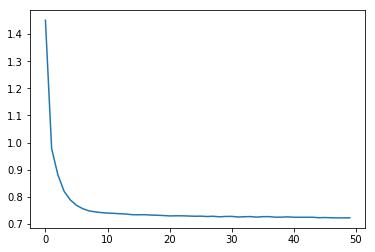

In [6]:
K_LATENT = 20
HIDDEN_DIM = 20
DROPOUT = 0.5

option1 = {
    'activation': 'relu',
    'loss': 'mse',
    'optimizer': Adamax(lr=0.001),
    'number_of_layers': 1
}

option1_model = get_ncf_model(max_user_id_train,max_movie_id_train, K_LATENT, 
                          HIDDEN_DIM, DROPOUT, option1['activation'], option1['number_of_layers'])
option1_model.compile(loss=option1['loss'], optimizer=option1['optimizer'], metrics=['mae'])
print(option1_model.summary())


Instructions for updating:
Use tf.cast instead.


Train on 80000 samples, validate on 20000 samples
Epoch 1/50


   32/80000 [..............................] - ETA: 13:13 - loss: 12.0702 - mean_absolute_error: 3.2783

 1408/80000 [..............................] - ETA: 20s - loss: 13.2094 - mean_absolute_error: 3.4561  

 2848/80000 [>.............................] - ETA: 11s - loss: 13.1320 - mean_absolute_error: 3.4435

 4288/80000 [>.............................] - ETA: 8s - loss: 12.6669 - mean_absolute_error: 3.3760 

 5760/80000 [=>............................] - ETA: 6s - loss: 12.2787 - mean_absolute_error: 3.3145

 7232/80000 [=>............................] - ETA: 5s - loss: 11.7724 - mean_absolute_error: 3.2335

 8672/80000 [==>...........................] - ETA: 5s - loss: 11.2488 - mean_absolute_error: 3.1475

10112/80000 [==>...........................] - ETA: 4s - loss: 10.7547 - mean_absolute_error: 3.0629

11456/80000 [===>..........................] - ETA: 4s - loss: 10.2808 - mean_absolute_error: 2.9792

12832/80000 [===>..........................] - ETA: 4s - loss: 9.8010 - mean_absolute_error: 2.8910 

14144/80000 [====>.........................] - ETA: 3s - loss: 9.3328 - mean_absolute_error: 2.7993

15360/80000 [====>.........................] - ETA: 3s - loss: 8.9191 - mean_absolute_error: 2.7166

16768/80000 [=====>........................] - ETA: 3s - loss: 8.4777 - mean_absolute_error: 2.6257

18144/80000 [=====>........................] - ETA: 3s - loss: 8.0604 - mean_absolute_error: 2.5364

19552/80000 [======>.......................] - ETA: 3s - loss: 7.6663 - mean_absolute_error: 2.4510

20992/80000 [======>.......................] - ETA: 3s - loss: 7.3094 - mean_absolute_error: 2.3718

22336/80000 [=======>......................] - ETA: 2s - loss: 7.0065 - mean_absolute_error: 2.3034

23328/80000 [=======>......................] - ETA: 2s - loss: 6.7992 - mean_absolute_error: 2.2565

24480/80000 [========>.....................] - ETA: 2s - loss: 6.5853 - mean_absolute_error: 2.2075

25696/80000 [========>.....................] - ETA: 2s - loss: 6.3771 - mean_absolute_error: 2.1604

26912/80000 [=========>....................] - ETA: 2s - loss: 6.1893 - mean_absolute_error: 2.1168

28192/80000 [=========>....................] - ETA: 2s - loss: 6.0074 - mean_absolute_error: 2.0751

29600/80000 [==========>...................] - ETA: 2s - loss: 5.8277 - mean_absolute_error: 2.0342

31040/80000 [==========>...................] - ETA: 2s - loss: 5.6515 - mean_absolute_error: 1.9935

32416/80000 [===========>..................] - ETA: 2s - loss: 5.5013 - mean_absolute_error: 1.9591

33408/80000 [===========>..................] - ETA: 2s - loss: 5.3993 - mean_absolute_error: 1.9353

34144/80000 [===========>..................] - ETA: 2s - loss: 5.3315 - mean_absolute_error: 1.9203

34912/80000 [============>.................] - ETA: 2s - loss: 5.2596 - mean_absolute_error: 1.9036

35648/80000 [============>.................] - ETA: 2s - loss: 5.1972 - mean_absolute_error: 1.8891

36352/80000 [============>.................] - ETA: 2s - loss: 5.1366 - mean_absolute_error: 1.8751

36928/80000 [============>.................] - ETA: 2s - loss: 5.0862 - mean_absolute_error: 1.8628

37504/80000 [=============>................] - ETA: 2s - loss: 5.0410 - mean_absolute_error: 1.8524

37984/80000 [=============>................] - ETA: 2s - loss: 5.0018 - mean_absolute_error: 1.8433

38592/80000 [=============>................] - ETA: 2s - loss: 4.9560 - mean_absolute_error: 1.8328

39168/80000 [=============>................] - ETA: 2s - loss: 4.9140 - mean_absolute_error: 1.8231

39712/80000 [=============>................] - ETA: 2s - loss: 4.8748 - mean_absolute_error: 1.8138

40192/80000 [==============>...............] - ETA: 2s - loss: 4.8404 - mean_absolute_error: 1.8060

40704/80000 [==============>...............] - ETA: 2s - loss: 4.8057 - mean_absolute_error: 1.7982

41248/80000 [==============>...............] - ETA: 2s - loss: 4.7683 - mean_absolute_error: 1.7893

41696/80000 [==============>...............] - ETA: 2s - loss: 4.7371 - mean_absolute_error: 1.7816

42208/80000 [==============>...............] - ETA: 2s - loss: 4.7045 - mean_absolute_error: 1.7740

42720/80000 [===============>..............] - ETA: 2s - loss: 4.6733 - mean_absolute_error: 1.7668

43200/80000 [===============>..............] - ETA: 2s - loss: 4.6471 - mean_absolute_error: 1.7612

43680/80000 [===============>..............] - ETA: 2s - loss: 4.6176 - mean_absolute_error: 1.7543

44288/80000 [===============>..............] - ETA: 2s - loss: 4.5807 - mean_absolute_error: 1.7458

44928/80000 [===============>..............] - ETA: 2s - loss: 4.5428 - mean_absolute_error: 1.7365

45568/80000 [================>.............] - ETA: 2s - loss: 4.5069 - mean_absolute_error: 1.7281

46656/80000 [================>.............] - ETA: 1s - loss: 4.4456 - mean_absolute_error: 1.7138

48096/80000 [=================>............] - ETA: 1s - loss: 4.3710 - mean_absolute_error: 1.6964

49568/80000 [=================>............] - ETA: 1s - loss: 4.2978 - mean_absolute_error: 1.6792

51040/80000 [==================>...........] - ETA: 1s - loss: 4.2301 - mean_absolute_error: 1.6636

52576/80000 [==================>...........] - ETA: 1s - loss: 4.1652 - mean_absolute_error: 1.6484

54080/80000 [===================>..........] - ETA: 1s - loss: 4.0987 - mean_absolute_error: 1.6326

55616/80000 [===================>..........] - ETA: 1s - loss: 4.0358 - mean_absolute_error: 1.6174

57056/80000 [====================>.........] - ETA: 1s - loss: 3.9823 - mean_absolute_error: 1.6050

58624/80000 [====================>.........] - ETA: 1s - loss: 3.9255 - mean_absolute_error: 1.5913

60160/80000 [=====================>........] - ETA: 1s - loss: 3.8723 - mean_absolute_error: 1.5788

61664/80000 [======================>.......] - ETA: 0s - loss: 3.8227 - mean_absolute_error: 1.5668

63200/80000 [======================>.......] - ETA: 0s - loss: 3.7746 - mean_absolute_error: 1.5552

64768/80000 [=======================>......] - ETA: 0s - loss: 3.7242 - mean_absolute_error: 1.5430

66336/80000 [=======================>......] - ETA: 0s - loss: 3.6757 - mean_absolute_error: 1.5313

67968/80000 [========================>.....] - ETA: 0s - loss: 3.6290 - mean_absolute_error: 1.5203

69568/80000 [=========================>....] - ETA: 0s - loss: 3.5843 - mean_absolute_error: 1.5096

71232/80000 [=========================>....] - ETA: 0s - loss: 3.5425 - mean_absolute_error: 1.4995

72864/80000 [==========================>...] - ETA: 0s - loss: 3.5031 - mean_absolute_error: 1.4901

74496/80000 [==========================>...] - ETA: 0s - loss: 3.4626 - mean_absolute_error: 1.4802

76032/80000 [===========================>..] - ETA: 0s - loss: 3.4298 - mean_absolute_error: 1.4727

77152/80000 [===========================>..] - ETA: 0s - loss: 3.4059 - mean_absolute_error: 1.4670

78112/80000 [============================>.] - ETA: 0s - loss: 3.3845 - mean_absolute_error: 1.4617

78912/80000 [============================>.] - ETA: 0s - loss: 3.3674 - mean_absolute_error: 1.4576

80000/80000 [==============================] - 4s 51us/step - loss: 3.3428 - mean_absolute_error: 1.4513 - val_loss: 1.1203 - val_mean_absolute_error: 0.8727


Epoch 2/50
   32/80000 [..............................] - ETA: 8s - loss: 2.3766 - mean_absolute_error: 1.2928

 1056/80000 [..............................] - ETA: 4s - loss: 1.7990 - mean_absolute_error: 1.0930

 1952/80000 [..............................] - ETA: 4s - loss: 1.6894 - mean_absolute_error: 1.0519

 3264/80000 [>.............................] - ETA: 3s - loss: 1.6615 - mean_absolute_error: 1.0443

 4768/80000 [>.............................] - ETA: 3s - loss: 1.6368 - mean_absolute_error: 1.0376

 6272/80000 [=>............................] - ETA: 3s - loss: 1.6516 - mean_absolute_error: 1.0409

 7744/80000 [=>............................] - ETA: 2s - loss: 1.6489 - mean_absolute_error: 1.0381

 9344/80000 [==>...........................] - ETA: 2s - loss: 1.6458 - mean_absolute_error: 1.0378

10912/80000 [===>..........................] - ETA: 2s - loss: 1.6428 - mean_absolute_error: 1.0379

12544/80000 [===>..........................] - ETA: 2s - loss: 1.6288 - mean_absolute_error: 1.0328

14208/80000 [====>.........................] - ETA: 2s - loss: 1.6311 - mean_absolute_error: 1.0353

15872/80000 [====>.........................] - ETA: 2s - loss: 1.6292 - mean_absolute_error: 1.0346

17504/80000 [=====>........................] - ETA: 2s - loss: 1.6190 - mean_absolute_error: 1.0311

19104/80000 [======>.......................] - ETA: 2s - loss: 1.6097 - mean_absolute_error: 1.0282

20736/80000 [======>.......................] - ETA: 2s - loss: 1.6040 - mean_absolute_error: 1.0258

22400/80000 [=======>......................] - ETA: 1s - loss: 1.5917 - mean_absolute_error: 1.0213

24032/80000 [========>.....................] - ETA: 1s - loss: 1.5921 - mean_absolute_error: 1.0218

25696/80000 [========>.....................] - ETA: 1s - loss: 1.5888 - mean_absolute_error: 1.0199

27232/80000 [=========>....................] - ETA: 1s - loss: 1.5833 - mean_absolute_error: 1.0182

28864/80000 [=========>....................] - ETA: 1s - loss: 1.5820 - mean_absolute_error: 1.0172

30432/80000 [==========>...................] - ETA: 1s - loss: 1.5790 - mean_absolute_error: 1.0156

32096/80000 [===========>..................] - ETA: 1s - loss: 1.5699 - mean_absolute_error: 1.0123

33728/80000 [===========>..................] - ETA: 1s - loss: 1.5646 - mean_absolute_error: 1.0108

35360/80000 [============>.................] - ETA: 1s - loss: 1.5576 - mean_absolute_error: 1.0083

36960/80000 [============>.................] - ETA: 1s - loss: 1.5558 - mean_absolute_error: 1.0079

38592/80000 [=============>................] - ETA: 1s - loss: 1.5532 - mean_absolute_error: 1.0075

40192/80000 [==============>...............] - ETA: 1s - loss: 1.5471 - mean_absolute_error: 1.0050

41824/80000 [==============>...............] - ETA: 1s - loss: 1.5466 - mean_absolute_error: 1.0049

43456/80000 [===============>..............] - ETA: 1s - loss: 1.5429 - mean_absolute_error: 1.0040

45088/80000 [===============>..............] - ETA: 1s - loss: 1.5404 - mean_absolute_error: 1.0032

46720/80000 [================>.............] - ETA: 1s - loss: 1.5382 - mean_absolute_error: 1.0023

48352/80000 [=================>............] - ETA: 1s - loss: 1.5348 - mean_absolute_error: 1.0013

49984/80000 [=================>............] - ETA: 0s - loss: 1.5331 - mean_absolute_error: 1.0007

51552/80000 [==================>...........] - ETA: 0s - loss: 1.5303 - mean_absolute_error: 0.9994

53152/80000 [==================>...........] - ETA: 0s - loss: 1.5256 - mean_absolute_error: 0.9978

54784/80000 [===================>..........] - ETA: 0s - loss: 1.5206 - mean_absolute_error: 0.9964

56416/80000 [====================>.........] - ETA: 0s - loss: 1.5166 - mean_absolute_error: 0.9947

58048/80000 [====================>.........] - ETA: 0s - loss: 1.5145 - mean_absolute_error: 0.9941

59648/80000 [=====================>........] - ETA: 0s - loss: 1.5134 - mean_absolute_error: 0.9936

61120/80000 [=====================>........] - ETA: 0s - loss: 1.5102 - mean_absolute_error: 0.9929

62720/80000 [======================>.......] - ETA: 0s - loss: 1.5070 - mean_absolute_error: 0.9916

64384/80000 [=======================>......] - ETA: 0s - loss: 1.5022 - mean_absolute_error: 0.9898

66016/80000 [=======================>......] - ETA: 0s - loss: 1.4977 - mean_absolute_error: 0.9881

67680/80000 [========================>.....] - ETA: 0s - loss: 1.4947 - mean_absolute_error: 0.9869

69312/80000 [========================>.....] - ETA: 0s - loss: 1.4915 - mean_absolute_error: 0.9856

70848/80000 [=========================>....] - ETA: 0s - loss: 1.4888 - mean_absolute_error: 0.9844

72480/80000 [==========================>...] - ETA: 0s - loss: 1.4853 - mean_absolute_error: 0.9832

74144/80000 [==========================>...] - ETA: 0s - loss: 1.4820 - mean_absolute_error: 0.9820

75776/80000 [===========================>..] - ETA: 0s - loss: 1.4788 - mean_absolute_error: 0.9810

77408/80000 [============================>.] - ETA: 0s - loss: 1.4754 - mean_absolute_error: 0.9798

79040/80000 [============================>.] - ETA: 0s - loss: 1.4720 - mean_absolute_error: 0.9786

80000/80000 [==============================] - 3s 34us/step - loss: 1.4696 - mean_absolute_error: 0.9777 - val_loss: 1.0000 - val_mean_absolute_error: 0.8134


Epoch 3/50
   32/80000 [..............................] - ETA: 7s - loss: 1.4481 - mean_absolute_error: 1.0302

 1120/80000 [..............................] - ETA: 3s - loss: 1.2689 - mean_absolute_error: 0.8945

 2304/80000 [..............................] - ETA: 3s - loss: 1.2828 - mean_absolute_error: 0.8987

 3808/80000 [>.............................] - ETA: 3s - loss: 1.3139 - mean_absolute_error: 0.9155

 5408/80000 [=>............................] - ETA: 2s - loss: 1.2960 - mean_absolute_error: 0.9113

 7008/80000 [=>............................] - ETA: 2s - loss: 1.3031 - mean_absolute_error: 0.9145

 8608/80000 [==>...........................] - ETA: 2s - loss: 1.3036 - mean_absolute_error: 0.9156

 9952/80000 [==>...........................] - ETA: 2s - loss: 1.3006 - mean_absolute_error: 0.9139

11552/80000 [===>..........................] - ETA: 2s - loss: 1.2900 - mean_absolute_error: 0.9108

13152/80000 [===>..........................] - ETA: 2s - loss: 1.2806 - mean_absolute_error: 0.9071

14752/80000 [====>.........................] - ETA: 2s - loss: 1.2737 - mean_absolute_error: 0.9047

16384/80000 [=====>........................] - ETA: 2s - loss: 1.2741 - mean_absolute_error: 0.9049

18016/80000 [=====>........................] - ETA: 2s - loss: 1.2788 - mean_absolute_error: 0.9068

19648/80000 [======>.......................] - ETA: 2s - loss: 1.2799 - mean_absolute_error: 0.9076

21312/80000 [======>.......................] - ETA: 1s - loss: 1.2731 - mean_absolute_error: 0.9055

22976/80000 [=======>......................] - ETA: 1s - loss: 1.2717 - mean_absolute_error: 0.9058

24608/80000 [========>.....................] - ETA: 1s - loss: 1.2757 - mean_absolute_error: 0.9065

26208/80000 [========>.....................] - ETA: 1s - loss: 1.2714 - mean_absolute_error: 0.9052

27872/80000 [=========>....................] - ETA: 1s - loss: 1.2702 - mean_absolute_error: 0.9056

29440/80000 [==========>...................] - ETA: 1s - loss: 1.2661 - mean_absolute_error: 0.9041

31104/80000 [==========>...................] - ETA: 1s - loss: 1.2630 - mean_absolute_error: 0.9030

32768/80000 [===========>..................] - ETA: 1s - loss: 1.2615 - mean_absolute_error: 0.9023

34432/80000 [===========>..................] - ETA: 1s - loss: 1.2574 - mean_absolute_error: 0.9005

36096/80000 [============>.................] - ETA: 1s - loss: 1.2538 - mean_absolute_error: 0.8996

37664/80000 [=============>................] - ETA: 1s - loss: 1.2542 - mean_absolute_error: 0.8998

39232/80000 [=============>................] - ETA: 1s - loss: 1.2524 - mean_absolute_error: 0.8996

40832/80000 [==============>...............] - ETA: 1s - loss: 1.2493 - mean_absolute_error: 0.8983

42464/80000 [==============>...............] - ETA: 1s - loss: 1.2479 - mean_absolute_error: 0.8980

44032/80000 [===============>..............] - ETA: 1s - loss: 1.2471 - mean_absolute_error: 0.8981

45600/80000 [================>.............] - ETA: 1s - loss: 1.2458 - mean_absolute_error: 0.8975

47232/80000 [================>.............] - ETA: 1s - loss: 1.2420 - mean_absolute_error: 0.8960

48896/80000 [=================>............] - ETA: 0s - loss: 1.2409 - mean_absolute_error: 0.8956

50592/80000 [=================>............] - ETA: 0s - loss: 1.2384 - mean_absolute_error: 0.8950

52256/80000 [==================>...........] - ETA: 0s - loss: 1.2346 - mean_absolute_error: 0.8938

53920/80000 [===================>..........] - ETA: 0s - loss: 1.2340 - mean_absolute_error: 0.8936

55616/80000 [===================>..........] - ETA: 0s - loss: 1.2315 - mean_absolute_error: 0.8926

57280/80000 [====================>.........] - ETA: 0s - loss: 1.2289 - mean_absolute_error: 0.8917

58944/80000 [=====================>........] - ETA: 0s - loss: 1.2273 - mean_absolute_error: 0.8912

60544/80000 [=====================>........] - ETA: 0s - loss: 1.2247 - mean_absolute_error: 0.8904

62080/80000 [======================>.......] - ETA: 0s - loss: 1.2226 - mean_absolute_error: 0.8896

63712/80000 [======================>.......] - ETA: 0s - loss: 1.2205 - mean_absolute_error: 0.8889

65344/80000 [=======================>......] - ETA: 0s - loss: 1.2178 - mean_absolute_error: 0.8875

67008/80000 [========================>.....] - ETA: 0s - loss: 1.2141 - mean_absolute_error: 0.8862

68640/80000 [========================>.....] - ETA: 0s - loss: 1.2118 - mean_absolute_error: 0.8850

70272/80000 [=========================>....] - ETA: 0s - loss: 1.2095 - mean_absolute_error: 0.8841

71808/80000 [=========================>....] - ETA: 0s - loss: 1.2085 - mean_absolute_error: 0.8837

73440/80000 [==========================>...] - ETA: 0s - loss: 1.2089 - mean_absolute_error: 0.8841

75040/80000 [===========================>..] - ETA: 0s - loss: 1.2068 - mean_absolute_error: 0.8832

76672/80000 [===========================>..] - ETA: 0s - loss: 1.2050 - mean_absolute_error: 0.8827

78272/80000 [============================>.] - ETA: 0s - loss: 1.2032 - mean_absolute_error: 0.8820

79904/80000 [============================>.] - ETA: 0s - loss: 1.2019 - mean_absolute_error: 0.8814

80000/80000 [==============================] - 3s 34us/step - loss: 1.2018 - mean_absolute_error: 0.8814 - val_loss: 0.9651 - val_mean_absolute_error: 0.7957


Epoch 4/50
   32/80000 [..............................] - ETA: 7s - loss: 1.0627 - mean_absolute_error: 0.8039

 1056/80000 [..............................] - ETA: 4s - loss: 1.1684 - mean_absolute_error: 0.8542

 2112/80000 [..............................] - ETA: 3s - loss: 1.1150 - mean_absolute_error: 0.8425

 3584/80000 [>.............................] - ETA: 3s - loss: 1.1044 - mean_absolute_error: 0.8418

 5152/80000 [>.............................] - ETA: 2s - loss: 1.1029 - mean_absolute_error: 0.8411

 6752/80000 [=>............................] - ETA: 2s - loss: 1.1064 - mean_absolute_error: 0.8414

 8288/80000 [==>...........................] - ETA: 2s - loss: 1.0983 - mean_absolute_error: 0.8386

 9920/80000 [==>...........................] - ETA: 2s - loss: 1.0958 - mean_absolute_error: 0.8369

11552/80000 [===>..........................] - ETA: 2s - loss: 1.0923 - mean_absolute_error: 0.8352

13216/80000 [===>..........................] - ETA: 2s - loss: 1.0879 - mean_absolute_error: 0.8340

14848/80000 [====>.........................] - ETA: 2s - loss: 1.0824 - mean_absolute_error: 0.8327

16480/80000 [=====>........................] - ETA: 2s - loss: 1.0854 - mean_absolute_error: 0.8333

18080/80000 [=====>........................] - ETA: 2s - loss: 1.0853 - mean_absolute_error: 0.8336

19680/80000 [======>.......................] - ETA: 2s - loss: 1.0852 - mean_absolute_error: 0.8341

21152/80000 [======>.......................] - ETA: 1s - loss: 1.0824 - mean_absolute_error: 0.8329

22752/80000 [=======>......................] - ETA: 1s - loss: 1.0790 - mean_absolute_error: 0.8322

24352/80000 [========>.....................] - ETA: 1s - loss: 1.0760 - mean_absolute_error: 0.8314

25952/80000 [========>.....................] - ETA: 1s - loss: 1.0778 - mean_absolute_error: 0.8330

27584/80000 [=========>....................] - ETA: 1s - loss: 1.0785 - mean_absolute_error: 0.8327

29216/80000 [=========>....................] - ETA: 1s - loss: 1.0795 - mean_absolute_error: 0.8335

30848/80000 [==========>...................] - ETA: 1s - loss: 1.0749 - mean_absolute_error: 0.8316

32480/80000 [===========>..................] - ETA: 1s - loss: 1.0706 - mean_absolute_error: 0.8304

34016/80000 [===========>..................] - ETA: 1s - loss: 1.0717 - mean_absolute_error: 0.8308

35616/80000 [============>.................] - ETA: 1s - loss: 1.0709 - mean_absolute_error: 0.8306

37280/80000 [============>.................] - ETA: 1s - loss: 1.0711 - mean_absolute_error: 0.8306

38912/80000 [=============>................] - ETA: 1s - loss: 1.0710 - mean_absolute_error: 0.8308

40512/80000 [==============>...............] - ETA: 1s - loss: 1.0733 - mean_absolute_error: 0.8312

42080/80000 [==============>...............] - ETA: 1s - loss: 1.0703 - mean_absolute_error: 0.8301

43712/80000 [===============>..............] - ETA: 1s - loss: 1.0688 - mean_absolute_error: 0.8295

45344/80000 [================>.............] - ETA: 1s - loss: 1.0678 - mean_absolute_error: 0.8290

46944/80000 [================>.............] - ETA: 1s - loss: 1.0656 - mean_absolute_error: 0.8284

48448/80000 [=================>............] - ETA: 1s - loss: 1.0647 - mean_absolute_error: 0.8284

50048/80000 [=================>............] - ETA: 0s - loss: 1.0655 - mean_absolute_error: 0.8288

51680/80000 [==================>...........] - ETA: 0s - loss: 1.0614 - mean_absolute_error: 0.8272

53280/80000 [==================>...........] - ETA: 0s - loss: 1.0598 - mean_absolute_error: 0.8267

54752/80000 [===================>..........] - ETA: 0s - loss: 1.0584 - mean_absolute_error: 0.8259

56320/80000 [====================>.........] - ETA: 0s - loss: 1.0567 - mean_absolute_error: 0.8250

57728/80000 [====================>.........] - ETA: 0s - loss: 1.0580 - mean_absolute_error: 0.8255

58848/80000 [=====================>........] - ETA: 0s - loss: 1.0584 - mean_absolute_error: 0.8257

60352/80000 [=====================>........] - ETA: 0s - loss: 1.0575 - mean_absolute_error: 0.8254

61920/80000 [======================>.......] - ETA: 0s - loss: 1.0558 - mean_absolute_error: 0.8246

63488/80000 [======================>.......] - ETA: 0s - loss: 1.0564 - mean_absolute_error: 0.8249

65120/80000 [=======================>......] - ETA: 0s - loss: 1.0549 - mean_absolute_error: 0.8243

66720/80000 [========================>.....] - ETA: 0s - loss: 1.0543 - mean_absolute_error: 0.8243

68288/80000 [========================>.....] - ETA: 0s - loss: 1.0531 - mean_absolute_error: 0.8239

69888/80000 [=========================>....] - ETA: 0s - loss: 1.0510 - mean_absolute_error: 0.8230

71520/80000 [=========================>....] - ETA: 0s - loss: 1.0498 - mean_absolute_error: 0.8226

73152/80000 [==========================>...] - ETA: 0s - loss: 1.0480 - mean_absolute_error: 0.8217

74784/80000 [===========================>..] - ETA: 0s - loss: 1.0474 - mean_absolute_error: 0.8216

76416/80000 [===========================>..] - ETA: 0s - loss: 1.0457 - mean_absolute_error: 0.8210

78048/80000 [============================>.] - ETA: 0s - loss: 1.0446 - mean_absolute_error: 0.8206

79680/80000 [============================>.] - ETA: 0s - loss: 1.0436 - mean_absolute_error: 0.8203

80000/80000 [==============================] - 3s 34us/step - loss: 1.0433 - mean_absolute_error: 0.8202 - val_loss: 0.9377 - val_mean_absolute_error: 0.7798


Epoch 5/50
   32/80000 [..............................] - ETA: 8s - loss: 1.1266 - mean_absolute_error: 0.8975

 1152/80000 [..............................] - ETA: 3s - loss: 1.0076 - mean_absolute_error: 0.8104

 2240/80000 [..............................] - ETA: 3s - loss: 0.9855 - mean_absolute_error: 0.8003

 3744/80000 [>.............................] - ETA: 3s - loss: 0.9763 - mean_absolute_error: 0.7924

 5312/80000 [>.............................] - ETA: 2s - loss: 0.9929 - mean_absolute_error: 0.7975

 6848/80000 [=>............................] - ETA: 2s - loss: 0.9984 - mean_absolute_error: 0.8006

 8416/80000 [==>...........................] - ETA: 2s - loss: 0.9982 - mean_absolute_error: 0.7995

 9888/80000 [==>...........................] - ETA: 2s - loss: 0.9940 - mean_absolute_error: 0.7980

11520/80000 [===>..........................] - ETA: 2s - loss: 0.9989 - mean_absolute_error: 0.8006

13152/80000 [===>..........................] - ETA: 2s - loss: 0.9988 - mean_absolute_error: 0.8007

14784/80000 [====>.........................] - ETA: 2s - loss: 0.9965 - mean_absolute_error: 0.8010

16416/80000 [=====>........................] - ETA: 2s - loss: 0.9920 - mean_absolute_error: 0.7998

18048/80000 [=====>........................] - ETA: 2s - loss: 0.9855 - mean_absolute_error: 0.7969

19712/80000 [======>.......................] - ETA: 2s - loss: 0.9832 - mean_absolute_error: 0.7965

21376/80000 [=======>......................] - ETA: 1s - loss: 0.9794 - mean_absolute_error: 0.7948

22944/80000 [=======>......................] - ETA: 1s - loss: 0.9814 - mean_absolute_error: 0.7951

24576/80000 [========>.....................] - ETA: 1s - loss: 0.9785 - mean_absolute_error: 0.7937

26016/80000 [========>.....................] - ETA: 1s - loss: 0.9792 - mean_absolute_error: 0.7941

27616/80000 [=========>....................] - ETA: 1s - loss: 0.9796 - mean_absolute_error: 0.7940

29216/80000 [=========>....................] - ETA: 1s - loss: 0.9772 - mean_absolute_error: 0.7929

30784/80000 [==========>...................] - ETA: 1s - loss: 0.9778 - mean_absolute_error: 0.7927

32384/80000 [===========>..................] - ETA: 1s - loss: 0.9777 - mean_absolute_error: 0.7926

33952/80000 [===========>..................] - ETA: 1s - loss: 0.9827 - mean_absolute_error: 0.7947

35552/80000 [============>.................] - ETA: 1s - loss: 0.9823 - mean_absolute_error: 0.7944

37184/80000 [============>.................] - ETA: 1s - loss: 0.9801 - mean_absolute_error: 0.7938

38816/80000 [=============>................] - ETA: 1s - loss: 0.9806 - mean_absolute_error: 0.7939

40448/80000 [==============>...............] - ETA: 1s - loss: 0.9780 - mean_absolute_error: 0.7930

42080/80000 [==============>...............] - ETA: 1s - loss: 0.9775 - mean_absolute_error: 0.7929

43712/80000 [===============>..............] - ETA: 1s - loss: 0.9785 - mean_absolute_error: 0.7934

45344/80000 [================>.............] - ETA: 1s - loss: 0.9783 - mean_absolute_error: 0.7933

46944/80000 [================>.............] - ETA: 1s - loss: 0.9777 - mean_absolute_error: 0.7926

48576/80000 [=================>............] - ETA: 1s - loss: 0.9749 - mean_absolute_error: 0.7916

50208/80000 [=================>............] - ETA: 0s - loss: 0.9738 - mean_absolute_error: 0.7910

51840/80000 [==================>...........] - ETA: 0s - loss: 0.9734 - mean_absolute_error: 0.7907

53504/80000 [===================>..........] - ETA: 0s - loss: 0.9733 - mean_absolute_error: 0.7907

55104/80000 [===================>..........] - ETA: 0s - loss: 0.9726 - mean_absolute_error: 0.7904

56608/80000 [====================>.........] - ETA: 0s - loss: 0.9727 - mean_absolute_error: 0.7904

58208/80000 [====================>.........] - ETA: 0s - loss: 0.9717 - mean_absolute_error: 0.7902

59840/80000 [=====================>........] - ETA: 0s - loss: 0.9705 - mean_absolute_error: 0.7898

61472/80000 [======================>.......] - ETA: 0s - loss: 0.9692 - mean_absolute_error: 0.7894

63072/80000 [======================>.......] - ETA: 0s - loss: 0.9696 - mean_absolute_error: 0.7897

64704/80000 [=======================>......] - ETA: 0s - loss: 0.9697 - mean_absolute_error: 0.7898

66304/80000 [=======================>......] - ETA: 0s - loss: 0.9690 - mean_absolute_error: 0.7894

67936/80000 [========================>.....] - ETA: 0s - loss: 0.9670 - mean_absolute_error: 0.7887

69568/80000 [=========================>....] - ETA: 0s - loss: 0.9671 - mean_absolute_error: 0.7887

71200/80000 [=========================>....] - ETA: 0s - loss: 0.9680 - mean_absolute_error: 0.7889

72832/80000 [==========================>...] - ETA: 0s - loss: 0.9671 - mean_absolute_error: 0.7884

74464/80000 [==========================>...] - ETA: 0s - loss: 0.9672 - mean_absolute_error: 0.7885

76064/80000 [===========================>..] - ETA: 0s - loss: 0.9666 - mean_absolute_error: 0.7885

77568/80000 [============================>.] - ETA: 0s - loss: 0.9663 - mean_absolute_error: 0.7883

78976/80000 [============================>.] - ETA: 0s - loss: 0.9656 - mean_absolute_error: 0.7880

80000/80000 [==============================] - 3s 34us/step - loss: 0.9661 - mean_absolute_error: 0.7881 - val_loss: 0.9268 - val_mean_absolute_error: 0.7724


Epoch 6/50
   32/80000 [..............................] - ETA: 8s - loss: 0.9539 - mean_absolute_error: 0.7708

 1056/80000 [..............................] - ETA: 4s - loss: 0.9234 - mean_absolute_error: 0.7864

 2240/80000 [..............................] - ETA: 3s - loss: 0.9105 - mean_absolute_error: 0.7709

 3616/80000 [>.............................] - ETA: 3s - loss: 0.9262 - mean_absolute_error: 0.7698

 5184/80000 [>.............................] - ETA: 2s - loss: 0.9201 - mean_absolute_error: 0.7681

 6816/80000 [=>............................] - ETA: 2s - loss: 0.9248 - mean_absolute_error: 0.7692

 8448/80000 [==>...........................] - ETA: 2s - loss: 0.9298 - mean_absolute_error: 0.7706

10080/80000 [==>...........................] - ETA: 2s - loss: 0.9266 - mean_absolute_error: 0.7676

11680/80000 [===>..........................] - ETA: 2s - loss: 0.9302 - mean_absolute_error: 0.7700

13312/80000 [===>..........................] - ETA: 2s - loss: 0.9282 - mean_absolute_error: 0.7688

14912/80000 [====>.........................] - ETA: 2s - loss: 0.9345 - mean_absolute_error: 0.7719

16544/80000 [=====>........................] - ETA: 2s - loss: 0.9355 - mean_absolute_error: 0.7731

18144/80000 [=====>........................] - ETA: 2s - loss: 0.9300 - mean_absolute_error: 0.7712

19712/80000 [======>.......................] - ETA: 2s - loss: 0.9341 - mean_absolute_error: 0.7736

21280/80000 [======>.......................] - ETA: 1s - loss: 0.9335 - mean_absolute_error: 0.7729

22880/80000 [=======>......................] - ETA: 1s - loss: 0.9300 - mean_absolute_error: 0.7720

24480/80000 [========>.....................] - ETA: 1s - loss: 0.9330 - mean_absolute_error: 0.7731

26016/80000 [========>.....................] - ETA: 1s - loss: 0.9326 - mean_absolute_error: 0.7726

27616/80000 [=========>....................] - ETA: 1s - loss: 0.9330 - mean_absolute_error: 0.7727

29280/80000 [=========>....................] - ETA: 1s - loss: 0.9339 - mean_absolute_error: 0.7729

30912/80000 [==========>...................] - ETA: 1s - loss: 0.9357 - mean_absolute_error: 0.7740

32576/80000 [===========>..................] - ETA: 1s - loss: 0.9362 - mean_absolute_error: 0.7741

34144/80000 [===========>..................] - ETA: 1s - loss: 0.9365 - mean_absolute_error: 0.7743

35616/80000 [============>.................] - ETA: 1s - loss: 0.9353 - mean_absolute_error: 0.7737

37184/80000 [============>.................] - ETA: 1s - loss: 0.9326 - mean_absolute_error: 0.7725

38784/80000 [=============>................] - ETA: 1s - loss: 0.9308 - mean_absolute_error: 0.7718

40416/80000 [==============>...............] - ETA: 1s - loss: 0.9305 - mean_absolute_error: 0.7716

41984/80000 [==============>...............] - ETA: 1s - loss: 0.9278 - mean_absolute_error: 0.7704

43584/80000 [===============>..............] - ETA: 1s - loss: 0.9270 - mean_absolute_error: 0.7698

45184/80000 [===============>..............] - ETA: 1s - loss: 0.9288 - mean_absolute_error: 0.7704

46784/80000 [================>.............] - ETA: 1s - loss: 0.9294 - mean_absolute_error: 0.7705

48384/80000 [=================>............] - ETA: 1s - loss: 0.9285 - mean_absolute_error: 0.7700

50016/80000 [=================>............] - ETA: 0s - loss: 0.9279 - mean_absolute_error: 0.7700

51616/80000 [==================>...........] - ETA: 0s - loss: 0.9282 - mean_absolute_error: 0.7701

53216/80000 [==================>...........] - ETA: 0s - loss: 0.9266 - mean_absolute_error: 0.7696

54784/80000 [===================>..........] - ETA: 0s - loss: 0.9271 - mean_absolute_error: 0.7696

56352/80000 [====================>.........] - ETA: 0s - loss: 0.9270 - mean_absolute_error: 0.7694

57952/80000 [====================>.........] - ETA: 0s - loss: 0.9264 - mean_absolute_error: 0.7693

59552/80000 [=====================>........] - ETA: 0s - loss: 0.9265 - mean_absolute_error: 0.7694

61152/80000 [=====================>........] - ETA: 0s - loss: 0.9262 - mean_absolute_error: 0.7693

62752/80000 [======================>.......] - ETA: 0s - loss: 0.9250 - mean_absolute_error: 0.7689

64320/80000 [=======================>......] - ETA: 0s - loss: 0.9245 - mean_absolute_error: 0.7686

65888/80000 [=======================>......] - ETA: 0s - loss: 0.9246 - mean_absolute_error: 0.7687

67488/80000 [========================>.....] - ETA: 0s - loss: 0.9248 - mean_absolute_error: 0.7687

69152/80000 [========================>.....] - ETA: 0s - loss: 0.9248 - mean_absolute_error: 0.7688

70784/80000 [=========================>....] - ETA: 0s - loss: 0.9252 - mean_absolute_error: 0.7688

71904/80000 [=========================>....] - ETA: 0s - loss: 0.9250 - mean_absolute_error: 0.7686

73152/80000 [==========================>...] - ETA: 0s - loss: 0.9244 - mean_absolute_error: 0.7684

74368/80000 [==========================>...] - ETA: 0s - loss: 0.9232 - mean_absolute_error: 0.7677

75712/80000 [===========================>..] - ETA: 0s - loss: 0.9230 - mean_absolute_error: 0.7677

77120/80000 [===========================>..] - ETA: 0s - loss: 0.9227 - mean_absolute_error: 0.7676

78688/80000 [============================>.] - ETA: 0s - loss: 0.9226 - mean_absolute_error: 0.7677

80000/80000 [==============================] - 3s 35us/step - loss: 0.9237 - mean_absolute_error: 0.7682 - val_loss: 0.9179 - val_mean_absolute_error: 0.7644


Epoch 7/50
   32/80000 [..............................] - ETA: 8s - loss: 1.4693 - mean_absolute_error: 1.0654

 1024/80000 [..............................] - ETA: 4s - loss: 0.9402 - mean_absolute_error: 0.7738

 2208/80000 [..............................] - ETA: 3s - loss: 0.9364 - mean_absolute_error: 0.7792

 3648/80000 [>.............................] - ETA: 3s - loss: 0.9303 - mean_absolute_error: 0.7687

 5184/80000 [>.............................] - ETA: 2s - loss: 0.9202 - mean_absolute_error: 0.7674

 6752/80000 [=>............................] - ETA: 2s - loss: 0.9046 - mean_absolute_error: 0.7577

 8352/80000 [==>...........................] - ETA: 2s - loss: 0.9075 - mean_absolute_error: 0.7577

 9952/80000 [==>...........................] - ETA: 2s - loss: 0.8999 - mean_absolute_error: 0.7560

11552/80000 [===>..........................] - ETA: 2s - loss: 0.8938 - mean_absolute_error: 0.7538

13088/80000 [===>..........................] - ETA: 2s - loss: 0.8900 - mean_absolute_error: 0.7525

14688/80000 [====>.........................] - ETA: 2s - loss: 0.8871 - mean_absolute_error: 0.7508

16288/80000 [=====>........................] - ETA: 2s - loss: 0.8909 - mean_absolute_error: 0.7510

17920/80000 [=====>........................] - ETA: 2s - loss: 0.8889 - mean_absolute_error: 0.7503

19520/80000 [======>.......................] - ETA: 2s - loss: 0.8878 - mean_absolute_error: 0.7489

21120/80000 [======>.......................] - ETA: 1s - loss: 0.8917 - mean_absolute_error: 0.7511

22752/80000 [=======>......................] - ETA: 1s - loss: 0.8911 - mean_absolute_error: 0.7512

24384/80000 [========>.....................] - ETA: 1s - loss: 0.8907 - mean_absolute_error: 0.7510

25984/80000 [========>.....................] - ETA: 1s - loss: 0.8925 - mean_absolute_error: 0.7514

27584/80000 [=========>....................] - ETA: 1s - loss: 0.8948 - mean_absolute_error: 0.7525

29152/80000 [=========>....................] - ETA: 1s - loss: 0.8922 - mean_absolute_error: 0.7516

30720/80000 [==========>...................] - ETA: 1s - loss: 0.8951 - mean_absolute_error: 0.7530

31968/80000 [==========>...................] - ETA: 1s - loss: 0.8951 - mean_absolute_error: 0.7531

32832/80000 [===========>..................] - ETA: 1s - loss: 0.8960 - mean_absolute_error: 0.7538

33760/80000 [===========>..................] - ETA: 1s - loss: 0.8967 - mean_absolute_error: 0.7542

34848/80000 [============>.................] - ETA: 1s - loss: 0.8972 - mean_absolute_error: 0.7543

36256/80000 [============>.................] - ETA: 1s - loss: 0.8956 - mean_absolute_error: 0.7537

37760/80000 [=============>................] - ETA: 1s - loss: 0.8973 - mean_absolute_error: 0.7545

39296/80000 [=============>................] - ETA: 1s - loss: 0.8990 - mean_absolute_error: 0.7552

40800/80000 [==============>...............] - ETA: 1s - loss: 0.8985 - mean_absolute_error: 0.7548

42368/80000 [==============>...............] - ETA: 1s - loss: 0.8956 - mean_absolute_error: 0.7537

43904/80000 [===============>..............] - ETA: 1s - loss: 0.8957 - mean_absolute_error: 0.7536

45472/80000 [================>.............] - ETA: 1s - loss: 0.8976 - mean_absolute_error: 0.7545

47072/80000 [================>.............] - ETA: 1s - loss: 0.8984 - mean_absolute_error: 0.7549

48640/80000 [=================>............] - ETA: 1s - loss: 0.8962 - mean_absolute_error: 0.7540

50208/80000 [=================>............] - ETA: 1s - loss: 0.8978 - mean_absolute_error: 0.7549

51744/80000 [==================>...........] - ETA: 0s - loss: 0.8981 - mean_absolute_error: 0.7552

52832/80000 [==================>...........] - ETA: 0s - loss: 0.8985 - mean_absolute_error: 0.7553

53952/80000 [===================>..........] - ETA: 0s - loss: 0.8985 - mean_absolute_error: 0.7554

54784/80000 [===================>..........] - ETA: 0s - loss: 0.8986 - mean_absolute_error: 0.7555

55552/80000 [===================>..........] - ETA: 0s - loss: 0.8985 - mean_absolute_error: 0.7554

56192/80000 [====================>.........] - ETA: 0s - loss: 0.8987 - mean_absolute_error: 0.7555

56896/80000 [====================>.........] - ETA: 0s - loss: 0.8986 - mean_absolute_error: 0.7553

57760/80000 [====================>.........] - ETA: 0s - loss: 0.8980 - mean_absolute_error: 0.7550

58976/80000 [=====================>........] - ETA: 0s - loss: 0.8971 - mean_absolute_error: 0.7548

60192/80000 [=====================>........] - ETA: 0s - loss: 0.8976 - mean_absolute_error: 0.7551

61472/80000 [======================>.......] - ETA: 0s - loss: 0.8973 - mean_absolute_error: 0.7549

62752/80000 [======================>.......] - ETA: 0s - loss: 0.8964 - mean_absolute_error: 0.7547

64032/80000 [=======================>......] - ETA: 0s - loss: 0.8967 - mean_absolute_error: 0.7548

65152/80000 [=======================>......] - ETA: 0s - loss: 0.8966 - mean_absolute_error: 0.7547

66304/80000 [=======================>......] - ETA: 0s - loss: 0.8975 - mean_absolute_error: 0.7550

67648/80000 [========================>.....] - ETA: 0s - loss: 0.8977 - mean_absolute_error: 0.7553

69152/80000 [========================>.....] - ETA: 0s - loss: 0.8975 - mean_absolute_error: 0.7553

70752/80000 [=========================>....] - ETA: 0s - loss: 0.8969 - mean_absolute_error: 0.7551

72320/80000 [==========================>...] - ETA: 0s - loss: 0.8979 - mean_absolute_error: 0.7553

73888/80000 [==========================>...] - ETA: 0s - loss: 0.8980 - mean_absolute_error: 0.7554

75360/80000 [===========================>..] - ETA: 0s - loss: 0.8974 - mean_absolute_error: 0.7552

76960/80000 [===========================>..] - ETA: 0s - loss: 0.8969 - mean_absolute_error: 0.7549

78592/80000 [============================>.] - ETA: 0s - loss: 0.8984 - mean_absolute_error: 0.7555

80000/80000 [==============================] - 3s 39us/step - loss: 0.8994 - mean_absolute_error: 0.7559 - val_loss: 0.9131 - val_mean_absolute_error: 0.7595


Epoch 8/50
   32/80000 [..............................] - ETA: 16s - loss: 0.3796 - mean_absolute_error: 0.5265

  960/80000 [..............................] - ETA: 4s - loss: 0.8833 - mean_absolute_error: 0.7585 

 1792/80000 [..............................] - ETA: 4s - loss: 0.9055 - mean_absolute_error: 0.7621

 2784/80000 [>.............................] - ETA: 4s - loss: 0.8950 - mean_absolute_error: 0.7543

 4160/80000 [>.............................] - ETA: 3s - loss: 0.8893 - mean_absolute_error: 0.7496

 5600/80000 [=>............................] - ETA: 3s - loss: 0.8950 - mean_absolute_error: 0.7515

 7008/80000 [=>............................] - ETA: 3s - loss: 0.8874 - mean_absolute_error: 0.7469

 8512/80000 [==>...........................] - ETA: 3s - loss: 0.8861 - mean_absolute_error: 0.7471

10048/80000 [==>...........................] - ETA: 2s - loss: 0.8870 - mean_absolute_error: 0.7475

11520/80000 [===>..........................] - ETA: 2s - loss: 0.8816 - mean_absolute_error: 0.7442

13088/80000 [===>..........................] - ETA: 2s - loss: 0.8821 - mean_absolute_error: 0.7448

14688/80000 [====>.........................] - ETA: 2s - loss: 0.8827 - mean_absolute_error: 0.7448

16224/80000 [=====>........................] - ETA: 2s - loss: 0.8819 - mean_absolute_error: 0.7444

17792/80000 [=====>........................] - ETA: 2s - loss: 0.8812 - mean_absolute_error: 0.7443

19264/80000 [======>.......................] - ETA: 2s - loss: 0.8827 - mean_absolute_error: 0.7450

20832/80000 [======>.......................] - ETA: 2s - loss: 0.8854 - mean_absolute_error: 0.7462

22400/80000 [=======>......................] - ETA: 2s - loss: 0.8849 - mean_absolute_error: 0.7463

24000/80000 [========>.....................] - ETA: 2s - loss: 0.8842 - mean_absolute_error: 0.7462

25600/80000 [========>.....................] - ETA: 1s - loss: 0.8817 - mean_absolute_error: 0.7449

27168/80000 [=========>....................] - ETA: 1s - loss: 0.8847 - mean_absolute_error: 0.7456

28736/80000 [=========>....................] - ETA: 1s - loss: 0.8847 - mean_absolute_error: 0.7457

30304/80000 [==========>...................] - ETA: 1s - loss: 0.8832 - mean_absolute_error: 0.7448

31872/80000 [==========>...................] - ETA: 1s - loss: 0.8840 - mean_absolute_error: 0.7454

33408/80000 [===========>..................] - ETA: 1s - loss: 0.8844 - mean_absolute_error: 0.7458

34912/80000 [============>.................] - ETA: 1s - loss: 0.8859 - mean_absolute_error: 0.7463

36384/80000 [============>.................] - ETA: 1s - loss: 0.8847 - mean_absolute_error: 0.7456

37920/80000 [=============>................] - ETA: 1s - loss: 0.8855 - mean_absolute_error: 0.7457

39520/80000 [=============>................] - ETA: 1s - loss: 0.8852 - mean_absolute_error: 0.7451

41152/80000 [==============>...............] - ETA: 1s - loss: 0.8852 - mean_absolute_error: 0.7453

42688/80000 [===============>..............] - ETA: 1s - loss: 0.8845 - mean_absolute_error: 0.7453

44288/80000 [===============>..............] - ETA: 1s - loss: 0.8843 - mean_absolute_error: 0.7455

45888/80000 [================>.............] - ETA: 1s - loss: 0.8853 - mean_absolute_error: 0.7460

47392/80000 [================>.............] - ETA: 1s - loss: 0.8860 - mean_absolute_error: 0.7462

48992/80000 [=================>............] - ETA: 1s - loss: 0.8857 - mean_absolute_error: 0.7463

50560/80000 [=================>............] - ETA: 1s - loss: 0.8872 - mean_absolute_error: 0.7470

52160/80000 [==================>...........] - ETA: 0s - loss: 0.8897 - mean_absolute_error: 0.7481

53760/80000 [===================>..........] - ETA: 0s - loss: 0.8895 - mean_absolute_error: 0.7480

55328/80000 [===================>..........] - ETA: 0s - loss: 0.8890 - mean_absolute_error: 0.7481

56928/80000 [====================>.........] - ETA: 0s - loss: 0.8879 - mean_absolute_error: 0.7474

58496/80000 [====================>.........] - ETA: 0s - loss: 0.8874 - mean_absolute_error: 0.7471

60064/80000 [=====================>........] - ETA: 0s - loss: 0.8877 - mean_absolute_error: 0.7475

61696/80000 [======================>.......] - ETA: 0s - loss: 0.8873 - mean_absolute_error: 0.7473

63296/80000 [======================>.......] - ETA: 0s - loss: 0.8870 - mean_absolute_error: 0.7473

64896/80000 [=======================>......] - ETA: 0s - loss: 0.8869 - mean_absolute_error: 0.7473

66432/80000 [=======================>......] - ETA: 0s - loss: 0.8880 - mean_absolute_error: 0.7479

67904/80000 [========================>.....] - ETA: 0s - loss: 0.8865 - mean_absolute_error: 0.7472

69440/80000 [=========================>....] - ETA: 0s - loss: 0.8853 - mean_absolute_error: 0.7469

71040/80000 [=========================>....] - ETA: 0s - loss: 0.8861 - mean_absolute_error: 0.7473

72640/80000 [==========================>...] - ETA: 0s - loss: 0.8860 - mean_absolute_error: 0.7475

74240/80000 [==========================>...] - ETA: 0s - loss: 0.8858 - mean_absolute_error: 0.7474

75840/80000 [===========================>..] - ETA: 0s - loss: 0.8855 - mean_absolute_error: 0.7472

77440/80000 [============================>.] - ETA: 0s - loss: 0.8855 - mean_absolute_error: 0.7474

79008/80000 [============================>.] - ETA: 0s - loss: 0.8865 - mean_absolute_error: 0.7479

80000/80000 [==============================] - 3s 35us/step - loss: 0.8861 - mean_absolute_error: 0.7477 - val_loss: 0.9066 - val_mean_absolute_error: 0.7541


Epoch 9/50
   32/80000 [..............................] - ETA: 8s - loss: 0.5367 - mean_absolute_error: 0.5831

 1152/80000 [..............................] - ETA: 3s - loss: 0.8262 - mean_absolute_error: 0.7234

 2464/80000 [..............................] - ETA: 3s - loss: 0.8533 - mean_absolute_error: 0.7397

 3936/80000 [>.............................] - ETA: 2s - loss: 0.8629 - mean_absolute_error: 0.7415

 5504/80000 [=>............................] - ETA: 2s - loss: 0.8806 - mean_absolute_error: 0.7502

 7104/80000 [=>............................] - ETA: 2s - loss: 0.8872 - mean_absolute_error: 0.7511

 8704/80000 [==>...........................] - ETA: 2s - loss: 0.8858 - mean_absolute_error: 0.7503

10304/80000 [==>...........................] - ETA: 2s - loss: 0.8759 - mean_absolute_error: 0.7446

11904/80000 [===>..........................] - ETA: 2s - loss: 0.8724 - mean_absolute_error: 0.7436

13440/80000 [====>.........................] - ETA: 2s - loss: 0.8740 - mean_absolute_error: 0.7447

14912/80000 [====>.........................] - ETA: 2s - loss: 0.8689 - mean_absolute_error: 0.7424

16480/80000 [=====>........................] - ETA: 2s - loss: 0.8701 - mean_absolute_error: 0.7422

18016/80000 [=====>........................] - ETA: 2s - loss: 0.8704 - mean_absolute_error: 0.7421

19584/80000 [======>.......................] - ETA: 2s - loss: 0.8706 - mean_absolute_error: 0.7414

21152/80000 [======>.......................] - ETA: 1s - loss: 0.8729 - mean_absolute_error: 0.7416

22720/80000 [=======>......................] - ETA: 1s - loss: 0.8734 - mean_absolute_error: 0.7419

24288/80000 [========>.....................] - ETA: 1s - loss: 0.8771 - mean_absolute_error: 0.7439

25888/80000 [========>.....................] - ETA: 1s - loss: 0.8762 - mean_absolute_error: 0.7436

27488/80000 [=========>....................] - ETA: 1s - loss: 0.8748 - mean_absolute_error: 0.7428

29088/80000 [=========>....................] - ETA: 1s - loss: 0.8759 - mean_absolute_error: 0.7429

30656/80000 [==========>...................] - ETA: 1s - loss: 0.8739 - mean_absolute_error: 0.7422

32224/80000 [===========>..................] - ETA: 1s - loss: 0.8732 - mean_absolute_error: 0.7414

33728/80000 [===========>..................] - ETA: 1s - loss: 0.8724 - mean_absolute_error: 0.7408

35264/80000 [============>.................] - ETA: 1s - loss: 0.8735 - mean_absolute_error: 0.7416

36832/80000 [============>.................] - ETA: 1s - loss: 0.8750 - mean_absolute_error: 0.7423

38432/80000 [=============>................] - ETA: 1s - loss: 0.8781 - mean_absolute_error: 0.7432

40032/80000 [==============>...............] - ETA: 1s - loss: 0.8789 - mean_absolute_error: 0.7435

41632/80000 [==============>...............] - ETA: 1s - loss: 0.8778 - mean_absolute_error: 0.7433

43232/80000 [===============>..............] - ETA: 1s - loss: 0.8765 - mean_absolute_error: 0.7428

44800/80000 [===============>..............] - ETA: 1s - loss: 0.8769 - mean_absolute_error: 0.7429

46400/80000 [================>.............] - ETA: 1s - loss: 0.8771 - mean_absolute_error: 0.7431

47936/80000 [================>.............] - ETA: 1s - loss: 0.8766 - mean_absolute_error: 0.7430

49504/80000 [=================>............] - ETA: 0s - loss: 0.8752 - mean_absolute_error: 0.7423

50976/80000 [==================>...........] - ETA: 0s - loss: 0.8755 - mean_absolute_error: 0.7424

52448/80000 [==================>...........] - ETA: 0s - loss: 0.8755 - mean_absolute_error: 0.7421

53984/80000 [===================>..........] - ETA: 0s - loss: 0.8758 - mean_absolute_error: 0.7424

55520/80000 [===================>..........] - ETA: 0s - loss: 0.8756 - mean_absolute_error: 0.7422

56864/80000 [====================>.........] - ETA: 0s - loss: 0.8740 - mean_absolute_error: 0.7415

58208/80000 [====================>.........] - ETA: 0s - loss: 0.8744 - mean_absolute_error: 0.7416

59680/80000 [=====================>........] - ETA: 0s - loss: 0.8750 - mean_absolute_error: 0.7418

61248/80000 [=====================>........] - ETA: 0s - loss: 0.8753 - mean_absolute_error: 0.7419

62752/80000 [======================>.......] - ETA: 0s - loss: 0.8753 - mean_absolute_error: 0.7420

64288/80000 [=======================>......] - ETA: 0s - loss: 0.8756 - mean_absolute_error: 0.7422

65824/80000 [=======================>......] - ETA: 0s - loss: 0.8759 - mean_absolute_error: 0.7423

67392/80000 [========================>.....] - ETA: 0s - loss: 0.8759 - mean_absolute_error: 0.7425

68992/80000 [========================>.....] - ETA: 0s - loss: 0.8758 - mean_absolute_error: 0.7423

70592/80000 [=========================>....] - ETA: 0s - loss: 0.8752 - mean_absolute_error: 0.7421

72160/80000 [==========================>...] - ETA: 0s - loss: 0.8768 - mean_absolute_error: 0.7428

73696/80000 [==========================>...] - ETA: 0s - loss: 0.8775 - mean_absolute_error: 0.7434

75232/80000 [===========================>..] - ETA: 0s - loss: 0.8779 - mean_absolute_error: 0.7436

76832/80000 [===========================>..] - ETA: 0s - loss: 0.8781 - mean_absolute_error: 0.7437

78432/80000 [============================>.] - ETA: 0s - loss: 0.8780 - mean_absolute_error: 0.7435

80000/80000 [==============================] - 3s 35us/step - loss: 0.8794 - mean_absolute_error: 0.7441 - val_loss: 0.9037 - val_mean_absolute_error: 0.7508


Epoch 10/50
   32/80000 [..............................] - ETA: 8s - loss: 0.6102 - mean_absolute_error: 0.6043

 1152/80000 [..............................] - ETA: 3s - loss: 0.8707 - mean_absolute_error: 0.7534

 2336/80000 [..............................] - ETA: 3s - loss: 0.8672 - mean_absolute_error: 0.7438

 3744/80000 [>.............................] - ETA: 3s - loss: 0.8566 - mean_absolute_error: 0.7390

 5184/80000 [>.............................] - ETA: 2s - loss: 0.8483 - mean_absolute_error: 0.7355

 6720/80000 [=>............................] - ETA: 2s - loss: 0.8509 - mean_absolute_error: 0.7382

 8256/80000 [==>...........................] - ETA: 2s - loss: 0.8538 - mean_absolute_error: 0.7376

 9792/80000 [==>...........................] - ETA: 2s - loss: 0.8544 - mean_absolute_error: 0.7375

11296/80000 [===>..........................] - ETA: 2s - loss: 0.8603 - mean_absolute_error: 0.7395

12864/80000 [===>..........................] - ETA: 2s - loss: 0.8639 - mean_absolute_error: 0.7413

14464/80000 [====>.........................] - ETA: 2s - loss: 0.8732 - mean_absolute_error: 0.7448

16000/80000 [=====>........................] - ETA: 2s - loss: 0.8746 - mean_absolute_error: 0.7455

17568/80000 [=====>........................] - ETA: 2s - loss: 0.8760 - mean_absolute_error: 0.7453

19104/80000 [======>.......................] - ETA: 2s - loss: 0.8718 - mean_absolute_error: 0.7422

20672/80000 [======>.......................] - ETA: 2s - loss: 0.8700 - mean_absolute_error: 0.7412

22208/80000 [=======>......................] - ETA: 1s - loss: 0.8706 - mean_absolute_error: 0.7415

23744/80000 [=======>......................] - ETA: 1s - loss: 0.8678 - mean_absolute_error: 0.7397

25312/80000 [========>.....................] - ETA: 1s - loss: 0.8672 - mean_absolute_error: 0.7394

26816/80000 [=========>....................] - ETA: 1s - loss: 0.8691 - mean_absolute_error: 0.7395

28384/80000 [=========>....................] - ETA: 1s - loss: 0.8722 - mean_absolute_error: 0.7407

29984/80000 [==========>...................] - ETA: 1s - loss: 0.8722 - mean_absolute_error: 0.7412

31328/80000 [==========>...................] - ETA: 1s - loss: 0.8725 - mean_absolute_error: 0.7414

32480/80000 [===========>..................] - ETA: 1s - loss: 0.8695 - mean_absolute_error: 0.7401

33408/80000 [===========>..................] - ETA: 1s - loss: 0.8698 - mean_absolute_error: 0.7401

34432/80000 [===========>..................] - ETA: 1s - loss: 0.8698 - mean_absolute_error: 0.7400

35872/80000 [============>.................] - ETA: 1s - loss: 0.8689 - mean_absolute_error: 0.7394

37376/80000 [=============>................] - ETA: 1s - loss: 0.8677 - mean_absolute_error: 0.7392

38912/80000 [=============>................] - ETA: 1s - loss: 0.8676 - mean_absolute_error: 0.7388

40448/80000 [==============>...............] - ETA: 1s - loss: 0.8689 - mean_absolute_error: 0.7396

42016/80000 [==============>...............] - ETA: 1s - loss: 0.8683 - mean_absolute_error: 0.7396

43584/80000 [===============>..............] - ETA: 1s - loss: 0.8694 - mean_absolute_error: 0.7396

45152/80000 [===============>..............] - ETA: 1s - loss: 0.8696 - mean_absolute_error: 0.7398

46688/80000 [================>.............] - ETA: 1s - loss: 0.8692 - mean_absolute_error: 0.7392

48192/80000 [=================>............] - ETA: 1s - loss: 0.8705 - mean_absolute_error: 0.7398

49728/80000 [=================>............] - ETA: 1s - loss: 0.8713 - mean_absolute_error: 0.7402

51296/80000 [==================>...........] - ETA: 0s - loss: 0.8724 - mean_absolute_error: 0.7407

52864/80000 [==================>...........] - ETA: 0s - loss: 0.8725 - mean_absolute_error: 0.7407

54368/80000 [===================>..........] - ETA: 0s - loss: 0.8726 - mean_absolute_error: 0.7409

55904/80000 [===================>..........] - ETA: 0s - loss: 0.8724 - mean_absolute_error: 0.7407

57408/80000 [====================>.........] - ETA: 0s - loss: 0.8717 - mean_absolute_error: 0.7406

58976/80000 [=====================>........] - ETA: 0s - loss: 0.8714 - mean_absolute_error: 0.7404

60512/80000 [=====================>........] - ETA: 0s - loss: 0.8721 - mean_absolute_error: 0.7407

62112/80000 [======================>.......] - ETA: 0s - loss: 0.8716 - mean_absolute_error: 0.7403

63680/80000 [======================>.......] - ETA: 0s - loss: 0.8729 - mean_absolute_error: 0.7410

65280/80000 [=======================>......] - ETA: 0s - loss: 0.8729 - mean_absolute_error: 0.7409

66816/80000 [========================>.....] - ETA: 0s - loss: 0.8731 - mean_absolute_error: 0.7408

68352/80000 [========================>.....] - ETA: 0s - loss: 0.8739 - mean_absolute_error: 0.7412

69888/80000 [=========================>....] - ETA: 0s - loss: 0.8744 - mean_absolute_error: 0.7414

71456/80000 [=========================>....] - ETA: 0s - loss: 0.8742 - mean_absolute_error: 0.7414

73024/80000 [==========================>...] - ETA: 0s - loss: 0.8737 - mean_absolute_error: 0.7412

74592/80000 [==========================>...] - ETA: 0s - loss: 0.8735 - mean_absolute_error: 0.7411

76096/80000 [===========================>..] - ETA: 0s - loss: 0.8728 - mean_absolute_error: 0.7407

77664/80000 [============================>.] - ETA: 0s - loss: 0.8728 - mean_absolute_error: 0.7407

79136/80000 [============================>.] - ETA: 0s - loss: 0.8736 - mean_absolute_error: 0.7412

80000/80000 [==============================] - 3s 36us/step - loss: 0.8739 - mean_absolute_error: 0.7413 - val_loss: 0.9024 - val_mean_absolute_error: 0.7520


Epoch 11/50
   32/80000 [..............................] - ETA: 8s - loss: 0.6950 - mean_absolute_error: 0.7291

 1120/80000 [..............................] - ETA: 3s - loss: 0.7586 - mean_absolute_error: 0.6951

 2336/80000 [..............................] - ETA: 3s - loss: 0.7954 - mean_absolute_error: 0.7062

 3712/80000 [>.............................] - ETA: 3s - loss: 0.8330 - mean_absolute_error: 0.7200

 5216/80000 [>.............................] - ETA: 2s - loss: 0.8457 - mean_absolute_error: 0.7266

 6816/80000 [=>............................] - ETA: 2s - loss: 0.8465 - mean_absolute_error: 0.7283

 8416/80000 [==>...........................] - ETA: 2s - loss: 0.8505 - mean_absolute_error: 0.7314

10016/80000 [==>...........................] - ETA: 2s - loss: 0.8570 - mean_absolute_error: 0.7340

11616/80000 [===>..........................] - ETA: 2s - loss: 0.8628 - mean_absolute_error: 0.7363

13344/80000 [====>.........................] - ETA: 2s - loss: 0.8602 - mean_absolute_error: 0.7352

14848/80000 [====>.........................] - ETA: 2s - loss: 0.8579 - mean_absolute_error: 0.7340

16416/80000 [=====>........................] - ETA: 2s - loss: 0.8575 - mean_absolute_error: 0.7334

17984/80000 [=====>........................] - ETA: 2s - loss: 0.8592 - mean_absolute_error: 0.7347

19552/80000 [======>.......................] - ETA: 2s - loss: 0.8586 - mean_absolute_error: 0.7342

21120/80000 [======>.......................] - ETA: 1s - loss: 0.8578 - mean_absolute_error: 0.7341

22656/80000 [=======>......................] - ETA: 1s - loss: 0.8574 - mean_absolute_error: 0.7337

24224/80000 [========>.....................] - ETA: 1s - loss: 0.8550 - mean_absolute_error: 0.7328

25760/80000 [========>.....................] - ETA: 1s - loss: 0.8526 - mean_absolute_error: 0.7316

27360/80000 [=========>....................] - ETA: 1s - loss: 0.8562 - mean_absolute_error: 0.7331

28928/80000 [=========>....................] - ETA: 1s - loss: 0.8581 - mean_absolute_error: 0.7339

30528/80000 [==========>...................] - ETA: 1s - loss: 0.8586 - mean_absolute_error: 0.7350

31936/80000 [==========>...................] - ETA: 1s - loss: 0.8604 - mean_absolute_error: 0.7360

33024/80000 [===========>..................] - ETA: 1s - loss: 0.8613 - mean_absolute_error: 0.7363

33920/80000 [===========>..................] - ETA: 1s - loss: 0.8599 - mean_absolute_error: 0.7357

34816/80000 [============>.................] - ETA: 1s - loss: 0.8605 - mean_absolute_error: 0.7361

36128/80000 [============>.................] - ETA: 1s - loss: 0.8600 - mean_absolute_error: 0.7358

37600/80000 [=============>................] - ETA: 1s - loss: 0.8594 - mean_absolute_error: 0.7356

39136/80000 [=============>................] - ETA: 1s - loss: 0.8587 - mean_absolute_error: 0.7350

40704/80000 [==============>...............] - ETA: 1s - loss: 0.8617 - mean_absolute_error: 0.7364

42272/80000 [==============>...............] - ETA: 1s - loss: 0.8629 - mean_absolute_error: 0.7368

43744/80000 [===============>..............] - ETA: 1s - loss: 0.8634 - mean_absolute_error: 0.7371

45312/80000 [===============>..............] - ETA: 1s - loss: 0.8639 - mean_absolute_error: 0.7372

46880/80000 [================>.............] - ETA: 1s - loss: 0.8635 - mean_absolute_error: 0.7370

48448/80000 [=================>............] - ETA: 1s - loss: 0.8639 - mean_absolute_error: 0.7371

49984/80000 [=================>............] - ETA: 1s - loss: 0.8652 - mean_absolute_error: 0.7378

51520/80000 [==================>...........] - ETA: 0s - loss: 0.8660 - mean_absolute_error: 0.7380

53024/80000 [==================>...........] - ETA: 0s - loss: 0.8674 - mean_absolute_error: 0.7386

54592/80000 [===================>..........] - ETA: 0s - loss: 0.8682 - mean_absolute_error: 0.7387

56160/80000 [====================>.........] - ETA: 0s - loss: 0.8681 - mean_absolute_error: 0.7388

57600/80000 [====================>.........] - ETA: 0s - loss: 0.8684 - mean_absolute_error: 0.7391

59168/80000 [=====================>........] - ETA: 0s - loss: 0.8670 - mean_absolute_error: 0.7387

60768/80000 [=====================>........] - ETA: 0s - loss: 0.8680 - mean_absolute_error: 0.7391

62304/80000 [======================>.......] - ETA: 0s - loss: 0.8672 - mean_absolute_error: 0.7389

63808/80000 [======================>.......] - ETA: 0s - loss: 0.8664 - mean_absolute_error: 0.7386

65312/80000 [=======================>......] - ETA: 0s - loss: 0.8669 - mean_absolute_error: 0.7389

66720/80000 [========================>.....] - ETA: 0s - loss: 0.8662 - mean_absolute_error: 0.7385

68128/80000 [========================>.....] - ETA: 0s - loss: 0.8664 - mean_absolute_error: 0.7387

69568/80000 [=========================>....] - ETA: 0s - loss: 0.8664 - mean_absolute_error: 0.7386

71136/80000 [=========================>....] - ETA: 0s - loss: 0.8660 - mean_absolute_error: 0.7385

72672/80000 [==========================>...] - ETA: 0s - loss: 0.8662 - mean_absolute_error: 0.7384

74208/80000 [==========================>...] - ETA: 0s - loss: 0.8659 - mean_absolute_error: 0.7382

75776/80000 [===========================>..] - ETA: 0s - loss: 0.8668 - mean_absolute_error: 0.7386

77376/80000 [============================>.] - ETA: 0s - loss: 0.8678 - mean_absolute_error: 0.7392

78944/80000 [============================>.] - ETA: 0s - loss: 0.8681 - mean_absolute_error: 0.7393

80000/80000 [==============================] - 3s 36us/step - loss: 0.8682 - mean_absolute_error: 0.7394 - val_loss: 0.8993 - val_mean_absolute_error: 0.7497


Epoch 12/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8714 - mean_absolute_error: 0.7306

 1024/80000 [..............................] - ETA: 4s - loss: 0.9468 - mean_absolute_error: 0.7726

 2144/80000 [..............................] - ETA: 3s - loss: 0.8820 - mean_absolute_error: 0.7430

 3584/80000 [>.............................] - ETA: 3s - loss: 0.8744 - mean_absolute_error: 0.7397

 5088/80000 [>.............................] - ETA: 3s - loss: 0.8550 - mean_absolute_error: 0.7317

 6656/80000 [=>............................] - ETA: 2s - loss: 0.8601 - mean_absolute_error: 0.7323

 8224/80000 [==>...........................] - ETA: 2s - loss: 0.8518 - mean_absolute_error: 0.7299

 9792/80000 [==>...........................] - ETA: 2s - loss: 0.8511 - mean_absolute_error: 0.7291

11360/80000 [===>..........................] - ETA: 2s - loss: 0.8514 - mean_absolute_error: 0.7291

12896/80000 [===>..........................] - ETA: 2s - loss: 0.8517 - mean_absolute_error: 0.7290

14464/80000 [====>.........................] - ETA: 2s - loss: 0.8505 - mean_absolute_error: 0.7282

16064/80000 [=====>........................] - ETA: 2s - loss: 0.8537 - mean_absolute_error: 0.7294

17600/80000 [=====>........................] - ETA: 2s - loss: 0.8545 - mean_absolute_error: 0.7294

19136/80000 [======>.......................] - ETA: 2s - loss: 0.8530 - mean_absolute_error: 0.7297

20704/80000 [======>.......................] - ETA: 2s - loss: 0.8533 - mean_absolute_error: 0.7302

22272/80000 [=======>......................] - ETA: 1s - loss: 0.8529 - mean_absolute_error: 0.7298

23840/80000 [=======>......................] - ETA: 1s - loss: 0.8544 - mean_absolute_error: 0.7316

25408/80000 [========>.....................] - ETA: 1s - loss: 0.8518 - mean_absolute_error: 0.7306

26944/80000 [=========>....................] - ETA: 1s - loss: 0.8525 - mean_absolute_error: 0.7310

28480/80000 [=========>....................] - ETA: 1s - loss: 0.8522 - mean_absolute_error: 0.7310

30016/80000 [==========>...................] - ETA: 1s - loss: 0.8549 - mean_absolute_error: 0.7323

31296/80000 [==========>...................] - ETA: 1s - loss: 0.8595 - mean_absolute_error: 0.7340

32256/80000 [===========>..................] - ETA: 1s - loss: 0.8593 - mean_absolute_error: 0.7339

33184/80000 [===========>..................] - ETA: 1s - loss: 0.8601 - mean_absolute_error: 0.7343

34336/80000 [===========>..................] - ETA: 1s - loss: 0.8596 - mean_absolute_error: 0.7341

35712/80000 [============>.................] - ETA: 1s - loss: 0.8583 - mean_absolute_error: 0.7339

37216/80000 [============>.................] - ETA: 1s - loss: 0.8569 - mean_absolute_error: 0.7334

38752/80000 [=============>................] - ETA: 1s - loss: 0.8589 - mean_absolute_error: 0.7342

40320/80000 [==============>...............] - ETA: 1s - loss: 0.8601 - mean_absolute_error: 0.7343

41920/80000 [==============>...............] - ETA: 1s - loss: 0.8609 - mean_absolute_error: 0.7346

43456/80000 [===============>..............] - ETA: 1s - loss: 0.8639 - mean_absolute_error: 0.7363

45024/80000 [===============>..............] - ETA: 1s - loss: 0.8646 - mean_absolute_error: 0.7367

46528/80000 [================>.............] - ETA: 1s - loss: 0.8640 - mean_absolute_error: 0.7364

48096/80000 [=================>............] - ETA: 1s - loss: 0.8639 - mean_absolute_error: 0.7365

49664/80000 [=================>............] - ETA: 1s - loss: 0.8651 - mean_absolute_error: 0.7371

51232/80000 [==================>...........] - ETA: 0s - loss: 0.8653 - mean_absolute_error: 0.7371

52800/80000 [==================>...........] - ETA: 0s - loss: 0.8646 - mean_absolute_error: 0.7365

54368/80000 [===================>..........] - ETA: 0s - loss: 0.8660 - mean_absolute_error: 0.7371

55872/80000 [===================>..........] - ETA: 0s - loss: 0.8661 - mean_absolute_error: 0.7373

57312/80000 [====================>.........] - ETA: 0s - loss: 0.8682 - mean_absolute_error: 0.7383

58848/80000 [=====================>........] - ETA: 0s - loss: 0.8679 - mean_absolute_error: 0.7385

60416/80000 [=====================>........] - ETA: 0s - loss: 0.8687 - mean_absolute_error: 0.7388

61952/80000 [======================>.......] - ETA: 0s - loss: 0.8685 - mean_absolute_error: 0.7388

63552/80000 [======================>.......] - ETA: 0s - loss: 0.8685 - mean_absolute_error: 0.7389

65088/80000 [=======================>......] - ETA: 0s - loss: 0.8673 - mean_absolute_error: 0.7384

66656/80000 [=======================>......] - ETA: 0s - loss: 0.8681 - mean_absolute_error: 0.7387

68096/80000 [========================>.....] - ETA: 0s - loss: 0.8671 - mean_absolute_error: 0.7384

69472/80000 [=========================>....] - ETA: 0s - loss: 0.8672 - mean_absolute_error: 0.7384

71040/80000 [=========================>....] - ETA: 0s - loss: 0.8687 - mean_absolute_error: 0.7390

72608/80000 [==========================>...] - ETA: 0s - loss: 0.8686 - mean_absolute_error: 0.7391

74176/80000 [==========================>...] - ETA: 0s - loss: 0.8686 - mean_absolute_error: 0.7393

75744/80000 [===========================>..] - ETA: 0s - loss: 0.8677 - mean_absolute_error: 0.7389

77280/80000 [===========================>..] - ETA: 0s - loss: 0.8674 - mean_absolute_error: 0.7387

78816/80000 [============================>.] - ETA: 0s - loss: 0.8667 - mean_absolute_error: 0.7387

80000/80000 [==============================] - 3s 36us/step - loss: 0.8663 - mean_absolute_error: 0.7386 - val_loss: 0.8970 - val_mean_absolute_error: 0.7463


Epoch 13/50
   32/80000 [..............................] - ETA: 8s - loss: 0.4707 - mean_absolute_error: 0.5407

  960/80000 [..............................] - ETA: 4s - loss: 0.8279 - mean_absolute_error: 0.7188

 2144/80000 [..............................] - ETA: 3s - loss: 0.8238 - mean_absolute_error: 0.7150

 3584/80000 [>.............................] - ETA: 3s - loss: 0.8314 - mean_absolute_error: 0.7210

 5120/80000 [>.............................] - ETA: 3s - loss: 0.8378 - mean_absolute_error: 0.7267

 6656/80000 [=>............................] - ETA: 2s - loss: 0.8378 - mean_absolute_error: 0.7257

 8224/80000 [==>...........................] - ETA: 2s - loss: 0.8388 - mean_absolute_error: 0.7246

 9792/80000 [==>...........................] - ETA: 2s - loss: 0.8470 - mean_absolute_error: 0.7271

11232/80000 [===>..........................] - ETA: 2s - loss: 0.8475 - mean_absolute_error: 0.7281

12800/80000 [===>..........................] - ETA: 2s - loss: 0.8485 - mean_absolute_error: 0.7291

14336/80000 [====>.........................] - ETA: 2s - loss: 0.8528 - mean_absolute_error: 0.7310

15904/80000 [====>.........................] - ETA: 2s - loss: 0.8471 - mean_absolute_error: 0.7292

17472/80000 [=====>........................] - ETA: 2s - loss: 0.8509 - mean_absolute_error: 0.7312

19008/80000 [======>.......................] - ETA: 2s - loss: 0.8518 - mean_absolute_error: 0.7312

20608/80000 [======>.......................] - ETA: 2s - loss: 0.8508 - mean_absolute_error: 0.7305

22080/80000 [=======>......................] - ETA: 1s - loss: 0.8489 - mean_absolute_error: 0.7297

23616/80000 [=======>......................] - ETA: 1s - loss: 0.8485 - mean_absolute_error: 0.7295

25184/80000 [========>.....................] - ETA: 1s - loss: 0.8567 - mean_absolute_error: 0.7328

26784/80000 [=========>....................] - ETA: 1s - loss: 0.8613 - mean_absolute_error: 0.7348

28352/80000 [=========>....................] - ETA: 1s - loss: 0.8614 - mean_absolute_error: 0.7356

29920/80000 [==========>...................] - ETA: 1s - loss: 0.8616 - mean_absolute_error: 0.7359

31200/80000 [==========>...................] - ETA: 1s - loss: 0.8605 - mean_absolute_error: 0.7353

32128/80000 [===========>..................] - ETA: 1s - loss: 0.8580 - mean_absolute_error: 0.7346

33056/80000 [===========>..................] - ETA: 1s - loss: 0.8568 - mean_absolute_error: 0.7340

33920/80000 [===========>..................] - ETA: 1s - loss: 0.8591 - mean_absolute_error: 0.7352

35296/80000 [============>.................] - ETA: 1s - loss: 0.8582 - mean_absolute_error: 0.7347

36736/80000 [============>.................] - ETA: 1s - loss: 0.8580 - mean_absolute_error: 0.7349

38208/80000 [=============>................] - ETA: 1s - loss: 0.8608 - mean_absolute_error: 0.7359

39680/80000 [=============>................] - ETA: 1s - loss: 0.8618 - mean_absolute_error: 0.7366

41248/80000 [==============>...............] - ETA: 1s - loss: 0.8614 - mean_absolute_error: 0.7364

42720/80000 [===============>..............] - ETA: 1s - loss: 0.8605 - mean_absolute_error: 0.7360

44256/80000 [===============>..............] - ETA: 1s - loss: 0.8616 - mean_absolute_error: 0.7364

45824/80000 [================>.............] - ETA: 1s - loss: 0.8632 - mean_absolute_error: 0.7370

47392/80000 [================>.............] - ETA: 1s - loss: 0.8633 - mean_absolute_error: 0.7370

48992/80000 [=================>............] - ETA: 1s - loss: 0.8629 - mean_absolute_error: 0.7369

50528/80000 [=================>............] - ETA: 1s - loss: 0.8646 - mean_absolute_error: 0.7377

52032/80000 [==================>...........] - ETA: 0s - loss: 0.8637 - mean_absolute_error: 0.7375

53568/80000 [===================>..........] - ETA: 0s - loss: 0.8628 - mean_absolute_error: 0.7371

55136/80000 [===================>..........] - ETA: 0s - loss: 0.8637 - mean_absolute_error: 0.7375

56704/80000 [====================>.........] - ETA: 0s - loss: 0.8639 - mean_absolute_error: 0.7377

58272/80000 [====================>.........] - ETA: 0s - loss: 0.8634 - mean_absolute_error: 0.7372

59808/80000 [=====================>........] - ETA: 0s - loss: 0.8635 - mean_absolute_error: 0.7374

61344/80000 [======================>.......] - ETA: 0s - loss: 0.8629 - mean_absolute_error: 0.7368

62912/80000 [======================>.......] - ETA: 0s - loss: 0.8626 - mean_absolute_error: 0.7366

64480/80000 [=======================>......] - ETA: 0s - loss: 0.8628 - mean_absolute_error: 0.7366

65920/80000 [=======================>......] - ETA: 0s - loss: 0.8612 - mean_absolute_error: 0.7360

67456/80000 [========================>.....] - ETA: 0s - loss: 0.8617 - mean_absolute_error: 0.7362

68960/80000 [========================>.....] - ETA: 0s - loss: 0.8616 - mean_absolute_error: 0.7361

70496/80000 [=========================>....] - ETA: 0s - loss: 0.8630 - mean_absolute_error: 0.7365

71904/80000 [=========================>....] - ETA: 0s - loss: 0.8627 - mean_absolute_error: 0.7363

73280/80000 [==========================>...] - ETA: 0s - loss: 0.8628 - mean_absolute_error: 0.7364

74656/80000 [==========================>...] - ETA: 0s - loss: 0.8630 - mean_absolute_error: 0.7366

76032/80000 [===========================>..] - ETA: 0s - loss: 0.8638 - mean_absolute_error: 0.7370

77504/80000 [============================>.] - ETA: 0s - loss: 0.8631 - mean_absolute_error: 0.7367

79072/80000 [============================>.] - ETA: 0s - loss: 0.8635 - mean_absolute_error: 0.7370

80000/80000 [==============================] - 3s 36us/step - loss: 0.8639 - mean_absolute_error: 0.7370 - val_loss: 0.8972 - val_mean_absolute_error: 0.7473


Epoch 14/50
   32/80000 [..............................] - ETA: 8s - loss: 0.5845 - mean_absolute_error: 0.6316

 1120/80000 [..............................] - ETA: 3s - loss: 0.8352 - mean_absolute_error: 0.7255

 2272/80000 [..............................] - ETA: 3s - loss: 0.8606 - mean_absolute_error: 0.7330

 3680/80000 [>.............................] - ETA: 3s - loss: 0.8444 - mean_absolute_error: 0.7261

 5216/80000 [>.............................] - ETA: 2s - loss: 0.8412 - mean_absolute_error: 0.7257

 6752/80000 [=>............................] - ETA: 2s - loss: 0.8376 - mean_absolute_error: 0.7268

 8320/80000 [==>...........................] - ETA: 2s - loss: 0.8412 - mean_absolute_error: 0.7282

 9856/80000 [==>...........................] - ETA: 2s - loss: 0.8515 - mean_absolute_error: 0.7334

11392/80000 [===>..........................] - ETA: 2s - loss: 0.8540 - mean_absolute_error: 0.7326

12928/80000 [===>..........................] - ETA: 2s - loss: 0.8564 - mean_absolute_error: 0.7336

14464/80000 [====>.........................] - ETA: 2s - loss: 0.8562 - mean_absolute_error: 0.7334

16032/80000 [=====>........................] - ETA: 2s - loss: 0.8565 - mean_absolute_error: 0.7347

17600/80000 [=====>........................] - ETA: 2s - loss: 0.8567 - mean_absolute_error: 0.7354

19168/80000 [======>.......................] - ETA: 2s - loss: 0.8557 - mean_absolute_error: 0.7351

20736/80000 [======>.......................] - ETA: 2s - loss: 0.8585 - mean_absolute_error: 0.7362

22304/80000 [=======>......................] - ETA: 1s - loss: 0.8581 - mean_absolute_error: 0.7362

23872/80000 [=======>......................] - ETA: 1s - loss: 0.8594 - mean_absolute_error: 0.7360

25376/80000 [========>.....................] - ETA: 1s - loss: 0.8625 - mean_absolute_error: 0.7376

26944/80000 [=========>....................] - ETA: 1s - loss: 0.8623 - mean_absolute_error: 0.7375

28512/80000 [=========>....................] - ETA: 1s - loss: 0.8633 - mean_absolute_error: 0.7373

30048/80000 [==========>...................] - ETA: 1s - loss: 0.8628 - mean_absolute_error: 0.7373

31360/80000 [==========>...................] - ETA: 1s - loss: 0.8644 - mean_absolute_error: 0.7380

32320/80000 [===========>..................] - ETA: 1s - loss: 0.8644 - mean_absolute_error: 0.7381

33216/80000 [===========>..................] - ETA: 1s - loss: 0.8628 - mean_absolute_error: 0.7371

34144/80000 [===========>..................] - ETA: 1s - loss: 0.8623 - mean_absolute_error: 0.7366

35552/80000 [============>.................] - ETA: 1s - loss: 0.8620 - mean_absolute_error: 0.7365

37088/80000 [============>.................] - ETA: 1s - loss: 0.8611 - mean_absolute_error: 0.7361

38656/80000 [=============>................] - ETA: 1s - loss: 0.8624 - mean_absolute_error: 0.7365

40224/80000 [==============>...............] - ETA: 1s - loss: 0.8617 - mean_absolute_error: 0.7362

41792/80000 [==============>...............] - ETA: 1s - loss: 0.8606 - mean_absolute_error: 0.7358

43328/80000 [===============>..............] - ETA: 1s - loss: 0.8619 - mean_absolute_error: 0.7365

44864/80000 [===============>..............] - ETA: 1s - loss: 0.8631 - mean_absolute_error: 0.7371

46432/80000 [================>.............] - ETA: 1s - loss: 0.8655 - mean_absolute_error: 0.7378

48000/80000 [=================>............] - ETA: 1s - loss: 0.8657 - mean_absolute_error: 0.7376

49536/80000 [=================>............] - ETA: 1s - loss: 0.8632 - mean_absolute_error: 0.7366

51104/80000 [==================>...........] - ETA: 1s - loss: 0.8629 - mean_absolute_error: 0.7363

52672/80000 [==================>...........] - ETA: 0s - loss: 0.8633 - mean_absolute_error: 0.7365

54208/80000 [===================>..........] - ETA: 0s - loss: 0.8631 - mean_absolute_error: 0.7366

55744/80000 [===================>..........] - ETA: 0s - loss: 0.8635 - mean_absolute_error: 0.7369

57344/80000 [====================>.........] - ETA: 0s - loss: 0.8635 - mean_absolute_error: 0.7370

58944/80000 [=====================>........] - ETA: 0s - loss: 0.8629 - mean_absolute_error: 0.7369

60512/80000 [=====================>........] - ETA: 0s - loss: 0.8619 - mean_absolute_error: 0.7363

62080/80000 [======================>.......] - ETA: 0s - loss: 0.8622 - mean_absolute_error: 0.7364

63552/80000 [======================>.......] - ETA: 0s - loss: 0.8622 - mean_absolute_error: 0.7362

65088/80000 [=======================>......] - ETA: 0s - loss: 0.8630 - mean_absolute_error: 0.7362

66592/80000 [=======================>......] - ETA: 0s - loss: 0.8622 - mean_absolute_error: 0.7357

68000/80000 [========================>.....] - ETA: 0s - loss: 0.8617 - mean_absolute_error: 0.7356

69504/80000 [=========================>....] - ETA: 0s - loss: 0.8620 - mean_absolute_error: 0.7356

71072/80000 [=========================>....] - ETA: 0s - loss: 0.8628 - mean_absolute_error: 0.7361

72608/80000 [==========================>...] - ETA: 0s - loss: 0.8627 - mean_absolute_error: 0.7361

74016/80000 [==========================>...] - ETA: 0s - loss: 0.8627 - mean_absolute_error: 0.7362

75584/80000 [===========================>..] - ETA: 0s - loss: 0.8621 - mean_absolute_error: 0.7362

77088/80000 [===========================>..] - ETA: 0s - loss: 0.8624 - mean_absolute_error: 0.7361

78624/80000 [============================>.] - ETA: 0s - loss: 0.8628 - mean_absolute_error: 0.7364

80000/80000 [==============================] - 3s 36us/step - loss: 0.8615 - mean_absolute_error: 0.7358 - val_loss: 0.8960 - val_mean_absolute_error: 0.7474


Epoch 15/50
   32/80000 [..............................] - ETA: 9s - loss: 1.0648 - mean_absolute_error: 0.8197

 1088/80000 [..............................] - ETA: 3s - loss: 0.8217 - mean_absolute_error: 0.7200

 2336/80000 [..............................] - ETA: 3s - loss: 0.8207 - mean_absolute_error: 0.7200

 3776/80000 [>.............................] - ETA: 3s - loss: 0.8286 - mean_absolute_error: 0.7179

 5248/80000 [>.............................] - ETA: 2s - loss: 0.8460 - mean_absolute_error: 0.7291

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8518 - mean_absolute_error: 0.7281

 8256/80000 [==>...........................] - ETA: 2s - loss: 0.8577 - mean_absolute_error: 0.7326

 9824/80000 [==>...........................] - ETA: 2s - loss: 0.8654 - mean_absolute_error: 0.7355

11392/80000 [===>..........................] - ETA: 2s - loss: 0.8639 - mean_absolute_error: 0.7346

12960/80000 [===>..........................] - ETA: 2s - loss: 0.8691 - mean_absolute_error: 0.7357

14496/80000 [====>.........................] - ETA: 2s - loss: 0.8718 - mean_absolute_error: 0.7371

15904/80000 [====>.........................] - ETA: 2s - loss: 0.8746 - mean_absolute_error: 0.7384

16960/80000 [=====>........................] - ETA: 2s - loss: 0.8736 - mean_absolute_error: 0.7379

18368/80000 [=====>........................] - ETA: 2s - loss: 0.8706 - mean_absolute_error: 0.7372

19872/80000 [======>.......................] - ETA: 2s - loss: 0.8705 - mean_absolute_error: 0.7375

21408/80000 [=======>......................] - ETA: 2s - loss: 0.8703 - mean_absolute_error: 0.7376

22912/80000 [=======>......................] - ETA: 2s - loss: 0.8730 - mean_absolute_error: 0.7383

24448/80000 [========>.....................] - ETA: 1s - loss: 0.8727 - mean_absolute_error: 0.7386

25984/80000 [========>.....................] - ETA: 1s - loss: 0.8693 - mean_absolute_error: 0.7372

27488/80000 [=========>....................] - ETA: 1s - loss: 0.8665 - mean_absolute_error: 0.7363

29024/80000 [=========>....................] - ETA: 1s - loss: 0.8674 - mean_absolute_error: 0.7366

30368/80000 [==========>...................] - ETA: 1s - loss: 0.8669 - mean_absolute_error: 0.7362

31200/80000 [==========>...................] - ETA: 1s - loss: 0.8680 - mean_absolute_error: 0.7369

32032/80000 [===========>..................] - ETA: 1s - loss: 0.8661 - mean_absolute_error: 0.7360

33056/80000 [===========>..................] - ETA: 1s - loss: 0.8656 - mean_absolute_error: 0.7359

34368/80000 [===========>..................] - ETA: 1s - loss: 0.8666 - mean_absolute_error: 0.7364

35776/80000 [============>.................] - ETA: 1s - loss: 0.8661 - mean_absolute_error: 0.7361

37216/80000 [============>.................] - ETA: 1s - loss: 0.8665 - mean_absolute_error: 0.7362

38752/80000 [=============>................] - ETA: 1s - loss: 0.8694 - mean_absolute_error: 0.7375

40288/80000 [==============>...............] - ETA: 1s - loss: 0.8683 - mean_absolute_error: 0.7369

41824/80000 [==============>...............] - ETA: 1s - loss: 0.8665 - mean_absolute_error: 0.7362

43360/80000 [===============>..............] - ETA: 1s - loss: 0.8659 - mean_absolute_error: 0.7360

44896/80000 [===============>..............] - ETA: 1s - loss: 0.8661 - mean_absolute_error: 0.7364

46464/80000 [================>.............] - ETA: 1s - loss: 0.8644 - mean_absolute_error: 0.7359

47936/80000 [================>.............] - ETA: 1s - loss: 0.8640 - mean_absolute_error: 0.7356

49344/80000 [=================>............] - ETA: 1s - loss: 0.8648 - mean_absolute_error: 0.7358

50848/80000 [==================>...........] - ETA: 1s - loss: 0.8649 - mean_absolute_error: 0.7358

52352/80000 [==================>...........] - ETA: 0s - loss: 0.8647 - mean_absolute_error: 0.7358

53888/80000 [===================>..........] - ETA: 0s - loss: 0.8631 - mean_absolute_error: 0.7354

55424/80000 [===================>..........] - ETA: 0s - loss: 0.8649 - mean_absolute_error: 0.7361

56960/80000 [====================>.........] - ETA: 0s - loss: 0.8637 - mean_absolute_error: 0.7355

58528/80000 [====================>.........] - ETA: 0s - loss: 0.8634 - mean_absolute_error: 0.7355

60096/80000 [=====================>........] - ETA: 0s - loss: 0.8615 - mean_absolute_error: 0.7349

61600/80000 [======================>.......] - ETA: 0s - loss: 0.8618 - mean_absolute_error: 0.7349

63136/80000 [======================>.......] - ETA: 0s - loss: 0.8606 - mean_absolute_error: 0.7344

64672/80000 [=======================>......] - ETA: 0s - loss: 0.8601 - mean_absolute_error: 0.7343

66144/80000 [=======================>......] - ETA: 0s - loss: 0.8587 - mean_absolute_error: 0.7337

67680/80000 [========================>.....] - ETA: 0s - loss: 0.8590 - mean_absolute_error: 0.7337

69216/80000 [========================>.....] - ETA: 0s - loss: 0.8585 - mean_absolute_error: 0.7334

70784/80000 [=========================>....] - ETA: 0s - loss: 0.8586 - mean_absolute_error: 0.7335

72352/80000 [==========================>...] - ETA: 0s - loss: 0.8576 - mean_absolute_error: 0.7333

73888/80000 [==========================>...] - ETA: 0s - loss: 0.8580 - mean_absolute_error: 0.7335

75456/80000 [===========================>..] - ETA: 0s - loss: 0.8586 - mean_absolute_error: 0.7338

77056/80000 [===========================>..] - ETA: 0s - loss: 0.8589 - mean_absolute_error: 0.7340

78624/80000 [============================>.] - ETA: 0s - loss: 0.8581 - mean_absolute_error: 0.7337

80000/80000 [==============================] - 3s 37us/step - loss: 0.8578 - mean_absolute_error: 0.7335 - val_loss: 0.8937 - val_mean_absolute_error: 0.7446


Epoch 16/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8111 - mean_absolute_error: 0.7456

 1280/80000 [..............................] - ETA: 3s - loss: 0.8455 - mean_absolute_error: 0.7274

 2368/80000 [..............................] - ETA: 3s - loss: 0.8258 - mean_absolute_error: 0.7229

 3808/80000 [>.............................] - ETA: 3s - loss: 0.8654 - mean_absolute_error: 0.7361

 5216/80000 [>.............................] - ETA: 2s - loss: 0.8491 - mean_absolute_error: 0.7304

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8447 - mean_absolute_error: 0.7294

 8288/80000 [==>...........................] - ETA: 2s - loss: 0.8554 - mean_absolute_error: 0.7322

 9824/80000 [==>...........................] - ETA: 2s - loss: 0.8665 - mean_absolute_error: 0.7368

11392/80000 [===>..........................] - ETA: 2s - loss: 0.8655 - mean_absolute_error: 0.7372

12992/80000 [===>..........................] - ETA: 2s - loss: 0.8665 - mean_absolute_error: 0.7381

14560/80000 [====>.........................] - ETA: 2s - loss: 0.8655 - mean_absolute_error: 0.7377

16128/80000 [=====>........................] - ETA: 2s - loss: 0.8620 - mean_absolute_error: 0.7367

17664/80000 [=====>........................] - ETA: 2s - loss: 0.8585 - mean_absolute_error: 0.7356

19200/80000 [======>.......................] - ETA: 2s - loss: 0.8560 - mean_absolute_error: 0.7337

20736/80000 [======>.......................] - ETA: 2s - loss: 0.8540 - mean_absolute_error: 0.7326

22112/80000 [=======>......................] - ETA: 1s - loss: 0.8545 - mean_absolute_error: 0.7324

23584/80000 [=======>......................] - ETA: 1s - loss: 0.8583 - mean_absolute_error: 0.7341

25120/80000 [========>.....................] - ETA: 1s - loss: 0.8562 - mean_absolute_error: 0.7329

26688/80000 [=========>....................] - ETA: 1s - loss: 0.8570 - mean_absolute_error: 0.7333

28256/80000 [=========>....................] - ETA: 1s - loss: 0.8549 - mean_absolute_error: 0.7328

29792/80000 [==========>...................] - ETA: 1s - loss: 0.8530 - mean_absolute_error: 0.7321

31072/80000 [==========>...................] - ETA: 1s - loss: 0.8518 - mean_absolute_error: 0.7317

32032/80000 [===========>..................] - ETA: 1s - loss: 0.8513 - mean_absolute_error: 0.7317

32960/80000 [===========>..................] - ETA: 1s - loss: 0.8519 - mean_absolute_error: 0.7319

34048/80000 [===========>..................] - ETA: 1s - loss: 0.8515 - mean_absolute_error: 0.7315

35456/80000 [============>.................] - ETA: 1s - loss: 0.8503 - mean_absolute_error: 0.7311

36960/80000 [============>.................] - ETA: 1s - loss: 0.8506 - mean_absolute_error: 0.7316

38432/80000 [=============>................] - ETA: 1s - loss: 0.8490 - mean_absolute_error: 0.7307

40000/80000 [==============>...............] - ETA: 1s - loss: 0.8498 - mean_absolute_error: 0.7313

41600/80000 [==============>...............] - ETA: 1s - loss: 0.8522 - mean_absolute_error: 0.7325

43200/80000 [===============>..............] - ETA: 1s - loss: 0.8525 - mean_absolute_error: 0.7325

44704/80000 [===============>..............] - ETA: 1s - loss: 0.8533 - mean_absolute_error: 0.7329

46240/80000 [================>.............] - ETA: 1s - loss: 0.8547 - mean_absolute_error: 0.7334

47744/80000 [================>.............] - ETA: 1s - loss: 0.8534 - mean_absolute_error: 0.7325

49248/80000 [=================>............] - ETA: 1s - loss: 0.8543 - mean_absolute_error: 0.7327

50816/80000 [==================>...........] - ETA: 1s - loss: 0.8553 - mean_absolute_error: 0.7332

52384/80000 [==================>...........] - ETA: 0s - loss: 0.8545 - mean_absolute_error: 0.7326

53920/80000 [===================>..........] - ETA: 0s - loss: 0.8543 - mean_absolute_error: 0.7327

55456/80000 [===================>..........] - ETA: 0s - loss: 0.8552 - mean_absolute_error: 0.7331

56992/80000 [====================>.........] - ETA: 0s - loss: 0.8548 - mean_absolute_error: 0.7330

58528/80000 [====================>.........] - ETA: 0s - loss: 0.8554 - mean_absolute_error: 0.7332

60096/80000 [=====================>........] - ETA: 0s - loss: 0.8541 - mean_absolute_error: 0.7326

61568/80000 [======================>.......] - ETA: 0s - loss: 0.8541 - mean_absolute_error: 0.7326

63136/80000 [======================>.......] - ETA: 0s - loss: 0.8542 - mean_absolute_error: 0.7325

64704/80000 [=======================>......] - ETA: 0s - loss: 0.8543 - mean_absolute_error: 0.7325

66240/80000 [=======================>......] - ETA: 0s - loss: 0.8533 - mean_absolute_error: 0.7322

67808/80000 [========================>.....] - ETA: 0s - loss: 0.8536 - mean_absolute_error: 0.7325

69312/80000 [========================>.....] - ETA: 0s - loss: 0.8541 - mean_absolute_error: 0.7328

70880/80000 [=========================>....] - ETA: 0s - loss: 0.8547 - mean_absolute_error: 0.7330

72352/80000 [==========================>...] - ETA: 0s - loss: 0.8552 - mean_absolute_error: 0.7331

73920/80000 [==========================>...] - ETA: 0s - loss: 0.8543 - mean_absolute_error: 0.7327

75488/80000 [===========================>..] - ETA: 0s - loss: 0.8545 - mean_absolute_error: 0.7327

76960/80000 [===========================>..] - ETA: 0s - loss: 0.8551 - mean_absolute_error: 0.7330

78464/80000 [============================>.] - ETA: 0s - loss: 0.8550 - mean_absolute_error: 0.7328

80000/80000 [==============================] - 3s 36us/step - loss: 0.8562 - mean_absolute_error: 0.7333 - val_loss: 0.8944 - val_mean_absolute_error: 0.7475


Epoch 17/50
   32/80000 [..............................] - ETA: 8s - loss: 0.5331 - mean_absolute_error: 0.5928

  960/80000 [..............................] - ETA: 4s - loss: 0.7957 - mean_absolute_error: 0.7167

 2144/80000 [..............................] - ETA: 3s - loss: 0.7882 - mean_absolute_error: 0.7131

 3520/80000 [>.............................] - ETA: 3s - loss: 0.8138 - mean_absolute_error: 0.7234

 5024/80000 [>.............................] - ETA: 3s - loss: 0.8285 - mean_absolute_error: 0.7271

 6560/80000 [=>............................] - ETA: 2s - loss: 0.8379 - mean_absolute_error: 0.7279

 8096/80000 [==>...........................] - ETA: 2s - loss: 0.8390 - mean_absolute_error: 0.7270

 9664/80000 [==>...........................] - ETA: 2s - loss: 0.8449 - mean_absolute_error: 0.7288

11136/80000 [===>..........................] - ETA: 2s - loss: 0.8445 - mean_absolute_error: 0.7279

12672/80000 [===>..........................] - ETA: 2s - loss: 0.8492 - mean_absolute_error: 0.7303

14176/80000 [====>.........................] - ETA: 2s - loss: 0.8465 - mean_absolute_error: 0.7289

15744/80000 [====>.........................] - ETA: 2s - loss: 0.8443 - mean_absolute_error: 0.7277

17216/80000 [=====>........................] - ETA: 2s - loss: 0.8454 - mean_absolute_error: 0.7282

18592/80000 [=====>........................] - ETA: 2s - loss: 0.8473 - mean_absolute_error: 0.7294

20128/80000 [======>.......................] - ETA: 2s - loss: 0.8503 - mean_absolute_error: 0.7306

21664/80000 [=======>......................] - ETA: 2s - loss: 0.8480 - mean_absolute_error: 0.7291

23200/80000 [=======>......................] - ETA: 1s - loss: 0.8446 - mean_absolute_error: 0.7278

24736/80000 [========>.....................] - ETA: 1s - loss: 0.8473 - mean_absolute_error: 0.7291

26272/80000 [========>.....................] - ETA: 1s - loss: 0.8474 - mean_absolute_error: 0.7290

27808/80000 [=========>....................] - ETA: 1s - loss: 0.8502 - mean_absolute_error: 0.7303

29376/80000 [==========>...................] - ETA: 1s - loss: 0.8550 - mean_absolute_error: 0.7322

30720/80000 [==========>...................] - ETA: 1s - loss: 0.8543 - mean_absolute_error: 0.7318

31648/80000 [==========>...................] - ETA: 1s - loss: 0.8542 - mean_absolute_error: 0.7321

32576/80000 [===========>..................] - ETA: 1s - loss: 0.8562 - mean_absolute_error: 0.7332

33504/80000 [===========>..................] - ETA: 1s - loss: 0.8537 - mean_absolute_error: 0.7319

34912/80000 [============>.................] - ETA: 1s - loss: 0.8543 - mean_absolute_error: 0.7322

36384/80000 [============>.................] - ETA: 1s - loss: 0.8553 - mean_absolute_error: 0.7323

37920/80000 [=============>................] - ETA: 1s - loss: 0.8558 - mean_absolute_error: 0.7328

39392/80000 [=============>................] - ETA: 1s - loss: 0.8561 - mean_absolute_error: 0.7326

40960/80000 [==============>...............] - ETA: 1s - loss: 0.8590 - mean_absolute_error: 0.7338

42528/80000 [==============>...............] - ETA: 1s - loss: 0.8580 - mean_absolute_error: 0.7337

44096/80000 [===============>..............] - ETA: 1s - loss: 0.8571 - mean_absolute_error: 0.7333

45664/80000 [================>.............] - ETA: 1s - loss: 0.8583 - mean_absolute_error: 0.7339

47232/80000 [================>.............] - ETA: 1s - loss: 0.8590 - mean_absolute_error: 0.7341

48768/80000 [=================>............] - ETA: 1s - loss: 0.8580 - mean_absolute_error: 0.7337

50336/80000 [=================>............] - ETA: 1s - loss: 0.8577 - mean_absolute_error: 0.7338

51904/80000 [==================>...........] - ETA: 0s - loss: 0.8580 - mean_absolute_error: 0.7338

53408/80000 [===================>..........] - ETA: 0s - loss: 0.8572 - mean_absolute_error: 0.7334

54976/80000 [===================>..........] - ETA: 0s - loss: 0.8579 - mean_absolute_error: 0.7339

56544/80000 [====================>.........] - ETA: 0s - loss: 0.8568 - mean_absolute_error: 0.7333

58080/80000 [====================>.........] - ETA: 0s - loss: 0.8554 - mean_absolute_error: 0.7328

59616/80000 [=====================>........] - ETA: 0s - loss: 0.8562 - mean_absolute_error: 0.7331

61184/80000 [=====================>........] - ETA: 0s - loss: 0.8572 - mean_absolute_error: 0.7334

62528/80000 [======================>.......] - ETA: 0s - loss: 0.8558 - mean_absolute_error: 0.7329

64032/80000 [=======================>......] - ETA: 0s - loss: 0.8566 - mean_absolute_error: 0.7335

65536/80000 [=======================>......] - ETA: 0s - loss: 0.8566 - mean_absolute_error: 0.7334

67072/80000 [========================>.....] - ETA: 0s - loss: 0.8563 - mean_absolute_error: 0.7333

68608/80000 [========================>.....] - ETA: 0s - loss: 0.8569 - mean_absolute_error: 0.7336

70144/80000 [=========================>....] - ETA: 0s - loss: 0.8571 - mean_absolute_error: 0.7338

71680/80000 [=========================>....] - ETA: 0s - loss: 0.8571 - mean_absolute_error: 0.7339

73216/80000 [==========================>...] - ETA: 0s - loss: 0.8560 - mean_absolute_error: 0.7334

74784/80000 [===========================>..] - ETA: 0s - loss: 0.8548 - mean_absolute_error: 0.7330

76352/80000 [===========================>..] - ETA: 0s - loss: 0.8549 - mean_absolute_error: 0.7330

77920/80000 [============================>.] - ETA: 0s - loss: 0.8552 - mean_absolute_error: 0.7332

79456/80000 [============================>.] - ETA: 0s - loss: 0.8556 - mean_absolute_error: 0.7335

80000/80000 [==============================] - 3s 36us/step - loss: 0.8557 - mean_absolute_error: 0.7336 - val_loss: 0.8930 - val_mean_absolute_error: 0.7477


Epoch 18/50
   32/80000 [..............................] - ETA: 8s - loss: 0.7142 - mean_absolute_error: 0.6713

 1280/80000 [..............................] - ETA: 3s - loss: 0.8434 - mean_absolute_error: 0.7250

 2336/80000 [..............................] - ETA: 3s - loss: 0.8736 - mean_absolute_error: 0.7448

 3744/80000 [>.............................] - ETA: 3s - loss: 0.8311 - mean_absolute_error: 0.7273

 5216/80000 [>.............................] - ETA: 2s - loss: 0.8367 - mean_absolute_error: 0.7274

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8405 - mean_absolute_error: 0.7267

 8320/80000 [==>...........................] - ETA: 2s - loss: 0.8354 - mean_absolute_error: 0.7249

 9888/80000 [==>...........................] - ETA: 2s - loss: 0.8369 - mean_absolute_error: 0.7244

11456/80000 [===>..........................] - ETA: 2s - loss: 0.8419 - mean_absolute_error: 0.7267

12992/80000 [===>..........................] - ETA: 2s - loss: 0.8400 - mean_absolute_error: 0.7261

14528/80000 [====>.........................] - ETA: 2s - loss: 0.8433 - mean_absolute_error: 0.7281

15968/80000 [====>.........................] - ETA: 2s - loss: 0.8431 - mean_absolute_error: 0.7282

17504/80000 [=====>........................] - ETA: 2s - loss: 0.8379 - mean_absolute_error: 0.7253

19104/80000 [======>.......................] - ETA: 2s - loss: 0.8403 - mean_absolute_error: 0.7266

20672/80000 [======>.......................] - ETA: 2s - loss: 0.8403 - mean_absolute_error: 0.7264

22240/80000 [=======>......................] - ETA: 1s - loss: 0.8406 - mean_absolute_error: 0.7258

23776/80000 [=======>......................] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7254

25312/80000 [========>.....................] - ETA: 1s - loss: 0.8402 - mean_absolute_error: 0.7267

26688/80000 [=========>....................] - ETA: 1s - loss: 0.8404 - mean_absolute_error: 0.7263

28224/80000 [=========>....................] - ETA: 1s - loss: 0.8415 - mean_absolute_error: 0.7269

29728/80000 [==========>...................] - ETA: 1s - loss: 0.8411 - mean_absolute_error: 0.7274

31008/80000 [==========>...................] - ETA: 1s - loss: 0.8425 - mean_absolute_error: 0.7281

31968/80000 [==========>...................] - ETA: 1s - loss: 0.8437 - mean_absolute_error: 0.7288

32896/80000 [===========>..................] - ETA: 1s - loss: 0.8441 - mean_absolute_error: 0.7288

33920/80000 [===========>..................] - ETA: 1s - loss: 0.8435 - mean_absolute_error: 0.7286

35360/80000 [============>.................] - ETA: 1s - loss: 0.8467 - mean_absolute_error: 0.7302

36832/80000 [============>.................] - ETA: 1s - loss: 0.8479 - mean_absolute_error: 0.7304

38208/80000 [=============>................] - ETA: 1s - loss: 0.8496 - mean_absolute_error: 0.7310

39712/80000 [=============>................] - ETA: 1s - loss: 0.8497 - mean_absolute_error: 0.7307

41280/80000 [==============>...............] - ETA: 1s - loss: 0.8498 - mean_absolute_error: 0.7307

42848/80000 [===============>..............] - ETA: 1s - loss: 0.8500 - mean_absolute_error: 0.7311

44320/80000 [===============>..............] - ETA: 1s - loss: 0.8490 - mean_absolute_error: 0.7309

45824/80000 [================>.............] - ETA: 1s - loss: 0.8482 - mean_absolute_error: 0.7302

47296/80000 [================>.............] - ETA: 1s - loss: 0.8476 - mean_absolute_error: 0.7298

48832/80000 [=================>............] - ETA: 1s - loss: 0.8484 - mean_absolute_error: 0.7301

50368/80000 [=================>............] - ETA: 1s - loss: 0.8497 - mean_absolute_error: 0.7308

51904/80000 [==================>...........] - ETA: 0s - loss: 0.8497 - mean_absolute_error: 0.7308

53408/80000 [===================>..........] - ETA: 0s - loss: 0.8491 - mean_absolute_error: 0.7307

54944/80000 [===================>..........] - ETA: 0s - loss: 0.8493 - mean_absolute_error: 0.7308

56512/80000 [====================>.........] - ETA: 0s - loss: 0.8476 - mean_absolute_error: 0.7302

58080/80000 [====================>.........] - ETA: 0s - loss: 0.8451 - mean_absolute_error: 0.7290

59648/80000 [=====================>........] - ETA: 0s - loss: 0.8453 - mean_absolute_error: 0.7289

61184/80000 [=====================>........] - ETA: 0s - loss: 0.8461 - mean_absolute_error: 0.7292

62784/80000 [======================>.......] - ETA: 0s - loss: 0.8468 - mean_absolute_error: 0.7297

64288/80000 [=======================>......] - ETA: 0s - loss: 0.8477 - mean_absolute_error: 0.7300

65888/80000 [=======================>......] - ETA: 0s - loss: 0.8493 - mean_absolute_error: 0.7305

67424/80000 [========================>.....] - ETA: 0s - loss: 0.8489 - mean_absolute_error: 0.7304

69024/80000 [========================>.....] - ETA: 0s - loss: 0.8496 - mean_absolute_error: 0.7306

70592/80000 [=========================>....] - ETA: 0s - loss: 0.8492 - mean_absolute_error: 0.7304

72160/80000 [==========================>...] - ETA: 0s - loss: 0.8501 - mean_absolute_error: 0.7309

73664/80000 [==========================>...] - ETA: 0s - loss: 0.8506 - mean_absolute_error: 0.7310

75232/80000 [===========================>..] - ETA: 0s - loss: 0.8513 - mean_absolute_error: 0.7312

76800/80000 [===========================>..] - ETA: 0s - loss: 0.8518 - mean_absolute_error: 0.7314

78304/80000 [============================>.] - ETA: 0s - loss: 0.8526 - mean_absolute_error: 0.7317

79808/80000 [============================>.] - ETA: 0s - loss: 0.8539 - mean_absolute_error: 0.7321

80000/80000 [==============================] - 3s 36us/step - loss: 0.8540 - mean_absolute_error: 0.7321 - val_loss: 0.8914 - val_mean_absolute_error: 0.7448


Epoch 19/50
   32/80000 [..............................] - ETA: 8s - loss: 0.9121 - mean_absolute_error: 0.7689

 1280/80000 [..............................] - ETA: 3s - loss: 0.8375 - mean_absolute_error: 0.7309

 2368/80000 [..............................] - ETA: 3s - loss: 0.8255 - mean_absolute_error: 0.7172

 3744/80000 [>.............................] - ETA: 3s - loss: 0.8453 - mean_absolute_error: 0.7258

 5248/80000 [>.............................] - ETA: 2s - loss: 0.8479 - mean_absolute_error: 0.7274

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8459 - mean_absolute_error: 0.7272

 8256/80000 [==>...........................] - ETA: 2s - loss: 0.8507 - mean_absolute_error: 0.7307

 9760/80000 [==>...........................] - ETA: 2s - loss: 0.8422 - mean_absolute_error: 0.7264

11296/80000 [===>..........................] - ETA: 2s - loss: 0.8451 - mean_absolute_error: 0.7275

12864/80000 [===>..........................] - ETA: 2s - loss: 0.8438 - mean_absolute_error: 0.7282

14432/80000 [====>.........................] - ETA: 2s - loss: 0.8482 - mean_absolute_error: 0.7296

15968/80000 [====>.........................] - ETA: 2s - loss: 0.8550 - mean_absolute_error: 0.7323

17504/80000 [=====>........................] - ETA: 2s - loss: 0.8576 - mean_absolute_error: 0.7333

19040/80000 [======>.......................] - ETA: 2s - loss: 0.8569 - mean_absolute_error: 0.7325

20576/80000 [======>.......................] - ETA: 2s - loss: 0.8563 - mean_absolute_error: 0.7322

22112/80000 [=======>......................] - ETA: 1s - loss: 0.8531 - mean_absolute_error: 0.7313

23680/80000 [=======>......................] - ETA: 1s - loss: 0.8552 - mean_absolute_error: 0.7324

25216/80000 [========>.....................] - ETA: 1s - loss: 0.8530 - mean_absolute_error: 0.7315

26784/80000 [=========>....................] - ETA: 1s - loss: 0.8489 - mean_absolute_error: 0.7297

28352/80000 [=========>....................] - ETA: 1s - loss: 0.8474 - mean_absolute_error: 0.7286

29824/80000 [==========>...................] - ETA: 1s - loss: 0.8461 - mean_absolute_error: 0.7280

31104/80000 [==========>...................] - ETA: 1s - loss: 0.8469 - mean_absolute_error: 0.7284

32096/80000 [===========>..................] - ETA: 1s - loss: 0.8469 - mean_absolute_error: 0.7286

32960/80000 [===========>..................] - ETA: 1s - loss: 0.8462 - mean_absolute_error: 0.7284

33984/80000 [===========>..................] - ETA: 1s - loss: 0.8468 - mean_absolute_error: 0.7285

35392/80000 [============>.................] - ETA: 1s - loss: 0.8464 - mean_absolute_error: 0.7283

36896/80000 [============>.................] - ETA: 1s - loss: 0.8450 - mean_absolute_error: 0.7280

38368/80000 [=============>................] - ETA: 1s - loss: 0.8430 - mean_absolute_error: 0.7269

39872/80000 [=============>................] - ETA: 1s - loss: 0.8468 - mean_absolute_error: 0.7284

41408/80000 [==============>...............] - ETA: 1s - loss: 0.8469 - mean_absolute_error: 0.7286

42976/80000 [===============>..............] - ETA: 1s - loss: 0.8476 - mean_absolute_error: 0.7291

44512/80000 [===============>..............] - ETA: 1s - loss: 0.8478 - mean_absolute_error: 0.7293

46080/80000 [================>.............] - ETA: 1s - loss: 0.8480 - mean_absolute_error: 0.7293

47520/80000 [================>.............] - ETA: 1s - loss: 0.8486 - mean_absolute_error: 0.7297

49056/80000 [=================>............] - ETA: 1s - loss: 0.8465 - mean_absolute_error: 0.7286

50624/80000 [=================>............] - ETA: 1s - loss: 0.8469 - mean_absolute_error: 0.7285

52224/80000 [==================>...........] - ETA: 0s - loss: 0.8461 - mean_absolute_error: 0.7284

53792/80000 [===================>..........] - ETA: 0s - loss: 0.8455 - mean_absolute_error: 0.7282

55328/80000 [===================>..........] - ETA: 0s - loss: 0.8468 - mean_absolute_error: 0.7290

56864/80000 [====================>.........] - ETA: 0s - loss: 0.8468 - mean_absolute_error: 0.7289

58400/80000 [====================>.........] - ETA: 0s - loss: 0.8476 - mean_absolute_error: 0.7292

59872/80000 [=====================>........] - ETA: 0s - loss: 0.8486 - mean_absolute_error: 0.7297

61408/80000 [======================>.......] - ETA: 0s - loss: 0.8500 - mean_absolute_error: 0.7301

62912/80000 [======================>.......] - ETA: 0s - loss: 0.8504 - mean_absolute_error: 0.7303

64384/80000 [=======================>......] - ETA: 0s - loss: 0.8500 - mean_absolute_error: 0.7302

65920/80000 [=======================>......] - ETA: 0s - loss: 0.8497 - mean_absolute_error: 0.7301

67392/80000 [========================>.....] - ETA: 0s - loss: 0.8503 - mean_absolute_error: 0.7302

68960/80000 [========================>.....] - ETA: 0s - loss: 0.8502 - mean_absolute_error: 0.7301

70464/80000 [=========================>....] - ETA: 0s - loss: 0.8500 - mean_absolute_error: 0.7301

72000/80000 [==========================>...] - ETA: 0s - loss: 0.8512 - mean_absolute_error: 0.7307

73568/80000 [==========================>...] - ETA: 0s - loss: 0.8515 - mean_absolute_error: 0.7309

75136/80000 [===========================>..] - ETA: 0s - loss: 0.8524 - mean_absolute_error: 0.7312

76704/80000 [===========================>..] - ETA: 0s - loss: 0.8525 - mean_absolute_error: 0.7313

78176/80000 [============================>.] - ETA: 0s - loss: 0.8526 - mean_absolute_error: 0.7315

79712/80000 [============================>.] - ETA: 0s - loss: 0.8528 - mean_absolute_error: 0.7315

80000/80000 [==============================] - 3s 36us/step - loss: 0.8527 - mean_absolute_error: 0.7315 - val_loss: 0.8908 - val_mean_absolute_error: 0.7437


Epoch 20/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8981 - mean_absolute_error: 0.7550

 1024/80000 [..............................] - ETA: 4s - loss: 0.8887 - mean_absolute_error: 0.7382

 2080/80000 [..............................] - ETA: 3s - loss: 0.8803 - mean_absolute_error: 0.7342

 3456/80000 [>.............................] - ETA: 3s - loss: 0.8948 - mean_absolute_error: 0.7481

 4800/80000 [>.............................] - ETA: 3s - loss: 0.8885 - mean_absolute_error: 0.7440

 6144/80000 [=>............................] - ETA: 3s - loss: 0.8799 - mean_absolute_error: 0.7423

 7520/80000 [=>............................] - ETA: 2s - loss: 0.8638 - mean_absolute_error: 0.7363

 8992/80000 [==>...........................] - ETA: 2s - loss: 0.8650 - mean_absolute_error: 0.7367

10496/80000 [==>...........................] - ETA: 2s - loss: 0.8554 - mean_absolute_error: 0.7332

12032/80000 [===>..........................] - ETA: 2s - loss: 0.8465 - mean_absolute_error: 0.7300

13600/80000 [====>.........................] - ETA: 2s - loss: 0.8460 - mean_absolute_error: 0.7300

15136/80000 [====>.........................] - ETA: 2s - loss: 0.8479 - mean_absolute_error: 0.7305

16640/80000 [=====>........................] - ETA: 2s - loss: 0.8483 - mean_absolute_error: 0.7323

18176/80000 [=====>........................] - ETA: 2s - loss: 0.8489 - mean_absolute_error: 0.7319

19584/80000 [======>.......................] - ETA: 2s - loss: 0.8519 - mean_absolute_error: 0.7333

21088/80000 [======>.......................] - ETA: 2s - loss: 0.8516 - mean_absolute_error: 0.7325

22624/80000 [=======>......................] - ETA: 2s - loss: 0.8508 - mean_absolute_error: 0.7327

24192/80000 [========>.....................] - ETA: 1s - loss: 0.8459 - mean_absolute_error: 0.7300

25728/80000 [========>.....................] - ETA: 1s - loss: 0.8436 - mean_absolute_error: 0.7289

27136/80000 [=========>....................] - ETA: 1s - loss: 0.8451 - mean_absolute_error: 0.7298

28672/80000 [=========>....................] - ETA: 1s - loss: 0.8469 - mean_absolute_error: 0.7309

29824/80000 [==========>...................] - ETA: 1s - loss: 0.8453 - mean_absolute_error: 0.7303

30560/80000 [==========>...................] - ETA: 1s - loss: 0.8459 - mean_absolute_error: 0.7305

31264/80000 [==========>...................] - ETA: 1s - loss: 0.8446 - mean_absolute_error: 0.7298

32000/80000 [===========>..................] - ETA: 1s - loss: 0.8445 - mean_absolute_error: 0.7295

33344/80000 [===========>..................] - ETA: 1s - loss: 0.8460 - mean_absolute_error: 0.7299

34848/80000 [============>.................] - ETA: 1s - loss: 0.8442 - mean_absolute_error: 0.7292

36320/80000 [============>.................] - ETA: 1s - loss: 0.8467 - mean_absolute_error: 0.7297

37824/80000 [=============>................] - ETA: 1s - loss: 0.8454 - mean_absolute_error: 0.7288

39328/80000 [=============>................] - ETA: 1s - loss: 0.8449 - mean_absolute_error: 0.7286

40864/80000 [==============>...............] - ETA: 1s - loss: 0.8446 - mean_absolute_error: 0.7285

42368/80000 [==============>...............] - ETA: 1s - loss: 0.8432 - mean_absolute_error: 0.7281

43904/80000 [===============>..............] - ETA: 1s - loss: 0.8414 - mean_absolute_error: 0.7273

45408/80000 [================>.............] - ETA: 1s - loss: 0.8431 - mean_absolute_error: 0.7278

46944/80000 [================>.............] - ETA: 1s - loss: 0.8453 - mean_absolute_error: 0.7285

48480/80000 [=================>............] - ETA: 1s - loss: 0.8450 - mean_absolute_error: 0.7285

49952/80000 [=================>............] - ETA: 1s - loss: 0.8440 - mean_absolute_error: 0.7283

51520/80000 [==================>...........] - ETA: 1s - loss: 0.8438 - mean_absolute_error: 0.7285

53088/80000 [==================>...........] - ETA: 0s - loss: 0.8451 - mean_absolute_error: 0.7293

54656/80000 [===================>..........] - ETA: 0s - loss: 0.8446 - mean_absolute_error: 0.7290

56192/80000 [====================>.........] - ETA: 0s - loss: 0.8450 - mean_absolute_error: 0.7291

57760/80000 [====================>.........] - ETA: 0s - loss: 0.8458 - mean_absolute_error: 0.7294

59296/80000 [=====================>........] - ETA: 0s - loss: 0.8462 - mean_absolute_error: 0.7294

60736/80000 [=====================>........] - ETA: 0s - loss: 0.8455 - mean_absolute_error: 0.7291

62176/80000 [======================>.......] - ETA: 0s - loss: 0.8467 - mean_absolute_error: 0.7297

63680/80000 [======================>.......] - ETA: 0s - loss: 0.8477 - mean_absolute_error: 0.7299

65216/80000 [=======================>......] - ETA: 0s - loss: 0.8477 - mean_absolute_error: 0.7298

66784/80000 [========================>.....] - ETA: 0s - loss: 0.8478 - mean_absolute_error: 0.7300

68256/80000 [========================>.....] - ETA: 0s - loss: 0.8493 - mean_absolute_error: 0.7304

69792/80000 [=========================>....] - ETA: 0s - loss: 0.8496 - mean_absolute_error: 0.7308

71328/80000 [=========================>....] - ETA: 0s - loss: 0.8491 - mean_absolute_error: 0.7306

72896/80000 [==========================>...] - ETA: 0s - loss: 0.8484 - mean_absolute_error: 0.7302

74464/80000 [==========================>...] - ETA: 0s - loss: 0.8490 - mean_absolute_error: 0.7303

76032/80000 [===========================>..] - ETA: 0s - loss: 0.8494 - mean_absolute_error: 0.7304

77536/80000 [============================>.] - ETA: 0s - loss: 0.8501 - mean_absolute_error: 0.7304

79104/80000 [============================>.] - ETA: 0s - loss: 0.8509 - mean_absolute_error: 0.7305

80000/80000 [==============================] - 3s 37us/step - loss: 0.8509 - mean_absolute_error: 0.7305 - val_loss: 0.8909 - val_mean_absolute_error: 0.7449


Epoch 21/50
   32/80000 [..............................] - ETA: 9s - loss: 0.5190 - mean_absolute_error: 0.5733

 1280/80000 [..............................] - ETA: 3s - loss: 0.8528 - mean_absolute_error: 0.7325

 2336/80000 [..............................] - ETA: 3s - loss: 0.8273 - mean_absolute_error: 0.7207

 3744/80000 [>.............................] - ETA: 3s - loss: 0.8450 - mean_absolute_error: 0.7261

 5216/80000 [>.............................] - ETA: 2s - loss: 0.8424 - mean_absolute_error: 0.7230

 6752/80000 [=>............................] - ETA: 2s - loss: 0.8526 - mean_absolute_error: 0.7284

 8320/80000 [==>...........................] - ETA: 2s - loss: 0.8422 - mean_absolute_error: 0.7231

 9888/80000 [==>...........................] - ETA: 2s - loss: 0.8507 - mean_absolute_error: 0.7272

11456/80000 [===>..........................] - ETA: 2s - loss: 0.8509 - mean_absolute_error: 0.7277

12992/80000 [===>..........................] - ETA: 2s - loss: 0.8517 - mean_absolute_error: 0.7279

14560/80000 [====>.........................] - ETA: 2s - loss: 0.8511 - mean_absolute_error: 0.7279

16160/80000 [=====>........................] - ETA: 2s - loss: 0.8454 - mean_absolute_error: 0.7264

17696/80000 [=====>........................] - ETA: 2s - loss: 0.8459 - mean_absolute_error: 0.7267

19232/80000 [======>.......................] - ETA: 2s - loss: 0.8437 - mean_absolute_error: 0.7260

20736/80000 [======>.......................] - ETA: 2s - loss: 0.8449 - mean_absolute_error: 0.7270

22240/80000 [=======>......................] - ETA: 1s - loss: 0.8421 - mean_absolute_error: 0.7269

23552/80000 [=======>......................] - ETA: 1s - loss: 0.8434 - mean_absolute_error: 0.7276

25120/80000 [========>.....................] - ETA: 1s - loss: 0.8444 - mean_absolute_error: 0.7279

26656/80000 [========>.....................] - ETA: 1s - loss: 0.8455 - mean_absolute_error: 0.7281

28224/80000 [=========>....................] - ETA: 1s - loss: 0.8462 - mean_absolute_error: 0.7280

29792/80000 [==========>...................] - ETA: 1s - loss: 0.8480 - mean_absolute_error: 0.7290

31200/80000 [==========>...................] - ETA: 1s - loss: 0.8489 - mean_absolute_error: 0.7292

32192/80000 [===========>..................] - ETA: 1s - loss: 0.8512 - mean_absolute_error: 0.7298

33088/80000 [===========>..................] - ETA: 1s - loss: 0.8511 - mean_absolute_error: 0.7296

34112/80000 [===========>..................] - ETA: 1s - loss: 0.8499 - mean_absolute_error: 0.7291

35520/80000 [============>.................] - ETA: 1s - loss: 0.8488 - mean_absolute_error: 0.7289

36992/80000 [============>.................] - ETA: 1s - loss: 0.8484 - mean_absolute_error: 0.7286

38496/80000 [=============>................] - ETA: 1s - loss: 0.8483 - mean_absolute_error: 0.7286

40064/80000 [==============>...............] - ETA: 1s - loss: 0.8481 - mean_absolute_error: 0.7287

41536/80000 [==============>...............] - ETA: 1s - loss: 0.8475 - mean_absolute_error: 0.7285

43104/80000 [===============>..............] - ETA: 1s - loss: 0.8477 - mean_absolute_error: 0.7286

44640/80000 [===============>..............] - ETA: 1s - loss: 0.8501 - mean_absolute_error: 0.7295

46176/80000 [================>.............] - ETA: 1s - loss: 0.8513 - mean_absolute_error: 0.7299

47744/80000 [================>.............] - ETA: 1s - loss: 0.8515 - mean_absolute_error: 0.7301

49312/80000 [=================>............] - ETA: 1s - loss: 0.8509 - mean_absolute_error: 0.7298

50784/80000 [==================>...........] - ETA: 1s - loss: 0.8517 - mean_absolute_error: 0.7301

52288/80000 [==================>...........] - ETA: 0s - loss: 0.8504 - mean_absolute_error: 0.7296

53824/80000 [===================>..........] - ETA: 0s - loss: 0.8505 - mean_absolute_error: 0.7297

55392/80000 [===================>..........] - ETA: 0s - loss: 0.8491 - mean_absolute_error: 0.7290

56960/80000 [====================>.........] - ETA: 0s - loss: 0.8501 - mean_absolute_error: 0.7295

58528/80000 [====================>.........] - ETA: 0s - loss: 0.8494 - mean_absolute_error: 0.7294

60064/80000 [=====================>........] - ETA: 0s - loss: 0.8497 - mean_absolute_error: 0.7296

61536/80000 [======================>.......] - ETA: 0s - loss: 0.8488 - mean_absolute_error: 0.7292

63008/80000 [======================>.......] - ETA: 0s - loss: 0.8491 - mean_absolute_error: 0.7293

64544/80000 [=======================>......] - ETA: 0s - loss: 0.8486 - mean_absolute_error: 0.7291

66112/80000 [=======================>......] - ETA: 0s - loss: 0.8487 - mean_absolute_error: 0.7292

67680/80000 [========================>.....] - ETA: 0s - loss: 0.8488 - mean_absolute_error: 0.7293

69216/80000 [========================>.....] - ETA: 0s - loss: 0.8480 - mean_absolute_error: 0.7290

70784/80000 [=========================>....] - ETA: 0s - loss: 0.8470 - mean_absolute_error: 0.7286

72288/80000 [==========================>...] - ETA: 0s - loss: 0.8483 - mean_absolute_error: 0.7291

73856/80000 [==========================>...] - ETA: 0s - loss: 0.8475 - mean_absolute_error: 0.7288

75424/80000 [===========================>..] - ETA: 0s - loss: 0.8474 - mean_absolute_error: 0.7289

77024/80000 [===========================>..] - ETA: 0s - loss: 0.8479 - mean_absolute_error: 0.7292

78592/80000 [============================>.] - ETA: 0s - loss: 0.8471 - mean_absolute_error: 0.7289

80000/80000 [==============================] - 3s 36us/step - loss: 0.8473 - mean_absolute_error: 0.7289 - val_loss: 0.8896 - val_mean_absolute_error: 0.7454


Epoch 22/50
   32/80000 [..............................] - ETA: 8s - loss: 0.7191 - mean_absolute_error: 0.6624

 1120/80000 [..............................] - ETA: 3s - loss: 0.8500 - mean_absolute_error: 0.7394

 2336/80000 [..............................] - ETA: 3s - loss: 0.8698 - mean_absolute_error: 0.7456

 3744/80000 [>.............................] - ETA: 3s - loss: 0.8601 - mean_absolute_error: 0.7371

 5216/80000 [>.............................] - ETA: 2s - loss: 0.8579 - mean_absolute_error: 0.7359

 6720/80000 [=>............................] - ETA: 2s - loss: 0.8489 - mean_absolute_error: 0.7327

 8288/80000 [==>...........................] - ETA: 2s - loss: 0.8391 - mean_absolute_error: 0.7274

 9888/80000 [==>...........................] - ETA: 2s - loss: 0.8377 - mean_absolute_error: 0.7266

11456/80000 [===>..........................] - ETA: 2s - loss: 0.8419 - mean_absolute_error: 0.7283

13024/80000 [===>..........................] - ETA: 2s - loss: 0.8434 - mean_absolute_error: 0.7290

14592/80000 [====>.........................] - ETA: 2s - loss: 0.8422 - mean_absolute_error: 0.7290

16064/80000 [=====>........................] - ETA: 2s - loss: 0.8386 - mean_absolute_error: 0.7269

17440/80000 [=====>........................] - ETA: 2s - loss: 0.8363 - mean_absolute_error: 0.7260

18976/80000 [======>.......................] - ETA: 2s - loss: 0.8386 - mean_absolute_error: 0.7270

20544/80000 [======>.......................] - ETA: 2s - loss: 0.8376 - mean_absolute_error: 0.7264

22080/80000 [=======>......................] - ETA: 1s - loss: 0.8388 - mean_absolute_error: 0.7263

23648/80000 [=======>......................] - ETA: 1s - loss: 0.8402 - mean_absolute_error: 0.7270

25120/80000 [========>.....................] - ETA: 1s - loss: 0.8445 - mean_absolute_error: 0.7290

26656/80000 [========>.....................] - ETA: 1s - loss: 0.8448 - mean_absolute_error: 0.7291

28224/80000 [=========>....................] - ETA: 1s - loss: 0.8449 - mean_absolute_error: 0.7294

29824/80000 [==========>...................] - ETA: 1s - loss: 0.8467 - mean_absolute_error: 0.7302

31200/80000 [==========>...................] - ETA: 1s - loss: 0.8475 - mean_absolute_error: 0.7298

32128/80000 [===========>..................] - ETA: 1s - loss: 0.8471 - mean_absolute_error: 0.7295

33056/80000 [===========>..................] - ETA: 1s - loss: 0.8484 - mean_absolute_error: 0.7299

33984/80000 [===========>..................] - ETA: 1s - loss: 0.8494 - mean_absolute_error: 0.7306

35392/80000 [============>.................] - ETA: 1s - loss: 0.8496 - mean_absolute_error: 0.7309

36864/80000 [============>.................] - ETA: 1s - loss: 0.8493 - mean_absolute_error: 0.7304

38400/80000 [=============>................] - ETA: 1s - loss: 0.8491 - mean_absolute_error: 0.7303

39936/80000 [=============>................] - ETA: 1s - loss: 0.8476 - mean_absolute_error: 0.7298

41472/80000 [==============>...............] - ETA: 1s - loss: 0.8465 - mean_absolute_error: 0.7293

43040/80000 [===============>..............] - ETA: 1s - loss: 0.8473 - mean_absolute_error: 0.7298

44576/80000 [===============>..............] - ETA: 1s - loss: 0.8477 - mean_absolute_error: 0.7299

46080/80000 [================>.............] - ETA: 1s - loss: 0.8477 - mean_absolute_error: 0.7297

47616/80000 [================>.............] - ETA: 1s - loss: 0.8483 - mean_absolute_error: 0.7301

49152/80000 [=================>............] - ETA: 1s - loss: 0.8496 - mean_absolute_error: 0.7308

50688/80000 [==================>...........] - ETA: 1s - loss: 0.8490 - mean_absolute_error: 0.7305

52256/80000 [==================>...........] - ETA: 0s - loss: 0.8482 - mean_absolute_error: 0.7300

53792/80000 [===================>..........] - ETA: 0s - loss: 0.8485 - mean_absolute_error: 0.7300

55296/80000 [===================>..........] - ETA: 0s - loss: 0.8487 - mean_absolute_error: 0.7301

56864/80000 [====================>.........] - ETA: 0s - loss: 0.8490 - mean_absolute_error: 0.7301

58400/80000 [====================>.........] - ETA: 0s - loss: 0.8491 - mean_absolute_error: 0.7301

59968/80000 [=====================>........] - ETA: 0s - loss: 0.8480 - mean_absolute_error: 0.7296

61536/80000 [======================>.......] - ETA: 0s - loss: 0.8463 - mean_absolute_error: 0.7289

63072/80000 [======================>.......] - ETA: 0s - loss: 0.8471 - mean_absolute_error: 0.7290

64640/80000 [=======================>......] - ETA: 0s - loss: 0.8472 - mean_absolute_error: 0.7289

66144/80000 [=======================>......] - ETA: 0s - loss: 0.8468 - mean_absolute_error: 0.7287

67680/80000 [========================>.....] - ETA: 0s - loss: 0.8473 - mean_absolute_error: 0.7289

69216/80000 [========================>.....] - ETA: 0s - loss: 0.8478 - mean_absolute_error: 0.7293

70784/80000 [=========================>....] - ETA: 0s - loss: 0.8484 - mean_absolute_error: 0.7295

72352/80000 [==========================>...] - ETA: 0s - loss: 0.8483 - mean_absolute_error: 0.7294

73920/80000 [==========================>...] - ETA: 0s - loss: 0.8487 - mean_absolute_error: 0.7296

75424/80000 [===========================>..] - ETA: 0s - loss: 0.8482 - mean_absolute_error: 0.7294

76992/80000 [===========================>..] - ETA: 0s - loss: 0.8483 - mean_absolute_error: 0.7296

78528/80000 [============================>.] - ETA: 0s - loss: 0.8484 - mean_absolute_error: 0.7298

80000/80000 [==============================] - 3s 36us/step - loss: 0.8477 - mean_absolute_error: 0.7295 - val_loss: 0.8901 - val_mean_absolute_error: 0.7441


Epoch 23/50
   32/80000 [..............................] - ETA: 8s - loss: 1.6533 - mean_absolute_error: 1.0962

 1056/80000 [..............................] - ETA: 4s - loss: 0.8090 - mean_absolute_error: 0.7107

 2272/80000 [..............................] - ETA: 3s - loss: 0.8309 - mean_absolute_error: 0.7143

 3648/80000 [>.............................] - ETA: 3s - loss: 0.8279 - mean_absolute_error: 0.7151

 5088/80000 [>.............................] - ETA: 3s - loss: 0.8503 - mean_absolute_error: 0.7272

 6624/80000 [=>............................] - ETA: 2s - loss: 0.8510 - mean_absolute_error: 0.7294

 8128/80000 [==>...........................] - ETA: 2s - loss: 0.8559 - mean_absolute_error: 0.7318

 9696/80000 [==>...........................] - ETA: 2s - loss: 0.8483 - mean_absolute_error: 0.7287

11232/80000 [===>..........................] - ETA: 2s - loss: 0.8470 - mean_absolute_error: 0.7292

12800/80000 [===>..........................] - ETA: 2s - loss: 0.8500 - mean_absolute_error: 0.7307

14400/80000 [====>.........................] - ETA: 2s - loss: 0.8536 - mean_absolute_error: 0.7316

15968/80000 [====>.........................] - ETA: 2s - loss: 0.8509 - mean_absolute_error: 0.7303

17536/80000 [=====>........................] - ETA: 2s - loss: 0.8532 - mean_absolute_error: 0.7306

19072/80000 [======>.......................] - ETA: 2s - loss: 0.8557 - mean_absolute_error: 0.7319

20608/80000 [======>.......................] - ETA: 2s - loss: 0.8510 - mean_absolute_error: 0.7293

22112/80000 [=======>......................] - ETA: 1s - loss: 0.8467 - mean_absolute_error: 0.7273

23680/80000 [=======>......................] - ETA: 1s - loss: 0.8446 - mean_absolute_error: 0.7266

25216/80000 [========>.....................] - ETA: 1s - loss: 0.8429 - mean_absolute_error: 0.7258

26720/80000 [=========>....................] - ETA: 1s - loss: 0.8459 - mean_absolute_error: 0.7272

28256/80000 [=========>....................] - ETA: 1s - loss: 0.8464 - mean_absolute_error: 0.7279

29824/80000 [==========>...................] - ETA: 1s - loss: 0.8469 - mean_absolute_error: 0.7285

31136/80000 [==========>...................] - ETA: 1s - loss: 0.8484 - mean_absolute_error: 0.7293

32064/80000 [===========>..................] - ETA: 1s - loss: 0.8487 - mean_absolute_error: 0.7293

32960/80000 [===========>..................] - ETA: 1s - loss: 0.8489 - mean_absolute_error: 0.7294

33952/80000 [===========>..................] - ETA: 1s - loss: 0.8490 - mean_absolute_error: 0.7292

35328/80000 [============>.................] - ETA: 1s - loss: 0.8499 - mean_absolute_error: 0.7295

36832/80000 [============>.................] - ETA: 1s - loss: 0.8497 - mean_absolute_error: 0.7296

38240/80000 [=============>................] - ETA: 1s - loss: 0.8517 - mean_absolute_error: 0.7305

39616/80000 [=============>................] - ETA: 1s - loss: 0.8522 - mean_absolute_error: 0.7309

41152/80000 [==============>...............] - ETA: 1s - loss: 0.8522 - mean_absolute_error: 0.7311

42752/80000 [===============>..............] - ETA: 1s - loss: 0.8518 - mean_absolute_error: 0.7308

44288/80000 [===============>..............] - ETA: 1s - loss: 0.8514 - mean_absolute_error: 0.7306

45856/80000 [================>.............] - ETA: 1s - loss: 0.8515 - mean_absolute_error: 0.7308

47392/80000 [================>.............] - ETA: 1s - loss: 0.8485 - mean_absolute_error: 0.7297

48864/80000 [=================>............] - ETA: 1s - loss: 0.8482 - mean_absolute_error: 0.7296

50400/80000 [=================>............] - ETA: 1s - loss: 0.8484 - mean_absolute_error: 0.7297

51936/80000 [==================>...........] - ETA: 0s - loss: 0.8478 - mean_absolute_error: 0.7295

53472/80000 [===================>..........] - ETA: 0s - loss: 0.8477 - mean_absolute_error: 0.7297

54976/80000 [===================>..........] - ETA: 0s - loss: 0.8481 - mean_absolute_error: 0.7300

56352/80000 [====================>.........] - ETA: 0s - loss: 0.8470 - mean_absolute_error: 0.7294

57792/80000 [====================>.........] - ETA: 0s - loss: 0.8480 - mean_absolute_error: 0.7296

59328/80000 [=====================>........] - ETA: 0s - loss: 0.8488 - mean_absolute_error: 0.7298

60864/80000 [=====================>........] - ETA: 0s - loss: 0.8478 - mean_absolute_error: 0.7296

62368/80000 [======================>.......] - ETA: 0s - loss: 0.8483 - mean_absolute_error: 0.7300

63904/80000 [======================>.......] - ETA: 0s - loss: 0.8480 - mean_absolute_error: 0.7297

65472/80000 [=======================>......] - ETA: 0s - loss: 0.8463 - mean_absolute_error: 0.7288

67008/80000 [========================>.....] - ETA: 0s - loss: 0.8475 - mean_absolute_error: 0.7290

68544/80000 [========================>.....] - ETA: 0s - loss: 0.8471 - mean_absolute_error: 0.7290

70112/80000 [=========================>....] - ETA: 0s - loss: 0.8478 - mean_absolute_error: 0.7293

71616/80000 [=========================>....] - ETA: 0s - loss: 0.8481 - mean_absolute_error: 0.7295

73184/80000 [==========================>...] - ETA: 0s - loss: 0.8473 - mean_absolute_error: 0.7290

74784/80000 [===========================>..] - ETA: 0s - loss: 0.8475 - mean_absolute_error: 0.7292

76352/80000 [===========================>..] - ETA: 0s - loss: 0.8476 - mean_absolute_error: 0.7292

77888/80000 [============================>.] - ETA: 0s - loss: 0.8468 - mean_absolute_error: 0.7290

79392/80000 [============================>.] - ETA: 0s - loss: 0.8476 - mean_absolute_error: 0.7294

80000/80000 [==============================] - 3s 36us/step - loss: 0.8475 - mean_absolute_error: 0.7294 - val_loss: 0.8905 - val_mean_absolute_error: 0.7456


Epoch 24/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8995 - mean_absolute_error: 0.7456

 1312/80000 [..............................] - ETA: 3s - loss: 0.8418 - mean_absolute_error: 0.7279

 2368/80000 [..............................] - ETA: 3s - loss: 0.8849 - mean_absolute_error: 0.7439

 3680/80000 [>.............................] - ETA: 3s - loss: 0.8635 - mean_absolute_error: 0.7366

 4960/80000 [>.............................] - ETA: 3s - loss: 0.8443 - mean_absolute_error: 0.7301

 6464/80000 [=>............................] - ETA: 2s - loss: 0.8476 - mean_absolute_error: 0.7305

 7936/80000 [=>............................] - ETA: 2s - loss: 0.8437 - mean_absolute_error: 0.7285

 9504/80000 [==>...........................] - ETA: 2s - loss: 0.8392 - mean_absolute_error: 0.7270

11040/80000 [===>..........................] - ETA: 2s - loss: 0.8315 - mean_absolute_error: 0.7226

12576/80000 [===>..........................] - ETA: 2s - loss: 0.8377 - mean_absolute_error: 0.7254

14112/80000 [====>.........................] - ETA: 2s - loss: 0.8343 - mean_absolute_error: 0.7240

15680/80000 [====>.........................] - ETA: 2s - loss: 0.8365 - mean_absolute_error: 0.7245

17216/80000 [=====>........................] - ETA: 2s - loss: 0.8329 - mean_absolute_error: 0.7225

18752/80000 [======>.......................] - ETA: 2s - loss: 0.8358 - mean_absolute_error: 0.7240

20352/80000 [======>.......................] - ETA: 2s - loss: 0.8352 - mean_absolute_error: 0.7237

21920/80000 [=======>......................] - ETA: 2s - loss: 0.8336 - mean_absolute_error: 0.7231

23424/80000 [=======>......................] - ETA: 1s - loss: 0.8337 - mean_absolute_error: 0.7231

24960/80000 [========>.....................] - ETA: 1s - loss: 0.8335 - mean_absolute_error: 0.7230

26528/80000 [========>.....................] - ETA: 1s - loss: 0.8322 - mean_absolute_error: 0.7228

28096/80000 [=========>....................] - ETA: 1s - loss: 0.8351 - mean_absolute_error: 0.7238

29664/80000 [==========>...................] - ETA: 1s - loss: 0.8339 - mean_absolute_error: 0.7235

30912/80000 [==========>...................] - ETA: 1s - loss: 0.8338 - mean_absolute_error: 0.7236

31872/80000 [==========>...................] - ETA: 1s - loss: 0.8348 - mean_absolute_error: 0.7239

32704/80000 [===========>..................] - ETA: 1s - loss: 0.8358 - mean_absolute_error: 0.7240

33728/80000 [===========>..................] - ETA: 1s - loss: 0.8370 - mean_absolute_error: 0.7242

35104/80000 [============>.................] - ETA: 1s - loss: 0.8365 - mean_absolute_error: 0.7241

36608/80000 [============>.................] - ETA: 1s - loss: 0.8371 - mean_absolute_error: 0.7244

38144/80000 [=============>................] - ETA: 1s - loss: 0.8355 - mean_absolute_error: 0.7235

39680/80000 [=============>................] - ETA: 1s - loss: 0.8369 - mean_absolute_error: 0.7243

41216/80000 [==============>...............] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7253

42784/80000 [===============>..............] - ETA: 1s - loss: 0.8396 - mean_absolute_error: 0.7254

44352/80000 [===============>..............] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7254

45888/80000 [================>.............] - ETA: 1s - loss: 0.8398 - mean_absolute_error: 0.7257

47424/80000 [================>.............] - ETA: 1s - loss: 0.8404 - mean_absolute_error: 0.7257

48960/80000 [=================>............] - ETA: 1s - loss: 0.8400 - mean_absolute_error: 0.7256

50496/80000 [=================>............] - ETA: 1s - loss: 0.8405 - mean_absolute_error: 0.7257

51936/80000 [==================>...........] - ETA: 0s - loss: 0.8397 - mean_absolute_error: 0.7255

53472/80000 [===================>..........] - ETA: 0s - loss: 0.8411 - mean_absolute_error: 0.7262

55008/80000 [===================>..........] - ETA: 0s - loss: 0.8424 - mean_absolute_error: 0.7268

56576/80000 [====================>.........] - ETA: 0s - loss: 0.8418 - mean_absolute_error: 0.7265

58112/80000 [====================>.........] - ETA: 0s - loss: 0.8420 - mean_absolute_error: 0.7267

59616/80000 [=====================>........] - ETA: 0s - loss: 0.8420 - mean_absolute_error: 0.7268

61088/80000 [=====================>........] - ETA: 0s - loss: 0.8425 - mean_absolute_error: 0.7270

62624/80000 [======================>.......] - ETA: 0s - loss: 0.8423 - mean_absolute_error: 0.7269

64032/80000 [=======================>......] - ETA: 0s - loss: 0.8427 - mean_absolute_error: 0.7270

65536/80000 [=======================>......] - ETA: 0s - loss: 0.8421 - mean_absolute_error: 0.7269

67072/80000 [========================>.....] - ETA: 0s - loss: 0.8424 - mean_absolute_error: 0.7272

68640/80000 [========================>.....] - ETA: 0s - loss: 0.8429 - mean_absolute_error: 0.7274

70208/80000 [=========================>....] - ETA: 0s - loss: 0.8431 - mean_absolute_error: 0.7277

71776/80000 [=========================>....] - ETA: 0s - loss: 0.8436 - mean_absolute_error: 0.7279

73344/80000 [==========================>...] - ETA: 0s - loss: 0.8444 - mean_absolute_error: 0.7284

74944/80000 [===========================>..] - ETA: 0s - loss: 0.8441 - mean_absolute_error: 0.7283

76512/80000 [===========================>..] - ETA: 0s - loss: 0.8448 - mean_absolute_error: 0.7286

78112/80000 [============================>.] - ETA: 0s - loss: 0.8446 - mean_absolute_error: 0.7287

79648/80000 [============================>.] - ETA: 0s - loss: 0.8442 - mean_absolute_error: 0.7285

80000/80000 [==============================] - 3s 36us/step - loss: 0.8444 - mean_absolute_error: 0.7287 - val_loss: 0.8910 - val_mean_absolute_error: 0.7455


Epoch 25/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8967 - mean_absolute_error: 0.7351

 1280/80000 [..............................] - ETA: 3s - loss: 0.8252 - mean_absolute_error: 0.7111

 2400/80000 [..............................] - ETA: 3s - loss: 0.8289 - mean_absolute_error: 0.7236

 3808/80000 [>.............................] - ETA: 3s - loss: 0.8334 - mean_absolute_error: 0.7277

 5312/80000 [>.............................] - ETA: 2s - loss: 0.8481 - mean_absolute_error: 0.7294

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8466 - mean_absolute_error: 0.7280

 8320/80000 [==>...........................] - ETA: 2s - loss: 0.8362 - mean_absolute_error: 0.7231

 9824/80000 [==>...........................] - ETA: 2s - loss: 0.8237 - mean_absolute_error: 0.7178

11360/80000 [===>..........................] - ETA: 2s - loss: 0.8252 - mean_absolute_error: 0.7173

12928/80000 [===>..........................] - ETA: 2s - loss: 0.8268 - mean_absolute_error: 0.7184

14496/80000 [====>.........................] - ETA: 2s - loss: 0.8325 - mean_absolute_error: 0.7196

15936/80000 [====>.........................] - ETA: 2s - loss: 0.8323 - mean_absolute_error: 0.7205

17472/80000 [=====>........................] - ETA: 2s - loss: 0.8351 - mean_absolute_error: 0.7214

19040/80000 [======>.......................] - ETA: 2s - loss: 0.8378 - mean_absolute_error: 0.7225

20608/80000 [======>.......................] - ETA: 2s - loss: 0.8415 - mean_absolute_error: 0.7247

22016/80000 [=======>......................] - ETA: 2s - loss: 0.8350 - mean_absolute_error: 0.7221

23552/80000 [=======>......................] - ETA: 1s - loss: 0.8350 - mean_absolute_error: 0.7219

25120/80000 [========>.....................] - ETA: 1s - loss: 0.8343 - mean_absolute_error: 0.7219

26624/80000 [========>.....................] - ETA: 1s - loss: 0.8390 - mean_absolute_error: 0.7241

28192/80000 [=========>....................] - ETA: 1s - loss: 0.8413 - mean_absolute_error: 0.7250

29760/80000 [==========>...................] - ETA: 1s - loss: 0.8437 - mean_absolute_error: 0.7258

31040/80000 [==========>...................] - ETA: 1s - loss: 0.8419 - mean_absolute_error: 0.7247

32128/80000 [===========>..................] - ETA: 1s - loss: 0.8426 - mean_absolute_error: 0.7248

32960/80000 [===========>..................] - ETA: 1s - loss: 0.8416 - mean_absolute_error: 0.7244

33984/80000 [===========>..................] - ETA: 1s - loss: 0.8401 - mean_absolute_error: 0.7238

35360/80000 [============>.................] - ETA: 1s - loss: 0.8415 - mean_absolute_error: 0.7243

36864/80000 [============>.................] - ETA: 1s - loss: 0.8404 - mean_absolute_error: 0.7238

38400/80000 [=============>................] - ETA: 1s - loss: 0.8404 - mean_absolute_error: 0.7241

39904/80000 [=============>................] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7238

41472/80000 [==============>...............] - ETA: 1s - loss: 0.8379 - mean_absolute_error: 0.7235

42752/80000 [===============>..............] - ETA: 1s - loss: 0.8389 - mean_absolute_error: 0.7239

43936/80000 [===============>..............] - ETA: 1s - loss: 0.8389 - mean_absolute_error: 0.7240

45344/80000 [================>.............] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7241

46720/80000 [================>.............] - ETA: 1s - loss: 0.8420 - mean_absolute_error: 0.7252

48256/80000 [=================>............] - ETA: 1s - loss: 0.8434 - mean_absolute_error: 0.7262

49696/80000 [=================>............] - ETA: 1s - loss: 0.8447 - mean_absolute_error: 0.7269

51232/80000 [==================>...........] - ETA: 1s - loss: 0.8460 - mean_absolute_error: 0.7271

52736/80000 [==================>...........] - ETA: 0s - loss: 0.8456 - mean_absolute_error: 0.7272

54208/80000 [===================>..........] - ETA: 0s - loss: 0.8459 - mean_absolute_error: 0.7272

55712/80000 [===================>..........] - ETA: 0s - loss: 0.8454 - mean_absolute_error: 0.7270

57248/80000 [====================>.........] - ETA: 0s - loss: 0.8451 - mean_absolute_error: 0.7268

58784/80000 [=====================>........] - ETA: 0s - loss: 0.8455 - mean_absolute_error: 0.7272

60320/80000 [=====================>........] - ETA: 0s - loss: 0.8454 - mean_absolute_error: 0.7273

61856/80000 [======================>.......] - ETA: 0s - loss: 0.8459 - mean_absolute_error: 0.7278

63296/80000 [======================>.......] - ETA: 0s - loss: 0.8463 - mean_absolute_error: 0.7279

64832/80000 [=======================>......] - ETA: 0s - loss: 0.8466 - mean_absolute_error: 0.7282

66400/80000 [=======================>......] - ETA: 0s - loss: 0.8472 - mean_absolute_error: 0.7284

67968/80000 [========================>.....] - ETA: 0s - loss: 0.8465 - mean_absolute_error: 0.7282

69536/80000 [=========================>....] - ETA: 0s - loss: 0.8455 - mean_absolute_error: 0.7277

71072/80000 [=========================>....] - ETA: 0s - loss: 0.8451 - mean_absolute_error: 0.7277

72608/80000 [==========================>...] - ETA: 0s - loss: 0.8450 - mean_absolute_error: 0.7277

74144/80000 [==========================>...] - ETA: 0s - loss: 0.8463 - mean_absolute_error: 0.7284

75712/80000 [===========================>..] - ETA: 0s - loss: 0.8464 - mean_absolute_error: 0.7284

77216/80000 [===========================>..] - ETA: 0s - loss: 0.8461 - mean_absolute_error: 0.7281

78688/80000 [============================>.] - ETA: 0s - loss: 0.8455 - mean_absolute_error: 0.7279

80000/80000 [==============================] - 3s 37us/step - loss: 0.8455 - mean_absolute_error: 0.7278 - val_loss: 0.8902 - val_mean_absolute_error: 0.7462


Epoch 26/50
   32/80000 [..............................] - ETA: 8s - loss: 0.4887 - mean_absolute_error: 0.5270

 1120/80000 [..............................] - ETA: 3s - loss: 0.8243 - mean_absolute_error: 0.7333

 2240/80000 [..............................] - ETA: 3s - loss: 0.8440 - mean_absolute_error: 0.7341

 3648/80000 [>.............................] - ETA: 3s - loss: 0.8536 - mean_absolute_error: 0.7407

 5120/80000 [>.............................] - ETA: 2s - loss: 0.8734 - mean_absolute_error: 0.7422

 6624/80000 [=>............................] - ETA: 2s - loss: 0.8707 - mean_absolute_error: 0.7402

 8160/80000 [==>...........................] - ETA: 2s - loss: 0.8675 - mean_absolute_error: 0.7388

 9728/80000 [==>...........................] - ETA: 2s - loss: 0.8671 - mean_absolute_error: 0.7374

11328/80000 [===>..........................] - ETA: 2s - loss: 0.8675 - mean_absolute_error: 0.7374

12864/80000 [===>..........................] - ETA: 2s - loss: 0.8634 - mean_absolute_error: 0.7353

14432/80000 [====>.........................] - ETA: 2s - loss: 0.8558 - mean_absolute_error: 0.7331

16000/80000 [=====>........................] - ETA: 2s - loss: 0.8531 - mean_absolute_error: 0.7320

17504/80000 [=====>........................] - ETA: 2s - loss: 0.8514 - mean_absolute_error: 0.7311

19008/80000 [======>.......................] - ETA: 2s - loss: 0.8507 - mean_absolute_error: 0.7308

20544/80000 [======>.......................] - ETA: 2s - loss: 0.8464 - mean_absolute_error: 0.7284

22080/80000 [=======>......................] - ETA: 1s - loss: 0.8477 - mean_absolute_error: 0.7289

23616/80000 [=======>......................] - ETA: 1s - loss: 0.8455 - mean_absolute_error: 0.7277

25152/80000 [========>.....................] - ETA: 1s - loss: 0.8430 - mean_absolute_error: 0.7262

26720/80000 [=========>....................] - ETA: 1s - loss: 0.8453 - mean_absolute_error: 0.7275

28256/80000 [=========>....................] - ETA: 1s - loss: 0.8438 - mean_absolute_error: 0.7270

29760/80000 [==========>...................] - ETA: 1s - loss: 0.8436 - mean_absolute_error: 0.7274

31104/80000 [==========>...................] - ETA: 1s - loss: 0.8412 - mean_absolute_error: 0.7261

32032/80000 [===========>..................] - ETA: 1s - loss: 0.8394 - mean_absolute_error: 0.7253

32960/80000 [===========>..................] - ETA: 1s - loss: 0.8403 - mean_absolute_error: 0.7257

33888/80000 [===========>..................] - ETA: 1s - loss: 0.8399 - mean_absolute_error: 0.7254

35296/80000 [============>.................] - ETA: 1s - loss: 0.8430 - mean_absolute_error: 0.7265

36768/80000 [============>.................] - ETA: 1s - loss: 0.8433 - mean_absolute_error: 0.7267

38304/80000 [=============>................] - ETA: 1s - loss: 0.8424 - mean_absolute_error: 0.7264

39808/80000 [=============>................] - ETA: 1s - loss: 0.8427 - mean_absolute_error: 0.7265

41312/80000 [==============>...............] - ETA: 1s - loss: 0.8426 - mean_absolute_error: 0.7265

42848/80000 [===============>..............] - ETA: 1s - loss: 0.8423 - mean_absolute_error: 0.7263

44384/80000 [===============>..............] - ETA: 1s - loss: 0.8441 - mean_absolute_error: 0.7270

45920/80000 [================>.............] - ETA: 1s - loss: 0.8440 - mean_absolute_error: 0.7272

47424/80000 [================>.............] - ETA: 1s - loss: 0.8446 - mean_absolute_error: 0.7273

48960/80000 [=================>............] - ETA: 1s - loss: 0.8461 - mean_absolute_error: 0.7279

50496/80000 [=================>............] - ETA: 1s - loss: 0.8454 - mean_absolute_error: 0.7279

52032/80000 [==================>...........] - ETA: 0s - loss: 0.8445 - mean_absolute_error: 0.7276

53536/80000 [===================>..........] - ETA: 0s - loss: 0.8456 - mean_absolute_error: 0.7280

55104/80000 [===================>..........] - ETA: 0s - loss: 0.8440 - mean_absolute_error: 0.7274

56576/80000 [====================>.........] - ETA: 0s - loss: 0.8429 - mean_absolute_error: 0.7270

58112/80000 [====================>.........] - ETA: 0s - loss: 0.8422 - mean_absolute_error: 0.7268

59680/80000 [=====================>........] - ETA: 0s - loss: 0.8406 - mean_absolute_error: 0.7261

61216/80000 [=====================>........] - ETA: 0s - loss: 0.8413 - mean_absolute_error: 0.7264

62752/80000 [======================>.......] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7259

64224/80000 [=======================>......] - ETA: 0s - loss: 0.8417 - mean_absolute_error: 0.7263

65728/80000 [=======================>......] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7265

67200/80000 [========================>.....] - ETA: 0s - loss: 0.8410 - mean_absolute_error: 0.7261

68704/80000 [========================>.....] - ETA: 0s - loss: 0.8418 - mean_absolute_error: 0.7265

70272/80000 [=========================>....] - ETA: 0s - loss: 0.8433 - mean_absolute_error: 0.7271

71872/80000 [=========================>....] - ETA: 0s - loss: 0.8433 - mean_absolute_error: 0.7271

73440/80000 [==========================>...] - ETA: 0s - loss: 0.8449 - mean_absolute_error: 0.7278

75008/80000 [===========================>..] - ETA: 0s - loss: 0.8441 - mean_absolute_error: 0.7273

76512/80000 [===========================>..] - ETA: 0s - loss: 0.8440 - mean_absolute_error: 0.7271

77952/80000 [============================>.] - ETA: 0s - loss: 0.8450 - mean_absolute_error: 0.7275

79456/80000 [============================>.] - ETA: 0s - loss: 0.8456 - mean_absolute_error: 0.7280

80000/80000 [==============================] - 3s 36us/step - loss: 0.8456 - mean_absolute_error: 0.7281 - val_loss: 0.8898 - val_mean_absolute_error: 0.7439


Epoch 27/50
   32/80000 [..............................] - ETA: 7s - loss: 0.7044 - mean_absolute_error: 0.6574

 1280/80000 [..............................] - ETA: 3s - loss: 0.9190 - mean_absolute_error: 0.7531

 2368/80000 [..............................] - ETA: 3s - loss: 0.9009 - mean_absolute_error: 0.7504

 3776/80000 [>.............................] - ETA: 3s - loss: 0.9027 - mean_absolute_error: 0.7455

 5248/80000 [>.............................] - ETA: 2s - loss: 0.8971 - mean_absolute_error: 0.7469

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8791 - mean_absolute_error: 0.7386

 8352/80000 [==>...........................] - ETA: 2s - loss: 0.8776 - mean_absolute_error: 0.7390

 9760/80000 [==>...........................] - ETA: 2s - loss: 0.8691 - mean_absolute_error: 0.7350

11296/80000 [===>..........................] - ETA: 2s - loss: 0.8676 - mean_absolute_error: 0.7353

12864/80000 [===>..........................] - ETA: 2s - loss: 0.8633 - mean_absolute_error: 0.7329

14400/80000 [====>.........................] - ETA: 2s - loss: 0.8635 - mean_absolute_error: 0.7329

15936/80000 [====>.........................] - ETA: 2s - loss: 0.8659 - mean_absolute_error: 0.7344

17472/80000 [=====>........................] - ETA: 2s - loss: 0.8611 - mean_absolute_error: 0.7327

19040/80000 [======>.......................] - ETA: 2s - loss: 0.8606 - mean_absolute_error: 0.7332

20608/80000 [======>.......................] - ETA: 2s - loss: 0.8596 - mean_absolute_error: 0.7327

22176/80000 [=======>......................] - ETA: 1s - loss: 0.8568 - mean_absolute_error: 0.7315

23744/80000 [=======>......................] - ETA: 1s - loss: 0.8601 - mean_absolute_error: 0.7328

25312/80000 [========>.....................] - ETA: 1s - loss: 0.8544 - mean_absolute_error: 0.7305

26816/80000 [=========>....................] - ETA: 1s - loss: 0.8522 - mean_absolute_error: 0.7297

28352/80000 [=========>....................] - ETA: 1s - loss: 0.8526 - mean_absolute_error: 0.7302

29920/80000 [==========>...................] - ETA: 1s - loss: 0.8494 - mean_absolute_error: 0.7291

31200/80000 [==========>...................] - ETA: 1s - loss: 0.8461 - mean_absolute_error: 0.7279

32256/80000 [===========>..................] - ETA: 1s - loss: 0.8466 - mean_absolute_error: 0.7280

33120/80000 [===========>..................] - ETA: 1s - loss: 0.8444 - mean_absolute_error: 0.7273

34144/80000 [===========>..................] - ETA: 1s - loss: 0.8455 - mean_absolute_error: 0.7273

35584/80000 [============>.................] - ETA: 1s - loss: 0.8436 - mean_absolute_error: 0.7263

37056/80000 [============>.................] - ETA: 1s - loss: 0.8382 - mean_absolute_error: 0.7240

38560/80000 [=============>................] - ETA: 1s - loss: 0.8383 - mean_absolute_error: 0.7243

40000/80000 [==============>...............] - ETA: 1s - loss: 0.8394 - mean_absolute_error: 0.7247

41536/80000 [==============>...............] - ETA: 1s - loss: 0.8390 - mean_absolute_error: 0.7245

43040/80000 [===============>..............] - ETA: 1s - loss: 0.8386 - mean_absolute_error: 0.7245

44576/80000 [===============>..............] - ETA: 1s - loss: 0.8412 - mean_absolute_error: 0.7259

46112/80000 [================>.............] - ETA: 1s - loss: 0.8403 - mean_absolute_error: 0.7257

47648/80000 [================>.............] - ETA: 1s - loss: 0.8393 - mean_absolute_error: 0.7251

49184/80000 [=================>............] - ETA: 1s - loss: 0.8396 - mean_absolute_error: 0.7253

50688/80000 [==================>...........] - ETA: 1s - loss: 0.8389 - mean_absolute_error: 0.7251

52224/80000 [==================>...........] - ETA: 0s - loss: 0.8386 - mean_absolute_error: 0.7252

53760/80000 [===================>..........] - ETA: 0s - loss: 0.8379 - mean_absolute_error: 0.7250

55296/80000 [===================>..........] - ETA: 0s - loss: 0.8385 - mean_absolute_error: 0.7251

56768/80000 [====================>.........] - ETA: 0s - loss: 0.8382 - mean_absolute_error: 0.7248

58336/80000 [====================>.........] - ETA: 0s - loss: 0.8367 - mean_absolute_error: 0.7244

59840/80000 [=====================>........] - ETA: 0s - loss: 0.8363 - mean_absolute_error: 0.7241

61376/80000 [======================>.......] - ETA: 0s - loss: 0.8356 - mean_absolute_error: 0.7239

62912/80000 [======================>.......] - ETA: 0s - loss: 0.8367 - mean_absolute_error: 0.7244

64480/80000 [=======================>......] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7247

66016/80000 [=======================>......] - ETA: 0s - loss: 0.8380 - mean_absolute_error: 0.7248

67584/80000 [========================>.....] - ETA: 0s - loss: 0.8384 - mean_absolute_error: 0.7250

69024/80000 [========================>.....] - ETA: 0s - loss: 0.8396 - mean_absolute_error: 0.7254

70528/80000 [=========================>....] - ETA: 0s - loss: 0.8391 - mean_absolute_error: 0.7253

72000/80000 [==========================>...] - ETA: 0s - loss: 0.8395 - mean_absolute_error: 0.7254

73536/80000 [==========================>...] - ETA: 0s - loss: 0.8392 - mean_absolute_error: 0.7254

75104/80000 [===========================>..] - ETA: 0s - loss: 0.8389 - mean_absolute_error: 0.7254

76640/80000 [===========================>..] - ETA: 0s - loss: 0.8394 - mean_absolute_error: 0.7258

78208/80000 [============================>.] - ETA: 0s - loss: 0.8414 - mean_absolute_error: 0.7265

79744/80000 [============================>.] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7267

80000/80000 [==============================] - 3s 36us/step - loss: 0.8419 - mean_absolute_error: 0.7268 - val_loss: 0.8905 - val_mean_absolute_error: 0.7460


Epoch 28/50
   32/80000 [..............................] - ETA: 9s - loss: 0.8791 - mean_absolute_error: 0.7785

 1216/80000 [..............................] - ETA: 3s - loss: 0.8330 - mean_absolute_error: 0.7246

 2272/80000 [..............................] - ETA: 3s - loss: 0.8263 - mean_absolute_error: 0.7197

 3616/80000 [>.............................] - ETA: 3s - loss: 0.8291 - mean_absolute_error: 0.7233

 5056/80000 [>.............................] - ETA: 3s - loss: 0.8287 - mean_absolute_error: 0.7220

 6592/80000 [=>............................] - ETA: 2s - loss: 0.8341 - mean_absolute_error: 0.7232

 8160/80000 [==>...........................] - ETA: 2s - loss: 0.8321 - mean_absolute_error: 0.7237

 9728/80000 [==>...........................] - ETA: 2s - loss: 0.8301 - mean_absolute_error: 0.7225

11264/80000 [===>..........................] - ETA: 2s - loss: 0.8256 - mean_absolute_error: 0.7204

12800/80000 [===>..........................] - ETA: 2s - loss: 0.8230 - mean_absolute_error: 0.7184

14336/80000 [====>.........................] - ETA: 2s - loss: 0.8316 - mean_absolute_error: 0.7212

15872/80000 [====>.........................] - ETA: 2s - loss: 0.8360 - mean_absolute_error: 0.7227

17440/80000 [=====>........................] - ETA: 2s - loss: 0.8376 - mean_absolute_error: 0.7232

18944/80000 [======>.......................] - ETA: 2s - loss: 0.8407 - mean_absolute_error: 0.7247

20480/80000 [======>.......................] - ETA: 2s - loss: 0.8407 - mean_absolute_error: 0.7243

22016/80000 [=======>......................] - ETA: 2s - loss: 0.8395 - mean_absolute_error: 0.7237

23584/80000 [=======>......................] - ETA: 1s - loss: 0.8396 - mean_absolute_error: 0.7242

25120/80000 [========>.....................] - ETA: 1s - loss: 0.8425 - mean_absolute_error: 0.7253

26720/80000 [=========>....................] - ETA: 1s - loss: 0.8428 - mean_absolute_error: 0.7255

28256/80000 [=========>....................] - ETA: 1s - loss: 0.8433 - mean_absolute_error: 0.7254

29824/80000 [==========>...................] - ETA: 1s - loss: 0.8446 - mean_absolute_error: 0.7264

31200/80000 [==========>...................] - ETA: 1s - loss: 0.8451 - mean_absolute_error: 0.7271

32160/80000 [===========>..................] - ETA: 1s - loss: 0.8491 - mean_absolute_error: 0.7285

33088/80000 [===========>..................] - ETA: 1s - loss: 0.8487 - mean_absolute_error: 0.7281

34016/80000 [===========>..................] - ETA: 1s - loss: 0.8496 - mean_absolute_error: 0.7289

35424/80000 [============>.................] - ETA: 1s - loss: 0.8492 - mean_absolute_error: 0.7289

36864/80000 [============>.................] - ETA: 1s - loss: 0.8486 - mean_absolute_error: 0.7289

38368/80000 [=============>................] - ETA: 1s - loss: 0.8485 - mean_absolute_error: 0.7288

39872/80000 [=============>................] - ETA: 1s - loss: 0.8495 - mean_absolute_error: 0.7291

41408/80000 [==============>...............] - ETA: 1s - loss: 0.8470 - mean_absolute_error: 0.7283

42912/80000 [===============>..............] - ETA: 1s - loss: 0.8475 - mean_absolute_error: 0.7285

44448/80000 [===============>..............] - ETA: 1s - loss: 0.8447 - mean_absolute_error: 0.7275

45984/80000 [================>.............] - ETA: 1s - loss: 0.8444 - mean_absolute_error: 0.7271

47456/80000 [================>.............] - ETA: 1s - loss: 0.8438 - mean_absolute_error: 0.7267

48928/80000 [=================>............] - ETA: 1s - loss: 0.8450 - mean_absolute_error: 0.7272

50464/80000 [=================>............] - ETA: 1s - loss: 0.8458 - mean_absolute_error: 0.7279

51872/80000 [==================>...........] - ETA: 0s - loss: 0.8453 - mean_absolute_error: 0.7276

53376/80000 [===================>..........] - ETA: 0s - loss: 0.8452 - mean_absolute_error: 0.7277

54848/80000 [===================>..........] - ETA: 0s - loss: 0.8451 - mean_absolute_error: 0.7278

56320/80000 [====================>.........] - ETA: 0s - loss: 0.8450 - mean_absolute_error: 0.7277

57856/80000 [====================>.........] - ETA: 0s - loss: 0.8454 - mean_absolute_error: 0.7278

59424/80000 [=====================>........] - ETA: 0s - loss: 0.8455 - mean_absolute_error: 0.7279

60960/80000 [=====================>........] - ETA: 0s - loss: 0.8466 - mean_absolute_error: 0.7283

62432/80000 [======================>.......] - ETA: 0s - loss: 0.8467 - mean_absolute_error: 0.7284

63968/80000 [======================>.......] - ETA: 0s - loss: 0.8481 - mean_absolute_error: 0.7293

65472/80000 [=======================>......] - ETA: 0s - loss: 0.8480 - mean_absolute_error: 0.7290

66976/80000 [========================>.....] - ETA: 0s - loss: 0.8465 - mean_absolute_error: 0.7284

68480/80000 [========================>.....] - ETA: 0s - loss: 0.8461 - mean_absolute_error: 0.7284

70016/80000 [=========================>....] - ETA: 0s - loss: 0.8454 - mean_absolute_error: 0.7280

71520/80000 [=========================>....] - ETA: 0s - loss: 0.8449 - mean_absolute_error: 0.7279

73024/80000 [==========================>...] - ETA: 0s - loss: 0.8456 - mean_absolute_error: 0.7283

74592/80000 [==========================>...] - ETA: 0s - loss: 0.8462 - mean_absolute_error: 0.7285

76128/80000 [===========================>..] - ETA: 0s - loss: 0.8456 - mean_absolute_error: 0.7283

77664/80000 [============================>.] - ETA: 0s - loss: 0.8457 - mean_absolute_error: 0.7285

79232/80000 [============================>.] - ETA: 0s - loss: 0.8450 - mean_absolute_error: 0.7283

80000/80000 [==============================] - 3s 37us/step - loss: 0.8437 - mean_absolute_error: 0.7278 - val_loss: 0.8903 - val_mean_absolute_error: 0.7443


Epoch 29/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8792 - mean_absolute_error: 0.7602

 1280/80000 [..............................] - ETA: 3s - loss: 0.8325 - mean_absolute_error: 0.7250

 2368/80000 [..............................] - ETA: 3s - loss: 0.8453 - mean_absolute_error: 0.7257

 3712/80000 [>.............................] - ETA: 3s - loss: 0.8424 - mean_absolute_error: 0.7265

 5184/80000 [>.............................] - ETA: 2s - loss: 0.8362 - mean_absolute_error: 0.7252

 6688/80000 [=>............................] - ETA: 2s - loss: 0.8340 - mean_absolute_error: 0.7249

 8224/80000 [==>...........................] - ETA: 2s - loss: 0.8364 - mean_absolute_error: 0.7239

 9728/80000 [==>...........................] - ETA: 2s - loss: 0.8369 - mean_absolute_error: 0.7233

11232/80000 [===>..........................] - ETA: 2s - loss: 0.8367 - mean_absolute_error: 0.7224

12768/80000 [===>..........................] - ETA: 2s - loss: 0.8382 - mean_absolute_error: 0.7235

14304/80000 [====>.........................] - ETA: 2s - loss: 0.8330 - mean_absolute_error: 0.7224

15840/80000 [====>.........................] - ETA: 2s - loss: 0.8356 - mean_absolute_error: 0.7226

17312/80000 [=====>........................] - ETA: 2s - loss: 0.8348 - mean_absolute_error: 0.7223

18848/80000 [======>.......................] - ETA: 2s - loss: 0.8356 - mean_absolute_error: 0.7226

20320/80000 [======>.......................] - ETA: 2s - loss: 0.8323 - mean_absolute_error: 0.7214

21888/80000 [=======>......................] - ETA: 2s - loss: 0.8296 - mean_absolute_error: 0.7209

23360/80000 [=======>......................] - ETA: 1s - loss: 0.8256 - mean_absolute_error: 0.7191

24896/80000 [========>.....................] - ETA: 1s - loss: 0.8234 - mean_absolute_error: 0.7177

26400/80000 [========>.....................] - ETA: 1s - loss: 0.8234 - mean_absolute_error: 0.7177

27936/80000 [=========>....................] - ETA: 1s - loss: 0.8227 - mean_absolute_error: 0.7179

29504/80000 [==========>...................] - ETA: 1s - loss: 0.8269 - mean_absolute_error: 0.7190

30848/80000 [==========>...................] - ETA: 1s - loss: 0.8257 - mean_absolute_error: 0.7187

31808/80000 [==========>...................] - ETA: 1s - loss: 0.8253 - mean_absolute_error: 0.7187

32704/80000 [===========>..................] - ETA: 1s - loss: 0.8257 - mean_absolute_error: 0.7190

33728/80000 [===========>..................] - ETA: 1s - loss: 0.8283 - mean_absolute_error: 0.7200

35072/80000 [============>.................] - ETA: 1s - loss: 0.8294 - mean_absolute_error: 0.7204

36544/80000 [============>.................] - ETA: 1s - loss: 0.8320 - mean_absolute_error: 0.7216

38048/80000 [=============>................] - ETA: 1s - loss: 0.8330 - mean_absolute_error: 0.7220

39552/80000 [=============>................] - ETA: 1s - loss: 0.8349 - mean_absolute_error: 0.7228

41088/80000 [==============>...............] - ETA: 1s - loss: 0.8372 - mean_absolute_error: 0.7237

42560/80000 [==============>...............] - ETA: 1s - loss: 0.8367 - mean_absolute_error: 0.7234

44064/80000 [===============>..............] - ETA: 1s - loss: 0.8358 - mean_absolute_error: 0.7228

45600/80000 [================>.............] - ETA: 1s - loss: 0.8374 - mean_absolute_error: 0.7235

47136/80000 [================>.............] - ETA: 1s - loss: 0.8393 - mean_absolute_error: 0.7243

48672/80000 [=================>............] - ETA: 1s - loss: 0.8405 - mean_absolute_error: 0.7250

50208/80000 [=================>............] - ETA: 1s - loss: 0.8416 - mean_absolute_error: 0.7257

51744/80000 [==================>...........] - ETA: 0s - loss: 0.8409 - mean_absolute_error: 0.7254

53280/80000 [==================>...........] - ETA: 0s - loss: 0.8404 - mean_absolute_error: 0.7253

54784/80000 [===================>..........] - ETA: 0s - loss: 0.8407 - mean_absolute_error: 0.7256

56256/80000 [====================>.........] - ETA: 0s - loss: 0.8421 - mean_absolute_error: 0.7261

57792/80000 [====================>.........] - ETA: 0s - loss: 0.8424 - mean_absolute_error: 0.7259

59328/80000 [=====================>........] - ETA: 0s - loss: 0.8427 - mean_absolute_error: 0.7261

60864/80000 [=====================>........] - ETA: 0s - loss: 0.8409 - mean_absolute_error: 0.7252

62368/80000 [======================>.......] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7253

63840/80000 [======================>.......] - ETA: 0s - loss: 0.8432 - mean_absolute_error: 0.7258

65312/80000 [=======================>......] - ETA: 0s - loss: 0.8433 - mean_absolute_error: 0.7260

66848/80000 [========================>.....] - ETA: 0s - loss: 0.8428 - mean_absolute_error: 0.7257

68384/80000 [========================>.....] - ETA: 0s - loss: 0.8429 - mean_absolute_error: 0.7260

69920/80000 [=========================>....] - ETA: 0s - loss: 0.8427 - mean_absolute_error: 0.7261

71456/80000 [=========================>....] - ETA: 0s - loss: 0.8422 - mean_absolute_error: 0.7257

72928/80000 [==========================>...] - ETA: 0s - loss: 0.8424 - mean_absolute_error: 0.7258

74464/80000 [==========================>...] - ETA: 0s - loss: 0.8428 - mean_absolute_error: 0.7258

76032/80000 [===========================>..] - ETA: 0s - loss: 0.8430 - mean_absolute_error: 0.7260

77600/80000 [============================>.] - ETA: 0s - loss: 0.8426 - mean_absolute_error: 0.7259

79168/80000 [============================>.] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7256

80000/80000 [==============================] - 3s 36us/step - loss: 0.8422 - mean_absolute_error: 0.7257 - val_loss: 0.8894 - val_mean_absolute_error: 0.7438


Epoch 30/50
   32/80000 [..............................] - ETA: 8s - loss: 0.6785 - mean_absolute_error: 0.6582

 1216/80000 [..............................] - ETA: 3s - loss: 0.8095 - mean_absolute_error: 0.7123

 2240/80000 [..............................] - ETA: 3s - loss: 0.7895 - mean_absolute_error: 0.7038

 3616/80000 [>.............................] - ETA: 3s - loss: 0.8187 - mean_absolute_error: 0.7158

 5056/80000 [>.............................] - ETA: 3s - loss: 0.8269 - mean_absolute_error: 0.7198

 6528/80000 [=>............................] - ETA: 2s - loss: 0.8214 - mean_absolute_error: 0.7197

 8064/80000 [==>...........................] - ETA: 2s - loss: 0.8192 - mean_absolute_error: 0.7181

 9600/80000 [==>...........................] - ETA: 2s - loss: 0.8188 - mean_absolute_error: 0.7174

11136/80000 [===>..........................] - ETA: 2s - loss: 0.8253 - mean_absolute_error: 0.7186

12704/80000 [===>..........................] - ETA: 2s - loss: 0.8236 - mean_absolute_error: 0.7181

14240/80000 [====>.........................] - ETA: 2s - loss: 0.8257 - mean_absolute_error: 0.7191

15808/80000 [====>.........................] - ETA: 2s - loss: 0.8265 - mean_absolute_error: 0.7202

17344/80000 [=====>........................] - ETA: 2s - loss: 0.8287 - mean_absolute_error: 0.7211

18880/80000 [======>.......................] - ETA: 2s - loss: 0.8326 - mean_absolute_error: 0.7230

20352/80000 [======>.......................] - ETA: 2s - loss: 0.8290 - mean_absolute_error: 0.7212

21888/80000 [=======>......................] - ETA: 2s - loss: 0.8302 - mean_absolute_error: 0.7222

23392/80000 [=======>......................] - ETA: 1s - loss: 0.8314 - mean_absolute_error: 0.7221

24960/80000 [========>.....................] - ETA: 1s - loss: 0.8289 - mean_absolute_error: 0.7210

26496/80000 [========>.....................] - ETA: 1s - loss: 0.8273 - mean_absolute_error: 0.7199

28032/80000 [=========>....................] - ETA: 1s - loss: 0.8293 - mean_absolute_error: 0.7210

29472/80000 [==========>...................] - ETA: 1s - loss: 0.8285 - mean_absolute_error: 0.7211

30784/80000 [==========>...................] - ETA: 1s - loss: 0.8266 - mean_absolute_error: 0.7208

31808/80000 [==========>...................] - ETA: 1s - loss: 0.8288 - mean_absolute_error: 0.7219



32608/80000 [===========>..................] - ETA: 1s - loss: 0.8298 - mean_absolute_error: 0.7222

33312/80000 [===========>..................] - ETA: 1s - loss: 0.8301 - mean_absolute_error: 0.7223

34368/80000 [===========>..................] - ETA: 1s - loss: 0.8313 - mean_absolute_error: 0.7224

35744/80000 [============>.................] - ETA: 1s - loss: 0.8330 - mean_absolute_error: 0.7235

37248/80000 [============>.................] - ETA: 1s - loss: 0.8358 - mean_absolute_error: 0.7246

38784/80000 [=============>................] - ETA: 1s - loss: 0.8347 - mean_absolute_error: 0.7246

40352/80000 [==============>...............] - ETA: 1s - loss: 0.8360 - mean_absolute_error: 0.7247

41888/80000 [==============>...............] - ETA: 1s - loss: 0.8349 - mean_absolute_error: 0.7246

43456/80000 [===============>..............] - ETA: 1s - loss: 0.8370 - mean_absolute_error: 0.7254

44928/80000 [===============>..............] - ETA: 1s - loss: 0.8375 - mean_absolute_error: 0.7254

46432/80000 [================>.............] - ETA: 1s - loss: 0.8385 - mean_absolute_error: 0.7259

47936/80000 [================>.............] - ETA: 1s - loss: 0.8392 - mean_absolute_error: 0.7260

49472/80000 [=================>............] - ETA: 1s - loss: 0.8385 - mean_absolute_error: 0.7256

50944/80000 [==================>...........] - ETA: 1s - loss: 0.8379 - mean_absolute_error: 0.7253

52480/80000 [==================>...........] - ETA: 0s - loss: 0.8389 - mean_absolute_error: 0.7256

54016/80000 [===================>..........] - ETA: 0s - loss: 0.8398 - mean_absolute_error: 0.7258

55104/80000 [===================>..........] - ETA: 0s - loss: 0.8396 - mean_absolute_error: 0.7256

56320/80000 [====================>.........] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7260

57728/80000 [====================>.........] - ETA: 0s - loss: 0.8411 - mean_absolute_error: 0.7263

59200/80000 [=====================>........] - ETA: 0s - loss: 0.8409 - mean_absolute_error: 0.7264

60672/80000 [=====================>........] - ETA: 0s - loss: 0.8406 - mean_absolute_error: 0.7262

62080/80000 [======================>.......] - ETA: 0s - loss: 0.8401 - mean_absolute_error: 0.7259

63552/80000 [======================>.......] - ETA: 0s - loss: 0.8410 - mean_absolute_error: 0.7262

65056/80000 [=======================>......] - ETA: 0s - loss: 0.8406 - mean_absolute_error: 0.7260

66592/80000 [=======================>......] - ETA: 0s - loss: 0.8407 - mean_absolute_error: 0.7261

68128/80000 [========================>.....] - ETA: 0s - loss: 0.8415 - mean_absolute_error: 0.7264

69664/80000 [=========================>....] - ETA: 0s - loss: 0.8411 - mean_absolute_error: 0.7264

71136/80000 [=========================>....] - ETA: 0s - loss: 0.8425 - mean_absolute_error: 0.7268

72672/80000 [==========================>...] - ETA: 0s - loss: 0.8423 - mean_absolute_error: 0.7270

74240/80000 [==========================>...] - ETA: 0s - loss: 0.8415 - mean_absolute_error: 0.7266

75744/80000 [===========================>..] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7267

77280/80000 [===========================>..] - ETA: 0s - loss: 0.8415 - mean_absolute_error: 0.7265

78784/80000 [============================>.] - ETA: 0s - loss: 0.8415 - mean_absolute_error: 0.7266

80000/80000 [==============================] - 3s 37us/step - loss: 0.8424 - mean_absolute_error: 0.7271 - val_loss: 0.8909 - val_mean_absolute_error: 0.7467


Epoch 31/50


   32/80000 [..............................] - ETA: 8s - loss: 0.8638 - mean_absolute_error: 0.7688

 1184/80000 [..............................] - ETA: 3s - loss: 0.8450 - mean_absolute_error: 0.7284

 2432/80000 [..............................] - ETA: 3s - loss: 0.8435 - mean_absolute_error: 0.7300

 3424/80000 [>.............................] - ETA: 3s - loss: 0.8552 - mean_absolute_error: 0.7320

 4736/80000 [>.............................] - ETA: 3s - loss: 0.8515 - mean_absolute_error: 0.7334

 6176/80000 [=>............................] - ETA: 3s - loss: 0.8563 - mean_absolute_error: 0.7335

 7648/80000 [=>............................] - ETA: 2s - loss: 0.8403 - mean_absolute_error: 0.7280

 9152/80000 [==>...........................] - ETA: 2s - loss: 0.8385 - mean_absolute_error: 0.7278

10688/80000 [===>..........................] - ETA: 2s - loss: 0.8430 - mean_absolute_error: 0.7307

12224/80000 [===>..........................] - ETA: 2s - loss: 0.8430 - mean_absolute_error: 0.7299

13792/80000 [====>.........................] - ETA: 2s - loss: 0.8430 - mean_absolute_error: 0.7294

15328/80000 [====>.........................] - ETA: 2s - loss: 0.8389 - mean_absolute_error: 0.7276

16864/80000 [=====>........................] - ETA: 2s - loss: 0.8380 - mean_absolute_error: 0.7268

18336/80000 [=====>........................] - ETA: 2s - loss: 0.8376 - mean_absolute_error: 0.7267

19840/80000 [======>.......................] - ETA: 2s - loss: 0.8408 - mean_absolute_error: 0.7280

21312/80000 [======>.......................] - ETA: 2s - loss: 0.8418 - mean_absolute_error: 0.7283

22816/80000 [=======>......................] - ETA: 2s - loss: 0.8419 - mean_absolute_error: 0.7284

24320/80000 [========>.....................] - ETA: 1s - loss: 0.8443 - mean_absolute_error: 0.7295

25888/80000 [========>.....................] - ETA: 1s - loss: 0.8441 - mean_absolute_error: 0.7291

27392/80000 [=========>....................] - ETA: 1s - loss: 0.8431 - mean_absolute_error: 0.7287

28928/80000 [=========>....................] - ETA: 1s - loss: 0.8437 - mean_absolute_error: 0.7285

30272/80000 [==========>...................] - ETA: 1s - loss: 0.8434 - mean_absolute_error: 0.7283

31328/80000 [==========>...................] - ETA: 1s - loss: 0.8442 - mean_absolute_error: 0.7287

32288/80000 [===========>..................] - ETA: 1s - loss: 0.8439 - mean_absolute_error: 0.7284

33152/80000 [===========>..................] - ETA: 1s - loss: 0.8451 - mean_absolute_error: 0.7288

34528/80000 [===========>..................] - ETA: 1s - loss: 0.8445 - mean_absolute_error: 0.7284

36000/80000 [============>.................] - ETA: 1s - loss: 0.8438 - mean_absolute_error: 0.7279

37472/80000 [=============>................] - ETA: 1s - loss: 0.8430 - mean_absolute_error: 0.7276

38976/80000 [=============>................] - ETA: 1s - loss: 0.8418 - mean_absolute_error: 0.7272

40512/80000 [==============>...............] - ETA: 1s - loss: 0.8423 - mean_absolute_error: 0.7269

42016/80000 [==============>...............] - ETA: 1s - loss: 0.8404 - mean_absolute_error: 0.7262

43552/80000 [===============>..............] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7255

45024/80000 [===============>..............] - ETA: 1s - loss: 0.8381 - mean_absolute_error: 0.7252

46560/80000 [================>.............] - ETA: 1s - loss: 0.8378 - mean_absolute_error: 0.7251

48032/80000 [=================>............] - ETA: 1s - loss: 0.8377 - mean_absolute_error: 0.7249

49568/80000 [=================>............] - ETA: 1s - loss: 0.8374 - mean_absolute_error: 0.7249

51104/80000 [==================>...........] - ETA: 1s - loss: 0.8388 - mean_absolute_error: 0.7254

52608/80000 [==================>...........] - ETA: 0s - loss: 0.8388 - mean_absolute_error: 0.7253

54080/80000 [===================>..........] - ETA: 0s - loss: 0.8415 - mean_absolute_error: 0.7266

55584/80000 [===================>..........] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7267

57056/80000 [====================>.........] - ETA: 0s - loss: 0.8430 - mean_absolute_error: 0.7274

58560/80000 [====================>.........] - ETA: 0s - loss: 0.8453 - mean_absolute_error: 0.7283

60064/80000 [=====================>........] - ETA: 0s - loss: 0.8441 - mean_absolute_error: 0.7279

61600/80000 [======================>.......] - ETA: 0s - loss: 0.8430 - mean_absolute_error: 0.7275

63136/80000 [======================>.......] - ETA: 0s - loss: 0.8428 - mean_absolute_error: 0.7276

64640/80000 [=======================>......] - ETA: 0s - loss: 0.8432 - mean_absolute_error: 0.7277

66176/80000 [=======================>......] - ETA: 0s - loss: 0.8423 - mean_absolute_error: 0.7274

67616/80000 [========================>.....] - ETA: 0s - loss: 0.8425 - mean_absolute_error: 0.7275

69120/80000 [========================>.....] - ETA: 0s - loss: 0.8418 - mean_absolute_error: 0.7270

70624/80000 [=========================>....] - ETA: 0s - loss: 0.8407 - mean_absolute_error: 0.7266

72160/80000 [==========================>...] - ETA: 0s - loss: 0.8404 - mean_absolute_error: 0.7265

73696/80000 [==========================>...] - ETA: 0s - loss: 0.8401 - mean_absolute_error: 0.7263

75136/80000 [===========================>..] - ETA: 0s - loss: 0.8414 - mean_absolute_error: 0.7269

76608/80000 [===========================>..] - ETA: 0s - loss: 0.8420 - mean_absolute_error: 0.7271

78112/80000 [============================>.] - ETA: 0s - loss: 0.8417 - mean_absolute_error: 0.7270

79616/80000 [============================>.] - ETA: 0s - loss: 0.8424 - mean_absolute_error: 0.7272

80000/80000 [==============================] - 3s 37us/step - loss: 0.8424 - mean_absolute_error: 0.7273 - val_loss: 0.8911 - val_mean_absolute_error: 0.7452


Epoch 32/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8847 - mean_absolute_error: 0.8094

 1184/80000 [..............................] - ETA: 3s - loss: 0.7642 - mean_absolute_error: 0.6901

 2144/80000 [..............................] - ETA: 3s - loss: 0.7893 - mean_absolute_error: 0.6954

 3456/80000 [>.............................] - ETA: 3s - loss: 0.8035 - mean_absolute_error: 0.7036

 4928/80000 [>.............................] - ETA: 3s - loss: 0.7911 - mean_absolute_error: 0.7005

 6464/80000 [=>............................] - ETA: 2s - loss: 0.7914 - mean_absolute_error: 0.7030

 8000/80000 [==>...........................] - ETA: 2s - loss: 0.8000 - mean_absolute_error: 0.7072

 9536/80000 [==>...........................] - ETA: 2s - loss: 0.8009 - mean_absolute_error: 0.7086

11040/80000 [===>..........................] - ETA: 2s - loss: 0.8065 - mean_absolute_error: 0.7109

12576/80000 [===>..........................] - ETA: 2s - loss: 0.8101 - mean_absolute_error: 0.7116

13952/80000 [====>.........................] - ETA: 2s - loss: 0.8182 - mean_absolute_error: 0.7157

15360/80000 [====>.........................] - ETA: 2s - loss: 0.8263 - mean_absolute_error: 0.7183

16800/80000 [=====>........................] - ETA: 2s - loss: 0.8339 - mean_absolute_error: 0.7219

18208/80000 [=====>........................] - ETA: 2s - loss: 0.8346 - mean_absolute_error: 0.7217

19584/80000 [======>.......................] - ETA: 2s - loss: 0.8355 - mean_absolute_error: 0.7217

20864/80000 [======>.......................] - ETA: 2s - loss: 0.8365 - mean_absolute_error: 0.7221

22208/80000 [=======>......................] - ETA: 2s - loss: 0.8372 - mean_absolute_error: 0.7225

23584/80000 [=======>......................] - ETA: 2s - loss: 0.8401 - mean_absolute_error: 0.7238

24960/80000 [========>.....................] - ETA: 2s - loss: 0.8386 - mean_absolute_error: 0.7231

26464/80000 [========>.....................] - ETA: 1s - loss: 0.8383 - mean_absolute_error: 0.7229

28000/80000 [=========>....................] - ETA: 1s - loss: 0.8389 - mean_absolute_error: 0.7235

29376/80000 [==========>...................] - ETA: 1s - loss: 0.8398 - mean_absolute_error: 0.7239

30368/80000 [==========>...................] - ETA: 1s - loss: 0.8387 - mean_absolute_error: 0.7236

31264/80000 [==========>...................] - ETA: 1s - loss: 0.8383 - mean_absolute_error: 0.7233

32352/80000 [===========>..................] - ETA: 1s - loss: 0.8388 - mean_absolute_error: 0.7238

33728/80000 [===========>..................] - ETA: 1s - loss: 0.8388 - mean_absolute_error: 0.7237

35200/80000 [============>.................] - ETA: 1s - loss: 0.8387 - mean_absolute_error: 0.7236

36704/80000 [============>.................] - ETA: 1s - loss: 0.8379 - mean_absolute_error: 0.7229

38208/80000 [=============>................] - ETA: 1s - loss: 0.8360 - mean_absolute_error: 0.7220

39712/80000 [=============>................] - ETA: 1s - loss: 0.8377 - mean_absolute_error: 0.7225

41216/80000 [==============>...............] - ETA: 1s - loss: 0.8390 - mean_absolute_error: 0.7232

42624/80000 [==============>...............] - ETA: 1s - loss: 0.8366 - mean_absolute_error: 0.7223

44096/80000 [===============>..............] - ETA: 1s - loss: 0.8348 - mean_absolute_error: 0.7216

45536/80000 [================>.............] - ETA: 1s - loss: 0.8342 - mean_absolute_error: 0.7213

46976/80000 [================>.............] - ETA: 1s - loss: 0.8343 - mean_absolute_error: 0.7213

48480/80000 [=================>............] - ETA: 1s - loss: 0.8338 - mean_absolute_error: 0.7212

50016/80000 [=================>............] - ETA: 1s - loss: 0.8356 - mean_absolute_error: 0.7218

51552/80000 [==================>...........] - ETA: 1s - loss: 0.8366 - mean_absolute_error: 0.7223

53088/80000 [==================>...........] - ETA: 0s - loss: 0.8378 - mean_absolute_error: 0.7232

54656/80000 [===================>..........] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7228

56192/80000 [====================>.........] - ETA: 0s - loss: 0.8382 - mean_absolute_error: 0.7232

57760/80000 [====================>.........] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7228

59264/80000 [=====================>........] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7232

60768/80000 [=====================>........] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7226

62272/80000 [======================>.......] - ETA: 0s - loss: 0.8369 - mean_absolute_error: 0.7225

63776/80000 [======================>.......] - ETA: 0s - loss: 0.8376 - mean_absolute_error: 0.7230

65312/80000 [=======================>......] - ETA: 0s - loss: 0.8380 - mean_absolute_error: 0.7232

66848/80000 [========================>.....] - ETA: 0s - loss: 0.8379 - mean_absolute_error: 0.7234

68352/80000 [========================>.....] - ETA: 0s - loss: 0.8379 - mean_absolute_error: 0.7236

69888/80000 [=========================>....] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7236

71424/80000 [=========================>....] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7235

72928/80000 [==========================>...] - ETA: 0s - loss: 0.8385 - mean_absolute_error: 0.7239

74464/80000 [==========================>...] - ETA: 0s - loss: 0.8392 - mean_absolute_error: 0.7241

75968/80000 [===========================>..] - ETA: 0s - loss: 0.8391 - mean_absolute_error: 0.7244

77504/80000 [============================>.] - ETA: 0s - loss: 0.8391 - mean_absolute_error: 0.7246

79008/80000 [============================>.] - ETA: 0s - loss: 0.8395 - mean_absolute_error: 0.7248

80000/80000 [==============================] - 3s 37us/step - loss: 0.8399 - mean_absolute_error: 0.7250 - val_loss: 0.8912 - val_mean_absolute_error: 0.7477


Epoch 33/50
   32/80000 [..............................] - ETA: 8s - loss: 1.1908 - mean_absolute_error: 0.8674

 1216/80000 [..............................] - ETA: 3s - loss: 0.8287 - mean_absolute_error: 0.7197

 2272/80000 [..............................] - ETA: 3s - loss: 0.8042 - mean_absolute_error: 0.7127

 3584/80000 [>.............................] - ETA: 3s - loss: 0.8012 - mean_absolute_error: 0.7137

 4992/80000 [>.............................] - ETA: 3s - loss: 0.8180 - mean_absolute_error: 0.7189

 6528/80000 [=>............................] - ETA: 2s - loss: 0.8046 - mean_absolute_error: 0.7130

 8064/80000 [==>...........................] - ETA: 2s - loss: 0.8009 - mean_absolute_error: 0.7125

 9600/80000 [==>...........................] - ETA: 2s - loss: 0.8130 - mean_absolute_error: 0.7163

11136/80000 [===>..........................] - ETA: 2s - loss: 0.8187 - mean_absolute_error: 0.7184

12576/80000 [===>..........................] - ETA: 2s - loss: 0.8206 - mean_absolute_error: 0.7189

14112/80000 [====>.........................] - ETA: 2s - loss: 0.8222 - mean_absolute_error: 0.7193

15648/80000 [====>.........................] - ETA: 2s - loss: 0.8233 - mean_absolute_error: 0.7193

17184/80000 [=====>........................] - ETA: 2s - loss: 0.8291 - mean_absolute_error: 0.7210

18720/80000 [======>.......................] - ETA: 2s - loss: 0.8296 - mean_absolute_error: 0.7212

20256/80000 [======>.......................] - ETA: 2s - loss: 0.8267 - mean_absolute_error: 0.7201

21504/80000 [=======>......................] - ETA: 2s - loss: 0.8260 - mean_absolute_error: 0.7201

22944/80000 [=======>......................] - ETA: 2s - loss: 0.8262 - mean_absolute_error: 0.7199

24448/80000 [========>.....................] - ETA: 1s - loss: 0.8254 - mean_absolute_error: 0.7200

25984/80000 [========>.....................] - ETA: 1s - loss: 0.8282 - mean_absolute_error: 0.7211

27520/80000 [=========>....................] - ETA: 1s - loss: 0.8273 - mean_absolute_error: 0.7208

29088/80000 [=========>....................] - ETA: 1s - loss: 0.8281 - mean_absolute_error: 0.7210

30528/80000 [==========>...................] - ETA: 1s - loss: 0.8284 - mean_absolute_error: 0.7211

31680/80000 [==========>...................] - ETA: 1s - loss: 0.8297 - mean_absolute_error: 0.7213

32704/80000 [===========>..................] - ETA: 1s - loss: 0.8314 - mean_absolute_error: 0.7219

33600/80000 [===========>..................] - ETA: 1s - loss: 0.8302 - mean_absolute_error: 0.7215

34944/80000 [============>.................] - ETA: 1s - loss: 0.8283 - mean_absolute_error: 0.7207

36384/80000 [============>.................] - ETA: 1s - loss: 0.8275 - mean_absolute_error: 0.7206

37888/80000 [=============>................] - ETA: 1s - loss: 0.8283 - mean_absolute_error: 0.7214

39392/80000 [=============>................] - ETA: 1s - loss: 0.8298 - mean_absolute_error: 0.7219

40896/80000 [==============>...............] - ETA: 1s - loss: 0.8296 - mean_absolute_error: 0.7215

42464/80000 [==============>...............] - ETA: 1s - loss: 0.8309 - mean_absolute_error: 0.7224

44000/80000 [===============>..............] - ETA: 1s - loss: 0.8288 - mean_absolute_error: 0.7213

45504/80000 [================>.............] - ETA: 1s - loss: 0.8280 - mean_absolute_error: 0.7209

46976/80000 [================>.............] - ETA: 1s - loss: 0.8299 - mean_absolute_error: 0.7214

48480/80000 [=================>............] - ETA: 1s - loss: 0.8303 - mean_absolute_error: 0.7218

49984/80000 [=================>............] - ETA: 1s - loss: 0.8299 - mean_absolute_error: 0.7218

51456/80000 [==================>...........] - ETA: 1s - loss: 0.8319 - mean_absolute_error: 0.7228

52992/80000 [==================>...........] - ETA: 0s - loss: 0.8325 - mean_absolute_error: 0.7231

54528/80000 [===================>..........] - ETA: 0s - loss: 0.8330 - mean_absolute_error: 0.7232

56096/80000 [====================>.........] - ETA: 0s - loss: 0.8337 - mean_absolute_error: 0.7235

57664/80000 [====================>.........] - ETA: 0s - loss: 0.8343 - mean_absolute_error: 0.7240

59168/80000 [=====================>........] - ETA: 0s - loss: 0.8345 - mean_absolute_error: 0.7241

60576/80000 [=====================>........] - ETA: 0s - loss: 0.8351 - mean_absolute_error: 0.7243

62080/80000 [======================>.......] - ETA: 0s - loss: 0.8349 - mean_absolute_error: 0.7242

63392/80000 [======================>.......] - ETA: 0s - loss: 0.8355 - mean_absolute_error: 0.7244

64864/80000 [=======================>......] - ETA: 0s - loss: 0.8360 - mean_absolute_error: 0.7244

66368/80000 [=======================>......] - ETA: 0s - loss: 0.8364 - mean_absolute_error: 0.7245

67872/80000 [========================>.....] - ETA: 0s - loss: 0.8372 - mean_absolute_error: 0.7248

69376/80000 [=========================>....] - ETA: 0s - loss: 0.8371 - mean_absolute_error: 0.7248

70880/80000 [=========================>....] - ETA: 0s - loss: 0.8369 - mean_absolute_error: 0.7249

72448/80000 [==========================>...] - ETA: 0s - loss: 0.8374 - mean_absolute_error: 0.7252

73984/80000 [==========================>...] - ETA: 0s - loss: 0.8384 - mean_absolute_error: 0.7257

75520/80000 [===========================>..] - ETA: 0s - loss: 0.8383 - mean_absolute_error: 0.7255

77024/80000 [===========================>..] - ETA: 0s - loss: 0.8397 - mean_absolute_error: 0.7261

78528/80000 [============================>.] - ETA: 0s - loss: 0.8394 - mean_absolute_error: 0.7260

80000/80000 [==============================] - 3s 37us/step - loss: 0.8396 - mean_absolute_error: 0.7260 - val_loss: 0.8904 - val_mean_absolute_error: 0.7476


Epoch 34/50
   32/80000 [..............................] - ETA: 7s - loss: 0.7484 - mean_absolute_error: 0.6746

 1344/80000 [..............................] - ETA: 3s - loss: 0.8612 - mean_absolute_error: 0.7238

 2464/80000 [..............................] - ETA: 3s - loss: 0.8555 - mean_absolute_error: 0.7319

 3808/80000 [>.............................] - ETA: 3s - loss: 0.8331 - mean_absolute_error: 0.7214

 5280/80000 [>.............................] - ETA: 2s - loss: 0.8378 - mean_absolute_error: 0.7219

 6816/80000 [=>............................] - ETA: 2s - loss: 0.8321 - mean_absolute_error: 0.7195

 8352/80000 [==>...........................] - ETA: 2s - loss: 0.8275 - mean_absolute_error: 0.7180

 9888/80000 [==>...........................] - ETA: 2s - loss: 0.8345 - mean_absolute_error: 0.7214

11424/80000 [===>..........................] - ETA: 2s - loss: 0.8295 - mean_absolute_error: 0.7209

12960/80000 [===>..........................] - ETA: 2s - loss: 0.8341 - mean_absolute_error: 0.7237

14336/80000 [====>.........................] - ETA: 2s - loss: 0.8418 - mean_absolute_error: 0.7267

15584/80000 [====>.........................] - ETA: 2s - loss: 0.8439 - mean_absolute_error: 0.7282

16704/80000 [=====>........................] - ETA: 2s - loss: 0.8458 - mean_absolute_error: 0.7287

17824/80000 [=====>........................] - ETA: 2s - loss: 0.8463 - mean_absolute_error: 0.7286

18976/80000 [======>.......................] - ETA: 2s - loss: 0.8465 - mean_absolute_error: 0.7287

20128/80000 [======>.......................] - ETA: 2s - loss: 0.8428 - mean_absolute_error: 0.7273

21280/80000 [======>.......................] - ETA: 2s - loss: 0.8399 - mean_absolute_error: 0.7261

22432/80000 [=======>......................] - ETA: 2s - loss: 0.8395 - mean_absolute_error: 0.7256

23584/80000 [=======>......................] - ETA: 2s - loss: 0.8377 - mean_absolute_error: 0.7248

24704/80000 [========>.....................] - ETA: 2s - loss: 0.8354 - mean_absolute_error: 0.7240

25760/80000 [========>.....................] - ETA: 2s - loss: 0.8370 - mean_absolute_error: 0.7247

26720/80000 [=========>....................] - ETA: 2s - loss: 0.8367 - mean_absolute_error: 0.7244

27392/80000 [=========>....................] - ETA: 2s - loss: 0.8366 - mean_absolute_error: 0.7241

28064/80000 [=========>....................] - ETA: 2s - loss: 0.8354 - mean_absolute_error: 0.7240

28800/80000 [=========>....................] - ETA: 2s - loss: 0.8379 - mean_absolute_error: 0.7248

29952/80000 [==========>...................] - ETA: 2s - loss: 0.8377 - mean_absolute_error: 0.7248

31232/80000 [==========>...................] - ETA: 2s - loss: 0.8378 - mean_absolute_error: 0.7245

32576/80000 [===========>..................] - ETA: 1s - loss: 0.8373 - mean_absolute_error: 0.7242

34016/80000 [===========>..................] - ETA: 1s - loss: 0.8410 - mean_absolute_error: 0.7255

35520/80000 [============>.................] - ETA: 1s - loss: 0.8397 - mean_absolute_error: 0.7252

37024/80000 [============>.................] - ETA: 1s - loss: 0.8378 - mean_absolute_error: 0.7247

38528/80000 [=============>................] - ETA: 1s - loss: 0.8351 - mean_absolute_error: 0.7238

40032/80000 [==============>...............] - ETA: 1s - loss: 0.8348 - mean_absolute_error: 0.7235

41568/80000 [==============>...............] - ETA: 1s - loss: 0.8352 - mean_absolute_error: 0.7234

43104/80000 [===============>..............] - ETA: 1s - loss: 0.8343 - mean_absolute_error: 0.7231

44576/80000 [===============>..............] - ETA: 1s - loss: 0.8348 - mean_absolute_error: 0.7233

46048/80000 [================>.............] - ETA: 1s - loss: 0.8354 - mean_absolute_error: 0.7234

47520/80000 [================>.............] - ETA: 1s - loss: 0.8347 - mean_absolute_error: 0.7234

49024/80000 [=================>............] - ETA: 1s - loss: 0.8356 - mean_absolute_error: 0.7237

50528/80000 [=================>............] - ETA: 1s - loss: 0.8361 - mean_absolute_error: 0.7240

52064/80000 [==================>...........] - ETA: 1s - loss: 0.8355 - mean_absolute_error: 0.7236

53568/80000 [===================>..........] - ETA: 1s - loss: 0.8378 - mean_absolute_error: 0.7247

55104/80000 [===================>..........] - ETA: 0s - loss: 0.8371 - mean_absolute_error: 0.7244

56640/80000 [====================>.........] - ETA: 0s - loss: 0.8376 - mean_absolute_error: 0.7247

58144/80000 [====================>.........] - ETA: 0s - loss: 0.8377 - mean_absolute_error: 0.7249

59680/80000 [=====================>........] - ETA: 0s - loss: 0.8364 - mean_absolute_error: 0.7246

61248/80000 [=====================>........] - ETA: 0s - loss: 0.8364 - mean_absolute_error: 0.7246

62784/80000 [======================>.......] - ETA: 0s - loss: 0.8366 - mean_absolute_error: 0.7246

64320/80000 [=======================>......] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7249

65824/80000 [=======================>......] - ETA: 0s - loss: 0.8368 - mean_absolute_error: 0.7247

67296/80000 [========================>.....] - ETA: 0s - loss: 0.8364 - mean_absolute_error: 0.7245

68800/80000 [========================>.....] - ETA: 0s - loss: 0.8363 - mean_absolute_error: 0.7245

70336/80000 [=========================>....] - ETA: 0s - loss: 0.8361 - mean_absolute_error: 0.7243

71904/80000 [=========================>....] - ETA: 0s - loss: 0.8367 - mean_absolute_error: 0.7247

73440/80000 [==========================>...] - ETA: 0s - loss: 0.8371 - mean_absolute_error: 0.7251

74880/80000 [===========================>..] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7257

76384/80000 [===========================>..] - ETA: 0s - loss: 0.8380 - mean_absolute_error: 0.7259

77952/80000 [============================>.] - ETA: 0s - loss: 0.8390 - mean_absolute_error: 0.7262

79520/80000 [============================>.] - ETA: 0s - loss: 0.8398 - mean_absolute_error: 0.7265

80000/80000 [==============================] - 3s 39us/step - loss: 0.8400 - mean_absolute_error: 0.7266 - val_loss: 0.8916 - val_mean_absolute_error: 0.7472


Epoch 35/50
   32/80000 [..............................] - ETA: 8s - loss: 1.0105 - mean_absolute_error: 0.7418

 1312/80000 [..............................] - ETA: 3s - loss: 0.8228 - mean_absolute_error: 0.7257

 2368/80000 [..............................] - ETA: 3s - loss: 0.8072 - mean_absolute_error: 0.7159

 3680/80000 [>.............................] - ETA: 3s - loss: 0.8127 - mean_absolute_error: 0.7201

 5152/80000 [>.............................] - ETA: 2s - loss: 0.8085 - mean_absolute_error: 0.7150

 6720/80000 [=>............................] - ETA: 2s - loss: 0.8345 - mean_absolute_error: 0.7277

 8288/80000 [==>...........................] - ETA: 2s - loss: 0.8324 - mean_absolute_error: 0.7256

 9824/80000 [==>...........................] - ETA: 2s - loss: 0.8292 - mean_absolute_error: 0.7232

11328/80000 [===>..........................] - ETA: 2s - loss: 0.8282 - mean_absolute_error: 0.7222

12864/80000 [===>..........................] - ETA: 2s - loss: 0.8304 - mean_absolute_error: 0.7227

14400/80000 [====>.........................] - ETA: 2s - loss: 0.8312 - mean_absolute_error: 0.7236

15904/80000 [====>.........................] - ETA: 2s - loss: 0.8347 - mean_absolute_error: 0.7239

17408/80000 [=====>........................] - ETA: 2s - loss: 0.8319 - mean_absolute_error: 0.7229

18944/80000 [======>.......................] - ETA: 2s - loss: 0.8289 - mean_absolute_error: 0.7211

20448/80000 [======>.......................] - ETA: 2s - loss: 0.8279 - mean_absolute_error: 0.7212

21888/80000 [=======>......................] - ETA: 2s - loss: 0.8276 - mean_absolute_error: 0.7210

23392/80000 [=======>......................] - ETA: 1s - loss: 0.8284 - mean_absolute_error: 0.7215

24928/80000 [========>.....................] - ETA: 1s - loss: 0.8316 - mean_absolute_error: 0.7226

26432/80000 [========>.....................] - ETA: 1s - loss: 0.8317 - mean_absolute_error: 0.7225

27968/80000 [=========>....................] - ETA: 1s - loss: 0.8330 - mean_absolute_error: 0.7227

29536/80000 [==========>...................] - ETA: 1s - loss: 0.8365 - mean_absolute_error: 0.7241

30816/80000 [==========>...................] - ETA: 1s - loss: 0.8379 - mean_absolute_error: 0.7246

31680/80000 [==========>...................] - ETA: 1s - loss: 0.8388 - mean_absolute_error: 0.7251

32576/80000 [===========>..................] - ETA: 1s - loss: 0.8378 - mean_absolute_error: 0.7246

33472/80000 [===========>..................] - ETA: 1s - loss: 0.8382 - mean_absolute_error: 0.7246

34816/80000 [============>.................] - ETA: 1s - loss: 0.8388 - mean_absolute_error: 0.7248

36224/80000 [============>.................] - ETA: 1s - loss: 0.8383 - mean_absolute_error: 0.7246

37696/80000 [=============>................] - ETA: 1s - loss: 0.8359 - mean_absolute_error: 0.7235

39136/80000 [=============>................] - ETA: 1s - loss: 0.8348 - mean_absolute_error: 0.7227

40672/80000 [==============>...............] - ETA: 1s - loss: 0.8356 - mean_absolute_error: 0.7232

42208/80000 [==============>...............] - ETA: 1s - loss: 0.8354 - mean_absolute_error: 0.7230

43712/80000 [===============>..............] - ETA: 1s - loss: 0.8339 - mean_absolute_error: 0.7225

45248/80000 [===============>..............] - ETA: 1s - loss: 0.8341 - mean_absolute_error: 0.7224

46720/80000 [================>.............] - ETA: 1s - loss: 0.8357 - mean_absolute_error: 0.7232

48128/80000 [=================>............] - ETA: 1s - loss: 0.8363 - mean_absolute_error: 0.7236

49632/80000 [=================>............] - ETA: 1s - loss: 0.8365 - mean_absolute_error: 0.7234

51136/80000 [==================>...........] - ETA: 1s - loss: 0.8376 - mean_absolute_error: 0.7237

52672/80000 [==================>...........] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7234

54176/80000 [===================>..........] - ETA: 0s - loss: 0.8353 - mean_absolute_error: 0.7227

55712/80000 [===================>..........] - ETA: 0s - loss: 0.8352 - mean_absolute_error: 0.7227

56864/80000 [====================>.........] - ETA: 0s - loss: 0.8352 - mean_absolute_error: 0.7227

58080/80000 [====================>.........] - ETA: 0s - loss: 0.8350 - mean_absolute_error: 0.7226

59456/80000 [=====================>........] - ETA: 0s - loss: 0.8358 - mean_absolute_error: 0.7231

60928/80000 [=====================>........] - ETA: 0s - loss: 0.8368 - mean_absolute_error: 0.7234

62400/80000 [======================>.......] - ETA: 0s - loss: 0.8371 - mean_absolute_error: 0.7236

63904/80000 [======================>.......] - ETA: 0s - loss: 0.8368 - mean_absolute_error: 0.7235

65440/80000 [=======================>......] - ETA: 0s - loss: 0.8378 - mean_absolute_error: 0.7241

66976/80000 [========================>.....] - ETA: 0s - loss: 0.8379 - mean_absolute_error: 0.7243

68480/80000 [========================>.....] - ETA: 0s - loss: 0.8368 - mean_absolute_error: 0.7238

70016/80000 [=========================>....] - ETA: 0s - loss: 0.8372 - mean_absolute_error: 0.7240

71520/80000 [=========================>....] - ETA: 0s - loss: 0.8380 - mean_absolute_error: 0.7244

73056/80000 [==========================>...] - ETA: 0s - loss: 0.8372 - mean_absolute_error: 0.7239

74592/80000 [==========================>...] - ETA: 0s - loss: 0.8371 - mean_absolute_error: 0.7241

76096/80000 [===========================>..] - ETA: 0s - loss: 0.8376 - mean_absolute_error: 0.7245

77536/80000 [============================>.] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7243

79040/80000 [============================>.] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7243

80000/80000 [==============================] - 3s 37us/step - loss: 0.8380 - mean_absolute_error: 0.7246 - val_loss: 0.8904 - val_mean_absolute_error: 0.7466


Epoch 36/50
   32/80000 [..............................] - ETA: 8s - loss: 0.9825 - mean_absolute_error: 0.7522

 1216/80000 [..............................] - ETA: 3s - loss: 0.7786 - mean_absolute_error: 0.7019

 2336/80000 [..............................] - ETA: 3s - loss: 0.8246 - mean_absolute_error: 0.7180

 3648/80000 [>.............................] - ETA: 3s - loss: 0.8186 - mean_absolute_error: 0.7150

 4928/80000 [>.............................] - ETA: 3s - loss: 0.8244 - mean_absolute_error: 0.7195

 6432/80000 [=>............................] - ETA: 2s - loss: 0.8344 - mean_absolute_error: 0.7240

 7968/80000 [=>............................] - ETA: 2s - loss: 0.8317 - mean_absolute_error: 0.7225

 9536/80000 [==>...........................] - ETA: 2s - loss: 0.8374 - mean_absolute_error: 0.7235

11072/80000 [===>..........................] - ETA: 2s - loss: 0.8330 - mean_absolute_error: 0.7216

12608/80000 [===>..........................] - ETA: 2s - loss: 0.8343 - mean_absolute_error: 0.7233

14144/80000 [====>.........................] - ETA: 2s - loss: 0.8390 - mean_absolute_error: 0.7261

15680/80000 [====>.........................] - ETA: 2s - loss: 0.8415 - mean_absolute_error: 0.7265

17216/80000 [=====>........................] - ETA: 2s - loss: 0.8412 - mean_absolute_error: 0.7263

18752/80000 [======>.......................] - ETA: 2s - loss: 0.8407 - mean_absolute_error: 0.7261

20320/80000 [======>.......................] - ETA: 2s - loss: 0.8412 - mean_absolute_error: 0.7260

21728/80000 [=======>......................] - ETA: 2s - loss: 0.8402 - mean_absolute_error: 0.7257

23264/80000 [=======>......................] - ETA: 1s - loss: 0.8390 - mean_absolute_error: 0.7251

24800/80000 [========>.....................] - ETA: 1s - loss: 0.8403 - mean_absolute_error: 0.7253

26272/80000 [========>.....................] - ETA: 1s - loss: 0.8399 - mean_absolute_error: 0.7254

27808/80000 [=========>....................] - ETA: 1s - loss: 0.8410 - mean_absolute_error: 0.7257

29376/80000 [==========>...................] - ETA: 1s - loss: 0.8414 - mean_absolute_error: 0.7263

30560/80000 [==========>...................] - ETA: 1s - loss: 0.8422 - mean_absolute_error: 0.7264

31456/80000 [==========>...................] - ETA: 1s - loss: 0.8423 - mean_absolute_error: 0.7265

32320/80000 [===========>..................] - ETA: 1s - loss: 0.8425 - mean_absolute_error: 0.7267

33376/80000 [===========>..................] - ETA: 1s - loss: 0.8412 - mean_absolute_error: 0.7264

34784/80000 [============>.................] - ETA: 1s - loss: 0.8423 - mean_absolute_error: 0.7269

36288/80000 [============>.................] - ETA: 1s - loss: 0.8417 - mean_absolute_error: 0.7270

37792/80000 [=============>................] - ETA: 1s - loss: 0.8424 - mean_absolute_error: 0.7276

39264/80000 [=============>................] - ETA: 1s - loss: 0.8413 - mean_absolute_error: 0.7270

40736/80000 [==============>...............] - ETA: 1s - loss: 0.8413 - mean_absolute_error: 0.7273

42240/80000 [==============>...............] - ETA: 1s - loss: 0.8425 - mean_absolute_error: 0.7277

43744/80000 [===============>..............] - ETA: 1s - loss: 0.8414 - mean_absolute_error: 0.7276

45280/80000 [===============>..............] - ETA: 1s - loss: 0.8403 - mean_absolute_error: 0.7270

46784/80000 [================>.............] - ETA: 1s - loss: 0.8397 - mean_absolute_error: 0.7264

48256/80000 [=================>............] - ETA: 1s - loss: 0.8408 - mean_absolute_error: 0.7268

49760/80000 [=================>............] - ETA: 1s - loss: 0.8402 - mean_absolute_error: 0.7263

51200/80000 [==================>...........] - ETA: 1s - loss: 0.8407 - mean_absolute_error: 0.7265

52736/80000 [==================>...........] - ETA: 0s - loss: 0.8397 - mean_absolute_error: 0.7260

54240/80000 [===================>..........] - ETA: 0s - loss: 0.8405 - mean_absolute_error: 0.7266

55776/80000 [===================>..........] - ETA: 0s - loss: 0.8406 - mean_absolute_error: 0.7267

57312/80000 [====================>.........] - ETA: 0s - loss: 0.8416 - mean_absolute_error: 0.7269

58816/80000 [=====================>........] - ETA: 0s - loss: 0.8418 - mean_absolute_error: 0.7269

60352/80000 [=====================>........] - ETA: 0s - loss: 0.8409 - mean_absolute_error: 0.7265

61664/80000 [======================>.......] - ETA: 0s - loss: 0.8408 - mean_absolute_error: 0.7264

63104/80000 [======================>.......] - ETA: 0s - loss: 0.8399 - mean_absolute_error: 0.7260

64512/80000 [=======================>......] - ETA: 0s - loss: 0.8400 - mean_absolute_error: 0.7263

66016/80000 [=======================>......] - ETA: 0s - loss: 0.8385 - mean_absolute_error: 0.7255

67584/80000 [========================>.....] - ETA: 0s - loss: 0.8388 - mean_absolute_error: 0.7255

69056/80000 [========================>.....] - ETA: 0s - loss: 0.8396 - mean_absolute_error: 0.7260

70592/80000 [=========================>....] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7262

72160/80000 [==========================>...] - ETA: 0s - loss: 0.8401 - mean_absolute_error: 0.7262

73696/80000 [==========================>...] - ETA: 0s - loss: 0.8404 - mean_absolute_error: 0.7261

75232/80000 [===========================>..] - ETA: 0s - loss: 0.8406 - mean_absolute_error: 0.7261

76736/80000 [===========================>..] - ETA: 0s - loss: 0.8410 - mean_absolute_error: 0.7262

78240/80000 [============================>.] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7264

79744/80000 [============================>.] - ETA: 0s - loss: 0.8416 - mean_absolute_error: 0.7264

80000/80000 [==============================] - 3s 37us/step - loss: 0.8413 - mean_absolute_error: 0.7262 - val_loss: 0.8907 - val_mean_absolute_error: 0.7467


Epoch 37/50
   32/80000 [..............................] - ETA: 9s - loss: 0.8571 - mean_absolute_error: 0.8093

 1216/80000 [..............................] - ETA: 3s - loss: 0.7739 - mean_absolute_error: 0.6957

 2304/80000 [..............................] - ETA: 3s - loss: 0.7951 - mean_absolute_error: 0.7064

 3520/80000 [>.............................] - ETA: 3s - loss: 0.8092 - mean_absolute_error: 0.7136

 4960/80000 [>.............................] - ETA: 3s - loss: 0.8164 - mean_absolute_error: 0.7187

 6464/80000 [=>............................] - ETA: 2s - loss: 0.8156 - mean_absolute_error: 0.7174

 8000/80000 [==>...........................] - ETA: 2s - loss: 0.8184 - mean_absolute_error: 0.7168

 9536/80000 [==>...........................] - ETA: 2s - loss: 0.8230 - mean_absolute_error: 0.7194

11072/80000 [===>..........................] - ETA: 2s - loss: 0.8251 - mean_absolute_error: 0.7198

12576/80000 [===>..........................] - ETA: 2s - loss: 0.8276 - mean_absolute_error: 0.7210

13888/80000 [====>.........................] - ETA: 2s - loss: 0.8318 - mean_absolute_error: 0.7231

15360/80000 [====>.........................] - ETA: 2s - loss: 0.8333 - mean_absolute_error: 0.7232

16896/80000 [=====>........................] - ETA: 2s - loss: 0.8284 - mean_absolute_error: 0.7208

18464/80000 [=====>........................] - ETA: 2s - loss: 0.8265 - mean_absolute_error: 0.7206

20000/80000 [======>.......................] - ETA: 2s - loss: 0.8227 - mean_absolute_error: 0.7188

21536/80000 [=======>......................] - ETA: 2s - loss: 0.8242 - mean_absolute_error: 0.7197

23040/80000 [=======>......................] - ETA: 2s - loss: 0.8205 - mean_absolute_error: 0.7179

24608/80000 [========>.....................] - ETA: 1s - loss: 0.8226 - mean_absolute_error: 0.7189

26144/80000 [========>.....................] - ETA: 1s - loss: 0.8221 - mean_absolute_error: 0.7184

27648/80000 [=========>....................] - ETA: 1s - loss: 0.8275 - mean_absolute_error: 0.7207

29184/80000 [=========>....................] - ETA: 1s - loss: 0.8281 - mean_absolute_error: 0.7206

30528/80000 [==========>...................] - ETA: 1s - loss: 0.8294 - mean_absolute_error: 0.7209

31552/80000 [==========>...................] - ETA: 1s - loss: 0.8292 - mean_absolute_error: 0.7208

32512/80000 [===========>..................] - ETA: 1s - loss: 0.8306 - mean_absolute_error: 0.7215

33440/80000 [===========>..................] - ETA: 1s - loss: 0.8299 - mean_absolute_error: 0.7218

34848/80000 [============>.................] - ETA: 1s - loss: 0.8289 - mean_absolute_error: 0.7215

36352/80000 [============>.................] - ETA: 1s - loss: 0.8312 - mean_absolute_error: 0.7220

37856/80000 [=============>................] - ETA: 1s - loss: 0.8338 - mean_absolute_error: 0.7227

39392/80000 [=============>................] - ETA: 1s - loss: 0.8333 - mean_absolute_error: 0.7230

40896/80000 [==============>...............] - ETA: 1s - loss: 0.8346 - mean_absolute_error: 0.7237

42368/80000 [==============>...............] - ETA: 1s - loss: 0.8350 - mean_absolute_error: 0.7237

43904/80000 [===============>..............] - ETA: 1s - loss: 0.8368 - mean_absolute_error: 0.7244

45440/80000 [================>.............] - ETA: 1s - loss: 0.8374 - mean_absolute_error: 0.7248

46944/80000 [================>.............] - ETA: 1s - loss: 0.8370 - mean_absolute_error: 0.7246

48448/80000 [=================>............] - ETA: 1s - loss: 0.8387 - mean_absolute_error: 0.7258

49888/80000 [=================>............] - ETA: 1s - loss: 0.8389 - mean_absolute_error: 0.7259

51424/80000 [==================>...........] - ETA: 1s - loss: 0.8389 - mean_absolute_error: 0.7259

52992/80000 [==================>...........] - ETA: 0s - loss: 0.8382 - mean_absolute_error: 0.7257

54496/80000 [===================>..........] - ETA: 0s - loss: 0.8379 - mean_absolute_error: 0.7255

56000/80000 [====================>.........] - ETA: 0s - loss: 0.8378 - mean_absolute_error: 0.7253

57504/80000 [====================>.........] - ETA: 0s - loss: 0.8365 - mean_absolute_error: 0.7250

59008/80000 [=====================>........] - ETA: 0s - loss: 0.8366 - mean_absolute_error: 0.7248

60352/80000 [=====================>........] - ETA: 0s - loss: 0.8380 - mean_absolute_error: 0.7255

61888/80000 [======================>.......] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7253

63328/80000 [======================>.......] - ETA: 0s - loss: 0.8368 - mean_absolute_error: 0.7252

64832/80000 [=======================>......] - ETA: 0s - loss: 0.8360 - mean_absolute_error: 0.7250

66336/80000 [=======================>......] - ETA: 0s - loss: 0.8376 - mean_absolute_error: 0.7256

67840/80000 [========================>.....] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7257

69408/80000 [=========================>....] - ETA: 0s - loss: 0.8371 - mean_absolute_error: 0.7256

70880/80000 [=========================>....] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7256

72416/80000 [==========================>...] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7255

73920/80000 [==========================>...] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7254

75456/80000 [===========================>..] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7258

77024/80000 [===========================>..] - ETA: 0s - loss: 0.8392 - mean_absolute_error: 0.7262

78528/80000 [============================>.] - ETA: 0s - loss: 0.8393 - mean_absolute_error: 0.7263

79936/80000 [============================>.] - ETA: 0s - loss: 0.8394 - mean_absolute_error: 0.7264

80000/80000 [==============================] - 3s 37us/step - loss: 0.8396 - mean_absolute_error: 0.7265 - val_loss: 0.8907 - val_mean_absolute_error: 0.7446


Epoch 38/50
   32/80000 [..............................] - ETA: 8s - loss: 1.3532 - mean_absolute_error: 0.9126

 1152/80000 [..............................] - ETA: 3s - loss: 0.8039 - mean_absolute_error: 0.7006

 2304/80000 [..............................] - ETA: 3s - loss: 0.8342 - mean_absolute_error: 0.7151

 3616/80000 [>.............................] - ETA: 3s - loss: 0.8505 - mean_absolute_error: 0.7258

 5088/80000 [>.............................] - ETA: 3s - loss: 0.8567 - mean_absolute_error: 0.7294

 6624/80000 [=>............................] - ETA: 2s - loss: 0.8468 - mean_absolute_error: 0.7246

 8160/80000 [==>...........................] - ETA: 2s - loss: 0.8344 - mean_absolute_error: 0.7211

 9696/80000 [==>...........................] - ETA: 2s - loss: 0.8329 - mean_absolute_error: 0.7205

11232/80000 [===>..........................] - ETA: 2s - loss: 0.8297 - mean_absolute_error: 0.7199

12800/80000 [===>..........................] - ETA: 2s - loss: 0.8194 - mean_absolute_error: 0.7158

14336/80000 [====>.........................] - ETA: 2s - loss: 0.8254 - mean_absolute_error: 0.7189

15872/80000 [====>.........................] - ETA: 2s - loss: 0.8293 - mean_absolute_error: 0.7208

17440/80000 [=====>........................] - ETA: 2s - loss: 0.8251 - mean_absolute_error: 0.7190

19008/80000 [======>.......................] - ETA: 2s - loss: 0.8259 - mean_absolute_error: 0.7195

20544/80000 [======>.......................] - ETA: 2s - loss: 0.8286 - mean_absolute_error: 0.7209

21920/80000 [=======>......................] - ETA: 2s - loss: 0.8282 - mean_absolute_error: 0.7210

23360/80000 [=======>......................] - ETA: 1s - loss: 0.8316 - mean_absolute_error: 0.7225

24800/80000 [========>.....................] - ETA: 1s - loss: 0.8320 - mean_absolute_error: 0.7227

26304/80000 [========>.....................] - ETA: 1s - loss: 0.8342 - mean_absolute_error: 0.7237

27840/80000 [=========>....................] - ETA: 1s - loss: 0.8360 - mean_absolute_error: 0.7242

29344/80000 [==========>...................] - ETA: 1s - loss: 0.8355 - mean_absolute_error: 0.7241

30816/80000 [==========>...................] - ETA: 1s - loss: 0.8344 - mean_absolute_error: 0.7238

32000/80000 [===========>..................] - ETA: 1s - loss: 0.8339 - mean_absolute_error: 0.7239

33152/80000 [===========>..................] - ETA: 1s - loss: 0.8325 - mean_absolute_error: 0.7231

34016/80000 [===========>..................] - ETA: 1s - loss: 0.8343 - mean_absolute_error: 0.7239

35200/80000 [============>.................] - ETA: 1s - loss: 0.8330 - mean_absolute_error: 0.7229

36640/80000 [============>.................] - ETA: 1s - loss: 0.8333 - mean_absolute_error: 0.7230

38144/80000 [=============>................] - ETA: 1s - loss: 0.8335 - mean_absolute_error: 0.7231

39712/80000 [=============>................] - ETA: 1s - loss: 0.8325 - mean_absolute_error: 0.7226

41280/80000 [==============>...............] - ETA: 1s - loss: 0.8329 - mean_absolute_error: 0.7227

42816/80000 [===============>..............] - ETA: 1s - loss: 0.8354 - mean_absolute_error: 0.7236

44320/80000 [===============>..............] - ETA: 1s - loss: 0.8333 - mean_absolute_error: 0.7227

45856/80000 [================>.............] - ETA: 1s - loss: 0.8334 - mean_absolute_error: 0.7229

47424/80000 [================>.............] - ETA: 1s - loss: 0.8335 - mean_absolute_error: 0.7228

48960/80000 [=================>............] - ETA: 1s - loss: 0.8340 - mean_absolute_error: 0.7232

50400/80000 [=================>............] - ETA: 1s - loss: 0.8340 - mean_absolute_error: 0.7232

51904/80000 [==================>...........] - ETA: 0s - loss: 0.8337 - mean_absolute_error: 0.7228

53376/80000 [===================>..........] - ETA: 0s - loss: 0.8336 - mean_absolute_error: 0.7231

54912/80000 [===================>..........] - ETA: 0s - loss: 0.8328 - mean_absolute_error: 0.7227

56448/80000 [====================>.........] - ETA: 0s - loss: 0.8335 - mean_absolute_error: 0.7230

57984/80000 [====================>.........] - ETA: 0s - loss: 0.8328 - mean_absolute_error: 0.7226

59520/80000 [=====================>........] - ETA: 0s - loss: 0.8343 - mean_absolute_error: 0.7231

61088/80000 [=====================>........] - ETA: 0s - loss: 0.8343 - mean_absolute_error: 0.7231

62624/80000 [======================>.......] - ETA: 0s - loss: 0.8337 - mean_absolute_error: 0.7231

64064/80000 [=======================>......] - ETA: 0s - loss: 0.8341 - mean_absolute_error: 0.7232

65440/80000 [=======================>......] - ETA: 0s - loss: 0.8337 - mean_absolute_error: 0.7229

66784/80000 [========================>.....] - ETA: 0s - loss: 0.8335 - mean_absolute_error: 0.7226

68320/80000 [========================>.....] - ETA: 0s - loss: 0.8337 - mean_absolute_error: 0.7229

69856/80000 [=========================>....] - ETA: 0s - loss: 0.8341 - mean_absolute_error: 0.7232

71392/80000 [=========================>....] - ETA: 0s - loss: 0.8339 - mean_absolute_error: 0.7232

72864/80000 [==========================>...] - ETA: 0s - loss: 0.8349 - mean_absolute_error: 0.7235

74368/80000 [==========================>...] - ETA: 0s - loss: 0.8349 - mean_absolute_error: 0.7236

75872/80000 [===========================>..] - ETA: 0s - loss: 0.8354 - mean_absolute_error: 0.7238

77408/80000 [============================>.] - ETA: 0s - loss: 0.8357 - mean_absolute_error: 0.7240

78944/80000 [============================>.] - ETA: 0s - loss: 0.8359 - mean_absolute_error: 0.7243

80000/80000 [==============================] - 3s 37us/step - loss: 0.8360 - mean_absolute_error: 0.7243 - val_loss: 0.8910 - val_mean_absolute_error: 0.7466


Epoch 39/50
   32/80000 [..............................] - ETA: 8s - loss: 0.7569 - mean_absolute_error: 0.7152

 1248/80000 [..............................] - ETA: 3s - loss: 0.8170 - mean_absolute_error: 0.7161

 2272/80000 [..............................] - ETA: 3s - loss: 0.8659 - mean_absolute_error: 0.7364

 3648/80000 [>.............................] - ETA: 3s - loss: 0.8303 - mean_absolute_error: 0.7202

 5120/80000 [>.............................] - ETA: 3s - loss: 0.8284 - mean_absolute_error: 0.7214

 6624/80000 [=>............................] - ETA: 2s - loss: 0.8378 - mean_absolute_error: 0.7246

 8192/80000 [==>...........................] - ETA: 2s - loss: 0.8252 - mean_absolute_error: 0.7213

 9696/80000 [==>...........................] - ETA: 2s - loss: 0.8199 - mean_absolute_error: 0.7186

11200/80000 [===>..........................] - ETA: 2s - loss: 0.8210 - mean_absolute_error: 0.7197

12736/80000 [===>..........................] - ETA: 2s - loss: 0.8231 - mean_absolute_error: 0.7207

14304/80000 [====>.........................] - ETA: 2s - loss: 0.8228 - mean_absolute_error: 0.7204

15872/80000 [====>.........................] - ETA: 2s - loss: 0.8206 - mean_absolute_error: 0.7193

17408/80000 [=====>........................] - ETA: 2s - loss: 0.8208 - mean_absolute_error: 0.7195

18976/80000 [======>.......................] - ETA: 2s - loss: 0.8197 - mean_absolute_error: 0.7185

20544/80000 [======>.......................] - ETA: 2s - loss: 0.8200 - mean_absolute_error: 0.7183

22080/80000 [=======>......................] - ETA: 1s - loss: 0.8183 - mean_absolute_error: 0.7177

23616/80000 [=======>......................] - ETA: 1s - loss: 0.8187 - mean_absolute_error: 0.7177

25120/80000 [========>.....................] - ETA: 1s - loss: 0.8199 - mean_absolute_error: 0.7182

26592/80000 [========>.....................] - ETA: 1s - loss: 0.8189 - mean_absolute_error: 0.7179

28032/80000 [=========>....................] - ETA: 1s - loss: 0.8235 - mean_absolute_error: 0.7192

29504/80000 [==========>...................] - ETA: 1s - loss: 0.8265 - mean_absolute_error: 0.7201

30880/80000 [==========>...................] - ETA: 1s - loss: 0.8287 - mean_absolute_error: 0.7207

31904/80000 [==========>...................] - ETA: 1s - loss: 0.8292 - mean_absolute_error: 0.7213

32800/80000 [===========>..................] - ETA: 1s - loss: 0.8294 - mean_absolute_error: 0.7215

33792/80000 [===========>..................] - ETA: 1s - loss: 0.8295 - mean_absolute_error: 0.7215

35200/80000 [============>.................] - ETA: 1s - loss: 0.8313 - mean_absolute_error: 0.7220

36640/80000 [============>.................] - ETA: 1s - loss: 0.8313 - mean_absolute_error: 0.7219

38144/80000 [=============>................] - ETA: 1s - loss: 0.8341 - mean_absolute_error: 0.7233

39712/80000 [=============>................] - ETA: 1s - loss: 0.8348 - mean_absolute_error: 0.7239

41248/80000 [==============>...............] - ETA: 1s - loss: 0.8355 - mean_absolute_error: 0.7241

42784/80000 [===============>..............] - ETA: 1s - loss: 0.8360 - mean_absolute_error: 0.7244

44320/80000 [===============>..............] - ETA: 1s - loss: 0.8369 - mean_absolute_error: 0.7250

45824/80000 [================>.............] - ETA: 1s - loss: 0.8351 - mean_absolute_error: 0.7243

47360/80000 [================>.............] - ETA: 1s - loss: 0.8358 - mean_absolute_error: 0.7245

48896/80000 [=================>............] - ETA: 1s - loss: 0.8352 - mean_absolute_error: 0.7244

50432/80000 [=================>............] - ETA: 1s - loss: 0.8344 - mean_absolute_error: 0.7237

51968/80000 [==================>...........] - ETA: 0s - loss: 0.8354 - mean_absolute_error: 0.7242

53376/80000 [===================>..........] - ETA: 0s - loss: 0.8357 - mean_absolute_error: 0.7242

54816/80000 [===================>..........] - ETA: 0s - loss: 0.8349 - mean_absolute_error: 0.7241

56352/80000 [====================>.........] - ETA: 0s - loss: 0.8354 - mean_absolute_error: 0.7241

57888/80000 [====================>.........] - ETA: 0s - loss: 0.8359 - mean_absolute_error: 0.7241

59424/80000 [=====================>........] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7247

60960/80000 [=====================>........] - ETA: 0s - loss: 0.8366 - mean_absolute_error: 0.7245

62528/80000 [======================>.......] - ETA: 0s - loss: 0.8365 - mean_absolute_error: 0.7244

64032/80000 [=======================>......] - ETA: 0s - loss: 0.8382 - mean_absolute_error: 0.7251

65568/80000 [=======================>......] - ETA: 0s - loss: 0.8372 - mean_absolute_error: 0.7247

67104/80000 [========================>.....] - ETA: 0s - loss: 0.8379 - mean_absolute_error: 0.7249

68576/80000 [========================>.....] - ETA: 0s - loss: 0.8390 - mean_absolute_error: 0.7253

70112/80000 [=========================>....] - ETA: 0s - loss: 0.8393 - mean_absolute_error: 0.7253

71552/80000 [=========================>....] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7247

73056/80000 [==========================>...] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7246

74592/80000 [==========================>...] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7245

76096/80000 [===========================>..] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7243

77632/80000 [============================>.] - ETA: 0s - loss: 0.8376 - mean_absolute_error: 0.7246

79168/80000 [============================>.] - ETA: 0s - loss: 0.8374 - mean_absolute_error: 0.7245

80000/80000 [==============================] - 3s 36us/step - loss: 0.8374 - mean_absolute_error: 0.7245 - val_loss: 0.8908 - val_mean_absolute_error: 0.7444


Epoch 40/50
   32/80000 [..............................] - ETA: 8s - loss: 0.5253 - mean_absolute_error: 0.5734

 1312/80000 [..............................] - ETA: 3s - loss: 0.8327 - mean_absolute_error: 0.7251

 2400/80000 [..............................] - ETA: 3s - loss: 0.8159 - mean_absolute_error: 0.7181

 3776/80000 [>.............................] - ETA: 3s - loss: 0.8308 - mean_absolute_error: 0.7239

 5248/80000 [>.............................] - ETA: 2s - loss: 0.8399 - mean_absolute_error: 0.7262

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8396 - mean_absolute_error: 0.7267

 8320/80000 [==>...........................] - ETA: 2s - loss: 0.8308 - mean_absolute_error: 0.7222

 9888/80000 [==>...........................] - ETA: 2s - loss: 0.8335 - mean_absolute_error: 0.7238

11456/80000 [===>..........................] - ETA: 2s - loss: 0.8408 - mean_absolute_error: 0.7269

12992/80000 [===>..........................] - ETA: 2s - loss: 0.8440 - mean_absolute_error: 0.7281

14560/80000 [====>.........................] - ETA: 2s - loss: 0.8448 - mean_absolute_error: 0.7280

16096/80000 [=====>........................] - ETA: 2s - loss: 0.8460 - mean_absolute_error: 0.7282

17664/80000 [=====>........................] - ETA: 2s - loss: 0.8396 - mean_absolute_error: 0.7252

19200/80000 [======>.......................] - ETA: 2s - loss: 0.8406 - mean_absolute_error: 0.7251

20704/80000 [======>.......................] - ETA: 2s - loss: 0.8391 - mean_absolute_error: 0.7242

22240/80000 [=======>......................] - ETA: 1s - loss: 0.8382 - mean_absolute_error: 0.7234

23776/80000 [=======>......................] - ETA: 1s - loss: 0.8378 - mean_absolute_error: 0.7234

25312/80000 [========>.....................] - ETA: 1s - loss: 0.8356 - mean_absolute_error: 0.7227

26848/80000 [=========>....................] - ETA: 1s - loss: 0.8371 - mean_absolute_error: 0.7234

28384/80000 [=========>....................] - ETA: 1s - loss: 0.8369 - mean_absolute_error: 0.7235

29888/80000 [==========>...................] - ETA: 1s - loss: 0.8386 - mean_absolute_error: 0.7239

31264/80000 [==========>...................] - ETA: 1s - loss: 0.8435 - mean_absolute_error: 0.7261

32320/80000 [===========>..................] - ETA: 1s - loss: 0.8448 - mean_absolute_error: 0.7264

33248/80000 [===========>..................] - ETA: 1s - loss: 0.8427 - mean_absolute_error: 0.7255

34208/80000 [===========>..................] - ETA: 1s - loss: 0.8412 - mean_absolute_error: 0.7253

35616/80000 [============>.................] - ETA: 1s - loss: 0.8403 - mean_absolute_error: 0.7251

37024/80000 [============>.................] - ETA: 1s - loss: 0.8400 - mean_absolute_error: 0.7251

38496/80000 [=============>................] - ETA: 1s - loss: 0.8399 - mean_absolute_error: 0.7248

39968/80000 [=============>................] - ETA: 1s - loss: 0.8415 - mean_absolute_error: 0.7255

41280/80000 [==============>...............] - ETA: 1s - loss: 0.8405 - mean_absolute_error: 0.7252

42592/80000 [==============>...............] - ETA: 1s - loss: 0.8410 - mean_absolute_error: 0.7253

44032/80000 [===============>..............] - ETA: 1s - loss: 0.8415 - mean_absolute_error: 0.7255

45536/80000 [================>.............] - ETA: 1s - loss: 0.8407 - mean_absolute_error: 0.7254

47040/80000 [================>.............] - ETA: 1s - loss: 0.8381 - mean_absolute_error: 0.7247

48512/80000 [=================>............] - ETA: 1s - loss: 0.8395 - mean_absolute_error: 0.7252

50016/80000 [=================>............] - ETA: 1s - loss: 0.8409 - mean_absolute_error: 0.7258

51488/80000 [==================>...........] - ETA: 1s - loss: 0.8412 - mean_absolute_error: 0.7260

53024/80000 [==================>...........] - ETA: 0s - loss: 0.8422 - mean_absolute_error: 0.7265

54560/80000 [===================>..........] - ETA: 0s - loss: 0.8412 - mean_absolute_error: 0.7261

56032/80000 [====================>.........] - ETA: 0s - loss: 0.8414 - mean_absolute_error: 0.7262

57472/80000 [====================>.........] - ETA: 0s - loss: 0.8419 - mean_absolute_error: 0.7264

58944/80000 [=====================>........] - ETA: 0s - loss: 0.8426 - mean_absolute_error: 0.7269

60448/80000 [=====================>........] - ETA: 0s - loss: 0.8422 - mean_absolute_error: 0.7267

61984/80000 [======================>.......] - ETA: 0s - loss: 0.8408 - mean_absolute_error: 0.7262

63520/80000 [======================>.......] - ETA: 0s - loss: 0.8414 - mean_absolute_error: 0.7262

64960/80000 [=======================>......] - ETA: 0s - loss: 0.8410 - mean_absolute_error: 0.7262

65984/80000 [=======================>......] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7259

67200/80000 [========================>.....] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7260

68576/80000 [========================>.....] - ETA: 0s - loss: 0.8405 - mean_absolute_error: 0.7260

70048/80000 [=========================>....] - ETA: 0s - loss: 0.8409 - mean_absolute_error: 0.7262

71552/80000 [=========================>....] - ETA: 0s - loss: 0.8404 - mean_absolute_error: 0.7261

72992/80000 [==========================>...] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7261

74560/80000 [==========================>...] - ETA: 0s - loss: 0.8399 - mean_absolute_error: 0.7259

76064/80000 [===========================>..] - ETA: 0s - loss: 0.8400 - mean_absolute_error: 0.7260

77600/80000 [============================>.] - ETA: 0s - loss: 0.8392 - mean_absolute_error: 0.7256

79072/80000 [============================>.] - ETA: 0s - loss: 0.8390 - mean_absolute_error: 0.7256

80000/80000 [==============================] - 3s 37us/step - loss: 0.8388 - mean_absolute_error: 0.7255 - val_loss: 0.8902 - val_mean_absolute_error: 0.7445


Epoch 41/50
   32/80000 [..............................] - ETA: 9s - loss: 0.9658 - mean_absolute_error: 0.7265

 1216/80000 [..............................] - ETA: 3s - loss: 0.7931 - mean_absolute_error: 0.6950

 2272/80000 [..............................] - ETA: 3s - loss: 0.7992 - mean_absolute_error: 0.7032

 3616/80000 [>.............................] - ETA: 3s - loss: 0.8335 - mean_absolute_error: 0.7187

 5088/80000 [>.............................] - ETA: 3s - loss: 0.8375 - mean_absolute_error: 0.7220

 6624/80000 [=>............................] - ETA: 2s - loss: 0.8301 - mean_absolute_error: 0.7215

 8192/80000 [==>...........................] - ETA: 2s - loss: 0.8208 - mean_absolute_error: 0.7176

 9696/80000 [==>...........................] - ETA: 2s - loss: 0.8125 - mean_absolute_error: 0.7140

11232/80000 [===>..........................] - ETA: 2s - loss: 0.8207 - mean_absolute_error: 0.7178

12736/80000 [===>..........................] - ETA: 2s - loss: 0.8224 - mean_absolute_error: 0.7192

14144/80000 [====>.........................] - ETA: 2s - loss: 0.8184 - mean_absolute_error: 0.7176

15648/80000 [====>.........................] - ETA: 2s - loss: 0.8245 - mean_absolute_error: 0.7203

17120/80000 [=====>........................] - ETA: 2s - loss: 0.8218 - mean_absolute_error: 0.7193

18624/80000 [=====>........................] - ETA: 2s - loss: 0.8220 - mean_absolute_error: 0.7193

20160/80000 [======>.......................] - ETA: 2s - loss: 0.8218 - mean_absolute_error: 0.7197

21664/80000 [=======>......................] - ETA: 2s - loss: 0.8227 - mean_absolute_error: 0.7196

23200/80000 [=======>......................] - ETA: 1s - loss: 0.8248 - mean_absolute_error: 0.7203

24672/80000 [========>.....................] - ETA: 1s - loss: 0.8246 - mean_absolute_error: 0.7202

26176/80000 [========>.....................] - ETA: 1s - loss: 0.8271 - mean_absolute_error: 0.7210

27680/80000 [=========>....................] - ETA: 1s - loss: 0.8262 - mean_absolute_error: 0.7204

29120/80000 [=========>....................] - ETA: 1s - loss: 0.8270 - mean_absolute_error: 0.7210

30464/80000 [==========>...................] - ETA: 1s - loss: 0.8270 - mean_absolute_error: 0.7204

31456/80000 [==========>...................] - ETA: 1s - loss: 0.8280 - mean_absolute_error: 0.7209

32256/80000 [===========>..................] - ETA: 1s - loss: 0.8296 - mean_absolute_error: 0.7217

33280/80000 [===========>..................] - ETA: 1s - loss: 0.8294 - mean_absolute_error: 0.7217

34656/80000 [===========>..................] - ETA: 1s - loss: 0.8298 - mean_absolute_error: 0.7219

36096/80000 [============>.................] - ETA: 1s - loss: 0.8306 - mean_absolute_error: 0.7225

37600/80000 [=============>................] - ETA: 1s - loss: 0.8306 - mean_absolute_error: 0.7221

39104/80000 [=============>................] - ETA: 1s - loss: 0.8318 - mean_absolute_error: 0.7227

40608/80000 [==============>...............] - ETA: 1s - loss: 0.8304 - mean_absolute_error: 0.7218

42112/80000 [==============>...............] - ETA: 1s - loss: 0.8307 - mean_absolute_error: 0.7221

43616/80000 [===============>..............] - ETA: 1s - loss: 0.8320 - mean_absolute_error: 0.7231

45120/80000 [===============>..............] - ETA: 1s - loss: 0.8323 - mean_absolute_error: 0.7233

46656/80000 [================>.............] - ETA: 1s - loss: 0.8315 - mean_absolute_error: 0.7229

48160/80000 [=================>............] - ETA: 1s - loss: 0.8306 - mean_absolute_error: 0.7220

49664/80000 [=================>............] - ETA: 1s - loss: 0.8322 - mean_absolute_error: 0.7223

51200/80000 [==================>...........] - ETA: 1s - loss: 0.8327 - mean_absolute_error: 0.7224

52736/80000 [==================>...........] - ETA: 0s - loss: 0.8329 - mean_absolute_error: 0.7226

54272/80000 [===================>..........] - ETA: 0s - loss: 0.8346 - mean_absolute_error: 0.7234

55744/80000 [===================>..........] - ETA: 0s - loss: 0.8360 - mean_absolute_error: 0.7241

57248/80000 [====================>.........] - ETA: 0s - loss: 0.8366 - mean_absolute_error: 0.7241

58720/80000 [=====================>........] - ETA: 0s - loss: 0.8386 - mean_absolute_error: 0.7249

60256/80000 [=====================>........] - ETA: 0s - loss: 0.8374 - mean_absolute_error: 0.7243

61760/80000 [======================>.......] - ETA: 0s - loss: 0.8369 - mean_absolute_error: 0.7242

63296/80000 [======================>.......] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7243

64832/80000 [=======================>......] - ETA: 0s - loss: 0.8369 - mean_absolute_error: 0.7240

66336/80000 [=======================>......] - ETA: 0s - loss: 0.8367 - mean_absolute_error: 0.7241

67840/80000 [========================>.....] - ETA: 0s - loss: 0.8371 - mean_absolute_error: 0.7242

69344/80000 [=========================>....] - ETA: 0s - loss: 0.8372 - mean_absolute_error: 0.7242

70816/80000 [=========================>....] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7244

72320/80000 [==========================>...] - ETA: 0s - loss: 0.8370 - mean_absolute_error: 0.7242

73760/80000 [==========================>...] - ETA: 0s - loss: 0.8383 - mean_absolute_error: 0.7248

75296/80000 [===========================>..] - ETA: 0s - loss: 0.8384 - mean_absolute_error: 0.7248

76832/80000 [===========================>..] - ETA: 0s - loss: 0.8381 - mean_absolute_error: 0.7249

78304/80000 [============================>.] - ETA: 0s - loss: 0.8372 - mean_absolute_error: 0.7244

79840/80000 [============================>.] - ETA: 0s - loss: 0.8368 - mean_absolute_error: 0.7241

80000/80000 [==============================] - 3s 37us/step - loss: 0.8368 - mean_absolute_error: 0.7241 - val_loss: 0.8908 - val_mean_absolute_error: 0.7453


Epoch 42/50
   32/80000 [..............................] - ETA: 8s - loss: 0.4243 - mean_absolute_error: 0.4889

 1248/80000 [..............................] - ETA: 3s - loss: 0.7831 - mean_absolute_error: 0.7020

 2272/80000 [..............................] - ETA: 3s - loss: 0.8176 - mean_absolute_error: 0.7144

 3648/80000 [>.............................] - ETA: 3s - loss: 0.8014 - mean_absolute_error: 0.7101

 5120/80000 [>.............................] - ETA: 3s - loss: 0.8259 - mean_absolute_error: 0.7187

 6656/80000 [=>............................] - ETA: 2s - loss: 0.8235 - mean_absolute_error: 0.7183

 8192/80000 [==>...........................] - ETA: 2s - loss: 0.8300 - mean_absolute_error: 0.7216

 9728/80000 [==>...........................] - ETA: 2s - loss: 0.8308 - mean_absolute_error: 0.7224

11264/80000 [===>..........................] - ETA: 2s - loss: 0.8382 - mean_absolute_error: 0.7244

12672/80000 [===>..........................] - ETA: 2s - loss: 0.8397 - mean_absolute_error: 0.7245

14208/80000 [====>.........................] - ETA: 2s - loss: 0.8380 - mean_absolute_error: 0.7237

15744/80000 [====>.........................] - ETA: 2s - loss: 0.8379 - mean_absolute_error: 0.7229

17280/80000 [=====>........................] - ETA: 2s - loss: 0.8382 - mean_absolute_error: 0.7238

18816/80000 [======>.......................] - ETA: 2s - loss: 0.8359 - mean_absolute_error: 0.7230

20352/80000 [======>.......................] - ETA: 2s - loss: 0.8295 - mean_absolute_error: 0.7203

21888/80000 [=======>......................] - ETA: 2s - loss: 0.8262 - mean_absolute_error: 0.7190

23456/80000 [=======>......................] - ETA: 1s - loss: 0.8294 - mean_absolute_error: 0.7207

24992/80000 [========>.....................] - ETA: 1s - loss: 0.8312 - mean_absolute_error: 0.7214

26528/80000 [========>.....................] - ETA: 1s - loss: 0.8319 - mean_absolute_error: 0.7216

28064/80000 [=========>....................] - ETA: 1s - loss: 0.8300 - mean_absolute_error: 0.7208

29632/80000 [==========>...................] - ETA: 1s - loss: 0.8295 - mean_absolute_error: 0.7208

31040/80000 [==========>...................] - ETA: 1s - loss: 0.8281 - mean_absolute_error: 0.7202

32032/80000 [===========>..................] - ETA: 1s - loss: 0.8318 - mean_absolute_error: 0.7213

33120/80000 [===========>..................] - ETA: 1s - loss: 0.8326 - mean_absolute_error: 0.7215

34112/80000 [===========>..................] - ETA: 1s - loss: 0.8321 - mean_absolute_error: 0.7214

35520/80000 [============>.................] - ETA: 1s - loss: 0.8318 - mean_absolute_error: 0.7213

36992/80000 [============>.................] - ETA: 1s - loss: 0.8319 - mean_absolute_error: 0.7214

38496/80000 [=============>................] - ETA: 1s - loss: 0.8308 - mean_absolute_error: 0.7209

40032/80000 [==============>...............] - ETA: 1s - loss: 0.8322 - mean_absolute_error: 0.7211

41600/80000 [==============>...............] - ETA: 1s - loss: 0.8325 - mean_absolute_error: 0.7212

43168/80000 [===============>..............] - ETA: 1s - loss: 0.8304 - mean_absolute_error: 0.7205

44704/80000 [===============>..............] - ETA: 1s - loss: 0.8308 - mean_absolute_error: 0.7206

46240/80000 [================>.............] - ETA: 1s - loss: 0.8323 - mean_absolute_error: 0.7214

47744/80000 [================>.............] - ETA: 1s - loss: 0.8322 - mean_absolute_error: 0.7213

49248/80000 [=================>............] - ETA: 1s - loss: 0.8305 - mean_absolute_error: 0.7206

50752/80000 [==================>...........] - ETA: 1s - loss: 0.8299 - mean_absolute_error: 0.7202

52288/80000 [==================>...........] - ETA: 0s - loss: 0.8307 - mean_absolute_error: 0.7207

53824/80000 [===================>..........] - ETA: 0s - loss: 0.8311 - mean_absolute_error: 0.7209

55360/80000 [===================>..........] - ETA: 0s - loss: 0.8317 - mean_absolute_error: 0.7211

56896/80000 [====================>.........] - ETA: 0s - loss: 0.8323 - mean_absolute_error: 0.7216

58368/80000 [====================>.........] - ETA: 0s - loss: 0.8332 - mean_absolute_error: 0.7219

59808/80000 [=====================>........] - ETA: 0s - loss: 0.8338 - mean_absolute_error: 0.7220

61280/80000 [=====================>........] - ETA: 0s - loss: 0.8340 - mean_absolute_error: 0.7223

62752/80000 [======================>.......] - ETA: 0s - loss: 0.8343 - mean_absolute_error: 0.7226

64224/80000 [=======================>......] - ETA: 0s - loss: 0.8350 - mean_absolute_error: 0.7230

65760/80000 [=======================>......] - ETA: 0s - loss: 0.8348 - mean_absolute_error: 0.7231

67232/80000 [========================>.....] - ETA: 0s - loss: 0.8349 - mean_absolute_error: 0.7230

68768/80000 [========================>.....] - ETA: 0s - loss: 0.8352 - mean_absolute_error: 0.7231

70304/80000 [=========================>....] - ETA: 0s - loss: 0.8354 - mean_absolute_error: 0.7232

71840/80000 [=========================>....] - ETA: 0s - loss: 0.8364 - mean_absolute_error: 0.7239

73152/80000 [==========================>...] - ETA: 0s - loss: 0.8359 - mean_absolute_error: 0.7238

74656/80000 [==========================>...] - ETA: 0s - loss: 0.8364 - mean_absolute_error: 0.7242

76192/80000 [===========================>..] - ETA: 0s - loss: 0.8375 - mean_absolute_error: 0.7246

77728/80000 [============================>.] - ETA: 0s - loss: 0.8367 - mean_absolute_error: 0.7243

79136/80000 [============================>.] - ETA: 0s - loss: 0.8365 - mean_absolute_error: 0.7242

80000/80000 [==============================] - 3s 36us/step - loss: 0.8360 - mean_absolute_error: 0.7240 - val_loss: 0.8919 - val_mean_absolute_error: 0.7485


Epoch 43/50
   32/80000 [..............................] - ETA: 8s - loss: 0.5933 - mean_absolute_error: 0.6243

 1376/80000 [..............................] - ETA: 3s - loss: 0.7983 - mean_absolute_error: 0.7003

 2432/80000 [..............................] - ETA: 3s - loss: 0.8115 - mean_absolute_error: 0.7156

 3808/80000 [>.............................] - ETA: 3s - loss: 0.8326 - mean_absolute_error: 0.7218

 5248/80000 [>.............................] - ETA: 2s - loss: 0.8258 - mean_absolute_error: 0.7173

 6784/80000 [=>............................] - ETA: 2s - loss: 0.8230 - mean_absolute_error: 0.7155

 8320/80000 [==>...........................] - ETA: 2s - loss: 0.8308 - mean_absolute_error: 0.7174

 9888/80000 [==>...........................] - ETA: 2s - loss: 0.8315 - mean_absolute_error: 0.7168

11456/80000 [===>..........................] - ETA: 2s - loss: 0.8233 - mean_absolute_error: 0.7143

13024/80000 [===>..........................] - ETA: 2s - loss: 0.8242 - mean_absolute_error: 0.7149

14560/80000 [====>.........................] - ETA: 2s - loss: 0.8303 - mean_absolute_error: 0.7181

16096/80000 [=====>........................] - ETA: 2s - loss: 0.8355 - mean_absolute_error: 0.7203

17600/80000 [=====>........................] - ETA: 2s - loss: 0.8358 - mean_absolute_error: 0.7210

19136/80000 [======>.......................] - ETA: 2s - loss: 0.8379 - mean_absolute_error: 0.7222

20672/80000 [======>.......................] - ETA: 2s - loss: 0.8370 - mean_absolute_error: 0.7217

22240/80000 [=======>......................] - ETA: 1s - loss: 0.8420 - mean_absolute_error: 0.7243

23744/80000 [=======>......................] - ETA: 1s - loss: 0.8394 - mean_absolute_error: 0.7230

25248/80000 [========>.....................] - ETA: 1s - loss: 0.8379 - mean_absolute_error: 0.7228

26720/80000 [=========>....................] - ETA: 1s - loss: 0.8374 - mean_absolute_error: 0.7228

28224/80000 [=========>....................] - ETA: 1s - loss: 0.8342 - mean_absolute_error: 0.7211

29760/80000 [==========>...................] - ETA: 1s - loss: 0.8316 - mean_absolute_error: 0.7209

31040/80000 [==========>...................] - ETA: 1s - loss: 0.8342 - mean_absolute_error: 0.7216

32256/80000 [===========>..................] - ETA: 1s - loss: 0.8305 - mean_absolute_error: 0.7201

33152/80000 [===========>..................] - ETA: 1s - loss: 0.8312 - mean_absolute_error: 0.7203

33984/80000 [===========>..................] - ETA: 1s - loss: 0.8296 - mean_absolute_error: 0.7197

35264/80000 [============>.................] - ETA: 1s - loss: 0.8288 - mean_absolute_error: 0.7198

36672/80000 [============>.................] - ETA: 1s - loss: 0.8283 - mean_absolute_error: 0.7195

38112/80000 [=============>................] - ETA: 1s - loss: 0.8302 - mean_absolute_error: 0.7203

39616/80000 [=============>................] - ETA: 1s - loss: 0.8291 - mean_absolute_error: 0.7199

41152/80000 [==============>...............] - ETA: 1s - loss: 0.8295 - mean_absolute_error: 0.7201

42688/80000 [===============>..............] - ETA: 1s - loss: 0.8282 - mean_absolute_error: 0.7197

44256/80000 [===============>..............] - ETA: 1s - loss: 0.8277 - mean_absolute_error: 0.7197

45760/80000 [================>.............] - ETA: 1s - loss: 0.8283 - mean_absolute_error: 0.7199

47296/80000 [================>.............] - ETA: 1s - loss: 0.8286 - mean_absolute_error: 0.7199

48832/80000 [=================>............] - ETA: 1s - loss: 0.8293 - mean_absolute_error: 0.7204

50336/80000 [=================>............] - ETA: 1s - loss: 0.8302 - mean_absolute_error: 0.7209

51808/80000 [==================>...........] - ETA: 0s - loss: 0.8299 - mean_absolute_error: 0.7207

53280/80000 [==================>...........] - ETA: 0s - loss: 0.8302 - mean_absolute_error: 0.7208

54784/80000 [===================>..........] - ETA: 0s - loss: 0.8308 - mean_absolute_error: 0.7215

56320/80000 [====================>.........] - ETA: 0s - loss: 0.8321 - mean_absolute_error: 0.7218

57824/80000 [====================>.........] - ETA: 0s - loss: 0.8331 - mean_absolute_error: 0.7224

59296/80000 [=====================>........] - ETA: 0s - loss: 0.8341 - mean_absolute_error: 0.7229

60800/80000 [=====================>........] - ETA: 0s - loss: 0.8345 - mean_absolute_error: 0.7232

62272/80000 [======================>.......] - ETA: 0s - loss: 0.8338 - mean_absolute_error: 0.7229

63744/80000 [======================>.......] - ETA: 0s - loss: 0.8349 - mean_absolute_error: 0.7233

65280/80000 [=======================>......] - ETA: 0s - loss: 0.8351 - mean_absolute_error: 0.7236

66848/80000 [========================>.....] - ETA: 0s - loss: 0.8351 - mean_absolute_error: 0.7235

68384/80000 [========================>.....] - ETA: 0s - loss: 0.8347 - mean_absolute_error: 0.7233

69792/80000 [=========================>....] - ETA: 0s - loss: 0.8346 - mean_absolute_error: 0.7231

71328/80000 [=========================>....] - ETA: 0s - loss: 0.8352 - mean_absolute_error: 0.7236

72768/80000 [==========================>...] - ETA: 0s - loss: 0.8348 - mean_absolute_error: 0.7234

74272/80000 [==========================>...] - ETA: 0s - loss: 0.8343 - mean_absolute_error: 0.7231

75808/80000 [===========================>..] - ETA: 0s - loss: 0.8359 - mean_absolute_error: 0.7237

77376/80000 [============================>.] - ETA: 0s - loss: 0.8365 - mean_absolute_error: 0.7239

78912/80000 [============================>.] - ETA: 0s - loss: 0.8367 - mean_absolute_error: 0.7239

80000/80000 [==============================] - 3s 37us/step - loss: 0.8371 - mean_absolute_error: 0.7240 - val_loss: 0.8922 - val_mean_absolute_error: 0.7477


Epoch 44/50
   32/80000 [..............................] - ETA: 8s - loss: 0.7319 - mean_absolute_error: 0.7214

 1184/80000 [..............................] - ETA: 3s - loss: 0.8338 - mean_absolute_error: 0.7295

 2336/80000 [..............................] - ETA: 3s - loss: 0.8256 - mean_absolute_error: 0.7208

 3712/80000 [>.............................] - ETA: 3s - loss: 0.8382 - mean_absolute_error: 0.7249

 5152/80000 [>.............................] - ETA: 2s - loss: 0.8248 - mean_absolute_error: 0.7201

 6624/80000 [=>............................] - ETA: 2s - loss: 0.8273 - mean_absolute_error: 0.7198

 8160/80000 [==>...........................] - ETA: 2s - loss: 0.8339 - mean_absolute_error: 0.7219

 9728/80000 [==>...........................] - ETA: 2s - loss: 0.8457 - mean_absolute_error: 0.7265

11264/80000 [===>..........................] - ETA: 2s - loss: 0.8411 - mean_absolute_error: 0.7252

12800/80000 [===>..........................] - ETA: 2s - loss: 0.8455 - mean_absolute_error: 0.7273

14336/80000 [====>.........................] - ETA: 2s - loss: 0.8464 - mean_absolute_error: 0.7271

15840/80000 [====>.........................] - ETA: 2s - loss: 0.8455 - mean_absolute_error: 0.7263

17376/80000 [=====>........................] - ETA: 2s - loss: 0.8435 - mean_absolute_error: 0.7259

18944/80000 [======>.......................] - ETA: 2s - loss: 0.8414 - mean_absolute_error: 0.7255

20448/80000 [======>.......................] - ETA: 2s - loss: 0.8423 - mean_absolute_error: 0.7252

21984/80000 [=======>......................] - ETA: 2s - loss: 0.8436 - mean_absolute_error: 0.7264

23520/80000 [=======>......................] - ETA: 1s - loss: 0.8419 - mean_absolute_error: 0.7258

25056/80000 [========>.....................] - ETA: 1s - loss: 0.8449 - mean_absolute_error: 0.7270

26592/80000 [========>.....................] - ETA: 1s - loss: 0.8418 - mean_absolute_error: 0.7256

27904/80000 [=========>....................] - ETA: 1s - loss: 0.8384 - mean_absolute_error: 0.7239

29440/80000 [==========>...................] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7248

30944/80000 [==========>...................] - ETA: 1s - loss: 0.8381 - mean_absolute_error: 0.7247

32064/80000 [===========>..................] - ETA: 1s - loss: 0.8367 - mean_absolute_error: 0.7241

33152/80000 [===========>..................] - ETA: 1s - loss: 0.8353 - mean_absolute_error: 0.7235

33952/80000 [===========>..................] - ETA: 1s - loss: 0.8353 - mean_absolute_error: 0.7234

35136/80000 [============>.................] - ETA: 1s - loss: 0.8352 - mean_absolute_error: 0.7234

36416/80000 [============>.................] - ETA: 1s - loss: 0.8361 - mean_absolute_error: 0.7237

37760/80000 [=============>................] - ETA: 1s - loss: 0.8343 - mean_absolute_error: 0.7232

39200/80000 [=============>................] - ETA: 1s - loss: 0.8343 - mean_absolute_error: 0.7235

40736/80000 [==============>...............] - ETA: 1s - loss: 0.8370 - mean_absolute_error: 0.7246

42208/80000 [==============>...............] - ETA: 1s - loss: 0.8368 - mean_absolute_error: 0.7247

43680/80000 [===============>..............] - ETA: 1s - loss: 0.8379 - mean_absolute_error: 0.7254

45152/80000 [===============>..............] - ETA: 1s - loss: 0.8378 - mean_absolute_error: 0.7252

46688/80000 [================>.............] - ETA: 1s - loss: 0.8392 - mean_absolute_error: 0.7256

48192/80000 [=================>............] - ETA: 1s - loss: 0.8389 - mean_absolute_error: 0.7255

49696/80000 [=================>............] - ETA: 1s - loss: 0.8391 - mean_absolute_error: 0.7255

51200/80000 [==================>...........] - ETA: 1s - loss: 0.8407 - mean_absolute_error: 0.7262

52736/80000 [==================>...........] - ETA: 0s - loss: 0.8400 - mean_absolute_error: 0.7261

54272/80000 [===================>..........] - ETA: 0s - loss: 0.8398 - mean_absolute_error: 0.7258

55808/80000 [===================>..........] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7260

57344/80000 [====================>.........] - ETA: 0s - loss: 0.8394 - mean_absolute_error: 0.7255

58880/80000 [=====================>........] - ETA: 0s - loss: 0.8399 - mean_absolute_error: 0.7257

60416/80000 [=====================>........] - ETA: 0s - loss: 0.8387 - mean_absolute_error: 0.7251

61856/80000 [======================>.......] - ETA: 0s - loss: 0.8393 - mean_absolute_error: 0.7255

63360/80000 [======================>.......] - ETA: 0s - loss: 0.8392 - mean_absolute_error: 0.7254

64736/80000 [=======================>......] - ETA: 0s - loss: 0.8407 - mean_absolute_error: 0.7260

66208/80000 [=======================>......] - ETA: 0s - loss: 0.8406 - mean_absolute_error: 0.7259

67744/80000 [========================>.....] - ETA: 0s - loss: 0.8403 - mean_absolute_error: 0.7257

69280/80000 [========================>.....] - ETA: 0s - loss: 0.8397 - mean_absolute_error: 0.7253

70848/80000 [=========================>....] - ETA: 0s - loss: 0.8373 - mean_absolute_error: 0.7243

72384/80000 [==========================>...] - ETA: 0s - loss: 0.8374 - mean_absolute_error: 0.7245

73920/80000 [==========================>...] - ETA: 0s - loss: 0.8361 - mean_absolute_error: 0.7241

75456/80000 [===========================>..] - ETA: 0s - loss: 0.8370 - mean_absolute_error: 0.7244

76960/80000 [===========================>..] - ETA: 0s - loss: 0.8365 - mean_absolute_error: 0.7240

78464/80000 [============================>.] - ETA: 0s - loss: 0.8359 - mean_absolute_error: 0.7236

80000/80000 [==============================] - 3s 37us/step - loss: 0.8371 - mean_absolute_error: 0.7241 - val_loss: 0.8912 - val_mean_absolute_error: 0.7464


Epoch 45/50
   32/80000 [..............................] - ETA: 9s - loss: 0.9911 - mean_absolute_error: 0.8100

 1312/80000 [..............................] - ETA: 3s - loss: 0.9085 - mean_absolute_error: 0.7600

 2400/80000 [..............................] - ETA: 3s - loss: 0.8816 - mean_absolute_error: 0.7409

 3744/80000 [>.............................] - ETA: 3s - loss: 0.8630 - mean_absolute_error: 0.7314

 5216/80000 [>.............................] - ETA: 2s - loss: 0.8402 - mean_absolute_error: 0.7227

 6752/80000 [=>............................] - ETA: 2s - loss: 0.8379 - mean_absolute_error: 0.7228

 8192/80000 [==>...........................] - ETA: 2s - loss: 0.8312 - mean_absolute_error: 0.7208

 9664/80000 [==>...........................] - ETA: 2s - loss: 0.8370 - mean_absolute_error: 0.7244

11200/80000 [===>..........................] - ETA: 2s - loss: 0.8300 - mean_absolute_error: 0.7216

12736/80000 [===>..........................] - ETA: 2s - loss: 0.8288 - mean_absolute_error: 0.7210

14240/80000 [====>.........................] - ETA: 2s - loss: 0.8268 - mean_absolute_error: 0.7203

15744/80000 [====>.........................] - ETA: 2s - loss: 0.8246 - mean_absolute_error: 0.7194

17280/80000 [=====>........................] - ETA: 2s - loss: 0.8239 - mean_absolute_error: 0.7197

18816/80000 [======>.......................] - ETA: 2s - loss: 0.8241 - mean_absolute_error: 0.7194

20352/80000 [======>.......................] - ETA: 2s - loss: 0.8211 - mean_absolute_error: 0.7176

21792/80000 [=======>......................] - ETA: 2s - loss: 0.8236 - mean_absolute_error: 0.7185

23264/80000 [=======>......................] - ETA: 1s - loss: 0.8251 - mean_absolute_error: 0.7184

24736/80000 [========>.....................] - ETA: 1s - loss: 0.8281 - mean_absolute_error: 0.7194

26272/80000 [========>.....................] - ETA: 1s - loss: 0.8314 - mean_absolute_error: 0.7200

27840/80000 [=========>....................] - ETA: 1s - loss: 0.8331 - mean_absolute_error: 0.7212

29184/80000 [=========>....................] - ETA: 1s - loss: 0.8350 - mean_absolute_error: 0.7226

30528/80000 [==========>...................] - ETA: 1s - loss: 0.8353 - mean_absolute_error: 0.7228

31520/80000 [==========>...................] - ETA: 1s - loss: 0.8347 - mean_absolute_error: 0.7227

32384/80000 [===========>..................] - ETA: 1s - loss: 0.8344 - mean_absolute_error: 0.7228

33280/80000 [===========>..................] - ETA: 1s - loss: 0.8362 - mean_absolute_error: 0.7234

34624/80000 [===========>..................] - ETA: 1s - loss: 0.8362 - mean_absolute_error: 0.7235

36064/80000 [============>.................] - ETA: 1s - loss: 0.8351 - mean_absolute_error: 0.7227

37504/80000 [=============>................] - ETA: 1s - loss: 0.8374 - mean_absolute_error: 0.7232

39008/80000 [=============>................] - ETA: 1s - loss: 0.8369 - mean_absolute_error: 0.7234

40480/80000 [==============>...............] - ETA: 1s - loss: 0.8367 - mean_absolute_error: 0.7236

41984/80000 [==============>...............] - ETA: 1s - loss: 0.8363 - mean_absolute_error: 0.7230

43488/80000 [===============>..............] - ETA: 1s - loss: 0.8359 - mean_absolute_error: 0.7229

44992/80000 [===============>..............] - ETA: 1s - loss: 0.8350 - mean_absolute_error: 0.7225

46432/80000 [================>.............] - ETA: 1s - loss: 0.8357 - mean_absolute_error: 0.7227

47936/80000 [================>.............] - ETA: 1s - loss: 0.8350 - mean_absolute_error: 0.7224

49440/80000 [=================>............] - ETA: 1s - loss: 0.8345 - mean_absolute_error: 0.7224

50944/80000 [==================>...........] - ETA: 1s - loss: 0.8347 - mean_absolute_error: 0.7224

52448/80000 [==================>...........] - ETA: 0s - loss: 0.8350 - mean_absolute_error: 0.7225

53984/80000 [===================>..........] - ETA: 0s - loss: 0.8347 - mean_absolute_error: 0.7225

55520/80000 [===================>..........] - ETA: 0s - loss: 0.8332 - mean_absolute_error: 0.7218

57024/80000 [====================>.........] - ETA: 0s - loss: 0.8330 - mean_absolute_error: 0.7216

58496/80000 [====================>.........] - ETA: 0s - loss: 0.8323 - mean_absolute_error: 0.7212

60000/80000 [=====================>........] - ETA: 0s - loss: 0.8315 - mean_absolute_error: 0.7209

61504/80000 [======================>.......] - ETA: 0s - loss: 0.8304 - mean_absolute_error: 0.7206

63008/80000 [======================>.......] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7204

64480/80000 [=======================>......] - ETA: 0s - loss: 0.8298 - mean_absolute_error: 0.7202

65952/80000 [=======================>......] - ETA: 0s - loss: 0.8314 - mean_absolute_error: 0.7209

67424/80000 [========================>.....] - ETA: 0s - loss: 0.8319 - mean_absolute_error: 0.7211

68928/80000 [========================>.....] - ETA: 0s - loss: 0.8326 - mean_absolute_error: 0.7216

70464/80000 [=========================>....] - ETA: 0s - loss: 0.8334 - mean_absolute_error: 0.7220

72032/80000 [==========================>...] - ETA: 0s - loss: 0.8334 - mean_absolute_error: 0.7218

73568/80000 [==========================>...] - ETA: 0s - loss: 0.8341 - mean_absolute_error: 0.7222

74720/80000 [===========================>..] - ETA: 0s - loss: 0.8350 - mean_absolute_error: 0.7225

75904/80000 [===========================>..] - ETA: 0s - loss: 0.8348 - mean_absolute_error: 0.7225

77312/80000 [===========================>..] - ETA: 0s - loss: 0.8349 - mean_absolute_error: 0.7224

78816/80000 [============================>.] - ETA: 0s - loss: 0.8351 - mean_absolute_error: 0.7226

80000/80000 [==============================] - 3s 37us/step - loss: 0.8348 - mean_absolute_error: 0.7225 - val_loss: 0.8915 - val_mean_absolute_error: 0.7466


Epoch 46/50


   32/80000 [..............................] - ETA: 8s - loss: 1.0041 - mean_absolute_error: 0.7646

 1216/80000 [..............................] - ETA: 3s - loss: 0.8364 - mean_absolute_error: 0.7197

 2272/80000 [..............................] - ETA: 3s - loss: 0.8343 - mean_absolute_error: 0.7212

 3264/80000 [>.............................] - ETA: 3s - loss: 0.8073 - mean_absolute_error: 0.7096

 4704/80000 [>.............................] - ETA: 3s - loss: 0.8079 - mean_absolute_error: 0.7093

 6208/80000 [=>............................] - ETA: 3s - loss: 0.8064 - mean_absolute_error: 0.7086

 7712/80000 [=>............................] - ETA: 2s - loss: 0.8040 - mean_absolute_error: 0.7083

 9184/80000 [==>...........................] - ETA: 2s - loss: 0.8098 - mean_absolute_error: 0.7110

10688/80000 [===>..........................] - ETA: 2s - loss: 0.8098 - mean_absolute_error: 0.7109

12160/80000 [===>..........................] - ETA: 2s - loss: 0.8080 - mean_absolute_error: 0.7101

13632/80000 [====>.........................] - ETA: 2s - loss: 0.8078 - mean_absolute_error: 0.7101

15168/80000 [====>.........................] - ETA: 2s - loss: 0.8130 - mean_absolute_error: 0.7128

16704/80000 [=====>........................] - ETA: 2s - loss: 0.8161 - mean_absolute_error: 0.7136

18240/80000 [=====>........................] - ETA: 2s - loss: 0.8139 - mean_absolute_error: 0.7128

19776/80000 [======>.......................] - ETA: 2s - loss: 0.8134 - mean_absolute_error: 0.7126

21280/80000 [======>.......................] - ETA: 2s - loss: 0.8170 - mean_absolute_error: 0.7131

22720/80000 [=======>......................] - ETA: 2s - loss: 0.8160 - mean_absolute_error: 0.7130

24192/80000 [========>.....................] - ETA: 1s - loss: 0.8168 - mean_absolute_error: 0.7131

25728/80000 [========>.....................] - ETA: 1s - loss: 0.8186 - mean_absolute_error: 0.7143

27264/80000 [=========>....................] - ETA: 1s - loss: 0.8205 - mean_absolute_error: 0.7144

28768/80000 [=========>....................] - ETA: 1s - loss: 0.8239 - mean_absolute_error: 0.7165

30272/80000 [==========>...................] - ETA: 1s - loss: 0.8289 - mean_absolute_error: 0.7190

31296/80000 [==========>...................] - ETA: 1s - loss: 0.8284 - mean_absolute_error: 0.7189

32128/80000 [===========>..................] - ETA: 1s - loss: 0.8287 - mean_absolute_error: 0.7190

33056/80000 [===========>..................] - ETA: 1s - loss: 0.8277 - mean_absolute_error: 0.7189

34496/80000 [===========>..................] - ETA: 1s - loss: 0.8280 - mean_absolute_error: 0.7193

35968/80000 [============>.................] - ETA: 1s - loss: 0.8274 - mean_absolute_error: 0.7188

37440/80000 [=============>................] - ETA: 1s - loss: 0.8298 - mean_absolute_error: 0.7204

38944/80000 [=============>................] - ETA: 1s - loss: 0.8292 - mean_absolute_error: 0.7204

40448/80000 [==============>...............] - ETA: 1s - loss: 0.8273 - mean_absolute_error: 0.7194

41952/80000 [==============>...............] - ETA: 1s - loss: 0.8269 - mean_absolute_error: 0.7193

43456/80000 [===============>..............] - ETA: 1s - loss: 0.8287 - mean_absolute_error: 0.7201

44960/80000 [===============>..............] - ETA: 1s - loss: 0.8275 - mean_absolute_error: 0.7194

46496/80000 [================>.............] - ETA: 1s - loss: 0.8261 - mean_absolute_error: 0.7187

48032/80000 [=================>............] - ETA: 1s - loss: 0.8263 - mean_absolute_error: 0.7187

49344/80000 [=================>............] - ETA: 1s - loss: 0.8274 - mean_absolute_error: 0.7195

50816/80000 [==================>...........] - ETA: 1s - loss: 0.8293 - mean_absolute_error: 0.7199

52320/80000 [==================>...........] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7200

53824/80000 [===================>..........] - ETA: 0s - loss: 0.8305 - mean_absolute_error: 0.7203

55360/80000 [===================>..........] - ETA: 0s - loss: 0.8304 - mean_absolute_error: 0.7203

56864/80000 [====================>.........] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7202

58336/80000 [====================>.........] - ETA: 0s - loss: 0.8296 - mean_absolute_error: 0.7201

59840/80000 [=====================>........] - ETA: 0s - loss: 0.8315 - mean_absolute_error: 0.7210

61376/80000 [======================>.......] - ETA: 0s - loss: 0.8320 - mean_absolute_error: 0.7215

62848/80000 [======================>.......] - ETA: 0s - loss: 0.8319 - mean_absolute_error: 0.7215

64288/80000 [=======================>......] - ETA: 0s - loss: 0.8318 - mean_absolute_error: 0.7214

65760/80000 [=======================>......] - ETA: 0s - loss: 0.8314 - mean_absolute_error: 0.7213

67264/80000 [========================>.....] - ETA: 0s - loss: 0.8333 - mean_absolute_error: 0.7219

68832/80000 [========================>.....] - ETA: 0s - loss: 0.8331 - mean_absolute_error: 0.7220

70368/80000 [=========================>....] - ETA: 0s - loss: 0.8338 - mean_absolute_error: 0.7225

71904/80000 [=========================>....] - ETA: 0s - loss: 0.8355 - mean_absolute_error: 0.7232

73440/80000 [==========================>...] - ETA: 0s - loss: 0.8348 - mean_absolute_error: 0.7230

74912/80000 [===========================>..] - ETA: 0s - loss: 0.8345 - mean_absolute_error: 0.7228

76448/80000 [===========================>..] - ETA: 0s - loss: 0.8343 - mean_absolute_error: 0.7228

77920/80000 [============================>.] - ETA: 0s - loss: 0.8343 - mean_absolute_error: 0.7229

79424/80000 [============================>.] - ETA: 0s - loss: 0.8341 - mean_absolute_error: 0.7228

80000/80000 [==============================] - 3s 37us/step - loss: 0.8344 - mean_absolute_error: 0.7231 - val_loss: 0.8923 - val_mean_absolute_error: 0.7448


Epoch 47/50
   32/80000 [..............................] - ETA: 8s - loss: 0.8031 - mean_absolute_error: 0.7127

 1248/80000 [..............................] - ETA: 3s - loss: 0.8205 - mean_absolute_error: 0.7154

 2464/80000 [..............................] - ETA: 3s - loss: 0.8103 - mean_absolute_error: 0.7100

 3520/80000 [>.............................] - ETA: 3s - loss: 0.8079 - mean_absolute_error: 0.7146

 4960/80000 [>.............................] - ETA: 3s - loss: 0.8128 - mean_absolute_error: 0.7145

 6464/80000 [=>............................] - ETA: 2s - loss: 0.8125 - mean_absolute_error: 0.7127

 8032/80000 [==>...........................] - ETA: 2s - loss: 0.8170 - mean_absolute_error: 0.7116

 9568/80000 [==>...........................] - ETA: 2s - loss: 0.8220 - mean_absolute_error: 0.7139

11072/80000 [===>..........................] - ETA: 2s - loss: 0.8269 - mean_absolute_error: 0.7174

12608/80000 [===>..........................] - ETA: 2s - loss: 0.8195 - mean_absolute_error: 0.7144

14112/80000 [====>.........................] - ETA: 2s - loss: 0.8218 - mean_absolute_error: 0.7157

15648/80000 [====>.........................] - ETA: 2s - loss: 0.8212 - mean_absolute_error: 0.7164

17152/80000 [=====>........................] - ETA: 2s - loss: 0.8227 - mean_absolute_error: 0.7170

18688/80000 [======>.......................] - ETA: 2s - loss: 0.8239 - mean_absolute_error: 0.7170

20064/80000 [======>.......................] - ETA: 2s - loss: 0.8229 - mean_absolute_error: 0.7166

21440/80000 [=======>......................] - ETA: 2s - loss: 0.8221 - mean_absolute_error: 0.7164

22944/80000 [=======>......................] - ETA: 2s - loss: 0.8223 - mean_absolute_error: 0.7163

24448/80000 [========>.....................] - ETA: 1s - loss: 0.8210 - mean_absolute_error: 0.7156

25984/80000 [========>.....................] - ETA: 1s - loss: 0.8233 - mean_absolute_error: 0.7164

27520/80000 [=========>....................] - ETA: 1s - loss: 0.8220 - mean_absolute_error: 0.7162

29024/80000 [=========>....................] - ETA: 1s - loss: 0.8210 - mean_absolute_error: 0.7163

30400/80000 [==========>...................] - ETA: 1s - loss: 0.8201 - mean_absolute_error: 0.7162

31424/80000 [==========>...................] - ETA: 1s - loss: 0.8199 - mean_absolute_error: 0.7159

32288/80000 [===========>..................] - ETA: 1s - loss: 0.8202 - mean_absolute_error: 0.7158

33120/80000 [===========>..................] - ETA: 1s - loss: 0.8198 - mean_absolute_error: 0.7157

34432/80000 [===========>..................] - ETA: 1s - loss: 0.8219 - mean_absolute_error: 0.7166

35872/80000 [============>.................] - ETA: 1s - loss: 0.8225 - mean_absolute_error: 0.7171

37280/80000 [============>.................] - ETA: 1s - loss: 0.8220 - mean_absolute_error: 0.7170

38592/80000 [=============>................] - ETA: 1s - loss: 0.8246 - mean_absolute_error: 0.7185

40064/80000 [==============>...............] - ETA: 1s - loss: 0.8237 - mean_absolute_error: 0.7181

41472/80000 [==============>...............] - ETA: 1s - loss: 0.8254 - mean_absolute_error: 0.7187

42976/80000 [===============>..............] - ETA: 1s - loss: 0.8249 - mean_absolute_error: 0.7190

44480/80000 [===============>..............] - ETA: 1s - loss: 0.8253 - mean_absolute_error: 0.7191

45952/80000 [================>.............] - ETA: 1s - loss: 0.8246 - mean_absolute_error: 0.7190

47424/80000 [================>.............] - ETA: 1s - loss: 0.8273 - mean_absolute_error: 0.7199

48896/80000 [=================>............] - ETA: 1s - loss: 0.8266 - mean_absolute_error: 0.7195

50400/80000 [=================>............] - ETA: 1s - loss: 0.8289 - mean_absolute_error: 0.7202

51904/80000 [==================>...........] - ETA: 1s - loss: 0.8281 - mean_absolute_error: 0.7199

53440/80000 [===================>..........] - ETA: 0s - loss: 0.8283 - mean_absolute_error: 0.7199

54976/80000 [===================>..........] - ETA: 0s - loss: 0.8274 - mean_absolute_error: 0.7192

56480/80000 [====================>.........] - ETA: 0s - loss: 0.8280 - mean_absolute_error: 0.7194

58016/80000 [====================>.........] - ETA: 0s - loss: 0.8284 - mean_absolute_error: 0.7197

59552/80000 [=====================>........] - ETA: 0s - loss: 0.8272 - mean_absolute_error: 0.7193

61088/80000 [=====================>........] - ETA: 0s - loss: 0.8282 - mean_absolute_error: 0.7198

62560/80000 [======================>.......] - ETA: 0s - loss: 0.8283 - mean_absolute_error: 0.7201

64000/80000 [=======================>......] - ETA: 0s - loss: 0.8285 - mean_absolute_error: 0.7203

65440/80000 [=======================>......] - ETA: 0s - loss: 0.8290 - mean_absolute_error: 0.7204

66880/80000 [========================>.....] - ETA: 0s - loss: 0.8290 - mean_absolute_error: 0.7204

68352/80000 [========================>.....] - ETA: 0s - loss: 0.8302 - mean_absolute_error: 0.7211

69824/80000 [=========================>....] - ETA: 0s - loss: 0.8308 - mean_absolute_error: 0.7211

71328/80000 [=========================>....] - ETA: 0s - loss: 0.8318 - mean_absolute_error: 0.7215

72864/80000 [==========================>...] - ETA: 0s - loss: 0.8326 - mean_absolute_error: 0.7219

74400/80000 [==========================>...] - ETA: 0s - loss: 0.8321 - mean_absolute_error: 0.7218

75744/80000 [===========================>..] - ETA: 0s - loss: 0.8321 - mean_absolute_error: 0.7217

77216/80000 [===========================>..] - ETA: 0s - loss: 0.8328 - mean_absolute_error: 0.7219

78752/80000 [============================>.] - ETA: 0s - loss: 0.8327 - mean_absolute_error: 0.7219

80000/80000 [==============================] - 3s 37us/step - loss: 0.8335 - mean_absolute_error: 0.7222 - val_loss: 0.8924 - val_mean_absolute_error: 0.7468


Epoch 48/50
   32/80000 [..............................] - ETA: 8s - loss: 0.7251 - mean_absolute_error: 0.6768

 1312/80000 [..............................] - ETA: 3s - loss: 0.8058 - mean_absolute_error: 0.7031

 2368/80000 [..............................] - ETA: 3s - loss: 0.8127 - mean_absolute_error: 0.7132

 3680/80000 [>.............................] - ETA: 3s - loss: 0.7984 - mean_absolute_error: 0.7048

 5152/80000 [>.............................] - ETA: 2s - loss: 0.8122 - mean_absolute_error: 0.7093

 6688/80000 [=>............................] - ETA: 2s - loss: 0.8242 - mean_absolute_error: 0.7138

 8224/80000 [==>...........................] - ETA: 2s - loss: 0.8222 - mean_absolute_error: 0.7151

 9728/80000 [==>...........................] - ETA: 2s - loss: 0.8275 - mean_absolute_error: 0.7181

11136/80000 [===>..........................] - ETA: 2s - loss: 0.8268 - mean_absolute_error: 0.7195

12672/80000 [===>..........................] - ETA: 2s - loss: 0.8308 - mean_absolute_error: 0.7220

14208/80000 [====>.........................] - ETA: 2s - loss: 0.8288 - mean_absolute_error: 0.7213

15744/80000 [====>.........................] - ETA: 2s - loss: 0.8291 - mean_absolute_error: 0.7221

17280/80000 [=====>........................] - ETA: 2s - loss: 0.8312 - mean_absolute_error: 0.7229

18816/80000 [======>.......................] - ETA: 2s - loss: 0.8309 - mean_absolute_error: 0.7230

20352/80000 [======>.......................] - ETA: 2s - loss: 0.8325 - mean_absolute_error: 0.7232

21888/80000 [=======>......................] - ETA: 2s - loss: 0.8310 - mean_absolute_error: 0.7219

23424/80000 [=======>......................] - ETA: 1s - loss: 0.8285 - mean_absolute_error: 0.7208

24960/80000 [========>.....................] - ETA: 1s - loss: 0.8279 - mean_absolute_error: 0.7207

26432/80000 [========>.....................] - ETA: 1s - loss: 0.8304 - mean_absolute_error: 0.7215

27936/80000 [=========>....................] - ETA: 1s - loss: 0.8308 - mean_absolute_error: 0.7214

29408/80000 [==========>...................] - ETA: 1s - loss: 0.8313 - mean_absolute_error: 0.7211

30816/80000 [==========>...................] - ETA: 1s - loss: 0.8326 - mean_absolute_error: 0.7219

31936/80000 [==========>...................] - ETA: 1s - loss: 0.8307 - mean_absolute_error: 0.7209

32800/80000 [===========>..................] - ETA: 1s - loss: 0.8302 - mean_absolute_error: 0.7206

33920/80000 [===========>..................] - ETA: 1s - loss: 0.8291 - mean_absolute_error: 0.7206

35328/80000 [============>.................] - ETA: 1s - loss: 0.8294 - mean_absolute_error: 0.7205

36832/80000 [============>.................] - ETA: 1s - loss: 0.8288 - mean_absolute_error: 0.7200

38336/80000 [=============>................] - ETA: 1s - loss: 0.8288 - mean_absolute_error: 0.7202

39776/80000 [=============>................] - ETA: 1s - loss: 0.8287 - mean_absolute_error: 0.7201

41248/80000 [==============>...............] - ETA: 1s - loss: 0.8292 - mean_absolute_error: 0.7205

42752/80000 [===============>..............] - ETA: 1s - loss: 0.8290 - mean_absolute_error: 0.7207

44256/80000 [===============>..............] - ETA: 1s - loss: 0.8300 - mean_absolute_error: 0.7213

45760/80000 [================>.............] - ETA: 1s - loss: 0.8314 - mean_absolute_error: 0.7221

47296/80000 [================>.............] - ETA: 1s - loss: 0.8311 - mean_absolute_error: 0.7216

48832/80000 [=================>............] - ETA: 1s - loss: 0.8314 - mean_absolute_error: 0.7218

50400/80000 [=================>............] - ETA: 1s - loss: 0.8314 - mean_absolute_error: 0.7219

51936/80000 [==================>...........] - ETA: 0s - loss: 0.8295 - mean_absolute_error: 0.7211

53472/80000 [===================>..........] - ETA: 0s - loss: 0.8289 - mean_absolute_error: 0.7211

54976/80000 [===================>..........] - ETA: 0s - loss: 0.8307 - mean_absolute_error: 0.7218

56480/80000 [====================>.........] - ETA: 0s - loss: 0.8310 - mean_absolute_error: 0.7216

57984/80000 [====================>.........] - ETA: 0s - loss: 0.8304 - mean_absolute_error: 0.7211

59488/80000 [=====================>........] - ETA: 0s - loss: 0.8297 - mean_absolute_error: 0.7205

60992/80000 [=====================>........] - ETA: 0s - loss: 0.8293 - mean_absolute_error: 0.7204

62496/80000 [======================>.......] - ETA: 0s - loss: 0.8296 - mean_absolute_error: 0.7208

64032/80000 [=======================>......] - ETA: 0s - loss: 0.8305 - mean_absolute_error: 0.7211

65344/80000 [=======================>......] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7209

66784/80000 [========================>.....] - ETA: 0s - loss: 0.8303 - mean_absolute_error: 0.7208

68224/80000 [========================>.....] - ETA: 0s - loss: 0.8312 - mean_absolute_error: 0.7212

69696/80000 [=========================>....] - ETA: 0s - loss: 0.8303 - mean_absolute_error: 0.7207

71200/80000 [=========================>....] - ETA: 0s - loss: 0.8296 - mean_absolute_error: 0.7204

72736/80000 [==========================>...] - ETA: 0s - loss: 0.8302 - mean_absolute_error: 0.7206

74272/80000 [==========================>...] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7205

75808/80000 [===========================>..] - ETA: 0s - loss: 0.8311 - mean_absolute_error: 0.7209

77344/80000 [============================>.] - ETA: 0s - loss: 0.8321 - mean_absolute_error: 0.7215

78816/80000 [============================>.] - ETA: 0s - loss: 0.8323 - mean_absolute_error: 0.7216

80000/80000 [==============================] - 3s 37us/step - loss: 0.8325 - mean_absolute_error: 0.7216 - val_loss: 0.8913 - val_mean_absolute_error: 0.7464


Epoch 49/50
   32/80000 [..............................] - ETA: 8s - loss: 1.0658 - mean_absolute_error: 0.8715

 1312/80000 [..............................] - ETA: 3s - loss: 0.8388 - mean_absolute_error: 0.7370

 2400/80000 [..............................] - ETA: 3s - loss: 0.8529 - mean_absolute_error: 0.7389

 3584/80000 [>.............................] - ETA: 3s - loss: 0.8395 - mean_absolute_error: 0.7313

 5056/80000 [>.............................] - ETA: 3s - loss: 0.8262 - mean_absolute_error: 0.7276

 6592/80000 [=>............................] - ETA: 2s - loss: 0.8320 - mean_absolute_error: 0.7274

 8160/80000 [==>...........................] - ETA: 2s - loss: 0.8304 - mean_absolute_error: 0.7254

 9664/80000 [==>...........................] - ETA: 2s - loss: 0.8282 - mean_absolute_error: 0.7215

11168/80000 [===>..........................] - ETA: 2s - loss: 0.8246 - mean_absolute_error: 0.7208

12608/80000 [===>..........................] - ETA: 2s - loss: 0.8168 - mean_absolute_error: 0.7171

14112/80000 [====>.........................] - ETA: 2s - loss: 0.8181 - mean_absolute_error: 0.7175

15648/80000 [====>.........................] - ETA: 2s - loss: 0.8164 - mean_absolute_error: 0.7162

17152/80000 [=====>........................] - ETA: 2s - loss: 0.8167 - mean_absolute_error: 0.7166

18528/80000 [=====>........................] - ETA: 2s - loss: 0.8143 - mean_absolute_error: 0.7163

20032/80000 [======>.......................] - ETA: 2s - loss: 0.8171 - mean_absolute_error: 0.7167

21536/80000 [=======>......................] - ETA: 2s - loss: 0.8172 - mean_absolute_error: 0.7163

23040/80000 [=======>......................] - ETA: 2s - loss: 0.8206 - mean_absolute_error: 0.7178

24544/80000 [========>.....................] - ETA: 1s - loss: 0.8197 - mean_absolute_error: 0.7170

26048/80000 [========>.....................] - ETA: 1s - loss: 0.8185 - mean_absolute_error: 0.7163

27552/80000 [=========>....................] - ETA: 1s - loss: 0.8176 - mean_absolute_error: 0.7160

29088/80000 [=========>....................] - ETA: 1s - loss: 0.8202 - mean_absolute_error: 0.7176

30528/80000 [==========>...................] - ETA: 1s - loss: 0.8229 - mean_absolute_error: 0.7186

31520/80000 [==========>...................] - ETA: 1s - loss: 0.8220 - mean_absolute_error: 0.7185

32320/80000 [===========>..................] - ETA: 1s - loss: 0.8223 - mean_absolute_error: 0.7182

33216/80000 [===========>..................] - ETA: 1s - loss: 0.8249 - mean_absolute_error: 0.7192

34592/80000 [===========>..................] - ETA: 1s - loss: 0.8245 - mean_absolute_error: 0.7193

36032/80000 [============>.................] - ETA: 1s - loss: 0.8253 - mean_absolute_error: 0.7196

37536/80000 [=============>................] - ETA: 1s - loss: 0.8279 - mean_absolute_error: 0.7208

39072/80000 [=============>................] - ETA: 1s - loss: 0.8271 - mean_absolute_error: 0.7207

40608/80000 [==============>...............] - ETA: 1s - loss: 0.8285 - mean_absolute_error: 0.7210

42080/80000 [==============>...............] - ETA: 1s - loss: 0.8291 - mean_absolute_error: 0.7213

43616/80000 [===============>..............] - ETA: 1s - loss: 0.8294 - mean_absolute_error: 0.7214

45088/80000 [===============>..............] - ETA: 1s - loss: 0.8310 - mean_absolute_error: 0.7218

46560/80000 [================>.............] - ETA: 1s - loss: 0.8309 - mean_absolute_error: 0.7215

48064/80000 [=================>............] - ETA: 1s - loss: 0.8325 - mean_absolute_error: 0.7224

49568/80000 [=================>............] - ETA: 1s - loss: 0.8316 - mean_absolute_error: 0.7220

51072/80000 [==================>...........] - ETA: 1s - loss: 0.8320 - mean_absolute_error: 0.7222

52512/80000 [==================>...........] - ETA: 0s - loss: 0.8313 - mean_absolute_error: 0.7220

54048/80000 [===================>..........] - ETA: 0s - loss: 0.8313 - mean_absolute_error: 0.7221

55552/80000 [===================>..........] - ETA: 0s - loss: 0.8302 - mean_absolute_error: 0.7215

57056/80000 [====================>.........] - ETA: 0s - loss: 0.8308 - mean_absolute_error: 0.7219

58592/80000 [====================>.........] - ETA: 0s - loss: 0.8312 - mean_absolute_error: 0.7219

60064/80000 [=====================>........] - ETA: 0s - loss: 0.8303 - mean_absolute_error: 0.7215

61568/80000 [======================>.......] - ETA: 0s - loss: 0.8307 - mean_absolute_error: 0.7216

63040/80000 [======================>.......] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7211

64512/80000 [=======================>......] - ETA: 0s - loss: 0.8305 - mean_absolute_error: 0.7213

66048/80000 [=======================>......] - ETA: 0s - loss: 0.8303 - mean_absolute_error: 0.7211

67584/80000 [========================>.....] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7211

69056/80000 [========================>.....] - ETA: 0s - loss: 0.8310 - mean_absolute_error: 0.7215

70496/80000 [=========================>....] - ETA: 0s - loss: 0.8321 - mean_absolute_error: 0.7220

72000/80000 [==========================>...] - ETA: 0s - loss: 0.8324 - mean_absolute_error: 0.7221

73504/80000 [==========================>...] - ETA: 0s - loss: 0.8332 - mean_absolute_error: 0.7224

75040/80000 [===========================>..] - ETA: 0s - loss: 0.8330 - mean_absolute_error: 0.7224

76576/80000 [===========================>..] - ETA: 0s - loss: 0.8332 - mean_absolute_error: 0.7224

78080/80000 [============================>.] - ETA: 0s - loss: 0.8322 - mean_absolute_error: 0.7219

79584/80000 [============================>.] - ETA: 0s - loss: 0.8319 - mean_absolute_error: 0.7217

80000/80000 [==============================] - 3s 37us/step - loss: 0.8320 - mean_absolute_error: 0.7218 - val_loss: 0.8912 - val_mean_absolute_error: 0.7463


Epoch 50/50
   32/80000 [..............................] - ETA: 8s - loss: 0.7444 - mean_absolute_error: 0.7026

 1312/80000 [..............................] - ETA: 3s - loss: 0.8245 - mean_absolute_error: 0.7221

 2400/80000 [..............................] - ETA: 3s - loss: 0.8322 - mean_absolute_error: 0.7287

 3712/80000 [>.............................] - ETA: 3s - loss: 0.8242 - mean_absolute_error: 0.7242

 4960/80000 [>.............................] - ETA: 3s - loss: 0.8265 - mean_absolute_error: 0.7229

 6464/80000 [=>............................] - ETA: 2s - loss: 0.8181 - mean_absolute_error: 0.7195

 8000/80000 [==>...........................] - ETA: 2s - loss: 0.8173 - mean_absolute_error: 0.7167

 9504/80000 [==>...........................] - ETA: 2s - loss: 0.8173 - mean_absolute_error: 0.7173

11008/80000 [===>..........................] - ETA: 2s - loss: 0.8171 - mean_absolute_error: 0.7172

12416/80000 [===>..........................] - ETA: 2s - loss: 0.8157 - mean_absolute_error: 0.7161

13888/80000 [====>.........................] - ETA: 2s - loss: 0.8189 - mean_absolute_error: 0.7180

15392/80000 [====>.........................] - ETA: 2s - loss: 0.8201 - mean_absolute_error: 0.7180

16928/80000 [=====>........................] - ETA: 2s - loss: 0.8230 - mean_absolute_error: 0.7186

18464/80000 [=====>........................] - ETA: 2s - loss: 0.8222 - mean_absolute_error: 0.7180

20000/80000 [======>.......................] - ETA: 2s - loss: 0.8208 - mean_absolute_error: 0.7173

21536/80000 [=======>......................] - ETA: 2s - loss: 0.8190 - mean_absolute_error: 0.7166

23072/80000 [=======>......................] - ETA: 2s - loss: 0.8174 - mean_absolute_error: 0.7160

24576/80000 [========>.....................] - ETA: 1s - loss: 0.8159 - mean_absolute_error: 0.7152

26112/80000 [========>.....................] - ETA: 1s - loss: 0.8127 - mean_absolute_error: 0.7140

27648/80000 [=========>....................] - ETA: 1s - loss: 0.8137 - mean_absolute_error: 0.7138

29152/80000 [=========>....................] - ETA: 1s - loss: 0.8165 - mean_absolute_error: 0.7150

30656/80000 [==========>...................] - ETA: 1s - loss: 0.8155 - mean_absolute_error: 0.7144

31808/80000 [==========>...................] - ETA: 1s - loss: 0.8161 - mean_absolute_error: 0.7148

32832/80000 [===========>..................] - ETA: 1s - loss: 0.8164 - mean_absolute_error: 0.7148

33792/80000 [===========>..................] - ETA: 1s - loss: 0.8196 - mean_absolute_error: 0.7162

35232/80000 [============>.................] - ETA: 1s - loss: 0.8183 - mean_absolute_error: 0.7159

36736/80000 [============>.................] - ETA: 1s - loss: 0.8197 - mean_absolute_error: 0.7165

38176/80000 [=============>................] - ETA: 1s - loss: 0.8231 - mean_absolute_error: 0.7181

39616/80000 [=============>................] - ETA: 1s - loss: 0.8222 - mean_absolute_error: 0.7175

41152/80000 [==============>...............] - ETA: 1s - loss: 0.8202 - mean_absolute_error: 0.7167

42624/80000 [==============>...............] - ETA: 1s - loss: 0.8200 - mean_absolute_error: 0.7170

44128/80000 [===============>..............] - ETA: 1s - loss: 0.8203 - mean_absolute_error: 0.7174

45632/80000 [================>.............] - ETA: 1s - loss: 0.8203 - mean_absolute_error: 0.7174

47104/80000 [================>.............] - ETA: 1s - loss: 0.8227 - mean_absolute_error: 0.7185

48640/80000 [=================>............] - ETA: 1s - loss: 0.8243 - mean_absolute_error: 0.7191

50176/80000 [=================>............] - ETA: 1s - loss: 0.8237 - mean_absolute_error: 0.7189

51680/80000 [==================>...........] - ETA: 0s - loss: 0.8240 - mean_absolute_error: 0.7189

53120/80000 [==================>...........] - ETA: 0s - loss: 0.8241 - mean_absolute_error: 0.7188

54592/80000 [===================>..........] - ETA: 0s - loss: 0.8255 - mean_absolute_error: 0.7191

55936/80000 [===================>..........] - ETA: 0s - loss: 0.8258 - mean_absolute_error: 0.7191

57248/80000 [====================>.........] - ETA: 0s - loss: 0.8281 - mean_absolute_error: 0.7200

58656/80000 [====================>.........] - ETA: 0s - loss: 0.8301 - mean_absolute_error: 0.7210

60128/80000 [=====================>........] - ETA: 0s - loss: 0.8317 - mean_absolute_error: 0.7216

61632/80000 [======================>.......] - ETA: 0s - loss: 0.8323 - mean_absolute_error: 0.7219

63104/80000 [======================>.......] - ETA: 0s - loss: 0.8311 - mean_absolute_error: 0.7214

64608/80000 [=======================>......] - ETA: 0s - loss: 0.8325 - mean_absolute_error: 0.7220

66144/80000 [=======================>......] - ETA: 0s - loss: 0.8321 - mean_absolute_error: 0.7218

67648/80000 [========================>.....] - ETA: 0s - loss: 0.8316 - mean_absolute_error: 0.7215

69120/80000 [========================>.....] - ETA: 0s - loss: 0.8321 - mean_absolute_error: 0.7217

70624/80000 [=========================>....] - ETA: 0s - loss: 0.8324 - mean_absolute_error: 0.7219

72096/80000 [==========================>...] - ETA: 0s - loss: 0.8330 - mean_absolute_error: 0.7221

73504/80000 [==========================>...] - ETA: 0s - loss: 0.8325 - mean_absolute_error: 0.7218

75040/80000 [===========================>..] - ETA: 0s - loss: 0.8328 - mean_absolute_error: 0.7221

76576/80000 [===========================>..] - ETA: 0s - loss: 0.8329 - mean_absolute_error: 0.7221

78112/80000 [============================>.] - ETA: 0s - loss: 0.8329 - mean_absolute_error: 0.7221

79648/80000 [============================>.] - ETA: 0s - loss: 0.8330 - mean_absolute_error: 0.7221

80000/80000 [==============================] - 3s 37us/step - loss: 0.8327 - mean_absolute_error: 0.7220 - val_loss: 0.8911 - val_mean_absolute_error: 0.7438


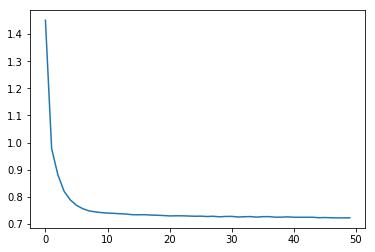

In [7]:
option1_history = option1_model.fit([Users_train, Movies_train], Ratings_train, epochs=50,
                                    verbose=1, batch_size=32,
                                    validation_data=([Users_test, Movies_test], Ratings_test))


# plot metrics
plt.plot(option1_history.history['mean_absolute_error'])
plt.show()


Train on 80000 samples, validate on 20000 samples
Epoch 1/50


   32/80000 [..............................] - ETA: 10:16 - loss: 4.7188 - mean_absolute_error: 1.9688

 1408/80000 [..............................] - ETA: 16s - loss: 7.4737 - mean_absolute_error: 2.4879  

 2880/80000 [>.............................] - ETA: 9s - loss: 7.5830 - mean_absolute_error: 2.5198 

 4512/80000 [>.............................] - ETA: 6s - loss: 7.5789 - mean_absolute_error: 2.5151

 5984/80000 [=>............................] - ETA: 5s - loss: 7.6068 - mean_absolute_error: 2.5206

 7072/80000 [=>............................] - ETA: 5s - loss: 7.6444 - mean_absolute_error: 2.5287

 8352/80000 [==>...........................] - ETA: 4s - loss: 7.6266 - mean_absolute_error: 2.5238

 9632/80000 [==>...........................] - ETA: 4s - loss: 7.6010 - mean_absolute_error: 2.5178

10976/80000 [===>..........................] - ETA: 4s - loss: 7.5670 - mean_absolute_error: 2.5128

11968/80000 [===>..........................] - ETA: 3s - loss: 7.5927 - mean_absolute_error: 2.5171

13024/80000 [===>..........................] - ETA: 3s - loss: 7.5913 - mean_absolute_error: 2.5173

14400/80000 [====>.........................] - ETA: 3s - loss: 7.6015 - mean_absolute_error: 2.5198

15744/80000 [====>.........................] - ETA: 3s - loss: 7.6009 - mean_absolute_error: 2.5196

17184/80000 [=====>........................] - ETA: 3s - loss: 7.5966 - mean_absolute_error: 2.5196

18592/80000 [=====>........................] - ETA: 3s - loss: 7.6140 - mean_absolute_error: 2.5235

20032/80000 [======>.......................] - ETA: 3s - loss: 7.6033 - mean_absolute_error: 2.5221

21472/80000 [=======>......................] - ETA: 2s - loss: 7.5976 - mean_absolute_error: 2.5200

22848/80000 [=======>......................] - ETA: 2s - loss: 7.6056 - mean_absolute_error: 2.5223

24224/80000 [========>.....................] - ETA: 2s - loss: 7.6148 - mean_absolute_error: 2.5240

25504/80000 [========>.....................] - ETA: 2s - loss: 7.6145 - mean_absolute_error: 2.5245

26912/80000 [=========>....................] - ETA: 2s - loss: 7.6267 - mean_absolute_error: 2.5265

28352/80000 [=========>....................] - ETA: 2s - loss: 7.6281 - mean_absolute_error: 2.5269

29888/80000 [==========>...................] - ETA: 2s - loss: 7.6307 - mean_absolute_error: 2.5273

31488/80000 [==========>...................] - ETA: 2s - loss: 7.6340 - mean_absolute_error: 2.5280

33088/80000 [===========>..................] - ETA: 2s - loss: 7.6329 - mean_absolute_error: 2.5283

34688/80000 [============>.................] - ETA: 1s - loss: 7.6358 - mean_absolute_error: 2.5283

36288/80000 [============>.................] - ETA: 1s - loss: 7.6291 - mean_absolute_error: 2.5270

37824/80000 [=============>................] - ETA: 1s - loss: 7.6391 - mean_absolute_error: 2.5291

39424/80000 [=============>................] - ETA: 1s - loss: 7.6344 - mean_absolute_error: 2.5283

40864/80000 [==============>...............] - ETA: 1s - loss: 7.6284 - mean_absolute_error: 2.5271

42400/80000 [==============>...............] - ETA: 1s - loss: 7.6394 - mean_absolute_error: 2.5288

43840/80000 [===============>..............] - ETA: 1s - loss: 7.6403 - mean_absolute_error: 2.5289

45376/80000 [================>.............] - ETA: 1s - loss: 7.6375 - mean_absolute_error: 2.5282

47008/80000 [================>.............] - ETA: 1s - loss: 7.6391 - mean_absolute_error: 2.5284

48736/80000 [=================>............] - ETA: 1s - loss: 7.6423 - mean_absolute_error: 2.5291

50560/80000 [=================>............] - ETA: 1s - loss: 7.6436 - mean_absolute_error: 2.5289

52384/80000 [==================>...........] - ETA: 1s - loss: 7.6441 - mean_absolute_error: 2.5284

54208/80000 [===================>..........] - ETA: 1s - loss: 7.6435 - mean_absolute_error: 2.5283

56064/80000 [====================>.........] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5284

57728/80000 [====================>.........] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5289

58912/80000 [=====================>........] - ETA: 0s - loss: 7.6426 - mean_absolute_error: 2.5285

60224/80000 [=====================>........] - ETA: 0s - loss: 7.6441 - mean_absolute_error: 2.5287

61152/80000 [=====================>........] - ETA: 0s - loss: 7.6453 - mean_absolute_error: 2.5290

61984/80000 [======================>.......] - ETA: 0s - loss: 7.6491 - mean_absolute_error: 2.5296

63296/80000 [======================>.......] - ETA: 0s - loss: 7.6478 - mean_absolute_error: 2.5294

64928/80000 [=======================>......] - ETA: 0s - loss: 7.6462 - mean_absolute_error: 2.5289

66656/80000 [=======================>......] - ETA: 0s - loss: 7.6451 - mean_absolute_error: 2.5286

68288/80000 [========================>.....] - ETA: 0s - loss: 7.6452 - mean_absolute_error: 2.5291

70048/80000 [=========================>....] - ETA: 0s - loss: 7.6431 - mean_absolute_error: 2.5284

71872/80000 [=========================>....] - ETA: 0s - loss: 7.6458 - mean_absolute_error: 2.5291

73664/80000 [==========================>...] - ETA: 0s - loss: 7.6444 - mean_absolute_error: 2.5288

75360/80000 [===========================>..] - ETA: 0s - loss: 7.6467 - mean_absolute_error: 2.5292

77088/80000 [===========================>..] - ETA: 0s - loss: 7.6428 - mean_absolute_error: 2.5283

78912/80000 [============================>.] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5284

80000/80000 [==============================] - 3s 40us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 2/50
   32/80000 [..............................] - ETA: 9s - loss: 5.5625 - mean_absolute_error: 2.0625

 1344/80000 [..............................] - ETA: 3s - loss: 7.4754 - mean_absolute_error: 2.4933

 2688/80000 [>.............................] - ETA: 3s - loss: 7.6641 - mean_absolute_error: 2.5398

 3968/80000 [>.............................] - ETA: 2s - loss: 7.7029 - mean_absolute_error: 2.5461

 5504/80000 [=>............................] - ETA: 2s - loss: 7.6174 - mean_absolute_error: 2.5298

 7200/80000 [=>............................] - ETA: 2s - loss: 7.6560 - mean_absolute_error: 2.5379

 8832/80000 [==>...........................] - ETA: 2s - loss: 7.6523 - mean_absolute_error: 2.5354

10560/80000 [==>...........................] - ETA: 2s - loss: 7.6246 - mean_absolute_error: 2.5299

12352/80000 [===>..........................] - ETA: 2s - loss: 7.6213 - mean_absolute_error: 2.5267

14016/80000 [====>.........................] - ETA: 2s - loss: 7.6352 - mean_absolute_error: 2.5280

15776/80000 [====>.........................] - ETA: 2s - loss: 7.6198 - mean_absolute_error: 2.5248

17568/80000 [=====>........................] - ETA: 1s - loss: 7.6255 - mean_absolute_error: 2.5255

19360/80000 [======>.......................] - ETA: 1s - loss: 7.6311 - mean_absolute_error: 2.5282

21088/80000 [======>.......................] - ETA: 1s - loss: 7.6358 - mean_absolute_error: 2.5294

22848/80000 [=======>......................] - ETA: 1s - loss: 7.6278 - mean_absolute_error: 2.5277

24672/80000 [========>.....................] - ETA: 1s - loss: 7.6164 - mean_absolute_error: 2.5252

26432/80000 [========>.....................] - ETA: 1s - loss: 7.6169 - mean_absolute_error: 2.5250

28256/80000 [=========>....................] - ETA: 1s - loss: 7.6221 - mean_absolute_error: 2.5260

30080/80000 [==========>...................] - ETA: 1s - loss: 7.6229 - mean_absolute_error: 2.5260

31936/80000 [==========>...................] - ETA: 1s - loss: 7.6243 - mean_absolute_error: 2.5259

33792/80000 [===========>..................] - ETA: 1s - loss: 7.6327 - mean_absolute_error: 2.5270

35232/80000 [============>.................] - ETA: 1s - loss: 7.6320 - mean_absolute_error: 2.5267

36256/80000 [============>.................] - ETA: 1s - loss: 7.6314 - mean_absolute_error: 2.5263

37248/80000 [============>.................] - ETA: 1s - loss: 7.6293 - mean_absolute_error: 2.5259

38560/80000 [=============>................] - ETA: 1s - loss: 7.6290 - mean_absolute_error: 2.5258

40192/80000 [==============>...............] - ETA: 1s - loss: 7.6178 - mean_absolute_error: 2.5234

41920/80000 [==============>...............] - ETA: 1s - loss: 7.6275 - mean_absolute_error: 2.5255

43712/80000 [===============>..............] - ETA: 1s - loss: 7.6335 - mean_absolute_error: 2.5271

45536/80000 [================>.............] - ETA: 1s - loss: 7.6309 - mean_absolute_error: 2.5261

47008/80000 [================>.............] - ETA: 1s - loss: 7.6408 - mean_absolute_error: 2.5284

48704/80000 [=================>............] - ETA: 0s - loss: 7.6394 - mean_absolute_error: 2.5283

50496/80000 [=================>............] - ETA: 0s - loss: 7.6409 - mean_absolute_error: 2.5283

52320/80000 [==================>...........] - ETA: 0s - loss: 7.6447 - mean_absolute_error: 2.5291

54144/80000 [===================>..........] - ETA: 0s - loss: 7.6480 - mean_absolute_error: 2.5298

55936/80000 [===================>..........] - ETA: 0s - loss: 7.6494 - mean_absolute_error: 2.5297

57728/80000 [====================>.........] - ETA: 0s - loss: 7.6441 - mean_absolute_error: 2.5284

59520/80000 [=====================>........] - ETA: 0s - loss: 7.6382 - mean_absolute_error: 2.5272

61344/80000 [======================>.......] - ETA: 0s - loss: 7.6359 - mean_absolute_error: 2.5269

63136/80000 [======================>.......] - ETA: 0s - loss: 7.6334 - mean_absolute_error: 2.5263

64928/80000 [=======================>......] - ETA: 0s - loss: 7.6380 - mean_absolute_error: 2.5274

66720/80000 [========================>.....] - ETA: 0s - loss: 7.6411 - mean_absolute_error: 2.5281

68512/80000 [========================>.....] - ETA: 0s - loss: 7.6394 - mean_absolute_error: 2.5277

70304/80000 [=========================>....] - ETA: 0s - loss: 7.6390 - mean_absolute_error: 2.5276

71936/80000 [=========================>....] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5287

73600/80000 [==========================>...] - ETA: 0s - loss: 7.6468 - mean_absolute_error: 2.5289

75328/80000 [===========================>..] - ETA: 0s - loss: 7.6382 - mean_absolute_error: 2.5270

77120/80000 [===========================>..] - ETA: 0s - loss: 7.6375 - mean_absolute_error: 2.5269

78944/80000 [============================>.] - ETA: 0s - loss: 7.6405 - mean_absolute_error: 2.5276

80000/80000 [==============================] - 3s 32us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 3/50
   32/80000 [..............................] - ETA: 8s - loss: 7.3750 - mean_absolute_error: 2.5000

 1248/80000 [..............................] - ETA: 3s - loss: 7.6963 - mean_absolute_error: 2.5361

 2624/80000 [..............................] - ETA: 3s - loss: 7.6014 - mean_absolute_error: 2.5221

 3840/80000 [>.............................] - ETA: 3s - loss: 7.6099 - mean_absolute_error: 2.5224

 5440/80000 [=>............................] - ETA: 2s - loss: 7.5631 - mean_absolute_error: 2.5112

 7136/80000 [=>............................] - ETA: 2s - loss: 7.5014 - mean_absolute_error: 2.4961

 8896/80000 [==>...........................] - ETA: 2s - loss: 7.5420 - mean_absolute_error: 2.5047

10688/80000 [===>..........................] - ETA: 2s - loss: 7.5519 - mean_absolute_error: 2.5078

12448/80000 [===>..........................] - ETA: 2s - loss: 7.5958 - mean_absolute_error: 2.5161

14208/80000 [====>.........................] - ETA: 2s - loss: 7.5883 - mean_absolute_error: 2.5154

16000/80000 [=====>........................] - ETA: 2s - loss: 7.5902 - mean_absolute_error: 2.5153

17792/80000 [=====>........................] - ETA: 1s - loss: 7.5723 - mean_absolute_error: 2.5125

19616/80000 [======>.......................] - ETA: 1s - loss: 7.5849 - mean_absolute_error: 2.5156

21440/80000 [=======>......................] - ETA: 1s - loss: 7.5899 - mean_absolute_error: 2.5164

23232/80000 [=======>......................] - ETA: 1s - loss: 7.6073 - mean_absolute_error: 2.5192

24992/80000 [========>.....................] - ETA: 1s - loss: 7.6216 - mean_absolute_error: 2.5224

26784/80000 [=========>....................] - ETA: 1s - loss: 7.6330 - mean_absolute_error: 2.5236

28512/80000 [=========>....................] - ETA: 1s - loss: 7.6262 - mean_absolute_error: 2.5224

30304/80000 [==========>...................] - ETA: 1s - loss: 7.6428 - mean_absolute_error: 2.5260

32128/80000 [===========>..................] - ETA: 1s - loss: 7.6397 - mean_absolute_error: 2.5255

33888/80000 [===========>..................] - ETA: 1s - loss: 7.6408 - mean_absolute_error: 2.5257

35328/80000 [============>.................] - ETA: 1s - loss: 7.6416 - mean_absolute_error: 2.5258

36416/80000 [============>.................] - ETA: 1s - loss: 7.6369 - mean_absolute_error: 2.5249

37408/80000 [=============>................] - ETA: 1s - loss: 7.6365 - mean_absolute_error: 2.5251

38880/80000 [=============>................] - ETA: 1s - loss: 7.6490 - mean_absolute_error: 2.5279

40512/80000 [==============>...............] - ETA: 1s - loss: 7.6503 - mean_absolute_error: 2.5279

42208/80000 [==============>...............] - ETA: 1s - loss: 7.6571 - mean_absolute_error: 2.5295

43968/80000 [===============>..............] - ETA: 1s - loss: 7.6547 - mean_absolute_error: 2.5295

45760/80000 [================>.............] - ETA: 1s - loss: 7.6635 - mean_absolute_error: 2.5317

47520/80000 [================>.............] - ETA: 1s - loss: 7.6700 - mean_absolute_error: 2.5329

49248/80000 [=================>............] - ETA: 0s - loss: 7.6658 - mean_absolute_error: 2.5321

50912/80000 [==================>...........] - ETA: 0s - loss: 7.6655 - mean_absolute_error: 2.5319

52608/80000 [==================>...........] - ETA: 0s - loss: 7.6627 - mean_absolute_error: 2.5315

54400/80000 [===================>..........] - ETA: 0s - loss: 7.6585 - mean_absolute_error: 2.5308

56192/80000 [====================>.........] - ETA: 0s - loss: 7.6572 - mean_absolute_error: 2.5303

57952/80000 [====================>.........] - ETA: 0s - loss: 7.6489 - mean_absolute_error: 2.5287

59680/80000 [=====================>........] - ETA: 0s - loss: 7.6542 - mean_absolute_error: 2.5297

61376/80000 [======================>.......] - ETA: 0s - loss: 7.6513 - mean_absolute_error: 2.5291

63168/80000 [======================>.......] - ETA: 0s - loss: 7.6511 - mean_absolute_error: 2.5290

64992/80000 [=======================>......] - ETA: 0s - loss: 7.6530 - mean_absolute_error: 2.5292

66816/80000 [========================>.....] - ETA: 0s - loss: 7.6552 - mean_absolute_error: 2.5299

68608/80000 [========================>.....] - ETA: 0s - loss: 7.6557 - mean_absolute_error: 2.5303

70432/80000 [=========================>....] - ETA: 0s - loss: 7.6485 - mean_absolute_error: 2.5287

72224/80000 [==========================>...] - ETA: 0s - loss: 7.6511 - mean_absolute_error: 2.5295

73440/80000 [==========================>...] - ETA: 0s - loss: 7.6467 - mean_absolute_error: 2.5288

75168/80000 [===========================>..] - ETA: 0s - loss: 7.6429 - mean_absolute_error: 2.5280

76928/80000 [===========================>..] - ETA: 0s - loss: 7.6385 - mean_absolute_error: 2.5273

78688/80000 [============================>.] - ETA: 0s - loss: 7.6422 - mean_absolute_error: 2.5282

80000/80000 [==============================] - 3s 32us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 4/50
   32/80000 [..............................] - ETA: 8s - loss: 10.0312 - mean_absolute_error: 3.0312

 1376/80000 [..............................] - ETA: 3s - loss: 7.7507 - mean_absolute_error: 2.5560 

 2784/80000 [>.............................] - ETA: 2s - loss: 7.6724 - mean_absolute_error: 2.5374

 3936/80000 [>.............................] - ETA: 2s - loss: 7.6357 - mean_absolute_error: 2.5310

 5568/80000 [=>............................] - ETA: 2s - loss: 7.6074 - mean_absolute_error: 2.5226

 7296/80000 [=>............................] - ETA: 2s - loss: 7.5935 - mean_absolute_error: 2.5203

 8768/80000 [==>...........................] - ETA: 2s - loss: 7.6364 - mean_absolute_error: 2.5294

10496/80000 [==>...........................] - ETA: 2s - loss: 7.6292 - mean_absolute_error: 2.5261

12256/80000 [===>..........................] - ETA: 2s - loss: 7.6277 - mean_absolute_error: 2.5272

14048/80000 [====>.........................] - ETA: 2s - loss: 7.6402 - mean_absolute_error: 2.5290

15872/80000 [====>.........................] - ETA: 2s - loss: 7.6653 - mean_absolute_error: 2.5343

17696/80000 [=====>........................] - ETA: 1s - loss: 7.6642 - mean_absolute_error: 2.5340

19520/80000 [======>.......................] - ETA: 1s - loss: 7.6557 - mean_absolute_error: 2.5315

21312/80000 [======>.......................] - ETA: 1s - loss: 7.6536 - mean_absolute_error: 2.5320

23136/80000 [=======>......................] - ETA: 1s - loss: 7.6414 - mean_absolute_error: 2.5293

24960/80000 [========>.....................] - ETA: 1s - loss: 7.6402 - mean_absolute_error: 2.5291

26720/80000 [=========>....................] - ETA: 1s - loss: 7.6415 - mean_absolute_error: 2.5296

28544/80000 [=========>....................] - ETA: 1s - loss: 7.6552 - mean_absolute_error: 2.5328

30368/80000 [==========>...................] - ETA: 1s - loss: 7.6421 - mean_absolute_error: 2.5296

32192/80000 [===========>..................] - ETA: 1s - loss: 7.6450 - mean_absolute_error: 2.5300

34016/80000 [===========>..................] - ETA: 1s - loss: 7.6460 - mean_absolute_error: 2.5303

35648/80000 [============>.................] - ETA: 1s - loss: 7.6537 - mean_absolute_error: 2.5318

36928/80000 [============>.................] - ETA: 1s - loss: 7.6472 - mean_absolute_error: 2.5303

38112/80000 [=============>................] - ETA: 1s - loss: 7.6568 - mean_absolute_error: 2.5317

39360/80000 [=============>................] - ETA: 1s - loss: 7.6457 - mean_absolute_error: 2.5289

40896/80000 [==============>...............] - ETA: 1s - loss: 7.6522 - mean_absolute_error: 2.5308

42336/80000 [==============>...............] - ETA: 1s - loss: 7.6631 - mean_absolute_error: 2.5328

44064/80000 [===============>..............] - ETA: 1s - loss: 7.6589 - mean_absolute_error: 2.5323

45888/80000 [================>.............] - ETA: 1s - loss: 7.6621 - mean_absolute_error: 2.5325

47680/80000 [================>.............] - ETA: 0s - loss: 7.6522 - mean_absolute_error: 2.5300

49440/80000 [=================>............] - ETA: 0s - loss: 7.6543 - mean_absolute_error: 2.5302

51008/80000 [==================>...........] - ETA: 0s - loss: 7.6486 - mean_absolute_error: 2.5291

52736/80000 [==================>...........] - ETA: 0s - loss: 7.6509 - mean_absolute_error: 2.5293

54496/80000 [===================>..........] - ETA: 0s - loss: 7.6492 - mean_absolute_error: 2.5293

56288/80000 [====================>.........] - ETA: 0s - loss: 7.6570 - mean_absolute_error: 2.5309

58080/80000 [====================>.........] - ETA: 0s - loss: 7.6544 - mean_absolute_error: 2.5303

59904/80000 [=====================>........] - ETA: 0s - loss: 7.6558 - mean_absolute_error: 2.5305

61632/80000 [======================>.......] - ETA: 0s - loss: 7.6533 - mean_absolute_error: 2.5299

63392/80000 [======================>.......] - ETA: 0s - loss: 7.6543 - mean_absolute_error: 2.5303

65184/80000 [=======================>......] - ETA: 0s - loss: 7.6579 - mean_absolute_error: 2.5312

66976/80000 [========================>.....] - ETA: 0s - loss: 7.6615 - mean_absolute_error: 2.5321

68800/80000 [========================>.....] - ETA: 0s - loss: 7.6575 - mean_absolute_error: 2.5310

70624/80000 [=========================>....] - ETA: 0s - loss: 7.6548 - mean_absolute_error: 2.5304

72416/80000 [==========================>...] - ETA: 0s - loss: 7.6519 - mean_absolute_error: 2.5297

74208/80000 [==========================>...] - ETA: 0s - loss: 7.6492 - mean_absolute_error: 2.5293

75936/80000 [===========================>..] - ETA: 0s - loss: 7.6469 - mean_absolute_error: 2.5288

77728/80000 [============================>.] - ETA: 0s - loss: 7.6469 - mean_absolute_error: 2.5289

79520/80000 [============================>.] - ETA: 0s - loss: 7.6455 - mean_absolute_error: 2.5287

80000/80000 [==============================] - 3s 32us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 5/50
   32/80000 [..............................] - ETA: 8s - loss: 7.5625 - mean_absolute_error: 2.5000

 1440/80000 [..............................] - ETA: 3s - loss: 7.5910 - mean_absolute_error: 2.5174

 2688/80000 [>.............................] - ETA: 3s - loss: 7.4989 - mean_absolute_error: 2.5011

 3968/80000 [>.............................] - ETA: 3s - loss: 7.5045 - mean_absolute_error: 2.5030

 5600/80000 [=>............................] - ETA: 2s - loss: 7.5395 - mean_absolute_error: 2.5109

 7296/80000 [=>............................] - ETA: 2s - loss: 7.5447 - mean_absolute_error: 2.5107

 9056/80000 [==>...........................] - ETA: 2s - loss: 7.5161 - mean_absolute_error: 2.5053

10784/80000 [===>..........................] - ETA: 2s - loss: 7.5590 - mean_absolute_error: 2.5134

12512/80000 [===>..........................] - ETA: 2s - loss: 7.5944 - mean_absolute_error: 2.5209

14272/80000 [====>.........................] - ETA: 2s - loss: 7.6017 - mean_absolute_error: 2.5238

16064/80000 [=====>........................] - ETA: 2s - loss: 7.5783 - mean_absolute_error: 2.5181

17856/80000 [=====>........................] - ETA: 1s - loss: 7.6014 - mean_absolute_error: 2.5209

19616/80000 [======>.......................] - ETA: 1s - loss: 7.5955 - mean_absolute_error: 2.5201

21376/80000 [=======>......................] - ETA: 1s - loss: 7.6039 - mean_absolute_error: 2.5223

23104/80000 [=======>......................] - ETA: 1s - loss: 7.5989 - mean_absolute_error: 2.5210

24832/80000 [========>.....................] - ETA: 1s - loss: 7.5925 - mean_absolute_error: 2.5201

26624/80000 [========>.....................] - ETA: 1s - loss: 7.6007 - mean_absolute_error: 2.5223

28384/80000 [=========>....................] - ETA: 1s - loss: 7.5927 - mean_absolute_error: 2.5205

30144/80000 [==========>...................] - ETA: 1s - loss: 7.5969 - mean_absolute_error: 2.5211

32096/80000 [===========>..................] - ETA: 1s - loss: 7.6033 - mean_absolute_error: 2.5225

33920/80000 [===========>..................] - ETA: 1s - loss: 7.6076 - mean_absolute_error: 2.5231

35360/80000 [============>.................] - ETA: 1s - loss: 7.6159 - mean_absolute_error: 2.5244

36352/80000 [============>.................] - ETA: 1s - loss: 7.6249 - mean_absolute_error: 2.5259

37376/80000 [=============>................] - ETA: 1s - loss: 7.6203 - mean_absolute_error: 2.5249

38624/80000 [=============>................] - ETA: 1s - loss: 7.6198 - mean_absolute_error: 2.5246

40224/80000 [==============>...............] - ETA: 1s - loss: 7.6264 - mean_absolute_error: 2.5255

41952/80000 [==============>...............] - ETA: 1s - loss: 7.6235 - mean_absolute_error: 2.5247

43680/80000 [===============>..............] - ETA: 1s - loss: 7.6181 - mean_absolute_error: 2.5241

45376/80000 [================>.............] - ETA: 1s - loss: 7.6227 - mean_absolute_error: 2.5242

47136/80000 [================>.............] - ETA: 1s - loss: 7.6174 - mean_absolute_error: 2.5233

48928/80000 [=================>............] - ETA: 0s - loss: 7.6224 - mean_absolute_error: 2.5244

50752/80000 [==================>...........] - ETA: 0s - loss: 7.6242 - mean_absolute_error: 2.5249

52512/80000 [==================>...........] - ETA: 0s - loss: 7.6273 - mean_absolute_error: 2.5254

54336/80000 [===================>..........] - ETA: 0s - loss: 7.6369 - mean_absolute_error: 2.5277

56000/80000 [====================>.........] - ETA: 0s - loss: 7.6413 - mean_absolute_error: 2.5286

57760/80000 [====================>.........] - ETA: 0s - loss: 7.6427 - mean_absolute_error: 2.5291

59584/80000 [=====================>........] - ETA: 0s - loss: 7.6425 - mean_absolute_error: 2.5291

61344/80000 [======================>.......] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5289

63136/80000 [======================>.......] - ETA: 0s - loss: 7.6446 - mean_absolute_error: 2.5289

64896/80000 [=======================>......] - ETA: 0s - loss: 7.6419 - mean_absolute_error: 2.5279

66720/80000 [========================>.....] - ETA: 0s - loss: 7.6450 - mean_absolute_error: 2.5289

68352/80000 [========================>.....] - ETA: 0s - loss: 7.6418 - mean_absolute_error: 2.5281

70048/80000 [=========================>....] - ETA: 0s - loss: 7.6416 - mean_absolute_error: 2.5279

71808/80000 [=========================>....] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5284

73536/80000 [==========================>...] - ETA: 0s - loss: 7.6432 - mean_absolute_error: 2.5279

75296/80000 [===========================>..] - ETA: 0s - loss: 7.6406 - mean_absolute_error: 2.5274

77088/80000 [===========================>..] - ETA: 0s - loss: 7.6431 - mean_absolute_error: 2.5280

78880/80000 [============================>.] - ETA: 0s - loss: 7.6444 - mean_absolute_error: 2.5285

80000/80000 [==============================] - 3s 32us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 6/50
   32/80000 [..............................] - ETA: 8s - loss: 7.9062 - mean_absolute_error: 2.5938

 1216/80000 [..............................] - ETA: 3s - loss: 7.8059 - mean_absolute_error: 2.5428

 2592/80000 [..............................] - ETA: 3s - loss: 7.6150 - mean_absolute_error: 2.5193

 3648/80000 [>.............................] - ETA: 3s - loss: 7.6247 - mean_absolute_error: 2.5233

 5216/80000 [>.............................] - ETA: 2s - loss: 7.5621 - mean_absolute_error: 2.5115

 6912/80000 [=>............................] - ETA: 2s - loss: 7.6347 - mean_absolute_error: 2.5259

 8608/80000 [==>...........................] - ETA: 2s - loss: 7.6241 - mean_absolute_error: 2.5214

10336/80000 [==>...........................] - ETA: 2s - loss: 7.6253 - mean_absolute_error: 2.5214

12032/80000 [===>..........................] - ETA: 2s - loss: 7.6241 - mean_absolute_error: 2.5217

13760/80000 [====>.........................] - ETA: 2s - loss: 7.6227 - mean_absolute_error: 2.5221

15392/80000 [====>.........................] - ETA: 2s - loss: 7.6341 - mean_absolute_error: 2.5239

16960/80000 [=====>........................] - ETA: 2s - loss: 7.6350 - mean_absolute_error: 2.5241

18496/80000 [=====>........................] - ETA: 2s - loss: 7.6496 - mean_absolute_error: 2.5285

20192/80000 [======>.......................] - ETA: 1s - loss: 7.6373 - mean_absolute_error: 2.5267

21920/80000 [=======>......................] - ETA: 1s - loss: 7.6516 - mean_absolute_error: 2.5302

23648/80000 [=======>......................] - ETA: 1s - loss: 7.6554 - mean_absolute_error: 2.5311

25376/80000 [========>.....................] - ETA: 1s - loss: 7.6675 - mean_absolute_error: 2.5339

27136/80000 [=========>....................] - ETA: 1s - loss: 7.6746 - mean_absolute_error: 2.5357

28896/80000 [=========>....................] - ETA: 1s - loss: 7.6736 - mean_absolute_error: 2.5352

30624/80000 [==========>...................] - ETA: 1s - loss: 7.6791 - mean_absolute_error: 2.5362

32352/80000 [===========>..................] - ETA: 1s - loss: 7.6756 - mean_absolute_error: 2.5353

33792/80000 [===========>..................] - ETA: 1s - loss: 7.6658 - mean_absolute_error: 2.5339

34880/80000 [============>.................] - ETA: 1s - loss: 7.6634 - mean_absolute_error: 2.5334

35744/80000 [============>.................] - ETA: 1s - loss: 7.6630 - mean_absolute_error: 2.5335

36960/80000 [============>.................] - ETA: 1s - loss: 7.6598 - mean_absolute_error: 2.5331

38560/80000 [=============>................] - ETA: 1s - loss: 7.6671 - mean_absolute_error: 2.5348

40192/80000 [==============>...............] - ETA: 1s - loss: 7.6654 - mean_absolute_error: 2.5346

41888/80000 [==============>...............] - ETA: 1s - loss: 7.6632 - mean_absolute_error: 2.5333

43584/80000 [===============>..............] - ETA: 1s - loss: 7.6600 - mean_absolute_error: 2.5331

45344/80000 [================>.............] - ETA: 1s - loss: 7.6671 - mean_absolute_error: 2.5340

47040/80000 [================>.............] - ETA: 1s - loss: 7.6667 - mean_absolute_error: 2.5333

48768/80000 [=================>............] - ETA: 1s - loss: 7.6680 - mean_absolute_error: 2.5332

50496/80000 [=================>............] - ETA: 0s - loss: 7.6748 - mean_absolute_error: 2.5347

52256/80000 [==================>...........] - ETA: 0s - loss: 7.6737 - mean_absolute_error: 2.5345

54048/80000 [===================>..........] - ETA: 0s - loss: 7.6757 - mean_absolute_error: 2.5350

55808/80000 [===================>..........] - ETA: 0s - loss: 7.6779 - mean_absolute_error: 2.5353

57504/80000 [====================>.........] - ETA: 0s - loss: 7.6732 - mean_absolute_error: 2.5342

59264/80000 [=====================>........] - ETA: 0s - loss: 7.6713 - mean_absolute_error: 2.5341

61056/80000 [=====================>........] - ETA: 0s - loss: 7.6716 - mean_absolute_error: 2.5340

62816/80000 [======================>.......] - ETA: 0s - loss: 7.6652 - mean_absolute_error: 2.5325

64480/80000 [=======================>......] - ETA: 0s - loss: 7.6619 - mean_absolute_error: 2.5320

66176/80000 [=======================>......] - ETA: 0s - loss: 7.6598 - mean_absolute_error: 2.5313

67840/80000 [========================>.....] - ETA: 0s - loss: 7.6566 - mean_absolute_error: 2.5304

69536/80000 [=========================>....] - ETA: 0s - loss: 7.6562 - mean_absolute_error: 2.5304

71264/80000 [=========================>....] - ETA: 0s - loss: 7.6559 - mean_absolute_error: 2.5301

72992/80000 [==========================>...] - ETA: 0s - loss: 7.6531 - mean_absolute_error: 2.5297

74720/80000 [===========================>..] - ETA: 0s - loss: 7.6504 - mean_absolute_error: 2.5294

76480/80000 [===========================>..] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5286

78272/80000 [============================>.] - ETA: 0s - loss: 7.6421 - mean_absolute_error: 2.5279

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 7/50
   32/80000 [..............................] - ETA: 8s - loss: 8.2188 - mean_absolute_error: 2.5938

 1312/80000 [..............................] - ETA: 3s - loss: 7.8354 - mean_absolute_error: 2.5610

 2688/80000 [>.............................] - ETA: 3s - loss: 7.6592 - mean_absolute_error: 2.5260

 3808/80000 [>.............................] - ETA: 3s - loss: 7.6573 - mean_absolute_error: 2.5234

 5216/80000 [>.............................] - ETA: 2s - loss: 7.6256 - mean_absolute_error: 2.5178

 6656/80000 [=>............................] - ETA: 2s - loss: 7.6342 - mean_absolute_error: 2.5230

 8288/80000 [==>...........................] - ETA: 2s - loss: 7.6170 - mean_absolute_error: 2.5224

 9984/80000 [==>...........................] - ETA: 2s - loss: 7.6189 - mean_absolute_error: 2.5225

11680/80000 [===>..........................] - ETA: 2s - loss: 7.6317 - mean_absolute_error: 2.5245

13408/80000 [====>.........................] - ETA: 2s - loss: 7.6411 - mean_absolute_error: 2.5251

14912/80000 [====>.........................] - ETA: 2s - loss: 7.6345 - mean_absolute_error: 2.5236

16640/80000 [=====>........................] - ETA: 2s - loss: 7.6388 - mean_absolute_error: 2.5252

18400/80000 [=====>........................] - ETA: 2s - loss: 7.6226 - mean_absolute_error: 2.5211

20192/80000 [======>.......................] - ETA: 1s - loss: 7.6226 - mean_absolute_error: 2.5217

21984/80000 [=======>......................] - ETA: 1s - loss: 7.6334 - mean_absolute_error: 2.5242

23744/80000 [=======>......................] - ETA: 1s - loss: 7.6327 - mean_absolute_error: 2.5239

25504/80000 [========>.....................] - ETA: 1s - loss: 7.6338 - mean_absolute_error: 2.5245

27264/80000 [=========>....................] - ETA: 1s - loss: 7.6546 - mean_absolute_error: 2.5295

29056/80000 [=========>....................] - ETA: 1s - loss: 7.6566 - mean_absolute_error: 2.5297

30752/80000 [==========>...................] - ETA: 1s - loss: 7.6514 - mean_absolute_error: 2.5286

32480/80000 [===========>..................] - ETA: 1s - loss: 7.6432 - mean_absolute_error: 2.5270

33952/80000 [===========>..................] - ETA: 1s - loss: 7.6363 - mean_absolute_error: 2.5256

34720/80000 [============>.................] - ETA: 1s - loss: 7.6384 - mean_absolute_error: 2.5258

35872/80000 [============>.................] - ETA: 1s - loss: 7.6465 - mean_absolute_error: 2.5267

36480/80000 [============>.................] - ETA: 1s - loss: 7.6416 - mean_absolute_error: 2.5255

37856/80000 [=============>................] - ETA: 1s - loss: 7.6405 - mean_absolute_error: 2.5258

39424/80000 [=============>................] - ETA: 1s - loss: 7.6450 - mean_absolute_error: 2.5266

41120/80000 [==============>...............] - ETA: 1s - loss: 7.6456 - mean_absolute_error: 2.5268

42848/80000 [===============>..............] - ETA: 1s - loss: 7.6479 - mean_absolute_error: 2.5275

44544/80000 [===============>..............] - ETA: 1s - loss: 7.6442 - mean_absolute_error: 2.5267

46112/80000 [================>.............] - ETA: 1s - loss: 7.6417 - mean_absolute_error: 2.5261

47840/80000 [================>.............] - ETA: 1s - loss: 7.6378 - mean_absolute_error: 2.5258

49568/80000 [=================>............] - ETA: 0s - loss: 7.6433 - mean_absolute_error: 2.5271

51072/80000 [==================>...........] - ETA: 0s - loss: 7.6499 - mean_absolute_error: 2.5287

52736/80000 [==================>...........] - ETA: 0s - loss: 7.6474 - mean_absolute_error: 2.5278

54464/80000 [===================>..........] - ETA: 0s - loss: 7.6456 - mean_absolute_error: 2.5274

56160/80000 [====================>.........] - ETA: 0s - loss: 7.6504 - mean_absolute_error: 2.5286

57888/80000 [====================>.........] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5274

59648/80000 [=====================>........] - ETA: 0s - loss: 7.6422 - mean_absolute_error: 2.5272

61408/80000 [======================>.......] - ETA: 0s - loss: 7.6410 - mean_absolute_error: 2.5275

63040/80000 [======================>.......] - ETA: 0s - loss: 7.6438 - mean_absolute_error: 2.5286

64768/80000 [=======================>......] - ETA: 0s - loss: 7.6467 - mean_absolute_error: 2.5291

66560/80000 [=======================>......] - ETA: 0s - loss: 7.6443 - mean_absolute_error: 2.5286

68256/80000 [========================>.....] - ETA: 0s - loss: 7.6465 - mean_absolute_error: 2.5289

69984/80000 [=========================>....] - ETA: 0s - loss: 7.6458 - mean_absolute_error: 2.5285

71648/80000 [=========================>....] - ETA: 0s - loss: 7.6475 - mean_absolute_error: 2.5289

73248/80000 [==========================>...] - ETA: 0s - loss: 7.6438 - mean_absolute_error: 2.5282

74880/80000 [===========================>..] - ETA: 0s - loss: 7.6399 - mean_absolute_error: 2.5275

76608/80000 [===========================>..] - ETA: 0s - loss: 7.6406 - mean_absolute_error: 2.5276

78272/80000 [============================>.] - ETA: 0s - loss: 7.6429 - mean_absolute_error: 2.5280

79968/80000 [============================>.] - ETA: 0s - loss: 7.6443 - mean_absolute_error: 2.5284

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 8/50
   32/80000 [..............................] - ETA: 8s - loss: 7.0938 - mean_absolute_error: 2.4688

 1216/80000 [..............................] - ETA: 3s - loss: 7.4326 - mean_absolute_error: 2.4934

 2560/80000 [..............................] - ETA: 3s - loss: 7.6922 - mean_absolute_error: 2.5359

 3712/80000 [>.............................] - ETA: 3s - loss: 7.6759 - mean_absolute_error: 2.5299

 5280/80000 [>.............................] - ETA: 2s - loss: 7.7144 - mean_absolute_error: 2.5420

 6944/80000 [=>............................] - ETA: 2s - loss: 7.6611 - mean_absolute_error: 2.5292

 8640/80000 [==>...........................] - ETA: 2s - loss: 7.6534 - mean_absolute_error: 2.5256

10336/80000 [==>...........................] - ETA: 2s - loss: 7.6684 - mean_absolute_error: 2.5266

12032/80000 [===>..........................] - ETA: 2s - loss: 7.6723 - mean_absolute_error: 2.5295

13760/80000 [====>.........................] - ETA: 2s - loss: 7.6573 - mean_absolute_error: 2.5263

15488/80000 [====>.........................] - ETA: 2s - loss: 7.6364 - mean_absolute_error: 2.5227

17248/80000 [=====>........................] - ETA: 2s - loss: 7.6396 - mean_absolute_error: 2.5241

19008/80000 [======>.......................] - ETA: 1s - loss: 7.6282 - mean_absolute_error: 2.5221

20736/80000 [======>.......................] - ETA: 1s - loss: 7.6351 - mean_absolute_error: 2.5236

22528/80000 [=======>......................] - ETA: 1s - loss: 7.6414 - mean_absolute_error: 2.5247

24224/80000 [========>.....................] - ETA: 1s - loss: 7.6464 - mean_absolute_error: 2.5262

25696/80000 [========>.....................] - ETA: 1s - loss: 7.6471 - mean_absolute_error: 2.5265

27424/80000 [=========>....................] - ETA: 1s - loss: 7.6529 - mean_absolute_error: 2.5277

29120/80000 [=========>....................] - ETA: 1s - loss: 7.6546 - mean_absolute_error: 2.5279

30880/80000 [==========>...................] - ETA: 1s - loss: 7.6534 - mean_absolute_error: 2.5276

32608/80000 [===========>..................] - ETA: 1s - loss: 7.6505 - mean_absolute_error: 2.5274

34048/80000 [===========>..................] - ETA: 1s - loss: 7.6540 - mean_absolute_error: 2.5280

35232/80000 [============>.................] - ETA: 1s - loss: 7.6512 - mean_absolute_error: 2.5270

36256/80000 [============>.................] - ETA: 1s - loss: 7.6543 - mean_absolute_error: 2.5279

37408/80000 [=============>................] - ETA: 1s - loss: 7.6540 - mean_absolute_error: 2.5279

38912/80000 [=============>................] - ETA: 1s - loss: 7.6522 - mean_absolute_error: 2.5278

40512/80000 [==============>...............] - ETA: 1s - loss: 7.6539 - mean_absolute_error: 2.5280

42176/80000 [==============>...............] - ETA: 1s - loss: 7.6599 - mean_absolute_error: 2.5289

43872/80000 [===============>..............] - ETA: 1s - loss: 7.6622 - mean_absolute_error: 2.5303

45568/80000 [================>.............] - ETA: 1s - loss: 7.6602 - mean_absolute_error: 2.5302

47328/80000 [================>.............] - ETA: 1s - loss: 7.6569 - mean_absolute_error: 2.5293

49088/80000 [=================>............] - ETA: 0s - loss: 7.6562 - mean_absolute_error: 2.5292

50880/80000 [==================>...........] - ETA: 0s - loss: 7.6580 - mean_absolute_error: 2.5299

52672/80000 [==================>...........] - ETA: 0s - loss: 7.6575 - mean_absolute_error: 2.5302

54464/80000 [===================>..........] - ETA: 0s - loss: 7.6604 - mean_absolute_error: 2.5308

56128/80000 [====================>.........] - ETA: 0s - loss: 7.6523 - mean_absolute_error: 2.5295

57824/80000 [====================>.........] - ETA: 0s - loss: 7.6548 - mean_absolute_error: 2.5298

59552/80000 [=====================>........] - ETA: 0s - loss: 7.6574 - mean_absolute_error: 2.5304

61312/80000 [=====================>........] - ETA: 0s - loss: 7.6583 - mean_absolute_error: 2.5306

63040/80000 [======================>.......] - ETA: 0s - loss: 7.6552 - mean_absolute_error: 2.5299

64768/80000 [=======================>......] - ETA: 0s - loss: 7.6524 - mean_absolute_error: 2.5294

66496/80000 [=======================>......] - ETA: 0s - loss: 7.6534 - mean_absolute_error: 2.5295

68256/80000 [========================>.....] - ETA: 0s - loss: 7.6525 - mean_absolute_error: 2.5292

70016/80000 [=========================>....] - ETA: 0s - loss: 7.6521 - mean_absolute_error: 2.5295

71776/80000 [=========================>....] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5284

73440/80000 [==========================>...] - ETA: 0s - loss: 7.6454 - mean_absolute_error: 2.5280

75136/80000 [===========================>..] - ETA: 0s - loss: 7.6406 - mean_absolute_error: 2.5273

76896/80000 [===========================>..] - ETA: 0s - loss: 7.6433 - mean_absolute_error: 2.5281

78688/80000 [============================>.] - ETA: 0s - loss: 7.6443 - mean_absolute_error: 2.5281

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 9/50
   32/80000 [..............................] - ETA: 8s - loss: 7.8438 - mean_absolute_error: 2.5938

 1184/80000 [..............................] - ETA: 3s - loss: 7.7584 - mean_absolute_error: 2.5490

 2464/80000 [..............................] - ETA: 3s - loss: 7.7772 - mean_absolute_error: 2.5548

 3872/80000 [>.............................] - ETA: 3s - loss: 7.6834 - mean_absolute_error: 2.5387

 5472/80000 [=>............................] - ETA: 2s - loss: 7.6383 - mean_absolute_error: 2.5309

 7232/80000 [=>............................] - ETA: 2s - loss: 7.6222 - mean_absolute_error: 2.5307

 8992/80000 [==>...........................] - ETA: 2s - loss: 7.5969 - mean_absolute_error: 2.5237

10720/80000 [===>..........................] - ETA: 2s - loss: 7.6223 - mean_absolute_error: 2.5279

12448/80000 [===>..........................] - ETA: 2s - loss: 7.6330 - mean_absolute_error: 2.5308

14176/80000 [====>.........................] - ETA: 2s - loss: 7.6196 - mean_absolute_error: 2.5287

15936/80000 [====>.........................] - ETA: 2s - loss: 7.5969 - mean_absolute_error: 2.5207

17664/80000 [=====>........................] - ETA: 1s - loss: 7.6258 - mean_absolute_error: 2.5269

19392/80000 [======>.......................] - ETA: 1s - loss: 7.6111 - mean_absolute_error: 2.5234

21120/80000 [======>.......................] - ETA: 1s - loss: 7.6302 - mean_absolute_error: 2.5271

22848/80000 [=======>......................] - ETA: 1s - loss: 7.6295 - mean_absolute_error: 2.5263

24576/80000 [========>.....................] - ETA: 1s - loss: 7.6237 - mean_absolute_error: 2.5247

26304/80000 [========>.....................] - ETA: 1s - loss: 7.6272 - mean_absolute_error: 2.5251

28064/80000 [=========>....................] - ETA: 1s - loss: 7.6325 - mean_absolute_error: 2.5263

29760/80000 [==========>...................] - ETA: 1s - loss: 7.6363 - mean_absolute_error: 2.5272

31488/80000 [==========>...................] - ETA: 1s - loss: 7.6281 - mean_absolute_error: 2.5254

33216/80000 [===========>..................] - ETA: 1s - loss: 7.6277 - mean_absolute_error: 2.5255

34656/80000 [===========>..................] - ETA: 1s - loss: 7.6322 - mean_absolute_error: 2.5264

35712/80000 [============>.................] - ETA: 1s - loss: 7.6301 - mean_absolute_error: 2.5269

36640/80000 [============>.................] - ETA: 1s - loss: 7.6275 - mean_absolute_error: 2.5265

37824/80000 [=============>................] - ETA: 1s - loss: 7.6213 - mean_absolute_error: 2.5251

39360/80000 [=============>................] - ETA: 1s - loss: 7.6262 - mean_absolute_error: 2.5260

41024/80000 [==============>...............] - ETA: 1s - loss: 7.6224 - mean_absolute_error: 2.5253

42752/80000 [===============>..............] - ETA: 1s - loss: 7.6227 - mean_absolute_error: 2.5251

44480/80000 [===============>..............] - ETA: 1s - loss: 7.6298 - mean_absolute_error: 2.5267

46208/80000 [================>.............] - ETA: 1s - loss: 7.6250 - mean_absolute_error: 2.5259

47936/80000 [================>.............] - ETA: 1s - loss: 7.6268 - mean_absolute_error: 2.5265

49600/80000 [=================>............] - ETA: 0s - loss: 7.6319 - mean_absolute_error: 2.5275

51296/80000 [==================>...........] - ETA: 0s - loss: 7.6382 - mean_absolute_error: 2.5287

52928/80000 [==================>...........] - ETA: 0s - loss: 7.6420 - mean_absolute_error: 2.5289

54624/80000 [===================>..........] - ETA: 0s - loss: 7.6454 - mean_absolute_error: 2.5297

56352/80000 [====================>.........] - ETA: 0s - loss: 7.6386 - mean_absolute_error: 2.5282

58080/80000 [====================>.........] - ETA: 0s - loss: 7.6401 - mean_absolute_error: 2.5288

59744/80000 [=====================>........] - ETA: 0s - loss: 7.6360 - mean_absolute_error: 2.5282

61472/80000 [======================>.......] - ETA: 0s - loss: 7.6364 - mean_absolute_error: 2.5281

63168/80000 [======================>.......] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5292

64896/80000 [=======================>......] - ETA: 0s - loss: 7.6457 - mean_absolute_error: 2.5298

66624/80000 [=======================>......] - ETA: 0s - loss: 7.6498 - mean_absolute_error: 2.5304

68384/80000 [========================>.....] - ETA: 0s - loss: 7.6506 - mean_absolute_error: 2.5305

70016/80000 [=========================>....] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5294

71712/80000 [=========================>....] - ETA: 0s - loss: 7.6472 - mean_absolute_error: 2.5297

73472/80000 [==========================>...] - ETA: 0s - loss: 7.6490 - mean_absolute_error: 2.5300

75232/80000 [===========================>..] - ETA: 0s - loss: 7.6468 - mean_absolute_error: 2.5292

76928/80000 [===========================>..] - ETA: 0s - loss: 7.6465 - mean_absolute_error: 2.5291

78624/80000 [============================>.] - ETA: 0s - loss: 7.6433 - mean_absolute_error: 2.5285

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 10/50
   32/80000 [..............................] - ETA: 8s - loss: 7.3750 - mean_absolute_error: 2.3750

 1280/80000 [..............................] - ETA: 3s - loss: 7.7352 - mean_absolute_error: 2.5398

 2528/80000 [..............................] - ETA: 3s - loss: 7.7508 - mean_absolute_error: 2.5483

 3968/80000 [>.............................] - ETA: 2s - loss: 7.7311 - mean_absolute_error: 2.5461

 5536/80000 [=>............................] - ETA: 2s - loss: 7.6219 - mean_absolute_error: 2.5211

 7232/80000 [=>............................] - ETA: 2s - loss: 7.6654 - mean_absolute_error: 2.5312

 8960/80000 [==>...........................] - ETA: 2s - loss: 7.6945 - mean_absolute_error: 2.5369

10368/80000 [==>...........................] - ETA: 2s - loss: 7.6835 - mean_absolute_error: 2.5354

12000/80000 [===>..........................] - ETA: 2s - loss: 7.6908 - mean_absolute_error: 2.5377

13728/80000 [====>.........................] - ETA: 2s - loss: 7.7190 - mean_absolute_error: 2.5431

15136/80000 [====>.........................] - ETA: 2s - loss: 7.7152 - mean_absolute_error: 2.5420

16736/80000 [=====>........................] - ETA: 2s - loss: 7.6997 - mean_absolute_error: 2.5388

18432/80000 [=====>........................] - ETA: 2s - loss: 7.7077 - mean_absolute_error: 2.5402

20192/80000 [======>.......................] - ETA: 1s - loss: 7.7038 - mean_absolute_error: 2.5392

21856/80000 [=======>......................] - ETA: 1s - loss: 7.6855 - mean_absolute_error: 2.5361

23552/80000 [=======>......................] - ETA: 1s - loss: 7.6804 - mean_absolute_error: 2.5350

25280/80000 [========>.....................] - ETA: 1s - loss: 7.6676 - mean_absolute_error: 2.5326

26976/80000 [=========>....................] - ETA: 1s - loss: 7.6694 - mean_absolute_error: 2.5333

28640/80000 [=========>....................] - ETA: 1s - loss: 7.6743 - mean_absolute_error: 2.5344

30336/80000 [==========>...................] - ETA: 1s - loss: 7.6655 - mean_absolute_error: 2.5324

32032/80000 [===========>..................] - ETA: 1s - loss: 7.6544 - mean_absolute_error: 2.5299

33408/80000 [===========>..................] - ETA: 1s - loss: 7.6555 - mean_absolute_error: 2.5299

34496/80000 [===========>..................] - ETA: 1s - loss: 7.6502 - mean_absolute_error: 2.5288

35520/80000 [============>.................] - ETA: 1s - loss: 7.6454 - mean_absolute_error: 2.5281

36672/80000 [============>.................] - ETA: 1s - loss: 7.6446 - mean_absolute_error: 2.5277

38240/80000 [=============>................] - ETA: 1s - loss: 7.6510 - mean_absolute_error: 2.5292

39904/80000 [=============>................] - ETA: 1s - loss: 7.6482 - mean_absolute_error: 2.5287

41536/80000 [==============>...............] - ETA: 1s - loss: 7.6551 - mean_absolute_error: 2.5298

43168/80000 [===============>..............] - ETA: 1s - loss: 7.6655 - mean_absolute_error: 2.5319

44832/80000 [===============>..............] - ETA: 1s - loss: 7.6613 - mean_absolute_error: 2.5309

46304/80000 [================>.............] - ETA: 1s - loss: 7.6610 - mean_absolute_error: 2.5305

47936/80000 [================>.............] - ETA: 1s - loss: 7.6596 - mean_absolute_error: 2.5310

49632/80000 [=================>............] - ETA: 0s - loss: 7.6523 - mean_absolute_error: 2.5296

51360/80000 [==================>...........] - ETA: 0s - loss: 7.6572 - mean_absolute_error: 2.5305

53056/80000 [==================>...........] - ETA: 0s - loss: 7.6614 - mean_absolute_error: 2.5316

54752/80000 [===================>..........] - ETA: 0s - loss: 7.6652 - mean_absolute_error: 2.5325

56448/80000 [====================>.........] - ETA: 0s - loss: 7.6661 - mean_absolute_error: 2.5328

58176/80000 [====================>.........] - ETA: 0s - loss: 7.6674 - mean_absolute_error: 2.5332

59904/80000 [=====================>........] - ETA: 0s - loss: 7.6676 - mean_absolute_error: 2.5331

61600/80000 [======================>.......] - ETA: 0s - loss: 7.6609 - mean_absolute_error: 2.5315

63296/80000 [======================>.......] - ETA: 0s - loss: 7.6579 - mean_absolute_error: 2.5309

64960/80000 [=======================>......] - ETA: 0s - loss: 7.6533 - mean_absolute_error: 2.5297

66656/80000 [=======================>......] - ETA: 0s - loss: 7.6524 - mean_absolute_error: 2.5295

68352/80000 [========================>.....] - ETA: 0s - loss: 7.6496 - mean_absolute_error: 2.5291

70016/80000 [=========================>....] - ETA: 0s - loss: 7.6498 - mean_absolute_error: 2.5290

71680/80000 [=========================>....] - ETA: 0s - loss: 7.6512 - mean_absolute_error: 2.5295

73408/80000 [==========================>...] - ETA: 0s - loss: 7.6507 - mean_absolute_error: 2.5298

75104/80000 [===========================>..] - ETA: 0s - loss: 7.6504 - mean_absolute_error: 2.5297

76768/80000 [===========================>..] - ETA: 0s - loss: 7.6487 - mean_absolute_error: 2.5291

78464/80000 [============================>.] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5281

79968/80000 [============================>.] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5283

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 11/50
   32/80000 [..............................] - ETA: 8s - loss: 7.2188 - mean_absolute_error: 2.4688

 1184/80000 [..............................] - ETA: 3s - loss: 7.7230 - mean_absolute_error: 2.5389

 2496/80000 [..............................] - ETA: 3s - loss: 7.7829 - mean_absolute_error: 2.5561

 3872/80000 [>.............................] - ETA: 3s - loss: 7.6532 - mean_absolute_error: 2.5256

 5504/80000 [=>............................] - ETA: 2s - loss: 7.6096 - mean_absolute_error: 2.5176

 7168/80000 [=>............................] - ETA: 2s - loss: 7.6126 - mean_absolute_error: 2.5205

 8832/80000 [==>...........................] - ETA: 2s - loss: 7.6491 - mean_absolute_error: 2.5280

10496/80000 [==>...........................] - ETA: 2s - loss: 7.6272 - mean_absolute_error: 2.5224

12224/80000 [===>..........................] - ETA: 2s - loss: 7.6282 - mean_absolute_error: 2.5225

13920/80000 [====>.........................] - ETA: 2s - loss: 7.6279 - mean_absolute_error: 2.5231

15648/80000 [====>.........................] - ETA: 2s - loss: 7.6345 - mean_absolute_error: 2.5251

17376/80000 [=====>........................] - ETA: 2s - loss: 7.6441 - mean_absolute_error: 2.5270

19104/80000 [======>.......................] - ETA: 1s - loss: 7.6552 - mean_absolute_error: 2.5292

20832/80000 [======>.......................] - ETA: 1s - loss: 7.6468 - mean_absolute_error: 2.5275

22496/80000 [=======>......................] - ETA: 1s - loss: 7.6543 - mean_absolute_error: 2.5288

24224/80000 [========>.....................] - ETA: 1s - loss: 7.6530 - mean_absolute_error: 2.5299

25760/80000 [========>.....................] - ETA: 1s - loss: 7.6498 - mean_absolute_error: 2.5295

27392/80000 [=========>....................] - ETA: 1s - loss: 7.6485 - mean_absolute_error: 2.5295

29120/80000 [=========>....................] - ETA: 1s - loss: 7.6433 - mean_absolute_error: 2.5276

30816/80000 [==========>...................] - ETA: 1s - loss: 7.6458 - mean_absolute_error: 2.5281

32512/80000 [===========>..................] - ETA: 1s - loss: 7.6499 - mean_absolute_error: 2.5290

33920/80000 [===========>..................] - ETA: 1s - loss: 7.6478 - mean_absolute_error: 2.5285

34976/80000 [============>.................] - ETA: 1s - loss: 7.6540 - mean_absolute_error: 2.5302

35936/80000 [============>.................] - ETA: 1s - loss: 7.6455 - mean_absolute_error: 2.5283

36928/80000 [============>.................] - ETA: 1s - loss: 7.6480 - mean_absolute_error: 2.5287

38464/80000 [=============>................] - ETA: 1s - loss: 7.6491 - mean_absolute_error: 2.5294

40064/80000 [==============>...............] - ETA: 1s - loss: 7.6396 - mean_absolute_error: 2.5272

41696/80000 [==============>...............] - ETA: 1s - loss: 7.6415 - mean_absolute_error: 2.5277

43360/80000 [===============>..............] - ETA: 1s - loss: 7.6478 - mean_absolute_error: 2.5291

44960/80000 [===============>..............] - ETA: 1s - loss: 7.6400 - mean_absolute_error: 2.5273

46624/80000 [================>.............] - ETA: 1s - loss: 7.6441 - mean_absolute_error: 2.5281

48288/80000 [=================>............] - ETA: 1s - loss: 7.6397 - mean_absolute_error: 2.5275

49984/80000 [=================>............] - ETA: 0s - loss: 7.6428 - mean_absolute_error: 2.5280

51648/80000 [==================>...........] - ETA: 0s - loss: 7.6411 - mean_absolute_error: 2.5281

53344/80000 [===================>..........] - ETA: 0s - loss: 7.6484 - mean_absolute_error: 2.5295

55008/80000 [===================>..........] - ETA: 0s - loss: 7.6479 - mean_absolute_error: 2.5293

56576/80000 [====================>.........] - ETA: 0s - loss: 7.6511 - mean_absolute_error: 2.5295

58240/80000 [====================>.........] - ETA: 0s - loss: 7.6477 - mean_absolute_error: 2.5283

59872/80000 [=====================>........] - ETA: 0s - loss: 7.6486 - mean_absolute_error: 2.5285

61568/80000 [======================>.......] - ETA: 0s - loss: 7.6521 - mean_absolute_error: 2.5289

63264/80000 [======================>.......] - ETA: 0s - loss: 7.6492 - mean_absolute_error: 2.5288

64960/80000 [=======================>......] - ETA: 0s - loss: 7.6482 - mean_absolute_error: 2.5289

66656/80000 [=======================>......] - ETA: 0s - loss: 7.6456 - mean_absolute_error: 2.5283

68320/80000 [========================>.....] - ETA: 0s - loss: 7.6505 - mean_absolute_error: 2.5293

70016/80000 [=========================>....] - ETA: 0s - loss: 7.6511 - mean_absolute_error: 2.5297

71680/80000 [=========================>....] - ETA: 0s - loss: 7.6539 - mean_absolute_error: 2.5304

73376/80000 [==========================>...] - ETA: 0s - loss: 7.6483 - mean_absolute_error: 2.5292

75104/80000 [===========================>..] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5279

76832/80000 [===========================>..] - ETA: 0s - loss: 7.6445 - mean_absolute_error: 2.5282

78528/80000 [============================>.] - ETA: 0s - loss: 7.6426 - mean_absolute_error: 2.5280

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 12/50
   32/80000 [..............................] - ETA: 8s - loss: 6.5938 - mean_absolute_error: 2.2812

 1184/80000 [..............................] - ETA: 3s - loss: 7.6630 - mean_absolute_error: 2.5346

 2368/80000 [..............................] - ETA: 3s - loss: 7.7259 - mean_absolute_error: 2.5460

 3776/80000 [>.............................] - ETA: 3s - loss: 7.6525 - mean_absolute_error: 2.5344

 5408/80000 [=>............................] - ETA: 2s - loss: 7.6910 - mean_absolute_error: 2.5353

 6848/80000 [=>............................] - ETA: 2s - loss: 7.7027 - mean_absolute_error: 2.5362

 8544/80000 [==>...........................] - ETA: 2s - loss: 7.7501 - mean_absolute_error: 2.5451

10240/80000 [==>...........................] - ETA: 2s - loss: 7.6848 - mean_absolute_error: 2.5289

11904/80000 [===>..........................] - ETA: 2s - loss: 7.6850 - mean_absolute_error: 2.5306

13600/80000 [====>.........................] - ETA: 2s - loss: 7.6719 - mean_absolute_error: 2.5282

15296/80000 [====>.........................] - ETA: 2s - loss: 7.6801 - mean_absolute_error: 2.5301

16960/80000 [=====>........................] - ETA: 2s - loss: 7.6795 - mean_absolute_error: 2.5306

18624/80000 [=====>........................] - ETA: 2s - loss: 7.6870 - mean_absolute_error: 2.5323

20288/80000 [======>.......................] - ETA: 1s - loss: 7.6763 - mean_absolute_error: 2.5298

21984/80000 [=======>......................] - ETA: 1s - loss: 7.6724 - mean_absolute_error: 2.5287

23616/80000 [=======>......................] - ETA: 1s - loss: 7.6827 - mean_absolute_error: 2.5314

25280/80000 [========>.....................] - ETA: 1s - loss: 7.6805 - mean_absolute_error: 2.5310

26976/80000 [=========>....................] - ETA: 1s - loss: 7.6720 - mean_absolute_error: 2.5295

28672/80000 [=========>....................] - ETA: 1s - loss: 7.6642 - mean_absolute_error: 2.5283

30368/80000 [==========>...................] - ETA: 1s - loss: 7.6560 - mean_absolute_error: 2.5274

32032/80000 [===========>..................] - ETA: 1s - loss: 7.6436 - mean_absolute_error: 2.5258

33504/80000 [===========>..................] - ETA: 1s - loss: 7.6454 - mean_absolute_error: 2.5268

34496/80000 [===========>..................] - ETA: 1s - loss: 7.6479 - mean_absolute_error: 2.5267

35424/80000 [============>.................] - ETA: 1s - loss: 7.6517 - mean_absolute_error: 2.5275

36608/80000 [============>.................] - ETA: 1s - loss: 7.6468 - mean_absolute_error: 2.5263

38112/80000 [=============>................] - ETA: 1s - loss: 7.6464 - mean_absolute_error: 2.5267

39648/80000 [=============>................] - ETA: 1s - loss: 7.6475 - mean_absolute_error: 2.5276

41280/80000 [==============>...............] - ETA: 1s - loss: 7.6499 - mean_absolute_error: 2.5281

42912/80000 [===============>..............] - ETA: 1s - loss: 7.6473 - mean_absolute_error: 2.5278

44576/80000 [===============>..............] - ETA: 1s - loss: 7.6471 - mean_absolute_error: 2.5279

46272/80000 [================>.............] - ETA: 1s - loss: 7.6501 - mean_absolute_error: 2.5287

47936/80000 [================>.............] - ETA: 1s - loss: 7.6533 - mean_absolute_error: 2.5297

49600/80000 [=================>............] - ETA: 0s - loss: 7.6561 - mean_absolute_error: 2.5299

51232/80000 [==================>...........] - ETA: 0s - loss: 7.6546 - mean_absolute_error: 2.5294

52928/80000 [==================>...........] - ETA: 0s - loss: 7.6569 - mean_absolute_error: 2.5300

54592/80000 [===================>..........] - ETA: 0s - loss: 7.6547 - mean_absolute_error: 2.5294

56288/80000 [====================>.........] - ETA: 0s - loss: 7.6533 - mean_absolute_error: 2.5292

57952/80000 [====================>.........] - ETA: 0s - loss: 7.6491 - mean_absolute_error: 2.5282

59648/80000 [=====================>........] - ETA: 0s - loss: 7.6464 - mean_absolute_error: 2.5277

61344/80000 [======================>.......] - ETA: 0s - loss: 7.6427 - mean_absolute_error: 2.5268

63008/80000 [======================>.......] - ETA: 0s - loss: 7.6375 - mean_absolute_error: 2.5263

64704/80000 [=======================>......] - ETA: 0s - loss: 7.6376 - mean_absolute_error: 2.5263

66240/80000 [=======================>......] - ETA: 0s - loss: 7.6398 - mean_absolute_error: 2.5267

67936/80000 [========================>.....] - ETA: 0s - loss: 7.6386 - mean_absolute_error: 2.5265

69568/80000 [=========================>....] - ETA: 0s - loss: 7.6427 - mean_absolute_error: 2.5275

71264/80000 [=========================>....] - ETA: 0s - loss: 7.6420 - mean_absolute_error: 2.5275

72960/80000 [==========================>...] - ETA: 0s - loss: 7.6445 - mean_absolute_error: 2.5279

74624/80000 [==========================>...] - ETA: 0s - loss: 7.6444 - mean_absolute_error: 2.5282

76288/80000 [===========================>..] - ETA: 0s - loss: 7.6415 - mean_absolute_error: 2.5275

77984/80000 [============================>.] - ETA: 0s - loss: 7.6387 - mean_absolute_error: 2.5271

79648/80000 [============================>.] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5278

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 13/50


   32/80000 [..............................] - ETA: 9s - loss: 6.7500 - mean_absolute_error: 2.1875

 1344/80000 [..............................] - ETA: 3s - loss: 7.4040 - mean_absolute_error: 2.4829

 2560/80000 [..............................] - ETA: 3s - loss: 7.6715 - mean_absolute_error: 2.5324

 4032/80000 [>.............................] - ETA: 2s - loss: 7.6620 - mean_absolute_error: 2.5295

 5568/80000 [=>............................] - ETA: 2s - loss: 7.6369 - mean_absolute_error: 2.5259

 7200/80000 [=>............................] - ETA: 2s - loss: 7.6243 - mean_absolute_error: 2.5254

 8896/80000 [==>...........................] - ETA: 2s - loss: 7.6308 - mean_absolute_error: 2.5243

10528/80000 [==>...........................] - ETA: 2s - loss: 7.6601 - mean_absolute_error: 2.5300

12160/80000 [===>..........................] - ETA: 2s - loss: 7.6653 - mean_absolute_error: 2.5312

13856/80000 [====>.........................] - ETA: 2s - loss: 7.6640 - mean_absolute_error: 2.5300

15552/80000 [====>.........................] - ETA: 2s - loss: 7.6685 - mean_absolute_error: 2.5308

17248/80000 [=====>........................] - ETA: 2s - loss: 7.6537 - mean_absolute_error: 2.5293

18944/80000 [======>.......................] - ETA: 1s - loss: 7.6508 - mean_absolute_error: 2.5292

20608/80000 [======>.......................] - ETA: 1s - loss: 7.6368 - mean_absolute_error: 2.5280

22304/80000 [=======>......................] - ETA: 1s - loss: 7.6504 - mean_absolute_error: 2.5310

24000/80000 [========>.....................] - ETA: 1s - loss: 7.6523 - mean_absolute_error: 2.5318

25728/80000 [========>.....................] - ETA: 1s - loss: 7.6506 - mean_absolute_error: 2.5317

27456/80000 [=========>....................] - ETA: 1s - loss: 7.6529 - mean_absolute_error: 2.5334

29152/80000 [=========>....................] - ETA: 1s - loss: 7.6529 - mean_absolute_error: 2.5329

30880/80000 [==========>...................] - ETA: 1s - loss: 7.6524 - mean_absolute_error: 2.5333

32608/80000 [===========>..................] - ETA: 1s - loss: 7.6488 - mean_absolute_error: 2.5318

34048/80000 [===========>..................] - ETA: 1s - loss: 7.6469 - mean_absolute_error: 2.5317

35328/80000 [============>.................] - ETA: 1s - loss: 7.6461 - mean_absolute_error: 2.5310

36384/80000 [============>.................] - ETA: 1s - loss: 7.6390 - mean_absolute_error: 2.5295

37376/80000 [=============>................] - ETA: 1s - loss: 7.6428 - mean_absolute_error: 2.5302

38880/80000 [=============>................] - ETA: 1s - loss: 7.6301 - mean_absolute_error: 2.5276

40480/80000 [==============>...............] - ETA: 1s - loss: 7.6328 - mean_absolute_error: 2.5275

42016/80000 [==============>...............] - ETA: 1s - loss: 7.6398 - mean_absolute_error: 2.5289

43584/80000 [===============>..............] - ETA: 1s - loss: 7.6390 - mean_absolute_error: 2.5287

45216/80000 [===============>..............] - ETA: 1s - loss: 7.6397 - mean_absolute_error: 2.5282

46944/80000 [================>.............] - ETA: 1s - loss: 7.6383 - mean_absolute_error: 2.5279

48640/80000 [=================>............] - ETA: 1s - loss: 7.6323 - mean_absolute_error: 2.5267

50336/80000 [=================>............] - ETA: 0s - loss: 7.6307 - mean_absolute_error: 2.5260

52032/80000 [==================>...........] - ETA: 0s - loss: 7.6279 - mean_absolute_error: 2.5258

53728/80000 [===================>..........] - ETA: 0s - loss: 7.6350 - mean_absolute_error: 2.5275

55424/80000 [===================>..........] - ETA: 0s - loss: 7.6396 - mean_absolute_error: 2.5281

57152/80000 [====================>.........] - ETA: 0s - loss: 7.6342 - mean_absolute_error: 2.5271

58880/80000 [=====================>........] - ETA: 0s - loss: 7.6349 - mean_absolute_error: 2.5271

60576/80000 [=====================>........] - ETA: 0s - loss: 7.6354 - mean_absolute_error: 2.5271

62304/80000 [======================>.......] - ETA: 0s - loss: 7.6420 - mean_absolute_error: 2.5288

63904/80000 [======================>.......] - ETA: 0s - loss: 7.6431 - mean_absolute_error: 2.5288

65472/80000 [=======================>......] - ETA: 0s - loss: 7.6441 - mean_absolute_error: 2.5287

67168/80000 [========================>.....] - ETA: 0s - loss: 7.6499 - mean_absolute_error: 2.5300

68864/80000 [========================>.....] - ETA: 0s - loss: 7.6500 - mean_absolute_error: 2.5302

70560/80000 [=========================>....] - ETA: 0s - loss: 7.6439 - mean_absolute_error: 2.5287

72192/80000 [==========================>...] - ETA: 0s - loss: 7.6418 - mean_absolute_error: 2.5281

73856/80000 [==========================>...] - ETA: 0s - loss: 7.6431 - mean_absolute_error: 2.5283

75328/80000 [===========================>..] - ETA: 0s - loss: 7.6459 - mean_absolute_error: 2.5288

76832/80000 [===========================>..] - ETA: 0s - loss: 7.6445 - mean_absolute_error: 2.5285

78528/80000 [============================>.] - ETA: 0s - loss: 7.6433 - mean_absolute_error: 2.5283

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 14/50
   32/80000 [..............................] - ETA: 8s - loss: 8.3125 - mean_absolute_error: 2.6250

 1216/80000 [..............................] - ETA: 3s - loss: 7.5765 - mean_absolute_error: 2.5025

 2560/80000 [..............................] - ETA: 3s - loss: 7.7047 - mean_absolute_error: 2.5289

 4128/80000 [>.............................] - ETA: 2s - loss: 7.7355 - mean_absolute_error: 2.5392

 5760/80000 [=>............................] - ETA: 2s - loss: 7.7005 - mean_absolute_error: 2.5384

 7488/80000 [=>............................] - ETA: 2s - loss: 7.6935 - mean_absolute_error: 2.5362

 9216/80000 [==>...........................] - ETA: 2s - loss: 7.7217 - mean_absolute_error: 2.5433

10880/80000 [===>..........................] - ETA: 2s - loss: 7.7245 - mean_absolute_error: 2.5431

12608/80000 [===>..........................] - ETA: 2s - loss: 7.7248 - mean_absolute_error: 2.5433

14336/80000 [====>.........................] - ETA: 2s - loss: 7.7047 - mean_absolute_error: 2.5400

16032/80000 [=====>........................] - ETA: 2s - loss: 7.6752 - mean_absolute_error: 2.5344

17728/80000 [=====>........................] - ETA: 1s - loss: 7.6621 - mean_absolute_error: 2.5314

19392/80000 [======>.......................] - ETA: 1s - loss: 7.6425 - mean_absolute_error: 2.5274

21088/80000 [======>.......................] - ETA: 1s - loss: 7.6530 - mean_absolute_error: 2.5286

22656/80000 [=======>......................] - ETA: 1s - loss: 7.6570 - mean_absolute_error: 2.5284

24384/80000 [========>.....................] - ETA: 1s - loss: 7.6575 - mean_absolute_error: 2.5279

26112/80000 [========>.....................] - ETA: 1s - loss: 7.6450 - mean_absolute_error: 2.5251

27840/80000 [=========>....................] - ETA: 1s - loss: 7.6359 - mean_absolute_error: 2.5239

29568/80000 [==========>...................] - ETA: 1s - loss: 7.6283 - mean_absolute_error: 2.5219

31296/80000 [==========>...................] - ETA: 1s - loss: 7.6294 - mean_absolute_error: 2.5216

33024/80000 [===========>..................] - ETA: 1s - loss: 7.6382 - mean_absolute_error: 2.5238

34560/80000 [===========>..................] - ETA: 1s - loss: 7.6379 - mean_absolute_error: 2.5242

35552/80000 [============>.................] - ETA: 1s - loss: 7.6387 - mean_absolute_error: 2.5244

36576/80000 [============>.................] - ETA: 1s - loss: 7.6362 - mean_absolute_error: 2.5239

37888/80000 [=============>................] - ETA: 1s - loss: 7.6412 - mean_absolute_error: 2.5250

39424/80000 [=============>................] - ETA: 1s - loss: 7.6444 - mean_absolute_error: 2.5260

41088/80000 [==============>...............] - ETA: 1s - loss: 7.6394 - mean_absolute_error: 2.5252

42784/80000 [===============>..............] - ETA: 1s - loss: 7.6441 - mean_absolute_error: 2.5269

44512/80000 [===============>..............] - ETA: 1s - loss: 7.6409 - mean_absolute_error: 2.5257

46272/80000 [================>.............] - ETA: 1s - loss: 7.6401 - mean_absolute_error: 2.5257

47968/80000 [================>.............] - ETA: 1s - loss: 7.6411 - mean_absolute_error: 2.5257

49664/80000 [=================>............] - ETA: 0s - loss: 7.6377 - mean_absolute_error: 2.5250

51328/80000 [==================>...........] - ETA: 0s - loss: 7.6346 - mean_absolute_error: 2.5246

52928/80000 [==================>...........] - ETA: 0s - loss: 7.6462 - mean_absolute_error: 2.5270

54560/80000 [===================>..........] - ETA: 0s - loss: 7.6424 - mean_absolute_error: 2.5263

56192/80000 [====================>.........] - ETA: 0s - loss: 7.6395 - mean_absolute_error: 2.5262

57888/80000 [====================>.........] - ETA: 0s - loss: 7.6438 - mean_absolute_error: 2.5273

59584/80000 [=====================>........] - ETA: 0s - loss: 7.6404 - mean_absolute_error: 2.5268

61280/80000 [=====================>........] - ETA: 0s - loss: 7.6340 - mean_absolute_error: 2.5257

62944/80000 [======================>.......] - ETA: 0s - loss: 7.6340 - mean_absolute_error: 2.5254

64672/80000 [=======================>......] - ETA: 0s - loss: 7.6349 - mean_absolute_error: 2.5257

66400/80000 [=======================>......] - ETA: 0s - loss: 7.6362 - mean_absolute_error: 2.5261

68128/80000 [========================>.....] - ETA: 0s - loss: 7.6349 - mean_absolute_error: 2.5260

69792/80000 [=========================>....] - ETA: 0s - loss: 7.6351 - mean_absolute_error: 2.5262

71424/80000 [=========================>....] - ETA: 0s - loss: 7.6409 - mean_absolute_error: 2.5277

73120/80000 [==========================>...] - ETA: 0s - loss: 7.6412 - mean_absolute_error: 2.5279

74816/80000 [===========================>..] - ETA: 0s - loss: 7.6409 - mean_absolute_error: 2.5280

76512/80000 [===========================>..] - ETA: 0s - loss: 7.6419 - mean_absolute_error: 2.5283

78240/80000 [============================>.] - ETA: 0s - loss: 7.6421 - mean_absolute_error: 2.5282

79936/80000 [============================>.] - ETA: 0s - loss: 7.6442 - mean_absolute_error: 2.5285

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 15/50
   32/80000 [..............................] - ETA: 8s - loss: 9.0000 - mean_absolute_error: 2.8125

 1408/80000 [..............................] - ETA: 3s - loss: 7.5540 - mean_absolute_error: 2.5170

 2720/80000 [>.............................] - ETA: 2s - loss: 7.7154 - mean_absolute_error: 2.5449

 4256/80000 [>.............................] - ETA: 2s - loss: 7.6652 - mean_absolute_error: 2.5341

 5920/80000 [=>............................] - ETA: 2s - loss: 7.6150 - mean_absolute_error: 2.5245

 7648/80000 [=>............................] - ETA: 2s - loss: 7.6744 - mean_absolute_error: 2.5371

 9376/80000 [==>...........................] - ETA: 2s - loss: 7.6745 - mean_absolute_error: 2.5367

11040/80000 [===>..........................] - ETA: 2s - loss: 7.6837 - mean_absolute_error: 2.5389

12768/80000 [===>..........................] - ETA: 2s - loss: 7.6757 - mean_absolute_error: 2.5372

14496/80000 [====>.........................] - ETA: 2s - loss: 7.6492 - mean_absolute_error: 2.5312

16224/80000 [=====>........................] - ETA: 1s - loss: 7.6536 - mean_absolute_error: 2.5316

17952/80000 [=====>........................] - ETA: 1s - loss: 7.6427 - mean_absolute_error: 2.5292

19680/80000 [======>.......................] - ETA: 1s - loss: 7.6333 - mean_absolute_error: 2.5270

21376/80000 [=======>......................] - ETA: 1s - loss: 7.6299 - mean_absolute_error: 2.5275

23072/80000 [=======>......................] - ETA: 1s - loss: 7.6174 - mean_absolute_error: 2.5244

24768/80000 [========>.....................] - ETA: 1s - loss: 7.6139 - mean_absolute_error: 2.5234

26464/80000 [========>.....................] - ETA: 1s - loss: 7.6192 - mean_absolute_error: 2.5238

28096/80000 [=========>....................] - ETA: 1s - loss: 7.6291 - mean_absolute_error: 2.5255

29760/80000 [==========>...................] - ETA: 1s - loss: 7.6357 - mean_absolute_error: 2.5270

31456/80000 [==========>...................] - ETA: 1s - loss: 7.6328 - mean_absolute_error: 2.5264

33056/80000 [===========>..................] - ETA: 1s - loss: 7.6209 - mean_absolute_error: 2.5238

34464/80000 [===========>..................] - ETA: 1s - loss: 7.6277 - mean_absolute_error: 2.5251

35552/80000 [============>.................] - ETA: 1s - loss: 7.6221 - mean_absolute_error: 2.5235

36640/80000 [============>.................] - ETA: 1s - loss: 7.6277 - mean_absolute_error: 2.5249

37952/80000 [=============>................] - ETA: 1s - loss: 7.6233 - mean_absolute_error: 2.5238

39488/80000 [=============>................] - ETA: 1s - loss: 7.6276 - mean_absolute_error: 2.5248

41120/80000 [==============>...............] - ETA: 1s - loss: 7.6262 - mean_absolute_error: 2.5245

42816/80000 [===============>..............] - ETA: 1s - loss: 7.6249 - mean_absolute_error: 2.5236

44512/80000 [===============>..............] - ETA: 1s - loss: 7.6267 - mean_absolute_error: 2.5242

46208/80000 [================>.............] - ETA: 1s - loss: 7.6294 - mean_absolute_error: 2.5245

47936/80000 [================>.............] - ETA: 1s - loss: 7.6323 - mean_absolute_error: 2.5255

49600/80000 [=================>............] - ETA: 0s - loss: 7.6337 - mean_absolute_error: 2.5258

51296/80000 [==================>...........] - ETA: 0s - loss: 7.6312 - mean_absolute_error: 2.5252

52960/80000 [==================>...........] - ETA: 0s - loss: 7.6323 - mean_absolute_error: 2.5255

54656/80000 [===================>..........] - ETA: 0s - loss: 7.6355 - mean_absolute_error: 2.5265

56320/80000 [====================>.........] - ETA: 0s - loss: 7.6319 - mean_absolute_error: 2.5256

58016/80000 [====================>.........] - ETA: 0s - loss: 7.6316 - mean_absolute_error: 2.5257

59712/80000 [=====================>........] - ETA: 0s - loss: 7.6308 - mean_absolute_error: 2.5254

61408/80000 [======================>.......] - ETA: 0s - loss: 7.6336 - mean_absolute_error: 2.5261

63104/80000 [======================>.......] - ETA: 0s - loss: 7.6381 - mean_absolute_error: 2.5270

64704/80000 [=======================>......] - ETA: 0s - loss: 7.6397 - mean_absolute_error: 2.5271

66272/80000 [=======================>......] - ETA: 0s - loss: 7.6427 - mean_absolute_error: 2.5278

67968/80000 [========================>.....] - ETA: 0s - loss: 7.6394 - mean_absolute_error: 2.5273

69664/80000 [=========================>....] - ETA: 0s - loss: 7.6335 - mean_absolute_error: 2.5261

71360/80000 [=========================>....] - ETA: 0s - loss: 7.6323 - mean_absolute_error: 2.5257

73056/80000 [==========================>...] - ETA: 0s - loss: 7.6342 - mean_absolute_error: 2.5263

74752/80000 [===========================>..] - ETA: 0s - loss: 7.6370 - mean_absolute_error: 2.5270

76448/80000 [===========================>..] - ETA: 0s - loss: 7.6396 - mean_absolute_error: 2.5275

78176/80000 [============================>.] - ETA: 0s - loss: 7.6424 - mean_absolute_error: 2.5279

79904/80000 [============================>.] - ETA: 0s - loss: 7.6434 - mean_absolute_error: 2.5283

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 16/50
   32/80000 [..............................] - ETA: 7s - loss: 7.3750 - mean_absolute_error: 2.4375

 1280/80000 [..............................] - ETA: 3s - loss: 7.6180 - mean_absolute_error: 2.5180

 2656/80000 [..............................] - ETA: 3s - loss: 7.6645 - mean_absolute_error: 2.5328

 4096/80000 [>.............................] - ETA: 2s - loss: 7.6763 - mean_absolute_error: 2.5347

 5696/80000 [=>............................] - ETA: 2s - loss: 7.6798 - mean_absolute_error: 2.5369

 7392/80000 [=>............................] - ETA: 2s - loss: 7.6902 - mean_absolute_error: 2.5376

 9056/80000 [==>...........................] - ETA: 2s - loss: 7.6971 - mean_absolute_error: 2.5379

10688/80000 [===>..........................] - ETA: 2s - loss: 7.6823 - mean_absolute_error: 2.5342

12352/80000 [===>..........................] - ETA: 2s - loss: 7.6826 - mean_absolute_error: 2.5333

14048/80000 [====>.........................] - ETA: 2s - loss: 7.6964 - mean_absolute_error: 2.5364

15744/80000 [====>.........................] - ETA: 2s - loss: 7.6925 - mean_absolute_error: 2.5354

17440/80000 [=====>........................] - ETA: 1s - loss: 7.6817 - mean_absolute_error: 2.5330

19136/80000 [======>.......................] - ETA: 1s - loss: 7.6722 - mean_absolute_error: 2.5319

20864/80000 [======>.......................] - ETA: 1s - loss: 7.6592 - mean_absolute_error: 2.5288

22560/80000 [=======>......................] - ETA: 1s - loss: 7.6661 - mean_absolute_error: 2.5301

24288/80000 [========>.....................] - ETA: 1s - loss: 7.6493 - mean_absolute_error: 2.5265

26016/80000 [========>.....................] - ETA: 1s - loss: 7.6376 - mean_absolute_error: 2.5241

27744/80000 [=========>....................] - ETA: 1s - loss: 7.6379 - mean_absolute_error: 2.5241

29440/80000 [==========>...................] - ETA: 1s - loss: 7.6430 - mean_absolute_error: 2.5252

31136/80000 [==========>...................] - ETA: 1s - loss: 7.6414 - mean_absolute_error: 2.5254

32832/80000 [===========>..................] - ETA: 1s - loss: 7.6315 - mean_absolute_error: 2.5234

34272/80000 [===========>..................] - ETA: 1s - loss: 7.6293 - mean_absolute_error: 2.5238

35328/80000 [============>.................] - ETA: 1s - loss: 7.6341 - mean_absolute_error: 2.5249

36224/80000 [============>.................] - ETA: 1s - loss: 7.6338 - mean_absolute_error: 2.5250

37344/80000 [=============>................] - ETA: 1s - loss: 7.6356 - mean_absolute_error: 2.5262

38880/80000 [=============>................] - ETA: 1s - loss: 7.6356 - mean_absolute_error: 2.5264

40480/80000 [==============>...............] - ETA: 1s - loss: 7.6347 - mean_absolute_error: 2.5266

42016/80000 [==============>...............] - ETA: 1s - loss: 7.6308 - mean_absolute_error: 2.5261

43680/80000 [===============>..............] - ETA: 1s - loss: 7.6425 - mean_absolute_error: 2.5285

45344/80000 [================>.............] - ETA: 1s - loss: 7.6444 - mean_absolute_error: 2.5286

47072/80000 [================>.............] - ETA: 1s - loss: 7.6489 - mean_absolute_error: 2.5297

48800/80000 [=================>............] - ETA: 1s - loss: 7.6549 - mean_absolute_error: 2.5307

50496/80000 [=================>............] - ETA: 0s - loss: 7.6545 - mean_absolute_error: 2.5308

52192/80000 [==================>...........] - ETA: 0s - loss: 7.6544 - mean_absolute_error: 2.5307

53824/80000 [===================>..........] - ETA: 0s - loss: 7.6605 - mean_absolute_error: 2.5322

55488/80000 [===================>..........] - ETA: 0s - loss: 7.6618 - mean_absolute_error: 2.5324

57216/80000 [====================>.........] - ETA: 0s - loss: 7.6620 - mean_absolute_error: 2.5324

58912/80000 [=====================>........] - ETA: 0s - loss: 7.6581 - mean_absolute_error: 2.5312

60608/80000 [=====================>........] - ETA: 0s - loss: 7.6551 - mean_absolute_error: 2.5304

62016/80000 [======================>.......] - ETA: 0s - loss: 7.6530 - mean_absolute_error: 2.5298

63648/80000 [======================>.......] - ETA: 0s - loss: 7.6456 - mean_absolute_error: 2.5286

65344/80000 [=======================>......] - ETA: 0s - loss: 7.6439 - mean_absolute_error: 2.5279

67040/80000 [========================>.....] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5279

68768/80000 [========================>.....] - ETA: 0s - loss: 7.6413 - mean_absolute_error: 2.5275

70432/80000 [=========================>....] - ETA: 0s - loss: 7.6411 - mean_absolute_error: 2.5276

72064/80000 [==========================>...] - ETA: 0s - loss: 7.6387 - mean_absolute_error: 2.5272

73728/80000 [==========================>...] - ETA: 0s - loss: 7.6404 - mean_absolute_error: 2.5275

75264/80000 [===========================>..] - ETA: 0s - loss: 7.6426 - mean_absolute_error: 2.5280

76928/80000 [===========================>..] - ETA: 0s - loss: 7.6453 - mean_absolute_error: 2.5283

78592/80000 [============================>.] - ETA: 0s - loss: 7.6416 - mean_absolute_error: 2.5277

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 17/50
   32/80000 [..............................] - ETA: 8s - loss: 6.8438 - mean_absolute_error: 2.3438

 1280/80000 [..............................] - ETA: 3s - loss: 7.4633 - mean_absolute_error: 2.4836

 2624/80000 [..............................] - ETA: 3s - loss: 7.5796 - mean_absolute_error: 2.5118

 4224/80000 [>.............................] - ETA: 2s - loss: 7.6494 - mean_absolute_error: 2.5301

 5824/80000 [=>............................] - ETA: 2s - loss: 7.6806 - mean_absolute_error: 2.5330

 7520/80000 [=>............................] - ETA: 2s - loss: 7.6633 - mean_absolute_error: 2.5311

 9216/80000 [==>...........................] - ETA: 2s - loss: 7.6122 - mean_absolute_error: 2.5191

10912/80000 [===>..........................] - ETA: 2s - loss: 7.6062 - mean_absolute_error: 2.5197

12640/80000 [===>..........................] - ETA: 2s - loss: 7.6436 - mean_absolute_error: 2.5273

14336/80000 [====>.........................] - ETA: 2s - loss: 7.6348 - mean_absolute_error: 2.5262

16064/80000 [=====>........................] - ETA: 2s - loss: 7.6565 - mean_absolute_error: 2.5314

17760/80000 [=====>........................] - ETA: 1s - loss: 7.6376 - mean_absolute_error: 2.5282

19456/80000 [======>.......................] - ETA: 1s - loss: 7.6213 - mean_absolute_error: 2.5245

21120/80000 [======>.......................] - ETA: 1s - loss: 7.6219 - mean_absolute_error: 2.5241

22720/80000 [=======>......................] - ETA: 1s - loss: 7.6202 - mean_absolute_error: 2.5238

24416/80000 [========>.....................] - ETA: 1s - loss: 7.6146 - mean_absolute_error: 2.5225

26112/80000 [========>.....................] - ETA: 1s - loss: 7.6219 - mean_absolute_error: 2.5243

27872/80000 [=========>....................] - ETA: 1s - loss: 7.6274 - mean_absolute_error: 2.5254

29600/80000 [==========>...................] - ETA: 1s - loss: 7.6338 - mean_absolute_error: 2.5265

31360/80000 [==========>...................] - ETA: 1s - loss: 7.6391 - mean_absolute_error: 2.5277

33088/80000 [===========>..................] - ETA: 1s - loss: 7.6365 - mean_absolute_error: 2.5269

34656/80000 [===========>..................] - ETA: 1s - loss: 7.6372 - mean_absolute_error: 2.5267

35744/80000 [============>.................] - ETA: 1s - loss: 7.6379 - mean_absolute_error: 2.5271

36736/80000 [============>.................] - ETA: 1s - loss: 7.6477 - mean_absolute_error: 2.5289

37952/80000 [=============>................] - ETA: 1s - loss: 7.6487 - mean_absolute_error: 2.5291

39520/80000 [=============>................] - ETA: 1s - loss: 7.6403 - mean_absolute_error: 2.5274

41152/80000 [==============>...............] - ETA: 1s - loss: 7.6396 - mean_absolute_error: 2.5275

42848/80000 [===============>..............] - ETA: 1s - loss: 7.6430 - mean_absolute_error: 2.5284

44544/80000 [===============>..............] - ETA: 1s - loss: 7.6414 - mean_absolute_error: 2.5280

46272/80000 [================>.............] - ETA: 1s - loss: 7.6473 - mean_absolute_error: 2.5290

47968/80000 [================>.............] - ETA: 1s - loss: 7.6499 - mean_absolute_error: 2.5299

49664/80000 [=================>............] - ETA: 0s - loss: 7.6469 - mean_absolute_error: 2.5293

51360/80000 [==================>...........] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5290

52960/80000 [==================>...........] - ETA: 0s - loss: 7.6453 - mean_absolute_error: 2.5296

54496/80000 [===================>..........] - ETA: 0s - loss: 7.6434 - mean_absolute_error: 2.5288

56128/80000 [====================>.........] - ETA: 0s - loss: 7.6504 - mean_absolute_error: 2.5305

57824/80000 [====================>.........] - ETA: 0s - loss: 7.6463 - mean_absolute_error: 2.5296

59552/80000 [=====================>........] - ETA: 0s - loss: 7.6428 - mean_absolute_error: 2.5287

61280/80000 [=====================>........] - ETA: 0s - loss: 7.6396 - mean_absolute_error: 2.5278

62976/80000 [======================>.......] - ETA: 0s - loss: 7.6379 - mean_absolute_error: 2.5270

64672/80000 [=======================>......] - ETA: 0s - loss: 7.6345 - mean_absolute_error: 2.5263

66368/80000 [=======================>......] - ETA: 0s - loss: 7.6392 - mean_absolute_error: 2.5273

68096/80000 [========================>.....] - ETA: 0s - loss: 7.6431 - mean_absolute_error: 2.5281

69760/80000 [=========================>....] - ETA: 0s - loss: 7.6455 - mean_absolute_error: 2.5287

71392/80000 [=========================>....] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5286

73056/80000 [==========================>...] - ETA: 0s - loss: 7.6461 - mean_absolute_error: 2.5293

74784/80000 [===========================>..] - ETA: 0s - loss: 7.6458 - mean_absolute_error: 2.5292

76480/80000 [===========================>..] - ETA: 0s - loss: 7.6446 - mean_absolute_error: 2.5289

78208/80000 [============================>.] - ETA: 0s - loss: 7.6473 - mean_absolute_error: 2.5293

79936/80000 [============================>.] - ETA: 0s - loss: 7.6445 - mean_absolute_error: 2.5285

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 18/50
   32/80000 [..............................] - ETA: 8s - loss: 8.1875 - mean_absolute_error: 2.6250

 1408/80000 [..............................] - ETA: 3s - loss: 7.6889 - mean_absolute_error: 2.5440

 2624/80000 [..............................] - ETA: 3s - loss: 7.7473 - mean_absolute_error: 2.5476

 4192/80000 [>.............................] - ETA: 2s - loss: 7.6925 - mean_absolute_error: 2.5370

 5568/80000 [=>............................] - ETA: 2s - loss: 7.7188 - mean_absolute_error: 2.5406

 7168/80000 [=>............................] - ETA: 2s - loss: 7.6479 - mean_absolute_error: 2.5259

 8896/80000 [==>...........................] - ETA: 2s - loss: 7.6576 - mean_absolute_error: 2.5286

10624/80000 [==>...........................] - ETA: 2s - loss: 7.6416 - mean_absolute_error: 2.5275

12320/80000 [===>..........................] - ETA: 2s - loss: 7.6492 - mean_absolute_error: 2.5302

14048/80000 [====>.........................] - ETA: 2s - loss: 7.6693 - mean_absolute_error: 2.5347

15744/80000 [====>.........................] - ETA: 2s - loss: 7.6714 - mean_absolute_error: 2.5330

17472/80000 [=====>........................] - ETA: 1s - loss: 7.6853 - mean_absolute_error: 2.5360

19168/80000 [======>.......................] - ETA: 1s - loss: 7.6840 - mean_absolute_error: 2.5364

20864/80000 [======>.......................] - ETA: 1s - loss: 7.6798 - mean_absolute_error: 2.5346

22464/80000 [=======>......................] - ETA: 1s - loss: 7.6793 - mean_absolute_error: 2.5342

23936/80000 [=======>......................] - ETA: 1s - loss: 7.6777 - mean_absolute_error: 2.5344

25440/80000 [========>.....................] - ETA: 1s - loss: 7.6803 - mean_absolute_error: 2.5344

27008/80000 [=========>....................] - ETA: 1s - loss: 7.6809 - mean_absolute_error: 2.5354

28640/80000 [=========>....................] - ETA: 1s - loss: 7.6768 - mean_absolute_error: 2.5348

30336/80000 [==========>...................] - ETA: 1s - loss: 7.6757 - mean_absolute_error: 2.5351

32000/80000 [===========>..................] - ETA: 1s - loss: 7.6704 - mean_absolute_error: 2.5336

33376/80000 [===========>..................] - ETA: 1s - loss: 7.6734 - mean_absolute_error: 2.5342

34560/80000 [===========>..................] - ETA: 1s - loss: 7.6766 - mean_absolute_error: 2.5349

35552/80000 [============>.................] - ETA: 1s - loss: 7.6735 - mean_absolute_error: 2.5345

36704/80000 [============>.................] - ETA: 1s - loss: 7.6700 - mean_absolute_error: 2.5337

38208/80000 [=============>................] - ETA: 1s - loss: 7.6643 - mean_absolute_error: 2.5331

39840/80000 [=============>................] - ETA: 1s - loss: 7.6644 - mean_absolute_error: 2.5337

41472/80000 [==============>...............] - ETA: 1s - loss: 7.6638 - mean_absolute_error: 2.5334

43104/80000 [===============>..............] - ETA: 1s - loss: 7.6674 - mean_absolute_error: 2.5344

44768/80000 [===============>..............] - ETA: 1s - loss: 7.6695 - mean_absolute_error: 2.5348

46496/80000 [================>.............] - ETA: 1s - loss: 7.6620 - mean_absolute_error: 2.5335

48224/80000 [=================>............] - ETA: 1s - loss: 7.6576 - mean_absolute_error: 2.5325

49920/80000 [=================>............] - ETA: 0s - loss: 7.6611 - mean_absolute_error: 2.5332

51136/80000 [==================>...........] - ETA: 0s - loss: 7.6673 - mean_absolute_error: 2.5344

52576/80000 [==================>...........] - ETA: 0s - loss: 7.6686 - mean_absolute_error: 2.5343

54144/80000 [===================>..........] - ETA: 0s - loss: 7.6694 - mean_absolute_error: 2.5342

55840/80000 [===================>..........] - ETA: 0s - loss: 7.6669 - mean_absolute_error: 2.5338

57536/80000 [====================>.........] - ETA: 0s - loss: 7.6613 - mean_absolute_error: 2.5324

59168/80000 [=====================>........] - ETA: 0s - loss: 7.6610 - mean_absolute_error: 2.5327

60864/80000 [=====================>........] - ETA: 0s - loss: 7.6573 - mean_absolute_error: 2.5314

62464/80000 [======================>.......] - ETA: 0s - loss: 7.6528 - mean_absolute_error: 2.5303

64128/80000 [=======================>......] - ETA: 0s - loss: 7.6560 - mean_absolute_error: 2.5309

65792/80000 [=======================>......] - ETA: 0s - loss: 7.6543 - mean_absolute_error: 2.5303

67520/80000 [========================>.....] - ETA: 0s - loss: 7.6511 - mean_absolute_error: 2.5298

69152/80000 [========================>.....] - ETA: 0s - loss: 7.6508 - mean_absolute_error: 2.5301

70848/80000 [=========================>....] - ETA: 0s - loss: 7.6494 - mean_absolute_error: 2.5298

72544/80000 [==========================>...] - ETA: 0s - loss: 7.6518 - mean_absolute_error: 2.5303

74272/80000 [==========================>...] - ETA: 0s - loss: 7.6471 - mean_absolute_error: 2.5291

76000/80000 [===========================>..] - ETA: 0s - loss: 7.6505 - mean_absolute_error: 2.5297

77728/80000 [============================>.] - ETA: 0s - loss: 7.6482 - mean_absolute_error: 2.5292

79456/80000 [============================>.] - ETA: 0s - loss: 7.6451 - mean_absolute_error: 2.5286

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 19/50
   32/80000 [..............................] - ETA: 8s - loss: 6.4062 - mean_absolute_error: 2.2812

 1504/80000 [..............................] - ETA: 2s - loss: 7.5472 - mean_absolute_error: 2.5140

 2848/80000 [>.............................] - ETA: 2s - loss: 7.6289 - mean_absolute_error: 2.5305

 4128/80000 [>.............................] - ETA: 2s - loss: 7.6771 - mean_absolute_error: 2.5346

 5696/80000 [=>............................] - ETA: 2s - loss: 7.6357 - mean_absolute_error: 2.5248

 7360/80000 [=>............................] - ETA: 2s - loss: 7.5989 - mean_absolute_error: 2.5149

 8896/80000 [==>...........................] - ETA: 2s - loss: 7.5852 - mean_absolute_error: 2.5117

10528/80000 [==>...........................] - ETA: 2s - loss: 7.5722 - mean_absolute_error: 2.5080

12192/80000 [===>..........................] - ETA: 2s - loss: 7.5815 - mean_absolute_error: 2.5112

13920/80000 [====>.........................] - ETA: 2s - loss: 7.5695 - mean_absolute_error: 2.5083

15648/80000 [====>.........................] - ETA: 2s - loss: 7.5451 - mean_absolute_error: 2.5035

17344/80000 [=====>........................] - ETA: 2s - loss: 7.5433 - mean_absolute_error: 2.5041

19072/80000 [======>.......................] - ETA: 1s - loss: 7.5563 - mean_absolute_error: 2.5072

20768/80000 [======>.......................] - ETA: 1s - loss: 7.5624 - mean_absolute_error: 2.5086

22496/80000 [=======>......................] - ETA: 1s - loss: 7.5520 - mean_absolute_error: 2.5057

23872/80000 [=======>......................] - ETA: 1s - loss: 7.5574 - mean_absolute_error: 2.5066

25536/80000 [========>.....................] - ETA: 1s - loss: 7.5536 - mean_absolute_error: 2.5066

27264/80000 [=========>....................] - ETA: 1s - loss: 7.5782 - mean_absolute_error: 2.5120

28928/80000 [=========>....................] - ETA: 1s - loss: 7.5842 - mean_absolute_error: 2.5127

30624/80000 [==========>...................] - ETA: 1s - loss: 7.5855 - mean_absolute_error: 2.5130

32320/80000 [===========>..................] - ETA: 1s - loss: 7.5972 - mean_absolute_error: 2.5156

33888/80000 [===========>..................] - ETA: 1s - loss: 7.6008 - mean_absolute_error: 2.5161

35168/80000 [============>.................] - ETA: 1s - loss: 7.6011 - mean_absolute_error: 2.5167

36320/80000 [============>.................] - ETA: 1s - loss: 7.6047 - mean_absolute_error: 2.5178

37376/80000 [=============>................] - ETA: 1s - loss: 7.6050 - mean_absolute_error: 2.5177

38880/80000 [=============>................] - ETA: 1s - loss: 7.6071 - mean_absolute_error: 2.5179

40320/80000 [==============>...............] - ETA: 1s - loss: 7.6185 - mean_absolute_error: 2.5205

41856/80000 [==============>...............] - ETA: 1s - loss: 7.6166 - mean_absolute_error: 2.5205

43552/80000 [===============>..............] - ETA: 1s - loss: 7.6178 - mean_absolute_error: 2.5214

45248/80000 [===============>..............] - ETA: 1s - loss: 7.6192 - mean_absolute_error: 2.5213

46944/80000 [================>.............] - ETA: 1s - loss: 7.6190 - mean_absolute_error: 2.5215

48672/80000 [=================>............] - ETA: 1s - loss: 7.6265 - mean_absolute_error: 2.5231

50336/80000 [=================>............] - ETA: 0s - loss: 7.6252 - mean_absolute_error: 2.5230

52032/80000 [==================>...........] - ETA: 0s - loss: 7.6282 - mean_absolute_error: 2.5237

53696/80000 [===================>..........] - ETA: 0s - loss: 7.6304 - mean_absolute_error: 2.5245

55360/80000 [===================>..........] - ETA: 0s - loss: 7.6264 - mean_absolute_error: 2.5235

57056/80000 [====================>.........] - ETA: 0s - loss: 7.6300 - mean_absolute_error: 2.5244

58656/80000 [====================>.........] - ETA: 0s - loss: 7.6408 - mean_absolute_error: 2.5267

60288/80000 [=====================>........] - ETA: 0s - loss: 7.6410 - mean_absolute_error: 2.5271

61952/80000 [======================>.......] - ETA: 0s - loss: 7.6378 - mean_absolute_error: 2.5268

63616/80000 [======================>.......] - ETA: 0s - loss: 7.6354 - mean_absolute_error: 2.5266

65344/80000 [=======================>......] - ETA: 0s - loss: 7.6399 - mean_absolute_error: 2.5279

67072/80000 [========================>.....] - ETA: 0s - loss: 7.6417 - mean_absolute_error: 2.5284

68736/80000 [========================>.....] - ETA: 0s - loss: 7.6443 - mean_absolute_error: 2.5288

70432/80000 [=========================>....] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5277

72064/80000 [==========================>...] - ETA: 0s - loss: 7.6357 - mean_absolute_error: 2.5265

73632/80000 [==========================>...] - ETA: 0s - loss: 7.6342 - mean_absolute_error: 2.5262

75296/80000 [===========================>..] - ETA: 0s - loss: 7.6358 - mean_absolute_error: 2.5266

77024/80000 [===========================>..] - ETA: 0s - loss: 7.6367 - mean_absolute_error: 2.5268

78720/80000 [============================>.] - ETA: 0s - loss: 7.6392 - mean_absolute_error: 2.5273

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 20/50
   32/80000 [..............................] - ETA: 8s - loss: 9.3125 - mean_absolute_error: 2.8750

 1184/80000 [..............................] - ETA: 3s - loss: 7.6909 - mean_absolute_error: 2.5287

 2528/80000 [..............................] - ETA: 3s - loss: 7.5514 - mean_absolute_error: 2.5040

 4096/80000 [>.............................] - ETA: 2s - loss: 7.6335 - mean_absolute_error: 2.5281

 5728/80000 [=>............................] - ETA: 2s - loss: 7.5955 - mean_absolute_error: 2.5190

 7424/80000 [=>............................] - ETA: 2s - loss: 7.5602 - mean_absolute_error: 2.5117

 9120/80000 [==>...........................] - ETA: 2s - loss: 7.5456 - mean_absolute_error: 2.5086

10816/80000 [===>..........................] - ETA: 2s - loss: 7.5879 - mean_absolute_error: 2.5167

12544/80000 [===>..........................] - ETA: 2s - loss: 7.5851 - mean_absolute_error: 2.5165

14240/80000 [====>.........................] - ETA: 2s - loss: 7.6219 - mean_absolute_error: 2.5247

15904/80000 [====>.........................] - ETA: 2s - loss: 7.6249 - mean_absolute_error: 2.5262

17568/80000 [=====>........................] - ETA: 1s - loss: 7.6294 - mean_absolute_error: 2.5267

19168/80000 [======>.......................] - ETA: 1s - loss: 7.6313 - mean_absolute_error: 2.5271

20832/80000 [======>.......................] - ETA: 1s - loss: 7.6251 - mean_absolute_error: 2.5261

22528/80000 [=======>......................] - ETA: 1s - loss: 7.6332 - mean_absolute_error: 2.5273

24224/80000 [========>.....................] - ETA: 1s - loss: 7.6286 - mean_absolute_error: 2.5266

25920/80000 [========>.....................] - ETA: 1s - loss: 7.6352 - mean_absolute_error: 2.5275

27616/80000 [=========>....................] - ETA: 1s - loss: 7.6190 - mean_absolute_error: 2.5238

29312/80000 [=========>....................] - ETA: 1s - loss: 7.6168 - mean_absolute_error: 2.5236

31040/80000 [==========>...................] - ETA: 1s - loss: 7.6150 - mean_absolute_error: 2.5229

32736/80000 [===========>..................] - ETA: 1s - loss: 7.6161 - mean_absolute_error: 2.5232

34208/80000 [===========>..................] - ETA: 1s - loss: 7.6185 - mean_absolute_error: 2.5239

35264/80000 [============>.................] - ETA: 1s - loss: 7.6220 - mean_absolute_error: 2.5244

36288/80000 [============>.................] - ETA: 1s - loss: 7.6225 - mean_absolute_error: 2.5243

37376/80000 [=============>................] - ETA: 1s - loss: 7.6215 - mean_absolute_error: 2.5244

38944/80000 [=============>................] - ETA: 1s - loss: 7.6286 - mean_absolute_error: 2.5255

40576/80000 [==============>...............] - ETA: 1s - loss: 7.6280 - mean_absolute_error: 2.5257

42272/80000 [==============>...............] - ETA: 1s - loss: 7.6235 - mean_absolute_error: 2.5250

43968/80000 [===============>..............] - ETA: 1s - loss: 7.6205 - mean_absolute_error: 2.5243

45632/80000 [================>.............] - ETA: 1s - loss: 7.6200 - mean_absolute_error: 2.5234

47328/80000 [================>.............] - ETA: 1s - loss: 7.6235 - mean_absolute_error: 2.5242

49024/80000 [=================>............] - ETA: 0s - loss: 7.6287 - mean_absolute_error: 2.5252

50592/80000 [=================>............] - ETA: 0s - loss: 7.6263 - mean_absolute_error: 2.5247

52256/80000 [==================>...........] - ETA: 0s - loss: 7.6275 - mean_absolute_error: 2.5251

53952/80000 [===================>..........] - ETA: 0s - loss: 7.6236 - mean_absolute_error: 2.5246

55616/80000 [===================>..........] - ETA: 0s - loss: 7.6253 - mean_absolute_error: 2.5249

57344/80000 [====================>.........] - ETA: 0s - loss: 7.6232 - mean_absolute_error: 2.5242

59040/80000 [=====================>........] - ETA: 0s - loss: 7.6285 - mean_absolute_error: 2.5252

60768/80000 [=====================>........] - ETA: 0s - loss: 7.6270 - mean_absolute_error: 2.5251

62464/80000 [======================>.......] - ETA: 0s - loss: 7.6299 - mean_absolute_error: 2.5259

64160/80000 [=======================>......] - ETA: 0s - loss: 7.6278 - mean_absolute_error: 2.5254

65888/80000 [=======================>......] - ETA: 0s - loss: 7.6264 - mean_absolute_error: 2.5249

67584/80000 [========================>.....] - ETA: 0s - loss: 7.6241 - mean_absolute_error: 2.5244

69312/80000 [========================>.....] - ETA: 0s - loss: 7.6277 - mean_absolute_error: 2.5249

70976/80000 [=========================>....] - ETA: 0s - loss: 7.6291 - mean_absolute_error: 2.5252

72640/80000 [==========================>...] - ETA: 0s - loss: 7.6266 - mean_absolute_error: 2.5248

74336/80000 [==========================>...] - ETA: 0s - loss: 7.6318 - mean_absolute_error: 2.5259

76032/80000 [===========================>..] - ETA: 0s - loss: 7.6365 - mean_absolute_error: 2.5267

77728/80000 [============================>.] - ETA: 0s - loss: 7.6415 - mean_absolute_error: 2.5279

79424/80000 [============================>.] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5285

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 21/50


   32/80000 [..............................] - ETA: 9s - loss: 7.5938 - mean_absolute_error: 2.4688

 1248/80000 [..............................] - ETA: 3s - loss: 7.4487 - mean_absolute_error: 2.4952

 2528/80000 [..............................] - ETA: 3s - loss: 7.4925 - mean_absolute_error: 2.5012

 4032/80000 [>.............................] - ETA: 2s - loss: 7.5754 - mean_absolute_error: 2.5119

 5472/80000 [=>............................] - ETA: 2s - loss: 7.5797 - mean_absolute_error: 2.5154

 6944/80000 [=>............................] - ETA: 2s - loss: 7.6446 - mean_absolute_error: 2.5300

 8608/80000 [==>...........................] - ETA: 2s - loss: 7.5889 - mean_absolute_error: 2.5180

10304/80000 [==>...........................] - ETA: 2s - loss: 7.5658 - mean_absolute_error: 2.5134

12000/80000 [===>..........................] - ETA: 2s - loss: 7.5887 - mean_absolute_error: 2.5170

13728/80000 [====>.........................] - ETA: 2s - loss: 7.6039 - mean_absolute_error: 2.5217

15424/80000 [====>.........................] - ETA: 2s - loss: 7.6285 - mean_absolute_error: 2.5267

17088/80000 [=====>........................] - ETA: 2s - loss: 7.6391 - mean_absolute_error: 2.5300

18752/80000 [======>.......................] - ETA: 1s - loss: 7.6471 - mean_absolute_error: 2.5309

20448/80000 [======>.......................] - ETA: 1s - loss: 7.6391 - mean_absolute_error: 2.5288

22144/80000 [=======>......................] - ETA: 1s - loss: 7.6277 - mean_absolute_error: 2.5264

23840/80000 [=======>......................] - ETA: 1s - loss: 7.6346 - mean_absolute_error: 2.5277

25568/80000 [========>.....................] - ETA: 1s - loss: 7.6235 - mean_absolute_error: 2.5258

27264/80000 [=========>....................] - ETA: 1s - loss: 7.6262 - mean_absolute_error: 2.5263

28928/80000 [=========>....................] - ETA: 1s - loss: 7.6269 - mean_absolute_error: 2.5262

30336/80000 [==========>...................] - ETA: 1s - loss: 7.6190 - mean_absolute_error: 2.5241

31904/80000 [==========>...................] - ETA: 1s - loss: 7.6082 - mean_absolute_error: 2.5215

33344/80000 [===========>..................] - ETA: 1s - loss: 7.6034 - mean_absolute_error: 2.5204

34432/80000 [===========>..................] - ETA: 1s - loss: 7.6035 - mean_absolute_error: 2.5206

35456/80000 [============>.................] - ETA: 1s - loss: 7.6040 - mean_absolute_error: 2.5209

36544/80000 [============>.................] - ETA: 1s - loss: 7.6089 - mean_absolute_error: 2.5219

37920/80000 [=============>................] - ETA: 1s - loss: 7.5962 - mean_absolute_error: 2.5195

39456/80000 [=============>................] - ETA: 1s - loss: 7.5897 - mean_absolute_error: 2.5182

41088/80000 [==============>...............] - ETA: 1s - loss: 7.5899 - mean_absolute_error: 2.5180

42496/80000 [==============>...............] - ETA: 1s - loss: 7.5961 - mean_absolute_error: 2.5192

44160/80000 [===============>..............] - ETA: 1s - loss: 7.5941 - mean_absolute_error: 2.5184



45856/80000 [================>.............] - ETA: 1s - loss: 7.5998 - mean_absolute_error: 2.5200

47296/80000 [================>.............] - ETA: 1s - loss: 7.6069 - mean_absolute_error: 2.5211

48864/80000 [=================>............] - ETA: 1s - loss: 7.6099 - mean_absolute_error: 2.5209

50528/80000 [=================>............] - ETA: 0s - loss: 7.6128 - mean_absolute_error: 2.5217

52224/80000 [==================>...........] - ETA: 0s - loss: 7.6174 - mean_absolute_error: 2.5225

53920/80000 [===================>..........] - ETA: 0s - loss: 7.6190 - mean_absolute_error: 2.5227

55616/80000 [===================>..........] - ETA: 0s - loss: 7.6254 - mean_absolute_error: 2.5240

57312/80000 [====================>.........] - ETA: 0s - loss: 7.6212 - mean_absolute_error: 2.5230

59008/80000 [=====================>........] - ETA: 0s - loss: 7.6190 - mean_absolute_error: 2.5223

60544/80000 [=====================>........] - ETA: 0s - loss: 7.6213 - mean_absolute_error: 2.5229

62176/80000 [======================>.......] - ETA: 0s - loss: 7.6224 - mean_absolute_error: 2.5234

63872/80000 [======================>.......] - ETA: 0s - loss: 7.6250 - mean_absolute_error: 2.5237

65536/80000 [=======================>......] - ETA: 0s - loss: 7.6288 - mean_absolute_error: 2.5246

67232/80000 [========================>.....] - ETA: 0s - loss: 7.6323 - mean_absolute_error: 2.5250

68960/80000 [========================>.....] - ETA: 0s - loss: 7.6345 - mean_absolute_error: 2.5258

70688/80000 [=========================>....] - ETA: 0s - loss: 7.6382 - mean_absolute_error: 2.5267

72416/80000 [==========================>...] - ETA: 0s - loss: 7.6411 - mean_absolute_error: 2.5275

74112/80000 [==========================>...] - ETA: 0s - loss: 7.6361 - mean_absolute_error: 2.5266

75808/80000 [===========================>..] - ETA: 0s - loss: 7.6375 - mean_absolute_error: 2.5268

77536/80000 [============================>.] - ETA: 0s - loss: 7.6414 - mean_absolute_error: 2.5279

79200/80000 [============================>.] - ETA: 0s - loss: 7.6404 - mean_absolute_error: 2.5277

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 22/50
   32/80000 [..............................] - ETA: 8s - loss: 7.6875 - mean_absolute_error: 2.6250

 1312/80000 [..............................] - ETA: 3s - loss: 7.8308 - mean_absolute_error: 2.5625

 2688/80000 [>.............................] - ETA: 3s - loss: 7.8810 - mean_absolute_error: 2.5751

 4256/80000 [>.............................] - ETA: 2s - loss: 7.8578 - mean_absolute_error: 2.5726

 5856/80000 [=>............................] - ETA: 2s - loss: 7.7292 - mean_absolute_error: 2.5441

 7488/80000 [=>............................] - ETA: 2s - loss: 7.6747 - mean_absolute_error: 2.5337

 9152/80000 [==>...........................] - ETA: 2s - loss: 7.6855 - mean_absolute_error: 2.5350

10880/80000 [===>..........................] - ETA: 2s - loss: 7.6916 - mean_absolute_error: 2.5374

12576/80000 [===>..........................] - ETA: 2s - loss: 7.7020 - mean_absolute_error: 2.5410

14272/80000 [====>.........................] - ETA: 2s - loss: 7.7145 - mean_absolute_error: 2.5425

15968/80000 [====>.........................] - ETA: 2s - loss: 7.7048 - mean_absolute_error: 2.5397

17696/80000 [=====>........................] - ETA: 1s - loss: 7.6790 - mean_absolute_error: 2.5360

19392/80000 [======>.......................] - ETA: 1s - loss: 7.6695 - mean_absolute_error: 2.5339

21088/80000 [======>.......................] - ETA: 1s - loss: 7.6562 - mean_absolute_error: 2.5319

22816/80000 [=======>......................] - ETA: 1s - loss: 7.6485 - mean_absolute_error: 2.5308

24544/80000 [========>.....................] - ETA: 1s - loss: 7.6345 - mean_absolute_error: 2.5287

26240/80000 [========>.....................] - ETA: 1s - loss: 7.6268 - mean_absolute_error: 2.5275

27968/80000 [=========>....................] - ETA: 1s - loss: 7.6448 - mean_absolute_error: 2.5305

29664/80000 [==========>...................] - ETA: 1s - loss: 7.6431 - mean_absolute_error: 2.5294

31328/80000 [==========>...................] - ETA: 1s - loss: 7.6387 - mean_absolute_error: 2.5284

33056/80000 [===========>..................] - ETA: 1s - loss: 7.6291 - mean_absolute_error: 2.5263

34560/80000 [===========>..................] - ETA: 1s - loss: 7.6300 - mean_absolute_error: 2.5264

35712/80000 [============>.................] - ETA: 1s - loss: 7.6278 - mean_absolute_error: 2.5262

36704/80000 [============>.................] - ETA: 1s - loss: 7.6264 - mean_absolute_error: 2.5262

37920/80000 [=============>................] - ETA: 1s - loss: 7.6331 - mean_absolute_error: 2.5277

39424/80000 [=============>................] - ETA: 1s - loss: 7.6362 - mean_absolute_error: 2.5284

41024/80000 [==============>...............] - ETA: 1s - loss: 7.6339 - mean_absolute_error: 2.5280

42688/80000 [===============>..............] - ETA: 1s - loss: 7.6345 - mean_absolute_error: 2.5285

44384/80000 [===============>..............] - ETA: 1s - loss: 7.6314 - mean_absolute_error: 2.5273

45792/80000 [================>.............] - ETA: 1s - loss: 7.6285 - mean_absolute_error: 2.5264

47424/80000 [================>.............] - ETA: 1s - loss: 7.6332 - mean_absolute_error: 2.5274

49120/80000 [=================>............] - ETA: 0s - loss: 7.6364 - mean_absolute_error: 2.5279

50816/80000 [==================>...........] - ETA: 0s - loss: 7.6361 - mean_absolute_error: 2.5278

52512/80000 [==================>...........] - ETA: 0s - loss: 7.6344 - mean_absolute_error: 2.5274

54208/80000 [===================>..........] - ETA: 0s - loss: 7.6343 - mean_absolute_error: 2.5274

55904/80000 [===================>..........] - ETA: 0s - loss: 7.6324 - mean_absolute_error: 2.5269

57600/80000 [====================>.........] - ETA: 0s - loss: 7.6351 - mean_absolute_error: 2.5274

59296/80000 [=====================>........] - ETA: 0s - loss: 7.6371 - mean_absolute_error: 2.5279

60992/80000 [=====================>........] - ETA: 0s - loss: 7.6428 - mean_absolute_error: 2.5289

62720/80000 [======================>.......] - ETA: 0s - loss: 7.6514 - mean_absolute_error: 2.5309

64384/80000 [=======================>......] - ETA: 0s - loss: 7.6576 - mean_absolute_error: 2.5320

66080/80000 [=======================>......] - ETA: 0s - loss: 7.6557 - mean_absolute_error: 2.5318

67776/80000 [========================>.....] - ETA: 0s - loss: 7.6557 - mean_absolute_error: 2.5320

69472/80000 [=========================>....] - ETA: 0s - loss: 7.6569 - mean_absolute_error: 2.5323

71040/80000 [=========================>....] - ETA: 0s - loss: 7.6569 - mean_absolute_error: 2.5324

72704/80000 [==========================>...] - ETA: 0s - loss: 7.6562 - mean_absolute_error: 2.5318

74400/80000 [==========================>...] - ETA: 0s - loss: 7.6517 - mean_absolute_error: 2.5305

76096/80000 [===========================>..] - ETA: 0s - loss: 7.6517 - mean_absolute_error: 2.5304

77792/80000 [============================>.] - ETA: 0s - loss: 7.6445 - mean_absolute_error: 2.5289

79488/80000 [============================>.] - ETA: 0s - loss: 7.6447 - mean_absolute_error: 2.5286

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 23/50
   32/80000 [..............................] - ETA: 8s - loss: 6.9688 - mean_absolute_error: 2.3438

 1152/80000 [..............................] - ETA: 3s - loss: 7.3585 - mean_absolute_error: 2.4783

 2496/80000 [..............................] - ETA: 3s - loss: 7.4275 - mean_absolute_error: 2.4900

 4032/80000 [>.............................] - ETA: 2s - loss: 7.5181 - mean_absolute_error: 2.5122

 5664/80000 [=>............................] - ETA: 2s - loss: 7.5565 - mean_absolute_error: 2.5162

 7360/80000 [=>............................] - ETA: 2s - loss: 7.5837 - mean_absolute_error: 2.5220

 9088/80000 [==>...........................] - ETA: 2s - loss: 7.6112 - mean_absolute_error: 2.5259

10784/80000 [===>..........................] - ETA: 2s - loss: 7.6134 - mean_absolute_error: 2.5251

12448/80000 [===>..........................] - ETA: 2s - loss: 7.6301 - mean_absolute_error: 2.5284

14112/80000 [====>.........................] - ETA: 2s - loss: 7.6456 - mean_absolute_error: 2.5295

15840/80000 [====>.........................] - ETA: 2s - loss: 7.6565 - mean_absolute_error: 2.5320

17376/80000 [=====>........................] - ETA: 2s - loss: 7.6628 - mean_absolute_error: 2.5332

18944/80000 [======>.......................] - ETA: 1s - loss: 7.6690 - mean_absolute_error: 2.5344

20608/80000 [======>.......................] - ETA: 1s - loss: 7.6517 - mean_absolute_error: 2.5303

22336/80000 [=======>......................] - ETA: 1s - loss: 7.6438 - mean_absolute_error: 2.5288

24032/80000 [========>.....................] - ETA: 1s - loss: 7.6554 - mean_absolute_error: 2.5309

25728/80000 [========>.....................] - ETA: 1s - loss: 7.6434 - mean_absolute_error: 2.5283

27456/80000 [=========>....................] - ETA: 1s - loss: 7.6526 - mean_absolute_error: 2.5307

29152/80000 [=========>....................] - ETA: 1s - loss: 7.6483 - mean_absolute_error: 2.5299

30816/80000 [==========>...................] - ETA: 1s - loss: 7.6447 - mean_absolute_error: 2.5289

32544/80000 [===========>..................] - ETA: 1s - loss: 7.6541 - mean_absolute_error: 2.5311

34144/80000 [===========>..................] - ETA: 1s - loss: 7.6551 - mean_absolute_error: 2.5313

35360/80000 [============>.................] - ETA: 1s - loss: 7.6444 - mean_absolute_error: 2.5290

36480/80000 [============>.................] - ETA: 1s - loss: 7.6448 - mean_absolute_error: 2.5290

37568/80000 [=============>................] - ETA: 1s - loss: 7.6475 - mean_absolute_error: 2.5294

39104/80000 [=============>................] - ETA: 1s - loss: 7.6365 - mean_absolute_error: 2.5275

40704/80000 [==============>...............] - ETA: 1s - loss: 7.6375 - mean_absolute_error: 2.5275

42368/80000 [==============>...............] - ETA: 1s - loss: 7.6353 - mean_absolute_error: 2.5273

44064/80000 [===============>..............] - ETA: 1s - loss: 7.6317 - mean_absolute_error: 2.5263

45760/80000 [================>.............] - ETA: 1s - loss: 7.6262 - mean_absolute_error: 2.5254

47360/80000 [================>.............] - ETA: 1s - loss: 7.6357 - mean_absolute_error: 2.5269

48864/80000 [=================>............] - ETA: 0s - loss: 7.6329 - mean_absolute_error: 2.5259

50496/80000 [=================>............] - ETA: 0s - loss: 7.6282 - mean_absolute_error: 2.5250

52192/80000 [==================>...........] - ETA: 0s - loss: 7.6302 - mean_absolute_error: 2.5255

53888/80000 [===================>..........] - ETA: 0s - loss: 7.6307 - mean_absolute_error: 2.5257

55584/80000 [===================>..........] - ETA: 0s - loss: 7.6284 - mean_absolute_error: 2.5253

57280/80000 [====================>.........] - ETA: 0s - loss: 7.6225 - mean_absolute_error: 2.5237

58976/80000 [=====================>........] - ETA: 0s - loss: 7.6241 - mean_absolute_error: 2.5240

60672/80000 [=====================>........] - ETA: 0s - loss: 7.6301 - mean_absolute_error: 2.5254

62368/80000 [======================>.......] - ETA: 0s - loss: 7.6311 - mean_absolute_error: 2.5256

64032/80000 [=======================>......] - ETA: 0s - loss: 7.6324 - mean_absolute_error: 2.5259

65696/80000 [=======================>......] - ETA: 0s - loss: 7.6371 - mean_absolute_error: 2.5268

67392/80000 [========================>.....] - ETA: 0s - loss: 7.6387 - mean_absolute_error: 2.5271

69088/80000 [========================>.....] - ETA: 0s - loss: 7.6410 - mean_absolute_error: 2.5275

70752/80000 [=========================>....] - ETA: 0s - loss: 7.6481 - mean_absolute_error: 2.5291

72416/80000 [==========================>...] - ETA: 0s - loss: 7.6427 - mean_absolute_error: 2.5281

74112/80000 [==========================>...] - ETA: 0s - loss: 7.6487 - mean_absolute_error: 2.5292

75808/80000 [===========================>..] - ETA: 0s - loss: 7.6414 - mean_absolute_error: 2.5279

77504/80000 [============================>.] - ETA: 0s - loss: 7.6416 - mean_absolute_error: 2.5281

79200/80000 [============================>.] - ETA: 0s - loss: 7.6412 - mean_absolute_error: 2.5280

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 24/50
   32/80000 [..............................] - ETA: 8s - loss: 8.2500 - mean_absolute_error: 2.6875

 1408/80000 [..............................] - ETA: 3s - loss: 7.7521 - mean_absolute_error: 2.5646

 2624/80000 [..............................] - ETA: 3s - loss: 7.6799 - mean_absolute_error: 2.5450

 4160/80000 [>.............................] - ETA: 2s - loss: 7.5906 - mean_absolute_error: 2.5262

 5760/80000 [=>............................] - ETA: 2s - loss: 7.6054 - mean_absolute_error: 2.5280

 7488/80000 [=>............................] - ETA: 2s - loss: 7.5896 - mean_absolute_error: 2.5210

 9184/80000 [==>...........................] - ETA: 2s - loss: 7.6049 - mean_absolute_error: 2.5219

10752/80000 [===>..........................] - ETA: 2s - loss: 7.6250 - mean_absolute_error: 2.5264

12384/80000 [===>..........................] - ETA: 2s - loss: 7.6042 - mean_absolute_error: 2.5225

14080/80000 [====>.........................] - ETA: 2s - loss: 7.5994 - mean_absolute_error: 2.5222

15296/80000 [====>.........................] - ETA: 2s - loss: 7.6106 - mean_absolute_error: 2.5237

16736/80000 [=====>........................] - ETA: 2s - loss: 7.6255 - mean_absolute_error: 2.5264

18304/80000 [=====>........................] - ETA: 2s - loss: 7.6471 - mean_absolute_error: 2.5311

19968/80000 [======>.......................] - ETA: 1s - loss: 7.6377 - mean_absolute_error: 2.5280

21664/80000 [=======>......................] - ETA: 1s - loss: 7.6402 - mean_absolute_error: 2.5287

23360/80000 [=======>......................] - ETA: 1s - loss: 7.6490 - mean_absolute_error: 2.5303

25056/80000 [========>.....................] - ETA: 1s - loss: 7.6509 - mean_absolute_error: 2.5309

26688/80000 [=========>....................] - ETA: 1s - loss: 7.6525 - mean_absolute_error: 2.5308

28320/80000 [=========>....................] - ETA: 1s - loss: 7.6483 - mean_absolute_error: 2.5295

29984/80000 [==========>...................] - ETA: 1s - loss: 7.6585 - mean_absolute_error: 2.5318

31648/80000 [==========>...................] - ETA: 1s - loss: 7.6604 - mean_absolute_error: 2.5316

33088/80000 [===========>..................] - ETA: 1s - loss: 7.6454 - mean_absolute_error: 2.5287

34176/80000 [===========>..................] - ETA: 1s - loss: 7.6445 - mean_absolute_error: 2.5284

35136/80000 [============>.................] - ETA: 1s - loss: 7.6470 - mean_absolute_error: 2.5286

36224/80000 [============>.................] - ETA: 1s - loss: 7.6402 - mean_absolute_error: 2.5274

37664/80000 [=============>................] - ETA: 1s - loss: 7.6451 - mean_absolute_error: 2.5280

39104/80000 [=============>................] - ETA: 1s - loss: 7.6467 - mean_absolute_error: 2.5282

40672/80000 [==============>...............] - ETA: 1s - loss: 7.6481 - mean_absolute_error: 2.5283



42336/80000 [==============>...............] - ETA: 1s - loss: 7.6428 - mean_absolute_error: 2.5273

43552/80000 [===============>..............] - ETA: 1s - loss: 7.6478 - mean_absolute_error: 2.5286

45152/80000 [===============>..............] - ETA: 1s - loss: 7.6426 - mean_absolute_error: 2.5275

46848/80000 [================>.............] - ETA: 1s - loss: 7.6425 - mean_absolute_error: 2.5275

48448/80000 [=================>............] - ETA: 1s - loss: 7.6380 - mean_absolute_error: 2.5261

50048/80000 [=================>............] - ETA: 0s - loss: 7.6401 - mean_absolute_error: 2.5267

51712/80000 [==================>...........] - ETA: 0s - loss: 7.6432 - mean_absolute_error: 2.5276

53376/80000 [===================>..........] - ETA: 0s - loss: 7.6446 - mean_absolute_error: 2.5281

55104/80000 [===================>..........] - ETA: 0s - loss: 7.6419 - mean_absolute_error: 2.5277

56672/80000 [====================>.........] - ETA: 0s - loss: 7.6378 - mean_absolute_error: 2.5270

58368/80000 [====================>.........] - ETA: 0s - loss: 7.6337 - mean_absolute_error: 2.5260

60064/80000 [=====================>........] - ETA: 0s - loss: 7.6313 - mean_absolute_error: 2.5255

61760/80000 [======================>.......] - ETA: 0s - loss: 7.6325 - mean_absolute_error: 2.5261

63488/80000 [======================>.......] - ETA: 0s - loss: 7.6337 - mean_absolute_error: 2.5264

65184/80000 [=======================>......] - ETA: 0s - loss: 7.6322 - mean_absolute_error: 2.5263

66848/80000 [========================>.....] - ETA: 0s - loss: 7.6369 - mean_absolute_error: 2.5272

68576/80000 [========================>.....] - ETA: 0s - loss: 7.6420 - mean_absolute_error: 2.5280

70304/80000 [=========================>....] - ETA: 0s - loss: 7.6435 - mean_absolute_error: 2.5282

72032/80000 [==========================>...] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5278

73728/80000 [==========================>...] - ETA: 0s - loss: 7.6451 - mean_absolute_error: 2.5284

75456/80000 [===========================>..] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5280

77152/80000 [===========================>..] - ETA: 0s - loss: 7.6409 - mean_absolute_error: 2.5274

78784/80000 [============================>.] - ETA: 0s - loss: 7.6414 - mean_absolute_error: 2.5276

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 25/50
   32/80000 [..............................] - ETA: 8s - loss: 8.5938 - mean_absolute_error: 2.7188

 1312/80000 [..............................] - ETA: 3s - loss: 7.6197 - mean_absolute_error: 2.5160

 2624/80000 [..............................] - ETA: 3s - loss: 7.5434 - mean_absolute_error: 2.5061

 3904/80000 [>.............................] - ETA: 3s - loss: 7.5968 - mean_absolute_error: 2.5143

 5408/80000 [=>............................] - ETA: 2s - loss: 7.6378 - mean_absolute_error: 2.5261

 7040/80000 [=>............................] - ETA: 2s - loss: 7.6283 - mean_absolute_error: 2.5237

 8704/80000 [==>...........................] - ETA: 2s - loss: 7.6271 - mean_absolute_error: 2.5232

10368/80000 [==>...........................] - ETA: 2s - loss: 7.6574 - mean_absolute_error: 2.5324

12064/80000 [===>..........................] - ETA: 2s - loss: 7.6766 - mean_absolute_error: 2.5354

13760/80000 [====>.........................] - ETA: 2s - loss: 7.7043 - mean_absolute_error: 2.5408

15488/80000 [====>.........................] - ETA: 2s - loss: 7.7184 - mean_absolute_error: 2.5435

17216/80000 [=====>........................] - ETA: 2s - loss: 7.7099 - mean_absolute_error: 2.5405

18912/80000 [======>.......................] - ETA: 1s - loss: 7.7180 - mean_absolute_error: 2.5430

20640/80000 [======>.......................] - ETA: 1s - loss: 7.7156 - mean_absolute_error: 2.5430

22368/80000 [=======>......................] - ETA: 1s - loss: 7.6918 - mean_absolute_error: 2.5380

24064/80000 [========>.....................] - ETA: 1s - loss: 7.6731 - mean_absolute_error: 2.5347

25760/80000 [========>.....................] - ETA: 1s - loss: 7.6749 - mean_absolute_error: 2.5344

27264/80000 [=========>....................] - ETA: 1s - loss: 7.6754 - mean_absolute_error: 2.5341

28800/80000 [=========>....................] - ETA: 1s - loss: 7.6638 - mean_absolute_error: 2.5316

30208/80000 [==========>...................] - ETA: 1s - loss: 7.6603 - mean_absolute_error: 2.5313

31808/80000 [==========>...................] - ETA: 1s - loss: 7.6578 - mean_absolute_error: 2.5309

33312/80000 [===========>..................] - ETA: 1s - loss: 7.6508 - mean_absolute_error: 2.5297



34368/80000 [===========>..................] - ETA: 1s - loss: 7.6474 - mean_absolute_error: 2.5294

35168/80000 [============>.................] - ETA: 1s - loss: 7.6417 - mean_absolute_error: 2.5280

36480/80000 [============>.................] - ETA: 1s - loss: 7.6494 - mean_absolute_error: 2.5297

38016/80000 [=============>................] - ETA: 1s - loss: 7.6453 - mean_absolute_error: 2.5291

39648/80000 [=============>................] - ETA: 1s - loss: 7.6480 - mean_absolute_error: 2.5297

41216/80000 [==============>...............] - ETA: 1s - loss: 7.6467 - mean_absolute_error: 2.5296

42880/80000 [===============>..............] - ETA: 1s - loss: 7.6476 - mean_absolute_error: 2.5294

44608/80000 [===============>..............] - ETA: 1s - loss: 7.6509 - mean_absolute_error: 2.5301

46336/80000 [================>.............] - ETA: 1s - loss: 7.6503 - mean_absolute_error: 2.5296

48064/80000 [=================>............] - ETA: 1s - loss: 7.6461 - mean_absolute_error: 2.5288

49792/80000 [=================>............] - ETA: 0s - loss: 7.6438 - mean_absolute_error: 2.5281

51520/80000 [==================>...........] - ETA: 0s - loss: 7.6442 - mean_absolute_error: 2.5282

53216/80000 [==================>...........] - ETA: 0s - loss: 7.6452 - mean_absolute_error: 2.5283

54912/80000 [===================>..........] - ETA: 0s - loss: 7.6477 - mean_absolute_error: 2.5291

56640/80000 [====================>.........] - ETA: 0s - loss: 7.6417 - mean_absolute_error: 2.5274

58336/80000 [====================>.........] - ETA: 0s - loss: 7.6486 - mean_absolute_error: 2.5286

60032/80000 [=====================>........] - ETA: 0s - loss: 7.6470 - mean_absolute_error: 2.5285

61728/80000 [======================>.......] - ETA: 0s - loss: 7.6471 - mean_absolute_error: 2.5289

63424/80000 [======================>.......] - ETA: 0s - loss: 7.6399 - mean_absolute_error: 2.5274

65120/80000 [=======================>......] - ETA: 0s - loss: 7.6359 - mean_absolute_error: 2.5268

66752/80000 [========================>.....] - ETA: 0s - loss: 7.6328 - mean_absolute_error: 2.5261

68352/80000 [========================>.....] - ETA: 0s - loss: 7.6347 - mean_absolute_error: 2.5266

70048/80000 [=========================>....] - ETA: 0s - loss: 7.6358 - mean_absolute_error: 2.5267

71776/80000 [=========================>....] - ETA: 0s - loss: 7.6375 - mean_absolute_error: 2.5271

73504/80000 [==========================>...] - ETA: 0s - loss: 7.6408 - mean_absolute_error: 2.5276

75200/80000 [===========================>..] - ETA: 0s - loss: 7.6453 - mean_absolute_error: 2.5285

76832/80000 [===========================>..] - ETA: 0s - loss: 7.6399 - mean_absolute_error: 2.5275

78528/80000 [============================>.] - ETA: 0s - loss: 7.6421 - mean_absolute_error: 2.5279

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 26/50
   32/80000 [..............................] - ETA: 8s - loss: 7.1250 - mean_absolute_error: 2.3750

 1472/80000 [..............................] - ETA: 2s - loss: 7.7894 - mean_absolute_error: 2.5693

 2688/80000 [>.............................] - ETA: 2s - loss: 7.6562 - mean_absolute_error: 2.5298

 4224/80000 [>.............................] - ETA: 2s - loss: 7.5547 - mean_absolute_error: 2.5097

 5856/80000 [=>............................] - ETA: 2s - loss: 7.5613 - mean_absolute_error: 2.5128

 7520/80000 [=>............................] - ETA: 2s - loss: 7.5661 - mean_absolute_error: 2.5148

 9216/80000 [==>...........................] - ETA: 2s - loss: 7.5646 - mean_absolute_error: 2.5120

10944/80000 [===>..........................] - ETA: 2s - loss: 7.6182 - mean_absolute_error: 2.5232

12672/80000 [===>..........................] - ETA: 2s - loss: 7.6001 - mean_absolute_error: 2.5210

14208/80000 [====>.........................] - ETA: 2s - loss: 7.5947 - mean_absolute_error: 2.5179

15872/80000 [====>.........................] - ETA: 2s - loss: 7.5667 - mean_absolute_error: 2.5117

17568/80000 [=====>........................] - ETA: 1s - loss: 7.5877 - mean_absolute_error: 2.5165

19296/80000 [======>.......................] - ETA: 1s - loss: 7.6108 - mean_absolute_error: 2.5210

21024/80000 [======>.......................] - ETA: 1s - loss: 7.6178 - mean_absolute_error: 2.5225

22720/80000 [=======>......................] - ETA: 1s - loss: 7.6000 - mean_absolute_error: 2.5198

24416/80000 [========>.....................] - ETA: 1s - loss: 7.6011 - mean_absolute_error: 2.5198

26144/80000 [========>.....................] - ETA: 1s - loss: 7.6060 - mean_absolute_error: 2.5213

27872/80000 [=========>....................] - ETA: 1s - loss: 7.6077 - mean_absolute_error: 2.5218

29408/80000 [==========>...................] - ETA: 1s - loss: 7.6095 - mean_absolute_error: 2.5216

31104/80000 [==========>...................] - ETA: 1s - loss: 7.6091 - mean_absolute_error: 2.5216

32800/80000 [===========>..................] - ETA: 1s - loss: 7.5990 - mean_absolute_error: 2.5195

34368/80000 [===========>..................] - ETA: 1s - loss: 7.6087 - mean_absolute_error: 2.5212

35520/80000 [============>.................] - ETA: 1s - loss: 7.6115 - mean_absolute_error: 2.5218

36576/80000 [============>.................] - ETA: 1s - loss: 7.6145 - mean_absolute_error: 2.5224

37760/80000 [=============>................] - ETA: 1s - loss: 7.6155 - mean_absolute_error: 2.5224

39328/80000 [=============>................] - ETA: 1s - loss: 7.6165 - mean_absolute_error: 2.5225

40960/80000 [==============>...............] - ETA: 1s - loss: 7.6127 - mean_absolute_error: 2.5220

42656/80000 [==============>...............] - ETA: 1s - loss: 7.6126 - mean_absolute_error: 2.5216

44384/80000 [===============>..............] - ETA: 1s - loss: 7.6238 - mean_absolute_error: 2.5243

45952/80000 [================>.............] - ETA: 1s - loss: 7.6198 - mean_absolute_error: 2.5228

47616/80000 [================>.............] - ETA: 1s - loss: 7.6223 - mean_absolute_error: 2.5237

49312/80000 [=================>............] - ETA: 0s - loss: 7.6223 - mean_absolute_error: 2.5241

51040/80000 [==================>...........] - ETA: 0s - loss: 7.6206 - mean_absolute_error: 2.5238

52768/80000 [==================>...........] - ETA: 0s - loss: 7.6252 - mean_absolute_error: 2.5249

54464/80000 [===================>..........] - ETA: 0s - loss: 7.6282 - mean_absolute_error: 2.5253

56160/80000 [====================>.........] - ETA: 0s - loss: 7.6341 - mean_absolute_error: 2.5267

57856/80000 [====================>.........] - ETA: 0s - loss: 7.6383 - mean_absolute_error: 2.5274

59552/80000 [=====================>........] - ETA: 0s - loss: 7.6358 - mean_absolute_error: 2.5270

61248/80000 [=====================>........] - ETA: 0s - loss: 7.6378 - mean_absolute_error: 2.5274

62976/80000 [======================>.......] - ETA: 0s - loss: 7.6406 - mean_absolute_error: 2.5277

64704/80000 [=======================>......] - ETA: 0s - loss: 7.6345 - mean_absolute_error: 2.5266

66400/80000 [=======================>......] - ETA: 0s - loss: 7.6339 - mean_absolute_error: 2.5264

68096/80000 [========================>.....] - ETA: 0s - loss: 7.6328 - mean_absolute_error: 2.5260

69792/80000 [=========================>....] - ETA: 0s - loss: 7.6367 - mean_absolute_error: 2.5265

71456/80000 [=========================>....] - ETA: 0s - loss: 7.6326 - mean_absolute_error: 2.5256

73152/80000 [==========================>...] - ETA: 0s - loss: 7.6363 - mean_absolute_error: 2.5265

74880/80000 [===========================>..] - ETA: 0s - loss: 7.6392 - mean_absolute_error: 2.5270

76576/80000 [===========================>..] - ETA: 0s - loss: 7.6421 - mean_absolute_error: 2.5276

78272/80000 [============================>.] - ETA: 0s - loss: 7.6472 - mean_absolute_error: 2.5288

79680/80000 [============================>.] - ETA: 0s - loss: 7.6417 - mean_absolute_error: 2.5279

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 27/50
   32/80000 [..............................] - ETA: 8s - loss: 5.3750 - mean_absolute_error: 2.1250

 1248/80000 [..............................] - ETA: 3s - loss: 7.7155 - mean_absolute_error: 2.5489

 2464/80000 [..............................] - ETA: 3s - loss: 7.8019 - mean_absolute_error: 2.5601

 3968/80000 [>.............................] - ETA: 2s - loss: 7.7069 - mean_absolute_error: 2.5456

 5600/80000 [=>............................] - ETA: 2s - loss: 7.6721 - mean_absolute_error: 2.5407

 7232/80000 [=>............................] - ETA: 2s - loss: 7.6244 - mean_absolute_error: 2.5296

 8928/80000 [==>...........................] - ETA: 2s - loss: 7.6315 - mean_absolute_error: 2.5276

10624/80000 [==>...........................] - ETA: 2s - loss: 7.6245 - mean_absolute_error: 2.5257

12320/80000 [===>..........................] - ETA: 2s - loss: 7.6438 - mean_absolute_error: 2.5304

14016/80000 [====>.........................] - ETA: 2s - loss: 7.6212 - mean_absolute_error: 2.5259

15712/80000 [====>.........................] - ETA: 2s - loss: 7.6042 - mean_absolute_error: 2.5214

17376/80000 [=====>........................] - ETA: 2s - loss: 7.5845 - mean_absolute_error: 2.5172

18976/80000 [======>.......................] - ETA: 1s - loss: 7.5951 - mean_absolute_error: 2.5189

20672/80000 [======>.......................] - ETA: 1s - loss: 7.5934 - mean_absolute_error: 2.5181

22368/80000 [=======>......................] - ETA: 1s - loss: 7.5955 - mean_absolute_error: 2.5180

24032/80000 [========>.....................] - ETA: 1s - loss: 7.5942 - mean_absolute_error: 2.5178

25632/80000 [========>.....................] - ETA: 1s - loss: 7.5888 - mean_absolute_error: 2.5159

27360/80000 [=========>....................] - ETA: 1s - loss: 7.6117 - mean_absolute_error: 2.5202

29056/80000 [=========>....................] - ETA: 1s - loss: 7.6142 - mean_absolute_error: 2.5205

30752/80000 [==========>...................] - ETA: 1s - loss: 7.6181 - mean_absolute_error: 2.5220

32480/80000 [===========>..................] - ETA: 1s - loss: 7.6200 - mean_absolute_error: 2.5220

33920/80000 [===========>..................] - ETA: 1s - loss: 7.6202 - mean_absolute_error: 2.5226

35040/80000 [============>.................] - ETA: 1s - loss: 7.6204 - mean_absolute_error: 2.5224



36032/80000 [============>.................] - ETA: 1s - loss: 7.6187 - mean_absolute_error: 2.5226

37024/80000 [============>.................] - ETA: 1s - loss: 7.6175 - mean_absolute_error: 2.5224

38528/80000 [=============>................] - ETA: 1s - loss: 7.6122 - mean_absolute_error: 2.5215

40032/80000 [==============>...............] - ETA: 1s - loss: 7.6174 - mean_absolute_error: 2.5224

41632/80000 [==============>...............] - ETA: 1s - loss: 7.6157 - mean_absolute_error: 2.5215

43296/80000 [===============>..............] - ETA: 1s - loss: 7.6141 - mean_absolute_error: 2.5214

44960/80000 [===============>..............] - ETA: 1s - loss: 7.6126 - mean_absolute_error: 2.5212

46624/80000 [================>.............] - ETA: 1s - loss: 7.6171 - mean_absolute_error: 2.5225

48320/80000 [=================>............] - ETA: 1s - loss: 7.6204 - mean_absolute_error: 2.5232

49984/80000 [=================>............] - ETA: 0s - loss: 7.6210 - mean_absolute_error: 2.5233

51712/80000 [==================>...........] - ETA: 0s - loss: 7.6227 - mean_absolute_error: 2.5231

53440/80000 [===================>..........] - ETA: 0s - loss: 7.6253 - mean_absolute_error: 2.5238

55072/80000 [===================>..........] - ETA: 0s - loss: 7.6262 - mean_absolute_error: 2.5240

56704/80000 [====================>.........] - ETA: 0s - loss: 7.6240 - mean_absolute_error: 2.5234

58368/80000 [====================>.........] - ETA: 0s - loss: 7.6235 - mean_absolute_error: 2.5234

60032/80000 [=====================>........] - ETA: 0s - loss: 7.6260 - mean_absolute_error: 2.5242

61728/80000 [======================>.......] - ETA: 0s - loss: 7.6334 - mean_absolute_error: 2.5254

63424/80000 [======================>.......] - ETA: 0s - loss: 7.6370 - mean_absolute_error: 2.5260

65120/80000 [=======================>......] - ETA: 0s - loss: 7.6363 - mean_absolute_error: 2.5262

66816/80000 [========================>.....] - ETA: 0s - loss: 7.6353 - mean_absolute_error: 2.5262

68448/80000 [========================>.....] - ETA: 0s - loss: 7.6314 - mean_absolute_error: 2.5257

70112/80000 [=========================>....] - ETA: 0s - loss: 7.6325 - mean_absolute_error: 2.5259

71840/80000 [=========================>....] - ETA: 0s - loss: 7.6357 - mean_absolute_error: 2.5266

73568/80000 [==========================>...] - ETA: 0s - loss: 7.6377 - mean_absolute_error: 2.5271

75232/80000 [===========================>..] - ETA: 0s - loss: 7.6410 - mean_absolute_error: 2.5278

76896/80000 [===========================>..] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5279

78592/80000 [============================>.] - ETA: 0s - loss: 7.6408 - mean_absolute_error: 2.5279

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 28/50
   32/80000 [..............................] - ETA: 9s - loss: 8.1250 - mean_absolute_error: 2.5625

 1472/80000 [..............................] - ETA: 2s - loss: 7.8295 - mean_absolute_error: 2.5727

 2528/80000 [..............................] - ETA: 3s - loss: 7.6741 - mean_absolute_error: 2.5356

 4064/80000 [>.............................] - ETA: 2s - loss: 7.6614 - mean_absolute_error: 2.5310

 5440/80000 [=>............................] - ETA: 2s - loss: 7.7324 - mean_absolute_error: 2.5460

 7040/80000 [=>............................] - ETA: 2s - loss: 7.7141 - mean_absolute_error: 2.5428

 8704/80000 [==>...........................] - ETA: 2s - loss: 7.7024 - mean_absolute_error: 2.5391

10368/80000 [==>...........................] - ETA: 2s - loss: 7.6959 - mean_absolute_error: 2.5385

12064/80000 [===>..........................] - ETA: 2s - loss: 7.6838 - mean_absolute_error: 2.5351

13760/80000 [====>.........................] - ETA: 2s - loss: 7.6645 - mean_absolute_error: 2.5318

15488/80000 [====>.........................] - ETA: 2s - loss: 7.6475 - mean_absolute_error: 2.5278

17184/80000 [=====>........................] - ETA: 2s - loss: 7.6486 - mean_absolute_error: 2.5278

18880/80000 [======>.......................] - ETA: 1s - loss: 7.6444 - mean_absolute_error: 2.5271

20512/80000 [======>.......................] - ETA: 1s - loss: 7.6381 - mean_absolute_error: 2.5258

22144/80000 [=======>......................] - ETA: 1s - loss: 7.6363 - mean_absolute_error: 2.5253

23936/80000 [=======>......................] - ETA: 1s - loss: 7.6401 - mean_absolute_error: 2.5260

25728/80000 [========>.....................] - ETA: 1s - loss: 7.6507 - mean_absolute_error: 2.5275

26912/80000 [=========>....................] - ETA: 1s - loss: 7.6502 - mean_absolute_error: 2.5271

27936/80000 [=========>....................] - ETA: 1s - loss: 7.6455 - mean_absolute_error: 2.5266

29344/80000 [==========>...................] - ETA: 1s - loss: 7.6482 - mean_absolute_error: 2.5272

30848/80000 [==========>...................] - ETA: 1s - loss: 7.6459 - mean_absolute_error: 2.5272

32448/80000 [===========>..................] - ETA: 1s - loss: 7.6428 - mean_absolute_error: 2.5266

33888/80000 [===========>..................] - ETA: 1s - loss: 7.6424 - mean_absolute_error: 2.5262

35328/80000 [============>.................] - ETA: 1s - loss: 7.6321 - mean_absolute_error: 2.5239

36320/80000 [============>.................] - ETA: 1s - loss: 7.6214 - mean_absolute_error: 2.5221

37280/80000 [============>.................] - ETA: 1s - loss: 7.6264 - mean_absolute_error: 2.5237

38368/80000 [=============>................] - ETA: 1s - loss: 7.6286 - mean_absolute_error: 2.5242

39776/80000 [=============>................] - ETA: 1s - loss: 7.6288 - mean_absolute_error: 2.5247

41248/80000 [==============>...............] - ETA: 1s - loss: 7.6300 - mean_absolute_error: 2.5252

42784/80000 [===============>..............] - ETA: 1s - loss: 7.6327 - mean_absolute_error: 2.5256

44384/80000 [===============>..............] - ETA: 1s - loss: 7.6326 - mean_absolute_error: 2.5255

46016/80000 [================>.............] - ETA: 1s - loss: 7.6461 - mean_absolute_error: 2.5283

47648/80000 [================>.............] - ETA: 1s - loss: 7.6460 - mean_absolute_error: 2.5281

49280/80000 [=================>............] - ETA: 1s - loss: 7.6447 - mean_absolute_error: 2.5280

50912/80000 [==================>...........] - ETA: 0s - loss: 7.6501 - mean_absolute_error: 2.5294

52576/80000 [==================>...........] - ETA: 0s - loss: 7.6500 - mean_absolute_error: 2.5295

54208/80000 [===================>..........] - ETA: 0s - loss: 7.6549 - mean_absolute_error: 2.5304

55840/80000 [===================>..........] - ETA: 0s - loss: 7.6493 - mean_absolute_error: 2.5296

57472/80000 [====================>.........] - ETA: 0s - loss: 7.6455 - mean_absolute_error: 2.5286

59136/80000 [=====================>........] - ETA: 0s - loss: 7.6483 - mean_absolute_error: 2.5292

60768/80000 [=====================>........] - ETA: 0s - loss: 7.6461 - mean_absolute_error: 2.5289

62336/80000 [======================>.......] - ETA: 0s - loss: 7.6510 - mean_absolute_error: 2.5301

63648/80000 [======================>.......] - ETA: 0s - loss: 7.6541 - mean_absolute_error: 2.5304

65184/80000 [=======================>......] - ETA: 0s - loss: 7.6553 - mean_absolute_error: 2.5307

66816/80000 [========================>.....] - ETA: 0s - loss: 7.6546 - mean_absolute_error: 2.5308

68416/80000 [========================>.....] - ETA: 0s - loss: 7.6499 - mean_absolute_error: 2.5297

69856/80000 [=========================>....] - ETA: 0s - loss: 7.6471 - mean_absolute_error: 2.5286

71456/80000 [=========================>....] - ETA: 0s - loss: 7.6499 - mean_absolute_error: 2.5293

73056/80000 [==========================>...] - ETA: 0s - loss: 7.6472 - mean_absolute_error: 2.5289

74688/80000 [===========================>..] - ETA: 0s - loss: 7.6459 - mean_absolute_error: 2.5286

76288/80000 [===========================>..] - ETA: 0s - loss: 7.6447 - mean_absolute_error: 2.5284

77920/80000 [============================>.] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5279

79584/80000 [============================>.] - ETA: 0s - loss: 7.6418 - mean_absolute_error: 2.5281

80000/80000 [==============================] - 3s 35us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 29/50


   32/80000 [..............................] - ETA: 8s - loss: 7.0312 - mean_absolute_error: 2.4062

 1184/80000 [..............................] - ETA: 3s - loss: 7.4578 - mean_absolute_error: 2.5051

 2336/80000 [..............................] - ETA: 3s - loss: 7.5736 - mean_absolute_error: 2.5154

 3488/80000 [>.............................] - ETA: 3s - loss: 7.6336 - mean_absolute_error: 2.5338

 4896/80000 [>.............................] - ETA: 3s - loss: 7.6746 - mean_absolute_error: 2.5382

 6272/80000 [=>............................] - ETA: 3s - loss: 7.6673 - mean_absolute_error: 2.5340

 7808/80000 [=>............................] - ETA: 2s - loss: 7.6606 - mean_absolute_error: 2.5341

 9440/80000 [==>...........................] - ETA: 2s - loss: 7.6716 - mean_absolute_error: 2.5358

11072/80000 [===>..........................] - ETA: 2s - loss: 7.6703 - mean_absolute_error: 2.5343

12704/80000 [===>..........................] - ETA: 2s - loss: 7.6474 - mean_absolute_error: 2.5294

14336/80000 [====>.........................] - ETA: 2s - loss: 7.6525 - mean_absolute_error: 2.5299

15904/80000 [====>.........................] - ETA: 2s - loss: 7.6501 - mean_absolute_error: 2.5301

17600/80000 [=====>........................] - ETA: 2s - loss: 7.6757 - mean_absolute_error: 2.5356

19296/80000 [======>.......................] - ETA: 2s - loss: 7.7000 - mean_absolute_error: 2.5413

20992/80000 [======>.......................] - ETA: 1s - loss: 7.6961 - mean_absolute_error: 2.5409

22720/80000 [=======>......................] - ETA: 1s - loss: 7.6807 - mean_absolute_error: 2.5386

24448/80000 [========>.....................] - ETA: 1s - loss: 7.6836 - mean_absolute_error: 2.5397

26176/80000 [========>.....................] - ETA: 1s - loss: 7.6802 - mean_absolute_error: 2.5394

27872/80000 [=========>....................] - ETA: 1s - loss: 7.6701 - mean_absolute_error: 2.5375

29408/80000 [==========>...................] - ETA: 1s - loss: 7.6737 - mean_absolute_error: 2.5379

30880/80000 [==========>...................] - ETA: 1s - loss: 7.6710 - mean_absolute_error: 2.5367

32224/80000 [===========>..................] - ETA: 1s - loss: 7.6616 - mean_absolute_error: 2.5345

33376/80000 [===========>..................] - ETA: 1s - loss: 7.6610 - mean_absolute_error: 2.5344

34432/80000 [===========>..................] - ETA: 1s - loss: 7.6511 - mean_absolute_error: 2.5324

35584/80000 [============>.................] - ETA: 1s - loss: 7.6514 - mean_absolute_error: 2.5318

36992/80000 [============>.................] - ETA: 1s - loss: 7.6502 - mean_absolute_error: 2.5314

38560/80000 [=============>................] - ETA: 1s - loss: 7.6491 - mean_absolute_error: 2.5308

40160/80000 [==============>...............] - ETA: 1s - loss: 7.6492 - mean_absolute_error: 2.5311

41824/80000 [==============>...............] - ETA: 1s - loss: 7.6541 - mean_absolute_error: 2.5322

43488/80000 [===============>..............] - ETA: 1s - loss: 7.6452 - mean_absolute_error: 2.5296

45152/80000 [===============>..............] - ETA: 1s - loss: 7.6385 - mean_absolute_error: 2.5283

46848/80000 [================>.............] - ETA: 1s - loss: 7.6420 - mean_absolute_error: 2.5293

48416/80000 [=================>............] - ETA: 1s - loss: 7.6413 - mean_absolute_error: 2.5292

50080/80000 [=================>............] - ETA: 0s - loss: 7.6381 - mean_absolute_error: 2.5286

51776/80000 [==================>...........] - ETA: 0s - loss: 7.6405 - mean_absolute_error: 2.5293

53504/80000 [===================>..........] - ETA: 0s - loss: 7.6390 - mean_absolute_error: 2.5290

55200/80000 [===================>..........] - ETA: 0s - loss: 7.6396 - mean_absolute_error: 2.5286

56704/80000 [====================>.........] - ETA: 0s - loss: 7.6383 - mean_absolute_error: 2.5283

57888/80000 [====================>.........] - ETA: 0s - loss: 7.6322 - mean_absolute_error: 2.5269

59456/80000 [=====================>........] - ETA: 0s - loss: 7.6304 - mean_absolute_error: 2.5267

61120/80000 [=====================>........] - ETA: 0s - loss: 7.6311 - mean_absolute_error: 2.5265

62784/80000 [======================>.......] - ETA: 0s - loss: 7.6349 - mean_absolute_error: 2.5273

64448/80000 [=======================>......] - ETA: 0s - loss: 7.6321 - mean_absolute_error: 2.5267

66080/80000 [=======================>......] - ETA: 0s - loss: 7.6367 - mean_absolute_error: 2.5273

67744/80000 [========================>.....] - ETA: 0s - loss: 7.6305 - mean_absolute_error: 2.5259

69248/80000 [========================>.....] - ETA: 0s - loss: 7.6366 - mean_absolute_error: 2.5271

70880/80000 [=========================>....] - ETA: 0s - loss: 7.6394 - mean_absolute_error: 2.5277

72608/80000 [==========================>...] - ETA: 0s - loss: 7.6398 - mean_absolute_error: 2.5275

74304/80000 [==========================>...] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5277

76032/80000 [===========================>..] - ETA: 0s - loss: 7.6429 - mean_absolute_error: 2.5282

77760/80000 [============================>.] - ETA: 0s - loss: 7.6425 - mean_absolute_error: 2.5282

79456/80000 [============================>.] - ETA: 0s - loss: 7.6422 - mean_absolute_error: 2.5280

80000/80000 [==============================] - 3s 35us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 30/50


   32/80000 [..............................] - ETA: 7s - loss: 7.4062 - mean_absolute_error: 2.4062

 1280/80000 [..............................] - ETA: 3s - loss: 7.8023 - mean_absolute_error: 2.5523

 2560/80000 [..............................] - ETA: 3s - loss: 7.8129 - mean_absolute_error: 2.5590

 4032/80000 [>.............................] - ETA: 2s - loss: 7.8160 - mean_absolute_error: 2.5630

 5600/80000 [=>............................] - ETA: 2s - loss: 7.7325 - mean_absolute_error: 2.5464

 7168/80000 [=>............................] - ETA: 2s - loss: 7.6706 - mean_absolute_error: 2.5336

 8736/80000 [==>...........................] - ETA: 2s - loss: 7.6572 - mean_absolute_error: 2.5292

10368/80000 [==>...........................] - ETA: 2s - loss: 7.6656 - mean_absolute_error: 2.5308

12032/80000 [===>..........................] - ETA: 2s - loss: 7.6739 - mean_absolute_error: 2.5339

13696/80000 [====>.........................] - ETA: 2s - loss: 7.6615 - mean_absolute_error: 2.5317

15200/80000 [====>.........................] - ETA: 2s - loss: 7.6559 - mean_absolute_error: 2.5301

16832/80000 [=====>........................] - ETA: 2s - loss: 7.6589 - mean_absolute_error: 2.5319

18528/80000 [=====>........................] - ETA: 2s - loss: 7.6380 - mean_absolute_error: 2.5268

20192/80000 [======>.......................] - ETA: 1s - loss: 7.6436 - mean_absolute_error: 2.5283

21888/80000 [=======>......................] - ETA: 1s - loss: 7.6361 - mean_absolute_error: 2.5265

23584/80000 [=======>......................] - ETA: 1s - loss: 7.6516 - mean_absolute_error: 2.5295

25280/80000 [========>.....................] - ETA: 1s - loss: 7.6619 - mean_absolute_error: 2.5315

26976/80000 [=========>....................] - ETA: 1s - loss: 7.6612 - mean_absolute_error: 2.5307

28576/80000 [=========>....................] - ETA: 1s - loss: 7.6543 - mean_absolute_error: 2.5294

30272/80000 [==========>...................] - ETA: 1s - loss: 7.6501 - mean_absolute_error: 2.5288

32000/80000 [===========>..................] - ETA: 1s - loss: 7.6490 - mean_absolute_error: 2.5283

33568/80000 [===========>..................] - ETA: 1s - loss: 7.6576 - mean_absolute_error: 2.5299

34848/80000 [============>.................] - ETA: 1s - loss: 7.6632 - mean_absolute_error: 2.5313

35968/80000 [============>.................] - ETA: 1s - loss: 7.6645 - mean_absolute_error: 2.5318

37152/80000 [============>.................] - ETA: 1s - loss: 7.6630 - mean_absolute_error: 2.5315

38688/80000 [=============>................] - ETA: 1s - loss: 7.6560 - mean_absolute_error: 2.5307

40320/80000 [==============>...............] - ETA: 1s - loss: 7.6615 - mean_absolute_error: 2.5316

42016/80000 [==============>...............] - ETA: 1s - loss: 7.6587 - mean_absolute_error: 2.5308

43712/80000 [===============>..............] - ETA: 1s - loss: 7.6546 - mean_absolute_error: 2.5296

45408/80000 [================>.............] - ETA: 1s - loss: 7.6627 - mean_absolute_error: 2.5311

46912/80000 [================>.............] - ETA: 1s - loss: 7.6665 - mean_absolute_error: 2.5316

48544/80000 [=================>............] - ETA: 1s - loss: 7.6625 - mean_absolute_error: 2.5309

50176/80000 [=================>............] - ETA: 0s - loss: 7.6609 - mean_absolute_error: 2.5309

51904/80000 [==================>...........] - ETA: 0s - loss: 7.6624 - mean_absolute_error: 2.5312

53600/80000 [===================>..........] - ETA: 0s - loss: 7.6648 - mean_absolute_error: 2.5319

55296/80000 [===================>..........] - ETA: 0s - loss: 7.6581 - mean_absolute_error: 2.5306

56992/80000 [====================>.........] - ETA: 0s - loss: 7.6552 - mean_absolute_error: 2.5296

58688/80000 [=====================>........] - ETA: 0s - loss: 7.6529 - mean_absolute_error: 2.5293

60352/80000 [=====================>........] - ETA: 0s - loss: 7.6561 - mean_absolute_error: 2.5300

62048/80000 [======================>.......] - ETA: 0s - loss: 7.6571 - mean_absolute_error: 2.5301

63712/80000 [======================>.......] - ETA: 0s - loss: 7.6571 - mean_absolute_error: 2.5302

65440/80000 [=======================>......] - ETA: 0s - loss: 7.6520 - mean_absolute_error: 2.5294

67136/80000 [========================>.....] - ETA: 0s - loss: 7.6518 - mean_absolute_error: 2.5295

68832/80000 [========================>.....] - ETA: 0s - loss: 7.6485 - mean_absolute_error: 2.5288

70528/80000 [=========================>....] - ETA: 0s - loss: 7.6456 - mean_absolute_error: 2.5283

72224/80000 [==========================>...] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5279

73920/80000 [==========================>...] - ETA: 0s - loss: 7.6451 - mean_absolute_error: 2.5283

75584/80000 [===========================>..] - ETA: 0s - loss: 7.6420 - mean_absolute_error: 2.5278

77312/80000 [===========================>..] - ETA: 0s - loss: 7.6450 - mean_absolute_error: 2.5284

78976/80000 [============================>.] - ETA: 0s - loss: 7.6421 - mean_absolute_error: 2.5280

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 31/50
   32/80000 [..............................] - ETA: 7s - loss: 6.6562 - mean_absolute_error: 2.4688

 1280/80000 [..............................] - ETA: 3s - loss: 7.5797 - mean_absolute_error: 2.5125

 2624/80000 [..............................] - ETA: 3s - loss: 7.6669 - mean_absolute_error: 2.5389

 4160/80000 [>.............................] - ETA: 2s - loss: 7.7118 - mean_absolute_error: 2.5469

 5792/80000 [=>............................] - ETA: 2s - loss: 7.7229 - mean_absolute_error: 2.5433

 7488/80000 [=>............................] - ETA: 2s - loss: 7.6257 - mean_absolute_error: 2.5210

 9216/80000 [==>...........................] - ETA: 2s - loss: 7.6087 - mean_absolute_error: 2.5176

10784/80000 [===>..........................] - ETA: 2s - loss: 7.6294 - mean_absolute_error: 2.5220

12416/80000 [===>..........................] - ETA: 2s - loss: 7.6171 - mean_absolute_error: 2.5195

14080/80000 [====>.........................] - ETA: 2s - loss: 7.6203 - mean_absolute_error: 2.5197

15776/80000 [====>.........................] - ETA: 2s - loss: 7.6181 - mean_absolute_error: 2.5196

17472/80000 [=====>........................] - ETA: 1s - loss: 7.6016 - mean_absolute_error: 2.5156

19168/80000 [======>.......................] - ETA: 1s - loss: 7.6053 - mean_absolute_error: 2.5159

20896/80000 [======>.......................] - ETA: 1s - loss: 7.6207 - mean_absolute_error: 2.5190

22592/80000 [=======>......................] - ETA: 1s - loss: 7.6478 - mean_absolute_error: 2.5245

24288/80000 [========>.....................] - ETA: 1s - loss: 7.6285 - mean_absolute_error: 2.5211

25888/80000 [========>.....................] - ETA: 1s - loss: 7.6304 - mean_absolute_error: 2.5223

27552/80000 [=========>....................] - ETA: 1s - loss: 7.6226 - mean_absolute_error: 2.5208

29248/80000 [=========>....................] - ETA: 1s - loss: 7.6367 - mean_absolute_error: 2.5241

30944/80000 [==========>...................] - ETA: 1s - loss: 7.6414 - mean_absolute_error: 2.5254

32672/80000 [===========>..................] - ETA: 1s - loss: 7.6410 - mean_absolute_error: 2.5250

34176/80000 [===========>..................] - ETA: 1s - loss: 7.6383 - mean_absolute_error: 2.5242

35264/80000 [============>.................] - ETA: 1s - loss: 7.6330 - mean_absolute_error: 2.5234

36320/80000 [============>.................] - ETA: 1s - loss: 7.6411 - mean_absolute_error: 2.5254

37472/80000 [=============>................] - ETA: 1s - loss: 7.6469 - mean_absolute_error: 2.5264

39008/80000 [=============>................] - ETA: 1s - loss: 7.6494 - mean_absolute_error: 2.5268

40640/80000 [==============>...............] - ETA: 1s - loss: 7.6441 - mean_absolute_error: 2.5262

42304/80000 [==============>...............] - ETA: 1s - loss: 7.6485 - mean_absolute_error: 2.5271

43968/80000 [===============>..............] - ETA: 1s - loss: 7.6497 - mean_absolute_error: 2.5278

45600/80000 [================>.............] - ETA: 1s - loss: 7.6519 - mean_absolute_error: 2.5279

47296/80000 [================>.............] - ETA: 1s - loss: 7.6511 - mean_absolute_error: 2.5281

48960/80000 [=================>............] - ETA: 0s - loss: 7.6481 - mean_absolute_error: 2.5275

50656/80000 [=================>............] - ETA: 0s - loss: 7.6508 - mean_absolute_error: 2.5284

52352/80000 [==================>...........] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5270

54080/80000 [===================>..........] - ETA: 0s - loss: 7.6438 - mean_absolute_error: 2.5273

55776/80000 [===================>..........] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5282

57280/80000 [====================>.........] - ETA: 0s - loss: 7.6456 - mean_absolute_error: 2.5278

58912/80000 [=====================>........] - ETA: 0s - loss: 7.6357 - mean_absolute_error: 2.5256

60640/80000 [=====================>........] - ETA: 0s - loss: 7.6353 - mean_absolute_error: 2.5257

62336/80000 [======================>.......] - ETA: 0s - loss: 7.6376 - mean_absolute_error: 2.5263

64032/80000 [=======================>......] - ETA: 0s - loss: 7.6339 - mean_absolute_error: 2.5255

65696/80000 [=======================>......] - ETA: 0s - loss: 7.6355 - mean_absolute_error: 2.5261

67392/80000 [========================>.....] - ETA: 0s - loss: 7.6313 - mean_absolute_error: 2.5254

69088/80000 [========================>.....] - ETA: 0s - loss: 7.6329 - mean_absolute_error: 2.5262

70720/80000 [=========================>....] - ETA: 0s - loss: 7.6361 - mean_absolute_error: 2.5269

72320/80000 [==========================>...] - ETA: 0s - loss: 7.6403 - mean_absolute_error: 2.5275

74016/80000 [==========================>...] - ETA: 0s - loss: 7.6415 - mean_absolute_error: 2.5276

75712/80000 [===========================>..] - ETA: 0s - loss: 7.6402 - mean_absolute_error: 2.5274

77440/80000 [============================>.] - ETA: 0s - loss: 7.6405 - mean_absolute_error: 2.5277

79136/80000 [============================>.] - ETA: 0s - loss: 7.6405 - mean_absolute_error: 2.5278

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 32/50
   32/80000 [..............................] - ETA: 8s - loss: 6.8438 - mean_absolute_error: 2.2812

 1280/80000 [..............................] - ETA: 3s - loss: 7.5820 - mean_absolute_error: 2.5180

 2624/80000 [..............................] - ETA: 3s - loss: 7.5747 - mean_absolute_error: 2.5114

 4032/80000 [>.............................] - ETA: 2s - loss: 7.6327 - mean_absolute_error: 2.5285

 5632/80000 [=>............................] - ETA: 2s - loss: 7.6550 - mean_absolute_error: 2.5336

 7328/80000 [=>............................] - ETA: 2s - loss: 7.6721 - mean_absolute_error: 2.5321

 9024/80000 [==>...........................] - ETA: 2s - loss: 7.6581 - mean_absolute_error: 2.5300

10688/80000 [===>..........................] - ETA: 2s - loss: 7.6420 - mean_absolute_error: 2.5266

12352/80000 [===>..........................] - ETA: 2s - loss: 7.6312 - mean_absolute_error: 2.5251

14048/80000 [====>.........................] - ETA: 2s - loss: 7.6229 - mean_absolute_error: 2.5236

15744/80000 [====>.........................] - ETA: 2s - loss: 7.6166 - mean_absolute_error: 2.5219

17440/80000 [=====>........................] - ETA: 2s - loss: 7.6213 - mean_absolute_error: 2.5232

19136/80000 [======>.......................] - ETA: 1s - loss: 7.6334 - mean_absolute_error: 2.5257

20832/80000 [======>.......................] - ETA: 1s - loss: 7.6506 - mean_absolute_error: 2.5292

22528/80000 [=======>......................] - ETA: 1s - loss: 7.6690 - mean_absolute_error: 2.5324

24256/80000 [========>.....................] - ETA: 1s - loss: 7.6624 - mean_absolute_error: 2.5308

25952/80000 [========>.....................] - ETA: 1s - loss: 7.6733 - mean_absolute_error: 2.5330

27648/80000 [=========>....................] - ETA: 1s - loss: 7.6808 - mean_absolute_error: 2.5340

29312/80000 [=========>....................] - ETA: 1s - loss: 7.6688 - mean_absolute_error: 2.5319

30976/80000 [==========>...................] - ETA: 1s - loss: 7.6752 - mean_absolute_error: 2.5329

32672/80000 [===========>..................] - ETA: 1s - loss: 7.6694 - mean_absolute_error: 2.5324

34272/80000 [===========>..................] - ETA: 1s - loss: 7.6661 - mean_absolute_error: 2.5320

35392/80000 [============>.................] - ETA: 1s - loss: 7.6640 - mean_absolute_error: 2.5313

36416/80000 [============>.................] - ETA: 1s - loss: 7.6659 - mean_absolute_error: 2.5315

37472/80000 [=============>................] - ETA: 1s - loss: 7.6670 - mean_absolute_error: 2.5315

39008/80000 [=============>................] - ETA: 1s - loss: 7.6688 - mean_absolute_error: 2.5323

40640/80000 [==============>...............] - ETA: 1s - loss: 7.6747 - mean_absolute_error: 2.5339

42336/80000 [==============>...............] - ETA: 1s - loss: 7.6772 - mean_absolute_error: 2.5345

44000/80000 [===============>..............] - ETA: 1s - loss: 7.6713 - mean_absolute_error: 2.5335

45664/80000 [================>.............] - ETA: 1s - loss: 7.6670 - mean_absolute_error: 2.5326

47360/80000 [================>.............] - ETA: 1s - loss: 7.6682 - mean_absolute_error: 2.5326

48864/80000 [=================>............] - ETA: 0s - loss: 7.6704 - mean_absolute_error: 2.5334

50464/80000 [=================>............] - ETA: 0s - loss: 7.6722 - mean_absolute_error: 2.5339

52160/80000 [==================>...........] - ETA: 0s - loss: 7.6733 - mean_absolute_error: 2.5344

53856/80000 [===================>..........] - ETA: 0s - loss: 7.6707 - mean_absolute_error: 2.5337

55552/80000 [===================>..........] - ETA: 0s - loss: 7.6692 - mean_absolute_error: 2.5337

57216/80000 [====================>.........] - ETA: 0s - loss: 7.6620 - mean_absolute_error: 2.5324

58912/80000 [=====================>........] - ETA: 0s - loss: 7.6606 - mean_absolute_error: 2.5320

60608/80000 [=====================>........] - ETA: 0s - loss: 7.6620 - mean_absolute_error: 2.5322

62240/80000 [======================>.......] - ETA: 0s - loss: 7.6585 - mean_absolute_error: 2.5316

63904/80000 [======================>.......] - ETA: 0s - loss: 7.6578 - mean_absolute_error: 2.5314

65568/80000 [=======================>......] - ETA: 0s - loss: 7.6558 - mean_absolute_error: 2.5311

67136/80000 [========================>.....] - ETA: 0s - loss: 7.6558 - mean_absolute_error: 2.5312

68768/80000 [========================>.....] - ETA: 0s - loss: 7.6560 - mean_absolute_error: 2.5316

70432/80000 [=========================>....] - ETA: 0s - loss: 7.6541 - mean_absolute_error: 2.5316

72096/80000 [==========================>...] - ETA: 0s - loss: 7.6519 - mean_absolute_error: 2.5309

73728/80000 [==========================>...] - ETA: 0s - loss: 7.6465 - mean_absolute_error: 2.5296

75424/80000 [===========================>..] - ETA: 0s - loss: 7.6402 - mean_absolute_error: 2.5283

77120/80000 [===========================>..] - ETA: 0s - loss: 7.6408 - mean_absolute_error: 2.5282

78784/80000 [============================>.] - ETA: 0s - loss: 7.6423 - mean_absolute_error: 2.5282

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 33/50
   32/80000 [..............................] - ETA: 8s - loss: 8.0312 - mean_absolute_error: 2.5938

 1376/80000 [..............................] - ETA: 3s - loss: 7.8285 - mean_absolute_error: 2.5828

 2688/80000 [>.............................] - ETA: 2s - loss: 7.5606 - mean_absolute_error: 2.5219

 4224/80000 [>.............................] - ETA: 2s - loss: 7.5876 - mean_absolute_error: 2.5194

 5856/80000 [=>............................] - ETA: 2s - loss: 7.5936 - mean_absolute_error: 2.5219

 7552/80000 [=>............................] - ETA: 2s - loss: 7.6046 - mean_absolute_error: 2.5233

 9216/80000 [==>...........................] - ETA: 2s - loss: 7.6034 - mean_absolute_error: 2.5225

10880/80000 [===>..........................] - ETA: 2s - loss: 7.6022 - mean_absolute_error: 2.5237

12544/80000 [===>..........................] - ETA: 2s - loss: 7.6237 - mean_absolute_error: 2.5298

14112/80000 [====>.........................] - ETA: 2s - loss: 7.6479 - mean_absolute_error: 2.5332

15776/80000 [====>.........................] - ETA: 2s - loss: 7.6297 - mean_absolute_error: 2.5289

17440/80000 [=====>........................] - ETA: 1s - loss: 7.6447 - mean_absolute_error: 2.5317

19136/80000 [======>.......................] - ETA: 1s - loss: 7.6528 - mean_absolute_error: 2.5327

20832/80000 [======>.......................] - ETA: 1s - loss: 7.6477 - mean_absolute_error: 2.5316

22528/80000 [=======>......................] - ETA: 1s - loss: 7.6489 - mean_absolute_error: 2.5309

24224/80000 [========>.....................] - ETA: 1s - loss: 7.6423 - mean_absolute_error: 2.5294

25952/80000 [========>.....................] - ETA: 1s - loss: 7.6487 - mean_absolute_error: 2.5300

27520/80000 [=========>....................] - ETA: 1s - loss: 7.6424 - mean_absolute_error: 2.5290

29216/80000 [=========>....................] - ETA: 1s - loss: 7.6551 - mean_absolute_error: 2.5317

30912/80000 [==========>...................] - ETA: 1s - loss: 7.6651 - mean_absolute_error: 2.5336

32608/80000 [===========>..................] - ETA: 1s - loss: 7.6701 - mean_absolute_error: 2.5341

34048/80000 [===========>..................] - ETA: 1s - loss: 7.6631 - mean_absolute_error: 2.5327

35168/80000 [============>.................] - ETA: 1s - loss: 7.6627 - mean_absolute_error: 2.5327

36160/80000 [============>.................] - ETA: 1s - loss: 7.6446 - mean_absolute_error: 2.5287

37344/80000 [=============>................] - ETA: 1s - loss: 7.6449 - mean_absolute_error: 2.5288

38880/80000 [=============>................] - ETA: 1s - loss: 7.6437 - mean_absolute_error: 2.5292

40480/80000 [==============>...............] - ETA: 1s - loss: 7.6387 - mean_absolute_error: 2.5282

42144/80000 [==============>...............] - ETA: 1s - loss: 7.6423 - mean_absolute_error: 2.5295

43776/80000 [===============>..............] - ETA: 1s - loss: 7.6430 - mean_absolute_error: 2.5296

45376/80000 [================>.............] - ETA: 1s - loss: 7.6467 - mean_absolute_error: 2.5306

47040/80000 [================>.............] - ETA: 1s - loss: 7.6391 - mean_absolute_error: 2.5287

48704/80000 [=================>............] - ETA: 1s - loss: 7.6399 - mean_absolute_error: 2.5286

50368/80000 [=================>............] - ETA: 0s - loss: 7.6385 - mean_absolute_error: 2.5285

52032/80000 [==================>...........] - ETA: 0s - loss: 7.6386 - mean_absolute_error: 2.5283

53696/80000 [===================>..........] - ETA: 0s - loss: 7.6334 - mean_absolute_error: 2.5274

55360/80000 [===================>..........] - ETA: 0s - loss: 7.6309 - mean_absolute_error: 2.5270

56864/80000 [====================>.........] - ETA: 0s - loss: 7.6334 - mean_absolute_error: 2.5274

58400/80000 [====================>.........] - ETA: 0s - loss: 7.6319 - mean_absolute_error: 2.5267

60000/80000 [=====================>........] - ETA: 0s - loss: 7.6353 - mean_absolute_error: 2.5275

61664/80000 [======================>.......] - ETA: 0s - loss: 7.6368 - mean_absolute_error: 2.5280

63296/80000 [======================>.......] - ETA: 0s - loss: 7.6435 - mean_absolute_error: 2.5295

64960/80000 [=======================>......] - ETA: 0s - loss: 7.6485 - mean_absolute_error: 2.5301

66656/80000 [=======================>......] - ETA: 0s - loss: 7.6478 - mean_absolute_error: 2.5301

68288/80000 [========================>.....] - ETA: 0s - loss: 7.6510 - mean_absolute_error: 2.5306

69888/80000 [=========================>....] - ETA: 0s - loss: 7.6481 - mean_absolute_error: 2.5297

71520/80000 [=========================>....] - ETA: 0s - loss: 7.6475 - mean_absolute_error: 2.5296

73184/80000 [==========================>...] - ETA: 0s - loss: 7.6468 - mean_absolute_error: 2.5295

74880/80000 [===========================>..] - ETA: 0s - loss: 7.6496 - mean_absolute_error: 2.5300

76480/80000 [===========================>..] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5292

78080/80000 [============================>.] - ETA: 0s - loss: 7.6462 - mean_absolute_error: 2.5290

79712/80000 [============================>.] - ETA: 0s - loss: 7.6434 - mean_absolute_error: 2.5283

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 34/50
   32/80000 [..............................] - ETA: 8s - loss: 7.0312 - mean_absolute_error: 2.2812

 1216/80000 [..............................] - ETA: 3s - loss: 7.6965 - mean_absolute_error: 2.5419

 2496/80000 [..............................] - ETA: 3s - loss: 7.7119 - mean_absolute_error: 2.5429

 4064/80000 [>.............................] - ETA: 2s - loss: 7.7793 - mean_absolute_error: 2.5544

 5696/80000 [=>............................] - ETA: 2s - loss: 7.7114 - mean_absolute_error: 2.5428

 7328/80000 [=>............................] - ETA: 2s - loss: 7.6835 - mean_absolute_error: 2.5364

 8992/80000 [==>...........................] - ETA: 2s - loss: 7.6799 - mean_absolute_error: 2.5334

10656/80000 [==>...........................] - ETA: 2s - loss: 7.6780 - mean_absolute_error: 2.5326

12320/80000 [===>..........................] - ETA: 2s - loss: 7.6558 - mean_absolute_error: 2.5288

14016/80000 [====>.........................] - ETA: 2s - loss: 7.6523 - mean_absolute_error: 2.5282

15712/80000 [====>.........................] - ETA: 2s - loss: 7.6505 - mean_absolute_error: 2.5291

17408/80000 [=====>........................] - ETA: 2s - loss: 7.6602 - mean_absolute_error: 2.5315

19104/80000 [======>.......................] - ETA: 1s - loss: 7.6584 - mean_absolute_error: 2.5318

20832/80000 [======>.......................] - ETA: 1s - loss: 7.6643 - mean_absolute_error: 2.5335

22464/80000 [=======>......................] - ETA: 1s - loss: 7.6560 - mean_absolute_error: 2.5317

24000/80000 [========>.....................] - ETA: 1s - loss: 7.6512 - mean_absolute_error: 2.5304

25600/80000 [========>.....................] - ETA: 1s - loss: 7.6525 - mean_absolute_error: 2.5306

27264/80000 [=========>....................] - ETA: 1s - loss: 7.6506 - mean_absolute_error: 2.5299

28960/80000 [=========>....................] - ETA: 1s - loss: 7.6502 - mean_absolute_error: 2.5298

30656/80000 [==========>...................] - ETA: 1s - loss: 7.6505 - mean_absolute_error: 2.5302

32352/80000 [===========>..................] - ETA: 1s - loss: 7.6491 - mean_absolute_error: 2.5296

33888/80000 [===========>..................] - ETA: 1s - loss: 7.6500 - mean_absolute_error: 2.5300

35008/80000 [============>.................] - ETA: 1s - loss: 7.6460 - mean_absolute_error: 2.5294

36096/80000 [============>.................] - ETA: 1s - loss: 7.6439 - mean_absolute_error: 2.5287

37184/80000 [============>.................] - ETA: 1s - loss: 7.6423 - mean_absolute_error: 2.5283

38656/80000 [=============>................] - ETA: 1s - loss: 7.6400 - mean_absolute_error: 2.5273

40192/80000 [==============>...............] - ETA: 1s - loss: 7.6396 - mean_absolute_error: 2.5263

41792/80000 [==============>...............] - ETA: 1s - loss: 7.6328 - mean_absolute_error: 2.5246

43424/80000 [===============>..............] - ETA: 1s - loss: 7.6344 - mean_absolute_error: 2.5245

45120/80000 [===============>..............] - ETA: 1s - loss: 7.6390 - mean_absolute_error: 2.5255

46784/80000 [================>.............] - ETA: 1s - loss: 7.6360 - mean_absolute_error: 2.5248

48480/80000 [=================>............] - ETA: 1s - loss: 7.6366 - mean_absolute_error: 2.5254

50144/80000 [=================>............] - ETA: 0s - loss: 7.6388 - mean_absolute_error: 2.5257

51840/80000 [==================>...........] - ETA: 0s - loss: 7.6340 - mean_absolute_error: 2.5246

53376/80000 [===================>..........] - ETA: 0s - loss: 7.6341 - mean_absolute_error: 2.5243

54976/80000 [===================>..........] - ETA: 0s - loss: 7.6360 - mean_absolute_error: 2.5247

56608/80000 [====================>.........] - ETA: 0s - loss: 7.6386 - mean_absolute_error: 2.5258

58208/80000 [====================>.........] - ETA: 0s - loss: 7.6360 - mean_absolute_error: 2.5253

59872/80000 [=====================>........] - ETA: 0s - loss: 7.6288 - mean_absolute_error: 2.5235

61568/80000 [======================>.......] - ETA: 0s - loss: 7.6283 - mean_absolute_error: 2.5237

63232/80000 [======================>.......] - ETA: 0s - loss: 7.6267 - mean_absolute_error: 2.5238

64928/80000 [=======================>......] - ETA: 0s - loss: 7.6325 - mean_absolute_error: 2.5255

66560/80000 [=======================>......] - ETA: 0s - loss: 7.6329 - mean_absolute_error: 2.5255

68096/80000 [========================>.....] - ETA: 0s - loss: 7.6359 - mean_absolute_error: 2.5262

69632/80000 [=========================>....] - ETA: 0s - loss: 7.6389 - mean_absolute_error: 2.5269

71136/80000 [=========================>....] - ETA: 0s - loss: 7.6415 - mean_absolute_error: 2.5275

72640/80000 [==========================>...] - ETA: 0s - loss: 7.6439 - mean_absolute_error: 2.5280

74048/80000 [==========================>...] - ETA: 0s - loss: 7.6465 - mean_absolute_error: 2.5288

75264/80000 [===========================>..] - ETA: 0s - loss: 7.6468 - mean_absolute_error: 2.5293

76864/80000 [===========================>..] - ETA: 0s - loss: 7.6484 - mean_absolute_error: 2.5295

78528/80000 [============================>.] - ETA: 0s - loss: 7.6457 - mean_absolute_error: 2.5288

80000/80000 [==============================] - 3s 35us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 35/50
   32/80000 [..............................] - ETA: 8s - loss: 5.9062 - mean_absolute_error: 2.2188

 1440/80000 [..............................] - ETA: 2s - loss: 7.6736 - mean_absolute_error: 2.5375

 2560/80000 [..............................] - ETA: 3s - loss: 7.6145 - mean_absolute_error: 2.5238

 3616/80000 [>.............................] - ETA: 3s - loss: 7.6690 - mean_absolute_error: 2.5368

 5088/80000 [>.............................] - ETA: 3s - loss: 7.7189 - mean_absolute_error: 2.5468

 6560/80000 [=>............................] - ETA: 2s - loss: 7.6296 - mean_absolute_error: 2.5287

 8064/80000 [==>...........................] - ETA: 2s - loss: 7.6058 - mean_absolute_error: 2.5257

 9632/80000 [==>...........................] - ETA: 2s - loss: 7.5953 - mean_absolute_error: 2.5233

11264/80000 [===>..........................] - ETA: 2s - loss: 7.6032 - mean_absolute_error: 2.5241

12960/80000 [===>..........................] - ETA: 2s - loss: 7.6460 - mean_absolute_error: 2.5344

14656/80000 [====>.........................] - ETA: 2s - loss: 7.6494 - mean_absolute_error: 2.5343

16096/80000 [=====>........................] - ETA: 2s - loss: 7.6463 - mean_absolute_error: 2.5330

17184/80000 [=====>........................] - ETA: 2s - loss: 7.6391 - mean_absolute_error: 2.5319

18144/80000 [=====>........................] - ETA: 2s - loss: 7.6450 - mean_absolute_error: 2.5327

18944/80000 [======>.......................] - ETA: 2s - loss: 7.6568 - mean_absolute_error: 2.5353

19872/80000 [======>.......................] - ETA: 2s - loss: 7.6468 - mean_absolute_error: 2.5323

20960/80000 [======>.......................] - ETA: 2s - loss: 7.6434 - mean_absolute_error: 2.5311

22880/80000 [=======>......................] - ETA: 2s - loss: 7.6546 - mean_absolute_error: 2.5338

24064/80000 [========>.....................] - ETA: 2s - loss: 7.6457 - mean_absolute_error: 2.5310

24832/80000 [========>.....................] - ETA: 2s - loss: 7.6410 - mean_absolute_error: 2.5300

25472/80000 [========>.....................] - ETA: 2s - loss: 7.6446 - mean_absolute_error: 2.5308

27040/80000 [=========>....................] - ETA: 2s - loss: 7.6452 - mean_absolute_error: 2.5301

28736/80000 [=========>....................] - ETA: 1s - loss: 7.6533 - mean_absolute_error: 2.5317

30592/80000 [==========>...................] - ETA: 1s - loss: 7.6403 - mean_absolute_error: 2.5286

32608/80000 [===========>..................] - ETA: 1s - loss: 7.6459 - mean_absolute_error: 2.5293

34624/80000 [===========>..................] - ETA: 1s - loss: 7.6542 - mean_absolute_error: 2.5310

36576/80000 [============>.................] - ETA: 1s - loss: 7.6513 - mean_absolute_error: 2.5297

38464/80000 [=============>................] - ETA: 1s - loss: 7.6620 - mean_absolute_error: 2.5317

40032/80000 [==============>...............] - ETA: 1s - loss: 7.6592 - mean_absolute_error: 2.5318

40928/80000 [==============>...............] - ETA: 1s - loss: 7.6584 - mean_absolute_error: 2.5315

41888/80000 [==============>...............] - ETA: 1s - loss: 7.6595 - mean_absolute_error: 2.5317

42784/80000 [===============>..............] - ETA: 1s - loss: 7.6604 - mean_absolute_error: 2.5321

43456/80000 [===============>..............] - ETA: 1s - loss: 7.6551 - mean_absolute_error: 2.5306

44128/80000 [===============>..............] - ETA: 1s - loss: 7.6518 - mean_absolute_error: 2.5300

44800/80000 [===============>..............] - ETA: 1s - loss: 7.6539 - mean_absolute_error: 2.5306

45504/80000 [================>.............] - ETA: 1s - loss: 7.6539 - mean_absolute_error: 2.5306

47168/80000 [================>.............] - ETA: 1s - loss: 7.6480 - mean_absolute_error: 2.5291

49120/80000 [=================>............] - ETA: 1s - loss: 7.6435 - mean_absolute_error: 2.5282

51168/80000 [==================>...........] - ETA: 1s - loss: 7.6451 - mean_absolute_error: 2.5284

53120/80000 [==================>...........] - ETA: 1s - loss: 7.6433 - mean_absolute_error: 2.5280

55104/80000 [===================>..........] - ETA: 0s - loss: 7.6408 - mean_absolute_error: 2.5273

57056/80000 [====================>.........] - ETA: 0s - loss: 7.6414 - mean_absolute_error: 2.5273

58528/80000 [====================>.........] - ETA: 0s - loss: 7.6405 - mean_absolute_error: 2.5273

59968/80000 [=====================>........] - ETA: 0s - loss: 7.6428 - mean_absolute_error: 2.5280

61952/80000 [======================>.......] - ETA: 0s - loss: 7.6444 - mean_absolute_error: 2.5284

63968/80000 [======================>.......] - ETA: 0s - loss: 7.6459 - mean_absolute_error: 2.5285

65984/80000 [=======================>......] - ETA: 0s - loss: 7.6489 - mean_absolute_error: 2.5293

68064/80000 [========================>.....] - ETA: 0s - loss: 7.6558 - mean_absolute_error: 2.5308

70016/80000 [=========================>....] - ETA: 0s - loss: 7.6520 - mean_absolute_error: 2.5298

72032/80000 [==========================>...] - ETA: 0s - loss: 7.6495 - mean_absolute_error: 2.5290

74048/80000 [==========================>...] - ETA: 0s - loss: 7.6494 - mean_absolute_error: 2.5289

76096/80000 [===========================>..] - ETA: 0s - loss: 7.6414 - mean_absolute_error: 2.5272

78048/80000 [============================>.] - ETA: 0s - loss: 7.6423 - mean_absolute_error: 2.5276

80000/80000 [==============================] - 3s 37us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 36/50
   32/80000 [..............................] - ETA: 8s - loss: 7.6250 - mean_absolute_error: 2.5625

 1984/80000 [..............................] - ETA: 2s - loss: 7.5292 - mean_absolute_error: 2.5081

 4000/80000 [>.............................] - ETA: 1s - loss: 7.5345 - mean_absolute_error: 2.5065

 5024/80000 [>.............................] - ETA: 2s - loss: 7.5119 - mean_absolute_error: 2.5020

 5824/80000 [=>............................] - ETA: 2s - loss: 7.5666 - mean_absolute_error: 2.5134

 6528/80000 [=>............................] - ETA: 2s - loss: 7.5928 - mean_absolute_error: 2.5181

 7040/80000 [=>............................] - ETA: 3s - loss: 7.6054 - mean_absolute_error: 2.5213

 7680/80000 [=>............................] - ETA: 3s - loss: 7.6016 - mean_absolute_error: 2.5214

 8320/80000 [==>...........................] - ETA: 3s - loss: 7.5940 - mean_absolute_error: 2.5190

 8960/80000 [==>...........................] - ETA: 3s - loss: 7.5913 - mean_absolute_error: 2.5181

 9600/80000 [==>...........................] - ETA: 3s - loss: 7.5953 - mean_absolute_error: 2.5178

10464/80000 [==>...........................] - ETA: 3s - loss: 7.5888 - mean_absolute_error: 2.5158

11328/80000 [===>..........................] - ETA: 3s - loss: 7.6023 - mean_absolute_error: 2.5186

12256/80000 [===>..........................] - ETA: 3s - loss: 7.5843 - mean_absolute_error: 2.5144

13120/80000 [===>..........................] - ETA: 3s - loss: 7.6022 - mean_absolute_error: 2.5181

13792/80000 [====>.........................] - ETA: 3s - loss: 7.6024 - mean_absolute_error: 2.5187

15008/80000 [====>.........................] - ETA: 3s - loss: 7.6237 - mean_absolute_error: 2.5233

16992/80000 [=====>........................] - ETA: 3s - loss: 7.6174 - mean_absolute_error: 2.5229

19040/80000 [======>.......................] - ETA: 2s - loss: 7.6337 - mean_absolute_error: 2.5252

19968/80000 [======>.......................] - ETA: 2s - loss: 7.6346 - mean_absolute_error: 2.5249

20512/80000 [======>.......................] - ETA: 2s - loss: 7.6305 - mean_absolute_error: 2.5244

21120/80000 [======>.......................] - ETA: 3s - loss: 7.6288 - mean_absolute_error: 2.5248

21664/80000 [=======>......................] - ETA: 3s - loss: 7.6331 - mean_absolute_error: 2.5258

22176/80000 [=======>......................] - ETA: 3s - loss: 7.6361 - mean_absolute_error: 2.5265

22848/80000 [=======>......................] - ETA: 3s - loss: 7.6499 - mean_absolute_error: 2.5289

23616/80000 [=======>......................] - ETA: 3s - loss: 7.6546 - mean_absolute_error: 2.5295

24256/80000 [========>.....................] - ETA: 3s - loss: 7.6513 - mean_absolute_error: 2.5288

24992/80000 [========>.....................] - ETA: 3s - loss: 7.6408 - mean_absolute_error: 2.5266

25696/80000 [========>.....................] - ETA: 3s - loss: 7.6367 - mean_absolute_error: 2.5259

26432/80000 [========>.....................] - ETA: 3s - loss: 7.6423 - mean_absolute_error: 2.5267

27200/80000 [=========>....................] - ETA: 2s - loss: 7.6402 - mean_absolute_error: 2.5261

28640/80000 [=========>....................] - ETA: 2s - loss: 7.6473 - mean_absolute_error: 2.5278

30656/80000 [==========>...................] - ETA: 2s - loss: 7.6536 - mean_absolute_error: 2.5298

32256/80000 [===========>..................] - ETA: 2s - loss: 7.6515 - mean_absolute_error: 2.5290

32992/80000 [===========>..................] - ETA: 2s - loss: 7.6455 - mean_absolute_error: 2.5279

33536/80000 [===========>..................] - ETA: 2s - loss: 7.6463 - mean_absolute_error: 2.5279

34304/80000 [===========>..................] - ETA: 2s - loss: 7.6503 - mean_absolute_error: 2.5292

34944/80000 [============>.................] - ETA: 2s - loss: 7.6429 - mean_absolute_error: 2.5278

35616/80000 [============>.................] - ETA: 2s - loss: 7.6439 - mean_absolute_error: 2.5280

36288/80000 [============>.................] - ETA: 2s - loss: 7.6387 - mean_absolute_error: 2.5270

38016/80000 [=============>................] - ETA: 2s - loss: 7.6400 - mean_absolute_error: 2.5273

40096/80000 [==============>...............] - ETA: 2s - loss: 7.6422 - mean_absolute_error: 2.5279

42144/80000 [==============>...............] - ETA: 1s - loss: 7.6391 - mean_absolute_error: 2.5271

43904/80000 [===============>..............] - ETA: 1s - loss: 7.6429 - mean_absolute_error: 2.5276

45920/80000 [================>.............] - ETA: 1s - loss: 7.6429 - mean_absolute_error: 2.5274

47104/80000 [================>.............] - ETA: 1s - loss: 7.6451 - mean_absolute_error: 2.5276

47680/80000 [================>.............] - ETA: 1s - loss: 7.6429 - mean_absolute_error: 2.5270

48256/80000 [=================>............] - ETA: 1s - loss: 7.6453 - mean_absolute_error: 2.5276

48832/80000 [=================>............] - ETA: 1s - loss: 7.6474 - mean_absolute_error: 2.5283

49376/80000 [=================>............] - ETA: 1s - loss: 7.6436 - mean_absolute_error: 2.5274

50080/80000 [=================>............] - ETA: 1s - loss: 7.6475 - mean_absolute_error: 2.5283

50848/80000 [==================>...........] - ETA: 1s - loss: 7.6464 - mean_absolute_error: 2.5281

51680/80000 [==================>...........] - ETA: 1s - loss: 7.6477 - mean_absolute_error: 2.5283

52576/80000 [==================>...........] - ETA: 1s - loss: 7.6506 - mean_absolute_error: 2.5288

53120/80000 [==================>...........] - ETA: 1s - loss: 7.6471 - mean_absolute_error: 2.5282

54304/80000 [===================>..........] - ETA: 1s - loss: 7.6486 - mean_absolute_error: 2.5283

56320/80000 [====================>.........] - ETA: 1s - loss: 7.6449 - mean_absolute_error: 2.5277

57856/80000 [====================>.........] - ETA: 1s - loss: 7.6428 - mean_absolute_error: 2.5274

58432/80000 [====================>.........] - ETA: 1s - loss: 7.6416 - mean_absolute_error: 2.5270

58944/80000 [=====================>........] - ETA: 1s - loss: 7.6382 - mean_absolute_error: 2.5263

59552/80000 [=====================>........] - ETA: 1s - loss: 7.6402 - mean_absolute_error: 2.5266

60096/80000 [=====================>........] - ETA: 1s - loss: 7.6406 - mean_absolute_error: 2.5267

60736/80000 [=====================>........] - ETA: 1s - loss: 7.6394 - mean_absolute_error: 2.5264

61696/80000 [======================>.......] - ETA: 0s - loss: 7.6411 - mean_absolute_error: 2.5270

62272/80000 [======================>.......] - ETA: 0s - loss: 7.6388 - mean_absolute_error: 2.5266

62880/80000 [======================>.......] - ETA: 0s - loss: 7.6419 - mean_absolute_error: 2.5272

63552/80000 [======================>.......] - ETA: 0s - loss: 7.6433 - mean_absolute_error: 2.5278

64384/80000 [=======================>......] - ETA: 0s - loss: 7.6455 - mean_absolute_error: 2.5281

65280/80000 [=======================>......] - ETA: 0s - loss: 7.6475 - mean_absolute_error: 2.5287

66176/80000 [=======================>......] - ETA: 0s - loss: 7.6479 - mean_absolute_error: 2.5288

67040/80000 [========================>.....] - ETA: 0s - loss: 7.6504 - mean_absolute_error: 2.5295

67904/80000 [========================>.....] - ETA: 0s - loss: 7.6477 - mean_absolute_error: 2.5289

68800/80000 [========================>.....] - ETA: 0s - loss: 7.6454 - mean_absolute_error: 2.5285

69824/80000 [=========================>....] - ETA: 0s - loss: 7.6462 - mean_absolute_error: 2.5286

71136/80000 [=========================>....] - ETA: 0s - loss: 7.6490 - mean_absolute_error: 2.5295

73120/80000 [==========================>...] - ETA: 0s - loss: 7.6495 - mean_absolute_error: 2.5298

75136/80000 [===========================>..] - ETA: 0s - loss: 7.6483 - mean_absolute_error: 2.5298

77184/80000 [===========================>..] - ETA: 0s - loss: 7.6453 - mean_absolute_error: 2.5289

79040/80000 [============================>.] - ETA: 0s - loss: 7.6444 - mean_absolute_error: 2.5287

79648/80000 [============================>.] - ETA: 0s - loss: 7.6435 - mean_absolute_error: 2.5283

80000/80000 [==============================] - 4s 56us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 37/50
   32/80000 [..............................] - ETA: 7s - loss: 5.7188 - mean_absolute_error: 2.0938

 2016/80000 [..............................] - ETA: 2s - loss: 7.6414 - mean_absolute_error: 2.5193

 4064/80000 [>.............................] - ETA: 1s - loss: 7.6742 - mean_absolute_error: 2.5300

 6080/80000 [=>............................] - ETA: 1s - loss: 7.6097 - mean_absolute_error: 2.5202

 8160/80000 [==>...........................] - ETA: 1s - loss: 7.5967 - mean_absolute_error: 2.5185

 9728/80000 [==>...........................] - ETA: 1s - loss: 7.6142 - mean_absolute_error: 2.5225

11776/80000 [===>..........................] - ETA: 1s - loss: 7.6371 - mean_absolute_error: 2.5284

13792/80000 [====>.........................] - ETA: 1s - loss: 7.6473 - mean_absolute_error: 2.5299

15808/80000 [====>.........................] - ETA: 1s - loss: 7.6339 - mean_absolute_error: 2.5274

17824/80000 [=====>........................] - ETA: 1s - loss: 7.6272 - mean_absolute_error: 2.5263

19872/80000 [======>.......................] - ETA: 1s - loss: 7.6329 - mean_absolute_error: 2.5281

21920/80000 [=======>......................] - ETA: 1s - loss: 7.6195 - mean_absolute_error: 2.5237

23936/80000 [=======>......................] - ETA: 1s - loss: 7.6181 - mean_absolute_error: 2.5240

26016/80000 [========>.....................] - ETA: 1s - loss: 7.6248 - mean_absolute_error: 2.5254

28032/80000 [=========>....................] - ETA: 1s - loss: 7.6223 - mean_absolute_error: 2.5245

29472/80000 [==========>...................] - ETA: 1s - loss: 7.6309 - mean_absolute_error: 2.5255

31456/80000 [==========>...................] - ETA: 1s - loss: 7.6379 - mean_absolute_error: 2.5269

33472/80000 [===========>..................] - ETA: 1s - loss: 7.6331 - mean_absolute_error: 2.5264

35456/80000 [============>.................] - ETA: 1s - loss: 7.6406 - mean_absolute_error: 2.5284

36704/80000 [============>.................] - ETA: 1s - loss: 7.6376 - mean_absolute_error: 2.5273

37824/80000 [=============>................] - ETA: 1s - loss: 7.6493 - mean_absolute_error: 2.5301

39008/80000 [=============>................] - ETA: 1s - loss: 7.6514 - mean_absolute_error: 2.5307

40960/80000 [==============>...............] - ETA: 1s - loss: 7.6568 - mean_absolute_error: 2.5317

42976/80000 [===============>..............] - ETA: 1s - loss: 7.6532 - mean_absolute_error: 2.5308

44992/80000 [===============>..............] - ETA: 0s - loss: 7.6583 - mean_absolute_error: 2.5321

46400/80000 [================>.............] - ETA: 0s - loss: 7.6592 - mean_absolute_error: 2.5326

48320/80000 [=================>............] - ETA: 0s - loss: 7.6597 - mean_absolute_error: 2.5334

50304/80000 [=================>............] - ETA: 0s - loss: 7.6627 - mean_absolute_error: 2.5335

52288/80000 [==================>...........] - ETA: 0s - loss: 7.6667 - mean_absolute_error: 2.5335

54304/80000 [===================>..........] - ETA: 0s - loss: 7.6641 - mean_absolute_error: 2.5324

56288/80000 [====================>.........] - ETA: 0s - loss: 7.6555 - mean_absolute_error: 2.5304

58208/80000 [====================>.........] - ETA: 0s - loss: 7.6543 - mean_absolute_error: 2.5299

60224/80000 [=====================>........] - ETA: 0s - loss: 7.6526 - mean_absolute_error: 2.5296

62272/80000 [======================>.......] - ETA: 0s - loss: 7.6530 - mean_absolute_error: 2.5294

64320/80000 [=======================>......] - ETA: 0s - loss: 7.6475 - mean_absolute_error: 2.5282

66016/80000 [=======================>......] - ETA: 0s - loss: 7.6423 - mean_absolute_error: 2.5274

68064/80000 [========================>.....] - ETA: 0s - loss: 7.6500 - mean_absolute_error: 2.5292

70048/80000 [=========================>....] - ETA: 0s - loss: 7.6509 - mean_absolute_error: 2.5294

72064/80000 [==========================>...] - ETA: 0s - loss: 7.6519 - mean_absolute_error: 2.5296

74048/80000 [==========================>...] - ETA: 0s - loss: 7.6486 - mean_absolute_error: 2.5289

76064/80000 [===========================>..] - ETA: 0s - loss: 7.6473 - mean_absolute_error: 2.5288

78080/80000 [============================>.] - ETA: 0s - loss: 7.6458 - mean_absolute_error: 2.5287

80000/80000 [==============================] - 2s 29us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 38/50
   32/80000 [..............................] - ETA: 8s - loss: 7.2500 - mean_absolute_error: 2.5000

 1984/80000 [..............................] - ETA: 2s - loss: 7.5136 - mean_absolute_error: 2.5035

 4032/80000 [>.............................] - ETA: 1s - loss: 7.6034 - mean_absolute_error: 2.5186

 6080/80000 [=>............................] - ETA: 1s - loss: 7.6109 - mean_absolute_error: 2.5201

 8128/80000 [==>...........................] - ETA: 1s - loss: 7.6411 - mean_absolute_error: 2.5272

10112/80000 [==>...........................] - ETA: 1s - loss: 7.6617 - mean_absolute_error: 2.5315

12160/80000 [===>..........................] - ETA: 1s - loss: 7.6863 - mean_absolute_error: 2.5361

14176/80000 [====>.........................] - ETA: 1s - loss: 7.6904 - mean_absolute_error: 2.5382

16224/80000 [=====>........................] - ETA: 1s - loss: 7.6941 - mean_absolute_error: 2.5383

18240/80000 [=====>........................] - ETA: 1s - loss: 7.6846 - mean_absolute_error: 2.5357

20256/80000 [======>.......................] - ETA: 1s - loss: 7.6902 - mean_absolute_error: 2.5363

22240/80000 [=======>......................] - ETA: 1s - loss: 7.6935 - mean_absolute_error: 2.5371

24288/80000 [========>.....................] - ETA: 1s - loss: 7.6909 - mean_absolute_error: 2.5362

26304/80000 [========>.....................] - ETA: 1s - loss: 7.6897 - mean_absolute_error: 2.5371

28256/80000 [=========>....................] - ETA: 1s - loss: 7.6877 - mean_absolute_error: 2.5370

30240/80000 [==========>...................] - ETA: 1s - loss: 7.6791 - mean_absolute_error: 2.5351

32192/80000 [===========>..................] - ETA: 1s - loss: 7.6811 - mean_absolute_error: 2.5351

34112/80000 [===========>..................] - ETA: 1s - loss: 7.6732 - mean_absolute_error: 2.5339

36096/80000 [============>.................] - ETA: 1s - loss: 7.6651 - mean_absolute_error: 2.5325

37728/80000 [=============>................] - ETA: 1s - loss: 7.6646 - mean_absolute_error: 2.5332

39648/80000 [=============>................] - ETA: 1s - loss: 7.6629 - mean_absolute_error: 2.5321

41632/80000 [==============>...............] - ETA: 0s - loss: 7.6620 - mean_absolute_error: 2.5323

43648/80000 [===============>..............] - ETA: 0s - loss: 7.6620 - mean_absolute_error: 2.5321

45600/80000 [================>.............] - ETA: 0s - loss: 7.6667 - mean_absolute_error: 2.5332

47616/80000 [================>.............] - ETA: 0s - loss: 7.6594 - mean_absolute_error: 2.5314

49568/80000 [=================>............] - ETA: 0s - loss: 7.6545 - mean_absolute_error: 2.5309

51520/80000 [==================>...........] - ETA: 0s - loss: 7.6511 - mean_absolute_error: 2.5300

53536/80000 [===================>..........] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5291

55552/80000 [===================>..........] - ETA: 0s - loss: 7.6454 - mean_absolute_error: 2.5292

57344/80000 [====================>.........] - ETA: 0s - loss: 7.6488 - mean_absolute_error: 2.5300

59360/80000 [=====================>........] - ETA: 0s - loss: 7.6487 - mean_absolute_error: 2.5298

61376/80000 [======================>.......] - ETA: 0s - loss: 7.6494 - mean_absolute_error: 2.5300

63424/80000 [======================>.......] - ETA: 0s - loss: 7.6467 - mean_absolute_error: 2.5296

65504/80000 [=======================>......] - ETA: 0s - loss: 7.6423 - mean_absolute_error: 2.5288

67520/80000 [========================>.....] - ETA: 0s - loss: 7.6430 - mean_absolute_error: 2.5286

69536/80000 [=========================>....] - ETA: 0s - loss: 7.6423 - mean_absolute_error: 2.5287

71584/80000 [=========================>....] - ETA: 0s - loss: 7.6489 - mean_absolute_error: 2.5297

73664/80000 [==========================>...] - ETA: 0s - loss: 7.6423 - mean_absolute_error: 2.5285

75680/80000 [===========================>..] - ETA: 0s - loss: 7.6404 - mean_absolute_error: 2.5282

77696/80000 [============================>.] - ETA: 0s - loss: 7.6444 - mean_absolute_error: 2.5288

79744/80000 [============================>.] - ETA: 0s - loss: 7.6427 - mean_absolute_error: 2.5281

80000/80000 [==============================] - 2s 27us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 39/50
   32/80000 [..............................] - ETA: 7s - loss: 7.5625 - mean_absolute_error: 2.4375

 2016/80000 [..............................] - ETA: 2s - loss: 7.5625 - mean_absolute_error: 2.5139

 4032/80000 [>.............................] - ETA: 1s - loss: 7.6488 - mean_absolute_error: 2.5317

 6080/80000 [=>............................] - ETA: 1s - loss: 7.6610 - mean_absolute_error: 2.5291

 8096/80000 [==>...........................] - ETA: 1s - loss: 7.6265 - mean_absolute_error: 2.5245

10112/80000 [==>...........................] - ETA: 1s - loss: 7.5971 - mean_absolute_error: 2.5182

12160/80000 [===>..........................] - ETA: 1s - loss: 7.5973 - mean_absolute_error: 2.5190

14176/80000 [====>.........................] - ETA: 1s - loss: 7.5753 - mean_absolute_error: 2.5131

16192/80000 [=====>........................] - ETA: 1s - loss: 7.5962 - mean_absolute_error: 2.5187

18208/80000 [=====>........................] - ETA: 1s - loss: 7.6089 - mean_absolute_error: 2.5206

20224/80000 [======>.......................] - ETA: 1s - loss: 7.6208 - mean_absolute_error: 2.5232

22240/80000 [=======>......................] - ETA: 1s - loss: 7.6149 - mean_absolute_error: 2.5220

24320/80000 [========>.....................] - ETA: 1s - loss: 7.6029 - mean_absolute_error: 2.5200

26304/80000 [========>.....................] - ETA: 1s - loss: 7.6223 - mean_absolute_error: 2.5243

28352/80000 [=========>....................] - ETA: 1s - loss: 7.6299 - mean_absolute_error: 2.5261

30368/80000 [==========>...................] - ETA: 1s - loss: 7.6267 - mean_absolute_error: 2.5256

32416/80000 [===========>..................] - ETA: 1s - loss: 7.6553 - mean_absolute_error: 2.5321

34432/80000 [===========>..................] - ETA: 1s - loss: 7.6536 - mean_absolute_error: 2.5315

36480/80000 [============>.................] - ETA: 1s - loss: 7.6573 - mean_absolute_error: 2.5322

38496/80000 [=============>................] - ETA: 1s - loss: 7.6551 - mean_absolute_error: 2.5319

40512/80000 [==============>...............] - ETA: 0s - loss: 7.6597 - mean_absolute_error: 2.5331

42400/80000 [==============>...............] - ETA: 0s - loss: 7.6623 - mean_absolute_error: 2.5338

44384/80000 [===============>..............] - ETA: 0s - loss: 7.6640 - mean_absolute_error: 2.5338

46432/80000 [================>.............] - ETA: 0s - loss: 7.6639 - mean_absolute_error: 2.5337

48448/80000 [=================>............] - ETA: 0s - loss: 7.6699 - mean_absolute_error: 2.5348

50176/80000 [=================>............] - ETA: 0s - loss: 7.6672 - mean_absolute_error: 2.5344

52192/80000 [==================>...........] - ETA: 0s - loss: 7.6662 - mean_absolute_error: 2.5338

54176/80000 [===================>..........] - ETA: 0s - loss: 7.6663 - mean_absolute_error: 2.5340

56192/80000 [====================>.........] - ETA: 0s - loss: 7.6722 - mean_absolute_error: 2.5351

58240/80000 [====================>.........] - ETA: 0s - loss: 7.6671 - mean_absolute_error: 2.5342

60256/80000 [=====================>........] - ETA: 0s - loss: 7.6683 - mean_absolute_error: 2.5346

62272/80000 [======================>.......] - ETA: 0s - loss: 7.6693 - mean_absolute_error: 2.5347

64320/80000 [=======================>......] - ETA: 0s - loss: 7.6608 - mean_absolute_error: 2.5327

66368/80000 [=======================>......] - ETA: 0s - loss: 7.6550 - mean_absolute_error: 2.5311

68416/80000 [========================>.....] - ETA: 0s - loss: 7.6538 - mean_absolute_error: 2.5306

70176/80000 [=========================>....] - ETA: 0s - loss: 7.6503 - mean_absolute_error: 2.5303

72192/80000 [==========================>...] - ETA: 0s - loss: 7.6496 - mean_absolute_error: 2.5301

74272/80000 [==========================>...] - ETA: 0s - loss: 7.6488 - mean_absolute_error: 2.5296

76288/80000 [===========================>..] - ETA: 0s - loss: 7.6442 - mean_absolute_error: 2.5284

78336/80000 [============================>.] - ETA: 0s - loss: 7.6476 - mean_absolute_error: 2.5292

80000/80000 [==============================] - 2s 27us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 40/50
   32/80000 [..............................] - ETA: 8s - loss: 6.1875 - mean_absolute_error: 2.1250

 2016/80000 [..............................] - ETA: 2s - loss: 7.5228 - mean_absolute_error: 2.5020

 4032/80000 [>.............................] - ETA: 1s - loss: 7.5650 - mean_absolute_error: 2.5149

 6080/80000 [=>............................] - ETA: 1s - loss: 7.6199 - mean_absolute_error: 2.5258

 8096/80000 [==>...........................] - ETA: 1s - loss: 7.6581 - mean_absolute_error: 2.5338

10144/80000 [==>...........................] - ETA: 1s - loss: 7.6576 - mean_absolute_error: 2.5324

12192/80000 [===>..........................] - ETA: 1s - loss: 7.6921 - mean_absolute_error: 2.5405

14208/80000 [====>.........................] - ETA: 1s - loss: 7.7018 - mean_absolute_error: 2.5422

16224/80000 [=====>........................] - ETA: 1s - loss: 7.6837 - mean_absolute_error: 2.5378

18272/80000 [=====>........................] - ETA: 1s - loss: 7.6819 - mean_absolute_error: 2.5372

20320/80000 [======>.......................] - ETA: 1s - loss: 7.6758 - mean_absolute_error: 2.5374

22432/80000 [=======>......................] - ETA: 1s - loss: 7.6579 - mean_absolute_error: 2.5335

24224/80000 [========>.....................] - ETA: 1s - loss: 7.6541 - mean_absolute_error: 2.5319

26176/80000 [========>.....................] - ETA: 1s - loss: 7.6696 - mean_absolute_error: 2.5352

28224/80000 [=========>....................] - ETA: 1s - loss: 7.6572 - mean_absolute_error: 2.5320

30240/80000 [==========>...................] - ETA: 1s - loss: 7.6499 - mean_absolute_error: 2.5302

32256/80000 [===========>..................] - ETA: 1s - loss: 7.6571 - mean_absolute_error: 2.5320

33824/80000 [===========>..................] - ETA: 1s - loss: 7.6620 - mean_absolute_error: 2.5330

35840/80000 [============>.................] - ETA: 1s - loss: 7.6590 - mean_absolute_error: 2.5326

37856/80000 [=============>................] - ETA: 1s - loss: 7.6653 - mean_absolute_error: 2.5340

39872/80000 [=============>................] - ETA: 1s - loss: 7.6609 - mean_absolute_error: 2.5331

41920/80000 [==============>...............] - ETA: 0s - loss: 7.6552 - mean_absolute_error: 2.5321

43968/80000 [===============>..............] - ETA: 0s - loss: 7.6641 - mean_absolute_error: 2.5339

45984/80000 [================>.............] - ETA: 0s - loss: 7.6649 - mean_absolute_error: 2.5340

48000/80000 [=================>............] - ETA: 0s - loss: 7.6705 - mean_absolute_error: 2.5351

50048/80000 [=================>............] - ETA: 0s - loss: 7.6683 - mean_absolute_error: 2.5349

52064/80000 [==================>...........] - ETA: 0s - loss: 7.6600 - mean_absolute_error: 2.5330

54112/80000 [===================>..........] - ETA: 0s - loss: 7.6592 - mean_absolute_error: 2.5324

56160/80000 [====================>.........] - ETA: 0s - loss: 7.6545 - mean_absolute_error: 2.5316

58176/80000 [====================>.........] - ETA: 0s - loss: 7.6552 - mean_absolute_error: 2.5317

59392/80000 [=====================>........] - ETA: 0s - loss: 7.6560 - mean_absolute_error: 2.5320

61056/80000 [=====================>........] - ETA: 0s - loss: 7.6508 - mean_absolute_error: 2.5308

62976/80000 [======================>.......] - ETA: 0s - loss: 7.6498 - mean_absolute_error: 2.5306

64960/80000 [=======================>......] - ETA: 0s - loss: 7.6485 - mean_absolute_error: 2.5301

66912/80000 [========================>.....] - ETA: 0s - loss: 7.6458 - mean_absolute_error: 2.5295

68864/80000 [========================>.....] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5293

70976/80000 [=========================>....] - ETA: 0s - loss: 7.6411 - mean_absolute_error: 2.5281

72992/80000 [==========================>...] - ETA: 0s - loss: 7.6443 - mean_absolute_error: 2.5287

75008/80000 [===========================>..] - ETA: 0s - loss: 7.6406 - mean_absolute_error: 2.5279

77056/80000 [===========================>..] - ETA: 0s - loss: 7.6424 - mean_absolute_error: 2.5280

79104/80000 [============================>.] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5283

80000/80000 [==============================] - 2s 28us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 41/50
   32/80000 [..............................] - ETA: 8s - loss: 6.0000 - mean_absolute_error: 2.2500

 1920/80000 [..............................] - ETA: 2s - loss: 7.6135 - mean_absolute_error: 2.5260

 3968/80000 [>.............................] - ETA: 2s - loss: 7.5209 - mean_absolute_error: 2.5068

 5984/80000 [=>............................] - ETA: 1s - loss: 7.6135 - mean_absolute_error: 2.5232

 8000/80000 [==>...........................] - ETA: 1s - loss: 7.6140 - mean_absolute_error: 2.5232

10048/80000 [==>...........................] - ETA: 1s - loss: 7.6285 - mean_absolute_error: 2.5266

12128/80000 [===>..........................] - ETA: 1s - loss: 7.6082 - mean_absolute_error: 2.5228

14208/80000 [====>.........................] - ETA: 1s - loss: 7.5849 - mean_absolute_error: 2.5184

16224/80000 [=====>........................] - ETA: 1s - loss: 7.5896 - mean_absolute_error: 2.5189

18272/80000 [=====>........................] - ETA: 1s - loss: 7.5886 - mean_absolute_error: 2.5176

20352/80000 [======>.......................] - ETA: 1s - loss: 7.5902 - mean_absolute_error: 2.5170

22400/80000 [=======>......................] - ETA: 1s - loss: 7.5976 - mean_absolute_error: 2.5192

24448/80000 [========>.....................] - ETA: 1s - loss: 7.6041 - mean_absolute_error: 2.5196

26464/80000 [========>.....................] - ETA: 1s - loss: 7.6003 - mean_absolute_error: 2.5193

28512/80000 [=========>....................] - ETA: 1s - loss: 7.6034 - mean_absolute_error: 2.5210

30528/80000 [==========>...................] - ETA: 1s - loss: 7.6128 - mean_absolute_error: 2.5225

32512/80000 [===========>..................] - ETA: 1s - loss: 7.6188 - mean_absolute_error: 2.5236

34560/80000 [===========>..................] - ETA: 1s - loss: 7.6234 - mean_absolute_error: 2.5240

36608/80000 [============>.................] - ETA: 1s - loss: 7.6223 - mean_absolute_error: 2.5239

38656/80000 [=============>................] - ETA: 1s - loss: 7.6279 - mean_absolute_error: 2.5248

40704/80000 [==============>...............] - ETA: 0s - loss: 7.6306 - mean_absolute_error: 2.5251

42752/80000 [===============>..............] - ETA: 0s - loss: 7.6363 - mean_absolute_error: 2.5256

44800/80000 [===============>..............] - ETA: 0s - loss: 7.6317 - mean_absolute_error: 2.5249

46816/80000 [================>.............] - ETA: 0s - loss: 7.6299 - mean_absolute_error: 2.5249

48832/80000 [=================>............] - ETA: 0s - loss: 7.6313 - mean_absolute_error: 2.5257

50880/80000 [==================>...........] - ETA: 0s - loss: 7.6373 - mean_absolute_error: 2.5266

52896/80000 [==================>...........] - ETA: 0s - loss: 7.6422 - mean_absolute_error: 2.5275

54976/80000 [===================>..........] - ETA: 0s - loss: 7.6450 - mean_absolute_error: 2.5280

56992/80000 [====================>.........] - ETA: 0s - loss: 7.6505 - mean_absolute_error: 2.5290

59008/80000 [=====================>........] - ETA: 0s - loss: 7.6544 - mean_absolute_error: 2.5301

61056/80000 [=====================>........] - ETA: 0s - loss: 7.6501 - mean_absolute_error: 2.5295

63104/80000 [======================>.......] - ETA: 0s - loss: 7.6488 - mean_absolute_error: 2.5291

65152/80000 [=======================>......] - ETA: 0s - loss: 7.6477 - mean_absolute_error: 2.5289

67168/80000 [========================>.....] - ETA: 0s - loss: 7.6481 - mean_absolute_error: 2.5290

69216/80000 [========================>.....] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5282

71232/80000 [=========================>....] - ETA: 0s - loss: 7.6402 - mean_absolute_error: 2.5274

73280/80000 [==========================>...] - ETA: 0s - loss: 7.6405 - mean_absolute_error: 2.5275

75328/80000 [===========================>..] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5284

77344/80000 [============================>.] - ETA: 0s - loss: 7.6459 - mean_absolute_error: 2.5287

79392/80000 [============================>.] - ETA: 0s - loss: 7.6445 - mean_absolute_error: 2.5286

80000/80000 [==============================] - 2s 27us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 42/50
   32/80000 [..............................] - ETA: 8s - loss: 7.8750 - mean_absolute_error: 2.6250

 1952/80000 [..............................] - ETA: 2s - loss: 7.6378 - mean_absolute_error: 2.5323

 3968/80000 [>.............................] - ETA: 1s - loss: 7.7079 - mean_absolute_error: 2.5441

 6048/80000 [=>............................] - ETA: 1s - loss: 7.6544 - mean_absolute_error: 2.5357

 8064/80000 [==>...........................] - ETA: 1s - loss: 7.6412 - mean_absolute_error: 2.5339

10048/80000 [==>...........................] - ETA: 1s - loss: 7.6708 - mean_absolute_error: 2.5386

12064/80000 [===>..........................] - ETA: 1s - loss: 7.7024 - mean_absolute_error: 2.5443

14080/80000 [====>.........................] - ETA: 1s - loss: 7.6793 - mean_absolute_error: 2.5381

16096/80000 [=====>........................] - ETA: 1s - loss: 7.6712 - mean_absolute_error: 2.5362

18144/80000 [=====>........................] - ETA: 1s - loss: 7.6749 - mean_absolute_error: 2.5362

20192/80000 [======>.......................] - ETA: 1s - loss: 7.6865 - mean_absolute_error: 2.5388

22208/80000 [=======>......................] - ETA: 1s - loss: 7.6729 - mean_absolute_error: 2.5353

24256/80000 [========>.....................] - ETA: 1s - loss: 7.6661 - mean_absolute_error: 2.5336

26272/80000 [========>.....................] - ETA: 1s - loss: 7.6579 - mean_absolute_error: 2.5327

28288/80000 [=========>....................] - ETA: 1s - loss: 7.6653 - mean_absolute_error: 2.5340

30336/80000 [==========>...................] - ETA: 1s - loss: 7.6672 - mean_absolute_error: 2.5340

32352/80000 [===========>..................] - ETA: 1s - loss: 7.6619 - mean_absolute_error: 2.5322

34400/80000 [===========>..................] - ETA: 1s - loss: 7.6499 - mean_absolute_error: 2.5294

36448/80000 [============>.................] - ETA: 1s - loss: 7.6591 - mean_absolute_error: 2.5311

38464/80000 [=============>................] - ETA: 1s - loss: 7.6562 - mean_absolute_error: 2.5306

40480/80000 [==============>...............] - ETA: 0s - loss: 7.6592 - mean_absolute_error: 2.5312

42560/80000 [==============>...............] - ETA: 0s - loss: 7.6477 - mean_absolute_error: 2.5293

44608/80000 [===============>..............] - ETA: 0s - loss: 7.6511 - mean_absolute_error: 2.5297

46656/80000 [================>.............] - ETA: 0s - loss: 7.6462 - mean_absolute_error: 2.5289

48704/80000 [=================>............] - ETA: 0s - loss: 7.6484 - mean_absolute_error: 2.5296

50752/80000 [==================>...........] - ETA: 0s - loss: 7.6456 - mean_absolute_error: 2.5287

52768/80000 [==================>...........] - ETA: 0s - loss: 7.6414 - mean_absolute_error: 2.5279

54816/80000 [===================>..........] - ETA: 0s - loss: 7.6403 - mean_absolute_error: 2.5273

56864/80000 [====================>.........] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5288

58912/80000 [=====================>........] - ETA: 0s - loss: 7.6516 - mean_absolute_error: 2.5302

60928/80000 [=====================>........] - ETA: 0s - loss: 7.6519 - mean_absolute_error: 2.5302

62912/80000 [======================>.......] - ETA: 0s - loss: 7.6516 - mean_absolute_error: 2.5304

64896/80000 [=======================>......] - ETA: 0s - loss: 7.6505 - mean_absolute_error: 2.5299

66944/80000 [========================>.....] - ETA: 0s - loss: 7.6519 - mean_absolute_error: 2.5302

68928/80000 [========================>.....] - ETA: 0s - loss: 7.6496 - mean_absolute_error: 2.5297

70912/80000 [=========================>....] - ETA: 0s - loss: 7.6482 - mean_absolute_error: 2.5294

72896/80000 [==========================>...] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5289

74912/80000 [===========================>..] - ETA: 0s - loss: 7.6469 - mean_absolute_error: 2.5294

76960/80000 [===========================>..] - ETA: 0s - loss: 7.6435 - mean_absolute_error: 2.5285

78880/80000 [============================>.] - ETA: 0s - loss: 7.6419 - mean_absolute_error: 2.5279

80000/80000 [==============================] - 2s 27us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 43/50
   32/80000 [..............................] - ETA: 8s - loss: 8.6875 - mean_absolute_error: 2.6875

 1952/80000 [..............................] - ETA: 2s - loss: 7.8186 - mean_absolute_error: 2.5656

 3968/80000 [>.............................] - ETA: 1s - loss: 7.6815 - mean_absolute_error: 2.5348

 6048/80000 [=>............................] - ETA: 1s - loss: 7.6116 - mean_absolute_error: 2.5220

 8032/80000 [==>...........................] - ETA: 1s - loss: 7.6031 - mean_absolute_error: 2.5212

10048/80000 [==>...........................] - ETA: 1s - loss: 7.6349 - mean_absolute_error: 2.5276

12096/80000 [===>..........................] - ETA: 1s - loss: 7.6209 - mean_absolute_error: 2.5253

14144/80000 [====>.........................] - ETA: 1s - loss: 7.5971 - mean_absolute_error: 2.5207

16160/80000 [=====>........................] - ETA: 1s - loss: 7.6066 - mean_absolute_error: 2.5233

18240/80000 [=====>........................] - ETA: 1s - loss: 7.6059 - mean_absolute_error: 2.5230

20288/80000 [======>.......................] - ETA: 1s - loss: 7.6073 - mean_absolute_error: 2.5232

22336/80000 [=======>......................] - ETA: 1s - loss: 7.6057 - mean_absolute_error: 2.5239

24352/80000 [========>.....................] - ETA: 1s - loss: 7.6215 - mean_absolute_error: 2.5271

26368/80000 [========>.....................] - ETA: 1s - loss: 7.6208 - mean_absolute_error: 2.5263

28384/80000 [=========>....................] - ETA: 1s - loss: 7.6180 - mean_absolute_error: 2.5257

30432/80000 [==========>...................] - ETA: 1s - loss: 7.6246 - mean_absolute_error: 2.5275

32480/80000 [===========>..................] - ETA: 1s - loss: 7.6447 - mean_absolute_error: 2.5319

34528/80000 [===========>..................] - ETA: 1s - loss: 7.6432 - mean_absolute_error: 2.5312

36544/80000 [============>.................] - ETA: 1s - loss: 7.6382 - mean_absolute_error: 2.5303

38592/80000 [=============>................] - ETA: 1s - loss: 7.6325 - mean_absolute_error: 2.5293

40608/80000 [==============>...............] - ETA: 0s - loss: 7.6238 - mean_absolute_error: 2.5276

42656/80000 [==============>...............] - ETA: 0s - loss: 7.6228 - mean_absolute_error: 2.5278

44704/80000 [===============>..............] - ETA: 0s - loss: 7.6206 - mean_absolute_error: 2.5272

46752/80000 [================>.............] - ETA: 0s - loss: 7.6201 - mean_absolute_error: 2.5268

48800/80000 [=================>............] - ETA: 0s - loss: 7.6229 - mean_absolute_error: 2.5269

50848/80000 [==================>...........] - ETA: 0s - loss: 7.6263 - mean_absolute_error: 2.5277

52864/80000 [==================>...........] - ETA: 0s - loss: 7.6297 - mean_absolute_error: 2.5281

54848/80000 [===================>..........] - ETA: 0s - loss: 7.6272 - mean_absolute_error: 2.5275

56896/80000 [====================>.........] - ETA: 0s - loss: 7.6288 - mean_absolute_error: 2.5276

58944/80000 [=====================>........] - ETA: 0s - loss: 7.6409 - mean_absolute_error: 2.5302

60992/80000 [=====================>........] - ETA: 0s - loss: 7.6397 - mean_absolute_error: 2.5296

63008/80000 [======================>.......] - ETA: 0s - loss: 7.6380 - mean_absolute_error: 2.5292

65056/80000 [=======================>......] - ETA: 0s - loss: 7.6414 - mean_absolute_error: 2.5300

67072/80000 [========================>.....] - ETA: 0s - loss: 7.6376 - mean_absolute_error: 2.5288

69120/80000 [========================>.....] - ETA: 0s - loss: 7.6446 - mean_absolute_error: 2.5297

71168/80000 [=========================>....] - ETA: 0s - loss: 7.6463 - mean_absolute_error: 2.5296

73184/80000 [==========================>...] - ETA: 0s - loss: 7.6493 - mean_absolute_error: 2.5300

75232/80000 [===========================>..] - ETA: 0s - loss: 7.6530 - mean_absolute_error: 2.5307

77248/80000 [===========================>..] - ETA: 0s - loss: 7.6496 - mean_absolute_error: 2.5299

79296/80000 [============================>.] - ETA: 0s - loss: 7.6497 - mean_absolute_error: 2.5297

80000/80000 [==============================] - 2s 27us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 44/50
   32/80000 [..............................] - ETA: 8s - loss: 8.0625 - mean_absolute_error: 2.6250

 2016/80000 [..............................] - ETA: 2s - loss: 7.7287 - mean_absolute_error: 2.5382

 4064/80000 [>.............................] - ETA: 1s - loss: 7.6442 - mean_absolute_error: 2.5256

 6112/80000 [=>............................] - ETA: 1s - loss: 7.6369 - mean_absolute_error: 2.5254

 8160/80000 [==>...........................] - ETA: 1s - loss: 7.6104 - mean_absolute_error: 2.5224

10208/80000 [==>...........................] - ETA: 1s - loss: 7.6320 - mean_absolute_error: 2.5248

12256/80000 [===>..........................] - ETA: 1s - loss: 7.6278 - mean_absolute_error: 2.5238

14272/80000 [====>.........................] - ETA: 1s - loss: 7.6566 - mean_absolute_error: 2.5306

16320/80000 [=====>........................] - ETA: 1s - loss: 7.6447 - mean_absolute_error: 2.5292

18368/80000 [=====>........................] - ETA: 1s - loss: 7.6310 - mean_absolute_error: 2.5270

20384/80000 [======>.......................] - ETA: 1s - loss: 7.6141 - mean_absolute_error: 2.5234

22400/80000 [=======>......................] - ETA: 1s - loss: 7.6227 - mean_absolute_error: 2.5242

24448/80000 [========>.....................] - ETA: 1s - loss: 7.6303 - mean_absolute_error: 2.5256

26432/80000 [========>.....................] - ETA: 1s - loss: 7.6241 - mean_absolute_error: 2.5241

28480/80000 [=========>....................] - ETA: 1s - loss: 7.6191 - mean_absolute_error: 2.5232

30496/80000 [==========>...................] - ETA: 1s - loss: 7.6153 - mean_absolute_error: 2.5223

32544/80000 [===========>..................] - ETA: 1s - loss: 7.6307 - mean_absolute_error: 2.5257

34592/80000 [===========>..................] - ETA: 1s - loss: 7.6472 - mean_absolute_error: 2.5292

36640/80000 [============>.................] - ETA: 1s - loss: 7.6570 - mean_absolute_error: 2.5313

38688/80000 [=============>................] - ETA: 1s - loss: 7.6590 - mean_absolute_error: 2.5319

40704/80000 [==============>...............] - ETA: 0s - loss: 7.6591 - mean_absolute_error: 2.5323

42720/80000 [===============>..............] - ETA: 0s - loss: 7.6542 - mean_absolute_error: 2.5310

44736/80000 [===============>..............] - ETA: 0s - loss: 7.6610 - mean_absolute_error: 2.5322

46752/80000 [================>.............] - ETA: 0s - loss: 7.6638 - mean_absolute_error: 2.5329

48736/80000 [=================>............] - ETA: 0s - loss: 7.6658 - mean_absolute_error: 2.5330

50752/80000 [==================>...........] - ETA: 0s - loss: 7.6576 - mean_absolute_error: 2.5312

52800/80000 [==================>...........] - ETA: 0s - loss: 7.6551 - mean_absolute_error: 2.5305

54816/80000 [===================>..........] - ETA: 0s - loss: 7.6575 - mean_absolute_error: 2.5311

56832/80000 [====================>.........] - ETA: 0s - loss: 7.6570 - mean_absolute_error: 2.5309

58816/80000 [=====================>........] - ETA: 0s - loss: 7.6528 - mean_absolute_error: 2.5300

60864/80000 [=====================>........] - ETA: 0s - loss: 7.6516 - mean_absolute_error: 2.5295

62944/80000 [======================>.......] - ETA: 0s - loss: 7.6519 - mean_absolute_error: 2.5292

64992/80000 [=======================>......] - ETA: 0s - loss: 7.6517 - mean_absolute_error: 2.5292

67040/80000 [========================>.....] - ETA: 0s - loss: 7.6478 - mean_absolute_error: 2.5284

69088/80000 [========================>.....] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5284

71136/80000 [=========================>....] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5283

73184/80000 [==========================>...] - ETA: 0s - loss: 7.6475 - mean_absolute_error: 2.5289

75200/80000 [===========================>..] - ETA: 0s - loss: 7.6483 - mean_absolute_error: 2.5292

77248/80000 [===========================>..] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5288

79296/80000 [============================>.] - ETA: 0s - loss: 7.6455 - mean_absolute_error: 2.5289

80000/80000 [==============================] - 2s 27us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 45/50
   32/80000 [..............................] - ETA: 7s - loss: 6.7812 - mean_absolute_error: 2.4062

 1952/80000 [..............................] - ETA: 2s - loss: 7.5225 - mean_absolute_error: 2.5215

 3840/80000 [>.............................] - ETA: 2s - loss: 7.5964 - mean_absolute_error: 2.5234

 5760/80000 [=>............................] - ETA: 1s - loss: 7.6120 - mean_absolute_error: 2.5245

 7584/80000 [=>............................] - ETA: 1s - loss: 7.5914 - mean_absolute_error: 2.5167

 9248/80000 [==>...........................] - ETA: 1s - loss: 7.6338 - mean_absolute_error: 2.5248

11200/80000 [===>..........................] - ETA: 1s - loss: 7.6596 - mean_absolute_error: 2.5299

13216/80000 [===>..........................] - ETA: 1s - loss: 7.6525 - mean_absolute_error: 2.5278

15296/80000 [====>.........................] - ETA: 1s - loss: 7.6354 - mean_absolute_error: 2.5235

17312/80000 [=====>........................] - ETA: 1s - loss: 7.6112 - mean_absolute_error: 2.5182

19360/80000 [======>.......................] - ETA: 1s - loss: 7.6158 - mean_absolute_error: 2.5193

21408/80000 [=======>......................] - ETA: 1s - loss: 7.6222 - mean_absolute_error: 2.5217

23424/80000 [=======>......................] - ETA: 1s - loss: 7.6266 - mean_absolute_error: 2.5219

25440/80000 [========>.....................] - ETA: 1s - loss: 7.6324 - mean_absolute_error: 2.5233

27360/80000 [=========>....................] - ETA: 1s - loss: 7.6305 - mean_absolute_error: 2.5231

29248/80000 [=========>....................] - ETA: 1s - loss: 7.6276 - mean_absolute_error: 2.5219

31264/80000 [==========>...................] - ETA: 1s - loss: 7.6334 - mean_absolute_error: 2.5241

33312/80000 [===========>..................] - ETA: 1s - loss: 7.6343 - mean_absolute_error: 2.5248

35328/80000 [============>.................] - ETA: 1s - loss: 7.6363 - mean_absolute_error: 2.5254

37344/80000 [=============>................] - ETA: 1s - loss: 7.6329 - mean_absolute_error: 2.5244

39392/80000 [=============>................] - ETA: 1s - loss: 7.6360 - mean_absolute_error: 2.5259

41408/80000 [==============>...............] - ETA: 0s - loss: 7.6309 - mean_absolute_error: 2.5245

43424/80000 [===============>..............] - ETA: 0s - loss: 7.6313 - mean_absolute_error: 2.5247

45376/80000 [================>.............] - ETA: 0s - loss: 7.6369 - mean_absolute_error: 2.5256

47136/80000 [================>.............] - ETA: 0s - loss: 7.6422 - mean_absolute_error: 2.5268

48704/80000 [=================>............] - ETA: 0s - loss: 7.6434 - mean_absolute_error: 2.5270

50688/80000 [==================>...........] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5265

52672/80000 [==================>...........] - ETA: 0s - loss: 7.6445 - mean_absolute_error: 2.5272

54592/80000 [===================>..........] - ETA: 0s - loss: 7.6449 - mean_absolute_error: 2.5274

56608/80000 [====================>.........] - ETA: 0s - loss: 7.6537 - mean_absolute_error: 2.5295

58624/80000 [====================>.........] - ETA: 0s - loss: 7.6513 - mean_absolute_error: 2.5296

60672/80000 [=====================>........] - ETA: 0s - loss: 7.6533 - mean_absolute_error: 2.5301

62688/80000 [======================>.......] - ETA: 0s - loss: 7.6468 - mean_absolute_error: 2.5286

64704/80000 [=======================>......] - ETA: 0s - loss: 7.6440 - mean_absolute_error: 2.5288

66496/80000 [=======================>......] - ETA: 0s - loss: 7.6421 - mean_absolute_error: 2.5284

68544/80000 [========================>.....] - ETA: 0s - loss: 7.6447 - mean_absolute_error: 2.5293

70560/80000 [=========================>....] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5293

72608/80000 [==========================>...] - ETA: 0s - loss: 7.6478 - mean_absolute_error: 2.5293

74656/80000 [==========================>...] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5291

76672/80000 [===========================>..] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5292

78720/80000 [============================>.] - ETA: 0s - loss: 7.6454 - mean_absolute_error: 2.5286

80000/80000 [==============================] - 2s 28us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 46/50
   32/80000 [..............................] - ETA: 8s - loss: 8.2812 - mean_absolute_error: 2.7188

 1856/80000 [..............................] - ETA: 2s - loss: 7.5436 - mean_absolute_error: 2.5221

 3840/80000 [>.............................] - ETA: 2s - loss: 7.5120 - mean_absolute_error: 2.5099

 5888/80000 [=>............................] - ETA: 1s - loss: 7.5576 - mean_absolute_error: 2.5158

 7904/80000 [=>............................] - ETA: 1s - loss: 7.5911 - mean_absolute_error: 2.5180

 9920/80000 [==>...........................] - ETA: 1s - loss: 7.6105 - mean_absolute_error: 2.5230

11936/80000 [===>..........................] - ETA: 1s - loss: 7.6061 - mean_absolute_error: 2.5235

13952/80000 [====>.........................] - ETA: 1s - loss: 7.5885 - mean_absolute_error: 2.5203

15968/80000 [====>.........................] - ETA: 1s - loss: 7.5864 - mean_absolute_error: 2.5192

18048/80000 [=====>........................] - ETA: 1s - loss: 7.5821 - mean_absolute_error: 2.5176

20096/80000 [======>.......................] - ETA: 1s - loss: 7.5802 - mean_absolute_error: 2.5174

22048/80000 [=======>......................] - ETA: 1s - loss: 7.5858 - mean_absolute_error: 2.5186

24096/80000 [========>.....................] - ETA: 1s - loss: 7.5727 - mean_absolute_error: 2.5152

26112/80000 [========>.....................] - ETA: 1s - loss: 7.5877 - mean_absolute_error: 2.5184

28064/80000 [=========>....................] - ETA: 1s - loss: 7.5907 - mean_absolute_error: 2.5190

30048/80000 [==========>...................] - ETA: 1s - loss: 7.6055 - mean_absolute_error: 2.5209

31872/80000 [==========>...................] - ETA: 1s - loss: 7.6138 - mean_absolute_error: 2.5220

33856/80000 [===========>..................] - ETA: 1s - loss: 7.6177 - mean_absolute_error: 2.5233

35808/80000 [============>.................] - ETA: 1s - loss: 7.6146 - mean_absolute_error: 2.5225

37824/80000 [=============>................] - ETA: 1s - loss: 7.6209 - mean_absolute_error: 2.5240

39392/80000 [=============>................] - ETA: 1s - loss: 7.6272 - mean_absolute_error: 2.5252

41376/80000 [==============>...............] - ETA: 0s - loss: 7.6251 - mean_absolute_error: 2.5243

43424/80000 [===============>..............] - ETA: 0s - loss: 7.6222 - mean_absolute_error: 2.5237

45440/80000 [================>.............] - ETA: 0s - loss: 7.6313 - mean_absolute_error: 2.5256

47488/80000 [================>.............] - ETA: 0s - loss: 7.6281 - mean_absolute_error: 2.5250

49504/80000 [=================>............] - ETA: 0s - loss: 7.6331 - mean_absolute_error: 2.5257

51552/80000 [==================>...........] - ETA: 0s - loss: 7.6387 - mean_absolute_error: 2.5268

53536/80000 [===================>..........] - ETA: 0s - loss: 7.6432 - mean_absolute_error: 2.5275

55552/80000 [===================>..........] - ETA: 0s - loss: 7.6444 - mean_absolute_error: 2.5275

57536/80000 [====================>.........] - ETA: 0s - loss: 7.6439 - mean_absolute_error: 2.5278

59296/80000 [=====================>........] - ETA: 0s - loss: 7.6435 - mean_absolute_error: 2.5281

61280/80000 [=====================>........] - ETA: 0s - loss: 7.6475 - mean_absolute_error: 2.5289

63232/80000 [======================>.......] - ETA: 0s - loss: 7.6453 - mean_absolute_error: 2.5285

65216/80000 [=======================>......] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5282

67200/80000 [========================>.....] - ETA: 0s - loss: 7.6420 - mean_absolute_error: 2.5279

69184/80000 [========================>.....] - ETA: 0s - loss: 7.6363 - mean_absolute_error: 2.5264

71136/80000 [=========================>....] - ETA: 0s - loss: 7.6404 - mean_absolute_error: 2.5272

73120/80000 [==========================>...] - ETA: 0s - loss: 7.6415 - mean_absolute_error: 2.5274

75136/80000 [===========================>..] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5278

77120/80000 [===========================>..] - ETA: 0s - loss: 7.6455 - mean_absolute_error: 2.5283

78912/80000 [============================>.] - ETA: 0s - loss: 7.6423 - mean_absolute_error: 2.5278

80000/80000 [==============================] - 2s 28us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 47/50
   32/80000 [..............................] - ETA: 8s - loss: 8.5625 - mean_absolute_error: 2.7500

 1856/80000 [..............................] - ETA: 2s - loss: 7.5027 - mean_absolute_error: 2.5145

 3872/80000 [>.............................] - ETA: 2s - loss: 7.7637 - mean_absolute_error: 2.5612

 5888/80000 [=>............................] - ETA: 1s - loss: 7.7393 - mean_absolute_error: 2.5521

 7936/80000 [=>............................] - ETA: 1s - loss: 7.6739 - mean_absolute_error: 2.5403

 9952/80000 [==>...........................] - ETA: 1s - loss: 7.6481 - mean_absolute_error: 2.5342

11904/80000 [===>..........................] - ETA: 1s - loss: 7.6366 - mean_absolute_error: 2.5312

13920/80000 [====>.........................] - ETA: 1s - loss: 7.6296 - mean_absolute_error: 2.5300

15904/80000 [====>.........................] - ETA: 1s - loss: 7.6356 - mean_absolute_error: 2.5301

17856/80000 [=====>........................] - ETA: 1s - loss: 7.6191 - mean_absolute_error: 2.5261

19808/80000 [======>.......................] - ETA: 1s - loss: 7.6316 - mean_absolute_error: 2.5281

21760/80000 [=======>......................] - ETA: 1s - loss: 7.6375 - mean_absolute_error: 2.5291

23712/80000 [=======>......................] - ETA: 1s - loss: 7.6444 - mean_absolute_error: 2.5295

25728/80000 [========>.....................] - ETA: 1s - loss: 7.6301 - mean_absolute_error: 2.5257

27712/80000 [=========>....................] - ETA: 1s - loss: 7.6348 - mean_absolute_error: 2.5267

29696/80000 [==========>...................] - ETA: 1s - loss: 7.6408 - mean_absolute_error: 2.5275

31584/80000 [==========>...................] - ETA: 1s - loss: 7.6465 - mean_absolute_error: 2.5283

33632/80000 [===========>..................] - ETA: 1s - loss: 7.6561 - mean_absolute_error: 2.5305

35616/80000 [============>.................] - ETA: 1s - loss: 7.6592 - mean_absolute_error: 2.5313

37632/80000 [=============>................] - ETA: 1s - loss: 7.6429 - mean_absolute_error: 2.5281

39680/80000 [=============>................] - ETA: 1s - loss: 7.6427 - mean_absolute_error: 2.5284

41664/80000 [==============>...............] - ETA: 0s - loss: 7.6332 - mean_absolute_error: 2.5267

43648/80000 [===============>..............] - ETA: 0s - loss: 7.6264 - mean_absolute_error: 2.5248

45504/80000 [================>.............] - ETA: 0s - loss: 7.6308 - mean_absolute_error: 2.5260

46976/80000 [================>.............] - ETA: 0s - loss: 7.6254 - mean_absolute_error: 2.5251

48896/80000 [=================>............] - ETA: 0s - loss: 7.6311 - mean_absolute_error: 2.5264

50784/80000 [==================>...........] - ETA: 0s - loss: 7.6290 - mean_absolute_error: 2.5260

52800/80000 [==================>...........] - ETA: 0s - loss: 7.6320 - mean_absolute_error: 2.5267

54848/80000 [===================>..........] - ETA: 0s - loss: 7.6255 - mean_absolute_error: 2.5253

56640/80000 [====================>.........] - ETA: 0s - loss: 7.6250 - mean_absolute_error: 2.5250

58272/80000 [====================>.........] - ETA: 0s - loss: 7.6276 - mean_absolute_error: 2.5254

60256/80000 [=====================>........] - ETA: 0s - loss: 7.6259 - mean_absolute_error: 2.5247

62112/80000 [======================>.......] - ETA: 0s - loss: 7.6289 - mean_absolute_error: 2.5252

64032/80000 [=======================>......] - ETA: 0s - loss: 7.6320 - mean_absolute_error: 2.5258

66016/80000 [=======================>......] - ETA: 0s - loss: 7.6322 - mean_absolute_error: 2.5254

67936/80000 [========================>.....] - ETA: 0s - loss: 7.6308 - mean_absolute_error: 2.5253

69568/80000 [=========================>....] - ETA: 0s - loss: 7.6345 - mean_absolute_error: 2.5262

71520/80000 [=========================>....] - ETA: 0s - loss: 7.6375 - mean_absolute_error: 2.5268

73440/80000 [==========================>...] - ETA: 0s - loss: 7.6395 - mean_absolute_error: 2.5272

75392/80000 [===========================>..] - ETA: 0s - loss: 7.6399 - mean_absolute_error: 2.5273

77344/80000 [============================>.] - ETA: 0s - loss: 7.6403 - mean_absolute_error: 2.5276

79328/80000 [============================>.] - ETA: 0s - loss: 7.6438 - mean_absolute_error: 2.5284

80000/80000 [==============================] - 2s 28us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 48/50
   32/80000 [..............................] - ETA: 9s - loss: 7.6875 - mean_absolute_error: 2.5625

 1824/80000 [..............................] - ETA: 2s - loss: 7.4024 - mean_absolute_error: 2.4923

 3872/80000 [>.............................] - ETA: 2s - loss: 7.5909 - mean_absolute_error: 2.5274

 5600/80000 [=>............................] - ETA: 2s - loss: 7.6071 - mean_absolute_error: 2.5264

 6944/80000 [=>............................] - ETA: 2s - loss: 7.6156 - mean_absolute_error: 2.5264

 7840/80000 [=>............................] - ETA: 2s - loss: 7.6293 - mean_absolute_error: 2.5298

 8672/80000 [==>...........................] - ETA: 2s - loss: 7.6174 - mean_absolute_error: 2.5284

 9792/80000 [==>...........................] - ETA: 2s - loss: 7.6176 - mean_absolute_error: 2.5270



10592/80000 [==>...........................] - ETA: 2s - loss: 7.6404 - mean_absolute_error: 2.5322

11488/80000 [===>..........................] - ETA: 2s - loss: 7.6522 - mean_absolute_error: 2.5345

12352/80000 [===>..........................] - ETA: 2s - loss: 7.6371 - mean_absolute_error: 2.5313

13408/80000 [====>.........................] - ETA: 2s - loss: 7.6286 - mean_absolute_error: 2.5292

14752/80000 [====>.........................] - ETA: 2s - loss: 7.6243 - mean_absolute_error: 2.5270

16096/80000 [=====>........................] - ETA: 2s - loss: 7.6290 - mean_absolute_error: 2.5264

17536/80000 [=====>........................] - ETA: 2s - loss: 7.6185 - mean_absolute_error: 2.5234

18976/80000 [======>.......................] - ETA: 2s - loss: 7.6170 - mean_absolute_error: 2.5230

20384/80000 [======>.......................] - ETA: 2s - loss: 7.6120 - mean_absolute_error: 2.5209

21824/80000 [=======>......................] - ETA: 2s - loss: 7.6256 - mean_absolute_error: 2.5241

23328/80000 [=======>......................] - ETA: 2s - loss: 7.6328 - mean_absolute_error: 2.5258

24896/80000 [========>.....................] - ETA: 2s - loss: 7.6280 - mean_absolute_error: 2.5252

26368/80000 [========>.....................] - ETA: 2s - loss: 7.6250 - mean_absolute_error: 2.5235

27776/80000 [=========>....................] - ETA: 2s - loss: 7.6330 - mean_absolute_error: 2.5256

29312/80000 [=========>....................] - ETA: 1s - loss: 7.6367 - mean_absolute_error: 2.5268

30912/80000 [==========>...................] - ETA: 1s - loss: 7.6376 - mean_absolute_error: 2.5274

32544/80000 [===========>..................] - ETA: 1s - loss: 7.6452 - mean_absolute_error: 2.5288

34176/80000 [===========>..................] - ETA: 1s - loss: 7.6442 - mean_absolute_error: 2.5295

35712/80000 [============>.................] - ETA: 1s - loss: 7.6456 - mean_absolute_error: 2.5300

37024/80000 [============>.................] - ETA: 1s - loss: 7.6434 - mean_absolute_error: 2.5294

38528/80000 [=============>................] - ETA: 1s - loss: 7.6425 - mean_absolute_error: 2.5288

40064/80000 [==============>...............] - ETA: 1s - loss: 7.6415 - mean_absolute_error: 2.5284

41600/80000 [==============>...............] - ETA: 1s - loss: 7.6400 - mean_absolute_error: 2.5283

43200/80000 [===============>..............] - ETA: 1s - loss: 7.6347 - mean_absolute_error: 2.5275

44832/80000 [===============>..............] - ETA: 1s - loss: 7.6279 - mean_absolute_error: 2.5257

46464/80000 [================>.............] - ETA: 1s - loss: 7.6260 - mean_absolute_error: 2.5255

48096/80000 [=================>............] - ETA: 1s - loss: 7.6348 - mean_absolute_error: 2.5270

49760/80000 [=================>............] - ETA: 1s - loss: 7.6345 - mean_absolute_error: 2.5267

51392/80000 [==================>...........] - ETA: 1s - loss: 7.6353 - mean_absolute_error: 2.5273

52992/80000 [==================>...........] - ETA: 0s - loss: 7.6339 - mean_absolute_error: 2.5271

54464/80000 [===================>..........] - ETA: 0s - loss: 7.6377 - mean_absolute_error: 2.5274

55616/80000 [===================>..........] - ETA: 0s - loss: 7.6405 - mean_absolute_error: 2.5277

56544/80000 [====================>.........] - ETA: 0s - loss: 7.6408 - mean_absolute_error: 2.5278

57504/80000 [====================>.........] - ETA: 0s - loss: 7.6426 - mean_absolute_error: 2.5281

58816/80000 [=====================>........] - ETA: 0s - loss: 7.6430 - mean_absolute_error: 2.5282

60320/80000 [=====================>........] - ETA: 0s - loss: 7.6528 - mean_absolute_error: 2.5299

61248/80000 [=====================>........] - ETA: 0s - loss: 7.6500 - mean_absolute_error: 2.5294

62016/80000 [======================>.......] - ETA: 0s - loss: 7.6539 - mean_absolute_error: 2.5302

62720/80000 [======================>.......] - ETA: 0s - loss: 7.6507 - mean_absolute_error: 2.5296

63360/80000 [======================>.......] - ETA: 0s - loss: 7.6537 - mean_absolute_error: 2.5305

64000/80000 [=======================>......] - ETA: 0s - loss: 7.6523 - mean_absolute_error: 2.5303

64544/80000 [=======================>......] - ETA: 0s - loss: 7.6518 - mean_absolute_error: 2.5301

65216/80000 [=======================>......] - ETA: 0s - loss: 7.6509 - mean_absolute_error: 2.5299

65984/80000 [=======================>......] - ETA: 0s - loss: 7.6485 - mean_absolute_error: 2.5293

67264/80000 [========================>.....] - ETA: 0s - loss: 7.6490 - mean_absolute_error: 2.5296

68704/80000 [========================>.....] - ETA: 0s - loss: 7.6493 - mean_absolute_error: 2.5294

70208/80000 [=========================>....] - ETA: 0s - loss: 7.6481 - mean_absolute_error: 2.5291

71680/80000 [=========================>....] - ETA: 0s - loss: 7.6495 - mean_absolute_error: 2.5294

73184/80000 [==========================>...] - ETA: 0s - loss: 7.6463 - mean_absolute_error: 2.5287

74688/80000 [===========================>..] - ETA: 0s - loss: 7.6454 - mean_absolute_error: 2.5285

76160/80000 [===========================>..] - ETA: 0s - loss: 7.6429 - mean_absolute_error: 2.5283

77696/80000 [============================>.] - ETA: 0s - loss: 7.6479 - mean_absolute_error: 2.5292

79296/80000 [============================>.] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5284

80000/80000 [==============================] - 3s 41us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 49/50
   32/80000 [..............................] - ETA: 7s - loss: 8.6562 - mean_absolute_error: 2.7812

 1344/80000 [..............................] - ETA: 3s - loss: 7.5365 - mean_absolute_error: 2.5067

 2592/80000 [..............................] - ETA: 3s - loss: 7.6628 - mean_absolute_error: 2.5370

 4064/80000 [>.............................] - ETA: 2s - loss: 7.6110 - mean_absolute_error: 2.5194

 5632/80000 [=>............................] - ETA: 2s - loss: 7.5916 - mean_absolute_error: 2.5170

 7136/80000 [=>............................] - ETA: 2s - loss: 7.6170 - mean_absolute_error: 2.5209

 8288/80000 [==>...........................] - ETA: 2s - loss: 7.6486 - mean_absolute_error: 2.5275



 9312/80000 [==>...........................] - ETA: 2s - loss: 7.6290 - mean_absolute_error: 2.5255

10432/80000 [==>...........................] - ETA: 2s - loss: 7.6206 - mean_absolute_error: 2.5220

11520/80000 [===>..........................] - ETA: 2s - loss: 7.6346 - mean_absolute_error: 2.5260

13024/80000 [===>..........................] - ETA: 2s - loss: 7.6635 - mean_absolute_error: 2.5309

14592/80000 [====>.........................] - ETA: 2s - loss: 7.6698 - mean_absolute_error: 2.5314

16192/80000 [=====>........................] - ETA: 2s - loss: 7.6555 - mean_absolute_error: 2.5279

17696/80000 [=====>........................] - ETA: 2s - loss: 7.6430 - mean_absolute_error: 2.5261

19328/80000 [======>.......................] - ETA: 2s - loss: 7.6345 - mean_absolute_error: 2.5243

20960/80000 [======>.......................] - ETA: 2s - loss: 7.6370 - mean_absolute_error: 2.5258

22592/80000 [=======>......................] - ETA: 2s - loss: 7.6486 - mean_absolute_error: 2.5292

24256/80000 [========>.....................] - ETA: 1s - loss: 7.6505 - mean_absolute_error: 2.5299

25920/80000 [========>.....................] - ETA: 1s - loss: 7.6492 - mean_absolute_error: 2.5299

27584/80000 [=========>....................] - ETA: 1s - loss: 7.6410 - mean_absolute_error: 2.5290

29216/80000 [=========>....................] - ETA: 1s - loss: 7.6372 - mean_absolute_error: 2.5284

30784/80000 [==========>...................] - ETA: 1s - loss: 7.6303 - mean_absolute_error: 2.5268

32384/80000 [===========>..................] - ETA: 1s - loss: 7.6340 - mean_absolute_error: 2.5266

34048/80000 [===========>..................] - ETA: 1s - loss: 7.6246 - mean_absolute_error: 2.5250

35712/80000 [============>.................] - ETA: 1s - loss: 7.6259 - mean_absolute_error: 2.5248

37344/80000 [=============>................] - ETA: 1s - loss: 7.6276 - mean_absolute_error: 2.5250

38944/80000 [=============>................] - ETA: 1s - loss: 7.6315 - mean_absolute_error: 2.5256

40608/80000 [==============>...............] - ETA: 1s - loss: 7.6429 - mean_absolute_error: 2.5283

42240/80000 [==============>...............] - ETA: 1s - loss: 7.6379 - mean_absolute_error: 2.5270

43904/80000 [===============>..............] - ETA: 1s - loss: 7.6409 - mean_absolute_error: 2.5269

45568/80000 [================>.............] - ETA: 1s - loss: 7.6357 - mean_absolute_error: 2.5261

47264/80000 [================>.............] - ETA: 1s - loss: 7.6404 - mean_absolute_error: 2.5274

48960/80000 [=================>............] - ETA: 1s - loss: 7.6395 - mean_absolute_error: 2.5270

50624/80000 [=================>............] - ETA: 0s - loss: 7.6369 - mean_absolute_error: 2.5266

52320/80000 [==================>...........] - ETA: 0s - loss: 7.6376 - mean_absolute_error: 2.5268

54016/80000 [===================>..........] - ETA: 0s - loss: 7.6406 - mean_absolute_error: 2.5275

55648/80000 [===================>..........] - ETA: 0s - loss: 7.6397 - mean_absolute_error: 2.5272

57312/80000 [====================>.........] - ETA: 0s - loss: 7.6450 - mean_absolute_error: 2.5288

58720/80000 [=====================>........] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5289

60320/80000 [=====================>........] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5288

61920/80000 [======================>.......] - ETA: 0s - loss: 7.6510 - mean_absolute_error: 2.5300

63456/80000 [======================>.......] - ETA: 0s - loss: 7.6569 - mean_absolute_error: 2.5312

65088/80000 [=======================>......] - ETA: 0s - loss: 7.6517 - mean_absolute_error: 2.5300

66752/80000 [========================>.....] - ETA: 0s - loss: 7.6520 - mean_absolute_error: 2.5300

68416/80000 [========================>.....] - ETA: 0s - loss: 7.6487 - mean_absolute_error: 2.5293

70080/80000 [=========================>....] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5289

71744/80000 [=========================>....] - ETA: 0s - loss: 7.6443 - mean_absolute_error: 2.5288

73408/80000 [==========================>...] - ETA: 0s - loss: 7.6481 - mean_absolute_error: 2.5296

75072/80000 [===========================>..] - ETA: 0s - loss: 7.6507 - mean_absolute_error: 2.5300

76768/80000 [===========================>..] - ETA: 0s - loss: 7.6455 - mean_absolute_error: 2.5289

78432/80000 [============================>.] - ETA: 0s - loss: 7.6432 - mean_absolute_error: 2.5284

80000/80000 [==============================] - 3s 37us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 50/50
   32/80000 [..............................] - ETA: 13s - loss: 6.8438 - mean_absolute_error: 2.2812

  672/80000 [..............................] - ETA: 6s - loss: 7.7470 - mean_absolute_error: 2.5446 

 1248/80000 [..............................] - ETA: 6s - loss: 7.7620 - mean_absolute_error: 2.5409

 2528/80000 [..............................] - ETA: 4s - loss: 7.8323 - mean_absolute_error: 2.5538

 3968/80000 [>.............................] - ETA: 3s - loss: 7.8158 - mean_absolute_error: 2.5567

 5440/80000 [=>............................] - ETA: 3s - loss: 7.7665 - mean_absolute_error: 2.5537

 6944/80000 [=>............................] - ETA: 3s - loss: 7.7627 - mean_absolute_error: 2.5530

 8288/80000 [==>...........................] - ETA: 3s - loss: 7.7387 - mean_absolute_error: 2.5487

 9632/80000 [==>...........................] - ETA: 2s - loss: 7.7239 - mean_absolute_error: 2.5474

10880/80000 [===>..........................] - ETA: 2s - loss: 7.7432 - mean_absolute_error: 2.5496

12384/80000 [===>..........................] - ETA: 2s - loss: 7.7231 - mean_absolute_error: 2.5456

13952/80000 [====>.........................] - ETA: 2s - loss: 7.7082 - mean_absolute_error: 2.5411

15552/80000 [====>.........................] - ETA: 2s - loss: 7.6795 - mean_absolute_error: 2.5359

17184/80000 [=====>........................] - ETA: 2s - loss: 7.6743 - mean_absolute_error: 2.5345

18880/80000 [======>.......................] - ETA: 2s - loss: 7.6597 - mean_absolute_error: 2.5318

20544/80000 [======>.......................] - ETA: 2s - loss: 7.6491 - mean_absolute_error: 2.5306

22208/80000 [=======>......................] - ETA: 2s - loss: 7.6684 - mean_absolute_error: 2.5335

23872/80000 [=======>......................] - ETA: 2s - loss: 7.6495 - mean_absolute_error: 2.5300

25536/80000 [========>.....................] - ETA: 1s - loss: 7.6458 - mean_absolute_error: 2.5288

27200/80000 [=========>....................] - ETA: 1s - loss: 7.6445 - mean_absolute_error: 2.5290

28480/80000 [=========>....................] - ETA: 1s - loss: 7.6413 - mean_absolute_error: 2.5282

29728/80000 [==========>...................] - ETA: 1s - loss: 7.6356 - mean_absolute_error: 2.5274

30656/80000 [==========>...................] - ETA: 1s - loss: 7.6388 - mean_absolute_error: 2.5279

31584/80000 [==========>...................] - ETA: 1s - loss: 7.6452 - mean_absolute_error: 2.5293

32352/80000 [===========>..................] - ETA: 1s - loss: 7.6493 - mean_absolute_error: 2.5301

33216/80000 [===========>..................] - ETA: 1s - loss: 7.6539 - mean_absolute_error: 2.5309

34080/80000 [===========>..................] - ETA: 1s - loss: 7.6514 - mean_absolute_error: 2.5304

34848/80000 [============>.................] - ETA: 1s - loss: 7.6502 - mean_absolute_error: 2.5300

36064/80000 [============>.................] - ETA: 1s - loss: 7.6428 - mean_absolute_error: 2.5282

37536/80000 [=============>................] - ETA: 1s - loss: 7.6381 - mean_absolute_error: 2.5277

39040/80000 [=============>................] - ETA: 1s - loss: 7.6489 - mean_absolute_error: 2.5304

40576/80000 [==============>...............] - ETA: 1s - loss: 7.6456 - mean_absolute_error: 2.5295

42176/80000 [==============>...............] - ETA: 1s - loss: 7.6435 - mean_absolute_error: 2.5288

43776/80000 [===============>..............] - ETA: 1s - loss: 7.6449 - mean_absolute_error: 2.5287

45408/80000 [================>.............] - ETA: 1s - loss: 7.6432 - mean_absolute_error: 2.5283

47072/80000 [================>.............] - ETA: 1s - loss: 7.6508 - mean_absolute_error: 2.5299

48736/80000 [=================>............] - ETA: 1s - loss: 7.6549 - mean_absolute_error: 2.5307

50400/80000 [=================>............] - ETA: 1s - loss: 7.6474 - mean_absolute_error: 2.5289

52096/80000 [==================>...........] - ETA: 1s - loss: 7.6431 - mean_absolute_error: 2.5281

53792/80000 [===================>..........] - ETA: 0s - loss: 7.6377 - mean_absolute_error: 2.5270

55456/80000 [===================>..........] - ETA: 0s - loss: 7.6363 - mean_absolute_error: 2.5267

57088/80000 [====================>.........] - ETA: 0s - loss: 7.6387 - mean_absolute_error: 2.5274

58656/80000 [====================>.........] - ETA: 0s - loss: 7.6401 - mean_absolute_error: 2.5274

60320/80000 [=====================>........] - ETA: 0s - loss: 7.6422 - mean_absolute_error: 2.5278

61952/80000 [======================>.......] - ETA: 0s - loss: 7.6389 - mean_absolute_error: 2.5272

63520/80000 [======================>.......] - ETA: 0s - loss: 7.6322 - mean_absolute_error: 2.5256

64832/80000 [=======================>......] - ETA: 0s - loss: 7.6309 - mean_absolute_error: 2.5255

65856/80000 [=======================>......] - ETA: 0s - loss: 7.6360 - mean_absolute_error: 2.5265

66848/80000 [========================>.....] - ETA: 0s - loss: 7.6336 - mean_absolute_error: 2.5258

68320/80000 [========================>.....] - ETA: 0s - loss: 7.6355 - mean_absolute_error: 2.5264

69888/80000 [=========================>....] - ETA: 0s - loss: 7.6381 - mean_absolute_error: 2.5270

71488/80000 [=========================>....] - ETA: 0s - loss: 7.6406 - mean_absolute_error: 2.5276

73152/80000 [==========================>...] - ETA: 0s - loss: 7.6451 - mean_absolute_error: 2.5286

74816/80000 [===========================>..] - ETA: 0s - loss: 7.6387 - mean_absolute_error: 2.5274

76448/80000 [===========================>..] - ETA: 0s - loss: 7.6397 - mean_absolute_error: 2.5278

78112/80000 [============================>.] - ETA: 0s - loss: 7.6447 - mean_absolute_error: 2.5285

79520/80000 [============================>.] - ETA: 0s - loss: 7.6439 - mean_absolute_error: 2.5283

80000/80000 [==============================] - 3s 38us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


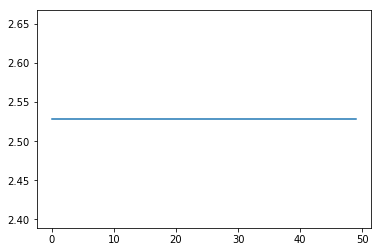

In [8]:
option2 = {
    'activation': 'softmax',
    'loss': 'mse',
    'optimizer': SGD(),
    'number_of_layers': 2
}

option2_model = get_ncf_model(max_user_id_train,max_movie_id_train, K_LATENT,
                              HIDDEN_DIM, DROPOUT, option2['activation'], option2['number_of_layers'])
option2_model.compile(loss=option2['loss'], optimizer=option2['optimizer'], metrics=['mae'])
print(option2_model.summary())


Train on 80000 samples, validate on 20000 samples
Epoch 1/50


   32/80000 [..............................] - ETA: 10:16 - loss: 4.7188 - mean_absolute_error: 1.9688

 1408/80000 [..............................] - ETA: 16s - loss: 7.4737 - mean_absolute_error: 2.4879  

 2880/80000 [>.............................] - ETA: 9s - loss: 7.5830 - mean_absolute_error: 2.5198 

 4512/80000 [>.............................] - ETA: 6s - loss: 7.5789 - mean_absolute_error: 2.5151

 5984/80000 [=>............................] - ETA: 5s - loss: 7.6068 - mean_absolute_error: 2.5206

 7072/80000 [=>............................] - ETA: 5s - loss: 7.6444 - mean_absolute_error: 2.5287

 8352/80000 [==>...........................] - ETA: 4s - loss: 7.6266 - mean_absolute_error: 2.5238

 9632/80000 [==>...........................] - ETA: 4s - loss: 7.6010 - mean_absolute_error: 2.5178

10976/80000 [===>..........................] - ETA: 4s - loss: 7.5670 - mean_absolute_error: 2.5128

11968/80000 [===>..........................] - ETA: 3s - loss: 7.5927 - mean_absolute_error: 2.5171

13024/80000 [===>..........................] - ETA: 3s - loss: 7.5913 - mean_absolute_error: 2.5173

14400/80000 [====>.........................] - ETA: 3s - loss: 7.6015 - mean_absolute_error: 2.5198

15744/80000 [====>.........................] - ETA: 3s - loss: 7.6009 - mean_absolute_error: 2.5196

17184/80000 [=====>........................] - ETA: 3s - loss: 7.5966 - mean_absolute_error: 2.5196

18592/80000 [=====>........................] - ETA: 3s - loss: 7.6140 - mean_absolute_error: 2.5235

20032/80000 [======>.......................] - ETA: 3s - loss: 7.6033 - mean_absolute_error: 2.5221

21472/80000 [=======>......................] - ETA: 2s - loss: 7.5976 - mean_absolute_error: 2.5200

22848/80000 [=======>......................] - ETA: 2s - loss: 7.6056 - mean_absolute_error: 2.5223

24224/80000 [========>.....................] - ETA: 2s - loss: 7.6148 - mean_absolute_error: 2.5240

25504/80000 [========>.....................] - ETA: 2s - loss: 7.6145 - mean_absolute_error: 2.5245

26912/80000 [=========>....................] - ETA: 2s - loss: 7.6267 - mean_absolute_error: 2.5265

28352/80000 [=========>....................] - ETA: 2s - loss: 7.6281 - mean_absolute_error: 2.5269

29888/80000 [==========>...................] - ETA: 2s - loss: 7.6307 - mean_absolute_error: 2.5273

31488/80000 [==========>...................] - ETA: 2s - loss: 7.6340 - mean_absolute_error: 2.5280

33088/80000 [===========>..................] - ETA: 2s - loss: 7.6329 - mean_absolute_error: 2.5283

34688/80000 [============>.................] - ETA: 1s - loss: 7.6358 - mean_absolute_error: 2.5283

36288/80000 [============>.................] - ETA: 1s - loss: 7.6291 - mean_absolute_error: 2.5270

37824/80000 [=============>................] - ETA: 1s - loss: 7.6391 - mean_absolute_error: 2.5291

39424/80000 [=============>................] - ETA: 1s - loss: 7.6344 - mean_absolute_error: 2.5283

40864/80000 [==============>...............] - ETA: 1s - loss: 7.6284 - mean_absolute_error: 2.5271

42400/80000 [==============>...............] - ETA: 1s - loss: 7.6394 - mean_absolute_error: 2.5288

43840/80000 [===============>..............] - ETA: 1s - loss: 7.6403 - mean_absolute_error: 2.5289

45376/80000 [================>.............] - ETA: 1s - loss: 7.6375 - mean_absolute_error: 2.5282

47008/80000 [================>.............] - ETA: 1s - loss: 7.6391 - mean_absolute_error: 2.5284

48736/80000 [=================>............] - ETA: 1s - loss: 7.6423 - mean_absolute_error: 2.5291

50560/80000 [=================>............] - ETA: 1s - loss: 7.6436 - mean_absolute_error: 2.5289

52384/80000 [==================>...........] - ETA: 1s - loss: 7.6441 - mean_absolute_error: 2.5284

54208/80000 [===================>..........] - ETA: 1s - loss: 7.6435 - mean_absolute_error: 2.5283

56064/80000 [====================>.........] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5284

57728/80000 [====================>.........] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5289

58912/80000 [=====================>........] - ETA: 0s - loss: 7.6426 - mean_absolute_error: 2.5285

60224/80000 [=====================>........] - ETA: 0s - loss: 7.6441 - mean_absolute_error: 2.5287

61152/80000 [=====================>........] - ETA: 0s - loss: 7.6453 - mean_absolute_error: 2.5290

61984/80000 [======================>.......] - ETA: 0s - loss: 7.6491 - mean_absolute_error: 2.5296

63296/80000 [======================>.......] - ETA: 0s - loss: 7.6478 - mean_absolute_error: 2.5294

64928/80000 [=======================>......] - ETA: 0s - loss: 7.6462 - mean_absolute_error: 2.5289

66656/80000 [=======================>......] - ETA: 0s - loss: 7.6451 - mean_absolute_error: 2.5286

68288/80000 [========================>.....] - ETA: 0s - loss: 7.6452 - mean_absolute_error: 2.5291

70048/80000 [=========================>....] - ETA: 0s - loss: 7.6431 - mean_absolute_error: 2.5284

71872/80000 [=========================>....] - ETA: 0s - loss: 7.6458 - mean_absolute_error: 2.5291

73664/80000 [==========================>...] - ETA: 0s - loss: 7.6444 - mean_absolute_error: 2.5288

75360/80000 [===========================>..] - ETA: 0s - loss: 7.6467 - mean_absolute_error: 2.5292

77088/80000 [===========================>..] - ETA: 0s - loss: 7.6428 - mean_absolute_error: 2.5283

78912/80000 [============================>.] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5284

80000/80000 [==============================] - 3s 40us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 2/50
   32/80000 [..............................] - ETA: 9s - loss: 5.5625 - mean_absolute_error: 2.0625

 1344/80000 [..............................] - ETA: 3s - loss: 7.4754 - mean_absolute_error: 2.4933

 2688/80000 [>.............................] - ETA: 3s - loss: 7.6641 - mean_absolute_error: 2.5398

 3968/80000 [>.............................] - ETA: 2s - loss: 7.7029 - mean_absolute_error: 2.5461

 5504/80000 [=>............................] - ETA: 2s - loss: 7.6174 - mean_absolute_error: 2.5298

 7200/80000 [=>............................] - ETA: 2s - loss: 7.6560 - mean_absolute_error: 2.5379

 8832/80000 [==>...........................] - ETA: 2s - loss: 7.6523 - mean_absolute_error: 2.5354

10560/80000 [==>...........................] - ETA: 2s - loss: 7.6246 - mean_absolute_error: 2.5299

12352/80000 [===>..........................] - ETA: 2s - loss: 7.6213 - mean_absolute_error: 2.5267

14016/80000 [====>.........................] - ETA: 2s - loss: 7.6352 - mean_absolute_error: 2.5280

15776/80000 [====>.........................] - ETA: 2s - loss: 7.6198 - mean_absolute_error: 2.5248

17568/80000 [=====>........................] - ETA: 1s - loss: 7.6255 - mean_absolute_error: 2.5255

19360/80000 [======>.......................] - ETA: 1s - loss: 7.6311 - mean_absolute_error: 2.5282

21088/80000 [======>.......................] - ETA: 1s - loss: 7.6358 - mean_absolute_error: 2.5294

22848/80000 [=======>......................] - ETA: 1s - loss: 7.6278 - mean_absolute_error: 2.5277

24672/80000 [========>.....................] - ETA: 1s - loss: 7.6164 - mean_absolute_error: 2.5252

26432/80000 [========>.....................] - ETA: 1s - loss: 7.6169 - mean_absolute_error: 2.5250

28256/80000 [=========>....................] - ETA: 1s - loss: 7.6221 - mean_absolute_error: 2.5260

30080/80000 [==========>...................] - ETA: 1s - loss: 7.6229 - mean_absolute_error: 2.5260

31936/80000 [==========>...................] - ETA: 1s - loss: 7.6243 - mean_absolute_error: 2.5259

33792/80000 [===========>..................] - ETA: 1s - loss: 7.6327 - mean_absolute_error: 2.5270

35232/80000 [============>.................] - ETA: 1s - loss: 7.6320 - mean_absolute_error: 2.5267

36256/80000 [============>.................] - ETA: 1s - loss: 7.6314 - mean_absolute_error: 2.5263

37248/80000 [============>.................] - ETA: 1s - loss: 7.6293 - mean_absolute_error: 2.5259

38560/80000 [=============>................] - ETA: 1s - loss: 7.6290 - mean_absolute_error: 2.5258

40192/80000 [==============>...............] - ETA: 1s - loss: 7.6178 - mean_absolute_error: 2.5234

41920/80000 [==============>...............] - ETA: 1s - loss: 7.6275 - mean_absolute_error: 2.5255

43712/80000 [===============>..............] - ETA: 1s - loss: 7.6335 - mean_absolute_error: 2.5271

45536/80000 [================>.............] - ETA: 1s - loss: 7.6309 - mean_absolute_error: 2.5261

47008/80000 [================>.............] - ETA: 1s - loss: 7.6408 - mean_absolute_error: 2.5284

48704/80000 [=================>............] - ETA: 0s - loss: 7.6394 - mean_absolute_error: 2.5283

50496/80000 [=================>............] - ETA: 0s - loss: 7.6409 - mean_absolute_error: 2.5283

52320/80000 [==================>...........] - ETA: 0s - loss: 7.6447 - mean_absolute_error: 2.5291

54144/80000 [===================>..........] - ETA: 0s - loss: 7.6480 - mean_absolute_error: 2.5298

55936/80000 [===================>..........] - ETA: 0s - loss: 7.6494 - mean_absolute_error: 2.5297

57728/80000 [====================>.........] - ETA: 0s - loss: 7.6441 - mean_absolute_error: 2.5284

59520/80000 [=====================>........] - ETA: 0s - loss: 7.6382 - mean_absolute_error: 2.5272

61344/80000 [======================>.......] - ETA: 0s - loss: 7.6359 - mean_absolute_error: 2.5269

63136/80000 [======================>.......] - ETA: 0s - loss: 7.6334 - mean_absolute_error: 2.5263

64928/80000 [=======================>......] - ETA: 0s - loss: 7.6380 - mean_absolute_error: 2.5274

66720/80000 [========================>.....] - ETA: 0s - loss: 7.6411 - mean_absolute_error: 2.5281

68512/80000 [========================>.....] - ETA: 0s - loss: 7.6394 - mean_absolute_error: 2.5277

70304/80000 [=========================>....] - ETA: 0s - loss: 7.6390 - mean_absolute_error: 2.5276

71936/80000 [=========================>....] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5287

73600/80000 [==========================>...] - ETA: 0s - loss: 7.6468 - mean_absolute_error: 2.5289

75328/80000 [===========================>..] - ETA: 0s - loss: 7.6382 - mean_absolute_error: 2.5270

77120/80000 [===========================>..] - ETA: 0s - loss: 7.6375 - mean_absolute_error: 2.5269

78944/80000 [============================>.] - ETA: 0s - loss: 7.6405 - mean_absolute_error: 2.5276

80000/80000 [==============================] - 3s 32us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 3/50
   32/80000 [..............................] - ETA: 8s - loss: 7.3750 - mean_absolute_error: 2.5000

 1248/80000 [..............................] - ETA: 3s - loss: 7.6963 - mean_absolute_error: 2.5361

 2624/80000 [..............................] - ETA: 3s - loss: 7.6014 - mean_absolute_error: 2.5221

 3840/80000 [>.............................] - ETA: 3s - loss: 7.6099 - mean_absolute_error: 2.5224

 5440/80000 [=>............................] - ETA: 2s - loss: 7.5631 - mean_absolute_error: 2.5112

 7136/80000 [=>............................] - ETA: 2s - loss: 7.5014 - mean_absolute_error: 2.4961

 8896/80000 [==>...........................] - ETA: 2s - loss: 7.5420 - mean_absolute_error: 2.5047

10688/80000 [===>..........................] - ETA: 2s - loss: 7.5519 - mean_absolute_error: 2.5078

12448/80000 [===>..........................] - ETA: 2s - loss: 7.5958 - mean_absolute_error: 2.5161

14208/80000 [====>.........................] - ETA: 2s - loss: 7.5883 - mean_absolute_error: 2.5154

16000/80000 [=====>........................] - ETA: 2s - loss: 7.5902 - mean_absolute_error: 2.5153

17792/80000 [=====>........................] - ETA: 1s - loss: 7.5723 - mean_absolute_error: 2.5125

19616/80000 [======>.......................] - ETA: 1s - loss: 7.5849 - mean_absolute_error: 2.5156

21440/80000 [=======>......................] - ETA: 1s - loss: 7.5899 - mean_absolute_error: 2.5164

23232/80000 [=======>......................] - ETA: 1s - loss: 7.6073 - mean_absolute_error: 2.5192

24992/80000 [========>.....................] - ETA: 1s - loss: 7.6216 - mean_absolute_error: 2.5224

26784/80000 [=========>....................] - ETA: 1s - loss: 7.6330 - mean_absolute_error: 2.5236

28512/80000 [=========>....................] - ETA: 1s - loss: 7.6262 - mean_absolute_error: 2.5224

30304/80000 [==========>...................] - ETA: 1s - loss: 7.6428 - mean_absolute_error: 2.5260

32128/80000 [===========>..................] - ETA: 1s - loss: 7.6397 - mean_absolute_error: 2.5255

33888/80000 [===========>..................] - ETA: 1s - loss: 7.6408 - mean_absolute_error: 2.5257

35328/80000 [============>.................] - ETA: 1s - loss: 7.6416 - mean_absolute_error: 2.5258

36416/80000 [============>.................] - ETA: 1s - loss: 7.6369 - mean_absolute_error: 2.5249

37408/80000 [=============>................] - ETA: 1s - loss: 7.6365 - mean_absolute_error: 2.5251

38880/80000 [=============>................] - ETA: 1s - loss: 7.6490 - mean_absolute_error: 2.5279

40512/80000 [==============>...............] - ETA: 1s - loss: 7.6503 - mean_absolute_error: 2.5279

42208/80000 [==============>...............] - ETA: 1s - loss: 7.6571 - mean_absolute_error: 2.5295

43968/80000 [===============>..............] - ETA: 1s - loss: 7.6547 - mean_absolute_error: 2.5295

45760/80000 [================>.............] - ETA: 1s - loss: 7.6635 - mean_absolute_error: 2.5317

47520/80000 [================>.............] - ETA: 1s - loss: 7.6700 - mean_absolute_error: 2.5329

49248/80000 [=================>............] - ETA: 0s - loss: 7.6658 - mean_absolute_error: 2.5321

50912/80000 [==================>...........] - ETA: 0s - loss: 7.6655 - mean_absolute_error: 2.5319

52608/80000 [==================>...........] - ETA: 0s - loss: 7.6627 - mean_absolute_error: 2.5315

54400/80000 [===================>..........] - ETA: 0s - loss: 7.6585 - mean_absolute_error: 2.5308

56192/80000 [====================>.........] - ETA: 0s - loss: 7.6572 - mean_absolute_error: 2.5303

57952/80000 [====================>.........] - ETA: 0s - loss: 7.6489 - mean_absolute_error: 2.5287

59680/80000 [=====================>........] - ETA: 0s - loss: 7.6542 - mean_absolute_error: 2.5297

61376/80000 [======================>.......] - ETA: 0s - loss: 7.6513 - mean_absolute_error: 2.5291

63168/80000 [======================>.......] - ETA: 0s - loss: 7.6511 - mean_absolute_error: 2.5290

64992/80000 [=======================>......] - ETA: 0s - loss: 7.6530 - mean_absolute_error: 2.5292

66816/80000 [========================>.....] - ETA: 0s - loss: 7.6552 - mean_absolute_error: 2.5299

68608/80000 [========================>.....] - ETA: 0s - loss: 7.6557 - mean_absolute_error: 2.5303

70432/80000 [=========================>....] - ETA: 0s - loss: 7.6485 - mean_absolute_error: 2.5287

72224/80000 [==========================>...] - ETA: 0s - loss: 7.6511 - mean_absolute_error: 2.5295

73440/80000 [==========================>...] - ETA: 0s - loss: 7.6467 - mean_absolute_error: 2.5288

75168/80000 [===========================>..] - ETA: 0s - loss: 7.6429 - mean_absolute_error: 2.5280

76928/80000 [===========================>..] - ETA: 0s - loss: 7.6385 - mean_absolute_error: 2.5273

78688/80000 [============================>.] - ETA: 0s - loss: 7.6422 - mean_absolute_error: 2.5282

80000/80000 [==============================] - 3s 32us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 4/50
   32/80000 [..............................] - ETA: 8s - loss: 10.0312 - mean_absolute_error: 3.0312

 1376/80000 [..............................] - ETA: 3s - loss: 7.7507 - mean_absolute_error: 2.5560 

 2784/80000 [>.............................] - ETA: 2s - loss: 7.6724 - mean_absolute_error: 2.5374

 3936/80000 [>.............................] - ETA: 2s - loss: 7.6357 - mean_absolute_error: 2.5310

 5568/80000 [=>............................] - ETA: 2s - loss: 7.6074 - mean_absolute_error: 2.5226

 7296/80000 [=>............................] - ETA: 2s - loss: 7.5935 - mean_absolute_error: 2.5203

 8768/80000 [==>...........................] - ETA: 2s - loss: 7.6364 - mean_absolute_error: 2.5294

10496/80000 [==>...........................] - ETA: 2s - loss: 7.6292 - mean_absolute_error: 2.5261

12256/80000 [===>..........................] - ETA: 2s - loss: 7.6277 - mean_absolute_error: 2.5272

14048/80000 [====>.........................] - ETA: 2s - loss: 7.6402 - mean_absolute_error: 2.5290

15872/80000 [====>.........................] - ETA: 2s - loss: 7.6653 - mean_absolute_error: 2.5343

17696/80000 [=====>........................] - ETA: 1s - loss: 7.6642 - mean_absolute_error: 2.5340

19520/80000 [======>.......................] - ETA: 1s - loss: 7.6557 - mean_absolute_error: 2.5315

21312/80000 [======>.......................] - ETA: 1s - loss: 7.6536 - mean_absolute_error: 2.5320

23136/80000 [=======>......................] - ETA: 1s - loss: 7.6414 - mean_absolute_error: 2.5293

24960/80000 [========>.....................] - ETA: 1s - loss: 7.6402 - mean_absolute_error: 2.5291

26720/80000 [=========>....................] - ETA: 1s - loss: 7.6415 - mean_absolute_error: 2.5296

28544/80000 [=========>....................] - ETA: 1s - loss: 7.6552 - mean_absolute_error: 2.5328

30368/80000 [==========>...................] - ETA: 1s - loss: 7.6421 - mean_absolute_error: 2.5296

32192/80000 [===========>..................] - ETA: 1s - loss: 7.6450 - mean_absolute_error: 2.5300

34016/80000 [===========>..................] - ETA: 1s - loss: 7.6460 - mean_absolute_error: 2.5303

35648/80000 [============>.................] - ETA: 1s - loss: 7.6537 - mean_absolute_error: 2.5318

36928/80000 [============>.................] - ETA: 1s - loss: 7.6472 - mean_absolute_error: 2.5303

38112/80000 [=============>................] - ETA: 1s - loss: 7.6568 - mean_absolute_error: 2.5317

39360/80000 [=============>................] - ETA: 1s - loss: 7.6457 - mean_absolute_error: 2.5289

40896/80000 [==============>...............] - ETA: 1s - loss: 7.6522 - mean_absolute_error: 2.5308

42336/80000 [==============>...............] - ETA: 1s - loss: 7.6631 - mean_absolute_error: 2.5328

44064/80000 [===============>..............] - ETA: 1s - loss: 7.6589 - mean_absolute_error: 2.5323

45888/80000 [================>.............] - ETA: 1s - loss: 7.6621 - mean_absolute_error: 2.5325

47680/80000 [================>.............] - ETA: 0s - loss: 7.6522 - mean_absolute_error: 2.5300

49440/80000 [=================>............] - ETA: 0s - loss: 7.6543 - mean_absolute_error: 2.5302

51008/80000 [==================>...........] - ETA: 0s - loss: 7.6486 - mean_absolute_error: 2.5291

52736/80000 [==================>...........] - ETA: 0s - loss: 7.6509 - mean_absolute_error: 2.5293

54496/80000 [===================>..........] - ETA: 0s - loss: 7.6492 - mean_absolute_error: 2.5293

56288/80000 [====================>.........] - ETA: 0s - loss: 7.6570 - mean_absolute_error: 2.5309

58080/80000 [====================>.........] - ETA: 0s - loss: 7.6544 - mean_absolute_error: 2.5303

59904/80000 [=====================>........] - ETA: 0s - loss: 7.6558 - mean_absolute_error: 2.5305

61632/80000 [======================>.......] - ETA: 0s - loss: 7.6533 - mean_absolute_error: 2.5299

63392/80000 [======================>.......] - ETA: 0s - loss: 7.6543 - mean_absolute_error: 2.5303

65184/80000 [=======================>......] - ETA: 0s - loss: 7.6579 - mean_absolute_error: 2.5312

66976/80000 [========================>.....] - ETA: 0s - loss: 7.6615 - mean_absolute_error: 2.5321

68800/80000 [========================>.....] - ETA: 0s - loss: 7.6575 - mean_absolute_error: 2.5310

70624/80000 [=========================>....] - ETA: 0s - loss: 7.6548 - mean_absolute_error: 2.5304

72416/80000 [==========================>...] - ETA: 0s - loss: 7.6519 - mean_absolute_error: 2.5297

74208/80000 [==========================>...] - ETA: 0s - loss: 7.6492 - mean_absolute_error: 2.5293

75936/80000 [===========================>..] - ETA: 0s - loss: 7.6469 - mean_absolute_error: 2.5288

77728/80000 [============================>.] - ETA: 0s - loss: 7.6469 - mean_absolute_error: 2.5289

79520/80000 [============================>.] - ETA: 0s - loss: 7.6455 - mean_absolute_error: 2.5287

80000/80000 [==============================] - 3s 32us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 5/50
   32/80000 [..............................] - ETA: 8s - loss: 7.5625 - mean_absolute_error: 2.5000

 1440/80000 [..............................] - ETA: 3s - loss: 7.5910 - mean_absolute_error: 2.5174

 2688/80000 [>.............................] - ETA: 3s - loss: 7.4989 - mean_absolute_error: 2.5011

 3968/80000 [>.............................] - ETA: 3s - loss: 7.5045 - mean_absolute_error: 2.5030

 5600/80000 [=>............................] - ETA: 2s - loss: 7.5395 - mean_absolute_error: 2.5109

 7296/80000 [=>............................] - ETA: 2s - loss: 7.5447 - mean_absolute_error: 2.5107

 9056/80000 [==>...........................] - ETA: 2s - loss: 7.5161 - mean_absolute_error: 2.5053

10784/80000 [===>..........................] - ETA: 2s - loss: 7.5590 - mean_absolute_error: 2.5134

12512/80000 [===>..........................] - ETA: 2s - loss: 7.5944 - mean_absolute_error: 2.5209

14272/80000 [====>.........................] - ETA: 2s - loss: 7.6017 - mean_absolute_error: 2.5238

16064/80000 [=====>........................] - ETA: 2s - loss: 7.5783 - mean_absolute_error: 2.5181

17856/80000 [=====>........................] - ETA: 1s - loss: 7.6014 - mean_absolute_error: 2.5209

19616/80000 [======>.......................] - ETA: 1s - loss: 7.5955 - mean_absolute_error: 2.5201

21376/80000 [=======>......................] - ETA: 1s - loss: 7.6039 - mean_absolute_error: 2.5223

23104/80000 [=======>......................] - ETA: 1s - loss: 7.5989 - mean_absolute_error: 2.5210

24832/80000 [========>.....................] - ETA: 1s - loss: 7.5925 - mean_absolute_error: 2.5201

26624/80000 [========>.....................] - ETA: 1s - loss: 7.6007 - mean_absolute_error: 2.5223

28384/80000 [=========>....................] - ETA: 1s - loss: 7.5927 - mean_absolute_error: 2.5205

30144/80000 [==========>...................] - ETA: 1s - loss: 7.5969 - mean_absolute_error: 2.5211

32096/80000 [===========>..................] - ETA: 1s - loss: 7.6033 - mean_absolute_error: 2.5225

33920/80000 [===========>..................] - ETA: 1s - loss: 7.6076 - mean_absolute_error: 2.5231

35360/80000 [============>.................] - ETA: 1s - loss: 7.6159 - mean_absolute_error: 2.5244

36352/80000 [============>.................] - ETA: 1s - loss: 7.6249 - mean_absolute_error: 2.5259

37376/80000 [=============>................] - ETA: 1s - loss: 7.6203 - mean_absolute_error: 2.5249

38624/80000 [=============>................] - ETA: 1s - loss: 7.6198 - mean_absolute_error: 2.5246

40224/80000 [==============>...............] - ETA: 1s - loss: 7.6264 - mean_absolute_error: 2.5255

41952/80000 [==============>...............] - ETA: 1s - loss: 7.6235 - mean_absolute_error: 2.5247

43680/80000 [===============>..............] - ETA: 1s - loss: 7.6181 - mean_absolute_error: 2.5241

45376/80000 [================>.............] - ETA: 1s - loss: 7.6227 - mean_absolute_error: 2.5242

47136/80000 [================>.............] - ETA: 1s - loss: 7.6174 - mean_absolute_error: 2.5233

48928/80000 [=================>............] - ETA: 0s - loss: 7.6224 - mean_absolute_error: 2.5244

50752/80000 [==================>...........] - ETA: 0s - loss: 7.6242 - mean_absolute_error: 2.5249

52512/80000 [==================>...........] - ETA: 0s - loss: 7.6273 - mean_absolute_error: 2.5254

54336/80000 [===================>..........] - ETA: 0s - loss: 7.6369 - mean_absolute_error: 2.5277

56000/80000 [====================>.........] - ETA: 0s - loss: 7.6413 - mean_absolute_error: 2.5286

57760/80000 [====================>.........] - ETA: 0s - loss: 7.6427 - mean_absolute_error: 2.5291

59584/80000 [=====================>........] - ETA: 0s - loss: 7.6425 - mean_absolute_error: 2.5291

61344/80000 [======================>.......] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5289

63136/80000 [======================>.......] - ETA: 0s - loss: 7.6446 - mean_absolute_error: 2.5289

64896/80000 [=======================>......] - ETA: 0s - loss: 7.6419 - mean_absolute_error: 2.5279

66720/80000 [========================>.....] - ETA: 0s - loss: 7.6450 - mean_absolute_error: 2.5289

68352/80000 [========================>.....] - ETA: 0s - loss: 7.6418 - mean_absolute_error: 2.5281

70048/80000 [=========================>....] - ETA: 0s - loss: 7.6416 - mean_absolute_error: 2.5279

71808/80000 [=========================>....] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5284

73536/80000 [==========================>...] - ETA: 0s - loss: 7.6432 - mean_absolute_error: 2.5279

75296/80000 [===========================>..] - ETA: 0s - loss: 7.6406 - mean_absolute_error: 2.5274

77088/80000 [===========================>..] - ETA: 0s - loss: 7.6431 - mean_absolute_error: 2.5280

78880/80000 [============================>.] - ETA: 0s - loss: 7.6444 - mean_absolute_error: 2.5285

80000/80000 [==============================] - 3s 32us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 6/50
   32/80000 [..............................] - ETA: 8s - loss: 7.9062 - mean_absolute_error: 2.5938

 1216/80000 [..............................] - ETA: 3s - loss: 7.8059 - mean_absolute_error: 2.5428

 2592/80000 [..............................] - ETA: 3s - loss: 7.6150 - mean_absolute_error: 2.5193

 3648/80000 [>.............................] - ETA: 3s - loss: 7.6247 - mean_absolute_error: 2.5233

 5216/80000 [>.............................] - ETA: 2s - loss: 7.5621 - mean_absolute_error: 2.5115

 6912/80000 [=>............................] - ETA: 2s - loss: 7.6347 - mean_absolute_error: 2.5259

 8608/80000 [==>...........................] - ETA: 2s - loss: 7.6241 - mean_absolute_error: 2.5214

10336/80000 [==>...........................] - ETA: 2s - loss: 7.6253 - mean_absolute_error: 2.5214

12032/80000 [===>..........................] - ETA: 2s - loss: 7.6241 - mean_absolute_error: 2.5217

13760/80000 [====>.........................] - ETA: 2s - loss: 7.6227 - mean_absolute_error: 2.5221

15392/80000 [====>.........................] - ETA: 2s - loss: 7.6341 - mean_absolute_error: 2.5239

16960/80000 [=====>........................] - ETA: 2s - loss: 7.6350 - mean_absolute_error: 2.5241

18496/80000 [=====>........................] - ETA: 2s - loss: 7.6496 - mean_absolute_error: 2.5285

20192/80000 [======>.......................] - ETA: 1s - loss: 7.6373 - mean_absolute_error: 2.5267

21920/80000 [=======>......................] - ETA: 1s - loss: 7.6516 - mean_absolute_error: 2.5302

23648/80000 [=======>......................] - ETA: 1s - loss: 7.6554 - mean_absolute_error: 2.5311

25376/80000 [========>.....................] - ETA: 1s - loss: 7.6675 - mean_absolute_error: 2.5339

27136/80000 [=========>....................] - ETA: 1s - loss: 7.6746 - mean_absolute_error: 2.5357

28896/80000 [=========>....................] - ETA: 1s - loss: 7.6736 - mean_absolute_error: 2.5352

30624/80000 [==========>...................] - ETA: 1s - loss: 7.6791 - mean_absolute_error: 2.5362

32352/80000 [===========>..................] - ETA: 1s - loss: 7.6756 - mean_absolute_error: 2.5353

33792/80000 [===========>..................] - ETA: 1s - loss: 7.6658 - mean_absolute_error: 2.5339

34880/80000 [============>.................] - ETA: 1s - loss: 7.6634 - mean_absolute_error: 2.5334

35744/80000 [============>.................] - ETA: 1s - loss: 7.6630 - mean_absolute_error: 2.5335

36960/80000 [============>.................] - ETA: 1s - loss: 7.6598 - mean_absolute_error: 2.5331

38560/80000 [=============>................] - ETA: 1s - loss: 7.6671 - mean_absolute_error: 2.5348

40192/80000 [==============>...............] - ETA: 1s - loss: 7.6654 - mean_absolute_error: 2.5346

41888/80000 [==============>...............] - ETA: 1s - loss: 7.6632 - mean_absolute_error: 2.5333

43584/80000 [===============>..............] - ETA: 1s - loss: 7.6600 - mean_absolute_error: 2.5331

45344/80000 [================>.............] - ETA: 1s - loss: 7.6671 - mean_absolute_error: 2.5340

47040/80000 [================>.............] - ETA: 1s - loss: 7.6667 - mean_absolute_error: 2.5333

48768/80000 [=================>............] - ETA: 1s - loss: 7.6680 - mean_absolute_error: 2.5332

50496/80000 [=================>............] - ETA: 0s - loss: 7.6748 - mean_absolute_error: 2.5347

52256/80000 [==================>...........] - ETA: 0s - loss: 7.6737 - mean_absolute_error: 2.5345

54048/80000 [===================>..........] - ETA: 0s - loss: 7.6757 - mean_absolute_error: 2.5350

55808/80000 [===================>..........] - ETA: 0s - loss: 7.6779 - mean_absolute_error: 2.5353

57504/80000 [====================>.........] - ETA: 0s - loss: 7.6732 - mean_absolute_error: 2.5342

59264/80000 [=====================>........] - ETA: 0s - loss: 7.6713 - mean_absolute_error: 2.5341

61056/80000 [=====================>........] - ETA: 0s - loss: 7.6716 - mean_absolute_error: 2.5340

62816/80000 [======================>.......] - ETA: 0s - loss: 7.6652 - mean_absolute_error: 2.5325

64480/80000 [=======================>......] - ETA: 0s - loss: 7.6619 - mean_absolute_error: 2.5320

66176/80000 [=======================>......] - ETA: 0s - loss: 7.6598 - mean_absolute_error: 2.5313

67840/80000 [========================>.....] - ETA: 0s - loss: 7.6566 - mean_absolute_error: 2.5304

69536/80000 [=========================>....] - ETA: 0s - loss: 7.6562 - mean_absolute_error: 2.5304

71264/80000 [=========================>....] - ETA: 0s - loss: 7.6559 - mean_absolute_error: 2.5301

72992/80000 [==========================>...] - ETA: 0s - loss: 7.6531 - mean_absolute_error: 2.5297

74720/80000 [===========================>..] - ETA: 0s - loss: 7.6504 - mean_absolute_error: 2.5294

76480/80000 [===========================>..] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5286

78272/80000 [============================>.] - ETA: 0s - loss: 7.6421 - mean_absolute_error: 2.5279

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 7/50
   32/80000 [..............................] - ETA: 8s - loss: 8.2188 - mean_absolute_error: 2.5938

 1312/80000 [..............................] - ETA: 3s - loss: 7.8354 - mean_absolute_error: 2.5610

 2688/80000 [>.............................] - ETA: 3s - loss: 7.6592 - mean_absolute_error: 2.5260

 3808/80000 [>.............................] - ETA: 3s - loss: 7.6573 - mean_absolute_error: 2.5234

 5216/80000 [>.............................] - ETA: 2s - loss: 7.6256 - mean_absolute_error: 2.5178

 6656/80000 [=>............................] - ETA: 2s - loss: 7.6342 - mean_absolute_error: 2.5230

 8288/80000 [==>...........................] - ETA: 2s - loss: 7.6170 - mean_absolute_error: 2.5224

 9984/80000 [==>...........................] - ETA: 2s - loss: 7.6189 - mean_absolute_error: 2.5225

11680/80000 [===>..........................] - ETA: 2s - loss: 7.6317 - mean_absolute_error: 2.5245

13408/80000 [====>.........................] - ETA: 2s - loss: 7.6411 - mean_absolute_error: 2.5251

14912/80000 [====>.........................] - ETA: 2s - loss: 7.6345 - mean_absolute_error: 2.5236

16640/80000 [=====>........................] - ETA: 2s - loss: 7.6388 - mean_absolute_error: 2.5252

18400/80000 [=====>........................] - ETA: 2s - loss: 7.6226 - mean_absolute_error: 2.5211

20192/80000 [======>.......................] - ETA: 1s - loss: 7.6226 - mean_absolute_error: 2.5217

21984/80000 [=======>......................] - ETA: 1s - loss: 7.6334 - mean_absolute_error: 2.5242

23744/80000 [=======>......................] - ETA: 1s - loss: 7.6327 - mean_absolute_error: 2.5239

25504/80000 [========>.....................] - ETA: 1s - loss: 7.6338 - mean_absolute_error: 2.5245

27264/80000 [=========>....................] - ETA: 1s - loss: 7.6546 - mean_absolute_error: 2.5295

29056/80000 [=========>....................] - ETA: 1s - loss: 7.6566 - mean_absolute_error: 2.5297

30752/80000 [==========>...................] - ETA: 1s - loss: 7.6514 - mean_absolute_error: 2.5286

32480/80000 [===========>..................] - ETA: 1s - loss: 7.6432 - mean_absolute_error: 2.5270

33952/80000 [===========>..................] - ETA: 1s - loss: 7.6363 - mean_absolute_error: 2.5256

34720/80000 [============>.................] - ETA: 1s - loss: 7.6384 - mean_absolute_error: 2.5258

35872/80000 [============>.................] - ETA: 1s - loss: 7.6465 - mean_absolute_error: 2.5267

36480/80000 [============>.................] - ETA: 1s - loss: 7.6416 - mean_absolute_error: 2.5255

37856/80000 [=============>................] - ETA: 1s - loss: 7.6405 - mean_absolute_error: 2.5258

39424/80000 [=============>................] - ETA: 1s - loss: 7.6450 - mean_absolute_error: 2.5266

41120/80000 [==============>...............] - ETA: 1s - loss: 7.6456 - mean_absolute_error: 2.5268

42848/80000 [===============>..............] - ETA: 1s - loss: 7.6479 - mean_absolute_error: 2.5275

44544/80000 [===============>..............] - ETA: 1s - loss: 7.6442 - mean_absolute_error: 2.5267

46112/80000 [================>.............] - ETA: 1s - loss: 7.6417 - mean_absolute_error: 2.5261

47840/80000 [================>.............] - ETA: 1s - loss: 7.6378 - mean_absolute_error: 2.5258

49568/80000 [=================>............] - ETA: 0s - loss: 7.6433 - mean_absolute_error: 2.5271

51072/80000 [==================>...........] - ETA: 0s - loss: 7.6499 - mean_absolute_error: 2.5287

52736/80000 [==================>...........] - ETA: 0s - loss: 7.6474 - mean_absolute_error: 2.5278

54464/80000 [===================>..........] - ETA: 0s - loss: 7.6456 - mean_absolute_error: 2.5274

56160/80000 [====================>.........] - ETA: 0s - loss: 7.6504 - mean_absolute_error: 2.5286

57888/80000 [====================>.........] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5274

59648/80000 [=====================>........] - ETA: 0s - loss: 7.6422 - mean_absolute_error: 2.5272

61408/80000 [======================>.......] - ETA: 0s - loss: 7.6410 - mean_absolute_error: 2.5275

63040/80000 [======================>.......] - ETA: 0s - loss: 7.6438 - mean_absolute_error: 2.5286

64768/80000 [=======================>......] - ETA: 0s - loss: 7.6467 - mean_absolute_error: 2.5291

66560/80000 [=======================>......] - ETA: 0s - loss: 7.6443 - mean_absolute_error: 2.5286

68256/80000 [========================>.....] - ETA: 0s - loss: 7.6465 - mean_absolute_error: 2.5289

69984/80000 [=========================>....] - ETA: 0s - loss: 7.6458 - mean_absolute_error: 2.5285

71648/80000 [=========================>....] - ETA: 0s - loss: 7.6475 - mean_absolute_error: 2.5289

73248/80000 [==========================>...] - ETA: 0s - loss: 7.6438 - mean_absolute_error: 2.5282

74880/80000 [===========================>..] - ETA: 0s - loss: 7.6399 - mean_absolute_error: 2.5275

76608/80000 [===========================>..] - ETA: 0s - loss: 7.6406 - mean_absolute_error: 2.5276

78272/80000 [============================>.] - ETA: 0s - loss: 7.6429 - mean_absolute_error: 2.5280

79968/80000 [============================>.] - ETA: 0s - loss: 7.6443 - mean_absolute_error: 2.5284

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 8/50
   32/80000 [..............................] - ETA: 8s - loss: 7.0938 - mean_absolute_error: 2.4688

 1216/80000 [..............................] - ETA: 3s - loss: 7.4326 - mean_absolute_error: 2.4934

 2560/80000 [..............................] - ETA: 3s - loss: 7.6922 - mean_absolute_error: 2.5359

 3712/80000 [>.............................] - ETA: 3s - loss: 7.6759 - mean_absolute_error: 2.5299

 5280/80000 [>.............................] - ETA: 2s - loss: 7.7144 - mean_absolute_error: 2.5420

 6944/80000 [=>............................] - ETA: 2s - loss: 7.6611 - mean_absolute_error: 2.5292

 8640/80000 [==>...........................] - ETA: 2s - loss: 7.6534 - mean_absolute_error: 2.5256

10336/80000 [==>...........................] - ETA: 2s - loss: 7.6684 - mean_absolute_error: 2.5266

12032/80000 [===>..........................] - ETA: 2s - loss: 7.6723 - mean_absolute_error: 2.5295

13760/80000 [====>.........................] - ETA: 2s - loss: 7.6573 - mean_absolute_error: 2.5263

15488/80000 [====>.........................] - ETA: 2s - loss: 7.6364 - mean_absolute_error: 2.5227

17248/80000 [=====>........................] - ETA: 2s - loss: 7.6396 - mean_absolute_error: 2.5241

19008/80000 [======>.......................] - ETA: 1s - loss: 7.6282 - mean_absolute_error: 2.5221

20736/80000 [======>.......................] - ETA: 1s - loss: 7.6351 - mean_absolute_error: 2.5236

22528/80000 [=======>......................] - ETA: 1s - loss: 7.6414 - mean_absolute_error: 2.5247

24224/80000 [========>.....................] - ETA: 1s - loss: 7.6464 - mean_absolute_error: 2.5262

25696/80000 [========>.....................] - ETA: 1s - loss: 7.6471 - mean_absolute_error: 2.5265

27424/80000 [=========>....................] - ETA: 1s - loss: 7.6529 - mean_absolute_error: 2.5277

29120/80000 [=========>....................] - ETA: 1s - loss: 7.6546 - mean_absolute_error: 2.5279

30880/80000 [==========>...................] - ETA: 1s - loss: 7.6534 - mean_absolute_error: 2.5276

32608/80000 [===========>..................] - ETA: 1s - loss: 7.6505 - mean_absolute_error: 2.5274

34048/80000 [===========>..................] - ETA: 1s - loss: 7.6540 - mean_absolute_error: 2.5280

35232/80000 [============>.................] - ETA: 1s - loss: 7.6512 - mean_absolute_error: 2.5270

36256/80000 [============>.................] - ETA: 1s - loss: 7.6543 - mean_absolute_error: 2.5279

37408/80000 [=============>................] - ETA: 1s - loss: 7.6540 - mean_absolute_error: 2.5279

38912/80000 [=============>................] - ETA: 1s - loss: 7.6522 - mean_absolute_error: 2.5278

40512/80000 [==============>...............] - ETA: 1s - loss: 7.6539 - mean_absolute_error: 2.5280

42176/80000 [==============>...............] - ETA: 1s - loss: 7.6599 - mean_absolute_error: 2.5289

43872/80000 [===============>..............] - ETA: 1s - loss: 7.6622 - mean_absolute_error: 2.5303

45568/80000 [================>.............] - ETA: 1s - loss: 7.6602 - mean_absolute_error: 2.5302

47328/80000 [================>.............] - ETA: 1s - loss: 7.6569 - mean_absolute_error: 2.5293

49088/80000 [=================>............] - ETA: 0s - loss: 7.6562 - mean_absolute_error: 2.5292

50880/80000 [==================>...........] - ETA: 0s - loss: 7.6580 - mean_absolute_error: 2.5299

52672/80000 [==================>...........] - ETA: 0s - loss: 7.6575 - mean_absolute_error: 2.5302

54464/80000 [===================>..........] - ETA: 0s - loss: 7.6604 - mean_absolute_error: 2.5308

56128/80000 [====================>.........] - ETA: 0s - loss: 7.6523 - mean_absolute_error: 2.5295

57824/80000 [====================>.........] - ETA: 0s - loss: 7.6548 - mean_absolute_error: 2.5298

59552/80000 [=====================>........] - ETA: 0s - loss: 7.6574 - mean_absolute_error: 2.5304

61312/80000 [=====================>........] - ETA: 0s - loss: 7.6583 - mean_absolute_error: 2.5306

63040/80000 [======================>.......] - ETA: 0s - loss: 7.6552 - mean_absolute_error: 2.5299

64768/80000 [=======================>......] - ETA: 0s - loss: 7.6524 - mean_absolute_error: 2.5294

66496/80000 [=======================>......] - ETA: 0s - loss: 7.6534 - mean_absolute_error: 2.5295

68256/80000 [========================>.....] - ETA: 0s - loss: 7.6525 - mean_absolute_error: 2.5292

70016/80000 [=========================>....] - ETA: 0s - loss: 7.6521 - mean_absolute_error: 2.5295

71776/80000 [=========================>....] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5284

73440/80000 [==========================>...] - ETA: 0s - loss: 7.6454 - mean_absolute_error: 2.5280

75136/80000 [===========================>..] - ETA: 0s - loss: 7.6406 - mean_absolute_error: 2.5273

76896/80000 [===========================>..] - ETA: 0s - loss: 7.6433 - mean_absolute_error: 2.5281

78688/80000 [============================>.] - ETA: 0s - loss: 7.6443 - mean_absolute_error: 2.5281

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 9/50
   32/80000 [..............................] - ETA: 8s - loss: 7.8438 - mean_absolute_error: 2.5938

 1184/80000 [..............................] - ETA: 3s - loss: 7.7584 - mean_absolute_error: 2.5490

 2464/80000 [..............................] - ETA: 3s - loss: 7.7772 - mean_absolute_error: 2.5548

 3872/80000 [>.............................] - ETA: 3s - loss: 7.6834 - mean_absolute_error: 2.5387

 5472/80000 [=>............................] - ETA: 2s - loss: 7.6383 - mean_absolute_error: 2.5309

 7232/80000 [=>............................] - ETA: 2s - loss: 7.6222 - mean_absolute_error: 2.5307

 8992/80000 [==>...........................] - ETA: 2s - loss: 7.5969 - mean_absolute_error: 2.5237

10720/80000 [===>..........................] - ETA: 2s - loss: 7.6223 - mean_absolute_error: 2.5279

12448/80000 [===>..........................] - ETA: 2s - loss: 7.6330 - mean_absolute_error: 2.5308

14176/80000 [====>.........................] - ETA: 2s - loss: 7.6196 - mean_absolute_error: 2.5287

15936/80000 [====>.........................] - ETA: 2s - loss: 7.5969 - mean_absolute_error: 2.5207

17664/80000 [=====>........................] - ETA: 1s - loss: 7.6258 - mean_absolute_error: 2.5269

19392/80000 [======>.......................] - ETA: 1s - loss: 7.6111 - mean_absolute_error: 2.5234

21120/80000 [======>.......................] - ETA: 1s - loss: 7.6302 - mean_absolute_error: 2.5271

22848/80000 [=======>......................] - ETA: 1s - loss: 7.6295 - mean_absolute_error: 2.5263

24576/80000 [========>.....................] - ETA: 1s - loss: 7.6237 - mean_absolute_error: 2.5247

26304/80000 [========>.....................] - ETA: 1s - loss: 7.6272 - mean_absolute_error: 2.5251

28064/80000 [=========>....................] - ETA: 1s - loss: 7.6325 - mean_absolute_error: 2.5263

29760/80000 [==========>...................] - ETA: 1s - loss: 7.6363 - mean_absolute_error: 2.5272

31488/80000 [==========>...................] - ETA: 1s - loss: 7.6281 - mean_absolute_error: 2.5254

33216/80000 [===========>..................] - ETA: 1s - loss: 7.6277 - mean_absolute_error: 2.5255

34656/80000 [===========>..................] - ETA: 1s - loss: 7.6322 - mean_absolute_error: 2.5264

35712/80000 [============>.................] - ETA: 1s - loss: 7.6301 - mean_absolute_error: 2.5269

36640/80000 [============>.................] - ETA: 1s - loss: 7.6275 - mean_absolute_error: 2.5265

37824/80000 [=============>................] - ETA: 1s - loss: 7.6213 - mean_absolute_error: 2.5251

39360/80000 [=============>................] - ETA: 1s - loss: 7.6262 - mean_absolute_error: 2.5260

41024/80000 [==============>...............] - ETA: 1s - loss: 7.6224 - mean_absolute_error: 2.5253

42752/80000 [===============>..............] - ETA: 1s - loss: 7.6227 - mean_absolute_error: 2.5251

44480/80000 [===============>..............] - ETA: 1s - loss: 7.6298 - mean_absolute_error: 2.5267

46208/80000 [================>.............] - ETA: 1s - loss: 7.6250 - mean_absolute_error: 2.5259

47936/80000 [================>.............] - ETA: 1s - loss: 7.6268 - mean_absolute_error: 2.5265

49600/80000 [=================>............] - ETA: 0s - loss: 7.6319 - mean_absolute_error: 2.5275

51296/80000 [==================>...........] - ETA: 0s - loss: 7.6382 - mean_absolute_error: 2.5287

52928/80000 [==================>...........] - ETA: 0s - loss: 7.6420 - mean_absolute_error: 2.5289

54624/80000 [===================>..........] - ETA: 0s - loss: 7.6454 - mean_absolute_error: 2.5297

56352/80000 [====================>.........] - ETA: 0s - loss: 7.6386 - mean_absolute_error: 2.5282

58080/80000 [====================>.........] - ETA: 0s - loss: 7.6401 - mean_absolute_error: 2.5288

59744/80000 [=====================>........] - ETA: 0s - loss: 7.6360 - mean_absolute_error: 2.5282

61472/80000 [======================>.......] - ETA: 0s - loss: 7.6364 - mean_absolute_error: 2.5281

63168/80000 [======================>.......] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5292

64896/80000 [=======================>......] - ETA: 0s - loss: 7.6457 - mean_absolute_error: 2.5298

66624/80000 [=======================>......] - ETA: 0s - loss: 7.6498 - mean_absolute_error: 2.5304

68384/80000 [========================>.....] - ETA: 0s - loss: 7.6506 - mean_absolute_error: 2.5305

70016/80000 [=========================>....] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5294

71712/80000 [=========================>....] - ETA: 0s - loss: 7.6472 - mean_absolute_error: 2.5297

73472/80000 [==========================>...] - ETA: 0s - loss: 7.6490 - mean_absolute_error: 2.5300

75232/80000 [===========================>..] - ETA: 0s - loss: 7.6468 - mean_absolute_error: 2.5292

76928/80000 [===========================>..] - ETA: 0s - loss: 7.6465 - mean_absolute_error: 2.5291

78624/80000 [============================>.] - ETA: 0s - loss: 7.6433 - mean_absolute_error: 2.5285

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 10/50
   32/80000 [..............................] - ETA: 8s - loss: 7.3750 - mean_absolute_error: 2.3750

 1280/80000 [..............................] - ETA: 3s - loss: 7.7352 - mean_absolute_error: 2.5398

 2528/80000 [..............................] - ETA: 3s - loss: 7.7508 - mean_absolute_error: 2.5483

 3968/80000 [>.............................] - ETA: 2s - loss: 7.7311 - mean_absolute_error: 2.5461

 5536/80000 [=>............................] - ETA: 2s - loss: 7.6219 - mean_absolute_error: 2.5211

 7232/80000 [=>............................] - ETA: 2s - loss: 7.6654 - mean_absolute_error: 2.5312

 8960/80000 [==>...........................] - ETA: 2s - loss: 7.6945 - mean_absolute_error: 2.5369

10368/80000 [==>...........................] - ETA: 2s - loss: 7.6835 - mean_absolute_error: 2.5354

12000/80000 [===>..........................] - ETA: 2s - loss: 7.6908 - mean_absolute_error: 2.5377

13728/80000 [====>.........................] - ETA: 2s - loss: 7.7190 - mean_absolute_error: 2.5431

15136/80000 [====>.........................] - ETA: 2s - loss: 7.7152 - mean_absolute_error: 2.5420

16736/80000 [=====>........................] - ETA: 2s - loss: 7.6997 - mean_absolute_error: 2.5388

18432/80000 [=====>........................] - ETA: 2s - loss: 7.7077 - mean_absolute_error: 2.5402

20192/80000 [======>.......................] - ETA: 1s - loss: 7.7038 - mean_absolute_error: 2.5392

21856/80000 [=======>......................] - ETA: 1s - loss: 7.6855 - mean_absolute_error: 2.5361

23552/80000 [=======>......................] - ETA: 1s - loss: 7.6804 - mean_absolute_error: 2.5350

25280/80000 [========>.....................] - ETA: 1s - loss: 7.6676 - mean_absolute_error: 2.5326

26976/80000 [=========>....................] - ETA: 1s - loss: 7.6694 - mean_absolute_error: 2.5333

28640/80000 [=========>....................] - ETA: 1s - loss: 7.6743 - mean_absolute_error: 2.5344

30336/80000 [==========>...................] - ETA: 1s - loss: 7.6655 - mean_absolute_error: 2.5324

32032/80000 [===========>..................] - ETA: 1s - loss: 7.6544 - mean_absolute_error: 2.5299

33408/80000 [===========>..................] - ETA: 1s - loss: 7.6555 - mean_absolute_error: 2.5299

34496/80000 [===========>..................] - ETA: 1s - loss: 7.6502 - mean_absolute_error: 2.5288

35520/80000 [============>.................] - ETA: 1s - loss: 7.6454 - mean_absolute_error: 2.5281

36672/80000 [============>.................] - ETA: 1s - loss: 7.6446 - mean_absolute_error: 2.5277

38240/80000 [=============>................] - ETA: 1s - loss: 7.6510 - mean_absolute_error: 2.5292

39904/80000 [=============>................] - ETA: 1s - loss: 7.6482 - mean_absolute_error: 2.5287

41536/80000 [==============>...............] - ETA: 1s - loss: 7.6551 - mean_absolute_error: 2.5298

43168/80000 [===============>..............] - ETA: 1s - loss: 7.6655 - mean_absolute_error: 2.5319

44832/80000 [===============>..............] - ETA: 1s - loss: 7.6613 - mean_absolute_error: 2.5309

46304/80000 [================>.............] - ETA: 1s - loss: 7.6610 - mean_absolute_error: 2.5305

47936/80000 [================>.............] - ETA: 1s - loss: 7.6596 - mean_absolute_error: 2.5310

49632/80000 [=================>............] - ETA: 0s - loss: 7.6523 - mean_absolute_error: 2.5296

51360/80000 [==================>...........] - ETA: 0s - loss: 7.6572 - mean_absolute_error: 2.5305

53056/80000 [==================>...........] - ETA: 0s - loss: 7.6614 - mean_absolute_error: 2.5316

54752/80000 [===================>..........] - ETA: 0s - loss: 7.6652 - mean_absolute_error: 2.5325

56448/80000 [====================>.........] - ETA: 0s - loss: 7.6661 - mean_absolute_error: 2.5328

58176/80000 [====================>.........] - ETA: 0s - loss: 7.6674 - mean_absolute_error: 2.5332

59904/80000 [=====================>........] - ETA: 0s - loss: 7.6676 - mean_absolute_error: 2.5331

61600/80000 [======================>.......] - ETA: 0s - loss: 7.6609 - mean_absolute_error: 2.5315

63296/80000 [======================>.......] - ETA: 0s - loss: 7.6579 - mean_absolute_error: 2.5309

64960/80000 [=======================>......] - ETA: 0s - loss: 7.6533 - mean_absolute_error: 2.5297

66656/80000 [=======================>......] - ETA: 0s - loss: 7.6524 - mean_absolute_error: 2.5295

68352/80000 [========================>.....] - ETA: 0s - loss: 7.6496 - mean_absolute_error: 2.5291

70016/80000 [=========================>....] - ETA: 0s - loss: 7.6498 - mean_absolute_error: 2.5290

71680/80000 [=========================>....] - ETA: 0s - loss: 7.6512 - mean_absolute_error: 2.5295

73408/80000 [==========================>...] - ETA: 0s - loss: 7.6507 - mean_absolute_error: 2.5298

75104/80000 [===========================>..] - ETA: 0s - loss: 7.6504 - mean_absolute_error: 2.5297

76768/80000 [===========================>..] - ETA: 0s - loss: 7.6487 - mean_absolute_error: 2.5291

78464/80000 [============================>.] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5281

79968/80000 [============================>.] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5283

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 11/50
   32/80000 [..............................] - ETA: 8s - loss: 7.2188 - mean_absolute_error: 2.4688

 1184/80000 [..............................] - ETA: 3s - loss: 7.7230 - mean_absolute_error: 2.5389

 2496/80000 [..............................] - ETA: 3s - loss: 7.7829 - mean_absolute_error: 2.5561

 3872/80000 [>.............................] - ETA: 3s - loss: 7.6532 - mean_absolute_error: 2.5256

 5504/80000 [=>............................] - ETA: 2s - loss: 7.6096 - mean_absolute_error: 2.5176

 7168/80000 [=>............................] - ETA: 2s - loss: 7.6126 - mean_absolute_error: 2.5205

 8832/80000 [==>...........................] - ETA: 2s - loss: 7.6491 - mean_absolute_error: 2.5280

10496/80000 [==>...........................] - ETA: 2s - loss: 7.6272 - mean_absolute_error: 2.5224

12224/80000 [===>..........................] - ETA: 2s - loss: 7.6282 - mean_absolute_error: 2.5225

13920/80000 [====>.........................] - ETA: 2s - loss: 7.6279 - mean_absolute_error: 2.5231

15648/80000 [====>.........................] - ETA: 2s - loss: 7.6345 - mean_absolute_error: 2.5251

17376/80000 [=====>........................] - ETA: 2s - loss: 7.6441 - mean_absolute_error: 2.5270

19104/80000 [======>.......................] - ETA: 1s - loss: 7.6552 - mean_absolute_error: 2.5292

20832/80000 [======>.......................] - ETA: 1s - loss: 7.6468 - mean_absolute_error: 2.5275

22496/80000 [=======>......................] - ETA: 1s - loss: 7.6543 - mean_absolute_error: 2.5288

24224/80000 [========>.....................] - ETA: 1s - loss: 7.6530 - mean_absolute_error: 2.5299

25760/80000 [========>.....................] - ETA: 1s - loss: 7.6498 - mean_absolute_error: 2.5295

27392/80000 [=========>....................] - ETA: 1s - loss: 7.6485 - mean_absolute_error: 2.5295

29120/80000 [=========>....................] - ETA: 1s - loss: 7.6433 - mean_absolute_error: 2.5276

30816/80000 [==========>...................] - ETA: 1s - loss: 7.6458 - mean_absolute_error: 2.5281

32512/80000 [===========>..................] - ETA: 1s - loss: 7.6499 - mean_absolute_error: 2.5290

33920/80000 [===========>..................] - ETA: 1s - loss: 7.6478 - mean_absolute_error: 2.5285

34976/80000 [============>.................] - ETA: 1s - loss: 7.6540 - mean_absolute_error: 2.5302

35936/80000 [============>.................] - ETA: 1s - loss: 7.6455 - mean_absolute_error: 2.5283

36928/80000 [============>.................] - ETA: 1s - loss: 7.6480 - mean_absolute_error: 2.5287

38464/80000 [=============>................] - ETA: 1s - loss: 7.6491 - mean_absolute_error: 2.5294

40064/80000 [==============>...............] - ETA: 1s - loss: 7.6396 - mean_absolute_error: 2.5272

41696/80000 [==============>...............] - ETA: 1s - loss: 7.6415 - mean_absolute_error: 2.5277

43360/80000 [===============>..............] - ETA: 1s - loss: 7.6478 - mean_absolute_error: 2.5291

44960/80000 [===============>..............] - ETA: 1s - loss: 7.6400 - mean_absolute_error: 2.5273

46624/80000 [================>.............] - ETA: 1s - loss: 7.6441 - mean_absolute_error: 2.5281

48288/80000 [=================>............] - ETA: 1s - loss: 7.6397 - mean_absolute_error: 2.5275

49984/80000 [=================>............] - ETA: 0s - loss: 7.6428 - mean_absolute_error: 2.5280

51648/80000 [==================>...........] - ETA: 0s - loss: 7.6411 - mean_absolute_error: 2.5281

53344/80000 [===================>..........] - ETA: 0s - loss: 7.6484 - mean_absolute_error: 2.5295

55008/80000 [===================>..........] - ETA: 0s - loss: 7.6479 - mean_absolute_error: 2.5293

56576/80000 [====================>.........] - ETA: 0s - loss: 7.6511 - mean_absolute_error: 2.5295

58240/80000 [====================>.........] - ETA: 0s - loss: 7.6477 - mean_absolute_error: 2.5283

59872/80000 [=====================>........] - ETA: 0s - loss: 7.6486 - mean_absolute_error: 2.5285

61568/80000 [======================>.......] - ETA: 0s - loss: 7.6521 - mean_absolute_error: 2.5289

63264/80000 [======================>.......] - ETA: 0s - loss: 7.6492 - mean_absolute_error: 2.5288

64960/80000 [=======================>......] - ETA: 0s - loss: 7.6482 - mean_absolute_error: 2.5289

66656/80000 [=======================>......] - ETA: 0s - loss: 7.6456 - mean_absolute_error: 2.5283

68320/80000 [========================>.....] - ETA: 0s - loss: 7.6505 - mean_absolute_error: 2.5293

70016/80000 [=========================>....] - ETA: 0s - loss: 7.6511 - mean_absolute_error: 2.5297

71680/80000 [=========================>....] - ETA: 0s - loss: 7.6539 - mean_absolute_error: 2.5304

73376/80000 [==========================>...] - ETA: 0s - loss: 7.6483 - mean_absolute_error: 2.5292

75104/80000 [===========================>..] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5279

76832/80000 [===========================>..] - ETA: 0s - loss: 7.6445 - mean_absolute_error: 2.5282

78528/80000 [============================>.] - ETA: 0s - loss: 7.6426 - mean_absolute_error: 2.5280

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 12/50
   32/80000 [..............................] - ETA: 8s - loss: 6.5938 - mean_absolute_error: 2.2812

 1184/80000 [..............................] - ETA: 3s - loss: 7.6630 - mean_absolute_error: 2.5346

 2368/80000 [..............................] - ETA: 3s - loss: 7.7259 - mean_absolute_error: 2.5460

 3776/80000 [>.............................] - ETA: 3s - loss: 7.6525 - mean_absolute_error: 2.5344

 5408/80000 [=>............................] - ETA: 2s - loss: 7.6910 - mean_absolute_error: 2.5353

 6848/80000 [=>............................] - ETA: 2s - loss: 7.7027 - mean_absolute_error: 2.5362

 8544/80000 [==>...........................] - ETA: 2s - loss: 7.7501 - mean_absolute_error: 2.5451

10240/80000 [==>...........................] - ETA: 2s - loss: 7.6848 - mean_absolute_error: 2.5289

11904/80000 [===>..........................] - ETA: 2s - loss: 7.6850 - mean_absolute_error: 2.5306

13600/80000 [====>.........................] - ETA: 2s - loss: 7.6719 - mean_absolute_error: 2.5282

15296/80000 [====>.........................] - ETA: 2s - loss: 7.6801 - mean_absolute_error: 2.5301

16960/80000 [=====>........................] - ETA: 2s - loss: 7.6795 - mean_absolute_error: 2.5306

18624/80000 [=====>........................] - ETA: 2s - loss: 7.6870 - mean_absolute_error: 2.5323

20288/80000 [======>.......................] - ETA: 1s - loss: 7.6763 - mean_absolute_error: 2.5298

21984/80000 [=======>......................] - ETA: 1s - loss: 7.6724 - mean_absolute_error: 2.5287

23616/80000 [=======>......................] - ETA: 1s - loss: 7.6827 - mean_absolute_error: 2.5314

25280/80000 [========>.....................] - ETA: 1s - loss: 7.6805 - mean_absolute_error: 2.5310

26976/80000 [=========>....................] - ETA: 1s - loss: 7.6720 - mean_absolute_error: 2.5295

28672/80000 [=========>....................] - ETA: 1s - loss: 7.6642 - mean_absolute_error: 2.5283

30368/80000 [==========>...................] - ETA: 1s - loss: 7.6560 - mean_absolute_error: 2.5274

32032/80000 [===========>..................] - ETA: 1s - loss: 7.6436 - mean_absolute_error: 2.5258

33504/80000 [===========>..................] - ETA: 1s - loss: 7.6454 - mean_absolute_error: 2.5268

34496/80000 [===========>..................] - ETA: 1s - loss: 7.6479 - mean_absolute_error: 2.5267

35424/80000 [============>.................] - ETA: 1s - loss: 7.6517 - mean_absolute_error: 2.5275

36608/80000 [============>.................] - ETA: 1s - loss: 7.6468 - mean_absolute_error: 2.5263

38112/80000 [=============>................] - ETA: 1s - loss: 7.6464 - mean_absolute_error: 2.5267

39648/80000 [=============>................] - ETA: 1s - loss: 7.6475 - mean_absolute_error: 2.5276

41280/80000 [==============>...............] - ETA: 1s - loss: 7.6499 - mean_absolute_error: 2.5281

42912/80000 [===============>..............] - ETA: 1s - loss: 7.6473 - mean_absolute_error: 2.5278

44576/80000 [===============>..............] - ETA: 1s - loss: 7.6471 - mean_absolute_error: 2.5279

46272/80000 [================>.............] - ETA: 1s - loss: 7.6501 - mean_absolute_error: 2.5287

47936/80000 [================>.............] - ETA: 1s - loss: 7.6533 - mean_absolute_error: 2.5297

49600/80000 [=================>............] - ETA: 0s - loss: 7.6561 - mean_absolute_error: 2.5299

51232/80000 [==================>...........] - ETA: 0s - loss: 7.6546 - mean_absolute_error: 2.5294

52928/80000 [==================>...........] - ETA: 0s - loss: 7.6569 - mean_absolute_error: 2.5300

54592/80000 [===================>..........] - ETA: 0s - loss: 7.6547 - mean_absolute_error: 2.5294

56288/80000 [====================>.........] - ETA: 0s - loss: 7.6533 - mean_absolute_error: 2.5292

57952/80000 [====================>.........] - ETA: 0s - loss: 7.6491 - mean_absolute_error: 2.5282

59648/80000 [=====================>........] - ETA: 0s - loss: 7.6464 - mean_absolute_error: 2.5277

61344/80000 [======================>.......] - ETA: 0s - loss: 7.6427 - mean_absolute_error: 2.5268

63008/80000 [======================>.......] - ETA: 0s - loss: 7.6375 - mean_absolute_error: 2.5263

64704/80000 [=======================>......] - ETA: 0s - loss: 7.6376 - mean_absolute_error: 2.5263

66240/80000 [=======================>......] - ETA: 0s - loss: 7.6398 - mean_absolute_error: 2.5267

67936/80000 [========================>.....] - ETA: 0s - loss: 7.6386 - mean_absolute_error: 2.5265

69568/80000 [=========================>....] - ETA: 0s - loss: 7.6427 - mean_absolute_error: 2.5275

71264/80000 [=========================>....] - ETA: 0s - loss: 7.6420 - mean_absolute_error: 2.5275

72960/80000 [==========================>...] - ETA: 0s - loss: 7.6445 - mean_absolute_error: 2.5279

74624/80000 [==========================>...] - ETA: 0s - loss: 7.6444 - mean_absolute_error: 2.5282

76288/80000 [===========================>..] - ETA: 0s - loss: 7.6415 - mean_absolute_error: 2.5275

77984/80000 [============================>.] - ETA: 0s - loss: 7.6387 - mean_absolute_error: 2.5271

79648/80000 [============================>.] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5278

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 13/50


   32/80000 [..............................] - ETA: 9s - loss: 6.7500 - mean_absolute_error: 2.1875

 1344/80000 [..............................] - ETA: 3s - loss: 7.4040 - mean_absolute_error: 2.4829

 2560/80000 [..............................] - ETA: 3s - loss: 7.6715 - mean_absolute_error: 2.5324

 4032/80000 [>.............................] - ETA: 2s - loss: 7.6620 - mean_absolute_error: 2.5295

 5568/80000 [=>............................] - ETA: 2s - loss: 7.6369 - mean_absolute_error: 2.5259

 7200/80000 [=>............................] - ETA: 2s - loss: 7.6243 - mean_absolute_error: 2.5254

 8896/80000 [==>...........................] - ETA: 2s - loss: 7.6308 - mean_absolute_error: 2.5243

10528/80000 [==>...........................] - ETA: 2s - loss: 7.6601 - mean_absolute_error: 2.5300

12160/80000 [===>..........................] - ETA: 2s - loss: 7.6653 - mean_absolute_error: 2.5312

13856/80000 [====>.........................] - ETA: 2s - loss: 7.6640 - mean_absolute_error: 2.5300

15552/80000 [====>.........................] - ETA: 2s - loss: 7.6685 - mean_absolute_error: 2.5308

17248/80000 [=====>........................] - ETA: 2s - loss: 7.6537 - mean_absolute_error: 2.5293

18944/80000 [======>.......................] - ETA: 1s - loss: 7.6508 - mean_absolute_error: 2.5292

20608/80000 [======>.......................] - ETA: 1s - loss: 7.6368 - mean_absolute_error: 2.5280

22304/80000 [=======>......................] - ETA: 1s - loss: 7.6504 - mean_absolute_error: 2.5310

24000/80000 [========>.....................] - ETA: 1s - loss: 7.6523 - mean_absolute_error: 2.5318

25728/80000 [========>.....................] - ETA: 1s - loss: 7.6506 - mean_absolute_error: 2.5317

27456/80000 [=========>....................] - ETA: 1s - loss: 7.6529 - mean_absolute_error: 2.5334

29152/80000 [=========>....................] - ETA: 1s - loss: 7.6529 - mean_absolute_error: 2.5329

30880/80000 [==========>...................] - ETA: 1s - loss: 7.6524 - mean_absolute_error: 2.5333

32608/80000 [===========>..................] - ETA: 1s - loss: 7.6488 - mean_absolute_error: 2.5318

34048/80000 [===========>..................] - ETA: 1s - loss: 7.6469 - mean_absolute_error: 2.5317

35328/80000 [============>.................] - ETA: 1s - loss: 7.6461 - mean_absolute_error: 2.5310

36384/80000 [============>.................] - ETA: 1s - loss: 7.6390 - mean_absolute_error: 2.5295

37376/80000 [=============>................] - ETA: 1s - loss: 7.6428 - mean_absolute_error: 2.5302

38880/80000 [=============>................] - ETA: 1s - loss: 7.6301 - mean_absolute_error: 2.5276

40480/80000 [==============>...............] - ETA: 1s - loss: 7.6328 - mean_absolute_error: 2.5275

42016/80000 [==============>...............] - ETA: 1s - loss: 7.6398 - mean_absolute_error: 2.5289

43584/80000 [===============>..............] - ETA: 1s - loss: 7.6390 - mean_absolute_error: 2.5287

45216/80000 [===============>..............] - ETA: 1s - loss: 7.6397 - mean_absolute_error: 2.5282

46944/80000 [================>.............] - ETA: 1s - loss: 7.6383 - mean_absolute_error: 2.5279

48640/80000 [=================>............] - ETA: 1s - loss: 7.6323 - mean_absolute_error: 2.5267

50336/80000 [=================>............] - ETA: 0s - loss: 7.6307 - mean_absolute_error: 2.5260

52032/80000 [==================>...........] - ETA: 0s - loss: 7.6279 - mean_absolute_error: 2.5258

53728/80000 [===================>..........] - ETA: 0s - loss: 7.6350 - mean_absolute_error: 2.5275

55424/80000 [===================>..........] - ETA: 0s - loss: 7.6396 - mean_absolute_error: 2.5281

57152/80000 [====================>.........] - ETA: 0s - loss: 7.6342 - mean_absolute_error: 2.5271

58880/80000 [=====================>........] - ETA: 0s - loss: 7.6349 - mean_absolute_error: 2.5271

60576/80000 [=====================>........] - ETA: 0s - loss: 7.6354 - mean_absolute_error: 2.5271

62304/80000 [======================>.......] - ETA: 0s - loss: 7.6420 - mean_absolute_error: 2.5288

63904/80000 [======================>.......] - ETA: 0s - loss: 7.6431 - mean_absolute_error: 2.5288

65472/80000 [=======================>......] - ETA: 0s - loss: 7.6441 - mean_absolute_error: 2.5287

67168/80000 [========================>.....] - ETA: 0s - loss: 7.6499 - mean_absolute_error: 2.5300

68864/80000 [========================>.....] - ETA: 0s - loss: 7.6500 - mean_absolute_error: 2.5302

70560/80000 [=========================>....] - ETA: 0s - loss: 7.6439 - mean_absolute_error: 2.5287

72192/80000 [==========================>...] - ETA: 0s - loss: 7.6418 - mean_absolute_error: 2.5281

73856/80000 [==========================>...] - ETA: 0s - loss: 7.6431 - mean_absolute_error: 2.5283

75328/80000 [===========================>..] - ETA: 0s - loss: 7.6459 - mean_absolute_error: 2.5288

76832/80000 [===========================>..] - ETA: 0s - loss: 7.6445 - mean_absolute_error: 2.5285

78528/80000 [============================>.] - ETA: 0s - loss: 7.6433 - mean_absolute_error: 2.5283

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 14/50
   32/80000 [..............................] - ETA: 8s - loss: 8.3125 - mean_absolute_error: 2.6250

 1216/80000 [..............................] - ETA: 3s - loss: 7.5765 - mean_absolute_error: 2.5025

 2560/80000 [..............................] - ETA: 3s - loss: 7.7047 - mean_absolute_error: 2.5289

 4128/80000 [>.............................] - ETA: 2s - loss: 7.7355 - mean_absolute_error: 2.5392

 5760/80000 [=>............................] - ETA: 2s - loss: 7.7005 - mean_absolute_error: 2.5384

 7488/80000 [=>............................] - ETA: 2s - loss: 7.6935 - mean_absolute_error: 2.5362

 9216/80000 [==>...........................] - ETA: 2s - loss: 7.7217 - mean_absolute_error: 2.5433

10880/80000 [===>..........................] - ETA: 2s - loss: 7.7245 - mean_absolute_error: 2.5431

12608/80000 [===>..........................] - ETA: 2s - loss: 7.7248 - mean_absolute_error: 2.5433

14336/80000 [====>.........................] - ETA: 2s - loss: 7.7047 - mean_absolute_error: 2.5400

16032/80000 [=====>........................] - ETA: 2s - loss: 7.6752 - mean_absolute_error: 2.5344

17728/80000 [=====>........................] - ETA: 1s - loss: 7.6621 - mean_absolute_error: 2.5314

19392/80000 [======>.......................] - ETA: 1s - loss: 7.6425 - mean_absolute_error: 2.5274

21088/80000 [======>.......................] - ETA: 1s - loss: 7.6530 - mean_absolute_error: 2.5286

22656/80000 [=======>......................] - ETA: 1s - loss: 7.6570 - mean_absolute_error: 2.5284

24384/80000 [========>.....................] - ETA: 1s - loss: 7.6575 - mean_absolute_error: 2.5279

26112/80000 [========>.....................] - ETA: 1s - loss: 7.6450 - mean_absolute_error: 2.5251

27840/80000 [=========>....................] - ETA: 1s - loss: 7.6359 - mean_absolute_error: 2.5239

29568/80000 [==========>...................] - ETA: 1s - loss: 7.6283 - mean_absolute_error: 2.5219

31296/80000 [==========>...................] - ETA: 1s - loss: 7.6294 - mean_absolute_error: 2.5216

33024/80000 [===========>..................] - ETA: 1s - loss: 7.6382 - mean_absolute_error: 2.5238

34560/80000 [===========>..................] - ETA: 1s - loss: 7.6379 - mean_absolute_error: 2.5242

35552/80000 [============>.................] - ETA: 1s - loss: 7.6387 - mean_absolute_error: 2.5244

36576/80000 [============>.................] - ETA: 1s - loss: 7.6362 - mean_absolute_error: 2.5239

37888/80000 [=============>................] - ETA: 1s - loss: 7.6412 - mean_absolute_error: 2.5250

39424/80000 [=============>................] - ETA: 1s - loss: 7.6444 - mean_absolute_error: 2.5260

41088/80000 [==============>...............] - ETA: 1s - loss: 7.6394 - mean_absolute_error: 2.5252

42784/80000 [===============>..............] - ETA: 1s - loss: 7.6441 - mean_absolute_error: 2.5269

44512/80000 [===============>..............] - ETA: 1s - loss: 7.6409 - mean_absolute_error: 2.5257

46272/80000 [================>.............] - ETA: 1s - loss: 7.6401 - mean_absolute_error: 2.5257

47968/80000 [================>.............] - ETA: 1s - loss: 7.6411 - mean_absolute_error: 2.5257

49664/80000 [=================>............] - ETA: 0s - loss: 7.6377 - mean_absolute_error: 2.5250

51328/80000 [==================>...........] - ETA: 0s - loss: 7.6346 - mean_absolute_error: 2.5246

52928/80000 [==================>...........] - ETA: 0s - loss: 7.6462 - mean_absolute_error: 2.5270

54560/80000 [===================>..........] - ETA: 0s - loss: 7.6424 - mean_absolute_error: 2.5263

56192/80000 [====================>.........] - ETA: 0s - loss: 7.6395 - mean_absolute_error: 2.5262

57888/80000 [====================>.........] - ETA: 0s - loss: 7.6438 - mean_absolute_error: 2.5273

59584/80000 [=====================>........] - ETA: 0s - loss: 7.6404 - mean_absolute_error: 2.5268

61280/80000 [=====================>........] - ETA: 0s - loss: 7.6340 - mean_absolute_error: 2.5257

62944/80000 [======================>.......] - ETA: 0s - loss: 7.6340 - mean_absolute_error: 2.5254

64672/80000 [=======================>......] - ETA: 0s - loss: 7.6349 - mean_absolute_error: 2.5257

66400/80000 [=======================>......] - ETA: 0s - loss: 7.6362 - mean_absolute_error: 2.5261

68128/80000 [========================>.....] - ETA: 0s - loss: 7.6349 - mean_absolute_error: 2.5260

69792/80000 [=========================>....] - ETA: 0s - loss: 7.6351 - mean_absolute_error: 2.5262

71424/80000 [=========================>....] - ETA: 0s - loss: 7.6409 - mean_absolute_error: 2.5277

73120/80000 [==========================>...] - ETA: 0s - loss: 7.6412 - mean_absolute_error: 2.5279

74816/80000 [===========================>..] - ETA: 0s - loss: 7.6409 - mean_absolute_error: 2.5280

76512/80000 [===========================>..] - ETA: 0s - loss: 7.6419 - mean_absolute_error: 2.5283

78240/80000 [============================>.] - ETA: 0s - loss: 7.6421 - mean_absolute_error: 2.5282

79936/80000 [============================>.] - ETA: 0s - loss: 7.6442 - mean_absolute_error: 2.5285

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 15/50
   32/80000 [..............................] - ETA: 8s - loss: 9.0000 - mean_absolute_error: 2.8125

 1408/80000 [..............................] - ETA: 3s - loss: 7.5540 - mean_absolute_error: 2.5170

 2720/80000 [>.............................] - ETA: 2s - loss: 7.7154 - mean_absolute_error: 2.5449

 4256/80000 [>.............................] - ETA: 2s - loss: 7.6652 - mean_absolute_error: 2.5341

 5920/80000 [=>............................] - ETA: 2s - loss: 7.6150 - mean_absolute_error: 2.5245

 7648/80000 [=>............................] - ETA: 2s - loss: 7.6744 - mean_absolute_error: 2.5371

 9376/80000 [==>...........................] - ETA: 2s - loss: 7.6745 - mean_absolute_error: 2.5367

11040/80000 [===>..........................] - ETA: 2s - loss: 7.6837 - mean_absolute_error: 2.5389

12768/80000 [===>..........................] - ETA: 2s - loss: 7.6757 - mean_absolute_error: 2.5372

14496/80000 [====>.........................] - ETA: 2s - loss: 7.6492 - mean_absolute_error: 2.5312

16224/80000 [=====>........................] - ETA: 1s - loss: 7.6536 - mean_absolute_error: 2.5316

17952/80000 [=====>........................] - ETA: 1s - loss: 7.6427 - mean_absolute_error: 2.5292

19680/80000 [======>.......................] - ETA: 1s - loss: 7.6333 - mean_absolute_error: 2.5270

21376/80000 [=======>......................] - ETA: 1s - loss: 7.6299 - mean_absolute_error: 2.5275

23072/80000 [=======>......................] - ETA: 1s - loss: 7.6174 - mean_absolute_error: 2.5244

24768/80000 [========>.....................] - ETA: 1s - loss: 7.6139 - mean_absolute_error: 2.5234

26464/80000 [========>.....................] - ETA: 1s - loss: 7.6192 - mean_absolute_error: 2.5238

28096/80000 [=========>....................] - ETA: 1s - loss: 7.6291 - mean_absolute_error: 2.5255

29760/80000 [==========>...................] - ETA: 1s - loss: 7.6357 - mean_absolute_error: 2.5270

31456/80000 [==========>...................] - ETA: 1s - loss: 7.6328 - mean_absolute_error: 2.5264

33056/80000 [===========>..................] - ETA: 1s - loss: 7.6209 - mean_absolute_error: 2.5238

34464/80000 [===========>..................] - ETA: 1s - loss: 7.6277 - mean_absolute_error: 2.5251

35552/80000 [============>.................] - ETA: 1s - loss: 7.6221 - mean_absolute_error: 2.5235

36640/80000 [============>.................] - ETA: 1s - loss: 7.6277 - mean_absolute_error: 2.5249

37952/80000 [=============>................] - ETA: 1s - loss: 7.6233 - mean_absolute_error: 2.5238

39488/80000 [=============>................] - ETA: 1s - loss: 7.6276 - mean_absolute_error: 2.5248

41120/80000 [==============>...............] - ETA: 1s - loss: 7.6262 - mean_absolute_error: 2.5245

42816/80000 [===============>..............] - ETA: 1s - loss: 7.6249 - mean_absolute_error: 2.5236

44512/80000 [===============>..............] - ETA: 1s - loss: 7.6267 - mean_absolute_error: 2.5242

46208/80000 [================>.............] - ETA: 1s - loss: 7.6294 - mean_absolute_error: 2.5245

47936/80000 [================>.............] - ETA: 1s - loss: 7.6323 - mean_absolute_error: 2.5255

49600/80000 [=================>............] - ETA: 0s - loss: 7.6337 - mean_absolute_error: 2.5258

51296/80000 [==================>...........] - ETA: 0s - loss: 7.6312 - mean_absolute_error: 2.5252

52960/80000 [==================>...........] - ETA: 0s - loss: 7.6323 - mean_absolute_error: 2.5255

54656/80000 [===================>..........] - ETA: 0s - loss: 7.6355 - mean_absolute_error: 2.5265

56320/80000 [====================>.........] - ETA: 0s - loss: 7.6319 - mean_absolute_error: 2.5256

58016/80000 [====================>.........] - ETA: 0s - loss: 7.6316 - mean_absolute_error: 2.5257

59712/80000 [=====================>........] - ETA: 0s - loss: 7.6308 - mean_absolute_error: 2.5254

61408/80000 [======================>.......] - ETA: 0s - loss: 7.6336 - mean_absolute_error: 2.5261

63104/80000 [======================>.......] - ETA: 0s - loss: 7.6381 - mean_absolute_error: 2.5270

64704/80000 [=======================>......] - ETA: 0s - loss: 7.6397 - mean_absolute_error: 2.5271

66272/80000 [=======================>......] - ETA: 0s - loss: 7.6427 - mean_absolute_error: 2.5278

67968/80000 [========================>.....] - ETA: 0s - loss: 7.6394 - mean_absolute_error: 2.5273

69664/80000 [=========================>....] - ETA: 0s - loss: 7.6335 - mean_absolute_error: 2.5261

71360/80000 [=========================>....] - ETA: 0s - loss: 7.6323 - mean_absolute_error: 2.5257

73056/80000 [==========================>...] - ETA: 0s - loss: 7.6342 - mean_absolute_error: 2.5263

74752/80000 [===========================>..] - ETA: 0s - loss: 7.6370 - mean_absolute_error: 2.5270

76448/80000 [===========================>..] - ETA: 0s - loss: 7.6396 - mean_absolute_error: 2.5275

78176/80000 [============================>.] - ETA: 0s - loss: 7.6424 - mean_absolute_error: 2.5279

79904/80000 [============================>.] - ETA: 0s - loss: 7.6434 - mean_absolute_error: 2.5283

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 16/50
   32/80000 [..............................] - ETA: 7s - loss: 7.3750 - mean_absolute_error: 2.4375

 1280/80000 [..............................] - ETA: 3s - loss: 7.6180 - mean_absolute_error: 2.5180

 2656/80000 [..............................] - ETA: 3s - loss: 7.6645 - mean_absolute_error: 2.5328

 4096/80000 [>.............................] - ETA: 2s - loss: 7.6763 - mean_absolute_error: 2.5347

 5696/80000 [=>............................] - ETA: 2s - loss: 7.6798 - mean_absolute_error: 2.5369

 7392/80000 [=>............................] - ETA: 2s - loss: 7.6902 - mean_absolute_error: 2.5376

 9056/80000 [==>...........................] - ETA: 2s - loss: 7.6971 - mean_absolute_error: 2.5379

10688/80000 [===>..........................] - ETA: 2s - loss: 7.6823 - mean_absolute_error: 2.5342

12352/80000 [===>..........................] - ETA: 2s - loss: 7.6826 - mean_absolute_error: 2.5333

14048/80000 [====>.........................] - ETA: 2s - loss: 7.6964 - mean_absolute_error: 2.5364

15744/80000 [====>.........................] - ETA: 2s - loss: 7.6925 - mean_absolute_error: 2.5354

17440/80000 [=====>........................] - ETA: 1s - loss: 7.6817 - mean_absolute_error: 2.5330

19136/80000 [======>.......................] - ETA: 1s - loss: 7.6722 - mean_absolute_error: 2.5319

20864/80000 [======>.......................] - ETA: 1s - loss: 7.6592 - mean_absolute_error: 2.5288

22560/80000 [=======>......................] - ETA: 1s - loss: 7.6661 - mean_absolute_error: 2.5301

24288/80000 [========>.....................] - ETA: 1s - loss: 7.6493 - mean_absolute_error: 2.5265

26016/80000 [========>.....................] - ETA: 1s - loss: 7.6376 - mean_absolute_error: 2.5241

27744/80000 [=========>....................] - ETA: 1s - loss: 7.6379 - mean_absolute_error: 2.5241

29440/80000 [==========>...................] - ETA: 1s - loss: 7.6430 - mean_absolute_error: 2.5252

31136/80000 [==========>...................] - ETA: 1s - loss: 7.6414 - mean_absolute_error: 2.5254

32832/80000 [===========>..................] - ETA: 1s - loss: 7.6315 - mean_absolute_error: 2.5234

34272/80000 [===========>..................] - ETA: 1s - loss: 7.6293 - mean_absolute_error: 2.5238

35328/80000 [============>.................] - ETA: 1s - loss: 7.6341 - mean_absolute_error: 2.5249

36224/80000 [============>.................] - ETA: 1s - loss: 7.6338 - mean_absolute_error: 2.5250

37344/80000 [=============>................] - ETA: 1s - loss: 7.6356 - mean_absolute_error: 2.5262

38880/80000 [=============>................] - ETA: 1s - loss: 7.6356 - mean_absolute_error: 2.5264

40480/80000 [==============>...............] - ETA: 1s - loss: 7.6347 - mean_absolute_error: 2.5266

42016/80000 [==============>...............] - ETA: 1s - loss: 7.6308 - mean_absolute_error: 2.5261

43680/80000 [===============>..............] - ETA: 1s - loss: 7.6425 - mean_absolute_error: 2.5285

45344/80000 [================>.............] - ETA: 1s - loss: 7.6444 - mean_absolute_error: 2.5286

47072/80000 [================>.............] - ETA: 1s - loss: 7.6489 - mean_absolute_error: 2.5297

48800/80000 [=================>............] - ETA: 1s - loss: 7.6549 - mean_absolute_error: 2.5307

50496/80000 [=================>............] - ETA: 0s - loss: 7.6545 - mean_absolute_error: 2.5308

52192/80000 [==================>...........] - ETA: 0s - loss: 7.6544 - mean_absolute_error: 2.5307

53824/80000 [===================>..........] - ETA: 0s - loss: 7.6605 - mean_absolute_error: 2.5322

55488/80000 [===================>..........] - ETA: 0s - loss: 7.6618 - mean_absolute_error: 2.5324

57216/80000 [====================>.........] - ETA: 0s - loss: 7.6620 - mean_absolute_error: 2.5324

58912/80000 [=====================>........] - ETA: 0s - loss: 7.6581 - mean_absolute_error: 2.5312

60608/80000 [=====================>........] - ETA: 0s - loss: 7.6551 - mean_absolute_error: 2.5304

62016/80000 [======================>.......] - ETA: 0s - loss: 7.6530 - mean_absolute_error: 2.5298

63648/80000 [======================>.......] - ETA: 0s - loss: 7.6456 - mean_absolute_error: 2.5286

65344/80000 [=======================>......] - ETA: 0s - loss: 7.6439 - mean_absolute_error: 2.5279

67040/80000 [========================>.....] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5279

68768/80000 [========================>.....] - ETA: 0s - loss: 7.6413 - mean_absolute_error: 2.5275

70432/80000 [=========================>....] - ETA: 0s - loss: 7.6411 - mean_absolute_error: 2.5276

72064/80000 [==========================>...] - ETA: 0s - loss: 7.6387 - mean_absolute_error: 2.5272

73728/80000 [==========================>...] - ETA: 0s - loss: 7.6404 - mean_absolute_error: 2.5275

75264/80000 [===========================>..] - ETA: 0s - loss: 7.6426 - mean_absolute_error: 2.5280

76928/80000 [===========================>..] - ETA: 0s - loss: 7.6453 - mean_absolute_error: 2.5283

78592/80000 [============================>.] - ETA: 0s - loss: 7.6416 - mean_absolute_error: 2.5277

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 17/50
   32/80000 [..............................] - ETA: 8s - loss: 6.8438 - mean_absolute_error: 2.3438

 1280/80000 [..............................] - ETA: 3s - loss: 7.4633 - mean_absolute_error: 2.4836

 2624/80000 [..............................] - ETA: 3s - loss: 7.5796 - mean_absolute_error: 2.5118

 4224/80000 [>.............................] - ETA: 2s - loss: 7.6494 - mean_absolute_error: 2.5301

 5824/80000 [=>............................] - ETA: 2s - loss: 7.6806 - mean_absolute_error: 2.5330

 7520/80000 [=>............................] - ETA: 2s - loss: 7.6633 - mean_absolute_error: 2.5311

 9216/80000 [==>...........................] - ETA: 2s - loss: 7.6122 - mean_absolute_error: 2.5191

10912/80000 [===>..........................] - ETA: 2s - loss: 7.6062 - mean_absolute_error: 2.5197

12640/80000 [===>..........................] - ETA: 2s - loss: 7.6436 - mean_absolute_error: 2.5273

14336/80000 [====>.........................] - ETA: 2s - loss: 7.6348 - mean_absolute_error: 2.5262

16064/80000 [=====>........................] - ETA: 2s - loss: 7.6565 - mean_absolute_error: 2.5314

17760/80000 [=====>........................] - ETA: 1s - loss: 7.6376 - mean_absolute_error: 2.5282

19456/80000 [======>.......................] - ETA: 1s - loss: 7.6213 - mean_absolute_error: 2.5245

21120/80000 [======>.......................] - ETA: 1s - loss: 7.6219 - mean_absolute_error: 2.5241

22720/80000 [=======>......................] - ETA: 1s - loss: 7.6202 - mean_absolute_error: 2.5238

24416/80000 [========>.....................] - ETA: 1s - loss: 7.6146 - mean_absolute_error: 2.5225

26112/80000 [========>.....................] - ETA: 1s - loss: 7.6219 - mean_absolute_error: 2.5243

27872/80000 [=========>....................] - ETA: 1s - loss: 7.6274 - mean_absolute_error: 2.5254

29600/80000 [==========>...................] - ETA: 1s - loss: 7.6338 - mean_absolute_error: 2.5265

31360/80000 [==========>...................] - ETA: 1s - loss: 7.6391 - mean_absolute_error: 2.5277

33088/80000 [===========>..................] - ETA: 1s - loss: 7.6365 - mean_absolute_error: 2.5269

34656/80000 [===========>..................] - ETA: 1s - loss: 7.6372 - mean_absolute_error: 2.5267

35744/80000 [============>.................] - ETA: 1s - loss: 7.6379 - mean_absolute_error: 2.5271

36736/80000 [============>.................] - ETA: 1s - loss: 7.6477 - mean_absolute_error: 2.5289

37952/80000 [=============>................] - ETA: 1s - loss: 7.6487 - mean_absolute_error: 2.5291

39520/80000 [=============>................] - ETA: 1s - loss: 7.6403 - mean_absolute_error: 2.5274

41152/80000 [==============>...............] - ETA: 1s - loss: 7.6396 - mean_absolute_error: 2.5275

42848/80000 [===============>..............] - ETA: 1s - loss: 7.6430 - mean_absolute_error: 2.5284

44544/80000 [===============>..............] - ETA: 1s - loss: 7.6414 - mean_absolute_error: 2.5280

46272/80000 [================>.............] - ETA: 1s - loss: 7.6473 - mean_absolute_error: 2.5290

47968/80000 [================>.............] - ETA: 1s - loss: 7.6499 - mean_absolute_error: 2.5299

49664/80000 [=================>............] - ETA: 0s - loss: 7.6469 - mean_absolute_error: 2.5293

51360/80000 [==================>...........] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5290

52960/80000 [==================>...........] - ETA: 0s - loss: 7.6453 - mean_absolute_error: 2.5296

54496/80000 [===================>..........] - ETA: 0s - loss: 7.6434 - mean_absolute_error: 2.5288

56128/80000 [====================>.........] - ETA: 0s - loss: 7.6504 - mean_absolute_error: 2.5305

57824/80000 [====================>.........] - ETA: 0s - loss: 7.6463 - mean_absolute_error: 2.5296

59552/80000 [=====================>........] - ETA: 0s - loss: 7.6428 - mean_absolute_error: 2.5287

61280/80000 [=====================>........] - ETA: 0s - loss: 7.6396 - mean_absolute_error: 2.5278

62976/80000 [======================>.......] - ETA: 0s - loss: 7.6379 - mean_absolute_error: 2.5270

64672/80000 [=======================>......] - ETA: 0s - loss: 7.6345 - mean_absolute_error: 2.5263

66368/80000 [=======================>......] - ETA: 0s - loss: 7.6392 - mean_absolute_error: 2.5273

68096/80000 [========================>.....] - ETA: 0s - loss: 7.6431 - mean_absolute_error: 2.5281

69760/80000 [=========================>....] - ETA: 0s - loss: 7.6455 - mean_absolute_error: 2.5287

71392/80000 [=========================>....] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5286

73056/80000 [==========================>...] - ETA: 0s - loss: 7.6461 - mean_absolute_error: 2.5293

74784/80000 [===========================>..] - ETA: 0s - loss: 7.6458 - mean_absolute_error: 2.5292

76480/80000 [===========================>..] - ETA: 0s - loss: 7.6446 - mean_absolute_error: 2.5289

78208/80000 [============================>.] - ETA: 0s - loss: 7.6473 - mean_absolute_error: 2.5293

79936/80000 [============================>.] - ETA: 0s - loss: 7.6445 - mean_absolute_error: 2.5285

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 18/50
   32/80000 [..............................] - ETA: 8s - loss: 8.1875 - mean_absolute_error: 2.6250

 1408/80000 [..............................] - ETA: 3s - loss: 7.6889 - mean_absolute_error: 2.5440

 2624/80000 [..............................] - ETA: 3s - loss: 7.7473 - mean_absolute_error: 2.5476

 4192/80000 [>.............................] - ETA: 2s - loss: 7.6925 - mean_absolute_error: 2.5370

 5568/80000 [=>............................] - ETA: 2s - loss: 7.7188 - mean_absolute_error: 2.5406

 7168/80000 [=>............................] - ETA: 2s - loss: 7.6479 - mean_absolute_error: 2.5259

 8896/80000 [==>...........................] - ETA: 2s - loss: 7.6576 - mean_absolute_error: 2.5286

10624/80000 [==>...........................] - ETA: 2s - loss: 7.6416 - mean_absolute_error: 2.5275

12320/80000 [===>..........................] - ETA: 2s - loss: 7.6492 - mean_absolute_error: 2.5302

14048/80000 [====>.........................] - ETA: 2s - loss: 7.6693 - mean_absolute_error: 2.5347

15744/80000 [====>.........................] - ETA: 2s - loss: 7.6714 - mean_absolute_error: 2.5330

17472/80000 [=====>........................] - ETA: 1s - loss: 7.6853 - mean_absolute_error: 2.5360

19168/80000 [======>.......................] - ETA: 1s - loss: 7.6840 - mean_absolute_error: 2.5364

20864/80000 [======>.......................] - ETA: 1s - loss: 7.6798 - mean_absolute_error: 2.5346

22464/80000 [=======>......................] - ETA: 1s - loss: 7.6793 - mean_absolute_error: 2.5342

23936/80000 [=======>......................] - ETA: 1s - loss: 7.6777 - mean_absolute_error: 2.5344

25440/80000 [========>.....................] - ETA: 1s - loss: 7.6803 - mean_absolute_error: 2.5344

27008/80000 [=========>....................] - ETA: 1s - loss: 7.6809 - mean_absolute_error: 2.5354

28640/80000 [=========>....................] - ETA: 1s - loss: 7.6768 - mean_absolute_error: 2.5348

30336/80000 [==========>...................] - ETA: 1s - loss: 7.6757 - mean_absolute_error: 2.5351

32000/80000 [===========>..................] - ETA: 1s - loss: 7.6704 - mean_absolute_error: 2.5336

33376/80000 [===========>..................] - ETA: 1s - loss: 7.6734 - mean_absolute_error: 2.5342

34560/80000 [===========>..................] - ETA: 1s - loss: 7.6766 - mean_absolute_error: 2.5349

35552/80000 [============>.................] - ETA: 1s - loss: 7.6735 - mean_absolute_error: 2.5345

36704/80000 [============>.................] - ETA: 1s - loss: 7.6700 - mean_absolute_error: 2.5337

38208/80000 [=============>................] - ETA: 1s - loss: 7.6643 - mean_absolute_error: 2.5331

39840/80000 [=============>................] - ETA: 1s - loss: 7.6644 - mean_absolute_error: 2.5337

41472/80000 [==============>...............] - ETA: 1s - loss: 7.6638 - mean_absolute_error: 2.5334

43104/80000 [===============>..............] - ETA: 1s - loss: 7.6674 - mean_absolute_error: 2.5344

44768/80000 [===============>..............] - ETA: 1s - loss: 7.6695 - mean_absolute_error: 2.5348

46496/80000 [================>.............] - ETA: 1s - loss: 7.6620 - mean_absolute_error: 2.5335

48224/80000 [=================>............] - ETA: 1s - loss: 7.6576 - mean_absolute_error: 2.5325

49920/80000 [=================>............] - ETA: 0s - loss: 7.6611 - mean_absolute_error: 2.5332

51136/80000 [==================>...........] - ETA: 0s - loss: 7.6673 - mean_absolute_error: 2.5344

52576/80000 [==================>...........] - ETA: 0s - loss: 7.6686 - mean_absolute_error: 2.5343

54144/80000 [===================>..........] - ETA: 0s - loss: 7.6694 - mean_absolute_error: 2.5342

55840/80000 [===================>..........] - ETA: 0s - loss: 7.6669 - mean_absolute_error: 2.5338

57536/80000 [====================>.........] - ETA: 0s - loss: 7.6613 - mean_absolute_error: 2.5324

59168/80000 [=====================>........] - ETA: 0s - loss: 7.6610 - mean_absolute_error: 2.5327

60864/80000 [=====================>........] - ETA: 0s - loss: 7.6573 - mean_absolute_error: 2.5314

62464/80000 [======================>.......] - ETA: 0s - loss: 7.6528 - mean_absolute_error: 2.5303

64128/80000 [=======================>......] - ETA: 0s - loss: 7.6560 - mean_absolute_error: 2.5309

65792/80000 [=======================>......] - ETA: 0s - loss: 7.6543 - mean_absolute_error: 2.5303

67520/80000 [========================>.....] - ETA: 0s - loss: 7.6511 - mean_absolute_error: 2.5298

69152/80000 [========================>.....] - ETA: 0s - loss: 7.6508 - mean_absolute_error: 2.5301

70848/80000 [=========================>....] - ETA: 0s - loss: 7.6494 - mean_absolute_error: 2.5298

72544/80000 [==========================>...] - ETA: 0s - loss: 7.6518 - mean_absolute_error: 2.5303

74272/80000 [==========================>...] - ETA: 0s - loss: 7.6471 - mean_absolute_error: 2.5291

76000/80000 [===========================>..] - ETA: 0s - loss: 7.6505 - mean_absolute_error: 2.5297

77728/80000 [============================>.] - ETA: 0s - loss: 7.6482 - mean_absolute_error: 2.5292

79456/80000 [============================>.] - ETA: 0s - loss: 7.6451 - mean_absolute_error: 2.5286

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 19/50
   32/80000 [..............................] - ETA: 8s - loss: 6.4062 - mean_absolute_error: 2.2812

 1504/80000 [..............................] - ETA: 2s - loss: 7.5472 - mean_absolute_error: 2.5140

 2848/80000 [>.............................] - ETA: 2s - loss: 7.6289 - mean_absolute_error: 2.5305

 4128/80000 [>.............................] - ETA: 2s - loss: 7.6771 - mean_absolute_error: 2.5346

 5696/80000 [=>............................] - ETA: 2s - loss: 7.6357 - mean_absolute_error: 2.5248

 7360/80000 [=>............................] - ETA: 2s - loss: 7.5989 - mean_absolute_error: 2.5149

 8896/80000 [==>...........................] - ETA: 2s - loss: 7.5852 - mean_absolute_error: 2.5117

10528/80000 [==>...........................] - ETA: 2s - loss: 7.5722 - mean_absolute_error: 2.5080

12192/80000 [===>..........................] - ETA: 2s - loss: 7.5815 - mean_absolute_error: 2.5112

13920/80000 [====>.........................] - ETA: 2s - loss: 7.5695 - mean_absolute_error: 2.5083

15648/80000 [====>.........................] - ETA: 2s - loss: 7.5451 - mean_absolute_error: 2.5035

17344/80000 [=====>........................] - ETA: 2s - loss: 7.5433 - mean_absolute_error: 2.5041

19072/80000 [======>.......................] - ETA: 1s - loss: 7.5563 - mean_absolute_error: 2.5072

20768/80000 [======>.......................] - ETA: 1s - loss: 7.5624 - mean_absolute_error: 2.5086

22496/80000 [=======>......................] - ETA: 1s - loss: 7.5520 - mean_absolute_error: 2.5057

23872/80000 [=======>......................] - ETA: 1s - loss: 7.5574 - mean_absolute_error: 2.5066

25536/80000 [========>.....................] - ETA: 1s - loss: 7.5536 - mean_absolute_error: 2.5066

27264/80000 [=========>....................] - ETA: 1s - loss: 7.5782 - mean_absolute_error: 2.5120

28928/80000 [=========>....................] - ETA: 1s - loss: 7.5842 - mean_absolute_error: 2.5127

30624/80000 [==========>...................] - ETA: 1s - loss: 7.5855 - mean_absolute_error: 2.5130

32320/80000 [===========>..................] - ETA: 1s - loss: 7.5972 - mean_absolute_error: 2.5156

33888/80000 [===========>..................] - ETA: 1s - loss: 7.6008 - mean_absolute_error: 2.5161

35168/80000 [============>.................] - ETA: 1s - loss: 7.6011 - mean_absolute_error: 2.5167

36320/80000 [============>.................] - ETA: 1s - loss: 7.6047 - mean_absolute_error: 2.5178

37376/80000 [=============>................] - ETA: 1s - loss: 7.6050 - mean_absolute_error: 2.5177

38880/80000 [=============>................] - ETA: 1s - loss: 7.6071 - mean_absolute_error: 2.5179

40320/80000 [==============>...............] - ETA: 1s - loss: 7.6185 - mean_absolute_error: 2.5205

41856/80000 [==============>...............] - ETA: 1s - loss: 7.6166 - mean_absolute_error: 2.5205

43552/80000 [===============>..............] - ETA: 1s - loss: 7.6178 - mean_absolute_error: 2.5214

45248/80000 [===============>..............] - ETA: 1s - loss: 7.6192 - mean_absolute_error: 2.5213

46944/80000 [================>.............] - ETA: 1s - loss: 7.6190 - mean_absolute_error: 2.5215

48672/80000 [=================>............] - ETA: 1s - loss: 7.6265 - mean_absolute_error: 2.5231

50336/80000 [=================>............] - ETA: 0s - loss: 7.6252 - mean_absolute_error: 2.5230

52032/80000 [==================>...........] - ETA: 0s - loss: 7.6282 - mean_absolute_error: 2.5237

53696/80000 [===================>..........] - ETA: 0s - loss: 7.6304 - mean_absolute_error: 2.5245

55360/80000 [===================>..........] - ETA: 0s - loss: 7.6264 - mean_absolute_error: 2.5235

57056/80000 [====================>.........] - ETA: 0s - loss: 7.6300 - mean_absolute_error: 2.5244

58656/80000 [====================>.........] - ETA: 0s - loss: 7.6408 - mean_absolute_error: 2.5267

60288/80000 [=====================>........] - ETA: 0s - loss: 7.6410 - mean_absolute_error: 2.5271

61952/80000 [======================>.......] - ETA: 0s - loss: 7.6378 - mean_absolute_error: 2.5268

63616/80000 [======================>.......] - ETA: 0s - loss: 7.6354 - mean_absolute_error: 2.5266

65344/80000 [=======================>......] - ETA: 0s - loss: 7.6399 - mean_absolute_error: 2.5279

67072/80000 [========================>.....] - ETA: 0s - loss: 7.6417 - mean_absolute_error: 2.5284

68736/80000 [========================>.....] - ETA: 0s - loss: 7.6443 - mean_absolute_error: 2.5288

70432/80000 [=========================>....] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5277

72064/80000 [==========================>...] - ETA: 0s - loss: 7.6357 - mean_absolute_error: 2.5265

73632/80000 [==========================>...] - ETA: 0s - loss: 7.6342 - mean_absolute_error: 2.5262

75296/80000 [===========================>..] - ETA: 0s - loss: 7.6358 - mean_absolute_error: 2.5266

77024/80000 [===========================>..] - ETA: 0s - loss: 7.6367 - mean_absolute_error: 2.5268

78720/80000 [============================>.] - ETA: 0s - loss: 7.6392 - mean_absolute_error: 2.5273

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 20/50
   32/80000 [..............................] - ETA: 8s - loss: 9.3125 - mean_absolute_error: 2.8750

 1184/80000 [..............................] - ETA: 3s - loss: 7.6909 - mean_absolute_error: 2.5287

 2528/80000 [..............................] - ETA: 3s - loss: 7.5514 - mean_absolute_error: 2.5040

 4096/80000 [>.............................] - ETA: 2s - loss: 7.6335 - mean_absolute_error: 2.5281

 5728/80000 [=>............................] - ETA: 2s - loss: 7.5955 - mean_absolute_error: 2.5190

 7424/80000 [=>............................] - ETA: 2s - loss: 7.5602 - mean_absolute_error: 2.5117

 9120/80000 [==>...........................] - ETA: 2s - loss: 7.5456 - mean_absolute_error: 2.5086

10816/80000 [===>..........................] - ETA: 2s - loss: 7.5879 - mean_absolute_error: 2.5167

12544/80000 [===>..........................] - ETA: 2s - loss: 7.5851 - mean_absolute_error: 2.5165

14240/80000 [====>.........................] - ETA: 2s - loss: 7.6219 - mean_absolute_error: 2.5247

15904/80000 [====>.........................] - ETA: 2s - loss: 7.6249 - mean_absolute_error: 2.5262

17568/80000 [=====>........................] - ETA: 1s - loss: 7.6294 - mean_absolute_error: 2.5267

19168/80000 [======>.......................] - ETA: 1s - loss: 7.6313 - mean_absolute_error: 2.5271

20832/80000 [======>.......................] - ETA: 1s - loss: 7.6251 - mean_absolute_error: 2.5261

22528/80000 [=======>......................] - ETA: 1s - loss: 7.6332 - mean_absolute_error: 2.5273

24224/80000 [========>.....................] - ETA: 1s - loss: 7.6286 - mean_absolute_error: 2.5266

25920/80000 [========>.....................] - ETA: 1s - loss: 7.6352 - mean_absolute_error: 2.5275

27616/80000 [=========>....................] - ETA: 1s - loss: 7.6190 - mean_absolute_error: 2.5238

29312/80000 [=========>....................] - ETA: 1s - loss: 7.6168 - mean_absolute_error: 2.5236

31040/80000 [==========>...................] - ETA: 1s - loss: 7.6150 - mean_absolute_error: 2.5229

32736/80000 [===========>..................] - ETA: 1s - loss: 7.6161 - mean_absolute_error: 2.5232

34208/80000 [===========>..................] - ETA: 1s - loss: 7.6185 - mean_absolute_error: 2.5239

35264/80000 [============>.................] - ETA: 1s - loss: 7.6220 - mean_absolute_error: 2.5244

36288/80000 [============>.................] - ETA: 1s - loss: 7.6225 - mean_absolute_error: 2.5243

37376/80000 [=============>................] - ETA: 1s - loss: 7.6215 - mean_absolute_error: 2.5244

38944/80000 [=============>................] - ETA: 1s - loss: 7.6286 - mean_absolute_error: 2.5255

40576/80000 [==============>...............] - ETA: 1s - loss: 7.6280 - mean_absolute_error: 2.5257

42272/80000 [==============>...............] - ETA: 1s - loss: 7.6235 - mean_absolute_error: 2.5250

43968/80000 [===============>..............] - ETA: 1s - loss: 7.6205 - mean_absolute_error: 2.5243

45632/80000 [================>.............] - ETA: 1s - loss: 7.6200 - mean_absolute_error: 2.5234

47328/80000 [================>.............] - ETA: 1s - loss: 7.6235 - mean_absolute_error: 2.5242

49024/80000 [=================>............] - ETA: 0s - loss: 7.6287 - mean_absolute_error: 2.5252

50592/80000 [=================>............] - ETA: 0s - loss: 7.6263 - mean_absolute_error: 2.5247

52256/80000 [==================>...........] - ETA: 0s - loss: 7.6275 - mean_absolute_error: 2.5251

53952/80000 [===================>..........] - ETA: 0s - loss: 7.6236 - mean_absolute_error: 2.5246

55616/80000 [===================>..........] - ETA: 0s - loss: 7.6253 - mean_absolute_error: 2.5249

57344/80000 [====================>.........] - ETA: 0s - loss: 7.6232 - mean_absolute_error: 2.5242

59040/80000 [=====================>........] - ETA: 0s - loss: 7.6285 - mean_absolute_error: 2.5252

60768/80000 [=====================>........] - ETA: 0s - loss: 7.6270 - mean_absolute_error: 2.5251

62464/80000 [======================>.......] - ETA: 0s - loss: 7.6299 - mean_absolute_error: 2.5259

64160/80000 [=======================>......] - ETA: 0s - loss: 7.6278 - mean_absolute_error: 2.5254

65888/80000 [=======================>......] - ETA: 0s - loss: 7.6264 - mean_absolute_error: 2.5249

67584/80000 [========================>.....] - ETA: 0s - loss: 7.6241 - mean_absolute_error: 2.5244

69312/80000 [========================>.....] - ETA: 0s - loss: 7.6277 - mean_absolute_error: 2.5249

70976/80000 [=========================>....] - ETA: 0s - loss: 7.6291 - mean_absolute_error: 2.5252

72640/80000 [==========================>...] - ETA: 0s - loss: 7.6266 - mean_absolute_error: 2.5248

74336/80000 [==========================>...] - ETA: 0s - loss: 7.6318 - mean_absolute_error: 2.5259

76032/80000 [===========================>..] - ETA: 0s - loss: 7.6365 - mean_absolute_error: 2.5267

77728/80000 [============================>.] - ETA: 0s - loss: 7.6415 - mean_absolute_error: 2.5279

79424/80000 [============================>.] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5285

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 21/50


   32/80000 [..............................] - ETA: 9s - loss: 7.5938 - mean_absolute_error: 2.4688

 1248/80000 [..............................] - ETA: 3s - loss: 7.4487 - mean_absolute_error: 2.4952

 2528/80000 [..............................] - ETA: 3s - loss: 7.4925 - mean_absolute_error: 2.5012

 4032/80000 [>.............................] - ETA: 2s - loss: 7.5754 - mean_absolute_error: 2.5119

 5472/80000 [=>............................] - ETA: 2s - loss: 7.5797 - mean_absolute_error: 2.5154

 6944/80000 [=>............................] - ETA: 2s - loss: 7.6446 - mean_absolute_error: 2.5300

 8608/80000 [==>...........................] - ETA: 2s - loss: 7.5889 - mean_absolute_error: 2.5180

10304/80000 [==>...........................] - ETA: 2s - loss: 7.5658 - mean_absolute_error: 2.5134

12000/80000 [===>..........................] - ETA: 2s - loss: 7.5887 - mean_absolute_error: 2.5170

13728/80000 [====>.........................] - ETA: 2s - loss: 7.6039 - mean_absolute_error: 2.5217

15424/80000 [====>.........................] - ETA: 2s - loss: 7.6285 - mean_absolute_error: 2.5267

17088/80000 [=====>........................] - ETA: 2s - loss: 7.6391 - mean_absolute_error: 2.5300

18752/80000 [======>.......................] - ETA: 1s - loss: 7.6471 - mean_absolute_error: 2.5309

20448/80000 [======>.......................] - ETA: 1s - loss: 7.6391 - mean_absolute_error: 2.5288

22144/80000 [=======>......................] - ETA: 1s - loss: 7.6277 - mean_absolute_error: 2.5264

23840/80000 [=======>......................] - ETA: 1s - loss: 7.6346 - mean_absolute_error: 2.5277

25568/80000 [========>.....................] - ETA: 1s - loss: 7.6235 - mean_absolute_error: 2.5258

27264/80000 [=========>....................] - ETA: 1s - loss: 7.6262 - mean_absolute_error: 2.5263

28928/80000 [=========>....................] - ETA: 1s - loss: 7.6269 - mean_absolute_error: 2.5262

30336/80000 [==========>...................] - ETA: 1s - loss: 7.6190 - mean_absolute_error: 2.5241

31904/80000 [==========>...................] - ETA: 1s - loss: 7.6082 - mean_absolute_error: 2.5215

33344/80000 [===========>..................] - ETA: 1s - loss: 7.6034 - mean_absolute_error: 2.5204

34432/80000 [===========>..................] - ETA: 1s - loss: 7.6035 - mean_absolute_error: 2.5206

35456/80000 [============>.................] - ETA: 1s - loss: 7.6040 - mean_absolute_error: 2.5209

36544/80000 [============>.................] - ETA: 1s - loss: 7.6089 - mean_absolute_error: 2.5219

37920/80000 [=============>................] - ETA: 1s - loss: 7.5962 - mean_absolute_error: 2.5195

39456/80000 [=============>................] - ETA: 1s - loss: 7.5897 - mean_absolute_error: 2.5182

41088/80000 [==============>...............] - ETA: 1s - loss: 7.5899 - mean_absolute_error: 2.5180

42496/80000 [==============>...............] - ETA: 1s - loss: 7.5961 - mean_absolute_error: 2.5192

44160/80000 [===============>..............] - ETA: 1s - loss: 7.5941 - mean_absolute_error: 2.5184



45856/80000 [================>.............] - ETA: 1s - loss: 7.5998 - mean_absolute_error: 2.5200

47296/80000 [================>.............] - ETA: 1s - loss: 7.6069 - mean_absolute_error: 2.5211

48864/80000 [=================>............] - ETA: 1s - loss: 7.6099 - mean_absolute_error: 2.5209

50528/80000 [=================>............] - ETA: 0s - loss: 7.6128 - mean_absolute_error: 2.5217

52224/80000 [==================>...........] - ETA: 0s - loss: 7.6174 - mean_absolute_error: 2.5225

53920/80000 [===================>..........] - ETA: 0s - loss: 7.6190 - mean_absolute_error: 2.5227

55616/80000 [===================>..........] - ETA: 0s - loss: 7.6254 - mean_absolute_error: 2.5240

57312/80000 [====================>.........] - ETA: 0s - loss: 7.6212 - mean_absolute_error: 2.5230

59008/80000 [=====================>........] - ETA: 0s - loss: 7.6190 - mean_absolute_error: 2.5223

60544/80000 [=====================>........] - ETA: 0s - loss: 7.6213 - mean_absolute_error: 2.5229

62176/80000 [======================>.......] - ETA: 0s - loss: 7.6224 - mean_absolute_error: 2.5234

63872/80000 [======================>.......] - ETA: 0s - loss: 7.6250 - mean_absolute_error: 2.5237

65536/80000 [=======================>......] - ETA: 0s - loss: 7.6288 - mean_absolute_error: 2.5246

67232/80000 [========================>.....] - ETA: 0s - loss: 7.6323 - mean_absolute_error: 2.5250

68960/80000 [========================>.....] - ETA: 0s - loss: 7.6345 - mean_absolute_error: 2.5258

70688/80000 [=========================>....] - ETA: 0s - loss: 7.6382 - mean_absolute_error: 2.5267

72416/80000 [==========================>...] - ETA: 0s - loss: 7.6411 - mean_absolute_error: 2.5275

74112/80000 [==========================>...] - ETA: 0s - loss: 7.6361 - mean_absolute_error: 2.5266

75808/80000 [===========================>..] - ETA: 0s - loss: 7.6375 - mean_absolute_error: 2.5268

77536/80000 [============================>.] - ETA: 0s - loss: 7.6414 - mean_absolute_error: 2.5279

79200/80000 [============================>.] - ETA: 0s - loss: 7.6404 - mean_absolute_error: 2.5277

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 22/50
   32/80000 [..............................] - ETA: 8s - loss: 7.6875 - mean_absolute_error: 2.6250

 1312/80000 [..............................] - ETA: 3s - loss: 7.8308 - mean_absolute_error: 2.5625

 2688/80000 [>.............................] - ETA: 3s - loss: 7.8810 - mean_absolute_error: 2.5751

 4256/80000 [>.............................] - ETA: 2s - loss: 7.8578 - mean_absolute_error: 2.5726

 5856/80000 [=>............................] - ETA: 2s - loss: 7.7292 - mean_absolute_error: 2.5441

 7488/80000 [=>............................] - ETA: 2s - loss: 7.6747 - mean_absolute_error: 2.5337

 9152/80000 [==>...........................] - ETA: 2s - loss: 7.6855 - mean_absolute_error: 2.5350

10880/80000 [===>..........................] - ETA: 2s - loss: 7.6916 - mean_absolute_error: 2.5374

12576/80000 [===>..........................] - ETA: 2s - loss: 7.7020 - mean_absolute_error: 2.5410

14272/80000 [====>.........................] - ETA: 2s - loss: 7.7145 - mean_absolute_error: 2.5425

15968/80000 [====>.........................] - ETA: 2s - loss: 7.7048 - mean_absolute_error: 2.5397

17696/80000 [=====>........................] - ETA: 1s - loss: 7.6790 - mean_absolute_error: 2.5360

19392/80000 [======>.......................] - ETA: 1s - loss: 7.6695 - mean_absolute_error: 2.5339

21088/80000 [======>.......................] - ETA: 1s - loss: 7.6562 - mean_absolute_error: 2.5319

22816/80000 [=======>......................] - ETA: 1s - loss: 7.6485 - mean_absolute_error: 2.5308

24544/80000 [========>.....................] - ETA: 1s - loss: 7.6345 - mean_absolute_error: 2.5287

26240/80000 [========>.....................] - ETA: 1s - loss: 7.6268 - mean_absolute_error: 2.5275

27968/80000 [=========>....................] - ETA: 1s - loss: 7.6448 - mean_absolute_error: 2.5305

29664/80000 [==========>...................] - ETA: 1s - loss: 7.6431 - mean_absolute_error: 2.5294

31328/80000 [==========>...................] - ETA: 1s - loss: 7.6387 - mean_absolute_error: 2.5284

33056/80000 [===========>..................] - ETA: 1s - loss: 7.6291 - mean_absolute_error: 2.5263

34560/80000 [===========>..................] - ETA: 1s - loss: 7.6300 - mean_absolute_error: 2.5264

35712/80000 [============>.................] - ETA: 1s - loss: 7.6278 - mean_absolute_error: 2.5262

36704/80000 [============>.................] - ETA: 1s - loss: 7.6264 - mean_absolute_error: 2.5262

37920/80000 [=============>................] - ETA: 1s - loss: 7.6331 - mean_absolute_error: 2.5277

39424/80000 [=============>................] - ETA: 1s - loss: 7.6362 - mean_absolute_error: 2.5284

41024/80000 [==============>...............] - ETA: 1s - loss: 7.6339 - mean_absolute_error: 2.5280

42688/80000 [===============>..............] - ETA: 1s - loss: 7.6345 - mean_absolute_error: 2.5285

44384/80000 [===============>..............] - ETA: 1s - loss: 7.6314 - mean_absolute_error: 2.5273

45792/80000 [================>.............] - ETA: 1s - loss: 7.6285 - mean_absolute_error: 2.5264

47424/80000 [================>.............] - ETA: 1s - loss: 7.6332 - mean_absolute_error: 2.5274

49120/80000 [=================>............] - ETA: 0s - loss: 7.6364 - mean_absolute_error: 2.5279

50816/80000 [==================>...........] - ETA: 0s - loss: 7.6361 - mean_absolute_error: 2.5278

52512/80000 [==================>...........] - ETA: 0s - loss: 7.6344 - mean_absolute_error: 2.5274

54208/80000 [===================>..........] - ETA: 0s - loss: 7.6343 - mean_absolute_error: 2.5274

55904/80000 [===================>..........] - ETA: 0s - loss: 7.6324 - mean_absolute_error: 2.5269

57600/80000 [====================>.........] - ETA: 0s - loss: 7.6351 - mean_absolute_error: 2.5274

59296/80000 [=====================>........] - ETA: 0s - loss: 7.6371 - mean_absolute_error: 2.5279

60992/80000 [=====================>........] - ETA: 0s - loss: 7.6428 - mean_absolute_error: 2.5289

62720/80000 [======================>.......] - ETA: 0s - loss: 7.6514 - mean_absolute_error: 2.5309

64384/80000 [=======================>......] - ETA: 0s - loss: 7.6576 - mean_absolute_error: 2.5320

66080/80000 [=======================>......] - ETA: 0s - loss: 7.6557 - mean_absolute_error: 2.5318

67776/80000 [========================>.....] - ETA: 0s - loss: 7.6557 - mean_absolute_error: 2.5320

69472/80000 [=========================>....] - ETA: 0s - loss: 7.6569 - mean_absolute_error: 2.5323

71040/80000 [=========================>....] - ETA: 0s - loss: 7.6569 - mean_absolute_error: 2.5324

72704/80000 [==========================>...] - ETA: 0s - loss: 7.6562 - mean_absolute_error: 2.5318

74400/80000 [==========================>...] - ETA: 0s - loss: 7.6517 - mean_absolute_error: 2.5305

76096/80000 [===========================>..] - ETA: 0s - loss: 7.6517 - mean_absolute_error: 2.5304

77792/80000 [============================>.] - ETA: 0s - loss: 7.6445 - mean_absolute_error: 2.5289

79488/80000 [============================>.] - ETA: 0s - loss: 7.6447 - mean_absolute_error: 2.5286

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 23/50
   32/80000 [..............................] - ETA: 8s - loss: 6.9688 - mean_absolute_error: 2.3438

 1152/80000 [..............................] - ETA: 3s - loss: 7.3585 - mean_absolute_error: 2.4783

 2496/80000 [..............................] - ETA: 3s - loss: 7.4275 - mean_absolute_error: 2.4900

 4032/80000 [>.............................] - ETA: 2s - loss: 7.5181 - mean_absolute_error: 2.5122

 5664/80000 [=>............................] - ETA: 2s - loss: 7.5565 - mean_absolute_error: 2.5162

 7360/80000 [=>............................] - ETA: 2s - loss: 7.5837 - mean_absolute_error: 2.5220

 9088/80000 [==>...........................] - ETA: 2s - loss: 7.6112 - mean_absolute_error: 2.5259

10784/80000 [===>..........................] - ETA: 2s - loss: 7.6134 - mean_absolute_error: 2.5251

12448/80000 [===>..........................] - ETA: 2s - loss: 7.6301 - mean_absolute_error: 2.5284

14112/80000 [====>.........................] - ETA: 2s - loss: 7.6456 - mean_absolute_error: 2.5295

15840/80000 [====>.........................] - ETA: 2s - loss: 7.6565 - mean_absolute_error: 2.5320

17376/80000 [=====>........................] - ETA: 2s - loss: 7.6628 - mean_absolute_error: 2.5332

18944/80000 [======>.......................] - ETA: 1s - loss: 7.6690 - mean_absolute_error: 2.5344

20608/80000 [======>.......................] - ETA: 1s - loss: 7.6517 - mean_absolute_error: 2.5303

22336/80000 [=======>......................] - ETA: 1s - loss: 7.6438 - mean_absolute_error: 2.5288

24032/80000 [========>.....................] - ETA: 1s - loss: 7.6554 - mean_absolute_error: 2.5309

25728/80000 [========>.....................] - ETA: 1s - loss: 7.6434 - mean_absolute_error: 2.5283

27456/80000 [=========>....................] - ETA: 1s - loss: 7.6526 - mean_absolute_error: 2.5307

29152/80000 [=========>....................] - ETA: 1s - loss: 7.6483 - mean_absolute_error: 2.5299

30816/80000 [==========>...................] - ETA: 1s - loss: 7.6447 - mean_absolute_error: 2.5289

32544/80000 [===========>..................] - ETA: 1s - loss: 7.6541 - mean_absolute_error: 2.5311

34144/80000 [===========>..................] - ETA: 1s - loss: 7.6551 - mean_absolute_error: 2.5313

35360/80000 [============>.................] - ETA: 1s - loss: 7.6444 - mean_absolute_error: 2.5290

36480/80000 [============>.................] - ETA: 1s - loss: 7.6448 - mean_absolute_error: 2.5290

37568/80000 [=============>................] - ETA: 1s - loss: 7.6475 - mean_absolute_error: 2.5294

39104/80000 [=============>................] - ETA: 1s - loss: 7.6365 - mean_absolute_error: 2.5275

40704/80000 [==============>...............] - ETA: 1s - loss: 7.6375 - mean_absolute_error: 2.5275

42368/80000 [==============>...............] - ETA: 1s - loss: 7.6353 - mean_absolute_error: 2.5273

44064/80000 [===============>..............] - ETA: 1s - loss: 7.6317 - mean_absolute_error: 2.5263

45760/80000 [================>.............] - ETA: 1s - loss: 7.6262 - mean_absolute_error: 2.5254

47360/80000 [================>.............] - ETA: 1s - loss: 7.6357 - mean_absolute_error: 2.5269

48864/80000 [=================>............] - ETA: 0s - loss: 7.6329 - mean_absolute_error: 2.5259

50496/80000 [=================>............] - ETA: 0s - loss: 7.6282 - mean_absolute_error: 2.5250

52192/80000 [==================>...........] - ETA: 0s - loss: 7.6302 - mean_absolute_error: 2.5255

53888/80000 [===================>..........] - ETA: 0s - loss: 7.6307 - mean_absolute_error: 2.5257

55584/80000 [===================>..........] - ETA: 0s - loss: 7.6284 - mean_absolute_error: 2.5253

57280/80000 [====================>.........] - ETA: 0s - loss: 7.6225 - mean_absolute_error: 2.5237

58976/80000 [=====================>........] - ETA: 0s - loss: 7.6241 - mean_absolute_error: 2.5240

60672/80000 [=====================>........] - ETA: 0s - loss: 7.6301 - mean_absolute_error: 2.5254

62368/80000 [======================>.......] - ETA: 0s - loss: 7.6311 - mean_absolute_error: 2.5256

64032/80000 [=======================>......] - ETA: 0s - loss: 7.6324 - mean_absolute_error: 2.5259

65696/80000 [=======================>......] - ETA: 0s - loss: 7.6371 - mean_absolute_error: 2.5268

67392/80000 [========================>.....] - ETA: 0s - loss: 7.6387 - mean_absolute_error: 2.5271

69088/80000 [========================>.....] - ETA: 0s - loss: 7.6410 - mean_absolute_error: 2.5275

70752/80000 [=========================>....] - ETA: 0s - loss: 7.6481 - mean_absolute_error: 2.5291

72416/80000 [==========================>...] - ETA: 0s - loss: 7.6427 - mean_absolute_error: 2.5281

74112/80000 [==========================>...] - ETA: 0s - loss: 7.6487 - mean_absolute_error: 2.5292

75808/80000 [===========================>..] - ETA: 0s - loss: 7.6414 - mean_absolute_error: 2.5279

77504/80000 [============================>.] - ETA: 0s - loss: 7.6416 - mean_absolute_error: 2.5281

79200/80000 [============================>.] - ETA: 0s - loss: 7.6412 - mean_absolute_error: 2.5280

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 24/50
   32/80000 [..............................] - ETA: 8s - loss: 8.2500 - mean_absolute_error: 2.6875

 1408/80000 [..............................] - ETA: 3s - loss: 7.7521 - mean_absolute_error: 2.5646

 2624/80000 [..............................] - ETA: 3s - loss: 7.6799 - mean_absolute_error: 2.5450

 4160/80000 [>.............................] - ETA: 2s - loss: 7.5906 - mean_absolute_error: 2.5262

 5760/80000 [=>............................] - ETA: 2s - loss: 7.6054 - mean_absolute_error: 2.5280

 7488/80000 [=>............................] - ETA: 2s - loss: 7.5896 - mean_absolute_error: 2.5210

 9184/80000 [==>...........................] - ETA: 2s - loss: 7.6049 - mean_absolute_error: 2.5219

10752/80000 [===>..........................] - ETA: 2s - loss: 7.6250 - mean_absolute_error: 2.5264

12384/80000 [===>..........................] - ETA: 2s - loss: 7.6042 - mean_absolute_error: 2.5225

14080/80000 [====>.........................] - ETA: 2s - loss: 7.5994 - mean_absolute_error: 2.5222

15296/80000 [====>.........................] - ETA: 2s - loss: 7.6106 - mean_absolute_error: 2.5237

16736/80000 [=====>........................] - ETA: 2s - loss: 7.6255 - mean_absolute_error: 2.5264

18304/80000 [=====>........................] - ETA: 2s - loss: 7.6471 - mean_absolute_error: 2.5311

19968/80000 [======>.......................] - ETA: 1s - loss: 7.6377 - mean_absolute_error: 2.5280

21664/80000 [=======>......................] - ETA: 1s - loss: 7.6402 - mean_absolute_error: 2.5287

23360/80000 [=======>......................] - ETA: 1s - loss: 7.6490 - mean_absolute_error: 2.5303

25056/80000 [========>.....................] - ETA: 1s - loss: 7.6509 - mean_absolute_error: 2.5309

26688/80000 [=========>....................] - ETA: 1s - loss: 7.6525 - mean_absolute_error: 2.5308

28320/80000 [=========>....................] - ETA: 1s - loss: 7.6483 - mean_absolute_error: 2.5295

29984/80000 [==========>...................] - ETA: 1s - loss: 7.6585 - mean_absolute_error: 2.5318

31648/80000 [==========>...................] - ETA: 1s - loss: 7.6604 - mean_absolute_error: 2.5316

33088/80000 [===========>..................] - ETA: 1s - loss: 7.6454 - mean_absolute_error: 2.5287

34176/80000 [===========>..................] - ETA: 1s - loss: 7.6445 - mean_absolute_error: 2.5284

35136/80000 [============>.................] - ETA: 1s - loss: 7.6470 - mean_absolute_error: 2.5286

36224/80000 [============>.................] - ETA: 1s - loss: 7.6402 - mean_absolute_error: 2.5274

37664/80000 [=============>................] - ETA: 1s - loss: 7.6451 - mean_absolute_error: 2.5280

39104/80000 [=============>................] - ETA: 1s - loss: 7.6467 - mean_absolute_error: 2.5282

40672/80000 [==============>...............] - ETA: 1s - loss: 7.6481 - mean_absolute_error: 2.5283



42336/80000 [==============>...............] - ETA: 1s - loss: 7.6428 - mean_absolute_error: 2.5273

43552/80000 [===============>..............] - ETA: 1s - loss: 7.6478 - mean_absolute_error: 2.5286

45152/80000 [===============>..............] - ETA: 1s - loss: 7.6426 - mean_absolute_error: 2.5275

46848/80000 [================>.............] - ETA: 1s - loss: 7.6425 - mean_absolute_error: 2.5275

48448/80000 [=================>............] - ETA: 1s - loss: 7.6380 - mean_absolute_error: 2.5261

50048/80000 [=================>............] - ETA: 0s - loss: 7.6401 - mean_absolute_error: 2.5267

51712/80000 [==================>...........] - ETA: 0s - loss: 7.6432 - mean_absolute_error: 2.5276

53376/80000 [===================>..........] - ETA: 0s - loss: 7.6446 - mean_absolute_error: 2.5281

55104/80000 [===================>..........] - ETA: 0s - loss: 7.6419 - mean_absolute_error: 2.5277

56672/80000 [====================>.........] - ETA: 0s - loss: 7.6378 - mean_absolute_error: 2.5270

58368/80000 [====================>.........] - ETA: 0s - loss: 7.6337 - mean_absolute_error: 2.5260

60064/80000 [=====================>........] - ETA: 0s - loss: 7.6313 - mean_absolute_error: 2.5255

61760/80000 [======================>.......] - ETA: 0s - loss: 7.6325 - mean_absolute_error: 2.5261

63488/80000 [======================>.......] - ETA: 0s - loss: 7.6337 - mean_absolute_error: 2.5264

65184/80000 [=======================>......] - ETA: 0s - loss: 7.6322 - mean_absolute_error: 2.5263

66848/80000 [========================>.....] - ETA: 0s - loss: 7.6369 - mean_absolute_error: 2.5272

68576/80000 [========================>.....] - ETA: 0s - loss: 7.6420 - mean_absolute_error: 2.5280

70304/80000 [=========================>....] - ETA: 0s - loss: 7.6435 - mean_absolute_error: 2.5282

72032/80000 [==========================>...] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5278

73728/80000 [==========================>...] - ETA: 0s - loss: 7.6451 - mean_absolute_error: 2.5284

75456/80000 [===========================>..] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5280

77152/80000 [===========================>..] - ETA: 0s - loss: 7.6409 - mean_absolute_error: 2.5274

78784/80000 [============================>.] - ETA: 0s - loss: 7.6414 - mean_absolute_error: 2.5276

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 25/50
   32/80000 [..............................] - ETA: 8s - loss: 8.5938 - mean_absolute_error: 2.7188

 1312/80000 [..............................] - ETA: 3s - loss: 7.6197 - mean_absolute_error: 2.5160

 2624/80000 [..............................] - ETA: 3s - loss: 7.5434 - mean_absolute_error: 2.5061

 3904/80000 [>.............................] - ETA: 3s - loss: 7.5968 - mean_absolute_error: 2.5143

 5408/80000 [=>............................] - ETA: 2s - loss: 7.6378 - mean_absolute_error: 2.5261

 7040/80000 [=>............................] - ETA: 2s - loss: 7.6283 - mean_absolute_error: 2.5237

 8704/80000 [==>...........................] - ETA: 2s - loss: 7.6271 - mean_absolute_error: 2.5232

10368/80000 [==>...........................] - ETA: 2s - loss: 7.6574 - mean_absolute_error: 2.5324

12064/80000 [===>..........................] - ETA: 2s - loss: 7.6766 - mean_absolute_error: 2.5354

13760/80000 [====>.........................] - ETA: 2s - loss: 7.7043 - mean_absolute_error: 2.5408

15488/80000 [====>.........................] - ETA: 2s - loss: 7.7184 - mean_absolute_error: 2.5435

17216/80000 [=====>........................] - ETA: 2s - loss: 7.7099 - mean_absolute_error: 2.5405

18912/80000 [======>.......................] - ETA: 1s - loss: 7.7180 - mean_absolute_error: 2.5430

20640/80000 [======>.......................] - ETA: 1s - loss: 7.7156 - mean_absolute_error: 2.5430

22368/80000 [=======>......................] - ETA: 1s - loss: 7.6918 - mean_absolute_error: 2.5380

24064/80000 [========>.....................] - ETA: 1s - loss: 7.6731 - mean_absolute_error: 2.5347

25760/80000 [========>.....................] - ETA: 1s - loss: 7.6749 - mean_absolute_error: 2.5344

27264/80000 [=========>....................] - ETA: 1s - loss: 7.6754 - mean_absolute_error: 2.5341

28800/80000 [=========>....................] - ETA: 1s - loss: 7.6638 - mean_absolute_error: 2.5316

30208/80000 [==========>...................] - ETA: 1s - loss: 7.6603 - mean_absolute_error: 2.5313

31808/80000 [==========>...................] - ETA: 1s - loss: 7.6578 - mean_absolute_error: 2.5309

33312/80000 [===========>..................] - ETA: 1s - loss: 7.6508 - mean_absolute_error: 2.5297



34368/80000 [===========>..................] - ETA: 1s - loss: 7.6474 - mean_absolute_error: 2.5294

35168/80000 [============>.................] - ETA: 1s - loss: 7.6417 - mean_absolute_error: 2.5280

36480/80000 [============>.................] - ETA: 1s - loss: 7.6494 - mean_absolute_error: 2.5297

38016/80000 [=============>................] - ETA: 1s - loss: 7.6453 - mean_absolute_error: 2.5291

39648/80000 [=============>................] - ETA: 1s - loss: 7.6480 - mean_absolute_error: 2.5297

41216/80000 [==============>...............] - ETA: 1s - loss: 7.6467 - mean_absolute_error: 2.5296

42880/80000 [===============>..............] - ETA: 1s - loss: 7.6476 - mean_absolute_error: 2.5294

44608/80000 [===============>..............] - ETA: 1s - loss: 7.6509 - mean_absolute_error: 2.5301

46336/80000 [================>.............] - ETA: 1s - loss: 7.6503 - mean_absolute_error: 2.5296

48064/80000 [=================>............] - ETA: 1s - loss: 7.6461 - mean_absolute_error: 2.5288

49792/80000 [=================>............] - ETA: 0s - loss: 7.6438 - mean_absolute_error: 2.5281

51520/80000 [==================>...........] - ETA: 0s - loss: 7.6442 - mean_absolute_error: 2.5282

53216/80000 [==================>...........] - ETA: 0s - loss: 7.6452 - mean_absolute_error: 2.5283

54912/80000 [===================>..........] - ETA: 0s - loss: 7.6477 - mean_absolute_error: 2.5291

56640/80000 [====================>.........] - ETA: 0s - loss: 7.6417 - mean_absolute_error: 2.5274

58336/80000 [====================>.........] - ETA: 0s - loss: 7.6486 - mean_absolute_error: 2.5286

60032/80000 [=====================>........] - ETA: 0s - loss: 7.6470 - mean_absolute_error: 2.5285

61728/80000 [======================>.......] - ETA: 0s - loss: 7.6471 - mean_absolute_error: 2.5289

63424/80000 [======================>.......] - ETA: 0s - loss: 7.6399 - mean_absolute_error: 2.5274

65120/80000 [=======================>......] - ETA: 0s - loss: 7.6359 - mean_absolute_error: 2.5268

66752/80000 [========================>.....] - ETA: 0s - loss: 7.6328 - mean_absolute_error: 2.5261

68352/80000 [========================>.....] - ETA: 0s - loss: 7.6347 - mean_absolute_error: 2.5266

70048/80000 [=========================>....] - ETA: 0s - loss: 7.6358 - mean_absolute_error: 2.5267

71776/80000 [=========================>....] - ETA: 0s - loss: 7.6375 - mean_absolute_error: 2.5271

73504/80000 [==========================>...] - ETA: 0s - loss: 7.6408 - mean_absolute_error: 2.5276

75200/80000 [===========================>..] - ETA: 0s - loss: 7.6453 - mean_absolute_error: 2.5285

76832/80000 [===========================>..] - ETA: 0s - loss: 7.6399 - mean_absolute_error: 2.5275

78528/80000 [============================>.] - ETA: 0s - loss: 7.6421 - mean_absolute_error: 2.5279

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 26/50
   32/80000 [..............................] - ETA: 8s - loss: 7.1250 - mean_absolute_error: 2.3750

 1472/80000 [..............................] - ETA: 2s - loss: 7.7894 - mean_absolute_error: 2.5693

 2688/80000 [>.............................] - ETA: 2s - loss: 7.6562 - mean_absolute_error: 2.5298

 4224/80000 [>.............................] - ETA: 2s - loss: 7.5547 - mean_absolute_error: 2.5097

 5856/80000 [=>............................] - ETA: 2s - loss: 7.5613 - mean_absolute_error: 2.5128

 7520/80000 [=>............................] - ETA: 2s - loss: 7.5661 - mean_absolute_error: 2.5148

 9216/80000 [==>...........................] - ETA: 2s - loss: 7.5646 - mean_absolute_error: 2.5120

10944/80000 [===>..........................] - ETA: 2s - loss: 7.6182 - mean_absolute_error: 2.5232

12672/80000 [===>..........................] - ETA: 2s - loss: 7.6001 - mean_absolute_error: 2.5210

14208/80000 [====>.........................] - ETA: 2s - loss: 7.5947 - mean_absolute_error: 2.5179

15872/80000 [====>.........................] - ETA: 2s - loss: 7.5667 - mean_absolute_error: 2.5117

17568/80000 [=====>........................] - ETA: 1s - loss: 7.5877 - mean_absolute_error: 2.5165

19296/80000 [======>.......................] - ETA: 1s - loss: 7.6108 - mean_absolute_error: 2.5210

21024/80000 [======>.......................] - ETA: 1s - loss: 7.6178 - mean_absolute_error: 2.5225

22720/80000 [=======>......................] - ETA: 1s - loss: 7.6000 - mean_absolute_error: 2.5198

24416/80000 [========>.....................] - ETA: 1s - loss: 7.6011 - mean_absolute_error: 2.5198

26144/80000 [========>.....................] - ETA: 1s - loss: 7.6060 - mean_absolute_error: 2.5213

27872/80000 [=========>....................] - ETA: 1s - loss: 7.6077 - mean_absolute_error: 2.5218

29408/80000 [==========>...................] - ETA: 1s - loss: 7.6095 - mean_absolute_error: 2.5216

31104/80000 [==========>...................] - ETA: 1s - loss: 7.6091 - mean_absolute_error: 2.5216

32800/80000 [===========>..................] - ETA: 1s - loss: 7.5990 - mean_absolute_error: 2.5195

34368/80000 [===========>..................] - ETA: 1s - loss: 7.6087 - mean_absolute_error: 2.5212

35520/80000 [============>.................] - ETA: 1s - loss: 7.6115 - mean_absolute_error: 2.5218

36576/80000 [============>.................] - ETA: 1s - loss: 7.6145 - mean_absolute_error: 2.5224

37760/80000 [=============>................] - ETA: 1s - loss: 7.6155 - mean_absolute_error: 2.5224

39328/80000 [=============>................] - ETA: 1s - loss: 7.6165 - mean_absolute_error: 2.5225

40960/80000 [==============>...............] - ETA: 1s - loss: 7.6127 - mean_absolute_error: 2.5220

42656/80000 [==============>...............] - ETA: 1s - loss: 7.6126 - mean_absolute_error: 2.5216

44384/80000 [===============>..............] - ETA: 1s - loss: 7.6238 - mean_absolute_error: 2.5243

45952/80000 [================>.............] - ETA: 1s - loss: 7.6198 - mean_absolute_error: 2.5228

47616/80000 [================>.............] - ETA: 1s - loss: 7.6223 - mean_absolute_error: 2.5237

49312/80000 [=================>............] - ETA: 0s - loss: 7.6223 - mean_absolute_error: 2.5241

51040/80000 [==================>...........] - ETA: 0s - loss: 7.6206 - mean_absolute_error: 2.5238

52768/80000 [==================>...........] - ETA: 0s - loss: 7.6252 - mean_absolute_error: 2.5249

54464/80000 [===================>..........] - ETA: 0s - loss: 7.6282 - mean_absolute_error: 2.5253

56160/80000 [====================>.........] - ETA: 0s - loss: 7.6341 - mean_absolute_error: 2.5267

57856/80000 [====================>.........] - ETA: 0s - loss: 7.6383 - mean_absolute_error: 2.5274

59552/80000 [=====================>........] - ETA: 0s - loss: 7.6358 - mean_absolute_error: 2.5270

61248/80000 [=====================>........] - ETA: 0s - loss: 7.6378 - mean_absolute_error: 2.5274

62976/80000 [======================>.......] - ETA: 0s - loss: 7.6406 - mean_absolute_error: 2.5277

64704/80000 [=======================>......] - ETA: 0s - loss: 7.6345 - mean_absolute_error: 2.5266

66400/80000 [=======================>......] - ETA: 0s - loss: 7.6339 - mean_absolute_error: 2.5264

68096/80000 [========================>.....] - ETA: 0s - loss: 7.6328 - mean_absolute_error: 2.5260

69792/80000 [=========================>....] - ETA: 0s - loss: 7.6367 - mean_absolute_error: 2.5265

71456/80000 [=========================>....] - ETA: 0s - loss: 7.6326 - mean_absolute_error: 2.5256

73152/80000 [==========================>...] - ETA: 0s - loss: 7.6363 - mean_absolute_error: 2.5265

74880/80000 [===========================>..] - ETA: 0s - loss: 7.6392 - mean_absolute_error: 2.5270

76576/80000 [===========================>..] - ETA: 0s - loss: 7.6421 - mean_absolute_error: 2.5276

78272/80000 [============================>.] - ETA: 0s - loss: 7.6472 - mean_absolute_error: 2.5288

79680/80000 [============================>.] - ETA: 0s - loss: 7.6417 - mean_absolute_error: 2.5279

80000/80000 [==============================] - 3s 33us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 27/50
   32/80000 [..............................] - ETA: 8s - loss: 5.3750 - mean_absolute_error: 2.1250

 1248/80000 [..............................] - ETA: 3s - loss: 7.7155 - mean_absolute_error: 2.5489

 2464/80000 [..............................] - ETA: 3s - loss: 7.8019 - mean_absolute_error: 2.5601

 3968/80000 [>.............................] - ETA: 2s - loss: 7.7069 - mean_absolute_error: 2.5456

 5600/80000 [=>............................] - ETA: 2s - loss: 7.6721 - mean_absolute_error: 2.5407

 7232/80000 [=>............................] - ETA: 2s - loss: 7.6244 - mean_absolute_error: 2.5296

 8928/80000 [==>...........................] - ETA: 2s - loss: 7.6315 - mean_absolute_error: 2.5276

10624/80000 [==>...........................] - ETA: 2s - loss: 7.6245 - mean_absolute_error: 2.5257

12320/80000 [===>..........................] - ETA: 2s - loss: 7.6438 - mean_absolute_error: 2.5304

14016/80000 [====>.........................] - ETA: 2s - loss: 7.6212 - mean_absolute_error: 2.5259

15712/80000 [====>.........................] - ETA: 2s - loss: 7.6042 - mean_absolute_error: 2.5214

17376/80000 [=====>........................] - ETA: 2s - loss: 7.5845 - mean_absolute_error: 2.5172

18976/80000 [======>.......................] - ETA: 1s - loss: 7.5951 - mean_absolute_error: 2.5189

20672/80000 [======>.......................] - ETA: 1s - loss: 7.5934 - mean_absolute_error: 2.5181

22368/80000 [=======>......................] - ETA: 1s - loss: 7.5955 - mean_absolute_error: 2.5180

24032/80000 [========>.....................] - ETA: 1s - loss: 7.5942 - mean_absolute_error: 2.5178

25632/80000 [========>.....................] - ETA: 1s - loss: 7.5888 - mean_absolute_error: 2.5159

27360/80000 [=========>....................] - ETA: 1s - loss: 7.6117 - mean_absolute_error: 2.5202

29056/80000 [=========>....................] - ETA: 1s - loss: 7.6142 - mean_absolute_error: 2.5205

30752/80000 [==========>...................] - ETA: 1s - loss: 7.6181 - mean_absolute_error: 2.5220

32480/80000 [===========>..................] - ETA: 1s - loss: 7.6200 - mean_absolute_error: 2.5220

33920/80000 [===========>..................] - ETA: 1s - loss: 7.6202 - mean_absolute_error: 2.5226

35040/80000 [============>.................] - ETA: 1s - loss: 7.6204 - mean_absolute_error: 2.5224



36032/80000 [============>.................] - ETA: 1s - loss: 7.6187 - mean_absolute_error: 2.5226

37024/80000 [============>.................] - ETA: 1s - loss: 7.6175 - mean_absolute_error: 2.5224

38528/80000 [=============>................] - ETA: 1s - loss: 7.6122 - mean_absolute_error: 2.5215

40032/80000 [==============>...............] - ETA: 1s - loss: 7.6174 - mean_absolute_error: 2.5224

41632/80000 [==============>...............] - ETA: 1s - loss: 7.6157 - mean_absolute_error: 2.5215

43296/80000 [===============>..............] - ETA: 1s - loss: 7.6141 - mean_absolute_error: 2.5214

44960/80000 [===============>..............] - ETA: 1s - loss: 7.6126 - mean_absolute_error: 2.5212

46624/80000 [================>.............] - ETA: 1s - loss: 7.6171 - mean_absolute_error: 2.5225

48320/80000 [=================>............] - ETA: 1s - loss: 7.6204 - mean_absolute_error: 2.5232

49984/80000 [=================>............] - ETA: 0s - loss: 7.6210 - mean_absolute_error: 2.5233

51712/80000 [==================>...........] - ETA: 0s - loss: 7.6227 - mean_absolute_error: 2.5231

53440/80000 [===================>..........] - ETA: 0s - loss: 7.6253 - mean_absolute_error: 2.5238

55072/80000 [===================>..........] - ETA: 0s - loss: 7.6262 - mean_absolute_error: 2.5240

56704/80000 [====================>.........] - ETA: 0s - loss: 7.6240 - mean_absolute_error: 2.5234

58368/80000 [====================>.........] - ETA: 0s - loss: 7.6235 - mean_absolute_error: 2.5234

60032/80000 [=====================>........] - ETA: 0s - loss: 7.6260 - mean_absolute_error: 2.5242

61728/80000 [======================>.......] - ETA: 0s - loss: 7.6334 - mean_absolute_error: 2.5254

63424/80000 [======================>.......] - ETA: 0s - loss: 7.6370 - mean_absolute_error: 2.5260

65120/80000 [=======================>......] - ETA: 0s - loss: 7.6363 - mean_absolute_error: 2.5262

66816/80000 [========================>.....] - ETA: 0s - loss: 7.6353 - mean_absolute_error: 2.5262

68448/80000 [========================>.....] - ETA: 0s - loss: 7.6314 - mean_absolute_error: 2.5257

70112/80000 [=========================>....] - ETA: 0s - loss: 7.6325 - mean_absolute_error: 2.5259

71840/80000 [=========================>....] - ETA: 0s - loss: 7.6357 - mean_absolute_error: 2.5266

73568/80000 [==========================>...] - ETA: 0s - loss: 7.6377 - mean_absolute_error: 2.5271

75232/80000 [===========================>..] - ETA: 0s - loss: 7.6410 - mean_absolute_error: 2.5278

76896/80000 [===========================>..] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5279

78592/80000 [============================>.] - ETA: 0s - loss: 7.6408 - mean_absolute_error: 2.5279

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 28/50
   32/80000 [..............................] - ETA: 9s - loss: 8.1250 - mean_absolute_error: 2.5625

 1472/80000 [..............................] - ETA: 2s - loss: 7.8295 - mean_absolute_error: 2.5727

 2528/80000 [..............................] - ETA: 3s - loss: 7.6741 - mean_absolute_error: 2.5356

 4064/80000 [>.............................] - ETA: 2s - loss: 7.6614 - mean_absolute_error: 2.5310

 5440/80000 [=>............................] - ETA: 2s - loss: 7.7324 - mean_absolute_error: 2.5460

 7040/80000 [=>............................] - ETA: 2s - loss: 7.7141 - mean_absolute_error: 2.5428

 8704/80000 [==>...........................] - ETA: 2s - loss: 7.7024 - mean_absolute_error: 2.5391

10368/80000 [==>...........................] - ETA: 2s - loss: 7.6959 - mean_absolute_error: 2.5385

12064/80000 [===>..........................] - ETA: 2s - loss: 7.6838 - mean_absolute_error: 2.5351

13760/80000 [====>.........................] - ETA: 2s - loss: 7.6645 - mean_absolute_error: 2.5318

15488/80000 [====>.........................] - ETA: 2s - loss: 7.6475 - mean_absolute_error: 2.5278

17184/80000 [=====>........................] - ETA: 2s - loss: 7.6486 - mean_absolute_error: 2.5278

18880/80000 [======>.......................] - ETA: 1s - loss: 7.6444 - mean_absolute_error: 2.5271

20512/80000 [======>.......................] - ETA: 1s - loss: 7.6381 - mean_absolute_error: 2.5258

22144/80000 [=======>......................] - ETA: 1s - loss: 7.6363 - mean_absolute_error: 2.5253

23936/80000 [=======>......................] - ETA: 1s - loss: 7.6401 - mean_absolute_error: 2.5260

25728/80000 [========>.....................] - ETA: 1s - loss: 7.6507 - mean_absolute_error: 2.5275

26912/80000 [=========>....................] - ETA: 1s - loss: 7.6502 - mean_absolute_error: 2.5271

27936/80000 [=========>....................] - ETA: 1s - loss: 7.6455 - mean_absolute_error: 2.5266

29344/80000 [==========>...................] - ETA: 1s - loss: 7.6482 - mean_absolute_error: 2.5272

30848/80000 [==========>...................] - ETA: 1s - loss: 7.6459 - mean_absolute_error: 2.5272

32448/80000 [===========>..................] - ETA: 1s - loss: 7.6428 - mean_absolute_error: 2.5266

33888/80000 [===========>..................] - ETA: 1s - loss: 7.6424 - mean_absolute_error: 2.5262

35328/80000 [============>.................] - ETA: 1s - loss: 7.6321 - mean_absolute_error: 2.5239

36320/80000 [============>.................] - ETA: 1s - loss: 7.6214 - mean_absolute_error: 2.5221

37280/80000 [============>.................] - ETA: 1s - loss: 7.6264 - mean_absolute_error: 2.5237

38368/80000 [=============>................] - ETA: 1s - loss: 7.6286 - mean_absolute_error: 2.5242

39776/80000 [=============>................] - ETA: 1s - loss: 7.6288 - mean_absolute_error: 2.5247

41248/80000 [==============>...............] - ETA: 1s - loss: 7.6300 - mean_absolute_error: 2.5252

42784/80000 [===============>..............] - ETA: 1s - loss: 7.6327 - mean_absolute_error: 2.5256

44384/80000 [===============>..............] - ETA: 1s - loss: 7.6326 - mean_absolute_error: 2.5255

46016/80000 [================>.............] - ETA: 1s - loss: 7.6461 - mean_absolute_error: 2.5283

47648/80000 [================>.............] - ETA: 1s - loss: 7.6460 - mean_absolute_error: 2.5281

49280/80000 [=================>............] - ETA: 1s - loss: 7.6447 - mean_absolute_error: 2.5280

50912/80000 [==================>...........] - ETA: 0s - loss: 7.6501 - mean_absolute_error: 2.5294

52576/80000 [==================>...........] - ETA: 0s - loss: 7.6500 - mean_absolute_error: 2.5295

54208/80000 [===================>..........] - ETA: 0s - loss: 7.6549 - mean_absolute_error: 2.5304

55840/80000 [===================>..........] - ETA: 0s - loss: 7.6493 - mean_absolute_error: 2.5296

57472/80000 [====================>.........] - ETA: 0s - loss: 7.6455 - mean_absolute_error: 2.5286

59136/80000 [=====================>........] - ETA: 0s - loss: 7.6483 - mean_absolute_error: 2.5292

60768/80000 [=====================>........] - ETA: 0s - loss: 7.6461 - mean_absolute_error: 2.5289

62336/80000 [======================>.......] - ETA: 0s - loss: 7.6510 - mean_absolute_error: 2.5301

63648/80000 [======================>.......] - ETA: 0s - loss: 7.6541 - mean_absolute_error: 2.5304

65184/80000 [=======================>......] - ETA: 0s - loss: 7.6553 - mean_absolute_error: 2.5307

66816/80000 [========================>.....] - ETA: 0s - loss: 7.6546 - mean_absolute_error: 2.5308

68416/80000 [========================>.....] - ETA: 0s - loss: 7.6499 - mean_absolute_error: 2.5297

69856/80000 [=========================>....] - ETA: 0s - loss: 7.6471 - mean_absolute_error: 2.5286

71456/80000 [=========================>....] - ETA: 0s - loss: 7.6499 - mean_absolute_error: 2.5293

73056/80000 [==========================>...] - ETA: 0s - loss: 7.6472 - mean_absolute_error: 2.5289

74688/80000 [===========================>..] - ETA: 0s - loss: 7.6459 - mean_absolute_error: 2.5286

76288/80000 [===========================>..] - ETA: 0s - loss: 7.6447 - mean_absolute_error: 2.5284

77920/80000 [============================>.] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5279

79584/80000 [============================>.] - ETA: 0s - loss: 7.6418 - mean_absolute_error: 2.5281

80000/80000 [==============================] - 3s 35us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 29/50


   32/80000 [..............................] - ETA: 8s - loss: 7.0312 - mean_absolute_error: 2.4062

 1184/80000 [..............................] - ETA: 3s - loss: 7.4578 - mean_absolute_error: 2.5051

 2336/80000 [..............................] - ETA: 3s - loss: 7.5736 - mean_absolute_error: 2.5154

 3488/80000 [>.............................] - ETA: 3s - loss: 7.6336 - mean_absolute_error: 2.5338

 4896/80000 [>.............................] - ETA: 3s - loss: 7.6746 - mean_absolute_error: 2.5382

 6272/80000 [=>............................] - ETA: 3s - loss: 7.6673 - mean_absolute_error: 2.5340

 7808/80000 [=>............................] - ETA: 2s - loss: 7.6606 - mean_absolute_error: 2.5341

 9440/80000 [==>...........................] - ETA: 2s - loss: 7.6716 - mean_absolute_error: 2.5358

11072/80000 [===>..........................] - ETA: 2s - loss: 7.6703 - mean_absolute_error: 2.5343

12704/80000 [===>..........................] - ETA: 2s - loss: 7.6474 - mean_absolute_error: 2.5294

14336/80000 [====>.........................] - ETA: 2s - loss: 7.6525 - mean_absolute_error: 2.5299

15904/80000 [====>.........................] - ETA: 2s - loss: 7.6501 - mean_absolute_error: 2.5301

17600/80000 [=====>........................] - ETA: 2s - loss: 7.6757 - mean_absolute_error: 2.5356

19296/80000 [======>.......................] - ETA: 2s - loss: 7.7000 - mean_absolute_error: 2.5413

20992/80000 [======>.......................] - ETA: 1s - loss: 7.6961 - mean_absolute_error: 2.5409

22720/80000 [=======>......................] - ETA: 1s - loss: 7.6807 - mean_absolute_error: 2.5386

24448/80000 [========>.....................] - ETA: 1s - loss: 7.6836 - mean_absolute_error: 2.5397

26176/80000 [========>.....................] - ETA: 1s - loss: 7.6802 - mean_absolute_error: 2.5394

27872/80000 [=========>....................] - ETA: 1s - loss: 7.6701 - mean_absolute_error: 2.5375

29408/80000 [==========>...................] - ETA: 1s - loss: 7.6737 - mean_absolute_error: 2.5379

30880/80000 [==========>...................] - ETA: 1s - loss: 7.6710 - mean_absolute_error: 2.5367

32224/80000 [===========>..................] - ETA: 1s - loss: 7.6616 - mean_absolute_error: 2.5345

33376/80000 [===========>..................] - ETA: 1s - loss: 7.6610 - mean_absolute_error: 2.5344

34432/80000 [===========>..................] - ETA: 1s - loss: 7.6511 - mean_absolute_error: 2.5324

35584/80000 [============>.................] - ETA: 1s - loss: 7.6514 - mean_absolute_error: 2.5318

36992/80000 [============>.................] - ETA: 1s - loss: 7.6502 - mean_absolute_error: 2.5314

38560/80000 [=============>................] - ETA: 1s - loss: 7.6491 - mean_absolute_error: 2.5308

40160/80000 [==============>...............] - ETA: 1s - loss: 7.6492 - mean_absolute_error: 2.5311

41824/80000 [==============>...............] - ETA: 1s - loss: 7.6541 - mean_absolute_error: 2.5322

43488/80000 [===============>..............] - ETA: 1s - loss: 7.6452 - mean_absolute_error: 2.5296

45152/80000 [===============>..............] - ETA: 1s - loss: 7.6385 - mean_absolute_error: 2.5283

46848/80000 [================>.............] - ETA: 1s - loss: 7.6420 - mean_absolute_error: 2.5293

48416/80000 [=================>............] - ETA: 1s - loss: 7.6413 - mean_absolute_error: 2.5292

50080/80000 [=================>............] - ETA: 0s - loss: 7.6381 - mean_absolute_error: 2.5286

51776/80000 [==================>...........] - ETA: 0s - loss: 7.6405 - mean_absolute_error: 2.5293

53504/80000 [===================>..........] - ETA: 0s - loss: 7.6390 - mean_absolute_error: 2.5290

55200/80000 [===================>..........] - ETA: 0s - loss: 7.6396 - mean_absolute_error: 2.5286

56704/80000 [====================>.........] - ETA: 0s - loss: 7.6383 - mean_absolute_error: 2.5283

57888/80000 [====================>.........] - ETA: 0s - loss: 7.6322 - mean_absolute_error: 2.5269

59456/80000 [=====================>........] - ETA: 0s - loss: 7.6304 - mean_absolute_error: 2.5267

61120/80000 [=====================>........] - ETA: 0s - loss: 7.6311 - mean_absolute_error: 2.5265

62784/80000 [======================>.......] - ETA: 0s - loss: 7.6349 - mean_absolute_error: 2.5273

64448/80000 [=======================>......] - ETA: 0s - loss: 7.6321 - mean_absolute_error: 2.5267

66080/80000 [=======================>......] - ETA: 0s - loss: 7.6367 - mean_absolute_error: 2.5273

67744/80000 [========================>.....] - ETA: 0s - loss: 7.6305 - mean_absolute_error: 2.5259

69248/80000 [========================>.....] - ETA: 0s - loss: 7.6366 - mean_absolute_error: 2.5271

70880/80000 [=========================>....] - ETA: 0s - loss: 7.6394 - mean_absolute_error: 2.5277

72608/80000 [==========================>...] - ETA: 0s - loss: 7.6398 - mean_absolute_error: 2.5275

74304/80000 [==========================>...] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5277

76032/80000 [===========================>..] - ETA: 0s - loss: 7.6429 - mean_absolute_error: 2.5282

77760/80000 [============================>.] - ETA: 0s - loss: 7.6425 - mean_absolute_error: 2.5282

79456/80000 [============================>.] - ETA: 0s - loss: 7.6422 - mean_absolute_error: 2.5280

80000/80000 [==============================] - 3s 35us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 30/50


   32/80000 [..............................] - ETA: 7s - loss: 7.4062 - mean_absolute_error: 2.4062

 1280/80000 [..............................] - ETA: 3s - loss: 7.8023 - mean_absolute_error: 2.5523

 2560/80000 [..............................] - ETA: 3s - loss: 7.8129 - mean_absolute_error: 2.5590

 4032/80000 [>.............................] - ETA: 2s - loss: 7.8160 - mean_absolute_error: 2.5630

 5600/80000 [=>............................] - ETA: 2s - loss: 7.7325 - mean_absolute_error: 2.5464

 7168/80000 [=>............................] - ETA: 2s - loss: 7.6706 - mean_absolute_error: 2.5336

 8736/80000 [==>...........................] - ETA: 2s - loss: 7.6572 - mean_absolute_error: 2.5292

10368/80000 [==>...........................] - ETA: 2s - loss: 7.6656 - mean_absolute_error: 2.5308

12032/80000 [===>..........................] - ETA: 2s - loss: 7.6739 - mean_absolute_error: 2.5339

13696/80000 [====>.........................] - ETA: 2s - loss: 7.6615 - mean_absolute_error: 2.5317

15200/80000 [====>.........................] - ETA: 2s - loss: 7.6559 - mean_absolute_error: 2.5301

16832/80000 [=====>........................] - ETA: 2s - loss: 7.6589 - mean_absolute_error: 2.5319

18528/80000 [=====>........................] - ETA: 2s - loss: 7.6380 - mean_absolute_error: 2.5268

20192/80000 [======>.......................] - ETA: 1s - loss: 7.6436 - mean_absolute_error: 2.5283

21888/80000 [=======>......................] - ETA: 1s - loss: 7.6361 - mean_absolute_error: 2.5265

23584/80000 [=======>......................] - ETA: 1s - loss: 7.6516 - mean_absolute_error: 2.5295

25280/80000 [========>.....................] - ETA: 1s - loss: 7.6619 - mean_absolute_error: 2.5315

26976/80000 [=========>....................] - ETA: 1s - loss: 7.6612 - mean_absolute_error: 2.5307

28576/80000 [=========>....................] - ETA: 1s - loss: 7.6543 - mean_absolute_error: 2.5294

30272/80000 [==========>...................] - ETA: 1s - loss: 7.6501 - mean_absolute_error: 2.5288

32000/80000 [===========>..................] - ETA: 1s - loss: 7.6490 - mean_absolute_error: 2.5283

33568/80000 [===========>..................] - ETA: 1s - loss: 7.6576 - mean_absolute_error: 2.5299

34848/80000 [============>.................] - ETA: 1s - loss: 7.6632 - mean_absolute_error: 2.5313

35968/80000 [============>.................] - ETA: 1s - loss: 7.6645 - mean_absolute_error: 2.5318

37152/80000 [============>.................] - ETA: 1s - loss: 7.6630 - mean_absolute_error: 2.5315

38688/80000 [=============>................] - ETA: 1s - loss: 7.6560 - mean_absolute_error: 2.5307

40320/80000 [==============>...............] - ETA: 1s - loss: 7.6615 - mean_absolute_error: 2.5316

42016/80000 [==============>...............] - ETA: 1s - loss: 7.6587 - mean_absolute_error: 2.5308

43712/80000 [===============>..............] - ETA: 1s - loss: 7.6546 - mean_absolute_error: 2.5296

45408/80000 [================>.............] - ETA: 1s - loss: 7.6627 - mean_absolute_error: 2.5311

46912/80000 [================>.............] - ETA: 1s - loss: 7.6665 - mean_absolute_error: 2.5316

48544/80000 [=================>............] - ETA: 1s - loss: 7.6625 - mean_absolute_error: 2.5309

50176/80000 [=================>............] - ETA: 0s - loss: 7.6609 - mean_absolute_error: 2.5309

51904/80000 [==================>...........] - ETA: 0s - loss: 7.6624 - mean_absolute_error: 2.5312

53600/80000 [===================>..........] - ETA: 0s - loss: 7.6648 - mean_absolute_error: 2.5319

55296/80000 [===================>..........] - ETA: 0s - loss: 7.6581 - mean_absolute_error: 2.5306

56992/80000 [====================>.........] - ETA: 0s - loss: 7.6552 - mean_absolute_error: 2.5296

58688/80000 [=====================>........] - ETA: 0s - loss: 7.6529 - mean_absolute_error: 2.5293

60352/80000 [=====================>........] - ETA: 0s - loss: 7.6561 - mean_absolute_error: 2.5300

62048/80000 [======================>.......] - ETA: 0s - loss: 7.6571 - mean_absolute_error: 2.5301

63712/80000 [======================>.......] - ETA: 0s - loss: 7.6571 - mean_absolute_error: 2.5302

65440/80000 [=======================>......] - ETA: 0s - loss: 7.6520 - mean_absolute_error: 2.5294

67136/80000 [========================>.....] - ETA: 0s - loss: 7.6518 - mean_absolute_error: 2.5295

68832/80000 [========================>.....] - ETA: 0s - loss: 7.6485 - mean_absolute_error: 2.5288

70528/80000 [=========================>....] - ETA: 0s - loss: 7.6456 - mean_absolute_error: 2.5283

72224/80000 [==========================>...] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5279

73920/80000 [==========================>...] - ETA: 0s - loss: 7.6451 - mean_absolute_error: 2.5283

75584/80000 [===========================>..] - ETA: 0s - loss: 7.6420 - mean_absolute_error: 2.5278

77312/80000 [===========================>..] - ETA: 0s - loss: 7.6450 - mean_absolute_error: 2.5284

78976/80000 [============================>.] - ETA: 0s - loss: 7.6421 - mean_absolute_error: 2.5280

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 31/50
   32/80000 [..............................] - ETA: 7s - loss: 6.6562 - mean_absolute_error: 2.4688

 1280/80000 [..............................] - ETA: 3s - loss: 7.5797 - mean_absolute_error: 2.5125

 2624/80000 [..............................] - ETA: 3s - loss: 7.6669 - mean_absolute_error: 2.5389

 4160/80000 [>.............................] - ETA: 2s - loss: 7.7118 - mean_absolute_error: 2.5469

 5792/80000 [=>............................] - ETA: 2s - loss: 7.7229 - mean_absolute_error: 2.5433

 7488/80000 [=>............................] - ETA: 2s - loss: 7.6257 - mean_absolute_error: 2.5210

 9216/80000 [==>...........................] - ETA: 2s - loss: 7.6087 - mean_absolute_error: 2.5176

10784/80000 [===>..........................] - ETA: 2s - loss: 7.6294 - mean_absolute_error: 2.5220

12416/80000 [===>..........................] - ETA: 2s - loss: 7.6171 - mean_absolute_error: 2.5195

14080/80000 [====>.........................] - ETA: 2s - loss: 7.6203 - mean_absolute_error: 2.5197

15776/80000 [====>.........................] - ETA: 2s - loss: 7.6181 - mean_absolute_error: 2.5196

17472/80000 [=====>........................] - ETA: 1s - loss: 7.6016 - mean_absolute_error: 2.5156

19168/80000 [======>.......................] - ETA: 1s - loss: 7.6053 - mean_absolute_error: 2.5159

20896/80000 [======>.......................] - ETA: 1s - loss: 7.6207 - mean_absolute_error: 2.5190

22592/80000 [=======>......................] - ETA: 1s - loss: 7.6478 - mean_absolute_error: 2.5245

24288/80000 [========>.....................] - ETA: 1s - loss: 7.6285 - mean_absolute_error: 2.5211

25888/80000 [========>.....................] - ETA: 1s - loss: 7.6304 - mean_absolute_error: 2.5223

27552/80000 [=========>....................] - ETA: 1s - loss: 7.6226 - mean_absolute_error: 2.5208

29248/80000 [=========>....................] - ETA: 1s - loss: 7.6367 - mean_absolute_error: 2.5241

30944/80000 [==========>...................] - ETA: 1s - loss: 7.6414 - mean_absolute_error: 2.5254

32672/80000 [===========>..................] - ETA: 1s - loss: 7.6410 - mean_absolute_error: 2.5250

34176/80000 [===========>..................] - ETA: 1s - loss: 7.6383 - mean_absolute_error: 2.5242

35264/80000 [============>.................] - ETA: 1s - loss: 7.6330 - mean_absolute_error: 2.5234

36320/80000 [============>.................] - ETA: 1s - loss: 7.6411 - mean_absolute_error: 2.5254

37472/80000 [=============>................] - ETA: 1s - loss: 7.6469 - mean_absolute_error: 2.5264

39008/80000 [=============>................] - ETA: 1s - loss: 7.6494 - mean_absolute_error: 2.5268

40640/80000 [==============>...............] - ETA: 1s - loss: 7.6441 - mean_absolute_error: 2.5262

42304/80000 [==============>...............] - ETA: 1s - loss: 7.6485 - mean_absolute_error: 2.5271

43968/80000 [===============>..............] - ETA: 1s - loss: 7.6497 - mean_absolute_error: 2.5278

45600/80000 [================>.............] - ETA: 1s - loss: 7.6519 - mean_absolute_error: 2.5279

47296/80000 [================>.............] - ETA: 1s - loss: 7.6511 - mean_absolute_error: 2.5281

48960/80000 [=================>............] - ETA: 0s - loss: 7.6481 - mean_absolute_error: 2.5275

50656/80000 [=================>............] - ETA: 0s - loss: 7.6508 - mean_absolute_error: 2.5284

52352/80000 [==================>...........] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5270

54080/80000 [===================>..........] - ETA: 0s - loss: 7.6438 - mean_absolute_error: 2.5273

55776/80000 [===================>..........] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5282

57280/80000 [====================>.........] - ETA: 0s - loss: 7.6456 - mean_absolute_error: 2.5278

58912/80000 [=====================>........] - ETA: 0s - loss: 7.6357 - mean_absolute_error: 2.5256

60640/80000 [=====================>........] - ETA: 0s - loss: 7.6353 - mean_absolute_error: 2.5257

62336/80000 [======================>.......] - ETA: 0s - loss: 7.6376 - mean_absolute_error: 2.5263

64032/80000 [=======================>......] - ETA: 0s - loss: 7.6339 - mean_absolute_error: 2.5255

65696/80000 [=======================>......] - ETA: 0s - loss: 7.6355 - mean_absolute_error: 2.5261

67392/80000 [========================>.....] - ETA: 0s - loss: 7.6313 - mean_absolute_error: 2.5254

69088/80000 [========================>.....] - ETA: 0s - loss: 7.6329 - mean_absolute_error: 2.5262

70720/80000 [=========================>....] - ETA: 0s - loss: 7.6361 - mean_absolute_error: 2.5269

72320/80000 [==========================>...] - ETA: 0s - loss: 7.6403 - mean_absolute_error: 2.5275

74016/80000 [==========================>...] - ETA: 0s - loss: 7.6415 - mean_absolute_error: 2.5276

75712/80000 [===========================>..] - ETA: 0s - loss: 7.6402 - mean_absolute_error: 2.5274

77440/80000 [============================>.] - ETA: 0s - loss: 7.6405 - mean_absolute_error: 2.5277

79136/80000 [============================>.] - ETA: 0s - loss: 7.6405 - mean_absolute_error: 2.5278

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 32/50
   32/80000 [..............................] - ETA: 8s - loss: 6.8438 - mean_absolute_error: 2.2812

 1280/80000 [..............................] - ETA: 3s - loss: 7.5820 - mean_absolute_error: 2.5180

 2624/80000 [..............................] - ETA: 3s - loss: 7.5747 - mean_absolute_error: 2.5114

 4032/80000 [>.............................] - ETA: 2s - loss: 7.6327 - mean_absolute_error: 2.5285

 5632/80000 [=>............................] - ETA: 2s - loss: 7.6550 - mean_absolute_error: 2.5336

 7328/80000 [=>............................] - ETA: 2s - loss: 7.6721 - mean_absolute_error: 2.5321

 9024/80000 [==>...........................] - ETA: 2s - loss: 7.6581 - mean_absolute_error: 2.5300

10688/80000 [===>..........................] - ETA: 2s - loss: 7.6420 - mean_absolute_error: 2.5266

12352/80000 [===>..........................] - ETA: 2s - loss: 7.6312 - mean_absolute_error: 2.5251

14048/80000 [====>.........................] - ETA: 2s - loss: 7.6229 - mean_absolute_error: 2.5236

15744/80000 [====>.........................] - ETA: 2s - loss: 7.6166 - mean_absolute_error: 2.5219

17440/80000 [=====>........................] - ETA: 2s - loss: 7.6213 - mean_absolute_error: 2.5232

19136/80000 [======>.......................] - ETA: 1s - loss: 7.6334 - mean_absolute_error: 2.5257

20832/80000 [======>.......................] - ETA: 1s - loss: 7.6506 - mean_absolute_error: 2.5292

22528/80000 [=======>......................] - ETA: 1s - loss: 7.6690 - mean_absolute_error: 2.5324

24256/80000 [========>.....................] - ETA: 1s - loss: 7.6624 - mean_absolute_error: 2.5308

25952/80000 [========>.....................] - ETA: 1s - loss: 7.6733 - mean_absolute_error: 2.5330

27648/80000 [=========>....................] - ETA: 1s - loss: 7.6808 - mean_absolute_error: 2.5340

29312/80000 [=========>....................] - ETA: 1s - loss: 7.6688 - mean_absolute_error: 2.5319

30976/80000 [==========>...................] - ETA: 1s - loss: 7.6752 - mean_absolute_error: 2.5329

32672/80000 [===========>..................] - ETA: 1s - loss: 7.6694 - mean_absolute_error: 2.5324

34272/80000 [===========>..................] - ETA: 1s - loss: 7.6661 - mean_absolute_error: 2.5320

35392/80000 [============>.................] - ETA: 1s - loss: 7.6640 - mean_absolute_error: 2.5313

36416/80000 [============>.................] - ETA: 1s - loss: 7.6659 - mean_absolute_error: 2.5315

37472/80000 [=============>................] - ETA: 1s - loss: 7.6670 - mean_absolute_error: 2.5315

39008/80000 [=============>................] - ETA: 1s - loss: 7.6688 - mean_absolute_error: 2.5323

40640/80000 [==============>...............] - ETA: 1s - loss: 7.6747 - mean_absolute_error: 2.5339

42336/80000 [==============>...............] - ETA: 1s - loss: 7.6772 - mean_absolute_error: 2.5345

44000/80000 [===============>..............] - ETA: 1s - loss: 7.6713 - mean_absolute_error: 2.5335

45664/80000 [================>.............] - ETA: 1s - loss: 7.6670 - mean_absolute_error: 2.5326

47360/80000 [================>.............] - ETA: 1s - loss: 7.6682 - mean_absolute_error: 2.5326

48864/80000 [=================>............] - ETA: 0s - loss: 7.6704 - mean_absolute_error: 2.5334

50464/80000 [=================>............] - ETA: 0s - loss: 7.6722 - mean_absolute_error: 2.5339

52160/80000 [==================>...........] - ETA: 0s - loss: 7.6733 - mean_absolute_error: 2.5344

53856/80000 [===================>..........] - ETA: 0s - loss: 7.6707 - mean_absolute_error: 2.5337

55552/80000 [===================>..........] - ETA: 0s - loss: 7.6692 - mean_absolute_error: 2.5337

57216/80000 [====================>.........] - ETA: 0s - loss: 7.6620 - mean_absolute_error: 2.5324

58912/80000 [=====================>........] - ETA: 0s - loss: 7.6606 - mean_absolute_error: 2.5320

60608/80000 [=====================>........] - ETA: 0s - loss: 7.6620 - mean_absolute_error: 2.5322

62240/80000 [======================>.......] - ETA: 0s - loss: 7.6585 - mean_absolute_error: 2.5316

63904/80000 [======================>.......] - ETA: 0s - loss: 7.6578 - mean_absolute_error: 2.5314

65568/80000 [=======================>......] - ETA: 0s - loss: 7.6558 - mean_absolute_error: 2.5311

67136/80000 [========================>.....] - ETA: 0s - loss: 7.6558 - mean_absolute_error: 2.5312

68768/80000 [========================>.....] - ETA: 0s - loss: 7.6560 - mean_absolute_error: 2.5316

70432/80000 [=========================>....] - ETA: 0s - loss: 7.6541 - mean_absolute_error: 2.5316

72096/80000 [==========================>...] - ETA: 0s - loss: 7.6519 - mean_absolute_error: 2.5309

73728/80000 [==========================>...] - ETA: 0s - loss: 7.6465 - mean_absolute_error: 2.5296

75424/80000 [===========================>..] - ETA: 0s - loss: 7.6402 - mean_absolute_error: 2.5283

77120/80000 [===========================>..] - ETA: 0s - loss: 7.6408 - mean_absolute_error: 2.5282

78784/80000 [============================>.] - ETA: 0s - loss: 7.6423 - mean_absolute_error: 2.5282

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 33/50
   32/80000 [..............................] - ETA: 8s - loss: 8.0312 - mean_absolute_error: 2.5938

 1376/80000 [..............................] - ETA: 3s - loss: 7.8285 - mean_absolute_error: 2.5828

 2688/80000 [>.............................] - ETA: 2s - loss: 7.5606 - mean_absolute_error: 2.5219

 4224/80000 [>.............................] - ETA: 2s - loss: 7.5876 - mean_absolute_error: 2.5194

 5856/80000 [=>............................] - ETA: 2s - loss: 7.5936 - mean_absolute_error: 2.5219

 7552/80000 [=>............................] - ETA: 2s - loss: 7.6046 - mean_absolute_error: 2.5233

 9216/80000 [==>...........................] - ETA: 2s - loss: 7.6034 - mean_absolute_error: 2.5225

10880/80000 [===>..........................] - ETA: 2s - loss: 7.6022 - mean_absolute_error: 2.5237

12544/80000 [===>..........................] - ETA: 2s - loss: 7.6237 - mean_absolute_error: 2.5298

14112/80000 [====>.........................] - ETA: 2s - loss: 7.6479 - mean_absolute_error: 2.5332

15776/80000 [====>.........................] - ETA: 2s - loss: 7.6297 - mean_absolute_error: 2.5289

17440/80000 [=====>........................] - ETA: 1s - loss: 7.6447 - mean_absolute_error: 2.5317

19136/80000 [======>.......................] - ETA: 1s - loss: 7.6528 - mean_absolute_error: 2.5327

20832/80000 [======>.......................] - ETA: 1s - loss: 7.6477 - mean_absolute_error: 2.5316

22528/80000 [=======>......................] - ETA: 1s - loss: 7.6489 - mean_absolute_error: 2.5309

24224/80000 [========>.....................] - ETA: 1s - loss: 7.6423 - mean_absolute_error: 2.5294

25952/80000 [========>.....................] - ETA: 1s - loss: 7.6487 - mean_absolute_error: 2.5300

27520/80000 [=========>....................] - ETA: 1s - loss: 7.6424 - mean_absolute_error: 2.5290

29216/80000 [=========>....................] - ETA: 1s - loss: 7.6551 - mean_absolute_error: 2.5317

30912/80000 [==========>...................] - ETA: 1s - loss: 7.6651 - mean_absolute_error: 2.5336

32608/80000 [===========>..................] - ETA: 1s - loss: 7.6701 - mean_absolute_error: 2.5341

34048/80000 [===========>..................] - ETA: 1s - loss: 7.6631 - mean_absolute_error: 2.5327

35168/80000 [============>.................] - ETA: 1s - loss: 7.6627 - mean_absolute_error: 2.5327

36160/80000 [============>.................] - ETA: 1s - loss: 7.6446 - mean_absolute_error: 2.5287

37344/80000 [=============>................] - ETA: 1s - loss: 7.6449 - mean_absolute_error: 2.5288

38880/80000 [=============>................] - ETA: 1s - loss: 7.6437 - mean_absolute_error: 2.5292

40480/80000 [==============>...............] - ETA: 1s - loss: 7.6387 - mean_absolute_error: 2.5282

42144/80000 [==============>...............] - ETA: 1s - loss: 7.6423 - mean_absolute_error: 2.5295

43776/80000 [===============>..............] - ETA: 1s - loss: 7.6430 - mean_absolute_error: 2.5296

45376/80000 [================>.............] - ETA: 1s - loss: 7.6467 - mean_absolute_error: 2.5306

47040/80000 [================>.............] - ETA: 1s - loss: 7.6391 - mean_absolute_error: 2.5287

48704/80000 [=================>............] - ETA: 1s - loss: 7.6399 - mean_absolute_error: 2.5286

50368/80000 [=================>............] - ETA: 0s - loss: 7.6385 - mean_absolute_error: 2.5285

52032/80000 [==================>...........] - ETA: 0s - loss: 7.6386 - mean_absolute_error: 2.5283

53696/80000 [===================>..........] - ETA: 0s - loss: 7.6334 - mean_absolute_error: 2.5274

55360/80000 [===================>..........] - ETA: 0s - loss: 7.6309 - mean_absolute_error: 2.5270

56864/80000 [====================>.........] - ETA: 0s - loss: 7.6334 - mean_absolute_error: 2.5274

58400/80000 [====================>.........] - ETA: 0s - loss: 7.6319 - mean_absolute_error: 2.5267

60000/80000 [=====================>........] - ETA: 0s - loss: 7.6353 - mean_absolute_error: 2.5275

61664/80000 [======================>.......] - ETA: 0s - loss: 7.6368 - mean_absolute_error: 2.5280

63296/80000 [======================>.......] - ETA: 0s - loss: 7.6435 - mean_absolute_error: 2.5295

64960/80000 [=======================>......] - ETA: 0s - loss: 7.6485 - mean_absolute_error: 2.5301

66656/80000 [=======================>......] - ETA: 0s - loss: 7.6478 - mean_absolute_error: 2.5301

68288/80000 [========================>.....] - ETA: 0s - loss: 7.6510 - mean_absolute_error: 2.5306

69888/80000 [=========================>....] - ETA: 0s - loss: 7.6481 - mean_absolute_error: 2.5297

71520/80000 [=========================>....] - ETA: 0s - loss: 7.6475 - mean_absolute_error: 2.5296

73184/80000 [==========================>...] - ETA: 0s - loss: 7.6468 - mean_absolute_error: 2.5295

74880/80000 [===========================>..] - ETA: 0s - loss: 7.6496 - mean_absolute_error: 2.5300

76480/80000 [===========================>..] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5292

78080/80000 [============================>.] - ETA: 0s - loss: 7.6462 - mean_absolute_error: 2.5290

79712/80000 [============================>.] - ETA: 0s - loss: 7.6434 - mean_absolute_error: 2.5283

80000/80000 [==============================] - 3s 34us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 34/50
   32/80000 [..............................] - ETA: 8s - loss: 7.0312 - mean_absolute_error: 2.2812

 1216/80000 [..............................] - ETA: 3s - loss: 7.6965 - mean_absolute_error: 2.5419

 2496/80000 [..............................] - ETA: 3s - loss: 7.7119 - mean_absolute_error: 2.5429

 4064/80000 [>.............................] - ETA: 2s - loss: 7.7793 - mean_absolute_error: 2.5544

 5696/80000 [=>............................] - ETA: 2s - loss: 7.7114 - mean_absolute_error: 2.5428

 7328/80000 [=>............................] - ETA: 2s - loss: 7.6835 - mean_absolute_error: 2.5364

 8992/80000 [==>...........................] - ETA: 2s - loss: 7.6799 - mean_absolute_error: 2.5334

10656/80000 [==>...........................] - ETA: 2s - loss: 7.6780 - mean_absolute_error: 2.5326

12320/80000 [===>..........................] - ETA: 2s - loss: 7.6558 - mean_absolute_error: 2.5288

14016/80000 [====>.........................] - ETA: 2s - loss: 7.6523 - mean_absolute_error: 2.5282

15712/80000 [====>.........................] - ETA: 2s - loss: 7.6505 - mean_absolute_error: 2.5291

17408/80000 [=====>........................] - ETA: 2s - loss: 7.6602 - mean_absolute_error: 2.5315

19104/80000 [======>.......................] - ETA: 1s - loss: 7.6584 - mean_absolute_error: 2.5318

20832/80000 [======>.......................] - ETA: 1s - loss: 7.6643 - mean_absolute_error: 2.5335

22464/80000 [=======>......................] - ETA: 1s - loss: 7.6560 - mean_absolute_error: 2.5317

24000/80000 [========>.....................] - ETA: 1s - loss: 7.6512 - mean_absolute_error: 2.5304

25600/80000 [========>.....................] - ETA: 1s - loss: 7.6525 - mean_absolute_error: 2.5306

27264/80000 [=========>....................] - ETA: 1s - loss: 7.6506 - mean_absolute_error: 2.5299

28960/80000 [=========>....................] - ETA: 1s - loss: 7.6502 - mean_absolute_error: 2.5298

30656/80000 [==========>...................] - ETA: 1s - loss: 7.6505 - mean_absolute_error: 2.5302

32352/80000 [===========>..................] - ETA: 1s - loss: 7.6491 - mean_absolute_error: 2.5296

33888/80000 [===========>..................] - ETA: 1s - loss: 7.6500 - mean_absolute_error: 2.5300

35008/80000 [============>.................] - ETA: 1s - loss: 7.6460 - mean_absolute_error: 2.5294

36096/80000 [============>.................] - ETA: 1s - loss: 7.6439 - mean_absolute_error: 2.5287

37184/80000 [============>.................] - ETA: 1s - loss: 7.6423 - mean_absolute_error: 2.5283

38656/80000 [=============>................] - ETA: 1s - loss: 7.6400 - mean_absolute_error: 2.5273

40192/80000 [==============>...............] - ETA: 1s - loss: 7.6396 - mean_absolute_error: 2.5263

41792/80000 [==============>...............] - ETA: 1s - loss: 7.6328 - mean_absolute_error: 2.5246

43424/80000 [===============>..............] - ETA: 1s - loss: 7.6344 - mean_absolute_error: 2.5245

45120/80000 [===============>..............] - ETA: 1s - loss: 7.6390 - mean_absolute_error: 2.5255

46784/80000 [================>.............] - ETA: 1s - loss: 7.6360 - mean_absolute_error: 2.5248

48480/80000 [=================>............] - ETA: 1s - loss: 7.6366 - mean_absolute_error: 2.5254

50144/80000 [=================>............] - ETA: 0s - loss: 7.6388 - mean_absolute_error: 2.5257

51840/80000 [==================>...........] - ETA: 0s - loss: 7.6340 - mean_absolute_error: 2.5246

53376/80000 [===================>..........] - ETA: 0s - loss: 7.6341 - mean_absolute_error: 2.5243

54976/80000 [===================>..........] - ETA: 0s - loss: 7.6360 - mean_absolute_error: 2.5247

56608/80000 [====================>.........] - ETA: 0s - loss: 7.6386 - mean_absolute_error: 2.5258

58208/80000 [====================>.........] - ETA: 0s - loss: 7.6360 - mean_absolute_error: 2.5253

59872/80000 [=====================>........] - ETA: 0s - loss: 7.6288 - mean_absolute_error: 2.5235

61568/80000 [======================>.......] - ETA: 0s - loss: 7.6283 - mean_absolute_error: 2.5237

63232/80000 [======================>.......] - ETA: 0s - loss: 7.6267 - mean_absolute_error: 2.5238

64928/80000 [=======================>......] - ETA: 0s - loss: 7.6325 - mean_absolute_error: 2.5255

66560/80000 [=======================>......] - ETA: 0s - loss: 7.6329 - mean_absolute_error: 2.5255

68096/80000 [========================>.....] - ETA: 0s - loss: 7.6359 - mean_absolute_error: 2.5262

69632/80000 [=========================>....] - ETA: 0s - loss: 7.6389 - mean_absolute_error: 2.5269

71136/80000 [=========================>....] - ETA: 0s - loss: 7.6415 - mean_absolute_error: 2.5275

72640/80000 [==========================>...] - ETA: 0s - loss: 7.6439 - mean_absolute_error: 2.5280

74048/80000 [==========================>...] - ETA: 0s - loss: 7.6465 - mean_absolute_error: 2.5288

75264/80000 [===========================>..] - ETA: 0s - loss: 7.6468 - mean_absolute_error: 2.5293

76864/80000 [===========================>..] - ETA: 0s - loss: 7.6484 - mean_absolute_error: 2.5295

78528/80000 [============================>.] - ETA: 0s - loss: 7.6457 - mean_absolute_error: 2.5288

80000/80000 [==============================] - 3s 35us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 35/50
   32/80000 [..............................] - ETA: 8s - loss: 5.9062 - mean_absolute_error: 2.2188

 1440/80000 [..............................] - ETA: 2s - loss: 7.6736 - mean_absolute_error: 2.5375

 2560/80000 [..............................] - ETA: 3s - loss: 7.6145 - mean_absolute_error: 2.5238

 3616/80000 [>.............................] - ETA: 3s - loss: 7.6690 - mean_absolute_error: 2.5368

 5088/80000 [>.............................] - ETA: 3s - loss: 7.7189 - mean_absolute_error: 2.5468

 6560/80000 [=>............................] - ETA: 2s - loss: 7.6296 - mean_absolute_error: 2.5287

 8064/80000 [==>...........................] - ETA: 2s - loss: 7.6058 - mean_absolute_error: 2.5257

 9632/80000 [==>...........................] - ETA: 2s - loss: 7.5953 - mean_absolute_error: 2.5233

11264/80000 [===>..........................] - ETA: 2s - loss: 7.6032 - mean_absolute_error: 2.5241

12960/80000 [===>..........................] - ETA: 2s - loss: 7.6460 - mean_absolute_error: 2.5344

14656/80000 [====>.........................] - ETA: 2s - loss: 7.6494 - mean_absolute_error: 2.5343

16096/80000 [=====>........................] - ETA: 2s - loss: 7.6463 - mean_absolute_error: 2.5330

17184/80000 [=====>........................] - ETA: 2s - loss: 7.6391 - mean_absolute_error: 2.5319

18144/80000 [=====>........................] - ETA: 2s - loss: 7.6450 - mean_absolute_error: 2.5327

18944/80000 [======>.......................] - ETA: 2s - loss: 7.6568 - mean_absolute_error: 2.5353

19872/80000 [======>.......................] - ETA: 2s - loss: 7.6468 - mean_absolute_error: 2.5323

20960/80000 [======>.......................] - ETA: 2s - loss: 7.6434 - mean_absolute_error: 2.5311

22880/80000 [=======>......................] - ETA: 2s - loss: 7.6546 - mean_absolute_error: 2.5338

24064/80000 [========>.....................] - ETA: 2s - loss: 7.6457 - mean_absolute_error: 2.5310

24832/80000 [========>.....................] - ETA: 2s - loss: 7.6410 - mean_absolute_error: 2.5300

25472/80000 [========>.....................] - ETA: 2s - loss: 7.6446 - mean_absolute_error: 2.5308

27040/80000 [=========>....................] - ETA: 2s - loss: 7.6452 - mean_absolute_error: 2.5301

28736/80000 [=========>....................] - ETA: 1s - loss: 7.6533 - mean_absolute_error: 2.5317

30592/80000 [==========>...................] - ETA: 1s - loss: 7.6403 - mean_absolute_error: 2.5286

32608/80000 [===========>..................] - ETA: 1s - loss: 7.6459 - mean_absolute_error: 2.5293

34624/80000 [===========>..................] - ETA: 1s - loss: 7.6542 - mean_absolute_error: 2.5310

36576/80000 [============>.................] - ETA: 1s - loss: 7.6513 - mean_absolute_error: 2.5297

38464/80000 [=============>................] - ETA: 1s - loss: 7.6620 - mean_absolute_error: 2.5317

40032/80000 [==============>...............] - ETA: 1s - loss: 7.6592 - mean_absolute_error: 2.5318

40928/80000 [==============>...............] - ETA: 1s - loss: 7.6584 - mean_absolute_error: 2.5315

41888/80000 [==============>...............] - ETA: 1s - loss: 7.6595 - mean_absolute_error: 2.5317

42784/80000 [===============>..............] - ETA: 1s - loss: 7.6604 - mean_absolute_error: 2.5321

43456/80000 [===============>..............] - ETA: 1s - loss: 7.6551 - mean_absolute_error: 2.5306

44128/80000 [===============>..............] - ETA: 1s - loss: 7.6518 - mean_absolute_error: 2.5300

44800/80000 [===============>..............] - ETA: 1s - loss: 7.6539 - mean_absolute_error: 2.5306

45504/80000 [================>.............] - ETA: 1s - loss: 7.6539 - mean_absolute_error: 2.5306

47168/80000 [================>.............] - ETA: 1s - loss: 7.6480 - mean_absolute_error: 2.5291

49120/80000 [=================>............] - ETA: 1s - loss: 7.6435 - mean_absolute_error: 2.5282

51168/80000 [==================>...........] - ETA: 1s - loss: 7.6451 - mean_absolute_error: 2.5284

53120/80000 [==================>...........] - ETA: 1s - loss: 7.6433 - mean_absolute_error: 2.5280

55104/80000 [===================>..........] - ETA: 0s - loss: 7.6408 - mean_absolute_error: 2.5273

57056/80000 [====================>.........] - ETA: 0s - loss: 7.6414 - mean_absolute_error: 2.5273

58528/80000 [====================>.........] - ETA: 0s - loss: 7.6405 - mean_absolute_error: 2.5273

59968/80000 [=====================>........] - ETA: 0s - loss: 7.6428 - mean_absolute_error: 2.5280

61952/80000 [======================>.......] - ETA: 0s - loss: 7.6444 - mean_absolute_error: 2.5284

63968/80000 [======================>.......] - ETA: 0s - loss: 7.6459 - mean_absolute_error: 2.5285

65984/80000 [=======================>......] - ETA: 0s - loss: 7.6489 - mean_absolute_error: 2.5293

68064/80000 [========================>.....] - ETA: 0s - loss: 7.6558 - mean_absolute_error: 2.5308

70016/80000 [=========================>....] - ETA: 0s - loss: 7.6520 - mean_absolute_error: 2.5298

72032/80000 [==========================>...] - ETA: 0s - loss: 7.6495 - mean_absolute_error: 2.5290

74048/80000 [==========================>...] - ETA: 0s - loss: 7.6494 - mean_absolute_error: 2.5289

76096/80000 [===========================>..] - ETA: 0s - loss: 7.6414 - mean_absolute_error: 2.5272

78048/80000 [============================>.] - ETA: 0s - loss: 7.6423 - mean_absolute_error: 2.5276

80000/80000 [==============================] - 3s 37us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 36/50
   32/80000 [..............................] - ETA: 8s - loss: 7.6250 - mean_absolute_error: 2.5625

 1984/80000 [..............................] - ETA: 2s - loss: 7.5292 - mean_absolute_error: 2.5081

 4000/80000 [>.............................] - ETA: 1s - loss: 7.5345 - mean_absolute_error: 2.5065

 5024/80000 [>.............................] - ETA: 2s - loss: 7.5119 - mean_absolute_error: 2.5020

 5824/80000 [=>............................] - ETA: 2s - loss: 7.5666 - mean_absolute_error: 2.5134

 6528/80000 [=>............................] - ETA: 2s - loss: 7.5928 - mean_absolute_error: 2.5181

 7040/80000 [=>............................] - ETA: 3s - loss: 7.6054 - mean_absolute_error: 2.5213

 7680/80000 [=>............................] - ETA: 3s - loss: 7.6016 - mean_absolute_error: 2.5214

 8320/80000 [==>...........................] - ETA: 3s - loss: 7.5940 - mean_absolute_error: 2.5190

 8960/80000 [==>...........................] - ETA: 3s - loss: 7.5913 - mean_absolute_error: 2.5181

 9600/80000 [==>...........................] - ETA: 3s - loss: 7.5953 - mean_absolute_error: 2.5178

10464/80000 [==>...........................] - ETA: 3s - loss: 7.5888 - mean_absolute_error: 2.5158

11328/80000 [===>..........................] - ETA: 3s - loss: 7.6023 - mean_absolute_error: 2.5186

12256/80000 [===>..........................] - ETA: 3s - loss: 7.5843 - mean_absolute_error: 2.5144

13120/80000 [===>..........................] - ETA: 3s - loss: 7.6022 - mean_absolute_error: 2.5181

13792/80000 [====>.........................] - ETA: 3s - loss: 7.6024 - mean_absolute_error: 2.5187

15008/80000 [====>.........................] - ETA: 3s - loss: 7.6237 - mean_absolute_error: 2.5233

16992/80000 [=====>........................] - ETA: 3s - loss: 7.6174 - mean_absolute_error: 2.5229

19040/80000 [======>.......................] - ETA: 2s - loss: 7.6337 - mean_absolute_error: 2.5252

19968/80000 [======>.......................] - ETA: 2s - loss: 7.6346 - mean_absolute_error: 2.5249

20512/80000 [======>.......................] - ETA: 2s - loss: 7.6305 - mean_absolute_error: 2.5244

21120/80000 [======>.......................] - ETA: 3s - loss: 7.6288 - mean_absolute_error: 2.5248

21664/80000 [=======>......................] - ETA: 3s - loss: 7.6331 - mean_absolute_error: 2.5258

22176/80000 [=======>......................] - ETA: 3s - loss: 7.6361 - mean_absolute_error: 2.5265

22848/80000 [=======>......................] - ETA: 3s - loss: 7.6499 - mean_absolute_error: 2.5289

23616/80000 [=======>......................] - ETA: 3s - loss: 7.6546 - mean_absolute_error: 2.5295

24256/80000 [========>.....................] - ETA: 3s - loss: 7.6513 - mean_absolute_error: 2.5288

24992/80000 [========>.....................] - ETA: 3s - loss: 7.6408 - mean_absolute_error: 2.5266

25696/80000 [========>.....................] - ETA: 3s - loss: 7.6367 - mean_absolute_error: 2.5259

26432/80000 [========>.....................] - ETA: 3s - loss: 7.6423 - mean_absolute_error: 2.5267

27200/80000 [=========>....................] - ETA: 2s - loss: 7.6402 - mean_absolute_error: 2.5261

28640/80000 [=========>....................] - ETA: 2s - loss: 7.6473 - mean_absolute_error: 2.5278

30656/80000 [==========>...................] - ETA: 2s - loss: 7.6536 - mean_absolute_error: 2.5298

32256/80000 [===========>..................] - ETA: 2s - loss: 7.6515 - mean_absolute_error: 2.5290

32992/80000 [===========>..................] - ETA: 2s - loss: 7.6455 - mean_absolute_error: 2.5279

33536/80000 [===========>..................] - ETA: 2s - loss: 7.6463 - mean_absolute_error: 2.5279

34304/80000 [===========>..................] - ETA: 2s - loss: 7.6503 - mean_absolute_error: 2.5292

34944/80000 [============>.................] - ETA: 2s - loss: 7.6429 - mean_absolute_error: 2.5278

35616/80000 [============>.................] - ETA: 2s - loss: 7.6439 - mean_absolute_error: 2.5280

36288/80000 [============>.................] - ETA: 2s - loss: 7.6387 - mean_absolute_error: 2.5270

38016/80000 [=============>................] - ETA: 2s - loss: 7.6400 - mean_absolute_error: 2.5273

40096/80000 [==============>...............] - ETA: 2s - loss: 7.6422 - mean_absolute_error: 2.5279

42144/80000 [==============>...............] - ETA: 1s - loss: 7.6391 - mean_absolute_error: 2.5271

43904/80000 [===============>..............] - ETA: 1s - loss: 7.6429 - mean_absolute_error: 2.5276

45920/80000 [================>.............] - ETA: 1s - loss: 7.6429 - mean_absolute_error: 2.5274

47104/80000 [================>.............] - ETA: 1s - loss: 7.6451 - mean_absolute_error: 2.5276

47680/80000 [================>.............] - ETA: 1s - loss: 7.6429 - mean_absolute_error: 2.5270

48256/80000 [=================>............] - ETA: 1s - loss: 7.6453 - mean_absolute_error: 2.5276

48832/80000 [=================>............] - ETA: 1s - loss: 7.6474 - mean_absolute_error: 2.5283

49376/80000 [=================>............] - ETA: 1s - loss: 7.6436 - mean_absolute_error: 2.5274

50080/80000 [=================>............] - ETA: 1s - loss: 7.6475 - mean_absolute_error: 2.5283

50848/80000 [==================>...........] - ETA: 1s - loss: 7.6464 - mean_absolute_error: 2.5281

51680/80000 [==================>...........] - ETA: 1s - loss: 7.6477 - mean_absolute_error: 2.5283

52576/80000 [==================>...........] - ETA: 1s - loss: 7.6506 - mean_absolute_error: 2.5288

53120/80000 [==================>...........] - ETA: 1s - loss: 7.6471 - mean_absolute_error: 2.5282

54304/80000 [===================>..........] - ETA: 1s - loss: 7.6486 - mean_absolute_error: 2.5283

56320/80000 [====================>.........] - ETA: 1s - loss: 7.6449 - mean_absolute_error: 2.5277

57856/80000 [====================>.........] - ETA: 1s - loss: 7.6428 - mean_absolute_error: 2.5274

58432/80000 [====================>.........] - ETA: 1s - loss: 7.6416 - mean_absolute_error: 2.5270

58944/80000 [=====================>........] - ETA: 1s - loss: 7.6382 - mean_absolute_error: 2.5263

59552/80000 [=====================>........] - ETA: 1s - loss: 7.6402 - mean_absolute_error: 2.5266

60096/80000 [=====================>........] - ETA: 1s - loss: 7.6406 - mean_absolute_error: 2.5267

60736/80000 [=====================>........] - ETA: 1s - loss: 7.6394 - mean_absolute_error: 2.5264

61696/80000 [======================>.......] - ETA: 0s - loss: 7.6411 - mean_absolute_error: 2.5270

62272/80000 [======================>.......] - ETA: 0s - loss: 7.6388 - mean_absolute_error: 2.5266

62880/80000 [======================>.......] - ETA: 0s - loss: 7.6419 - mean_absolute_error: 2.5272

63552/80000 [======================>.......] - ETA: 0s - loss: 7.6433 - mean_absolute_error: 2.5278

64384/80000 [=======================>......] - ETA: 0s - loss: 7.6455 - mean_absolute_error: 2.5281

65280/80000 [=======================>......] - ETA: 0s - loss: 7.6475 - mean_absolute_error: 2.5287

66176/80000 [=======================>......] - ETA: 0s - loss: 7.6479 - mean_absolute_error: 2.5288

67040/80000 [========================>.....] - ETA: 0s - loss: 7.6504 - mean_absolute_error: 2.5295

67904/80000 [========================>.....] - ETA: 0s - loss: 7.6477 - mean_absolute_error: 2.5289

68800/80000 [========================>.....] - ETA: 0s - loss: 7.6454 - mean_absolute_error: 2.5285

69824/80000 [=========================>....] - ETA: 0s - loss: 7.6462 - mean_absolute_error: 2.5286

71136/80000 [=========================>....] - ETA: 0s - loss: 7.6490 - mean_absolute_error: 2.5295

73120/80000 [==========================>...] - ETA: 0s - loss: 7.6495 - mean_absolute_error: 2.5298

75136/80000 [===========================>..] - ETA: 0s - loss: 7.6483 - mean_absolute_error: 2.5298

77184/80000 [===========================>..] - ETA: 0s - loss: 7.6453 - mean_absolute_error: 2.5289

79040/80000 [============================>.] - ETA: 0s - loss: 7.6444 - mean_absolute_error: 2.5287

79648/80000 [============================>.] - ETA: 0s - loss: 7.6435 - mean_absolute_error: 2.5283

80000/80000 [==============================] - 4s 56us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 37/50
   32/80000 [..............................] - ETA: 7s - loss: 5.7188 - mean_absolute_error: 2.0938

 2016/80000 [..............................] - ETA: 2s - loss: 7.6414 - mean_absolute_error: 2.5193

 4064/80000 [>.............................] - ETA: 1s - loss: 7.6742 - mean_absolute_error: 2.5300

 6080/80000 [=>............................] - ETA: 1s - loss: 7.6097 - mean_absolute_error: 2.5202

 8160/80000 [==>...........................] - ETA: 1s - loss: 7.5967 - mean_absolute_error: 2.5185

 9728/80000 [==>...........................] - ETA: 1s - loss: 7.6142 - mean_absolute_error: 2.5225

11776/80000 [===>..........................] - ETA: 1s - loss: 7.6371 - mean_absolute_error: 2.5284

13792/80000 [====>.........................] - ETA: 1s - loss: 7.6473 - mean_absolute_error: 2.5299

15808/80000 [====>.........................] - ETA: 1s - loss: 7.6339 - mean_absolute_error: 2.5274

17824/80000 [=====>........................] - ETA: 1s - loss: 7.6272 - mean_absolute_error: 2.5263

19872/80000 [======>.......................] - ETA: 1s - loss: 7.6329 - mean_absolute_error: 2.5281

21920/80000 [=======>......................] - ETA: 1s - loss: 7.6195 - mean_absolute_error: 2.5237

23936/80000 [=======>......................] - ETA: 1s - loss: 7.6181 - mean_absolute_error: 2.5240

26016/80000 [========>.....................] - ETA: 1s - loss: 7.6248 - mean_absolute_error: 2.5254

28032/80000 [=========>....................] - ETA: 1s - loss: 7.6223 - mean_absolute_error: 2.5245

29472/80000 [==========>...................] - ETA: 1s - loss: 7.6309 - mean_absolute_error: 2.5255

31456/80000 [==========>...................] - ETA: 1s - loss: 7.6379 - mean_absolute_error: 2.5269

33472/80000 [===========>..................] - ETA: 1s - loss: 7.6331 - mean_absolute_error: 2.5264

35456/80000 [============>.................] - ETA: 1s - loss: 7.6406 - mean_absolute_error: 2.5284

36704/80000 [============>.................] - ETA: 1s - loss: 7.6376 - mean_absolute_error: 2.5273

37824/80000 [=============>................] - ETA: 1s - loss: 7.6493 - mean_absolute_error: 2.5301

39008/80000 [=============>................] - ETA: 1s - loss: 7.6514 - mean_absolute_error: 2.5307

40960/80000 [==============>...............] - ETA: 1s - loss: 7.6568 - mean_absolute_error: 2.5317

42976/80000 [===============>..............] - ETA: 1s - loss: 7.6532 - mean_absolute_error: 2.5308

44992/80000 [===============>..............] - ETA: 0s - loss: 7.6583 - mean_absolute_error: 2.5321

46400/80000 [================>.............] - ETA: 0s - loss: 7.6592 - mean_absolute_error: 2.5326

48320/80000 [=================>............] - ETA: 0s - loss: 7.6597 - mean_absolute_error: 2.5334

50304/80000 [=================>............] - ETA: 0s - loss: 7.6627 - mean_absolute_error: 2.5335

52288/80000 [==================>...........] - ETA: 0s - loss: 7.6667 - mean_absolute_error: 2.5335

54304/80000 [===================>..........] - ETA: 0s - loss: 7.6641 - mean_absolute_error: 2.5324

56288/80000 [====================>.........] - ETA: 0s - loss: 7.6555 - mean_absolute_error: 2.5304

58208/80000 [====================>.........] - ETA: 0s - loss: 7.6543 - mean_absolute_error: 2.5299

60224/80000 [=====================>........] - ETA: 0s - loss: 7.6526 - mean_absolute_error: 2.5296

62272/80000 [======================>.......] - ETA: 0s - loss: 7.6530 - mean_absolute_error: 2.5294

64320/80000 [=======================>......] - ETA: 0s - loss: 7.6475 - mean_absolute_error: 2.5282

66016/80000 [=======================>......] - ETA: 0s - loss: 7.6423 - mean_absolute_error: 2.5274

68064/80000 [========================>.....] - ETA: 0s - loss: 7.6500 - mean_absolute_error: 2.5292

70048/80000 [=========================>....] - ETA: 0s - loss: 7.6509 - mean_absolute_error: 2.5294

72064/80000 [==========================>...] - ETA: 0s - loss: 7.6519 - mean_absolute_error: 2.5296

74048/80000 [==========================>...] - ETA: 0s - loss: 7.6486 - mean_absolute_error: 2.5289

76064/80000 [===========================>..] - ETA: 0s - loss: 7.6473 - mean_absolute_error: 2.5288

78080/80000 [============================>.] - ETA: 0s - loss: 7.6458 - mean_absolute_error: 2.5287

80000/80000 [==============================] - 2s 29us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 38/50
   32/80000 [..............................] - ETA: 8s - loss: 7.2500 - mean_absolute_error: 2.5000

 1984/80000 [..............................] - ETA: 2s - loss: 7.5136 - mean_absolute_error: 2.5035

 4032/80000 [>.............................] - ETA: 1s - loss: 7.6034 - mean_absolute_error: 2.5186

 6080/80000 [=>............................] - ETA: 1s - loss: 7.6109 - mean_absolute_error: 2.5201

 8128/80000 [==>...........................] - ETA: 1s - loss: 7.6411 - mean_absolute_error: 2.5272

10112/80000 [==>...........................] - ETA: 1s - loss: 7.6617 - mean_absolute_error: 2.5315

12160/80000 [===>..........................] - ETA: 1s - loss: 7.6863 - mean_absolute_error: 2.5361

14176/80000 [====>.........................] - ETA: 1s - loss: 7.6904 - mean_absolute_error: 2.5382

16224/80000 [=====>........................] - ETA: 1s - loss: 7.6941 - mean_absolute_error: 2.5383

18240/80000 [=====>........................] - ETA: 1s - loss: 7.6846 - mean_absolute_error: 2.5357

20256/80000 [======>.......................] - ETA: 1s - loss: 7.6902 - mean_absolute_error: 2.5363

22240/80000 [=======>......................] - ETA: 1s - loss: 7.6935 - mean_absolute_error: 2.5371

24288/80000 [========>.....................] - ETA: 1s - loss: 7.6909 - mean_absolute_error: 2.5362

26304/80000 [========>.....................] - ETA: 1s - loss: 7.6897 - mean_absolute_error: 2.5371

28256/80000 [=========>....................] - ETA: 1s - loss: 7.6877 - mean_absolute_error: 2.5370

30240/80000 [==========>...................] - ETA: 1s - loss: 7.6791 - mean_absolute_error: 2.5351

32192/80000 [===========>..................] - ETA: 1s - loss: 7.6811 - mean_absolute_error: 2.5351

34112/80000 [===========>..................] - ETA: 1s - loss: 7.6732 - mean_absolute_error: 2.5339

36096/80000 [============>.................] - ETA: 1s - loss: 7.6651 - mean_absolute_error: 2.5325

37728/80000 [=============>................] - ETA: 1s - loss: 7.6646 - mean_absolute_error: 2.5332

39648/80000 [=============>................] - ETA: 1s - loss: 7.6629 - mean_absolute_error: 2.5321

41632/80000 [==============>...............] - ETA: 0s - loss: 7.6620 - mean_absolute_error: 2.5323

43648/80000 [===============>..............] - ETA: 0s - loss: 7.6620 - mean_absolute_error: 2.5321

45600/80000 [================>.............] - ETA: 0s - loss: 7.6667 - mean_absolute_error: 2.5332

47616/80000 [================>.............] - ETA: 0s - loss: 7.6594 - mean_absolute_error: 2.5314

49568/80000 [=================>............] - ETA: 0s - loss: 7.6545 - mean_absolute_error: 2.5309

51520/80000 [==================>...........] - ETA: 0s - loss: 7.6511 - mean_absolute_error: 2.5300

53536/80000 [===================>..........] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5291

55552/80000 [===================>..........] - ETA: 0s - loss: 7.6454 - mean_absolute_error: 2.5292

57344/80000 [====================>.........] - ETA: 0s - loss: 7.6488 - mean_absolute_error: 2.5300

59360/80000 [=====================>........] - ETA: 0s - loss: 7.6487 - mean_absolute_error: 2.5298

61376/80000 [======================>.......] - ETA: 0s - loss: 7.6494 - mean_absolute_error: 2.5300

63424/80000 [======================>.......] - ETA: 0s - loss: 7.6467 - mean_absolute_error: 2.5296

65504/80000 [=======================>......] - ETA: 0s - loss: 7.6423 - mean_absolute_error: 2.5288

67520/80000 [========================>.....] - ETA: 0s - loss: 7.6430 - mean_absolute_error: 2.5286

69536/80000 [=========================>....] - ETA: 0s - loss: 7.6423 - mean_absolute_error: 2.5287

71584/80000 [=========================>....] - ETA: 0s - loss: 7.6489 - mean_absolute_error: 2.5297

73664/80000 [==========================>...] - ETA: 0s - loss: 7.6423 - mean_absolute_error: 2.5285

75680/80000 [===========================>..] - ETA: 0s - loss: 7.6404 - mean_absolute_error: 2.5282

77696/80000 [============================>.] - ETA: 0s - loss: 7.6444 - mean_absolute_error: 2.5288

79744/80000 [============================>.] - ETA: 0s - loss: 7.6427 - mean_absolute_error: 2.5281

80000/80000 [==============================] - 2s 27us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 39/50
   32/80000 [..............................] - ETA: 7s - loss: 7.5625 - mean_absolute_error: 2.4375

 2016/80000 [..............................] - ETA: 2s - loss: 7.5625 - mean_absolute_error: 2.5139

 4032/80000 [>.............................] - ETA: 1s - loss: 7.6488 - mean_absolute_error: 2.5317

 6080/80000 [=>............................] - ETA: 1s - loss: 7.6610 - mean_absolute_error: 2.5291

 8096/80000 [==>...........................] - ETA: 1s - loss: 7.6265 - mean_absolute_error: 2.5245

10112/80000 [==>...........................] - ETA: 1s - loss: 7.5971 - mean_absolute_error: 2.5182

12160/80000 [===>..........................] - ETA: 1s - loss: 7.5973 - mean_absolute_error: 2.5190

14176/80000 [====>.........................] - ETA: 1s - loss: 7.5753 - mean_absolute_error: 2.5131

16192/80000 [=====>........................] - ETA: 1s - loss: 7.5962 - mean_absolute_error: 2.5187

18208/80000 [=====>........................] - ETA: 1s - loss: 7.6089 - mean_absolute_error: 2.5206

20224/80000 [======>.......................] - ETA: 1s - loss: 7.6208 - mean_absolute_error: 2.5232

22240/80000 [=======>......................] - ETA: 1s - loss: 7.6149 - mean_absolute_error: 2.5220

24320/80000 [========>.....................] - ETA: 1s - loss: 7.6029 - mean_absolute_error: 2.5200

26304/80000 [========>.....................] - ETA: 1s - loss: 7.6223 - mean_absolute_error: 2.5243

28352/80000 [=========>....................] - ETA: 1s - loss: 7.6299 - mean_absolute_error: 2.5261

30368/80000 [==========>...................] - ETA: 1s - loss: 7.6267 - mean_absolute_error: 2.5256

32416/80000 [===========>..................] - ETA: 1s - loss: 7.6553 - mean_absolute_error: 2.5321

34432/80000 [===========>..................] - ETA: 1s - loss: 7.6536 - mean_absolute_error: 2.5315

36480/80000 [============>.................] - ETA: 1s - loss: 7.6573 - mean_absolute_error: 2.5322

38496/80000 [=============>................] - ETA: 1s - loss: 7.6551 - mean_absolute_error: 2.5319

40512/80000 [==============>...............] - ETA: 0s - loss: 7.6597 - mean_absolute_error: 2.5331

42400/80000 [==============>...............] - ETA: 0s - loss: 7.6623 - mean_absolute_error: 2.5338

44384/80000 [===============>..............] - ETA: 0s - loss: 7.6640 - mean_absolute_error: 2.5338

46432/80000 [================>.............] - ETA: 0s - loss: 7.6639 - mean_absolute_error: 2.5337

48448/80000 [=================>............] - ETA: 0s - loss: 7.6699 - mean_absolute_error: 2.5348

50176/80000 [=================>............] - ETA: 0s - loss: 7.6672 - mean_absolute_error: 2.5344

52192/80000 [==================>...........] - ETA: 0s - loss: 7.6662 - mean_absolute_error: 2.5338

54176/80000 [===================>..........] - ETA: 0s - loss: 7.6663 - mean_absolute_error: 2.5340

56192/80000 [====================>.........] - ETA: 0s - loss: 7.6722 - mean_absolute_error: 2.5351

58240/80000 [====================>.........] - ETA: 0s - loss: 7.6671 - mean_absolute_error: 2.5342

60256/80000 [=====================>........] - ETA: 0s - loss: 7.6683 - mean_absolute_error: 2.5346

62272/80000 [======================>.......] - ETA: 0s - loss: 7.6693 - mean_absolute_error: 2.5347

64320/80000 [=======================>......] - ETA: 0s - loss: 7.6608 - mean_absolute_error: 2.5327

66368/80000 [=======================>......] - ETA: 0s - loss: 7.6550 - mean_absolute_error: 2.5311

68416/80000 [========================>.....] - ETA: 0s - loss: 7.6538 - mean_absolute_error: 2.5306

70176/80000 [=========================>....] - ETA: 0s - loss: 7.6503 - mean_absolute_error: 2.5303

72192/80000 [==========================>...] - ETA: 0s - loss: 7.6496 - mean_absolute_error: 2.5301

74272/80000 [==========================>...] - ETA: 0s - loss: 7.6488 - mean_absolute_error: 2.5296

76288/80000 [===========================>..] - ETA: 0s - loss: 7.6442 - mean_absolute_error: 2.5284

78336/80000 [============================>.] - ETA: 0s - loss: 7.6476 - mean_absolute_error: 2.5292

80000/80000 [==============================] - 2s 27us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 40/50
   32/80000 [..............................] - ETA: 8s - loss: 6.1875 - mean_absolute_error: 2.1250

 2016/80000 [..............................] - ETA: 2s - loss: 7.5228 - mean_absolute_error: 2.5020

 4032/80000 [>.............................] - ETA: 1s - loss: 7.5650 - mean_absolute_error: 2.5149

 6080/80000 [=>............................] - ETA: 1s - loss: 7.6199 - mean_absolute_error: 2.5258

 8096/80000 [==>...........................] - ETA: 1s - loss: 7.6581 - mean_absolute_error: 2.5338

10144/80000 [==>...........................] - ETA: 1s - loss: 7.6576 - mean_absolute_error: 2.5324

12192/80000 [===>..........................] - ETA: 1s - loss: 7.6921 - mean_absolute_error: 2.5405

14208/80000 [====>.........................] - ETA: 1s - loss: 7.7018 - mean_absolute_error: 2.5422

16224/80000 [=====>........................] - ETA: 1s - loss: 7.6837 - mean_absolute_error: 2.5378

18272/80000 [=====>........................] - ETA: 1s - loss: 7.6819 - mean_absolute_error: 2.5372

20320/80000 [======>.......................] - ETA: 1s - loss: 7.6758 - mean_absolute_error: 2.5374

22432/80000 [=======>......................] - ETA: 1s - loss: 7.6579 - mean_absolute_error: 2.5335

24224/80000 [========>.....................] - ETA: 1s - loss: 7.6541 - mean_absolute_error: 2.5319

26176/80000 [========>.....................] - ETA: 1s - loss: 7.6696 - mean_absolute_error: 2.5352

28224/80000 [=========>....................] - ETA: 1s - loss: 7.6572 - mean_absolute_error: 2.5320

30240/80000 [==========>...................] - ETA: 1s - loss: 7.6499 - mean_absolute_error: 2.5302

32256/80000 [===========>..................] - ETA: 1s - loss: 7.6571 - mean_absolute_error: 2.5320

33824/80000 [===========>..................] - ETA: 1s - loss: 7.6620 - mean_absolute_error: 2.5330

35840/80000 [============>.................] - ETA: 1s - loss: 7.6590 - mean_absolute_error: 2.5326

37856/80000 [=============>................] - ETA: 1s - loss: 7.6653 - mean_absolute_error: 2.5340

39872/80000 [=============>................] - ETA: 1s - loss: 7.6609 - mean_absolute_error: 2.5331

41920/80000 [==============>...............] - ETA: 0s - loss: 7.6552 - mean_absolute_error: 2.5321

43968/80000 [===============>..............] - ETA: 0s - loss: 7.6641 - mean_absolute_error: 2.5339

45984/80000 [================>.............] - ETA: 0s - loss: 7.6649 - mean_absolute_error: 2.5340

48000/80000 [=================>............] - ETA: 0s - loss: 7.6705 - mean_absolute_error: 2.5351

50048/80000 [=================>............] - ETA: 0s - loss: 7.6683 - mean_absolute_error: 2.5349

52064/80000 [==================>...........] - ETA: 0s - loss: 7.6600 - mean_absolute_error: 2.5330

54112/80000 [===================>..........] - ETA: 0s - loss: 7.6592 - mean_absolute_error: 2.5324

56160/80000 [====================>.........] - ETA: 0s - loss: 7.6545 - mean_absolute_error: 2.5316

58176/80000 [====================>.........] - ETA: 0s - loss: 7.6552 - mean_absolute_error: 2.5317

59392/80000 [=====================>........] - ETA: 0s - loss: 7.6560 - mean_absolute_error: 2.5320

61056/80000 [=====================>........] - ETA: 0s - loss: 7.6508 - mean_absolute_error: 2.5308

62976/80000 [======================>.......] - ETA: 0s - loss: 7.6498 - mean_absolute_error: 2.5306

64960/80000 [=======================>......] - ETA: 0s - loss: 7.6485 - mean_absolute_error: 2.5301

66912/80000 [========================>.....] - ETA: 0s - loss: 7.6458 - mean_absolute_error: 2.5295

68864/80000 [========================>.....] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5293

70976/80000 [=========================>....] - ETA: 0s - loss: 7.6411 - mean_absolute_error: 2.5281

72992/80000 [==========================>...] - ETA: 0s - loss: 7.6443 - mean_absolute_error: 2.5287

75008/80000 [===========================>..] - ETA: 0s - loss: 7.6406 - mean_absolute_error: 2.5279

77056/80000 [===========================>..] - ETA: 0s - loss: 7.6424 - mean_absolute_error: 2.5280

79104/80000 [============================>.] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5283

80000/80000 [==============================] - 2s 28us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 41/50
   32/80000 [..............................] - ETA: 8s - loss: 6.0000 - mean_absolute_error: 2.2500

 1920/80000 [..............................] - ETA: 2s - loss: 7.6135 - mean_absolute_error: 2.5260

 3968/80000 [>.............................] - ETA: 2s - loss: 7.5209 - mean_absolute_error: 2.5068

 5984/80000 [=>............................] - ETA: 1s - loss: 7.6135 - mean_absolute_error: 2.5232

 8000/80000 [==>...........................] - ETA: 1s - loss: 7.6140 - mean_absolute_error: 2.5232

10048/80000 [==>...........................] - ETA: 1s - loss: 7.6285 - mean_absolute_error: 2.5266

12128/80000 [===>..........................] - ETA: 1s - loss: 7.6082 - mean_absolute_error: 2.5228

14208/80000 [====>.........................] - ETA: 1s - loss: 7.5849 - mean_absolute_error: 2.5184

16224/80000 [=====>........................] - ETA: 1s - loss: 7.5896 - mean_absolute_error: 2.5189

18272/80000 [=====>........................] - ETA: 1s - loss: 7.5886 - mean_absolute_error: 2.5176

20352/80000 [======>.......................] - ETA: 1s - loss: 7.5902 - mean_absolute_error: 2.5170

22400/80000 [=======>......................] - ETA: 1s - loss: 7.5976 - mean_absolute_error: 2.5192

24448/80000 [========>.....................] - ETA: 1s - loss: 7.6041 - mean_absolute_error: 2.5196

26464/80000 [========>.....................] - ETA: 1s - loss: 7.6003 - mean_absolute_error: 2.5193

28512/80000 [=========>....................] - ETA: 1s - loss: 7.6034 - mean_absolute_error: 2.5210

30528/80000 [==========>...................] - ETA: 1s - loss: 7.6128 - mean_absolute_error: 2.5225

32512/80000 [===========>..................] - ETA: 1s - loss: 7.6188 - mean_absolute_error: 2.5236

34560/80000 [===========>..................] - ETA: 1s - loss: 7.6234 - mean_absolute_error: 2.5240

36608/80000 [============>.................] - ETA: 1s - loss: 7.6223 - mean_absolute_error: 2.5239

38656/80000 [=============>................] - ETA: 1s - loss: 7.6279 - mean_absolute_error: 2.5248

40704/80000 [==============>...............] - ETA: 0s - loss: 7.6306 - mean_absolute_error: 2.5251

42752/80000 [===============>..............] - ETA: 0s - loss: 7.6363 - mean_absolute_error: 2.5256

44800/80000 [===============>..............] - ETA: 0s - loss: 7.6317 - mean_absolute_error: 2.5249

46816/80000 [================>.............] - ETA: 0s - loss: 7.6299 - mean_absolute_error: 2.5249

48832/80000 [=================>............] - ETA: 0s - loss: 7.6313 - mean_absolute_error: 2.5257

50880/80000 [==================>...........] - ETA: 0s - loss: 7.6373 - mean_absolute_error: 2.5266

52896/80000 [==================>...........] - ETA: 0s - loss: 7.6422 - mean_absolute_error: 2.5275

54976/80000 [===================>..........] - ETA: 0s - loss: 7.6450 - mean_absolute_error: 2.5280

56992/80000 [====================>.........] - ETA: 0s - loss: 7.6505 - mean_absolute_error: 2.5290

59008/80000 [=====================>........] - ETA: 0s - loss: 7.6544 - mean_absolute_error: 2.5301

61056/80000 [=====================>........] - ETA: 0s - loss: 7.6501 - mean_absolute_error: 2.5295

63104/80000 [======================>.......] - ETA: 0s - loss: 7.6488 - mean_absolute_error: 2.5291

65152/80000 [=======================>......] - ETA: 0s - loss: 7.6477 - mean_absolute_error: 2.5289

67168/80000 [========================>.....] - ETA: 0s - loss: 7.6481 - mean_absolute_error: 2.5290

69216/80000 [========================>.....] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5282

71232/80000 [=========================>....] - ETA: 0s - loss: 7.6402 - mean_absolute_error: 2.5274

73280/80000 [==========================>...] - ETA: 0s - loss: 7.6405 - mean_absolute_error: 2.5275

75328/80000 [===========================>..] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5284

77344/80000 [============================>.] - ETA: 0s - loss: 7.6459 - mean_absolute_error: 2.5287

79392/80000 [============================>.] - ETA: 0s - loss: 7.6445 - mean_absolute_error: 2.5286

80000/80000 [==============================] - 2s 27us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 42/50
   32/80000 [..............................] - ETA: 8s - loss: 7.8750 - mean_absolute_error: 2.6250

 1952/80000 [..............................] - ETA: 2s - loss: 7.6378 - mean_absolute_error: 2.5323

 3968/80000 [>.............................] - ETA: 1s - loss: 7.7079 - mean_absolute_error: 2.5441

 6048/80000 [=>............................] - ETA: 1s - loss: 7.6544 - mean_absolute_error: 2.5357

 8064/80000 [==>...........................] - ETA: 1s - loss: 7.6412 - mean_absolute_error: 2.5339

10048/80000 [==>...........................] - ETA: 1s - loss: 7.6708 - mean_absolute_error: 2.5386

12064/80000 [===>..........................] - ETA: 1s - loss: 7.7024 - mean_absolute_error: 2.5443

14080/80000 [====>.........................] - ETA: 1s - loss: 7.6793 - mean_absolute_error: 2.5381

16096/80000 [=====>........................] - ETA: 1s - loss: 7.6712 - mean_absolute_error: 2.5362

18144/80000 [=====>........................] - ETA: 1s - loss: 7.6749 - mean_absolute_error: 2.5362

20192/80000 [======>.......................] - ETA: 1s - loss: 7.6865 - mean_absolute_error: 2.5388

22208/80000 [=======>......................] - ETA: 1s - loss: 7.6729 - mean_absolute_error: 2.5353

24256/80000 [========>.....................] - ETA: 1s - loss: 7.6661 - mean_absolute_error: 2.5336

26272/80000 [========>.....................] - ETA: 1s - loss: 7.6579 - mean_absolute_error: 2.5327

28288/80000 [=========>....................] - ETA: 1s - loss: 7.6653 - mean_absolute_error: 2.5340

30336/80000 [==========>...................] - ETA: 1s - loss: 7.6672 - mean_absolute_error: 2.5340

32352/80000 [===========>..................] - ETA: 1s - loss: 7.6619 - mean_absolute_error: 2.5322

34400/80000 [===========>..................] - ETA: 1s - loss: 7.6499 - mean_absolute_error: 2.5294

36448/80000 [============>.................] - ETA: 1s - loss: 7.6591 - mean_absolute_error: 2.5311

38464/80000 [=============>................] - ETA: 1s - loss: 7.6562 - mean_absolute_error: 2.5306

40480/80000 [==============>...............] - ETA: 0s - loss: 7.6592 - mean_absolute_error: 2.5312

42560/80000 [==============>...............] - ETA: 0s - loss: 7.6477 - mean_absolute_error: 2.5293

44608/80000 [===============>..............] - ETA: 0s - loss: 7.6511 - mean_absolute_error: 2.5297

46656/80000 [================>.............] - ETA: 0s - loss: 7.6462 - mean_absolute_error: 2.5289

48704/80000 [=================>............] - ETA: 0s - loss: 7.6484 - mean_absolute_error: 2.5296

50752/80000 [==================>...........] - ETA: 0s - loss: 7.6456 - mean_absolute_error: 2.5287

52768/80000 [==================>...........] - ETA: 0s - loss: 7.6414 - mean_absolute_error: 2.5279

54816/80000 [===================>..........] - ETA: 0s - loss: 7.6403 - mean_absolute_error: 2.5273

56864/80000 [====================>.........] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5288

58912/80000 [=====================>........] - ETA: 0s - loss: 7.6516 - mean_absolute_error: 2.5302

60928/80000 [=====================>........] - ETA: 0s - loss: 7.6519 - mean_absolute_error: 2.5302

62912/80000 [======================>.......] - ETA: 0s - loss: 7.6516 - mean_absolute_error: 2.5304

64896/80000 [=======================>......] - ETA: 0s - loss: 7.6505 - mean_absolute_error: 2.5299

66944/80000 [========================>.....] - ETA: 0s - loss: 7.6519 - mean_absolute_error: 2.5302

68928/80000 [========================>.....] - ETA: 0s - loss: 7.6496 - mean_absolute_error: 2.5297

70912/80000 [=========================>....] - ETA: 0s - loss: 7.6482 - mean_absolute_error: 2.5294

72896/80000 [==========================>...] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5289

74912/80000 [===========================>..] - ETA: 0s - loss: 7.6469 - mean_absolute_error: 2.5294

76960/80000 [===========================>..] - ETA: 0s - loss: 7.6435 - mean_absolute_error: 2.5285

78880/80000 [============================>.] - ETA: 0s - loss: 7.6419 - mean_absolute_error: 2.5279

80000/80000 [==============================] - 2s 27us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 43/50
   32/80000 [..............................] - ETA: 8s - loss: 8.6875 - mean_absolute_error: 2.6875

 1952/80000 [..............................] - ETA: 2s - loss: 7.8186 - mean_absolute_error: 2.5656

 3968/80000 [>.............................] - ETA: 1s - loss: 7.6815 - mean_absolute_error: 2.5348

 6048/80000 [=>............................] - ETA: 1s - loss: 7.6116 - mean_absolute_error: 2.5220

 8032/80000 [==>...........................] - ETA: 1s - loss: 7.6031 - mean_absolute_error: 2.5212

10048/80000 [==>...........................] - ETA: 1s - loss: 7.6349 - mean_absolute_error: 2.5276

12096/80000 [===>..........................] - ETA: 1s - loss: 7.6209 - mean_absolute_error: 2.5253

14144/80000 [====>.........................] - ETA: 1s - loss: 7.5971 - mean_absolute_error: 2.5207

16160/80000 [=====>........................] - ETA: 1s - loss: 7.6066 - mean_absolute_error: 2.5233

18240/80000 [=====>........................] - ETA: 1s - loss: 7.6059 - mean_absolute_error: 2.5230

20288/80000 [======>.......................] - ETA: 1s - loss: 7.6073 - mean_absolute_error: 2.5232

22336/80000 [=======>......................] - ETA: 1s - loss: 7.6057 - mean_absolute_error: 2.5239

24352/80000 [========>.....................] - ETA: 1s - loss: 7.6215 - mean_absolute_error: 2.5271

26368/80000 [========>.....................] - ETA: 1s - loss: 7.6208 - mean_absolute_error: 2.5263

28384/80000 [=========>....................] - ETA: 1s - loss: 7.6180 - mean_absolute_error: 2.5257

30432/80000 [==========>...................] - ETA: 1s - loss: 7.6246 - mean_absolute_error: 2.5275

32480/80000 [===========>..................] - ETA: 1s - loss: 7.6447 - mean_absolute_error: 2.5319

34528/80000 [===========>..................] - ETA: 1s - loss: 7.6432 - mean_absolute_error: 2.5312

36544/80000 [============>.................] - ETA: 1s - loss: 7.6382 - mean_absolute_error: 2.5303

38592/80000 [=============>................] - ETA: 1s - loss: 7.6325 - mean_absolute_error: 2.5293

40608/80000 [==============>...............] - ETA: 0s - loss: 7.6238 - mean_absolute_error: 2.5276

42656/80000 [==============>...............] - ETA: 0s - loss: 7.6228 - mean_absolute_error: 2.5278

44704/80000 [===============>..............] - ETA: 0s - loss: 7.6206 - mean_absolute_error: 2.5272

46752/80000 [================>.............] - ETA: 0s - loss: 7.6201 - mean_absolute_error: 2.5268

48800/80000 [=================>............] - ETA: 0s - loss: 7.6229 - mean_absolute_error: 2.5269

50848/80000 [==================>...........] - ETA: 0s - loss: 7.6263 - mean_absolute_error: 2.5277

52864/80000 [==================>...........] - ETA: 0s - loss: 7.6297 - mean_absolute_error: 2.5281

54848/80000 [===================>..........] - ETA: 0s - loss: 7.6272 - mean_absolute_error: 2.5275

56896/80000 [====================>.........] - ETA: 0s - loss: 7.6288 - mean_absolute_error: 2.5276

58944/80000 [=====================>........] - ETA: 0s - loss: 7.6409 - mean_absolute_error: 2.5302

60992/80000 [=====================>........] - ETA: 0s - loss: 7.6397 - mean_absolute_error: 2.5296

63008/80000 [======================>.......] - ETA: 0s - loss: 7.6380 - mean_absolute_error: 2.5292

65056/80000 [=======================>......] - ETA: 0s - loss: 7.6414 - mean_absolute_error: 2.5300

67072/80000 [========================>.....] - ETA: 0s - loss: 7.6376 - mean_absolute_error: 2.5288

69120/80000 [========================>.....] - ETA: 0s - loss: 7.6446 - mean_absolute_error: 2.5297

71168/80000 [=========================>....] - ETA: 0s - loss: 7.6463 - mean_absolute_error: 2.5296

73184/80000 [==========================>...] - ETA: 0s - loss: 7.6493 - mean_absolute_error: 2.5300

75232/80000 [===========================>..] - ETA: 0s - loss: 7.6530 - mean_absolute_error: 2.5307

77248/80000 [===========================>..] - ETA: 0s - loss: 7.6496 - mean_absolute_error: 2.5299

79296/80000 [============================>.] - ETA: 0s - loss: 7.6497 - mean_absolute_error: 2.5297

80000/80000 [==============================] - 2s 27us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 44/50
   32/80000 [..............................] - ETA: 8s - loss: 8.0625 - mean_absolute_error: 2.6250

 2016/80000 [..............................] - ETA: 2s - loss: 7.7287 - mean_absolute_error: 2.5382

 4064/80000 [>.............................] - ETA: 1s - loss: 7.6442 - mean_absolute_error: 2.5256

 6112/80000 [=>............................] - ETA: 1s - loss: 7.6369 - mean_absolute_error: 2.5254

 8160/80000 [==>...........................] - ETA: 1s - loss: 7.6104 - mean_absolute_error: 2.5224

10208/80000 [==>...........................] - ETA: 1s - loss: 7.6320 - mean_absolute_error: 2.5248

12256/80000 [===>..........................] - ETA: 1s - loss: 7.6278 - mean_absolute_error: 2.5238

14272/80000 [====>.........................] - ETA: 1s - loss: 7.6566 - mean_absolute_error: 2.5306

16320/80000 [=====>........................] - ETA: 1s - loss: 7.6447 - mean_absolute_error: 2.5292

18368/80000 [=====>........................] - ETA: 1s - loss: 7.6310 - mean_absolute_error: 2.5270

20384/80000 [======>.......................] - ETA: 1s - loss: 7.6141 - mean_absolute_error: 2.5234

22400/80000 [=======>......................] - ETA: 1s - loss: 7.6227 - mean_absolute_error: 2.5242

24448/80000 [========>.....................] - ETA: 1s - loss: 7.6303 - mean_absolute_error: 2.5256

26432/80000 [========>.....................] - ETA: 1s - loss: 7.6241 - mean_absolute_error: 2.5241

28480/80000 [=========>....................] - ETA: 1s - loss: 7.6191 - mean_absolute_error: 2.5232

30496/80000 [==========>...................] - ETA: 1s - loss: 7.6153 - mean_absolute_error: 2.5223

32544/80000 [===========>..................] - ETA: 1s - loss: 7.6307 - mean_absolute_error: 2.5257

34592/80000 [===========>..................] - ETA: 1s - loss: 7.6472 - mean_absolute_error: 2.5292

36640/80000 [============>.................] - ETA: 1s - loss: 7.6570 - mean_absolute_error: 2.5313

38688/80000 [=============>................] - ETA: 1s - loss: 7.6590 - mean_absolute_error: 2.5319

40704/80000 [==============>...............] - ETA: 0s - loss: 7.6591 - mean_absolute_error: 2.5323

42720/80000 [===============>..............] - ETA: 0s - loss: 7.6542 - mean_absolute_error: 2.5310

44736/80000 [===============>..............] - ETA: 0s - loss: 7.6610 - mean_absolute_error: 2.5322

46752/80000 [================>.............] - ETA: 0s - loss: 7.6638 - mean_absolute_error: 2.5329

48736/80000 [=================>............] - ETA: 0s - loss: 7.6658 - mean_absolute_error: 2.5330

50752/80000 [==================>...........] - ETA: 0s - loss: 7.6576 - mean_absolute_error: 2.5312

52800/80000 [==================>...........] - ETA: 0s - loss: 7.6551 - mean_absolute_error: 2.5305

54816/80000 [===================>..........] - ETA: 0s - loss: 7.6575 - mean_absolute_error: 2.5311

56832/80000 [====================>.........] - ETA: 0s - loss: 7.6570 - mean_absolute_error: 2.5309

58816/80000 [=====================>........] - ETA: 0s - loss: 7.6528 - mean_absolute_error: 2.5300

60864/80000 [=====================>........] - ETA: 0s - loss: 7.6516 - mean_absolute_error: 2.5295

62944/80000 [======================>.......] - ETA: 0s - loss: 7.6519 - mean_absolute_error: 2.5292

64992/80000 [=======================>......] - ETA: 0s - loss: 7.6517 - mean_absolute_error: 2.5292

67040/80000 [========================>.....] - ETA: 0s - loss: 7.6478 - mean_absolute_error: 2.5284

69088/80000 [========================>.....] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5284

71136/80000 [=========================>....] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5283

73184/80000 [==========================>...] - ETA: 0s - loss: 7.6475 - mean_absolute_error: 2.5289

75200/80000 [===========================>..] - ETA: 0s - loss: 7.6483 - mean_absolute_error: 2.5292

77248/80000 [===========================>..] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5288

79296/80000 [============================>.] - ETA: 0s - loss: 7.6455 - mean_absolute_error: 2.5289

80000/80000 [==============================] - 2s 27us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 45/50
   32/80000 [..............................] - ETA: 7s - loss: 6.7812 - mean_absolute_error: 2.4062

 1952/80000 [..............................] - ETA: 2s - loss: 7.5225 - mean_absolute_error: 2.5215

 3840/80000 [>.............................] - ETA: 2s - loss: 7.5964 - mean_absolute_error: 2.5234

 5760/80000 [=>............................] - ETA: 1s - loss: 7.6120 - mean_absolute_error: 2.5245

 7584/80000 [=>............................] - ETA: 1s - loss: 7.5914 - mean_absolute_error: 2.5167

 9248/80000 [==>...........................] - ETA: 1s - loss: 7.6338 - mean_absolute_error: 2.5248

11200/80000 [===>..........................] - ETA: 1s - loss: 7.6596 - mean_absolute_error: 2.5299

13216/80000 [===>..........................] - ETA: 1s - loss: 7.6525 - mean_absolute_error: 2.5278

15296/80000 [====>.........................] - ETA: 1s - loss: 7.6354 - mean_absolute_error: 2.5235

17312/80000 [=====>........................] - ETA: 1s - loss: 7.6112 - mean_absolute_error: 2.5182

19360/80000 [======>.......................] - ETA: 1s - loss: 7.6158 - mean_absolute_error: 2.5193

21408/80000 [=======>......................] - ETA: 1s - loss: 7.6222 - mean_absolute_error: 2.5217

23424/80000 [=======>......................] - ETA: 1s - loss: 7.6266 - mean_absolute_error: 2.5219

25440/80000 [========>.....................] - ETA: 1s - loss: 7.6324 - mean_absolute_error: 2.5233

27360/80000 [=========>....................] - ETA: 1s - loss: 7.6305 - mean_absolute_error: 2.5231

29248/80000 [=========>....................] - ETA: 1s - loss: 7.6276 - mean_absolute_error: 2.5219

31264/80000 [==========>...................] - ETA: 1s - loss: 7.6334 - mean_absolute_error: 2.5241

33312/80000 [===========>..................] - ETA: 1s - loss: 7.6343 - mean_absolute_error: 2.5248

35328/80000 [============>.................] - ETA: 1s - loss: 7.6363 - mean_absolute_error: 2.5254

37344/80000 [=============>................] - ETA: 1s - loss: 7.6329 - mean_absolute_error: 2.5244

39392/80000 [=============>................] - ETA: 1s - loss: 7.6360 - mean_absolute_error: 2.5259

41408/80000 [==============>...............] - ETA: 0s - loss: 7.6309 - mean_absolute_error: 2.5245

43424/80000 [===============>..............] - ETA: 0s - loss: 7.6313 - mean_absolute_error: 2.5247

45376/80000 [================>.............] - ETA: 0s - loss: 7.6369 - mean_absolute_error: 2.5256

47136/80000 [================>.............] - ETA: 0s - loss: 7.6422 - mean_absolute_error: 2.5268

48704/80000 [=================>............] - ETA: 0s - loss: 7.6434 - mean_absolute_error: 2.5270

50688/80000 [==================>...........] - ETA: 0s - loss: 7.6407 - mean_absolute_error: 2.5265

52672/80000 [==================>...........] - ETA: 0s - loss: 7.6445 - mean_absolute_error: 2.5272

54592/80000 [===================>..........] - ETA: 0s - loss: 7.6449 - mean_absolute_error: 2.5274

56608/80000 [====================>.........] - ETA: 0s - loss: 7.6537 - mean_absolute_error: 2.5295

58624/80000 [====================>.........] - ETA: 0s - loss: 7.6513 - mean_absolute_error: 2.5296

60672/80000 [=====================>........] - ETA: 0s - loss: 7.6533 - mean_absolute_error: 2.5301

62688/80000 [======================>.......] - ETA: 0s - loss: 7.6468 - mean_absolute_error: 2.5286

64704/80000 [=======================>......] - ETA: 0s - loss: 7.6440 - mean_absolute_error: 2.5288

66496/80000 [=======================>......] - ETA: 0s - loss: 7.6421 - mean_absolute_error: 2.5284

68544/80000 [========================>.....] - ETA: 0s - loss: 7.6447 - mean_absolute_error: 2.5293

70560/80000 [=========================>....] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5293

72608/80000 [==========================>...] - ETA: 0s - loss: 7.6478 - mean_absolute_error: 2.5293

74656/80000 [==========================>...] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5291

76672/80000 [===========================>..] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5292

78720/80000 [============================>.] - ETA: 0s - loss: 7.6454 - mean_absolute_error: 2.5286

80000/80000 [==============================] - 2s 28us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 46/50
   32/80000 [..............................] - ETA: 8s - loss: 8.2812 - mean_absolute_error: 2.7188

 1856/80000 [..............................] - ETA: 2s - loss: 7.5436 - mean_absolute_error: 2.5221

 3840/80000 [>.............................] - ETA: 2s - loss: 7.5120 - mean_absolute_error: 2.5099

 5888/80000 [=>............................] - ETA: 1s - loss: 7.5576 - mean_absolute_error: 2.5158

 7904/80000 [=>............................] - ETA: 1s - loss: 7.5911 - mean_absolute_error: 2.5180

 9920/80000 [==>...........................] - ETA: 1s - loss: 7.6105 - mean_absolute_error: 2.5230

11936/80000 [===>..........................] - ETA: 1s - loss: 7.6061 - mean_absolute_error: 2.5235

13952/80000 [====>.........................] - ETA: 1s - loss: 7.5885 - mean_absolute_error: 2.5203

15968/80000 [====>.........................] - ETA: 1s - loss: 7.5864 - mean_absolute_error: 2.5192

18048/80000 [=====>........................] - ETA: 1s - loss: 7.5821 - mean_absolute_error: 2.5176

20096/80000 [======>.......................] - ETA: 1s - loss: 7.5802 - mean_absolute_error: 2.5174

22048/80000 [=======>......................] - ETA: 1s - loss: 7.5858 - mean_absolute_error: 2.5186

24096/80000 [========>.....................] - ETA: 1s - loss: 7.5727 - mean_absolute_error: 2.5152

26112/80000 [========>.....................] - ETA: 1s - loss: 7.5877 - mean_absolute_error: 2.5184

28064/80000 [=========>....................] - ETA: 1s - loss: 7.5907 - mean_absolute_error: 2.5190

30048/80000 [==========>...................] - ETA: 1s - loss: 7.6055 - mean_absolute_error: 2.5209

31872/80000 [==========>...................] - ETA: 1s - loss: 7.6138 - mean_absolute_error: 2.5220

33856/80000 [===========>..................] - ETA: 1s - loss: 7.6177 - mean_absolute_error: 2.5233

35808/80000 [============>.................] - ETA: 1s - loss: 7.6146 - mean_absolute_error: 2.5225

37824/80000 [=============>................] - ETA: 1s - loss: 7.6209 - mean_absolute_error: 2.5240

39392/80000 [=============>................] - ETA: 1s - loss: 7.6272 - mean_absolute_error: 2.5252

41376/80000 [==============>...............] - ETA: 0s - loss: 7.6251 - mean_absolute_error: 2.5243

43424/80000 [===============>..............] - ETA: 0s - loss: 7.6222 - mean_absolute_error: 2.5237

45440/80000 [================>.............] - ETA: 0s - loss: 7.6313 - mean_absolute_error: 2.5256

47488/80000 [================>.............] - ETA: 0s - loss: 7.6281 - mean_absolute_error: 2.5250

49504/80000 [=================>............] - ETA: 0s - loss: 7.6331 - mean_absolute_error: 2.5257

51552/80000 [==================>...........] - ETA: 0s - loss: 7.6387 - mean_absolute_error: 2.5268

53536/80000 [===================>..........] - ETA: 0s - loss: 7.6432 - mean_absolute_error: 2.5275

55552/80000 [===================>..........] - ETA: 0s - loss: 7.6444 - mean_absolute_error: 2.5275

57536/80000 [====================>.........] - ETA: 0s - loss: 7.6439 - mean_absolute_error: 2.5278

59296/80000 [=====================>........] - ETA: 0s - loss: 7.6435 - mean_absolute_error: 2.5281

61280/80000 [=====================>........] - ETA: 0s - loss: 7.6475 - mean_absolute_error: 2.5289

63232/80000 [======================>.......] - ETA: 0s - loss: 7.6453 - mean_absolute_error: 2.5285

65216/80000 [=======================>......] - ETA: 0s - loss: 7.6436 - mean_absolute_error: 2.5282

67200/80000 [========================>.....] - ETA: 0s - loss: 7.6420 - mean_absolute_error: 2.5279

69184/80000 [========================>.....] - ETA: 0s - loss: 7.6363 - mean_absolute_error: 2.5264

71136/80000 [=========================>....] - ETA: 0s - loss: 7.6404 - mean_absolute_error: 2.5272

73120/80000 [==========================>...] - ETA: 0s - loss: 7.6415 - mean_absolute_error: 2.5274

75136/80000 [===========================>..] - ETA: 0s - loss: 7.6437 - mean_absolute_error: 2.5278

77120/80000 [===========================>..] - ETA: 0s - loss: 7.6455 - mean_absolute_error: 2.5283

78912/80000 [============================>.] - ETA: 0s - loss: 7.6423 - mean_absolute_error: 2.5278

80000/80000 [==============================] - 2s 28us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 47/50
   32/80000 [..............................] - ETA: 8s - loss: 8.5625 - mean_absolute_error: 2.7500

 1856/80000 [..............................] - ETA: 2s - loss: 7.5027 - mean_absolute_error: 2.5145

 3872/80000 [>.............................] - ETA: 2s - loss: 7.7637 - mean_absolute_error: 2.5612

 5888/80000 [=>............................] - ETA: 1s - loss: 7.7393 - mean_absolute_error: 2.5521

 7936/80000 [=>............................] - ETA: 1s - loss: 7.6739 - mean_absolute_error: 2.5403

 9952/80000 [==>...........................] - ETA: 1s - loss: 7.6481 - mean_absolute_error: 2.5342

11904/80000 [===>..........................] - ETA: 1s - loss: 7.6366 - mean_absolute_error: 2.5312

13920/80000 [====>.........................] - ETA: 1s - loss: 7.6296 - mean_absolute_error: 2.5300

15904/80000 [====>.........................] - ETA: 1s - loss: 7.6356 - mean_absolute_error: 2.5301

17856/80000 [=====>........................] - ETA: 1s - loss: 7.6191 - mean_absolute_error: 2.5261

19808/80000 [======>.......................] - ETA: 1s - loss: 7.6316 - mean_absolute_error: 2.5281

21760/80000 [=======>......................] - ETA: 1s - loss: 7.6375 - mean_absolute_error: 2.5291

23712/80000 [=======>......................] - ETA: 1s - loss: 7.6444 - mean_absolute_error: 2.5295

25728/80000 [========>.....................] - ETA: 1s - loss: 7.6301 - mean_absolute_error: 2.5257

27712/80000 [=========>....................] - ETA: 1s - loss: 7.6348 - mean_absolute_error: 2.5267

29696/80000 [==========>...................] - ETA: 1s - loss: 7.6408 - mean_absolute_error: 2.5275

31584/80000 [==========>...................] - ETA: 1s - loss: 7.6465 - mean_absolute_error: 2.5283

33632/80000 [===========>..................] - ETA: 1s - loss: 7.6561 - mean_absolute_error: 2.5305

35616/80000 [============>.................] - ETA: 1s - loss: 7.6592 - mean_absolute_error: 2.5313

37632/80000 [=============>................] - ETA: 1s - loss: 7.6429 - mean_absolute_error: 2.5281

39680/80000 [=============>................] - ETA: 1s - loss: 7.6427 - mean_absolute_error: 2.5284

41664/80000 [==============>...............] - ETA: 0s - loss: 7.6332 - mean_absolute_error: 2.5267

43648/80000 [===============>..............] - ETA: 0s - loss: 7.6264 - mean_absolute_error: 2.5248

45504/80000 [================>.............] - ETA: 0s - loss: 7.6308 - mean_absolute_error: 2.5260

46976/80000 [================>.............] - ETA: 0s - loss: 7.6254 - mean_absolute_error: 2.5251

48896/80000 [=================>............] - ETA: 0s - loss: 7.6311 - mean_absolute_error: 2.5264

50784/80000 [==================>...........] - ETA: 0s - loss: 7.6290 - mean_absolute_error: 2.5260

52800/80000 [==================>...........] - ETA: 0s - loss: 7.6320 - mean_absolute_error: 2.5267

54848/80000 [===================>..........] - ETA: 0s - loss: 7.6255 - mean_absolute_error: 2.5253

56640/80000 [====================>.........] - ETA: 0s - loss: 7.6250 - mean_absolute_error: 2.5250

58272/80000 [====================>.........] - ETA: 0s - loss: 7.6276 - mean_absolute_error: 2.5254

60256/80000 [=====================>........] - ETA: 0s - loss: 7.6259 - mean_absolute_error: 2.5247

62112/80000 [======================>.......] - ETA: 0s - loss: 7.6289 - mean_absolute_error: 2.5252

64032/80000 [=======================>......] - ETA: 0s - loss: 7.6320 - mean_absolute_error: 2.5258

66016/80000 [=======================>......] - ETA: 0s - loss: 7.6322 - mean_absolute_error: 2.5254

67936/80000 [========================>.....] - ETA: 0s - loss: 7.6308 - mean_absolute_error: 2.5253

69568/80000 [=========================>....] - ETA: 0s - loss: 7.6345 - mean_absolute_error: 2.5262

71520/80000 [=========================>....] - ETA: 0s - loss: 7.6375 - mean_absolute_error: 2.5268

73440/80000 [==========================>...] - ETA: 0s - loss: 7.6395 - mean_absolute_error: 2.5272

75392/80000 [===========================>..] - ETA: 0s - loss: 7.6399 - mean_absolute_error: 2.5273

77344/80000 [============================>.] - ETA: 0s - loss: 7.6403 - mean_absolute_error: 2.5276

79328/80000 [============================>.] - ETA: 0s - loss: 7.6438 - mean_absolute_error: 2.5284

80000/80000 [==============================] - 2s 28us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 48/50
   32/80000 [..............................] - ETA: 9s - loss: 7.6875 - mean_absolute_error: 2.5625

 1824/80000 [..............................] - ETA: 2s - loss: 7.4024 - mean_absolute_error: 2.4923

 3872/80000 [>.............................] - ETA: 2s - loss: 7.5909 - mean_absolute_error: 2.5274

 5600/80000 [=>............................] - ETA: 2s - loss: 7.6071 - mean_absolute_error: 2.5264

 6944/80000 [=>............................] - ETA: 2s - loss: 7.6156 - mean_absolute_error: 2.5264

 7840/80000 [=>............................] - ETA: 2s - loss: 7.6293 - mean_absolute_error: 2.5298

 8672/80000 [==>...........................] - ETA: 2s - loss: 7.6174 - mean_absolute_error: 2.5284

 9792/80000 [==>...........................] - ETA: 2s - loss: 7.6176 - mean_absolute_error: 2.5270



10592/80000 [==>...........................] - ETA: 2s - loss: 7.6404 - mean_absolute_error: 2.5322

11488/80000 [===>..........................] - ETA: 2s - loss: 7.6522 - mean_absolute_error: 2.5345

12352/80000 [===>..........................] - ETA: 2s - loss: 7.6371 - mean_absolute_error: 2.5313

13408/80000 [====>.........................] - ETA: 2s - loss: 7.6286 - mean_absolute_error: 2.5292

14752/80000 [====>.........................] - ETA: 2s - loss: 7.6243 - mean_absolute_error: 2.5270

16096/80000 [=====>........................] - ETA: 2s - loss: 7.6290 - mean_absolute_error: 2.5264

17536/80000 [=====>........................] - ETA: 2s - loss: 7.6185 - mean_absolute_error: 2.5234

18976/80000 [======>.......................] - ETA: 2s - loss: 7.6170 - mean_absolute_error: 2.5230

20384/80000 [======>.......................] - ETA: 2s - loss: 7.6120 - mean_absolute_error: 2.5209

21824/80000 [=======>......................] - ETA: 2s - loss: 7.6256 - mean_absolute_error: 2.5241

23328/80000 [=======>......................] - ETA: 2s - loss: 7.6328 - mean_absolute_error: 2.5258

24896/80000 [========>.....................] - ETA: 2s - loss: 7.6280 - mean_absolute_error: 2.5252

26368/80000 [========>.....................] - ETA: 2s - loss: 7.6250 - mean_absolute_error: 2.5235

27776/80000 [=========>....................] - ETA: 2s - loss: 7.6330 - mean_absolute_error: 2.5256

29312/80000 [=========>....................] - ETA: 1s - loss: 7.6367 - mean_absolute_error: 2.5268

30912/80000 [==========>...................] - ETA: 1s - loss: 7.6376 - mean_absolute_error: 2.5274

32544/80000 [===========>..................] - ETA: 1s - loss: 7.6452 - mean_absolute_error: 2.5288

34176/80000 [===========>..................] - ETA: 1s - loss: 7.6442 - mean_absolute_error: 2.5295

35712/80000 [============>.................] - ETA: 1s - loss: 7.6456 - mean_absolute_error: 2.5300

37024/80000 [============>.................] - ETA: 1s - loss: 7.6434 - mean_absolute_error: 2.5294

38528/80000 [=============>................] - ETA: 1s - loss: 7.6425 - mean_absolute_error: 2.5288

40064/80000 [==============>...............] - ETA: 1s - loss: 7.6415 - mean_absolute_error: 2.5284

41600/80000 [==============>...............] - ETA: 1s - loss: 7.6400 - mean_absolute_error: 2.5283

43200/80000 [===============>..............] - ETA: 1s - loss: 7.6347 - mean_absolute_error: 2.5275

44832/80000 [===============>..............] - ETA: 1s - loss: 7.6279 - mean_absolute_error: 2.5257

46464/80000 [================>.............] - ETA: 1s - loss: 7.6260 - mean_absolute_error: 2.5255

48096/80000 [=================>............] - ETA: 1s - loss: 7.6348 - mean_absolute_error: 2.5270

49760/80000 [=================>............] - ETA: 1s - loss: 7.6345 - mean_absolute_error: 2.5267

51392/80000 [==================>...........] - ETA: 1s - loss: 7.6353 - mean_absolute_error: 2.5273

52992/80000 [==================>...........] - ETA: 0s - loss: 7.6339 - mean_absolute_error: 2.5271

54464/80000 [===================>..........] - ETA: 0s - loss: 7.6377 - mean_absolute_error: 2.5274

55616/80000 [===================>..........] - ETA: 0s - loss: 7.6405 - mean_absolute_error: 2.5277

56544/80000 [====================>.........] - ETA: 0s - loss: 7.6408 - mean_absolute_error: 2.5278

57504/80000 [====================>.........] - ETA: 0s - loss: 7.6426 - mean_absolute_error: 2.5281

58816/80000 [=====================>........] - ETA: 0s - loss: 7.6430 - mean_absolute_error: 2.5282

60320/80000 [=====================>........] - ETA: 0s - loss: 7.6528 - mean_absolute_error: 2.5299

61248/80000 [=====================>........] - ETA: 0s - loss: 7.6500 - mean_absolute_error: 2.5294

62016/80000 [======================>.......] - ETA: 0s - loss: 7.6539 - mean_absolute_error: 2.5302

62720/80000 [======================>.......] - ETA: 0s - loss: 7.6507 - mean_absolute_error: 2.5296

63360/80000 [======================>.......] - ETA: 0s - loss: 7.6537 - mean_absolute_error: 2.5305

64000/80000 [=======================>......] - ETA: 0s - loss: 7.6523 - mean_absolute_error: 2.5303

64544/80000 [=======================>......] - ETA: 0s - loss: 7.6518 - mean_absolute_error: 2.5301

65216/80000 [=======================>......] - ETA: 0s - loss: 7.6509 - mean_absolute_error: 2.5299

65984/80000 [=======================>......] - ETA: 0s - loss: 7.6485 - mean_absolute_error: 2.5293

67264/80000 [========================>.....] - ETA: 0s - loss: 7.6490 - mean_absolute_error: 2.5296

68704/80000 [========================>.....] - ETA: 0s - loss: 7.6493 - mean_absolute_error: 2.5294

70208/80000 [=========================>....] - ETA: 0s - loss: 7.6481 - mean_absolute_error: 2.5291

71680/80000 [=========================>....] - ETA: 0s - loss: 7.6495 - mean_absolute_error: 2.5294

73184/80000 [==========================>...] - ETA: 0s - loss: 7.6463 - mean_absolute_error: 2.5287

74688/80000 [===========================>..] - ETA: 0s - loss: 7.6454 - mean_absolute_error: 2.5285

76160/80000 [===========================>..] - ETA: 0s - loss: 7.6429 - mean_absolute_error: 2.5283

77696/80000 [============================>.] - ETA: 0s - loss: 7.6479 - mean_absolute_error: 2.5292

79296/80000 [============================>.] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5284

80000/80000 [==============================] - 3s 41us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 49/50
   32/80000 [..............................] - ETA: 7s - loss: 8.6562 - mean_absolute_error: 2.7812

 1344/80000 [..............................] - ETA: 3s - loss: 7.5365 - mean_absolute_error: 2.5067

 2592/80000 [..............................] - ETA: 3s - loss: 7.6628 - mean_absolute_error: 2.5370

 4064/80000 [>.............................] - ETA: 2s - loss: 7.6110 - mean_absolute_error: 2.5194

 5632/80000 [=>............................] - ETA: 2s - loss: 7.5916 - mean_absolute_error: 2.5170

 7136/80000 [=>............................] - ETA: 2s - loss: 7.6170 - mean_absolute_error: 2.5209

 8288/80000 [==>...........................] - ETA: 2s - loss: 7.6486 - mean_absolute_error: 2.5275



 9312/80000 [==>...........................] - ETA: 2s - loss: 7.6290 - mean_absolute_error: 2.5255

10432/80000 [==>...........................] - ETA: 2s - loss: 7.6206 - mean_absolute_error: 2.5220

11520/80000 [===>..........................] - ETA: 2s - loss: 7.6346 - mean_absolute_error: 2.5260

13024/80000 [===>..........................] - ETA: 2s - loss: 7.6635 - mean_absolute_error: 2.5309

14592/80000 [====>.........................] - ETA: 2s - loss: 7.6698 - mean_absolute_error: 2.5314

16192/80000 [=====>........................] - ETA: 2s - loss: 7.6555 - mean_absolute_error: 2.5279

17696/80000 [=====>........................] - ETA: 2s - loss: 7.6430 - mean_absolute_error: 2.5261

19328/80000 [======>.......................] - ETA: 2s - loss: 7.6345 - mean_absolute_error: 2.5243

20960/80000 [======>.......................] - ETA: 2s - loss: 7.6370 - mean_absolute_error: 2.5258

22592/80000 [=======>......................] - ETA: 2s - loss: 7.6486 - mean_absolute_error: 2.5292

24256/80000 [========>.....................] - ETA: 1s - loss: 7.6505 - mean_absolute_error: 2.5299

25920/80000 [========>.....................] - ETA: 1s - loss: 7.6492 - mean_absolute_error: 2.5299

27584/80000 [=========>....................] - ETA: 1s - loss: 7.6410 - mean_absolute_error: 2.5290

29216/80000 [=========>....................] - ETA: 1s - loss: 7.6372 - mean_absolute_error: 2.5284

30784/80000 [==========>...................] - ETA: 1s - loss: 7.6303 - mean_absolute_error: 2.5268

32384/80000 [===========>..................] - ETA: 1s - loss: 7.6340 - mean_absolute_error: 2.5266

34048/80000 [===========>..................] - ETA: 1s - loss: 7.6246 - mean_absolute_error: 2.5250

35712/80000 [============>.................] - ETA: 1s - loss: 7.6259 - mean_absolute_error: 2.5248

37344/80000 [=============>................] - ETA: 1s - loss: 7.6276 - mean_absolute_error: 2.5250

38944/80000 [=============>................] - ETA: 1s - loss: 7.6315 - mean_absolute_error: 2.5256

40608/80000 [==============>...............] - ETA: 1s - loss: 7.6429 - mean_absolute_error: 2.5283

42240/80000 [==============>...............] - ETA: 1s - loss: 7.6379 - mean_absolute_error: 2.5270

43904/80000 [===============>..............] - ETA: 1s - loss: 7.6409 - mean_absolute_error: 2.5269

45568/80000 [================>.............] - ETA: 1s - loss: 7.6357 - mean_absolute_error: 2.5261

47264/80000 [================>.............] - ETA: 1s - loss: 7.6404 - mean_absolute_error: 2.5274

48960/80000 [=================>............] - ETA: 1s - loss: 7.6395 - mean_absolute_error: 2.5270

50624/80000 [=================>............] - ETA: 0s - loss: 7.6369 - mean_absolute_error: 2.5266

52320/80000 [==================>...........] - ETA: 0s - loss: 7.6376 - mean_absolute_error: 2.5268

54016/80000 [===================>..........] - ETA: 0s - loss: 7.6406 - mean_absolute_error: 2.5275

55648/80000 [===================>..........] - ETA: 0s - loss: 7.6397 - mean_absolute_error: 2.5272

57312/80000 [====================>.........] - ETA: 0s - loss: 7.6450 - mean_absolute_error: 2.5288

58720/80000 [=====================>........] - ETA: 0s - loss: 7.6448 - mean_absolute_error: 2.5289

60320/80000 [=====================>........] - ETA: 0s - loss: 7.6460 - mean_absolute_error: 2.5288

61920/80000 [======================>.......] - ETA: 0s - loss: 7.6510 - mean_absolute_error: 2.5300

63456/80000 [======================>.......] - ETA: 0s - loss: 7.6569 - mean_absolute_error: 2.5312

65088/80000 [=======================>......] - ETA: 0s - loss: 7.6517 - mean_absolute_error: 2.5300

66752/80000 [========================>.....] - ETA: 0s - loss: 7.6520 - mean_absolute_error: 2.5300

68416/80000 [========================>.....] - ETA: 0s - loss: 7.6487 - mean_absolute_error: 2.5293

70080/80000 [=========================>....] - ETA: 0s - loss: 7.6466 - mean_absolute_error: 2.5289

71744/80000 [=========================>....] - ETA: 0s - loss: 7.6443 - mean_absolute_error: 2.5288

73408/80000 [==========================>...] - ETA: 0s - loss: 7.6481 - mean_absolute_error: 2.5296

75072/80000 [===========================>..] - ETA: 0s - loss: 7.6507 - mean_absolute_error: 2.5300

76768/80000 [===========================>..] - ETA: 0s - loss: 7.6455 - mean_absolute_error: 2.5289

78432/80000 [============================>.] - ETA: 0s - loss: 7.6432 - mean_absolute_error: 2.5284

80000/80000 [==============================] - 3s 37us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


Epoch 50/50
   32/80000 [..............................] - ETA: 13s - loss: 6.8438 - mean_absolute_error: 2.2812

  672/80000 [..............................] - ETA: 6s - loss: 7.7470 - mean_absolute_error: 2.5446 

 1248/80000 [..............................] - ETA: 6s - loss: 7.7620 - mean_absolute_error: 2.5409

 2528/80000 [..............................] - ETA: 4s - loss: 7.8323 - mean_absolute_error: 2.5538

 3968/80000 [>.............................] - ETA: 3s - loss: 7.8158 - mean_absolute_error: 2.5567

 5440/80000 [=>............................] - ETA: 3s - loss: 7.7665 - mean_absolute_error: 2.5537

 6944/80000 [=>............................] - ETA: 3s - loss: 7.7627 - mean_absolute_error: 2.5530

 8288/80000 [==>...........................] - ETA: 3s - loss: 7.7387 - mean_absolute_error: 2.5487

 9632/80000 [==>...........................] - ETA: 2s - loss: 7.7239 - mean_absolute_error: 2.5474

10880/80000 [===>..........................] - ETA: 2s - loss: 7.7432 - mean_absolute_error: 2.5496

12384/80000 [===>..........................] - ETA: 2s - loss: 7.7231 - mean_absolute_error: 2.5456

13952/80000 [====>.........................] - ETA: 2s - loss: 7.7082 - mean_absolute_error: 2.5411

15552/80000 [====>.........................] - ETA: 2s - loss: 7.6795 - mean_absolute_error: 2.5359

17184/80000 [=====>........................] - ETA: 2s - loss: 7.6743 - mean_absolute_error: 2.5345

18880/80000 [======>.......................] - ETA: 2s - loss: 7.6597 - mean_absolute_error: 2.5318

20544/80000 [======>.......................] - ETA: 2s - loss: 7.6491 - mean_absolute_error: 2.5306

22208/80000 [=======>......................] - ETA: 2s - loss: 7.6684 - mean_absolute_error: 2.5335

23872/80000 [=======>......................] - ETA: 2s - loss: 7.6495 - mean_absolute_error: 2.5300

25536/80000 [========>.....................] - ETA: 1s - loss: 7.6458 - mean_absolute_error: 2.5288

27200/80000 [=========>....................] - ETA: 1s - loss: 7.6445 - mean_absolute_error: 2.5290

28480/80000 [=========>....................] - ETA: 1s - loss: 7.6413 - mean_absolute_error: 2.5282

29728/80000 [==========>...................] - ETA: 1s - loss: 7.6356 - mean_absolute_error: 2.5274

30656/80000 [==========>...................] - ETA: 1s - loss: 7.6388 - mean_absolute_error: 2.5279

31584/80000 [==========>...................] - ETA: 1s - loss: 7.6452 - mean_absolute_error: 2.5293

32352/80000 [===========>..................] - ETA: 1s - loss: 7.6493 - mean_absolute_error: 2.5301

33216/80000 [===========>..................] - ETA: 1s - loss: 7.6539 - mean_absolute_error: 2.5309

34080/80000 [===========>..................] - ETA: 1s - loss: 7.6514 - mean_absolute_error: 2.5304

34848/80000 [============>.................] - ETA: 1s - loss: 7.6502 - mean_absolute_error: 2.5300

36064/80000 [============>.................] - ETA: 1s - loss: 7.6428 - mean_absolute_error: 2.5282

37536/80000 [=============>................] - ETA: 1s - loss: 7.6381 - mean_absolute_error: 2.5277

39040/80000 [=============>................] - ETA: 1s - loss: 7.6489 - mean_absolute_error: 2.5304

40576/80000 [==============>...............] - ETA: 1s - loss: 7.6456 - mean_absolute_error: 2.5295

42176/80000 [==============>...............] - ETA: 1s - loss: 7.6435 - mean_absolute_error: 2.5288

43776/80000 [===============>..............] - ETA: 1s - loss: 7.6449 - mean_absolute_error: 2.5287

45408/80000 [================>.............] - ETA: 1s - loss: 7.6432 - mean_absolute_error: 2.5283

47072/80000 [================>.............] - ETA: 1s - loss: 7.6508 - mean_absolute_error: 2.5299

48736/80000 [=================>............] - ETA: 1s - loss: 7.6549 - mean_absolute_error: 2.5307

50400/80000 [=================>............] - ETA: 1s - loss: 7.6474 - mean_absolute_error: 2.5289

52096/80000 [==================>...........] - ETA: 1s - loss: 7.6431 - mean_absolute_error: 2.5281

53792/80000 [===================>..........] - ETA: 0s - loss: 7.6377 - mean_absolute_error: 2.5270

55456/80000 [===================>..........] - ETA: 0s - loss: 7.6363 - mean_absolute_error: 2.5267

57088/80000 [====================>.........] - ETA: 0s - loss: 7.6387 - mean_absolute_error: 2.5274

58656/80000 [====================>.........] - ETA: 0s - loss: 7.6401 - mean_absolute_error: 2.5274

60320/80000 [=====================>........] - ETA: 0s - loss: 7.6422 - mean_absolute_error: 2.5278

61952/80000 [======================>.......] - ETA: 0s - loss: 7.6389 - mean_absolute_error: 2.5272

63520/80000 [======================>.......] - ETA: 0s - loss: 7.6322 - mean_absolute_error: 2.5256

64832/80000 [=======================>......] - ETA: 0s - loss: 7.6309 - mean_absolute_error: 2.5255

65856/80000 [=======================>......] - ETA: 0s - loss: 7.6360 - mean_absolute_error: 2.5265

66848/80000 [========================>.....] - ETA: 0s - loss: 7.6336 - mean_absolute_error: 2.5258

68320/80000 [========================>.....] - ETA: 0s - loss: 7.6355 - mean_absolute_error: 2.5264

69888/80000 [=========================>....] - ETA: 0s - loss: 7.6381 - mean_absolute_error: 2.5270

71488/80000 [=========================>....] - ETA: 0s - loss: 7.6406 - mean_absolute_error: 2.5276

73152/80000 [==========================>...] - ETA: 0s - loss: 7.6451 - mean_absolute_error: 2.5286

74816/80000 [===========================>..] - ETA: 0s - loss: 7.6387 - mean_absolute_error: 2.5274

76448/80000 [===========================>..] - ETA: 0s - loss: 7.6397 - mean_absolute_error: 2.5278

78112/80000 [============================>.] - ETA: 0s - loss: 7.6447 - mean_absolute_error: 2.5285

79520/80000 [============================>.] - ETA: 0s - loss: 7.6439 - mean_absolute_error: 2.5283

80000/80000 [==============================] - 3s 38us/step - loss: 7.6437 - mean_absolute_error: 2.5283 - val_loss: 7.7617 - val_mean_absolute_error: 2.5359


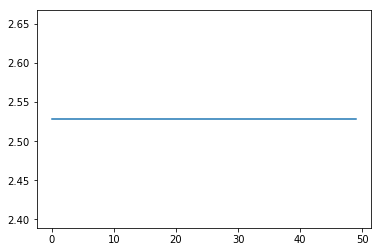

In [9]:
option2_history = option2_model.fit([Users_train, Movies_train], Ratings_train, epochs=50,
                                    verbose=1, batch_size=32,
                                    validation_data=([Users_test, Movies_test], Ratings_test))


# plot metrics
plt.plot(option2_history.history['mean_absolute_error'])
plt.show()


In [14]:

option3 = {
    'activation': 'relu',
    'loss': 'binary_crossentropy',
    'optimizer': Adamax(),
    'number_of_layers': 2
}

option3_model = get_ncf_model(max_user_id_train,max_movie_id_train, K_LATENT,
                              HIDDEN_DIM, DROPOUT, option3['activation'], option3['number_of_layers'])
option3_model.compile(loss=option3['loss'], optimizer=option3['optimizer'], metrics=['mae'])
print(option3_model.summary())

ncf model
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 20)        18860       user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 20)        33640       item_input[0][0]                 
__________________________________________________________________________________________________


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("pr...)`


Train on 80000 samples, validate on 20000 samples
Epoch 1/50


   32/80000 [..............................] - ETA: 15:35 - loss: 20.0007 - mean_absolute_error: 3.4517

  800/80000 [..............................] - ETA: 42s - loss: 10.4608 - mean_absolute_error: 3.4463  

 1792/80000 [..............................] - ETA: 20s - loss: 7.9319 - mean_absolute_error: 3.3762 

 2880/80000 [>.............................] - ETA: 14s - loss: 6.1460 - mean_absolute_error: 3.3237

 3968/80000 [>.............................] - ETA: 11s - loss: 3.8218 - mean_absolute_error: 3.2150

 5088/80000 [>.............................] - ETA: 9s - loss: 0.0993 - mean_absolute_error: 3.1001 

 6144/80000 [=>............................] - ETA: 8s - loss: -3.5075 - mean_absolute_error: 3.0167

 7264/80000 [=>............................] - ETA: 7s - loss: -6.4080 - mean_absolute_error: 2.9350

 8256/80000 [==>...........................] - ETA: 6s - loss: -8.9592 - mean_absolute_error: 2.8781

 9248/80000 [==>...........................] - ETA: 6s - loss: -10.9250 - mean_absolute_error: 2.8255

10272/80000 [==>...........................] - ETA: 5s - loss: -12.7144 - mean_absolute_error: 2.7783

11360/80000 [===>..........................] - ETA: 5s - loss: -14.4000 - mean_absolute_error: 2.7380

12512/80000 [===>..........................] - ETA: 5s - loss: -15.8823 - mean_absolute_error: 2.6958

13568/80000 [====>.........................] - ETA: 5s - loss: -16.9608 - mean_absolute_error: 2.6673

14656/80000 [====>.........................] - ETA: 4s - loss: -18.0395 - mean_absolute_error: 2.6359

15776/80000 [====>.........................] - ETA: 4s - loss: -19.0809 - mean_absolute_error: 2.6068

16928/80000 [=====>........................] - ETA: 4s - loss: -19.9814 - mean_absolute_error: 2.5799

18080/80000 [=====>........................] - ETA: 4s - loss: -20.7724 - mean_absolute_error: 2.5592

19200/80000 [======>.......................] - ETA: 4s - loss: -21.4665 - mean_absolute_error: 2.5376

20288/80000 [======>.......................] - ETA: 3s - loss: -22.1097 - mean_absolute_error: 2.5190

21440/80000 [=======>......................] - ETA: 3s - loss: -22.7754 - mean_absolute_error: 2.5009

22560/80000 [=======>......................] - ETA: 3s - loss: -23.2610 - mean_absolute_error: 2.4823

23712/80000 [=======>......................] - ETA: 3s - loss: -23.8408 - mean_absolute_error: 2.4626

24736/80000 [========>.....................] - ETA: 3s - loss: -24.3160 - mean_absolute_error: 2.4477

25952/80000 [========>.....................] - ETA: 3s - loss: -24.8852 - mean_absolute_error: 2.4309

27200/80000 [=========>....................] - ETA: 3s - loss: -25.3707 - mean_absolute_error: 2.4105

28512/80000 [=========>....................] - ETA: 3s - loss: -25.8787 - mean_absolute_error: 2.3941

29792/80000 [==========>...................] - ETA: 2s - loss: -26.2816 - mean_absolute_error: 2.3797

31072/80000 [==========>...................] - ETA: 2s - loss: -26.6287 - mean_absolute_error: 2.3646

32416/80000 [===========>..................] - ETA: 2s - loss: -27.0172 - mean_absolute_error: 2.3498

33344/80000 [===========>..................] - ETA: 2s - loss: -27.2599 - mean_absolute_error: 2.3392

34432/80000 [===========>..................] - ETA: 2s - loss: -27.5135 - mean_absolute_error: 2.3272

35648/80000 [============>.................] - ETA: 2s - loss: -27.7943 - mean_absolute_error: 2.3158

36896/80000 [============>.................] - ETA: 2s - loss: -28.0553 - mean_absolute_error: 2.3053

38144/80000 [=============>................] - ETA: 2s - loss: -28.3213 - mean_absolute_error: 2.2955

39424/80000 [=============>................] - ETA: 2s - loss: -28.6022 - mean_absolute_error: 2.2864

40736/80000 [==============>...............] - ETA: 2s - loss: -28.8515 - mean_absolute_error: 2.2753

42048/80000 [==============>...............] - ETA: 2s - loss: -29.1345 - mean_absolute_error: 2.2664

43264/80000 [===============>..............] - ETA: 1s - loss: -29.3634 - mean_absolute_error: 2.2570

44544/80000 [===============>..............] - ETA: 1s - loss: -29.5955 - mean_absolute_error: 2.2491

45824/80000 [================>.............] - ETA: 1s - loss: -29.7784 - mean_absolute_error: 2.2410

47136/80000 [================>.............] - ETA: 1s - loss: -29.9728 - mean_absolute_error: 2.2331

48480/80000 [=================>............] - ETA: 1s - loss: -30.1867 - mean_absolute_error: 2.2265

49792/80000 [=================>............] - ETA: 1s - loss: -30.3700 - mean_absolute_error: 2.2184

51072/80000 [==================>...........] - ETA: 1s - loss: -30.5424 - mean_absolute_error: 2.2109

52320/80000 [==================>...........] - ETA: 1s - loss: -30.6710 - mean_absolute_error: 2.2028

53600/80000 [===================>..........] - ETA: 1s - loss: -30.8333 - mean_absolute_error: 2.1960

54912/80000 [===================>..........] - ETA: 1s - loss: -30.9903 - mean_absolute_error: 2.1877

56224/80000 [====================>.........] - ETA: 1s - loss: -31.1414 - mean_absolute_error: 2.1814

57536/80000 [====================>.........] - ETA: 1s - loss: -31.2754 - mean_absolute_error: 2.1735

58848/80000 [=====================>........] - ETA: 1s - loss: -31.4011 - mean_absolute_error: 2.1665

60160/80000 [=====================>........] - ETA: 0s - loss: -31.5229 - mean_absolute_error: 2.1600

61472/80000 [======================>.......] - ETA: 0s - loss: -31.6511 - mean_absolute_error: 2.1542

62656/80000 [======================>.......] - ETA: 0s - loss: -31.7680 - mean_absolute_error: 2.1477

63872/80000 [======================>.......] - ETA: 0s - loss: -31.8873 - mean_absolute_error: 2.1421

65120/80000 [=======================>......] - ETA: 0s - loss: -31.9826 - mean_absolute_error: 2.1350

66400/80000 [=======================>......] - ETA: 0s - loss: -32.0886 - mean_absolute_error: 2.1293

67712/80000 [========================>.....] - ETA: 0s - loss: -32.1849 - mean_absolute_error: 2.1239

68992/80000 [========================>.....] - ETA: 0s - loss: -32.2743 - mean_absolute_error: 2.1175

70304/80000 [=========================>....] - ETA: 0s - loss: -32.3816 - mean_absolute_error: 2.1119

71648/80000 [=========================>....] - ETA: 0s - loss: -32.5054 - mean_absolute_error: 2.1061

72960/80000 [==========================>...] - ETA: 0s - loss: -32.6136 - mean_absolute_error: 2.1006

74272/80000 [==========================>...] - ETA: 0s - loss: -32.6991 - mean_absolute_error: 2.0940

75552/80000 [===========================>..] - ETA: 0s - loss: -32.8042 - mean_absolute_error: 2.0886

76800/80000 [===========================>..] - ETA: 0s - loss: -32.8929 - mean_absolute_error: 2.0838

78080/80000 [============================>.] - ETA: 0s - loss: -32.9733 - mean_absolute_error: 2.0788

79360/80000 [============================>.] - ETA: 0s - loss: -33.0646 - mean_absolute_error: 2.0733

80000/80000 [==============================] - 4s 50us/step - loss: -33.1193 - mean_absolute_error: 2.0711 - val_loss: -40.4283 - val_mean_absolute_error: 1.7542


Epoch 2/50
   32/80000 [..............................] - ETA: 10s - loss: -43.5321 - mean_absolute_error: 1.9072

  960/80000 [..............................] - ETA: 4s - loss: -37.6925 - mean_absolute_error: 1.7414 

 1824/80000 [..............................] - ETA: 4s - loss: -37.7401 - mean_absolute_error: 1.7567

 2912/80000 [>.............................] - ETA: 4s - loss: -38.1887 - mean_absolute_error: 1.7328

 4128/80000 [>.............................] - ETA: 3s - loss: -38.3893 - mean_absolute_error: 1.7281

 5376/80000 [=>............................] - ETA: 3s - loss: -38.3274 - mean_absolute_error: 1.7097

 6624/80000 [=>............................] - ETA: 3s - loss: -38.4663 - mean_absolute_error: 1.7055

 7936/80000 [=>............................] - ETA: 3s - loss: -38.4757 - mean_absolute_error: 1.6964

 9280/80000 [==>...........................] - ETA: 3s - loss: -38.6240 - mean_absolute_error: 1.6958

10528/80000 [==>...........................] - ETA: 3s - loss: -38.7208 - mean_absolute_error: 1.6942

11808/80000 [===>..........................] - ETA: 2s - loss: -38.7326 - mean_absolute_error: 1.6893

13120/80000 [===>..........................] - ETA: 2s - loss: -38.7607 - mean_absolute_error: 1.6855

14304/80000 [====>.........................] - ETA: 2s - loss: -38.7795 - mean_absolute_error: 1.6793

15584/80000 [====>.........................] - ETA: 2s - loss: -38.7582 - mean_absolute_error: 1.6744

16864/80000 [=====>........................] - ETA: 2s - loss: -38.7546 - mean_absolute_error: 1.6708

18144/80000 [=====>........................] - ETA: 2s - loss: -38.7004 - mean_absolute_error: 1.6642

19456/80000 [======>.......................] - ETA: 2s - loss: -38.6621 - mean_absolute_error: 1.6602

20768/80000 [======>.......................] - ETA: 2s - loss: -38.7082 - mean_absolute_error: 1.6573

22080/80000 [=======>......................] - ETA: 2s - loss: -38.7470 - mean_absolute_error: 1.6546

23392/80000 [=======>......................] - ETA: 2s - loss: -38.7883 - mean_absolute_error: 1.6526

24608/80000 [========>.....................] - ETA: 2s - loss: -38.8036 - mean_absolute_error: 1.6525

25856/80000 [========>.....................] - ETA: 2s - loss: -38.8096 - mean_absolute_error: 1.6469

27136/80000 [=========>....................] - ETA: 2s - loss: -38.8334 - mean_absolute_error: 1.6434

28416/80000 [=========>....................] - ETA: 2s - loss: -38.8343 - mean_absolute_error: 1.6407

29696/80000 [==========>...................] - ETA: 2s - loss: -38.8082 - mean_absolute_error: 1.6357

30912/80000 [==========>...................] - ETA: 2s - loss: -38.8628 - mean_absolute_error: 1.6338

32160/80000 [===========>..................] - ETA: 1s - loss: -38.8971 - mean_absolute_error: 1.6311

33440/80000 [===========>..................] - ETA: 1s - loss: -38.9266 - mean_absolute_error: 1.6284

34752/80000 [============>.................] - ETA: 1s - loss: -38.9390 - mean_absolute_error: 1.6250

36096/80000 [============>.................] - ETA: 1s - loss: -38.9587 - mean_absolute_error: 1.6209

37440/80000 [=============>................] - ETA: 1s - loss: -39.0048 - mean_absolute_error: 1.6175

38720/80000 [=============>................] - ETA: 1s - loss: -39.0105 - mean_absolute_error: 1.6137

39904/80000 [=============>................] - ETA: 1s - loss: -38.9961 - mean_absolute_error: 1.6095

41216/80000 [==============>...............] - ETA: 1s - loss: -38.9995 - mean_absolute_error: 1.6049

42528/80000 [==============>...............] - ETA: 1s - loss: -39.0254 - mean_absolute_error: 1.6008

43776/80000 [===============>..............] - ETA: 1s - loss: -39.0344 - mean_absolute_error: 1.5973

45056/80000 [===============>..............] - ETA: 1s - loss: -39.0336 - mean_absolute_error: 1.5932

46368/80000 [================>.............] - ETA: 1s - loss: -39.0389 - mean_absolute_error: 1.5894

47680/80000 [================>.............] - ETA: 1s - loss: -39.0559 - mean_absolute_error: 1.5860

48992/80000 [=================>............] - ETA: 1s - loss: -39.0750 - mean_absolute_error: 1.5824

50272/80000 [=================>............] - ETA: 1s - loss: -39.0810 - mean_absolute_error: 1.5785

51552/80000 [==================>...........] - ETA: 1s - loss: -39.0972 - mean_absolute_error: 1.5741

52832/80000 [==================>...........] - ETA: 1s - loss: -39.1125 - mean_absolute_error: 1.5705

54144/80000 [===================>..........] - ETA: 1s - loss: -39.1292 - mean_absolute_error: 1.5676

55456/80000 [===================>..........] - ETA: 0s - loss: -39.1380 - mean_absolute_error: 1.5641

56768/80000 [====================>.........] - ETA: 0s - loss: -39.1544 - mean_absolute_error: 1.5602

58016/80000 [====================>.........] - ETA: 0s - loss: -39.1525 - mean_absolute_error: 1.5573

59296/80000 [=====================>........] - ETA: 0s - loss: -39.1530 - mean_absolute_error: 1.5534

60608/80000 [=====================>........] - ETA: 0s - loss: -39.1475 - mean_absolute_error: 1.5487

61920/80000 [======================>.......] - ETA: 0s - loss: -39.1706 - mean_absolute_error: 1.5462

63264/80000 [======================>.......] - ETA: 0s - loss: -39.1705 - mean_absolute_error: 1.5420

64544/80000 [=======================>......] - ETA: 0s - loss: -39.1767 - mean_absolute_error: 1.5380

65792/80000 [=======================>......] - ETA: 0s - loss: -39.1779 - mean_absolute_error: 1.5345

67104/80000 [========================>.....] - ETA: 0s - loss: -39.1906 - mean_absolute_error: 1.5302

68256/80000 [========================>.....] - ETA: 0s - loss: -39.2059 - mean_absolute_error: 1.5268

69440/80000 [=========================>....] - ETA: 0s - loss: -39.2321 - mean_absolute_error: 1.5244

70688/80000 [=========================>....] - ETA: 0s - loss: -39.2511 - mean_absolute_error: 1.5209

71936/80000 [=========================>....] - ETA: 0s - loss: -39.2641 - mean_absolute_error: 1.5178

73216/80000 [==========================>...] - ETA: 0s - loss: -39.2769 - mean_absolute_error: 1.5145

74528/80000 [==========================>...] - ETA: 0s - loss: -39.2844 - mean_absolute_error: 1.5110

75840/80000 [===========================>..] - ETA: 0s - loss: -39.2963 - mean_absolute_error: 1.5081

77120/80000 [===========================>..] - ETA: 0s - loss: -39.3148 - mean_absolute_error: 1.5056

78368/80000 [============================>.] - ETA: 0s - loss: -39.3187 - mean_absolute_error: 1.5022

79680/80000 [============================>.] - ETA: 0s - loss: -39.3263 - mean_absolute_error: 1.4988

80000/80000 [==============================] - 3s 42us/step - loss: -39.3327 - mean_absolute_error: 1.4979 - val_loss: -40.4283 - val_mean_absolute_error: 1.2217


Epoch 3/50
   32/80000 [..............................] - ETA: 9s - loss: -35.3722 - mean_absolute_error: 1.5283

 1024/80000 [..............................] - ETA: 4s - loss: -39.9687 - mean_absolute_error: 1.3316

 1792/80000 [..............................] - ETA: 4s - loss: -39.8634 - mean_absolute_error: 1.3022

 2848/80000 [>.............................] - ETA: 4s - loss: -39.5268 - mean_absolute_error: 1.2944

 4000/80000 [>.............................] - ETA: 3s - loss: -39.4089 - mean_absolute_error: 1.2902

 5280/80000 [>.............................] - ETA: 3s - loss: -39.4639 - mean_absolute_error: 1.2793

 6560/80000 [=>............................] - ETA: 3s - loss: -39.4906 - mean_absolute_error: 1.2795

 7872/80000 [=>............................] - ETA: 3s - loss: -39.6197 - mean_absolute_error: 1.2789

 9152/80000 [==>...........................] - ETA: 3s - loss: -39.6890 - mean_absolute_error: 1.2713

10432/80000 [==>...........................] - ETA: 3s - loss: -39.7926 - mean_absolute_error: 1.2692

11680/80000 [===>..........................] - ETA: 2s - loss: -39.8079 - mean_absolute_error: 1.2610

12960/80000 [===>..........................] - ETA: 2s - loss: -39.8652 - mean_absolute_error: 1.2621

14272/80000 [====>.........................] - ETA: 2s - loss: -39.9012 - mean_absolute_error: 1.2608

15552/80000 [====>.........................] - ETA: 2s - loss: -39.9432 - mean_absolute_error: 1.2564

16864/80000 [=====>........................] - ETA: 2s - loss: -39.9511 - mean_absolute_error: 1.2592

18144/80000 [=====>........................] - ETA: 2s - loss: -39.9811 - mean_absolute_error: 1.2581

19424/80000 [======>.......................] - ETA: 2s - loss: -39.9836 - mean_absolute_error: 1.2550

20704/80000 [======>.......................] - ETA: 2s - loss: -39.9513 - mean_absolute_error: 1.2537

21984/80000 [=======>......................] - ETA: 2s - loss: -39.9957 - mean_absolute_error: 1.2505

23296/80000 [=======>......................] - ETA: 2s - loss: -39.9462 - mean_absolute_error: 1.2484

24576/80000 [========>.....................] - ETA: 2s - loss: -39.9517 - mean_absolute_error: 1.2479

25856/80000 [========>.....................] - ETA: 2s - loss: -39.9528 - mean_absolute_error: 1.2455

27136/80000 [=========>....................] - ETA: 2s - loss: -39.9773 - mean_absolute_error: 1.2457

28416/80000 [=========>....................] - ETA: 2s - loss: -39.9854 - mean_absolute_error: 1.2437

29632/80000 [==========>...................] - ETA: 2s - loss: -40.0077 - mean_absolute_error: 1.2420

30880/80000 [==========>...................] - ETA: 2s - loss: -40.0016 - mean_absolute_error: 1.2406

32160/80000 [===========>..................] - ETA: 1s - loss: -40.0062 - mean_absolute_error: 1.2389

33472/80000 [===========>..................] - ETA: 1s - loss: -40.0529 - mean_absolute_error: 1.2363

34752/80000 [============>.................] - ETA: 1s - loss: -40.0755 - mean_absolute_error: 1.2370

36000/80000 [============>.................] - ETA: 1s - loss: -40.0868 - mean_absolute_error: 1.2358

37280/80000 [============>.................] - ETA: 1s - loss: -40.0855 - mean_absolute_error: 1.2347

38528/80000 [=============>................] - ETA: 1s - loss: -40.0976 - mean_absolute_error: 1.2341

39808/80000 [=============>................] - ETA: 1s - loss: -40.0856 - mean_absolute_error: 1.2331

41088/80000 [==============>...............] - ETA: 1s - loss: -40.0741 - mean_absolute_error: 1.2311

42368/80000 [==============>...............] - ETA: 1s - loss: -40.0925 - mean_absolute_error: 1.2307

43680/80000 [===============>..............] - ETA: 1s - loss: -40.0782 - mean_absolute_error: 1.2302

44992/80000 [===============>..............] - ETA: 1s - loss: -40.0655 - mean_absolute_error: 1.2292

46304/80000 [================>.............] - ETA: 1s - loss: -40.0793 - mean_absolute_error: 1.2291

47520/80000 [================>.............] - ETA: 1s - loss: -40.0511 - mean_absolute_error: 1.2285

48832/80000 [=================>............] - ETA: 1s - loss: -40.0347 - mean_absolute_error: 1.2274

50144/80000 [=================>............] - ETA: 1s - loss: -40.0239 - mean_absolute_error: 1.2276

51424/80000 [==================>...........] - ETA: 1s - loss: -40.0309 - mean_absolute_error: 1.2270

52704/80000 [==================>...........] - ETA: 1s - loss: -40.0514 - mean_absolute_error: 1.2271

54016/80000 [===================>..........] - ETA: 1s - loss: -40.0614 - mean_absolute_error: 1.2257

55200/80000 [===================>..........] - ETA: 1s - loss: -40.0640 - mean_absolute_error: 1.2243

56480/80000 [====================>.........] - ETA: 0s - loss: -40.0875 - mean_absolute_error: 1.2232

57792/80000 [====================>.........] - ETA: 0s - loss: -40.0893 - mean_absolute_error: 1.2219

59040/80000 [=====================>........] - ETA: 0s - loss: -40.1096 - mean_absolute_error: 1.2207

60320/80000 [=====================>........] - ETA: 0s - loss: -40.0938 - mean_absolute_error: 1.2204

61632/80000 [======================>.......] - ETA: 0s - loss: -40.1101 - mean_absolute_error: 1.2196

62912/80000 [======================>.......] - ETA: 0s - loss: -40.1102 - mean_absolute_error: 1.2193

64192/80000 [=======================>......] - ETA: 0s - loss: -40.1116 - mean_absolute_error: 1.2182

65440/80000 [=======================>......] - ETA: 0s - loss: -40.1183 - mean_absolute_error: 1.2165

66720/80000 [========================>.....] - ETA: 0s - loss: -40.1217 - mean_absolute_error: 1.2159

68000/80000 [========================>.....] - ETA: 0s - loss: -40.1273 - mean_absolute_error: 1.2162

69312/80000 [========================>.....] - ETA: 0s - loss: -40.1137 - mean_absolute_error: 1.2151

70592/80000 [=========================>....] - ETA: 0s - loss: -40.0953 - mean_absolute_error: 1.2145

71872/80000 [=========================>....] - ETA: 0s - loss: -40.1047 - mean_absolute_error: 1.2144

73120/80000 [==========================>...] - ETA: 0s - loss: -40.1049 - mean_absolute_error: 1.2144

74400/80000 [==========================>...] - ETA: 0s - loss: -40.0976 - mean_absolute_error: 1.2132

75712/80000 [===========================>..] - ETA: 0s - loss: -40.1046 - mean_absolute_error: 1.2130

77024/80000 [===========================>..] - ETA: 0s - loss: -40.0959 - mean_absolute_error: 1.2132

78208/80000 [============================>.] - ETA: 0s - loss: -40.0975 - mean_absolute_error: 1.2133

79392/80000 [============================>.] - ETA: 0s - loss: -40.1073 - mean_absolute_error: 1.2138

80000/80000 [==============================] - 3s 43us/step - loss: -40.1001 - mean_absolute_error: 1.2135 - val_loss: -40.4283 - val_mean_absolute_error: 0.9595


Epoch 4/50
   32/80000 [..............................] - ETA: 9s - loss: -37.3650 - mean_absolute_error: 1.1565

  992/80000 [..............................] - ETA: 4s - loss: -40.4616 - mean_absolute_error: 1.1945

 1856/80000 [..............................] - ETA: 4s - loss: -40.7430 - mean_absolute_error: 1.1794

 3008/80000 [>.............................] - ETA: 3s - loss: -40.6496 - mean_absolute_error: 1.1831

 4224/80000 [>.............................] - ETA: 3s - loss: -40.6850 - mean_absolute_error: 1.1931

 5504/80000 [=>............................] - ETA: 3s - loss: -40.4331 - mean_absolute_error: 1.2032

 6752/80000 [=>............................] - ETA: 3s - loss: -40.4100 - mean_absolute_error: 1.2040

 8000/80000 [==>...........................] - ETA: 3s - loss: -40.4374 - mean_absolute_error: 1.2076

 9280/80000 [==>...........................] - ETA: 3s - loss: -40.2776 - mean_absolute_error: 1.2077

10496/80000 [==>...........................] - ETA: 3s - loss: -40.1913 - mean_absolute_error: 1.2138

11744/80000 [===>..........................] - ETA: 2s - loss: -40.2096 - mean_absolute_error: 1.2118

13024/80000 [===>..........................] - ETA: 2s - loss: -40.2311 - mean_absolute_error: 1.2124

14336/80000 [====>.........................] - ETA: 2s - loss: -40.2736 - mean_absolute_error: 1.2110

15616/80000 [====>.........................] - ETA: 2s - loss: -40.2779 - mean_absolute_error: 1.2143

16896/80000 [=====>........................] - ETA: 2s - loss: -40.2297 - mean_absolute_error: 1.2169

18176/80000 [=====>........................] - ETA: 2s - loss: -40.2044 - mean_absolute_error: 1.2163

19360/80000 [======>.......................] - ETA: 2s - loss: -40.1546 - mean_absolute_error: 1.2145

20608/80000 [======>.......................] - ETA: 2s - loss: -40.2131 - mean_absolute_error: 1.2152

21888/80000 [=======>......................] - ETA: 2s - loss: -40.1996 - mean_absolute_error: 1.2154

23200/80000 [=======>......................] - ETA: 2s - loss: -40.2035 - mean_absolute_error: 1.2140

24512/80000 [========>.....................] - ETA: 2s - loss: -40.2442 - mean_absolute_error: 1.2145

25824/80000 [========>.....................] - ETA: 2s - loss: -40.2022 - mean_absolute_error: 1.2141

27104/80000 [=========>....................] - ETA: 2s - loss: -40.1823 - mean_absolute_error: 1.2132

28384/80000 [=========>....................] - ETA: 2s - loss: -40.1690 - mean_absolute_error: 1.2123

29664/80000 [==========>...................] - ETA: 2s - loss: -40.2016 - mean_absolute_error: 1.2118

30944/80000 [==========>...................] - ETA: 2s - loss: -40.1844 - mean_absolute_error: 1.2139

32192/80000 [===========>..................] - ETA: 1s - loss: -40.1879 - mean_absolute_error: 1.2146

33440/80000 [===========>..................] - ETA: 1s - loss: -40.2052 - mean_absolute_error: 1.2156

34720/80000 [============>.................] - ETA: 1s - loss: -40.2080 - mean_absolute_error: 1.2157

35968/80000 [============>.................] - ETA: 1s - loss: -40.2157 - mean_absolute_error: 1.2176

37248/80000 [============>.................] - ETA: 1s - loss: -40.2485 - mean_absolute_error: 1.2181

38272/80000 [=============>................] - ETA: 1s - loss: -40.2526 - mean_absolute_error: 1.2182

39520/80000 [=============>................] - ETA: 1s - loss: -40.2771 - mean_absolute_error: 1.2181

40800/80000 [==============>...............] - ETA: 1s - loss: -40.2492 - mean_absolute_error: 1.2202

42112/80000 [==============>...............] - ETA: 1s - loss: -40.2651 - mean_absolute_error: 1.2190

43424/80000 [===============>..............] - ETA: 1s - loss: -40.2482 - mean_absolute_error: 1.2197

44672/80000 [===============>..............] - ETA: 1s - loss: -40.2286 - mean_absolute_error: 1.2198

45920/80000 [================>.............] - ETA: 1s - loss: -40.2234 - mean_absolute_error: 1.2191

47200/80000 [================>.............] - ETA: 1s - loss: -40.2384 - mean_absolute_error: 1.2195

48416/80000 [=================>............] - ETA: 1s - loss: -40.2574 - mean_absolute_error: 1.2192

49664/80000 [=================>............] - ETA: 1s - loss: -40.2547 - mean_absolute_error: 1.2197

50976/80000 [==================>...........] - ETA: 1s - loss: -40.2397 - mean_absolute_error: 1.2196

52256/80000 [==================>...........] - ETA: 1s - loss: -40.2320 - mean_absolute_error: 1.2190

53536/80000 [===================>..........] - ETA: 1s - loss: -40.2403 - mean_absolute_error: 1.2196

54848/80000 [===================>..........] - ETA: 1s - loss: -40.2207 - mean_absolute_error: 1.2206

56096/80000 [====================>.........] - ETA: 0s - loss: -40.2204 - mean_absolute_error: 1.2225

57344/80000 [====================>.........] - ETA: 0s - loss: -40.2260 - mean_absolute_error: 1.2230

58624/80000 [====================>.........] - ETA: 0s - loss: -40.2342 - mean_absolute_error: 1.2232

59904/80000 [=====================>........] - ETA: 0s - loss: -40.2359 - mean_absolute_error: 1.2241

61184/80000 [=====================>........] - ETA: 0s - loss: -40.2414 - mean_absolute_error: 1.2246

62464/80000 [======================>.......] - ETA: 0s - loss: -40.2465 - mean_absolute_error: 1.2257

63744/80000 [======================>.......] - ETA: 0s - loss: -40.2462 - mean_absolute_error: 1.2263

65056/80000 [=======================>......] - ETA: 0s - loss: -40.2458 - mean_absolute_error: 1.2266

66336/80000 [=======================>......] - ETA: 0s - loss: -40.2458 - mean_absolute_error: 1.2273

67584/80000 [========================>.....] - ETA: 0s - loss: -40.2499 - mean_absolute_error: 1.2285

68832/80000 [========================>.....] - ETA: 0s - loss: -40.2374 - mean_absolute_error: 1.2292

70080/80000 [=========================>....] - ETA: 0s - loss: -40.2354 - mean_absolute_error: 1.2301

71360/80000 [=========================>....] - ETA: 0s - loss: -40.2240 - mean_absolute_error: 1.2314

72576/80000 [==========================>...] - ETA: 0s - loss: -40.2214 - mean_absolute_error: 1.2320

73824/80000 [==========================>...] - ETA: 0s - loss: -40.2303 - mean_absolute_error: 1.2322

75072/80000 [===========================>..] - ETA: 0s - loss: -40.2286 - mean_absolute_error: 1.2336

76320/80000 [===========================>..] - ETA: 0s - loss: -40.2229 - mean_absolute_error: 1.2344

77600/80000 [============================>.] - ETA: 0s - loss: -40.2239 - mean_absolute_error: 1.2354

78912/80000 [============================>.] - ETA: 0s - loss: -40.2033 - mean_absolute_error: 1.2361

80000/80000 [==============================] - 3s 43us/step - loss: -40.1970 - mean_absolute_error: 1.2362 - val_loss: -40.4283 - val_mean_absolute_error: 0.9520


Epoch 5/50
   32/80000 [..............................] - ETA: 9s - loss: -45.8344 - mean_absolute_error: 1.1000

  896/80000 [..............................] - ETA: 4s - loss: -40.1961 - mean_absolute_error: 1.2517

 1760/80000 [..............................] - ETA: 4s - loss: -40.3181 - mean_absolute_error: 1.2815

 2912/80000 [>.............................] - ETA: 4s - loss: -40.1418 - mean_absolute_error: 1.3029

 4160/80000 [>.............................] - ETA: 3s - loss: -40.1781 - mean_absolute_error: 1.3073

 5408/80000 [=>............................] - ETA: 3s - loss: -40.1696 - mean_absolute_error: 1.3042

 6528/80000 [=>............................] - ETA: 3s - loss: -40.2897 - mean_absolute_error: 1.2977

 7776/80000 [=>............................] - ETA: 3s - loss: -40.2566 - mean_absolute_error: 1.2895

 8992/80000 [==>...........................] - ETA: 3s - loss: -40.2549 - mean_absolute_error: 1.2909

10240/80000 [==>...........................] - ETA: 3s - loss: -40.3428 - mean_absolute_error: 1.2895

11520/80000 [===>..........................] - ETA: 3s - loss: -40.3423 - mean_absolute_error: 1.2894

12768/80000 [===>..........................] - ETA: 2s - loss: -40.4353 - mean_absolute_error: 1.2910

14016/80000 [====>.........................] - ETA: 2s - loss: -40.3904 - mean_absolute_error: 1.2911

15264/80000 [====>.........................] - ETA: 2s - loss: -40.3596 - mean_absolute_error: 1.2946

16576/80000 [=====>........................] - ETA: 2s - loss: -40.3384 - mean_absolute_error: 1.2935

17856/80000 [=====>........................] - ETA: 2s - loss: -40.3502 - mean_absolute_error: 1.2948

19136/80000 [======>.......................] - ETA: 2s - loss: -40.3640 - mean_absolute_error: 1.2959

20384/80000 [======>.......................] - ETA: 2s - loss: -40.3457 - mean_absolute_error: 1.2947

21664/80000 [=======>......................] - ETA: 2s - loss: -40.3573 - mean_absolute_error: 1.2972

22912/80000 [=======>......................] - ETA: 2s - loss: -40.3431 - mean_absolute_error: 1.2986

24192/80000 [========>.....................] - ETA: 2s - loss: -40.3255 - mean_absolute_error: 1.3004

25440/80000 [========>.....................] - ETA: 2s - loss: -40.3148 - mean_absolute_error: 1.3041

26656/80000 [========>.....................] - ETA: 2s - loss: -40.3108 - mean_absolute_error: 1.3060

27904/80000 [=========>....................] - ETA: 2s - loss: -40.3223 - mean_absolute_error: 1.3073

29120/80000 [=========>....................] - ETA: 2s - loss: -40.3254 - mean_absolute_error: 1.3086

30400/80000 [==========>...................] - ETA: 2s - loss: -40.2907 - mean_absolute_error: 1.3122

31712/80000 [==========>...................] - ETA: 2s - loss: -40.3046 - mean_absolute_error: 1.3127

32992/80000 [===========>..................] - ETA: 1s - loss: -40.2950 - mean_absolute_error: 1.3143

34240/80000 [===========>..................] - ETA: 1s - loss: -40.2815 - mean_absolute_error: 1.3151

35520/80000 [============>.................] - ETA: 1s - loss: -40.2987 - mean_absolute_error: 1.3162

36736/80000 [============>.................] - ETA: 1s - loss: -40.3213 - mean_absolute_error: 1.3174

38016/80000 [=============>................] - ETA: 1s - loss: -40.3235 - mean_absolute_error: 1.3177

39264/80000 [=============>................] - ETA: 1s - loss: -40.3068 - mean_absolute_error: 1.3195

40544/80000 [==============>...............] - ETA: 1s - loss: -40.2879 - mean_absolute_error: 1.3231

41728/80000 [==============>...............] - ETA: 1s - loss: -40.2955 - mean_absolute_error: 1.3256

42816/80000 [===============>..............] - ETA: 1s - loss: -40.2909 - mean_absolute_error: 1.3284

43904/80000 [===============>..............] - ETA: 1s - loss: -40.3096 - mean_absolute_error: 1.3297

45088/80000 [===============>..............] - ETA: 1s - loss: -40.3035 - mean_absolute_error: 1.3315

46272/80000 [================>.............] - ETA: 1s - loss: -40.3010 - mean_absolute_error: 1.3335

47520/80000 [================>.............] - ETA: 1s - loss: -40.3024 - mean_absolute_error: 1.3358

48768/80000 [=================>............] - ETA: 1s - loss: -40.2880 - mean_absolute_error: 1.3391

50016/80000 [=================>............] - ETA: 1s - loss: -40.2964 - mean_absolute_error: 1.3415

51264/80000 [==================>...........] - ETA: 1s - loss: -40.2841 - mean_absolute_error: 1.3430

52512/80000 [==================>...........] - ETA: 1s - loss: -40.2852 - mean_absolute_error: 1.3452

53792/80000 [===================>..........] - ETA: 1s - loss: -40.2826 - mean_absolute_error: 1.3477

55104/80000 [===================>..........] - ETA: 1s - loss: -40.2855 - mean_absolute_error: 1.3507

56320/80000 [====================>.........] - ETA: 0s - loss: -40.2748 - mean_absolute_error: 1.3521

57536/80000 [====================>.........] - ETA: 0s - loss: -40.2819 - mean_absolute_error: 1.3532

58784/80000 [=====================>........] - ETA: 0s - loss: -40.2622 - mean_absolute_error: 1.3564

60064/80000 [=====================>........] - ETA: 0s - loss: -40.2785 - mean_absolute_error: 1.3575

61312/80000 [=====================>........] - ETA: 0s - loss: -40.2734 - mean_absolute_error: 1.3598

62592/80000 [======================>.......] - ETA: 0s - loss: -40.2596 - mean_absolute_error: 1.3620

63872/80000 [======================>.......] - ETA: 0s - loss: -40.2500 - mean_absolute_error: 1.3649

64672/80000 [=======================>......] - ETA: 0s - loss: -40.2454 - mean_absolute_error: 1.3668

65760/80000 [=======================>......] - ETA: 0s - loss: -40.2465 - mean_absolute_error: 1.3694

66944/80000 [========================>.....] - ETA: 0s - loss: -40.2456 - mean_absolute_error: 1.3721

68192/80000 [========================>.....] - ETA: 0s - loss: -40.2420 - mean_absolute_error: 1.3746

69440/80000 [=========================>....] - ETA: 0s - loss: -40.2385 - mean_absolute_error: 1.3769

70688/80000 [=========================>....] - ETA: 0s - loss: -40.2338 - mean_absolute_error: 1.3790

71968/80000 [=========================>....] - ETA: 0s - loss: -40.2221 - mean_absolute_error: 1.3811

73216/80000 [==========================>...] - ETA: 0s - loss: -40.2212 - mean_absolute_error: 1.3832

74496/80000 [==========================>...] - ETA: 0s - loss: -40.2176 - mean_absolute_error: 1.3860

75776/80000 [===========================>..] - ETA: 0s - loss: -40.2174 - mean_absolute_error: 1.3879

77056/80000 [===========================>..] - ETA: 0s - loss: -40.2147 - mean_absolute_error: 1.3901

78304/80000 [============================>.] - ETA: 0s - loss: -40.2240 - mean_absolute_error: 1.3922

79552/80000 [============================>.] - ETA: 0s - loss: -40.2397 - mean_absolute_error: 1.3940

80000/80000 [==============================] - 4s 44us/step - loss: -40.2419 - mean_absolute_error: 1.3944 - val_loss: -40.4283 - val_mean_absolute_error: 1.1238


Epoch 6/50
   32/80000 [..............................] - ETA: 10s - loss: -37.8632 - mean_absolute_error: 1.4141

  928/80000 [..............................] - ETA: 4s - loss: -39.1688 - mean_absolute_error: 1.5386 

 1888/80000 [..............................] - ETA: 4s - loss: -40.1039 - mean_absolute_error: 1.5344

 3072/80000 [>.............................] - ETA: 3s - loss: -40.4220 - mean_absolute_error: 1.5253

 4288/80000 [>.............................] - ETA: 3s - loss: -40.3842 - mean_absolute_error: 1.5612

 5504/80000 [=>............................] - ETA: 3s - loss: -40.2185 - mean_absolute_error: 1.5714

 6784/80000 [=>............................] - ETA: 3s - loss: -40.1039 - mean_absolute_error: 1.5812

 8032/80000 [==>...........................] - ETA: 3s - loss: -39.9893 - mean_absolute_error: 1.5912

 9248/80000 [==>...........................] - ETA: 3s - loss: -39.9943 - mean_absolute_error: 1.5937

10496/80000 [==>...........................] - ETA: 3s - loss: -40.0264 - mean_absolute_error: 1.5925

11776/80000 [===>..........................] - ETA: 2s - loss: -39.9603 - mean_absolute_error: 1.5990

13024/80000 [===>..........................] - ETA: 2s - loss: -40.0005 - mean_absolute_error: 1.5974

14272/80000 [====>.........................] - ETA: 2s - loss: -39.9834 - mean_absolute_error: 1.6019

15520/80000 [====>.........................] - ETA: 2s - loss: -40.0079 - mean_absolute_error: 1.6045

16800/80000 [=====>........................] - ETA: 2s - loss: -40.0293 - mean_absolute_error: 1.6038

18048/80000 [=====>........................] - ETA: 2s - loss: -39.9802 - mean_absolute_error: 1.6069

19296/80000 [======>.......................] - ETA: 2s - loss: -39.9821 - mean_absolute_error: 1.6080

20544/80000 [======>.......................] - ETA: 2s - loss: -40.0225 - mean_absolute_error: 1.6080

21760/80000 [=======>......................] - ETA: 2s - loss: -40.0257 - mean_absolute_error: 1.6141

23008/80000 [=======>......................] - ETA: 2s - loss: -40.0726 - mean_absolute_error: 1.6159

24192/80000 [========>.....................] - ETA: 2s - loss: -40.0758 - mean_absolute_error: 1.6175

25440/80000 [========>.....................] - ETA: 2s - loss: -40.1180 - mean_absolute_error: 1.6160

26720/80000 [=========>....................] - ETA: 2s - loss: -40.1443 - mean_absolute_error: 1.6149

27936/80000 [=========>....................] - ETA: 2s - loss: -40.1471 - mean_absolute_error: 1.6155

29184/80000 [=========>....................] - ETA: 2s - loss: -40.1605 - mean_absolute_error: 1.6169

30432/80000 [==========>...................] - ETA: 2s - loss: -40.1221 - mean_absolute_error: 1.6191

31648/80000 [==========>...................] - ETA: 2s - loss: -40.1361 - mean_absolute_error: 1.6200

32928/80000 [===========>..................] - ETA: 1s - loss: -40.1591 - mean_absolute_error: 1.6197

34176/80000 [===========>..................] - ETA: 1s - loss: -40.1646 - mean_absolute_error: 1.6220

35424/80000 [============>.................] - ETA: 1s - loss: -40.1927 - mean_absolute_error: 1.6225

36672/80000 [============>.................] - ETA: 1s - loss: -40.1865 - mean_absolute_error: 1.6227

37888/80000 [=============>................] - ETA: 1s - loss: -40.1896 - mean_absolute_error: 1.6237

39136/80000 [=============>................] - ETA: 1s - loss: -40.1901 - mean_absolute_error: 1.6249

40416/80000 [==============>...............] - ETA: 1s - loss: -40.1993 - mean_absolute_error: 1.6248

41696/80000 [==============>...............] - ETA: 1s - loss: -40.1977 - mean_absolute_error: 1.6259

42944/80000 [===============>..............] - ETA: 1s - loss: -40.2367 - mean_absolute_error: 1.6265

44096/80000 [===============>..............] - ETA: 1s - loss: -40.2488 - mean_absolute_error: 1.6284

45280/80000 [===============>..............] - ETA: 1s - loss: -40.2417 - mean_absolute_error: 1.6278

46528/80000 [================>.............] - ETA: 1s - loss: -40.2479 - mean_absolute_error: 1.6286

47776/80000 [================>.............] - ETA: 1s - loss: -40.2413 - mean_absolute_error: 1.6289

49024/80000 [=================>............] - ETA: 1s - loss: -40.2536 - mean_absolute_error: 1.6302

50304/80000 [=================>............] - ETA: 1s - loss: -40.2735 - mean_absolute_error: 1.6306

51552/80000 [==================>...........] - ETA: 1s - loss: -40.2674 - mean_absolute_error: 1.6327

52800/80000 [==================>...........] - ETA: 1s - loss: -40.2545 - mean_absolute_error: 1.6340

54048/80000 [===================>..........] - ETA: 1s - loss: -40.2548 - mean_absolute_error: 1.6342

55296/80000 [===================>..........] - ETA: 1s - loss: -40.2562 - mean_absolute_error: 1.6358

56576/80000 [====================>.........] - ETA: 0s - loss: -40.2706 - mean_absolute_error: 1.6375

57824/80000 [====================>.........] - ETA: 0s - loss: -40.2808 - mean_absolute_error: 1.6387

59072/80000 [=====================>........] - ETA: 0s - loss: -40.2770 - mean_absolute_error: 1.6416

60352/80000 [=====================>........] - ETA: 0s - loss: -40.2755 - mean_absolute_error: 1.6437

61632/80000 [======================>.......] - ETA: 0s - loss: -40.2650 - mean_absolute_error: 1.6464

62848/80000 [======================>.......] - ETA: 0s - loss: -40.2685 - mean_absolute_error: 1.6472

64096/80000 [=======================>......] - ETA: 0s - loss: -40.2739 - mean_absolute_error: 1.6497

65344/80000 [=======================>......] - ETA: 0s - loss: -40.2678 - mean_absolute_error: 1.6521

66624/80000 [=======================>......] - ETA: 0s - loss: -40.2688 - mean_absolute_error: 1.6550

67872/80000 [========================>.....] - ETA: 0s - loss: -40.2729 - mean_absolute_error: 1.6570

69152/80000 [========================>.....] - ETA: 0s - loss: -40.2649 - mean_absolute_error: 1.6599

70368/80000 [=========================>....] - ETA: 0s - loss: -40.2724 - mean_absolute_error: 1.6631

71584/80000 [=========================>....] - ETA: 0s - loss: -40.2707 - mean_absolute_error: 1.6655

72832/80000 [==========================>...] - ETA: 0s - loss: -40.2815 - mean_absolute_error: 1.6683

74112/80000 [==========================>...] - ETA: 0s - loss: -40.2795 - mean_absolute_error: 1.6722

75360/80000 [===========================>..] - ETA: 0s - loss: -40.2827 - mean_absolute_error: 1.6759

76576/80000 [===========================>..] - ETA: 0s - loss: -40.2755 - mean_absolute_error: 1.6791

77824/80000 [============================>.] - ETA: 0s - loss: -40.2642 - mean_absolute_error: 1.6832

79104/80000 [============================>.] - ETA: 0s - loss: -40.2677 - mean_absolute_error: 1.6873

80000/80000 [==============================] - 3s 43us/step - loss: -40.2683 - mean_absolute_error: 1.6898 - val_loss: -40.4283 - val_mean_absolute_error: 1.5089


Epoch 7/50
   32/80000 [..............................] - ETA: 10s - loss: -43.8416 - mean_absolute_error: 1.7760

  960/80000 [..............................] - ETA: 4s - loss: -40.8277 - mean_absolute_error: 1.8780 

 1824/80000 [..............................] - ETA: 4s - loss: -40.5984 - mean_absolute_error: 1.9030

 2848/80000 [>.............................] - ETA: 4s - loss: -40.2765 - mean_absolute_error: 1.9149

 4032/80000 [>.............................] - ETA: 3s - loss: -40.4812 - mean_absolute_error: 1.9208

 5248/80000 [>.............................] - ETA: 3s - loss: -40.5357 - mean_absolute_error: 1.9225

 6496/80000 [=>............................] - ETA: 3s - loss: -40.6222 - mean_absolute_error: 1.9429

 7744/80000 [=>............................] - ETA: 3s - loss: -40.3759 - mean_absolute_error: 1.9543

 8992/80000 [==>...........................] - ETA: 3s - loss: -40.3782 - mean_absolute_error: 1.9579

10240/80000 [==>...........................] - ETA: 3s - loss: -40.3032 - mean_absolute_error: 1.9648

11456/80000 [===>..........................] - ETA: 3s - loss: -40.2698 - mean_absolute_error: 1.9722

12640/80000 [===>..........................] - ETA: 2s - loss: -40.2558 - mean_absolute_error: 1.9754

13856/80000 [====>.........................] - ETA: 2s - loss: -40.3450 - mean_absolute_error: 1.9794

15104/80000 [====>.........................] - ETA: 2s - loss: -40.4377 - mean_absolute_error: 1.9780

16320/80000 [=====>........................] - ETA: 2s - loss: -40.4217 - mean_absolute_error: 1.9815

17568/80000 [=====>........................] - ETA: 2s - loss: -40.4215 - mean_absolute_error: 1.9837

18816/80000 [======>.......................] - ETA: 2s - loss: -40.3908 - mean_absolute_error: 1.9865

20064/80000 [======>.......................] - ETA: 2s - loss: -40.4052 - mean_absolute_error: 1.9889

21024/80000 [======>.......................] - ETA: 2s - loss: -40.3622 - mean_absolute_error: 1.9920

22240/80000 [=======>......................] - ETA: 2s - loss: -40.3081 - mean_absolute_error: 1.9988

23488/80000 [=======>......................] - ETA: 2s - loss: -40.3195 - mean_absolute_error: 1.9993

24480/80000 [========>.....................] - ETA: 2s - loss: -40.2942 - mean_absolute_error: 2.0034

25216/80000 [========>.....................] - ETA: 2s - loss: -40.3080 - mean_absolute_error: 2.0027

25984/80000 [========>.....................] - ETA: 2s - loss: -40.2946 - mean_absolute_error: 2.0053

26784/80000 [=========>....................] - ETA: 2s - loss: -40.2971 - mean_absolute_error: 2.0064

27904/80000 [=========>....................] - ETA: 2s - loss: -40.3041 - mean_absolute_error: 2.0080

29088/80000 [=========>....................] - ETA: 2s - loss: -40.2978 - mean_absolute_error: 2.0133

30208/80000 [==========>...................] - ETA: 2s - loss: -40.2782 - mean_absolute_error: 2.0189

31360/80000 [==========>...................] - ETA: 2s - loss: -40.2546 - mean_absolute_error: 2.0255

32576/80000 [===========>..................] - ETA: 2s - loss: -40.2555 - mean_absolute_error: 2.0290

33824/80000 [===========>..................] - ETA: 2s - loss: -40.2602 - mean_absolute_error: 2.0326

35040/80000 [============>.................] - ETA: 2s - loss: -40.2718 - mean_absolute_error: 2.0343

36288/80000 [============>.................] - ETA: 1s - loss: -40.3074 - mean_absolute_error: 2.0370

37536/80000 [=============>................] - ETA: 1s - loss: -40.2978 - mean_absolute_error: 2.0407

38784/80000 [=============>................] - ETA: 1s - loss: -40.3144 - mean_absolute_error: 2.0435

40000/80000 [==============>...............] - ETA: 1s - loss: -40.3092 - mean_absolute_error: 2.0466

41248/80000 [==============>...............] - ETA: 1s - loss: -40.3144 - mean_absolute_error: 2.0489

42496/80000 [==============>...............] - ETA: 1s - loss: -40.2845 - mean_absolute_error: 2.0551

43712/80000 [===============>..............] - ETA: 1s - loss: -40.2911 - mean_absolute_error: 2.0572

44928/80000 [===============>..............] - ETA: 1s - loss: -40.2889 - mean_absolute_error: 2.0607

46144/80000 [================>.............] - ETA: 1s - loss: -40.2850 - mean_absolute_error: 2.0652

47328/80000 [================>.............] - ETA: 1s - loss: -40.2881 - mean_absolute_error: 2.0667

48544/80000 [=================>............] - ETA: 1s - loss: -40.2678 - mean_absolute_error: 2.0720

49760/80000 [=================>............] - ETA: 1s - loss: -40.2952 - mean_absolute_error: 2.0745

50880/80000 [==================>...........] - ETA: 1s - loss: -40.2866 - mean_absolute_error: 2.0782

52032/80000 [==================>...........] - ETA: 1s - loss: -40.2744 - mean_absolute_error: 2.0835

53248/80000 [==================>...........] - ETA: 1s - loss: -40.2801 - mean_absolute_error: 2.0863

54464/80000 [===================>..........] - ETA: 1s - loss: -40.2833 - mean_absolute_error: 2.0903

55712/80000 [===================>..........] - ETA: 1s - loss: -40.2901 - mean_absolute_error: 2.0944

56928/80000 [====================>.........] - ETA: 1s - loss: -40.2929 - mean_absolute_error: 2.1002

58176/80000 [====================>.........] - ETA: 0s - loss: -40.2868 - mean_absolute_error: 2.1043

59424/80000 [=====================>........] - ETA: 0s - loss: -40.2770 - mean_absolute_error: 2.1097

60608/80000 [=====================>........] - ETA: 0s - loss: -40.2982 - mean_absolute_error: 2.1114

61824/80000 [======================>.......] - ETA: 0s - loss: -40.3005 - mean_absolute_error: 2.1161

63040/80000 [======================>.......] - ETA: 0s - loss: -40.2993 - mean_absolute_error: 2.1196

64256/80000 [=======================>......] - ETA: 0s - loss: -40.3115 - mean_absolute_error: 2.1238

65504/80000 [=======================>......] - ETA: 0s - loss: -40.3148 - mean_absolute_error: 2.1286

66752/80000 [========================>.....] - ETA: 0s - loss: -40.3052 - mean_absolute_error: 2.1348

68000/80000 [========================>.....] - ETA: 0s - loss: -40.2855 - mean_absolute_error: 2.1403

69184/80000 [========================>.....] - ETA: 0s - loss: -40.2913 - mean_absolute_error: 2.1439

70432/80000 [=========================>....] - ETA: 0s - loss: -40.3025 - mean_absolute_error: 2.1476

71680/80000 [=========================>....] - ETA: 0s - loss: -40.3045 - mean_absolute_error: 2.1515

72896/80000 [==========================>...] - ETA: 0s - loss: -40.3099 - mean_absolute_error: 2.1554

74144/80000 [==========================>...] - ETA: 0s - loss: -40.3100 - mean_absolute_error: 2.1584

75392/80000 [===========================>..] - ETA: 0s - loss: -40.2891 - mean_absolute_error: 2.1623

76640/80000 [===========================>..] - ETA: 0s - loss: -40.2861 - mean_absolute_error: 2.1656

77888/80000 [============================>.] - ETA: 0s - loss: -40.2915 - mean_absolute_error: 2.1692

79104/80000 [============================>.] - ETA: 0s - loss: -40.2794 - mean_absolute_error: 2.1730

80000/80000 [==============================] - 4s 45us/step - loss: -40.2808 - mean_absolute_error: 2.1765 - val_loss: -40.4283 - val_mean_absolute_error: 2.0098


Epoch 8/50
   32/80000 [..............................] - ETA: 9s - loss: -36.3686 - mean_absolute_error: 2.7003

  864/80000 [..............................] - ETA: 4s - loss: -40.7032 - mean_absolute_error: 2.3668

 1792/80000 [..............................] - ETA: 4s - loss: -40.5224 - mean_absolute_error: 2.3411

 2656/80000 [..............................] - ETA: 4s - loss: -40.2096 - mean_absolute_error: 2.3381

 3808/80000 [>.............................] - ETA: 4s - loss: -40.2961 - mean_absolute_error: 2.3367

 4992/80000 [>.............................] - ETA: 3s - loss: -40.4216 - mean_absolute_error: 2.3430

 6240/80000 [=>............................] - ETA: 3s - loss: -40.4311 - mean_absolute_error: 2.3671

 7456/80000 [=>............................] - ETA: 3s - loss: -40.5105 - mean_absolute_error: 2.3730

 8704/80000 [==>...........................] - ETA: 3s - loss: -40.5697 - mean_absolute_error: 2.3617

 9952/80000 [==>...........................] - ETA: 3s - loss: -40.4353 - mean_absolute_error: 2.3620

11168/80000 [===>..........................] - ETA: 3s - loss: -40.4411 - mean_absolute_error: 2.3629

12384/80000 [===>..........................] - ETA: 3s - loss: -40.3944 - mean_absolute_error: 2.3615

13600/80000 [====>.........................] - ETA: 2s - loss: -40.4033 - mean_absolute_error: 2.3690

14848/80000 [====>.........................] - ETA: 2s - loss: -40.4464 - mean_absolute_error: 2.3773

16064/80000 [=====>........................] - ETA: 2s - loss: -40.4148 - mean_absolute_error: 2.3799

17344/80000 [=====>........................] - ETA: 2s - loss: -40.4171 - mean_absolute_error: 2.3835

18528/80000 [=====>........................] - ETA: 2s - loss: -40.3864 - mean_absolute_error: 2.3872

19776/80000 [======>.......................] - ETA: 2s - loss: -40.3933 - mean_absolute_error: 2.3894

21024/80000 [======>.......................] - ETA: 2s - loss: -40.3960 - mean_absolute_error: 2.3925

22272/80000 [=======>......................] - ETA: 2s - loss: -40.4159 - mean_absolute_error: 2.3945

23520/80000 [=======>......................] - ETA: 2s - loss: -40.3869 - mean_absolute_error: 2.3999

24544/80000 [========>.....................] - ETA: 2s - loss: -40.4069 - mean_absolute_error: 2.4013

25312/80000 [========>.....................] - ETA: 2s - loss: -40.4053 - mean_absolute_error: 2.4062

26016/80000 [========>.....................] - ETA: 2s - loss: -40.3657 - mean_absolute_error: 2.4082

26752/80000 [=========>....................] - ETA: 2s - loss: -40.3737 - mean_absolute_error: 2.4099

27840/80000 [=========>....................] - ETA: 2s - loss: -40.3686 - mean_absolute_error: 2.4109

29024/80000 [=========>....................] - ETA: 2s - loss: -40.3886 - mean_absolute_error: 2.4123

30240/80000 [==========>...................] - ETA: 2s - loss: -40.4080 - mean_absolute_error: 2.4115

31488/80000 [==========>...................] - ETA: 2s - loss: -40.3961 - mean_absolute_error: 2.4128

32704/80000 [===========>..................] - ETA: 2s - loss: -40.3977 - mean_absolute_error: 2.4154

33952/80000 [===========>..................] - ETA: 2s - loss: -40.3895 - mean_absolute_error: 2.4171

35200/80000 [============>.................] - ETA: 2s - loss: -40.3645 - mean_absolute_error: 2.4215

36416/80000 [============>.................] - ETA: 1s - loss: -40.3567 - mean_absolute_error: 2.4238

37632/80000 [=============>................] - ETA: 1s - loss: -40.3431 - mean_absolute_error: 2.4254

38912/80000 [=============>................] - ETA: 1s - loss: -40.3281 - mean_absolute_error: 2.4296

40128/80000 [==============>...............] - ETA: 1s - loss: -40.3474 - mean_absolute_error: 2.4290

41344/80000 [==============>...............] - ETA: 1s - loss: -40.3352 - mean_absolute_error: 2.4299

42560/80000 [==============>...............] - ETA: 1s - loss: -40.3263 - mean_absolute_error: 2.4307

43776/80000 [===============>..............] - ETA: 1s - loss: -40.3166 - mean_absolute_error: 2.4319

45024/80000 [===============>..............] - ETA: 1s - loss: -40.3150 - mean_absolute_error: 2.4334

46272/80000 [================>.............] - ETA: 1s - loss: -40.3078 - mean_absolute_error: 2.4375

47520/80000 [================>.............] - ETA: 1s - loss: -40.3157 - mean_absolute_error: 2.4391

48736/80000 [=================>............] - ETA: 1s - loss: -40.3301 - mean_absolute_error: 2.4391

49920/80000 [=================>............] - ETA: 1s - loss: -40.3351 - mean_absolute_error: 2.4406

51168/80000 [==================>...........] - ETA: 1s - loss: -40.3247 - mean_absolute_error: 2.4430

52384/80000 [==================>...........] - ETA: 1s - loss: -40.3146 - mean_absolute_error: 2.4446

53600/80000 [===================>..........] - ETA: 1s - loss: -40.3247 - mean_absolute_error: 2.4452

54816/80000 [===================>..........] - ETA: 1s - loss: -40.3114 - mean_absolute_error: 2.4473

56064/80000 [====================>.........] - ETA: 1s - loss: -40.2967 - mean_absolute_error: 2.4492

57280/80000 [====================>.........] - ETA: 0s - loss: -40.3004 - mean_absolute_error: 2.4497

58528/80000 [====================>.........] - ETA: 0s - loss: -40.2835 - mean_absolute_error: 2.4518

59776/80000 [=====================>........] - ETA: 0s - loss: -40.2780 - mean_absolute_error: 2.4546

61024/80000 [=====================>........] - ETA: 0s - loss: -40.2995 - mean_absolute_error: 2.4558

62240/80000 [======================>.......] - ETA: 0s - loss: -40.2930 - mean_absolute_error: 2.4582

63488/80000 [======================>.......] - ETA: 0s - loss: -40.3005 - mean_absolute_error: 2.4610

64704/80000 [=======================>......] - ETA: 0s - loss: -40.2837 - mean_absolute_error: 2.4629

65888/80000 [=======================>......] - ETA: 0s - loss: -40.2857 - mean_absolute_error: 2.4635

66976/80000 [========================>.....] - ETA: 0s - loss: -40.2785 - mean_absolute_error: 2.4658

68192/80000 [========================>.....] - ETA: 0s - loss: -40.2710 - mean_absolute_error: 2.4671

69408/80000 [=========================>....] - ETA: 0s - loss: -40.2690 - mean_absolute_error: 2.4686

70656/80000 [=========================>....] - ETA: 0s - loss: -40.2793 - mean_absolute_error: 2.4695

71904/80000 [=========================>....] - ETA: 0s - loss: -40.2944 - mean_absolute_error: 2.4710

73152/80000 [==========================>...] - ETA: 0s - loss: -40.2995 - mean_absolute_error: 2.4717

74400/80000 [==========================>...] - ETA: 0s - loss: -40.3040 - mean_absolute_error: 2.4728

75616/80000 [===========================>..] - ETA: 0s - loss: -40.2908 - mean_absolute_error: 2.4739

76864/80000 [===========================>..] - ETA: 0s - loss: -40.2887 - mean_absolute_error: 2.4750

78112/80000 [============================>.] - ETA: 0s - loss: -40.2941 - mean_absolute_error: 2.4765

79328/80000 [============================>.] - ETA: 0s - loss: -40.2933 - mean_absolute_error: 2.4775

80000/80000 [==============================] - 4s 45us/step - loss: -40.2897 - mean_absolute_error: 2.4785 - val_loss: -40.4283 - val_mean_absolute_error: 2.2407


Epoch 9/50
   32/80000 [..............................] - ETA: 9s - loss: -36.3686 - mean_absolute_error: 3.3059

  928/80000 [..............................] - ETA: 4s - loss: -40.6462 - mean_absolute_error: 2.6114

 1824/80000 [..............................] - ETA: 4s - loss: -40.1318 - mean_absolute_error: 2.6245

 2720/80000 [>.............................] - ETA: 4s - loss: -40.1230 - mean_absolute_error: 2.5926

 3808/80000 [>.............................] - ETA: 4s - loss: -40.0968 - mean_absolute_error: 2.5855

 4992/80000 [>.............................] - ETA: 3s - loss: -40.2984 - mean_absolute_error: 2.5703

 6208/80000 [=>............................] - ETA: 3s - loss: -40.3801 - mean_absolute_error: 2.5734

 7456/80000 [=>............................] - ETA: 3s - loss: -40.4292 - mean_absolute_error: 2.5816

 8672/80000 [==>...........................] - ETA: 3s - loss: -40.3999 - mean_absolute_error: 2.5856

 9920/80000 [==>...........................] - ETA: 3s - loss: -40.3213 - mean_absolute_error: 2.5914

11168/80000 [===>..........................] - ETA: 3s - loss: -40.3906 - mean_absolute_error: 2.5929

12416/80000 [===>..........................] - ETA: 3s - loss: -40.3548 - mean_absolute_error: 2.5983

13664/80000 [====>.........................] - ETA: 2s - loss: -40.3414 - mean_absolute_error: 2.5979

14880/80000 [====>.........................] - ETA: 2s - loss: -40.3956 - mean_absolute_error: 2.5993

16000/80000 [=====>........................] - ETA: 2s - loss: -40.3808 - mean_absolute_error: 2.6054

17216/80000 [=====>........................] - ETA: 2s - loss: -40.3477 - mean_absolute_error: 2.6025

18400/80000 [=====>........................] - ETA: 2s - loss: -40.3922 - mean_absolute_error: 2.6078

19584/80000 [======>.......................] - ETA: 2s - loss: -40.4021 - mean_absolute_error: 2.6103

20800/80000 [======>.......................] - ETA: 2s - loss: -40.4734 - mean_absolute_error: 2.6119

22048/80000 [=======>......................] - ETA: 2s - loss: -40.4844 - mean_absolute_error: 2.6168

23232/80000 [=======>......................] - ETA: 2s - loss: -40.4649 - mean_absolute_error: 2.6238

24256/80000 [========>.....................] - ETA: 2s - loss: -40.4307 - mean_absolute_error: 2.6304

24960/80000 [========>.....................] - ETA: 2s - loss: -40.4366 - mean_absolute_error: 2.6310

25728/80000 [========>.....................] - ETA: 2s - loss: -40.4298 - mean_absolute_error: 2.6329

26624/80000 [========>.....................] - ETA: 2s - loss: -40.4392 - mean_absolute_error: 2.6361

27744/80000 [=========>....................] - ETA: 2s - loss: -40.4527 - mean_absolute_error: 2.6377

28928/80000 [=========>....................] - ETA: 2s - loss: -40.4344 - mean_absolute_error: 2.6413

30144/80000 [==========>...................] - ETA: 2s - loss: -40.4407 - mean_absolute_error: 2.6445

31392/80000 [==========>...................] - ETA: 2s - loss: -40.4580 - mean_absolute_error: 2.6493

32640/80000 [===========>..................] - ETA: 2s - loss: -40.4428 - mean_absolute_error: 2.6526

33856/80000 [===========>..................] - ETA: 2s - loss: -40.4364 - mean_absolute_error: 2.6560

35072/80000 [============>.................] - ETA: 2s - loss: -40.4358 - mean_absolute_error: 2.6629

36288/80000 [============>.................] - ETA: 1s - loss: -40.4300 - mean_absolute_error: 2.6646

37504/80000 [=============>................] - ETA: 1s - loss: -40.4143 - mean_absolute_error: 2.6685

38688/80000 [=============>................] - ETA: 1s - loss: -40.4170 - mean_absolute_error: 2.6684

39872/80000 [=============>................] - ETA: 1s - loss: -40.4055 - mean_absolute_error: 2.6715

41088/80000 [==============>...............] - ETA: 1s - loss: -40.3912 - mean_absolute_error: 2.6744

42272/80000 [==============>...............] - ETA: 1s - loss: -40.3576 - mean_absolute_error: 2.6816

43488/80000 [===============>..............] - ETA: 1s - loss: -40.3568 - mean_absolute_error: 2.6844

44704/80000 [===============>..............] - ETA: 1s - loss: -40.3489 - mean_absolute_error: 2.6880

45920/80000 [================>.............] - ETA: 1s - loss: -40.3535 - mean_absolute_error: 2.6886

47168/80000 [================>.............] - ETA: 1s - loss: -40.3488 - mean_absolute_error: 2.6911

48416/80000 [=================>............] - ETA: 1s - loss: -40.3460 - mean_absolute_error: 2.6921

49664/80000 [=================>............] - ETA: 1s - loss: -40.3192 - mean_absolute_error: 2.6947

50816/80000 [==================>...........] - ETA: 1s - loss: -40.3194 - mean_absolute_error: 2.6953

52000/80000 [==================>...........] - ETA: 1s - loss: -40.3141 - mean_absolute_error: 2.6964

53184/80000 [==================>...........] - ETA: 1s - loss: -40.3018 - mean_absolute_error: 2.6978

54400/80000 [===================>..........] - ETA: 1s - loss: -40.3091 - mean_absolute_error: 2.6976

55648/80000 [===================>..........] - ETA: 1s - loss: -40.3262 - mean_absolute_error: 2.6994

56800/80000 [====================>.........] - ETA: 1s - loss: -40.3181 - mean_absolute_error: 2.7002

58016/80000 [====================>.........] - ETA: 0s - loss: -40.3114 - mean_absolute_error: 2.7027

59232/80000 [=====================>........] - ETA: 0s - loss: -40.3239 - mean_absolute_error: 2.7021

60448/80000 [=====================>........] - ETA: 0s - loss: -40.3116 - mean_absolute_error: 2.7047

61696/80000 [======================>.......] - ETA: 0s - loss: -40.3022 - mean_absolute_error: 2.7074

62912/80000 [======================>.......] - ETA: 0s - loss: -40.3113 - mean_absolute_error: 2.7092

64128/80000 [=======================>......] - ETA: 0s - loss: -40.3190 - mean_absolute_error: 2.7090

65344/80000 [=======================>......] - ETA: 0s - loss: -40.3125 - mean_absolute_error: 2.7106

66592/80000 [=======================>......] - ETA: 0s - loss: -40.2861 - mean_absolute_error: 2.7136

67808/80000 [========================>.....] - ETA: 0s - loss: -40.2857 - mean_absolute_error: 2.7147

69056/80000 [========================>.....] - ETA: 0s - loss: -40.2747 - mean_absolute_error: 2.7165

70272/80000 [=========================>....] - ETA: 0s - loss: -40.2842 - mean_absolute_error: 2.7175

71520/80000 [=========================>....] - ETA: 0s - loss: -40.2765 - mean_absolute_error: 2.7198

72704/80000 [==========================>...] - ETA: 0s - loss: -40.2717 - mean_absolute_error: 2.7211

73952/80000 [==========================>...] - ETA: 0s - loss: -40.2877 - mean_absolute_error: 2.7221

75168/80000 [===========================>..] - ETA: 0s - loss: -40.2838 - mean_absolute_error: 2.7244

76416/80000 [===========================>..] - ETA: 0s - loss: -40.2785 - mean_absolute_error: 2.7276

77600/80000 [============================>.] - ETA: 0s - loss: -40.2689 - mean_absolute_error: 2.7297

78848/80000 [============================>.] - ETA: 0s - loss: -40.2901 - mean_absolute_error: 2.7307

80000/80000 [==============================] - 4s 46us/step - loss: -40.2942 - mean_absolute_error: 2.7316 - val_loss: -40.4283 - val_mean_absolute_error: 2.5550


Epoch 10/50
   32/80000 [..............................] - ETA: 9s - loss: -37.8632 - mean_absolute_error: 2.9986

  864/80000 [..............................] - ETA: 5s - loss: -41.3875 - mean_absolute_error: 2.8038

 1792/80000 [..............................] - ETA: 4s - loss: -40.7456 - mean_absolute_error: 2.8351

 2656/80000 [..............................] - ETA: 4s - loss: -40.3842 - mean_absolute_error: 2.8579

 3744/80000 [>.............................] - ETA: 4s - loss: -40.4521 - mean_absolute_error: 2.8563

 4896/80000 [>.............................] - ETA: 3s - loss: -40.2760 - mean_absolute_error: 2.8753

 6080/80000 [=>............................] - ETA: 3s - loss: -40.3515 - mean_absolute_error: 2.8706

 7328/80000 [=>............................] - ETA: 3s - loss: -40.2693 - mean_absolute_error: 2.8786

 8544/80000 [==>...........................] - ETA: 3s - loss: -40.2777 - mean_absolute_error: 2.8740

 9760/80000 [==>...........................] - ETA: 3s - loss: -40.3368 - mean_absolute_error: 2.8665

10976/80000 [===>..........................] - ETA: 3s - loss: -40.3068 - mean_absolute_error: 2.8762

12224/80000 [===>..........................] - ETA: 3s - loss: -40.3977 - mean_absolute_error: 2.8748

13472/80000 [====>.........................] - ETA: 3s - loss: -40.3960 - mean_absolute_error: 2.8825

14688/80000 [====>.........................] - ETA: 2s - loss: -40.3100 - mean_absolute_error: 2.8881

15936/80000 [====>.........................] - ETA: 2s - loss: -40.3468 - mean_absolute_error: 2.8859

17152/80000 [=====>........................] - ETA: 2s - loss: -40.3724 - mean_absolute_error: 2.8904

18368/80000 [=====>........................] - ETA: 2s - loss: -40.3844 - mean_absolute_error: 2.8912

19584/80000 [======>.......................] - ETA: 2s - loss: -40.3884 - mean_absolute_error: 2.8902

20768/80000 [======>.......................] - ETA: 2s - loss: -40.3658 - mean_absolute_error: 2.8898

21920/80000 [=======>......................] - ETA: 2s - loss: -40.3186 - mean_absolute_error: 2.8985

23072/80000 [=======>......................] - ETA: 2s - loss: -40.3349 - mean_absolute_error: 2.9015

24000/80000 [========>.....................] - ETA: 2s - loss: -40.3151 - mean_absolute_error: 2.9049

24768/80000 [========>.....................] - ETA: 2s - loss: -40.3137 - mean_absolute_error: 2.9054

25376/80000 [========>.....................] - ETA: 2s - loss: -40.2927 - mean_absolute_error: 2.9078

26400/80000 [========>.....................] - ETA: 2s - loss: -40.2848 - mean_absolute_error: 2.9091

27520/80000 [=========>....................] - ETA: 2s - loss: -40.2500 - mean_absolute_error: 2.9117

28640/80000 [=========>....................] - ETA: 2s - loss: -40.2646 - mean_absolute_error: 2.9127

29792/80000 [==========>...................] - ETA: 2s - loss: -40.2906 - mean_absolute_error: 2.9137

31104/80000 [==========>...................] - ETA: 2s - loss: -40.2533 - mean_absolute_error: 2.9151

32320/80000 [===========>..................] - ETA: 2s - loss: -40.2687 - mean_absolute_error: 2.9184

33536/80000 [===========>..................] - ETA: 2s - loss: -40.2690 - mean_absolute_error: 2.9210

34688/80000 [============>.................] - ETA: 2s - loss: -40.2393 - mean_absolute_error: 2.9250

35872/80000 [============>.................] - ETA: 1s - loss: -40.2449 - mean_absolute_error: 2.9283

37024/80000 [============>.................] - ETA: 1s - loss: -40.2298 - mean_absolute_error: 2.9271

38240/80000 [=============>................] - ETA: 1s - loss: -40.2383 - mean_absolute_error: 2.9265

39456/80000 [=============>................] - ETA: 1s - loss: -40.2116 - mean_absolute_error: 2.9310

40640/80000 [==============>...............] - ETA: 1s - loss: -40.2197 - mean_absolute_error: 2.9310

41856/80000 [==============>...............] - ETA: 1s - loss: -40.2407 - mean_absolute_error: 2.9346

43040/80000 [===============>..............] - ETA: 1s - loss: -40.2298 - mean_absolute_error: 2.9383

44256/80000 [===============>..............] - ETA: 1s - loss: -40.2375 - mean_absolute_error: 2.9379

45504/80000 [================>.............] - ETA: 1s - loss: -40.2390 - mean_absolute_error: 2.9388

46720/80000 [================>.............] - ETA: 1s - loss: -40.2389 - mean_absolute_error: 2.9395

47936/80000 [================>.............] - ETA: 1s - loss: -40.2352 - mean_absolute_error: 2.9392

49088/80000 [=================>............] - ETA: 1s - loss: -40.2162 - mean_absolute_error: 2.9412

50272/80000 [=================>............] - ETA: 1s - loss: -40.2110 - mean_absolute_error: 2.9427

51488/80000 [==================>...........] - ETA: 1s - loss: -40.2092 - mean_absolute_error: 2.9436

52704/80000 [==================>...........] - ETA: 1s - loss: -40.2137 - mean_absolute_error: 2.9446

53920/80000 [===================>..........] - ETA: 1s - loss: -40.2065 - mean_absolute_error: 2.9462

55136/80000 [===================>..........] - ETA: 1s - loss: -40.2063 - mean_absolute_error: 2.9489

56288/80000 [====================>.........] - ETA: 1s - loss: -40.2124 - mean_absolute_error: 2.9491

57472/80000 [====================>.........] - ETA: 0s - loss: -40.2117 - mean_absolute_error: 2.9501

58656/80000 [====================>.........] - ETA: 0s - loss: -40.1994 - mean_absolute_error: 2.9530

59872/80000 [=====================>........] - ETA: 0s - loss: -40.1972 - mean_absolute_error: 2.9549

61088/80000 [=====================>........] - ETA: 0s - loss: -40.2172 - mean_absolute_error: 2.9540

62304/80000 [======================>.......] - ETA: 0s - loss: -40.2170 - mean_absolute_error: 2.9567

63520/80000 [======================>.......] - ETA: 0s - loss: -40.2270 - mean_absolute_error: 2.9581

64736/80000 [=======================>......] - ETA: 0s - loss: -40.2284 - mean_absolute_error: 2.9606

65888/80000 [=======================>......] - ETA: 0s - loss: -40.2248 - mean_absolute_error: 2.9627

67104/80000 [========================>.....] - ETA: 0s - loss: -40.2227 - mean_absolute_error: 2.9618

68320/80000 [========================>.....] - ETA: 0s - loss: -40.2412 - mean_absolute_error: 2.9628

69536/80000 [=========================>....] - ETA: 0s - loss: -40.2379 - mean_absolute_error: 2.9657

70752/80000 [=========================>....] - ETA: 0s - loss: -40.2347 - mean_absolute_error: 2.9686

71968/80000 [=========================>....] - ETA: 0s - loss: -40.2387 - mean_absolute_error: 2.9710

73216/80000 [==========================>...] - ETA: 0s - loss: -40.2534 - mean_absolute_error: 2.9714

74432/80000 [==========================>...] - ETA: 0s - loss: -40.2540 - mean_absolute_error: 2.9743

75648/80000 [===========================>..] - ETA: 0s - loss: -40.2552 - mean_absolute_error: 2.9773

76896/80000 [===========================>..] - ETA: 0s - loss: -40.2703 - mean_absolute_error: 2.9779

78112/80000 [============================>.] - ETA: 0s - loss: -40.2842 - mean_absolute_error: 2.9793

79328/80000 [============================>.] - ETA: 0s - loss: -40.2921 - mean_absolute_error: 2.9813

80000/80000 [==============================] - 4s 46us/step - loss: -40.2982 - mean_absolute_error: 2.9813 - val_loss: -40.4283 - val_mean_absolute_error: 2.8129


Epoch 11/50
   32/80000 [..............................] - ETA: 9s - loss: -40.8524 - mean_absolute_error: 3.1284

  864/80000 [..............................] - ETA: 4s - loss: -40.0220 - mean_absolute_error: 3.1271

 1792/80000 [..............................] - ETA: 4s - loss: -39.7670 - mean_absolute_error: 3.1810

 2784/80000 [>.............................] - ETA: 4s - loss: -40.4172 - mean_absolute_error: 3.0828

 3840/80000 [>.............................] - ETA: 4s - loss: -40.2919 - mean_absolute_error: 3.0830

 4960/80000 [>.............................] - ETA: 3s - loss: -40.4202 - mean_absolute_error: 3.0928

 6176/80000 [=>............................] - ETA: 3s - loss: -40.3005 - mean_absolute_error: 3.1005

 7424/80000 [=>............................] - ETA: 3s - loss: -40.3928 - mean_absolute_error: 3.1136

 8608/80000 [==>...........................] - ETA: 3s - loss: -40.3708 - mean_absolute_error: 3.1198

 9824/80000 [==>...........................] - ETA: 3s - loss: -40.4336 - mean_absolute_error: 3.1262

11008/80000 [===>..........................] - ETA: 3s - loss: -40.5116 - mean_absolute_error: 3.1238

12224/80000 [===>..........................] - ETA: 3s - loss: -40.4803 - mean_absolute_error: 3.1341

13408/80000 [====>.........................] - ETA: 3s - loss: -40.4026 - mean_absolute_error: 3.1369

14624/80000 [====>.........................] - ETA: 2s - loss: -40.3451 - mean_absolute_error: 3.1472

15840/80000 [====>.........................] - ETA: 2s - loss: -40.3770 - mean_absolute_error: 3.1455

17024/80000 [=====>........................] - ETA: 2s - loss: -40.3698 - mean_absolute_error: 3.1487

18208/80000 [=====>........................] - ETA: 2s - loss: -40.3688 - mean_absolute_error: 3.1515

19360/80000 [======>.......................] - ETA: 2s - loss: -40.3276 - mean_absolute_error: 3.1542

20576/80000 [======>.......................] - ETA: 2s - loss: -40.3051 - mean_absolute_error: 3.1567

21792/80000 [=======>......................] - ETA: 2s - loss: -40.2976 - mean_absolute_error: 3.1606

23008/80000 [=======>......................] - ETA: 2s - loss: -40.2957 - mean_absolute_error: 3.1635

24064/80000 [========>.....................] - ETA: 2s - loss: -40.2957 - mean_absolute_error: 3.1686

24864/80000 [========>.....................] - ETA: 2s - loss: -40.2956 - mean_absolute_error: 3.1669

25536/80000 [========>.....................] - ETA: 2s - loss: -40.2990 - mean_absolute_error: 3.1681

26304/80000 [========>.....................] - ETA: 2s - loss: -40.2843 - mean_absolute_error: 3.1714

27392/80000 [=========>....................] - ETA: 2s - loss: -40.2999 - mean_absolute_error: 3.1713

28544/80000 [=========>....................] - ETA: 2s - loss: -40.2993 - mean_absolute_error: 3.1723

29728/80000 [==========>...................] - ETA: 2s - loss: -40.3191 - mean_absolute_error: 3.1754

30912/80000 [==========>...................] - ETA: 2s - loss: -40.3138 - mean_absolute_error: 3.1785

32160/80000 [===========>..................] - ETA: 2s - loss: -40.3292 - mean_absolute_error: 3.1822

33344/80000 [===========>..................] - ETA: 2s - loss: -40.3578 - mean_absolute_error: 3.1848

34528/80000 [===========>..................] - ETA: 2s - loss: -40.3383 - mean_absolute_error: 3.1876

35744/80000 [============>.................] - ETA: 2s - loss: -40.3634 - mean_absolute_error: 3.1868

36960/80000 [============>.................] - ETA: 1s - loss: -40.3501 - mean_absolute_error: 3.1874

38176/80000 [=============>................] - ETA: 1s - loss: -40.3411 - mean_absolute_error: 3.1909

39328/80000 [=============>................] - ETA: 1s - loss: -40.3334 - mean_absolute_error: 3.1926

40512/80000 [==============>...............] - ETA: 1s - loss: -40.3257 - mean_absolute_error: 3.1911

41600/80000 [==============>...............] - ETA: 1s - loss: -40.3541 - mean_absolute_error: 3.1915

42784/80000 [===============>..............] - ETA: 1s - loss: -40.3567 - mean_absolute_error: 3.1935

43968/80000 [===============>..............] - ETA: 1s - loss: -40.3640 - mean_absolute_error: 3.1957

45184/80000 [===============>..............] - ETA: 1s - loss: -40.3668 - mean_absolute_error: 3.2001

46432/80000 [================>.............] - ETA: 1s - loss: -40.3610 - mean_absolute_error: 3.2016

47680/80000 [================>.............] - ETA: 1s - loss: -40.3672 - mean_absolute_error: 3.2019

48896/80000 [=================>............] - ETA: 1s - loss: -40.3424 - mean_absolute_error: 3.2066

50080/80000 [=================>............] - ETA: 1s - loss: -40.3593 - mean_absolute_error: 3.2056

51264/80000 [==================>...........] - ETA: 1s - loss: -40.3552 - mean_absolute_error: 3.2073

52480/80000 [==================>...........] - ETA: 1s - loss: -40.3539 - mean_absolute_error: 3.2071

53696/80000 [===================>..........] - ETA: 1s - loss: -40.3691 - mean_absolute_error: 3.2072

54880/80000 [===================>..........] - ETA: 1s - loss: -40.3687 - mean_absolute_error: 3.2091

56064/80000 [====================>.........] - ETA: 1s - loss: -40.3827 - mean_absolute_error: 3.2103

57280/80000 [====================>.........] - ETA: 1s - loss: -40.3782 - mean_absolute_error: 3.2129

58464/80000 [====================>.........] - ETA: 0s - loss: -40.3736 - mean_absolute_error: 3.2149

59680/80000 [=====================>........] - ETA: 0s - loss: -40.3588 - mean_absolute_error: 3.2185

60896/80000 [=====================>........] - ETA: 0s - loss: -40.3344 - mean_absolute_error: 3.2229

62112/80000 [======================>.......] - ETA: 0s - loss: -40.3304 - mean_absolute_error: 3.2227

63296/80000 [======================>.......] - ETA: 0s - loss: -40.3323 - mean_absolute_error: 3.2238

64480/80000 [=======================>......] - ETA: 0s - loss: -40.3337 - mean_absolute_error: 3.2250

65696/80000 [=======================>......] - ETA: 0s - loss: -40.3314 - mean_absolute_error: 3.2267

66880/80000 [========================>.....] - ETA: 0s - loss: -40.3223 - mean_absolute_error: 3.2280

68064/80000 [========================>.....] - ETA: 0s - loss: -40.3165 - mean_absolute_error: 3.2300

69280/80000 [========================>.....] - ETA: 0s - loss: -40.3126 - mean_absolute_error: 3.2309

70528/80000 [=========================>....] - ETA: 0s - loss: -40.3106 - mean_absolute_error: 3.2311

71744/80000 [=========================>....] - ETA: 0s - loss: -40.3095 - mean_absolute_error: 3.2334

72960/80000 [==========================>...] - ETA: 0s - loss: -40.3255 - mean_absolute_error: 3.2330

74176/80000 [==========================>...] - ETA: 0s - loss: -40.3241 - mean_absolute_error: 3.2349

75392/80000 [===========================>..] - ETA: 0s - loss: -40.3201 - mean_absolute_error: 3.2362

76608/80000 [===========================>..] - ETA: 0s - loss: -40.3240 - mean_absolute_error: 3.2396

77856/80000 [============================>.] - ETA: 0s - loss: -40.3187 - mean_absolute_error: 3.2429

79072/80000 [============================>.] - ETA: 0s - loss: -40.3015 - mean_absolute_error: 3.2458

80000/80000 [==============================] - 4s 46us/step - loss: -40.2993 - mean_absolute_error: 3.2457 - val_loss: -40.4283 - val_mean_absolute_error: 3.0799


Epoch 12/50
   32/80000 [..............................] - ETA: 9s - loss: -40.3542 - mean_absolute_error: 2.9633

  960/80000 [..............................] - ETA: 4s - loss: -40.8025 - mean_absolute_error: 3.2559

 1952/80000 [..............................] - ETA: 4s - loss: -41.0157 - mean_absolute_error: 3.2240

 3104/80000 [>.............................] - ETA: 3s - loss: -40.8370 - mean_absolute_error: 3.2804

 4256/80000 [>.............................] - ETA: 3s - loss: -40.3879 - mean_absolute_error: 3.3125

 5504/80000 [=>............................] - ETA: 3s - loss: -40.5070 - mean_absolute_error: 3.3310

 6688/80000 [=>............................] - ETA: 3s - loss: -40.6516 - mean_absolute_error: 3.3352

 7872/80000 [=>............................] - ETA: 3s - loss: -40.5360 - mean_absolute_error: 3.3433

 9088/80000 [==>...........................] - ETA: 3s - loss: -40.5188 - mean_absolute_error: 3.3313

10304/80000 [==>...........................] - ETA: 3s - loss: -40.5040 - mean_absolute_error: 3.3385

11520/80000 [===>..........................] - ETA: 3s - loss: -40.4190 - mean_absolute_error: 3.3484

12768/80000 [===>..........................] - ETA: 2s - loss: -40.3715 - mean_absolute_error: 3.3529

13984/80000 [====>.........................] - ETA: 2s - loss: -40.3517 - mean_absolute_error: 3.3526

15232/80000 [====>.........................] - ETA: 2s - loss: -40.3739 - mean_absolute_error: 3.3481

16448/80000 [=====>........................] - ETA: 2s - loss: -40.3259 - mean_absolute_error: 3.3479

17600/80000 [=====>........................] - ETA: 2s - loss: -40.2834 - mean_absolute_error: 3.3516

18784/80000 [======>.......................] - ETA: 2s - loss: -40.2936 - mean_absolute_error: 3.3610

19968/80000 [======>.......................] - ETA: 2s - loss: -40.2995 - mean_absolute_error: 3.3668

21152/80000 [======>.......................] - ETA: 2s - loss: -40.3019 - mean_absolute_error: 3.3742

22368/80000 [=======>......................] - ETA: 2s - loss: -40.3090 - mean_absolute_error: 3.3726

23584/80000 [=======>......................] - ETA: 2s - loss: -40.3030 - mean_absolute_error: 3.3746

24608/80000 [========>.....................] - ETA: 2s - loss: -40.2831 - mean_absolute_error: 3.3764

25440/80000 [========>.....................] - ETA: 2s - loss: -40.2891 - mean_absolute_error: 3.3754

26144/80000 [========>.....................] - ETA: 2s - loss: -40.2750 - mean_absolute_error: 3.3778

27168/80000 [=========>....................] - ETA: 2s - loss: -40.3031 - mean_absolute_error: 3.3810

28288/80000 [=========>....................] - ETA: 2s - loss: -40.3091 - mean_absolute_error: 3.3792

29440/80000 [==========>...................] - ETA: 2s - loss: -40.3152 - mean_absolute_error: 3.3797

30560/80000 [==========>...................] - ETA: 2s - loss: -40.3104 - mean_absolute_error: 3.3809

31744/80000 [==========>...................] - ETA: 2s - loss: -40.3095 - mean_absolute_error: 3.3788

32960/80000 [===========>..................] - ETA: 2s - loss: -40.2903 - mean_absolute_error: 3.3782

34112/80000 [===========>..................] - ETA: 2s - loss: -40.2850 - mean_absolute_error: 3.3778

35296/80000 [============>.................] - ETA: 1s - loss: -40.2724 - mean_absolute_error: 3.3797

36448/80000 [============>.................] - ETA: 1s - loss: -40.2781 - mean_absolute_error: 3.3808

37600/80000 [=============>................] - ETA: 1s - loss: -40.2948 - mean_absolute_error: 3.3780

38816/80000 [=============>................] - ETA: 1s - loss: -40.2770 - mean_absolute_error: 3.3780

40032/80000 [==============>...............] - ETA: 1s - loss: -40.3088 - mean_absolute_error: 3.3769

41248/80000 [==============>...............] - ETA: 1s - loss: -40.3221 - mean_absolute_error: 3.3773

42400/80000 [==============>...............] - ETA: 1s - loss: -40.3433 - mean_absolute_error: 3.3779

43584/80000 [===============>..............] - ETA: 1s - loss: -40.3223 - mean_absolute_error: 3.3797

44800/80000 [===============>..............] - ETA: 1s - loss: -40.3403 - mean_absolute_error: 3.3799

45984/80000 [================>.............] - ETA: 1s - loss: -40.3244 - mean_absolute_error: 3.3817

47232/80000 [================>.............] - ETA: 1s - loss: -40.3103 - mean_absolute_error: 3.3851

48448/80000 [=================>............] - ETA: 1s - loss: -40.3124 - mean_absolute_error: 3.3866

49664/80000 [=================>............] - ETA: 1s - loss: -40.3118 - mean_absolute_error: 3.3853

50784/80000 [==================>...........] - ETA: 1s - loss: -40.3087 - mean_absolute_error: 3.3853

52000/80000 [==================>...........] - ETA: 1s - loss: -40.3103 - mean_absolute_error: 3.3848

53184/80000 [==================>...........] - ETA: 1s - loss: -40.2990 - mean_absolute_error: 3.3854

54368/80000 [===================>..........] - ETA: 1s - loss: -40.2978 - mean_absolute_error: 3.3866

55552/80000 [===================>..........] - ETA: 1s - loss: -40.3008 - mean_absolute_error: 3.3862

56736/80000 [====================>.........] - ETA: 1s - loss: -40.2870 - mean_absolute_error: 3.3878

57952/80000 [====================>.........] - ETA: 0s - loss: -40.2821 - mean_absolute_error: 3.3887

59168/80000 [=====================>........] - ETA: 0s - loss: -40.2844 - mean_absolute_error: 3.3906

60352/80000 [=====================>........] - ETA: 0s - loss: -40.2770 - mean_absolute_error: 3.3909

61568/80000 [======================>.......] - ETA: 0s - loss: -40.2829 - mean_absolute_error: 3.3907

62784/80000 [======================>.......] - ETA: 0s - loss: -40.2848 - mean_absolute_error: 3.3915

63968/80000 [======================>.......] - ETA: 0s - loss: -40.2816 - mean_absolute_error: 3.3902

65184/80000 [=======================>......] - ETA: 0s - loss: -40.2847 - mean_absolute_error: 3.3908

66368/80000 [=======================>......] - ETA: 0s - loss: -40.2775 - mean_absolute_error: 3.3922

67584/80000 [========================>.....] - ETA: 0s - loss: -40.2997 - mean_absolute_error: 3.3924

68800/80000 [========================>.....] - ETA: 0s - loss: -40.2958 - mean_absolute_error: 3.3938

70016/80000 [=========================>....] - ETA: 0s - loss: -40.3070 - mean_absolute_error: 3.3932

71232/80000 [=========================>....] - ETA: 0s - loss: -40.2933 - mean_absolute_error: 3.3938

72448/80000 [==========================>...] - ETA: 0s - loss: -40.2899 - mean_absolute_error: 3.3951

73568/80000 [==========================>...] - ETA: 0s - loss: -40.2927 - mean_absolute_error: 3.3957

74752/80000 [===========================>..] - ETA: 0s - loss: -40.3058 - mean_absolute_error: 3.3952

75968/80000 [===========================>..] - ETA: 0s - loss: -40.3150 - mean_absolute_error: 3.3957

77152/80000 [===========================>..] - ETA: 0s - loss: -40.3127 - mean_absolute_error: 3.3966

78336/80000 [============================>.] - ETA: 0s - loss: -40.3090 - mean_absolute_error: 3.3972

79552/80000 [============================>.] - ETA: 0s - loss: -40.3033 - mean_absolute_error: 3.3979

80000/80000 [==============================] - 4s 46us/step - loss: -40.3022 - mean_absolute_error: 3.3982 - val_loss: -40.4283 - val_mean_absolute_error: 3.1770


Epoch 13/50
   32/80000 [..............................] - ETA: 10s - loss: -37.3650 - mean_absolute_error: 3.3366

  832/80000 [..............................] - ETA: 5s - loss: -40.2009 - mean_absolute_error: 3.3922 

 1760/80000 [..............................] - ETA: 4s - loss: -40.5444 - mean_absolute_error: 3.3861

 2688/80000 [>.............................] - ETA: 4s - loss: -40.5558 - mean_absolute_error: 3.4144

 3808/80000 [>.............................] - ETA: 4s - loss: -40.5091 - mean_absolute_error: 3.4185

 4992/80000 [>.............................] - ETA: 3s - loss: -40.4755 - mean_absolute_error: 3.4383

 6208/80000 [=>............................] - ETA: 3s - loss: -40.3619 - mean_absolute_error: 3.4465

 7392/80000 [=>............................] - ETA: 3s - loss: -40.4728 - mean_absolute_error: 3.4432

 8608/80000 [==>...........................] - ETA: 3s - loss: -40.5505 - mean_absolute_error: 3.4277

 9824/80000 [==>...........................] - ETA: 3s - loss: -40.5229 - mean_absolute_error: 3.4288

11040/80000 [===>..........................] - ETA: 3s - loss: -40.5400 - mean_absolute_error: 3.4238

12224/80000 [===>..........................] - ETA: 3s - loss: -40.5651 - mean_absolute_error: 3.4245

13472/80000 [====>.........................] - ETA: 3s - loss: -40.5396 - mean_absolute_error: 3.4278

14720/80000 [====>.........................] - ETA: 2s - loss: -40.4708 - mean_absolute_error: 3.4293

15968/80000 [====>.........................] - ETA: 2s - loss: -40.4350 - mean_absolute_error: 3.4299

17184/80000 [=====>........................] - ETA: 2s - loss: -40.4451 - mean_absolute_error: 3.4298

18400/80000 [=====>........................] - ETA: 2s - loss: -40.4391 - mean_absolute_error: 3.4342

19616/80000 [======>.......................] - ETA: 2s - loss: -40.4314 - mean_absolute_error: 3.4397

20832/80000 [======>.......................] - ETA: 2s - loss: -40.4445 - mean_absolute_error: 3.4355

22048/80000 [=======>......................] - ETA: 2s - loss: -40.4807 - mean_absolute_error: 3.4368

23264/80000 [=======>......................] - ETA: 2s - loss: -40.4206 - mean_absolute_error: 3.4412

24288/80000 [========>.....................] - ETA: 2s - loss: -40.3871 - mean_absolute_error: 3.4416

25088/80000 [========>.....................] - ETA: 2s - loss: -40.3943 - mean_absolute_error: 3.4431

25824/80000 [========>.....................] - ETA: 2s - loss: -40.3901 - mean_absolute_error: 3.4416

26688/80000 [=========>....................] - ETA: 2s - loss: -40.3531 - mean_absolute_error: 3.4447

27808/80000 [=========>....................] - ETA: 2s - loss: -40.3308 - mean_absolute_error: 3.4486

28928/80000 [=========>....................] - ETA: 2s - loss: -40.3218 - mean_absolute_error: 3.4498

30112/80000 [==========>...................] - ETA: 2s - loss: -40.3199 - mean_absolute_error: 3.4491

31296/80000 [==========>...................] - ETA: 2s - loss: -40.3451 - mean_absolute_error: 3.4475

32480/80000 [===========>..................] - ETA: 2s - loss: -40.3410 - mean_absolute_error: 3.4477

33600/80000 [===========>..................] - ETA: 2s - loss: -40.3405 - mean_absolute_error: 3.4515

34784/80000 [============>.................] - ETA: 2s - loss: -40.3098 - mean_absolute_error: 3.4546

35776/80000 [============>.................] - ETA: 2s - loss: -40.3141 - mean_absolute_error: 3.4539

36928/80000 [============>.................] - ETA: 1s - loss: -40.3163 - mean_absolute_error: 3.4566

38112/80000 [=============>................] - ETA: 1s - loss: -40.3216 - mean_absolute_error: 3.4559

39296/80000 [=============>................] - ETA: 1s - loss: -40.3239 - mean_absolute_error: 3.4573

40512/80000 [==============>...............] - ETA: 1s - loss: -40.3281 - mean_absolute_error: 3.4586

41728/80000 [==============>...............] - ETA: 1s - loss: -40.3452 - mean_absolute_error: 3.4618

42912/80000 [===============>..............] - ETA: 1s - loss: -40.3239 - mean_absolute_error: 3.4672

44096/80000 [===============>..............] - ETA: 1s - loss: -40.3334 - mean_absolute_error: 3.4724

45312/80000 [===============>..............] - ETA: 1s - loss: -40.3301 - mean_absolute_error: 3.4765

46528/80000 [================>.............] - ETA: 1s - loss: -40.3314 - mean_absolute_error: 3.4806

47744/80000 [================>.............] - ETA: 1s - loss: -40.3457 - mean_absolute_error: 3.4830

48960/80000 [=================>............] - ETA: 1s - loss: -40.3159 - mean_absolute_error: 3.4879

50144/80000 [=================>............] - ETA: 1s - loss: -40.2909 - mean_absolute_error: 3.4929

51360/80000 [==================>...........] - ETA: 1s - loss: -40.2890 - mean_absolute_error: 3.4966

52576/80000 [==================>...........] - ETA: 1s - loss: -40.2817 - mean_absolute_error: 3.5006

53792/80000 [===================>..........] - ETA: 1s - loss: -40.2904 - mean_absolute_error: 3.5041

55040/80000 [===================>..........] - ETA: 1s - loss: -40.2849 - mean_absolute_error: 3.5061

56224/80000 [====================>.........] - ETA: 1s - loss: -40.2988 - mean_absolute_error: 3.5090

57440/80000 [====================>.........] - ETA: 0s - loss: -40.2739 - mean_absolute_error: 3.5109

58592/80000 [====================>.........] - ETA: 0s - loss: -40.2861 - mean_absolute_error: 3.5142

59776/80000 [=====================>........] - ETA: 0s - loss: -40.2943 - mean_absolute_error: 3.5181

60992/80000 [=====================>........] - ETA: 0s - loss: -40.2989 - mean_absolute_error: 3.5202

62144/80000 [======================>.......] - ETA: 0s - loss: -40.2924 - mean_absolute_error: 3.5239

63360/80000 [======================>.......] - ETA: 0s - loss: -40.2992 - mean_absolute_error: 3.5292

64608/80000 [=======================>......] - ETA: 0s - loss: -40.3094 - mean_absolute_error: 3.5317

65792/80000 [=======================>......] - ETA: 0s - loss: -40.2947 - mean_absolute_error: 3.5329

66912/80000 [========================>.....] - ETA: 0s - loss: -40.2937 - mean_absolute_error: 3.5362

67968/80000 [========================>.....] - ETA: 0s - loss: -40.2928 - mean_absolute_error: 3.5383

68992/80000 [========================>.....] - ETA: 0s - loss: -40.2919 - mean_absolute_error: 3.5409

70144/80000 [=========================>....] - ETA: 0s - loss: -40.2856 - mean_absolute_error: 3.5427

71328/80000 [=========================>....] - ETA: 0s - loss: -40.2914 - mean_absolute_error: 3.5450

72544/80000 [==========================>...] - ETA: 0s - loss: -40.3010 - mean_absolute_error: 3.5461

73760/80000 [==========================>...] - ETA: 0s - loss: -40.3030 - mean_absolute_error: 3.5484

74976/80000 [===========================>..] - ETA: 0s - loss: -40.2983 - mean_absolute_error: 3.5515

76192/80000 [===========================>..] - ETA: 0s - loss: -40.2973 - mean_absolute_error: 3.5541

77376/80000 [============================>.] - ETA: 0s - loss: -40.2918 - mean_absolute_error: 3.5568

78560/80000 [============================>.] - ETA: 0s - loss: -40.2976 - mean_absolute_error: 3.5582

79776/80000 [============================>.] - ETA: 0s - loss: -40.2985 - mean_absolute_error: 3.5592

80000/80000 [==============================] - 4s 46us/step - loss: -40.2999 - mean_absolute_error: 3.5594 - val_loss: -40.4283 - val_mean_absolute_error: 3.4680


Epoch 14/50
   32/80000 [..............................] - ETA: 9s - loss: -39.3578 - mean_absolute_error: 3.6609

  928/80000 [..............................] - ETA: 4s - loss: -40.7321 - mean_absolute_error: 3.6958

 1920/80000 [..............................] - ETA: 4s - loss: -40.5285 - mean_absolute_error: 3.7447

 2688/80000 [>.............................] - ETA: 4s - loss: -41.0125 - mean_absolute_error: 3.7159

 3744/80000 [>.............................] - ETA: 4s - loss: -40.9162 - mean_absolute_error: 3.7218

 4896/80000 [>.............................] - ETA: 3s - loss: -40.9045 - mean_absolute_error: 3.7218

 6112/80000 [=>............................] - ETA: 3s - loss: -40.6880 - mean_absolute_error: 3.7161

 7328/80000 [=>............................] - ETA: 3s - loss: -40.5962 - mean_absolute_error: 3.7155

 8544/80000 [==>...........................] - ETA: 3s - loss: -40.5431 - mean_absolute_error: 3.7139

 9792/80000 [==>...........................] - ETA: 3s - loss: -40.5109 - mean_absolute_error: 3.7146

10976/80000 [===>..........................] - ETA: 3s - loss: -40.3966 - mean_absolute_error: 3.7295

12224/80000 [===>..........................] - ETA: 3s - loss: -40.2945 - mean_absolute_error: 3.7305

13440/80000 [====>.........................] - ETA: 3s - loss: -40.2845 - mean_absolute_error: 3.7351

14656/80000 [====>.........................] - ETA: 2s - loss: -40.2815 - mean_absolute_error: 3.7365

15904/80000 [====>.........................] - ETA: 2s - loss: -40.2351 - mean_absolute_error: 3.7457

17120/80000 [=====>........................] - ETA: 2s - loss: -40.2091 - mean_absolute_error: 3.7430

18304/80000 [=====>........................] - ETA: 2s - loss: -40.2229 - mean_absolute_error: 3.7444

19520/80000 [======>.......................] - ETA: 2s - loss: -40.2278 - mean_absolute_error: 3.7487

20704/80000 [======>.......................] - ETA: 2s - loss: -40.2427 - mean_absolute_error: 3.7537

21920/80000 [=======>......................] - ETA: 2s - loss: -40.2947 - mean_absolute_error: 3.7527

23136/80000 [=======>......................] - ETA: 2s - loss: -40.3206 - mean_absolute_error: 3.7499

24192/80000 [========>.....................] - ETA: 2s - loss: -40.3003 - mean_absolute_error: 3.7528

24864/80000 [========>.....................] - ETA: 2s - loss: -40.3633 - mean_absolute_error: 3.7489

25664/80000 [========>.....................] - ETA: 2s - loss: -40.3590 - mean_absolute_error: 3.7488

26592/80000 [========>.....................] - ETA: 2s - loss: -40.3437 - mean_absolute_error: 3.7507

27680/80000 [=========>....................] - ETA: 2s - loss: -40.2952 - mean_absolute_error: 3.7524

28800/80000 [=========>....................] - ETA: 2s - loss: -40.2798 - mean_absolute_error: 3.7535

29984/80000 [==========>...................] - ETA: 2s - loss: -40.2269 - mean_absolute_error: 3.7570

31136/80000 [==========>...................] - ETA: 2s - loss: -40.2516 - mean_absolute_error: 3.7536

32320/80000 [===========>..................] - ETA: 2s - loss: -40.2750 - mean_absolute_error: 3.7515

33536/80000 [===========>..................] - ETA: 2s - loss: -40.3107 - mean_absolute_error: 3.7486

34720/80000 [============>.................] - ETA: 2s - loss: -40.2940 - mean_absolute_error: 3.7503

35904/80000 [============>.................] - ETA: 1s - loss: -40.2894 - mean_absolute_error: 3.7512

37120/80000 [============>.................] - ETA: 1s - loss: -40.3142 - mean_absolute_error: 3.7534

38368/80000 [=============>................] - ETA: 1s - loss: -40.2993 - mean_absolute_error: 3.7553

39616/80000 [=============>................] - ETA: 1s - loss: -40.2805 - mean_absolute_error: 3.7581

40800/80000 [==============>...............] - ETA: 1s - loss: -40.2934 - mean_absolute_error: 3.7610

42016/80000 [==============>...............] - ETA: 1s - loss: -40.2978 - mean_absolute_error: 3.7596

43232/80000 [===============>..............] - ETA: 1s - loss: -40.2994 - mean_absolute_error: 3.7611

44352/80000 [===============>..............] - ETA: 1s - loss: -40.2745 - mean_absolute_error: 3.7621

45536/80000 [================>.............] - ETA: 1s - loss: -40.2710 - mean_absolute_error: 3.7616

46752/80000 [================>.............] - ETA: 1s - loss: -40.2646 - mean_absolute_error: 3.7645

47968/80000 [================>.............] - ETA: 1s - loss: -40.2678 - mean_absolute_error: 3.7684

49088/80000 [=================>............] - ETA: 1s - loss: -40.2633 - mean_absolute_error: 3.7737

50272/80000 [=================>............] - ETA: 1s - loss: -40.2530 - mean_absolute_error: 3.7736

51488/80000 [==================>...........] - ETA: 1s - loss: -40.2536 - mean_absolute_error: 3.7767

52736/80000 [==================>...........] - ETA: 1s - loss: -40.2417 - mean_absolute_error: 3.7783

53952/80000 [===================>..........] - ETA: 1s - loss: -40.2372 - mean_absolute_error: 3.7807

55200/80000 [===================>..........] - ETA: 1s - loss: -40.2430 - mean_absolute_error: 3.7812

56384/80000 [====================>.........] - ETA: 1s - loss: -40.2374 - mean_absolute_error: 3.7841

57600/80000 [====================>.........] - ETA: 0s - loss: -40.2413 - mean_absolute_error: 3.7842

58816/80000 [=====================>........] - ETA: 0s - loss: -40.2678 - mean_absolute_error: 3.7815

60032/80000 [=====================>........] - ETA: 0s - loss: -40.2746 - mean_absolute_error: 3.7820

61248/80000 [=====================>........] - ETA: 0s - loss: -40.2795 - mean_absolute_error: 3.7800

62496/80000 [======================>.......] - ETA: 0s - loss: -40.2831 - mean_absolute_error: 3.7797

63648/80000 [======================>.......] - ETA: 0s - loss: -40.2914 - mean_absolute_error: 3.7810

64800/80000 [=======================>......] - ETA: 0s - loss: -40.2861 - mean_absolute_error: 3.7815

65984/80000 [=======================>......] - ETA: 0s - loss: -40.2786 - mean_absolute_error: 3.7819

67200/80000 [========================>.....] - ETA: 0s - loss: -40.2785 - mean_absolute_error: 3.7832

68384/80000 [========================>.....] - ETA: 0s - loss: -40.2743 - mean_absolute_error: 3.7828

69568/80000 [=========================>....] - ETA: 0s - loss: -40.2807 - mean_absolute_error: 3.7837

70784/80000 [=========================>....] - ETA: 0s - loss: -40.2614 - mean_absolute_error: 3.7868

71968/80000 [=========================>....] - ETA: 0s - loss: -40.2525 - mean_absolute_error: 3.7889

73152/80000 [==========================>...] - ETA: 0s - loss: -40.2638 - mean_absolute_error: 3.7888

74368/80000 [==========================>...] - ETA: 0s - loss: -40.2680 - mean_absolute_error: 3.7887

75616/80000 [===========================>..] - ETA: 0s - loss: -40.2633 - mean_absolute_error: 3.7910

76832/80000 [===========================>..] - ETA: 0s - loss: -40.2573 - mean_absolute_error: 3.7905

78048/80000 [============================>.] - ETA: 0s - loss: -40.2880 - mean_absolute_error: 3.7901

79296/80000 [============================>.] - ETA: 0s - loss: -40.2963 - mean_absolute_error: 3.7914

80000/80000 [==============================] - 4s 46us/step - loss: -40.3029 - mean_absolute_error: 3.7919 - val_loss: -40.4283 - val_mean_absolute_error: 3.5660


Epoch 15/50
   32/80000 [..............................] - ETA: 10s - loss: -30.8884 - mean_absolute_error: 4.1400

  864/80000 [..............................] - ETA: 5s - loss: -40.4649 - mean_absolute_error: 3.7891 

 1824/80000 [..............................] - ETA: 4s - loss: -40.5552 - mean_absolute_error: 3.7911

 2880/80000 [>.............................] - ETA: 4s - loss: -40.3984 - mean_absolute_error: 3.8270

 4000/80000 [>.............................] - ETA: 3s - loss: -40.1190 - mean_absolute_error: 3.8411

 5216/80000 [>.............................] - ETA: 3s - loss: -40.1524 - mean_absolute_error: 3.8148

 6432/80000 [=>............................] - ETA: 3s - loss: -40.2278 - mean_absolute_error: 3.7972

 7648/80000 [=>............................] - ETA: 3s - loss: -40.1853 - mean_absolute_error: 3.8046

 8832/80000 [==>...........................] - ETA: 3s - loss: -40.1986 - mean_absolute_error: 3.8031

10048/80000 [==>...........................] - ETA: 3s - loss: -40.2396 - mean_absolute_error: 3.8045

11232/80000 [===>..........................] - ETA: 3s - loss: -40.2191 - mean_absolute_error: 3.8009

12384/80000 [===>..........................] - ETA: 3s - loss: -40.2059 - mean_absolute_error: 3.8011

13600/80000 [====>.........................] - ETA: 2s - loss: -40.2766 - mean_absolute_error: 3.7971

14816/80000 [====>.........................] - ETA: 2s - loss: -40.2763 - mean_absolute_error: 3.7959

16032/80000 [=====>........................] - ETA: 2s - loss: -40.1967 - mean_absolute_error: 3.8045

17248/80000 [=====>........................] - ETA: 2s - loss: -40.1819 - mean_absolute_error: 3.8014

18464/80000 [=====>........................] - ETA: 2s - loss: -40.2131 - mean_absolute_error: 3.7992

19648/80000 [======>.......................] - ETA: 2s - loss: -40.1778 - mean_absolute_error: 3.8044

20864/80000 [======>.......................] - ETA: 2s - loss: -40.1774 - mean_absolute_error: 3.8057

22048/80000 [=======>......................] - ETA: 2s - loss: -40.2042 - mean_absolute_error: 3.8021

23264/80000 [=======>......................] - ETA: 2s - loss: -40.2292 - mean_absolute_error: 3.8024

24320/80000 [========>.....................] - ETA: 2s - loss: -40.2418 - mean_absolute_error: 3.8022

25088/80000 [========>.....................] - ETA: 2s - loss: -40.2840 - mean_absolute_error: 3.7993

25792/80000 [========>.....................] - ETA: 2s - loss: -40.2501 - mean_absolute_error: 3.7992

26560/80000 [========>.....................] - ETA: 2s - loss: -40.2525 - mean_absolute_error: 3.8016

27680/80000 [=========>....................] - ETA: 2s - loss: -40.2584 - mean_absolute_error: 3.8030

28800/80000 [=========>....................] - ETA: 2s - loss: -40.2870 - mean_absolute_error: 3.8055

29984/80000 [==========>...................] - ETA: 2s - loss: -40.2636 - mean_absolute_error: 3.8073

31168/80000 [==========>...................] - ETA: 2s - loss: -40.2839 - mean_absolute_error: 3.8062

32352/80000 [===========>..................] - ETA: 2s - loss: -40.3294 - mean_absolute_error: 3.8018

33536/80000 [===========>..................] - ETA: 2s - loss: -40.3445 - mean_absolute_error: 3.8007

34752/80000 [============>.................] - ETA: 2s - loss: -40.3476 - mean_absolute_error: 3.8023

35936/80000 [============>.................] - ETA: 1s - loss: -40.3407 - mean_absolute_error: 3.8025

37152/80000 [============>.................] - ETA: 1s - loss: -40.3300 - mean_absolute_error: 3.8061

38368/80000 [=============>................] - ETA: 1s - loss: -40.3312 - mean_absolute_error: 3.8071

39584/80000 [=============>................] - ETA: 1s - loss: -40.3246 - mean_absolute_error: 3.8060

40768/80000 [==============>...............] - ETA: 1s - loss: -40.3196 - mean_absolute_error: 3.8055

41984/80000 [==============>...............] - ETA: 1s - loss: -40.3282 - mean_absolute_error: 3.8046

43200/80000 [===============>..............] - ETA: 1s - loss: -40.3212 - mean_absolute_error: 3.8056

44384/80000 [===============>..............] - ETA: 1s - loss: -40.3282 - mean_absolute_error: 3.8058

45568/80000 [================>.............] - ETA: 1s - loss: -40.3208 - mean_absolute_error: 3.8063

46752/80000 [================>.............] - ETA: 1s - loss: -40.3302 - mean_absolute_error: 3.8052

47872/80000 [================>.............] - ETA: 1s - loss: -40.3321 - mean_absolute_error: 3.8044

48992/80000 [=================>............] - ETA: 1s - loss: -40.3287 - mean_absolute_error: 3.8035

50144/80000 [=================>............] - ETA: 1s - loss: -40.3350 - mean_absolute_error: 3.8043

51360/80000 [==================>...........] - ETA: 1s - loss: -40.3451 - mean_absolute_error: 3.8046

52576/80000 [==================>...........] - ETA: 1s - loss: -40.3574 - mean_absolute_error: 3.8062

53792/80000 [===================>..........] - ETA: 1s - loss: -40.3301 - mean_absolute_error: 3.8056

55008/80000 [===================>..........] - ETA: 1s - loss: -40.3025 - mean_absolute_error: 3.8066

56192/80000 [====================>.........] - ETA: 1s - loss: -40.3029 - mean_absolute_error: 3.8062

57376/80000 [====================>.........] - ETA: 0s - loss: -40.3070 - mean_absolute_error: 3.8068

58592/80000 [====================>.........] - ETA: 0s - loss: -40.3015 - mean_absolute_error: 3.8078

59808/80000 [=====================>........] - ETA: 0s - loss: -40.3092 - mean_absolute_error: 3.8083

61024/80000 [=====================>........] - ETA: 0s - loss: -40.2997 - mean_absolute_error: 3.8075

62208/80000 [======================>.......] - ETA: 0s - loss: -40.3028 - mean_absolute_error: 3.8059

63424/80000 [======================>.......] - ETA: 0s - loss: -40.2977 - mean_absolute_error: 3.8074

64608/80000 [=======================>......] - ETA: 0s - loss: -40.2916 - mean_absolute_error: 3.8067

65792/80000 [=======================>......] - ETA: 0s - loss: -40.3046 - mean_absolute_error: 3.8063

67008/80000 [========================>.....] - ETA: 0s - loss: -40.3027 - mean_absolute_error: 3.8061

68192/80000 [========================>.....] - ETA: 0s - loss: -40.3115 - mean_absolute_error: 3.8068

69408/80000 [=========================>....] - ETA: 0s - loss: -40.2962 - mean_absolute_error: 3.8087

70624/80000 [=========================>....] - ETA: 0s - loss: -40.2943 - mean_absolute_error: 3.8101

71840/80000 [=========================>....] - ETA: 0s - loss: -40.3077 - mean_absolute_error: 3.8106

73024/80000 [==========================>...] - ETA: 0s - loss: -40.3097 - mean_absolute_error: 3.8112

74240/80000 [==========================>...] - ETA: 0s - loss: -40.2920 - mean_absolute_error: 3.8135

75456/80000 [===========================>..] - ETA: 0s - loss: -40.3067 - mean_absolute_error: 3.8146

76672/80000 [===========================>..] - ETA: 0s - loss: -40.3175 - mean_absolute_error: 3.8137

77888/80000 [============================>.] - ETA: 0s - loss: -40.3137 - mean_absolute_error: 3.8153

79104/80000 [============================>.] - ETA: 0s - loss: -40.3129 - mean_absolute_error: 3.8153

80000/80000 [==============================] - 4s 46us/step - loss: -40.3058 - mean_absolute_error: 3.8142 - val_loss: -40.4283 - val_mean_absolute_error: 3.6040


Epoch 16/50
   32/80000 [..............................] - ETA: 9s - loss: -37.3650 - mean_absolute_error: 3.2574

  928/80000 [..............................] - ETA: 4s - loss: -40.5924 - mean_absolute_error: 3.8317

 1888/80000 [..............................] - ETA: 4s - loss: -40.7668 - mean_absolute_error: 3.7980

 2976/80000 [>.............................] - ETA: 4s - loss: -40.3963 - mean_absolute_error: 3.8802

 4128/80000 [>.............................] - ETA: 3s - loss: -40.4651 - mean_absolute_error: 3.8596

 5344/80000 [=>............................] - ETA: 3s - loss: -40.3795 - mean_absolute_error: 3.8413

 6528/80000 [=>............................] - ETA: 3s - loss: -40.4750 - mean_absolute_error: 3.8295

 7744/80000 [=>............................] - ETA: 3s - loss: -40.5422 - mean_absolute_error: 3.8295

 8960/80000 [==>...........................] - ETA: 3s - loss: -40.5629 - mean_absolute_error: 3.8369

10112/80000 [==>...........................] - ETA: 3s - loss: -40.5754 - mean_absolute_error: 3.8366

11168/80000 [===>..........................] - ETA: 3s - loss: -40.5616 - mean_absolute_error: 3.8380

12352/80000 [===>..........................] - ETA: 3s - loss: -40.5624 - mean_absolute_error: 3.8394

13568/80000 [====>.........................] - ETA: 2s - loss: -40.4826 - mean_absolute_error: 3.8493

14752/80000 [====>.........................] - ETA: 2s - loss: -40.5004 - mean_absolute_error: 3.8485

15968/80000 [====>.........................] - ETA: 2s - loss: -40.5042 - mean_absolute_error: 3.8465

17184/80000 [=====>........................] - ETA: 2s - loss: -40.4593 - mean_absolute_error: 3.8537

18432/80000 [=====>........................] - ETA: 2s - loss: -40.3873 - mean_absolute_error: 3.8590

19648/80000 [======>.......................] - ETA: 2s - loss: -40.3504 - mean_absolute_error: 3.8641

20864/80000 [======>.......................] - ETA: 2s - loss: -40.3314 - mean_absolute_error: 3.8655

22048/80000 [=======>......................] - ETA: 2s - loss: -40.3124 - mean_absolute_error: 3.8680

23232/80000 [=======>......................] - ETA: 2s - loss: -40.2706 - mean_absolute_error: 3.8703

24256/80000 [========>.....................] - ETA: 2s - loss: -40.3129 - mean_absolute_error: 3.8686

25024/80000 [========>.....................] - ETA: 2s - loss: -40.3078 - mean_absolute_error: 3.8692

25696/80000 [========>.....................] - ETA: 2s - loss: -40.3313 - mean_absolute_error: 3.8685

26528/80000 [========>.....................] - ETA: 2s - loss: -40.3381 - mean_absolute_error: 3.8723

27648/80000 [=========>....................] - ETA: 2s - loss: -40.3445 - mean_absolute_error: 3.8735

28800/80000 [=========>....................] - ETA: 2s - loss: -40.3427 - mean_absolute_error: 3.8727

29984/80000 [==========>...................] - ETA: 2s - loss: -40.3468 - mean_absolute_error: 3.8741

31168/80000 [==========>...................] - ETA: 2s - loss: -40.3364 - mean_absolute_error: 3.8749

32384/80000 [===========>..................] - ETA: 2s - loss: -40.3198 - mean_absolute_error: 3.8749

33472/80000 [===========>..................] - ETA: 2s - loss: -40.2947 - mean_absolute_error: 3.8768

34656/80000 [===========>..................] - ETA: 2s - loss: -40.2773 - mean_absolute_error: 3.8760

35840/80000 [============>.................] - ETA: 1s - loss: -40.2901 - mean_absolute_error: 3.8759

37024/80000 [============>.................] - ETA: 1s - loss: -40.3025 - mean_absolute_error: 3.8745

38208/80000 [=============>................] - ETA: 1s - loss: -40.2941 - mean_absolute_error: 3.8761

39424/80000 [=============>................] - ETA: 1s - loss: -40.2793 - mean_absolute_error: 3.8768

40512/80000 [==============>...............] - ETA: 1s - loss: -40.3061 - mean_absolute_error: 3.8786

41728/80000 [==============>...............] - ETA: 1s - loss: -40.3017 - mean_absolute_error: 3.8790

42944/80000 [===============>..............] - ETA: 1s - loss: -40.2965 - mean_absolute_error: 3.8800

44160/80000 [===============>..............] - ETA: 1s - loss: -40.2931 - mean_absolute_error: 3.8795

45344/80000 [================>.............] - ETA: 1s - loss: -40.2887 - mean_absolute_error: 3.8816

46528/80000 [================>.............] - ETA: 1s - loss: -40.2972 - mean_absolute_error: 3.8837

47744/80000 [================>.............] - ETA: 1s - loss: -40.2910 - mean_absolute_error: 3.8838

48896/80000 [=================>............] - ETA: 1s - loss: -40.3042 - mean_absolute_error: 3.8858

50112/80000 [=================>............] - ETA: 1s - loss: -40.3101 - mean_absolute_error: 3.8848

51296/80000 [==================>...........] - ETA: 1s - loss: -40.3189 - mean_absolute_error: 3.8845

52512/80000 [==================>...........] - ETA: 1s - loss: -40.3128 - mean_absolute_error: 3.8839

53728/80000 [===================>..........] - ETA: 1s - loss: -40.3179 - mean_absolute_error: 3.8828

54944/80000 [===================>..........] - ETA: 1s - loss: -40.3303 - mean_absolute_error: 3.8820

56160/80000 [====================>.........] - ETA: 1s - loss: -40.3260 - mean_absolute_error: 3.8830

57312/80000 [====================>.........] - ETA: 1s - loss: -40.3168 - mean_absolute_error: 3.8853

58432/80000 [====================>.........] - ETA: 0s - loss: -40.3164 - mean_absolute_error: 3.8862

59616/80000 [=====================>........] - ETA: 0s - loss: -40.3051 - mean_absolute_error: 3.8873

60800/80000 [=====================>........] - ETA: 0s - loss: -40.3166 - mean_absolute_error: 3.8858

62016/80000 [======================>.......] - ETA: 0s - loss: -40.3212 - mean_absolute_error: 3.8850

63200/80000 [======================>.......] - ETA: 0s - loss: -40.3225 - mean_absolute_error: 3.8858

64384/80000 [=======================>......] - ETA: 0s - loss: -40.3256 - mean_absolute_error: 3.8855

65600/80000 [=======================>......] - ETA: 0s - loss: -40.3102 - mean_absolute_error: 3.8879

66816/80000 [========================>.....] - ETA: 0s - loss: -40.3270 - mean_absolute_error: 3.8878

68032/80000 [========================>.....] - ETA: 0s - loss: -40.3188 - mean_absolute_error: 3.8893

69248/80000 [========================>.....] - ETA: 0s - loss: -40.3052 - mean_absolute_error: 3.8915

70432/80000 [=========================>....] - ETA: 0s - loss: -40.3049 - mean_absolute_error: 3.8930

71648/80000 [=========================>....] - ETA: 0s - loss: -40.3021 - mean_absolute_error: 3.8938

72832/80000 [==========================>...] - ETA: 0s - loss: -40.3117 - mean_absolute_error: 3.8929

74048/80000 [==========================>...] - ETA: 0s - loss: -40.3187 - mean_absolute_error: 3.8925

75264/80000 [===========================>..] - ETA: 0s - loss: -40.3169 - mean_absolute_error: 3.8927

76480/80000 [===========================>..] - ETA: 0s - loss: -40.3121 - mean_absolute_error: 3.8931

77696/80000 [============================>.] - ETA: 0s - loss: -40.3111 - mean_absolute_error: 3.8939

78912/80000 [============================>.] - ETA: 0s - loss: -40.3047 - mean_absolute_error: 3.8949

80000/80000 [==============================] - 4s 46us/step - loss: -40.3040 - mean_absolute_error: 3.8955 - val_loss: -40.4283 - val_mean_absolute_error: 3.6837


Epoch 17/50
   32/80000 [..............................] - ETA: 9s - loss: -41.3506 - mean_absolute_error: 3.8923

 1024/80000 [..............................] - ETA: 4s - loss: -40.4320 - mean_absolute_error: 3.8736

 1920/80000 [..............................] - ETA: 4s - loss: -40.1217 - mean_absolute_error: 3.8857

 3040/80000 [>.............................] - ETA: 3s - loss: -40.3227 - mean_absolute_error: 3.8890

 4224/80000 [>.............................] - ETA: 3s - loss: -40.2523 - mean_absolute_error: 3.8994

 5440/80000 [=>............................] - ETA: 3s - loss: -40.3073 - mean_absolute_error: 3.9186

 6656/80000 [=>............................] - ETA: 3s - loss: -40.3729 - mean_absolute_error: 3.9325

 7840/80000 [=>............................] - ETA: 3s - loss: -40.3477 - mean_absolute_error: 3.9251

 9056/80000 [==>...........................] - ETA: 3s - loss: -40.1708 - mean_absolute_error: 3.9327

10304/80000 [==>...........................] - ETA: 3s - loss: -40.2843 - mean_absolute_error: 3.9215

11488/80000 [===>..........................] - ETA: 3s - loss: -40.3511 - mean_absolute_error: 3.9249

12672/80000 [===>..........................] - ETA: 2s - loss: -40.2596 - mean_absolute_error: 3.9334

13888/80000 [====>.........................] - ETA: 2s - loss: -40.2839 - mean_absolute_error: 3.9272

15104/80000 [====>.........................] - ETA: 2s - loss: -40.3772 - mean_absolute_error: 3.9250

16320/80000 [=====>........................] - ETA: 2s - loss: -40.3940 - mean_absolute_error: 3.9232

17472/80000 [=====>........................] - ETA: 2s - loss: -40.3841 - mean_absolute_error: 3.9245

18624/80000 [=====>........................] - ETA: 2s - loss: -40.4037 - mean_absolute_error: 3.9268

19808/80000 [======>.......................] - ETA: 2s - loss: -40.4385 - mean_absolute_error: 3.9242

21024/80000 [======>.......................] - ETA: 2s - loss: -40.3707 - mean_absolute_error: 3.9329

22208/80000 [=======>......................] - ETA: 2s - loss: -40.3354 - mean_absolute_error: 3.9305

23360/80000 [=======>......................] - ETA: 2s - loss: -40.3615 - mean_absolute_error: 3.9290

24416/80000 [========>.....................] - ETA: 2s - loss: -40.3651 - mean_absolute_error: 3.9282

25152/80000 [========>.....................] - ETA: 2s - loss: -40.3788 - mean_absolute_error: 3.9286

25856/80000 [========>.....................] - ETA: 2s - loss: -40.3485 - mean_absolute_error: 3.9321

26784/80000 [=========>....................] - ETA: 2s - loss: -40.3606 - mean_absolute_error: 3.9327

27872/80000 [=========>....................] - ETA: 2s - loss: -40.3821 - mean_absolute_error: 3.9280

29056/80000 [=========>....................] - ETA: 2s - loss: -40.3859 - mean_absolute_error: 3.9311

30240/80000 [==========>...................] - ETA: 2s - loss: -40.3910 - mean_absolute_error: 3.9304

31424/80000 [==========>...................] - ETA: 2s - loss: -40.3942 - mean_absolute_error: 3.9307

32608/80000 [===========>..................] - ETA: 2s - loss: -40.3771 - mean_absolute_error: 3.9317

33728/80000 [===========>..................] - ETA: 2s - loss: -40.3451 - mean_absolute_error: 3.9324

34912/80000 [============>.................] - ETA: 2s - loss: -40.3317 - mean_absolute_error: 3.9363

36096/80000 [============>.................] - ETA: 1s - loss: -40.3512 - mean_absolute_error: 3.9374

37280/80000 [============>.................] - ETA: 1s - loss: -40.3154 - mean_absolute_error: 3.9423

38464/80000 [=============>................] - ETA: 1s - loss: -40.3037 - mean_absolute_error: 3.9434

39680/80000 [=============>................] - ETA: 1s - loss: -40.3221 - mean_absolute_error: 3.9409

40832/80000 [==============>...............] - ETA: 1s - loss: -40.3168 - mean_absolute_error: 3.9419

42016/80000 [==============>...............] - ETA: 1s - loss: -40.3186 - mean_absolute_error: 3.9425

43232/80000 [===============>..............] - ETA: 1s - loss: -40.3000 - mean_absolute_error: 3.9438

44416/80000 [===============>..............] - ETA: 1s - loss: -40.3144 - mean_absolute_error: 3.9416

45632/80000 [================>.............] - ETA: 1s - loss: -40.3008 - mean_absolute_error: 3.9413

46848/80000 [================>.............] - ETA: 1s - loss: -40.2947 - mean_absolute_error: 3.9428

48064/80000 [=================>............] - ETA: 1s - loss: -40.2945 - mean_absolute_error: 3.9435

49248/80000 [=================>............] - ETA: 1s - loss: -40.2659 - mean_absolute_error: 3.9452

50432/80000 [=================>............] - ETA: 1s - loss: -40.2572 - mean_absolute_error: 3.9461

51616/80000 [==================>...........] - ETA: 1s - loss: -40.2270 - mean_absolute_error: 3.9485

52832/80000 [==================>...........] - ETA: 1s - loss: -40.2389 - mean_absolute_error: 3.9480

53920/80000 [===================>..........] - ETA: 1s - loss: -40.2380 - mean_absolute_error: 3.9463

55040/80000 [===================>..........] - ETA: 1s - loss: -40.2514 - mean_absolute_error: 3.9452

56224/80000 [====================>.........] - ETA: 1s - loss: -40.2530 - mean_absolute_error: 3.9459

57440/80000 [====================>.........] - ETA: 0s - loss: -40.2465 - mean_absolute_error: 3.9462

58656/80000 [====================>.........] - ETA: 0s - loss: -40.2384 - mean_absolute_error: 3.9482

59840/80000 [=====================>........] - ETA: 0s - loss: -40.2285 - mean_absolute_error: 3.9495

61056/80000 [=====================>........] - ETA: 0s - loss: -40.2372 - mean_absolute_error: 3.9483

62272/80000 [======================>.......] - ETA: 0s - loss: -40.2452 - mean_absolute_error: 3.9485

63488/80000 [======================>.......] - ETA: 0s - loss: -40.2598 - mean_absolute_error: 3.9484

64672/80000 [=======================>......] - ETA: 0s - loss: -40.2568 - mean_absolute_error: 3.9507

65856/80000 [=======================>......] - ETA: 0s - loss: -40.2520 - mean_absolute_error: 3.9520

67072/80000 [========================>.....] - ETA: 0s - loss: -40.2364 - mean_absolute_error: 3.9543

68256/80000 [========================>.....] - ETA: 0s - loss: -40.2303 - mean_absolute_error: 3.9550

69472/80000 [=========================>....] - ETA: 0s - loss: -40.2485 - mean_absolute_error: 3.9555

70720/80000 [=========================>....] - ETA: 0s - loss: -40.2661 - mean_absolute_error: 3.9545

71872/80000 [=========================>....] - ETA: 0s - loss: -40.2826 - mean_absolute_error: 3.9541

72992/80000 [==========================>...] - ETA: 0s - loss: -40.2798 - mean_absolute_error: 3.9538

74176/80000 [==========================>...] - ETA: 0s - loss: -40.2821 - mean_absolute_error: 3.9551

75392/80000 [===========================>..] - ETA: 0s - loss: -40.2985 - mean_absolute_error: 3.9545

76608/80000 [===========================>..] - ETA: 0s - loss: -40.2989 - mean_absolute_error: 3.9556

77792/80000 [============================>.] - ETA: 0s - loss: -40.2959 - mean_absolute_error: 3.9556

79008/80000 [============================>.] - ETA: 0s - loss: -40.3020 - mean_absolute_error: 3.9554

80000/80000 [==============================] - 4s 46us/step - loss: -40.3055 - mean_absolute_error: 3.9567 - val_loss: -40.4283 - val_mean_absolute_error: 3.7228


Epoch 18/50
   32/80000 [..............................] - ETA: 10s - loss: -47.3290 - mean_absolute_error: 3.5325

  992/80000 [..............................] - ETA: 4s - loss: -40.7399 - mean_absolute_error: 3.9955 

 1856/80000 [..............................] - ETA: 4s - loss: -40.7149 - mean_absolute_error: 3.9897

 2944/80000 [>.............................] - ETA: 4s - loss: -40.2838 - mean_absolute_error: 3.9946

 4096/80000 [>.............................] - ETA: 3s - loss: -40.4242 - mean_absolute_error: 3.9839

 5312/80000 [>.............................] - ETA: 3s - loss: -40.3302 - mean_absolute_error: 3.9945

 6528/80000 [=>............................] - ETA: 3s - loss: -40.2028 - mean_absolute_error: 3.9911

 7776/80000 [=>............................] - ETA: 3s - loss: -40.3173 - mean_absolute_error: 3.9853

 8992/80000 [==>...........................] - ETA: 3s - loss: -40.2549 - mean_absolute_error: 3.9813

 9792/80000 [==>...........................] - ETA: 3s - loss: -40.2272 - mean_absolute_error: 3.9889

10784/80000 [===>..........................] - ETA: 3s - loss: -40.1945 - mean_absolute_error: 3.9849

11872/80000 [===>..........................] - ETA: 3s - loss: -40.2064 - mean_absolute_error: 3.9766

13056/80000 [===>..........................] - ETA: 3s - loss: -40.3224 - mean_absolute_error: 3.9660

14272/80000 [====>.........................] - ETA: 3s - loss: -40.2503 - mean_absolute_error: 3.9707

15456/80000 [====>.........................] - ETA: 2s - loss: -40.3521 - mean_absolute_error: 3.9674

16640/80000 [=====>........................] - ETA: 2s - loss: -40.3944 - mean_absolute_error: 3.9640

17824/80000 [=====>........................] - ETA: 2s - loss: -40.3890 - mean_absolute_error: 3.9637

19008/80000 [======>.......................] - ETA: 2s - loss: -40.3827 - mean_absolute_error: 3.9705

20224/80000 [======>.......................] - ETA: 2s - loss: -40.4653 - mean_absolute_error: 3.9674

21440/80000 [=======>......................] - ETA: 2s - loss: -40.4687 - mean_absolute_error: 3.9652

22656/80000 [=======>......................] - ETA: 2s - loss: -40.4617 - mean_absolute_error: 3.9660

23712/80000 [=======>......................] - ETA: 2s - loss: -40.4373 - mean_absolute_error: 3.9702

24448/80000 [========>.....................] - ETA: 2s - loss: -40.4328 - mean_absolute_error: 3.9711

25184/80000 [========>.....................] - ETA: 2s - loss: -40.4008 - mean_absolute_error: 3.9735

26048/80000 [========>.....................] - ETA: 2s - loss: -40.4121 - mean_absolute_error: 3.9739

27168/80000 [=========>....................] - ETA: 2s - loss: -40.3939 - mean_absolute_error: 3.9747

28320/80000 [=========>....................] - ETA: 2s - loss: -40.4305 - mean_absolute_error: 3.9703

29472/80000 [==========>...................] - ETA: 2s - loss: -40.4097 - mean_absolute_error: 3.9729

30656/80000 [==========>...................] - ETA: 2s - loss: -40.4236 - mean_absolute_error: 3.9682

31840/80000 [==========>...................] - ETA: 2s - loss: -40.3924 - mean_absolute_error: 3.9709

33024/80000 [===========>..................] - ETA: 2s - loss: -40.4233 - mean_absolute_error: 3.9679

34112/80000 [===========>..................] - ETA: 2s - loss: -40.4038 - mean_absolute_error: 3.9704

35232/80000 [============>.................] - ETA: 2s - loss: -40.3918 - mean_absolute_error: 3.9718

36384/80000 [============>.................] - ETA: 2s - loss: -40.4108 - mean_absolute_error: 3.9705

37568/80000 [=============>................] - ETA: 1s - loss: -40.4060 - mean_absolute_error: 3.9697

38784/80000 [=============>................] - ETA: 1s - loss: -40.3962 - mean_absolute_error: 3.9701

39968/80000 [=============>................] - ETA: 1s - loss: -40.3814 - mean_absolute_error: 3.9705

41152/80000 [==============>...............] - ETA: 1s - loss: -40.3814 - mean_absolute_error: 3.9706

42368/80000 [==============>...............] - ETA: 1s - loss: -40.3949 - mean_absolute_error: 3.9693

43552/80000 [===============>..............] - ETA: 1s - loss: -40.4066 - mean_absolute_error: 3.9684

44768/80000 [===============>..............] - ETA: 1s - loss: -40.4063 - mean_absolute_error: 3.9656

45792/80000 [================>.............] - ETA: 1s - loss: -40.3811 - mean_absolute_error: 3.9670

46944/80000 [================>.............] - ETA: 1s - loss: -40.3763 - mean_absolute_error: 3.9658

48096/80000 [=================>............] - ETA: 1s - loss: -40.3665 - mean_absolute_error: 3.9694

49248/80000 [=================>............] - ETA: 1s - loss: -40.3594 - mean_absolute_error: 3.9684

50432/80000 [=================>............] - ETA: 1s - loss: -40.3479 - mean_absolute_error: 3.9692

51616/80000 [==================>...........] - ETA: 1s - loss: -40.3549 - mean_absolute_error: 3.9698

52832/80000 [==================>...........] - ETA: 1s - loss: -40.3699 - mean_absolute_error: 3.9678

54016/80000 [===================>..........] - ETA: 1s - loss: -40.3613 - mean_absolute_error: 3.9670

55200/80000 [===================>..........] - ETA: 1s - loss: -40.3418 - mean_absolute_error: 3.9669

56416/80000 [====================>.........] - ETA: 1s - loss: -40.3364 - mean_absolute_error: 3.9671

57664/80000 [====================>.........] - ETA: 1s - loss: -40.3457 - mean_absolute_error: 3.9658

58848/80000 [=====================>........] - ETA: 0s - loss: -40.3358 - mean_absolute_error: 3.9664

60064/80000 [=====================>........] - ETA: 0s - loss: -40.3152 - mean_absolute_error: 3.9669

61280/80000 [=====================>........] - ETA: 0s - loss: -40.3113 - mean_absolute_error: 3.9690

62464/80000 [======================>.......] - ETA: 0s - loss: -40.3093 - mean_absolute_error: 3.9698

63648/80000 [======================>.......] - ETA: 0s - loss: -40.3299 - mean_absolute_error: 3.9688

64864/80000 [=======================>......] - ETA: 0s - loss: -40.3360 - mean_absolute_error: 3.9689

66080/80000 [=======================>......] - ETA: 0s - loss: -40.3434 - mean_absolute_error: 3.9698

67264/80000 [========================>.....] - ETA: 0s - loss: -40.3478 - mean_absolute_error: 3.9688

68448/80000 [========================>.....] - ETA: 0s - loss: -40.3361 - mean_absolute_error: 3.9706

69600/80000 [=========================>....] - ETA: 0s - loss: -40.3180 - mean_absolute_error: 3.9717

70752/80000 [=========================>....] - ETA: 0s - loss: -40.3252 - mean_absolute_error: 3.9718

71904/80000 [=========================>....] - ETA: 0s - loss: -40.3194 - mean_absolute_error: 3.9716

73120/80000 [==========================>...] - ETA: 0s - loss: -40.3281 - mean_absolute_error: 3.9703

74336/80000 [==========================>...] - ETA: 0s - loss: -40.3163 - mean_absolute_error: 3.9716

75552/80000 [===========================>..] - ETA: 0s - loss: -40.3173 - mean_absolute_error: 3.9724

76800/80000 [===========================>..] - ETA: 0s - loss: -40.3193 - mean_absolute_error: 3.9729

78016/80000 [============================>.] - ETA: 0s - loss: -40.3250 - mean_absolute_error: 3.9724

79232/80000 [============================>.] - ETA: 0s - loss: -40.3128 - mean_absolute_error: 3.9747

80000/80000 [==============================] - 4s 47us/step - loss: -40.3060 - mean_absolute_error: 3.9761 - val_loss: -40.4283 - val_mean_absolute_error: 3.7303


Epoch 19/50
   32/80000 [..............................] - ETA: 9s - loss: -38.3614 - mean_absolute_error: 3.7752

  832/80000 [..............................] - ETA: 5s - loss: -39.8560 - mean_absolute_error: 3.9952

 1760/80000 [..............................] - ETA: 4s - loss: -40.2092 - mean_absolute_error: 3.9865

 2848/80000 [>.............................] - ETA: 4s - loss: -40.2133 - mean_absolute_error: 3.9464

 4000/80000 [>.............................] - ETA: 3s - loss: -40.2977 - mean_absolute_error: 3.9579

 5120/80000 [>.............................] - ETA: 3s - loss: -40.3630 - mean_absolute_error: 3.9555

 6304/80000 [=>............................] - ETA: 3s - loss: -40.3910 - mean_absolute_error: 3.9529

 7520/80000 [=>............................] - ETA: 3s - loss: -40.3342 - mean_absolute_error: 3.9775

 8736/80000 [==>...........................] - ETA: 3s - loss: -40.3643 - mean_absolute_error: 3.9870

 9920/80000 [==>...........................] - ETA: 3s - loss: -40.4226 - mean_absolute_error: 3.9707

11104/80000 [===>..........................] - ETA: 3s - loss: -40.4124 - mean_absolute_error: 3.9722

12320/80000 [===>..........................] - ETA: 3s - loss: -40.4002 - mean_absolute_error: 3.9670

13504/80000 [====>.........................] - ETA: 3s - loss: -40.3345 - mean_absolute_error: 3.9774

14688/80000 [====>.........................] - ETA: 2s - loss: -40.3828 - mean_absolute_error: 3.9765

15904/80000 [====>.........................] - ETA: 2s - loss: -40.4117 - mean_absolute_error: 3.9775

17024/80000 [=====>........................] - ETA: 2s - loss: -40.4275 - mean_absolute_error: 3.9706

18208/80000 [=====>........................] - ETA: 2s - loss: -40.4061 - mean_absolute_error: 3.9778

19424/80000 [======>.......................] - ETA: 2s - loss: -40.4037 - mean_absolute_error: 3.9781

20640/80000 [======>.......................] - ETA: 2s - loss: -40.4093 - mean_absolute_error: 3.9792

21856/80000 [=======>......................] - ETA: 2s - loss: -40.4660 - mean_absolute_error: 3.9757

23040/80000 [=======>......................] - ETA: 2s - loss: -40.4181 - mean_absolute_error: 3.9812

24128/80000 [========>.....................] - ETA: 2s - loss: -40.4185 - mean_absolute_error: 3.9819

24896/80000 [========>.....................] - ETA: 2s - loss: -40.4492 - mean_absolute_error: 3.9798

25632/80000 [========>.....................] - ETA: 2s - loss: -40.4247 - mean_absolute_error: 3.9801

26464/80000 [========>.....................] - ETA: 2s - loss: -40.3881 - mean_absolute_error: 3.9845

27584/80000 [=========>....................] - ETA: 2s - loss: -40.3810 - mean_absolute_error: 3.9798

28768/80000 [=========>....................] - ETA: 2s - loss: -40.3987 - mean_absolute_error: 3.9795

29920/80000 [==========>...................] - ETA: 2s - loss: -40.4108 - mean_absolute_error: 3.9830

31072/80000 [==========>...................] - ETA: 2s - loss: -40.4074 - mean_absolute_error: 3.9835

32288/80000 [===========>..................] - ETA: 2s - loss: -40.4276 - mean_absolute_error: 3.9843

33504/80000 [===========>..................] - ETA: 2s - loss: -40.3950 - mean_absolute_error: 3.9875

34528/80000 [===========>..................] - ETA: 2s - loss: -40.4049 - mean_absolute_error: 3.9880

35648/80000 [============>.................] - ETA: 2s - loss: -40.4131 - mean_absolute_error: 3.9907

36864/80000 [============>.................] - ETA: 1s - loss: -40.4306 - mean_absolute_error: 3.9897

38080/80000 [=============>................] - ETA: 1s - loss: -40.4043 - mean_absolute_error: 3.9953

39296/80000 [=============>................] - ETA: 1s - loss: -40.3740 - mean_absolute_error: 3.9965

40512/80000 [==============>...............] - ETA: 1s - loss: -40.3808 - mean_absolute_error: 3.9942

41728/80000 [==============>...............] - ETA: 1s - loss: -40.3927 - mean_absolute_error: 3.9952

42944/80000 [===============>..............] - ETA: 1s - loss: -40.3979 - mean_absolute_error: 3.9923

44128/80000 [===============>..............] - ETA: 1s - loss: -40.4061 - mean_absolute_error: 3.9913

45344/80000 [================>.............] - ETA: 1s - loss: -40.4107 - mean_absolute_error: 3.9931

46528/80000 [================>.............] - ETA: 1s - loss: -40.4092 - mean_absolute_error: 3.9948

47712/80000 [================>.............] - ETA: 1s - loss: -40.3901 - mean_absolute_error: 3.9940

48928/80000 [=================>............] - ETA: 1s - loss: -40.3925 - mean_absolute_error: 3.9935

50144/80000 [=================>............] - ETA: 1s - loss: -40.3858 - mean_absolute_error: 3.9956

51328/80000 [==================>...........] - ETA: 1s - loss: -40.3749 - mean_absolute_error: 3.9950

52544/80000 [==================>...........] - ETA: 1s - loss: -40.3720 - mean_absolute_error: 3.9953

53728/80000 [===================>..........] - ETA: 1s - loss: -40.4009 - mean_absolute_error: 3.9938

54912/80000 [===================>..........] - ETA: 1s - loss: -40.3912 - mean_absolute_error: 3.9937

56128/80000 [====================>.........] - ETA: 1s - loss: -40.3842 - mean_absolute_error: 3.9967

57312/80000 [====================>.........] - ETA: 1s - loss: -40.3760 - mean_absolute_error: 3.9984

58528/80000 [====================>.........] - ETA: 0s - loss: -40.3718 - mean_absolute_error: 3.9969

59680/80000 [=====================>........] - ETA: 0s - loss: -40.3725 - mean_absolute_error: 3.9979

60896/80000 [=====================>........] - ETA: 0s - loss: -40.3585 - mean_absolute_error: 3.9983

62112/80000 [======================>.......] - ETA: 0s - loss: -40.3466 - mean_absolute_error: 4.0004

63328/80000 [======================>.......] - ETA: 0s - loss: -40.3359 - mean_absolute_error: 4.0017

64544/80000 [=======================>......] - ETA: 0s - loss: -40.3301 - mean_absolute_error: 4.0024

65760/80000 [=======================>......] - ETA: 0s - loss: -40.3222 - mean_absolute_error: 4.0047

66976/80000 [========================>.....] - ETA: 0s - loss: -40.3145 - mean_absolute_error: 4.0040

68192/80000 [========================>.....] - ETA: 0s - loss: -40.2946 - mean_absolute_error: 4.0035

69408/80000 [=========================>....] - ETA: 0s - loss: -40.2977 - mean_absolute_error: 4.0016

70592/80000 [=========================>....] - ETA: 0s - loss: -40.2982 - mean_absolute_error: 4.0019

71776/80000 [=========================>....] - ETA: 0s - loss: -40.2885 - mean_absolute_error: 4.0019

72960/80000 [==========================>...] - ETA: 0s - loss: -40.3064 - mean_absolute_error: 4.0028

74144/80000 [==========================>...] - ETA: 0s - loss: -40.3000 - mean_absolute_error: 4.0035

75360/80000 [===========================>..] - ETA: 0s - loss: -40.2950 - mean_absolute_error: 4.0035

76576/80000 [===========================>..] - ETA: 0s - loss: -40.2947 - mean_absolute_error: 4.0048

77728/80000 [============================>.] - ETA: 0s - loss: -40.3009 - mean_absolute_error: 4.0056

78880/80000 [============================>.] - ETA: 0s - loss: -40.2920 - mean_absolute_error: 4.0063

80000/80000 [==============================] - 4s 46us/step - loss: -40.3040 - mean_absolute_error: 4.0058 - val_loss: -40.4283 - val_mean_absolute_error: 3.7722


Epoch 20/50
   32/80000 [..............................] - ETA: 9s - loss: -42.8452 - mean_absolute_error: 3.8089

  832/80000 [..............................] - ETA: 5s - loss: -39.7985 - mean_absolute_error: 4.0829

 1824/80000 [..............................] - ETA: 4s - loss: -40.0133 - mean_absolute_error: 4.0678

 2944/80000 [>.............................] - ETA: 4s - loss: -40.1267 - mean_absolute_error: 4.0678

 4128/80000 [>.............................] - ETA: 3s - loss: -40.3503 - mean_absolute_error: 4.0432

 5344/80000 [=>............................] - ETA: 3s - loss: -40.4824 - mean_absolute_error: 4.0278

 6560/80000 [=>............................] - ETA: 3s - loss: -40.5194 - mean_absolute_error: 4.0275

 7776/80000 [=>............................] - ETA: 3s - loss: -40.4608 - mean_absolute_error: 4.0420

 8992/80000 [==>...........................] - ETA: 3s - loss: -40.4428 - mean_absolute_error: 4.0537

10208/80000 [==>...........................] - ETA: 3s - loss: -40.3979 - mean_absolute_error: 4.0506

11424/80000 [===>..........................] - ETA: 3s - loss: -40.3416 - mean_absolute_error: 4.0588

12608/80000 [===>..........................] - ETA: 2s - loss: -40.2302 - mean_absolute_error: 4.0599

13824/80000 [====>.........................] - ETA: 2s - loss: -40.1846 - mean_absolute_error: 4.0567

15040/80000 [====>.........................] - ETA: 2s - loss: -40.2087 - mean_absolute_error: 4.0495

16256/80000 [=====>........................] - ETA: 2s - loss: -40.2284 - mean_absolute_error: 4.0569

17408/80000 [=====>........................] - ETA: 2s - loss: -40.2679 - mean_absolute_error: 4.0535

18624/80000 [=====>........................] - ETA: 2s - loss: -40.3172 - mean_absolute_error: 4.0466

19840/80000 [======>.......................] - ETA: 2s - loss: -40.2953 - mean_absolute_error: 4.0459

21024/80000 [======>.......................] - ETA: 2s - loss: -40.2873 - mean_absolute_error: 4.0458

22240/80000 [=======>......................] - ETA: 2s - loss: -40.2365 - mean_absolute_error: 4.0450

23296/80000 [=======>......................] - ETA: 2s - loss: -40.2020 - mean_absolute_error: 4.0437

24384/80000 [========>.....................] - ETA: 2s - loss: -40.1865 - mean_absolute_error: 4.0406

25248/80000 [========>.....................] - ETA: 2s - loss: -40.1657 - mean_absolute_error: 4.0439

25920/80000 [========>.....................] - ETA: 2s - loss: -40.1565 - mean_absolute_error: 4.0427

26912/80000 [=========>....................] - ETA: 2s - loss: -40.1756 - mean_absolute_error: 4.0422

28064/80000 [=========>....................] - ETA: 2s - loss: -40.2108 - mean_absolute_error: 4.0375

29248/80000 [=========>....................] - ETA: 2s - loss: -40.2024 - mean_absolute_error: 4.0344

30464/80000 [==========>...................] - ETA: 2s - loss: -40.2561 - mean_absolute_error: 4.0319

31616/80000 [==========>...................] - ETA: 2s - loss: -40.2733 - mean_absolute_error: 4.0301

32800/80000 [===========>..................] - ETA: 2s - loss: -40.2616 - mean_absolute_error: 4.0309

34016/80000 [===========>..................] - ETA: 2s - loss: -40.2621 - mean_absolute_error: 4.0311

35232/80000 [============>.................] - ETA: 1s - loss: -40.2608 - mean_absolute_error: 4.0267

36448/80000 [============>.................] - ETA: 1s - loss: -40.2534 - mean_absolute_error: 4.0289

37600/80000 [=============>................] - ETA: 1s - loss: -40.2675 - mean_absolute_error: 4.0289

38752/80000 [=============>................] - ETA: 1s - loss: -40.3141 - mean_absolute_error: 4.0271

39968/80000 [=============>................] - ETA: 1s - loss: -40.3057 - mean_absolute_error: 4.0258

41216/80000 [==============>...............] - ETA: 1s - loss: -40.2844 - mean_absolute_error: 4.0277

42400/80000 [==============>...............] - ETA: 1s - loss: -40.2555 - mean_absolute_error: 4.0293

43648/80000 [===============>..............] - ETA: 1s - loss: -40.2379 - mean_absolute_error: 4.0301

44864/80000 [===============>..............] - ETA: 1s - loss: -40.2435 - mean_absolute_error: 4.0289

46080/80000 [================>.............] - ETA: 1s - loss: -40.2506 - mean_absolute_error: 4.0293

47232/80000 [================>.............] - ETA: 1s - loss: -40.2386 - mean_absolute_error: 4.0276

48288/80000 [=================>............] - ETA: 1s - loss: -40.2345 - mean_absolute_error: 4.0299

49504/80000 [=================>............] - ETA: 1s - loss: -40.2223 - mean_absolute_error: 4.0342

50656/80000 [=================>............] - ETA: 1s - loss: -40.2304 - mean_absolute_error: 4.0324

51872/80000 [==================>...........] - ETA: 1s - loss: -40.2403 - mean_absolute_error: 4.0322

53088/80000 [==================>...........] - ETA: 1s - loss: -40.2312 - mean_absolute_error: 4.0329

54272/80000 [===================>..........] - ETA: 1s - loss: -40.2400 - mean_absolute_error: 4.0320

55392/80000 [===================>..........] - ETA: 1s - loss: -40.2504 - mean_absolute_error: 4.0300

56608/80000 [====================>.........] - ETA: 1s - loss: -40.2549 - mean_absolute_error: 4.0281

57824/80000 [====================>.........] - ETA: 0s - loss: -40.2608 - mean_absolute_error: 4.0261

59040/80000 [=====================>........] - ETA: 0s - loss: -40.2754 - mean_absolute_error: 4.0265

60224/80000 [=====================>........] - ETA: 0s - loss: -40.2759 - mean_absolute_error: 4.0268

61408/80000 [======================>.......] - ETA: 0s - loss: -40.2644 - mean_absolute_error: 4.0260

62560/80000 [======================>.......] - ETA: 0s - loss: -40.2727 - mean_absolute_error: 4.0262

63744/80000 [======================>.......] - ETA: 0s - loss: -40.2617 - mean_absolute_error: 4.0274

64960/80000 [=======================>......] - ETA: 0s - loss: -40.2573 - mean_absolute_error: 4.0278

66176/80000 [=======================>......] - ETA: 0s - loss: -40.2571 - mean_absolute_error: 4.0261

67392/80000 [========================>.....] - ETA: 0s - loss: -40.2705 - mean_absolute_error: 4.0256

68608/80000 [========================>.....] - ETA: 0s - loss: -40.2810 - mean_absolute_error: 4.0253

69824/80000 [=========================>....] - ETA: 0s - loss: -40.2827 - mean_absolute_error: 4.0261

71072/80000 [=========================>....] - ETA: 0s - loss: -40.2907 - mean_absolute_error: 4.0266

72288/80000 [==========================>...] - ETA: 0s - loss: -40.2775 - mean_absolute_error: 4.0263

73472/80000 [==========================>...] - ETA: 0s - loss: -40.2811 - mean_absolute_error: 4.0276

74688/80000 [===========================>..] - ETA: 0s - loss: -40.2844 - mean_absolute_error: 4.0275

75904/80000 [===========================>..] - ETA: 0s - loss: -40.2910 - mean_absolute_error: 4.0271

77120/80000 [===========================>..] - ETA: 0s - loss: -40.2998 - mean_absolute_error: 4.0254

78336/80000 [============================>.] - ETA: 0s - loss: -40.2976 - mean_absolute_error: 4.0261

79520/80000 [============================>.] - ETA: 0s - loss: -40.3040 - mean_absolute_error: 4.0263

80000/80000 [==============================] - 4s 46us/step - loss: -40.3047 - mean_absolute_error: 4.0261 - val_loss: -40.4283 - val_mean_absolute_error: 3.7834


Epoch 21/50
   32/80000 [..............................] - ETA: 10s - loss: -40.3542 - mean_absolute_error: 3.9032

  800/80000 [..............................] - ETA: 5s - loss: -39.6965 - mean_absolute_error: 4.1347 

 1760/80000 [..............................] - ETA: 4s - loss: -40.5897 - mean_absolute_error: 4.0682

 2880/80000 [>.............................] - ETA: 4s - loss: -40.2435 - mean_absolute_error: 4.0869

 4064/80000 [>.............................] - ETA: 3s - loss: -40.1541 - mean_absolute_error: 4.1033

 5248/80000 [>.............................] - ETA: 3s - loss: -40.0595 - mean_absolute_error: 4.1009

 6432/80000 [=>............................] - ETA: 3s - loss: -40.2897 - mean_absolute_error: 4.0911

 7584/80000 [=>............................] - ETA: 3s - loss: -40.3226 - mean_absolute_error: 4.0807

 8800/80000 [==>...........................] - ETA: 3s - loss: -40.3161 - mean_absolute_error: 4.0632

 9984/80000 [==>...........................] - ETA: 3s - loss: -40.3270 - mean_absolute_error: 4.0487

11200/80000 [===>..........................] - ETA: 3s - loss: -40.2616 - mean_absolute_error: 4.0393

12384/80000 [===>..........................] - ETA: 3s - loss: -40.3001 - mean_absolute_error: 4.0356

13600/80000 [====>.........................] - ETA: 2s - loss: -40.3190 - mean_absolute_error: 4.0270

14816/80000 [====>.........................] - ETA: 2s - loss: -40.2702 - mean_absolute_error: 4.0319

16032/80000 [=====>........................] - ETA: 2s - loss: -40.2865 - mean_absolute_error: 4.0250

17248/80000 [=====>........................] - ETA: 2s - loss: -40.2450 - mean_absolute_error: 4.0190

18464/80000 [=====>........................] - ETA: 2s - loss: -40.2167 - mean_absolute_error: 4.0257

19680/80000 [======>.......................] - ETA: 2s - loss: -40.2601 - mean_absolute_error: 4.0241

20896/80000 [======>.......................] - ETA: 2s - loss: -40.2198 - mean_absolute_error: 4.0256

22144/80000 [=======>......................] - ETA: 2s - loss: -40.2230 - mean_absolute_error: 4.0325

23328/80000 [=======>......................] - ETA: 2s - loss: -40.2023 - mean_absolute_error: 4.0344

24352/80000 [========>.....................] - ETA: 2s - loss: -40.1871 - mean_absolute_error: 4.0319

25120/80000 [========>.....................] - ETA: 2s - loss: -40.1929 - mean_absolute_error: 4.0309

25856/80000 [========>.....................] - ETA: 2s - loss: -40.1443 - mean_absolute_error: 4.0344

26720/80000 [=========>....................] - ETA: 2s - loss: -40.1619 - mean_absolute_error: 4.0335

27808/80000 [=========>....................] - ETA: 2s - loss: -40.1786 - mean_absolute_error: 4.0354

28960/80000 [=========>....................] - ETA: 2s - loss: -40.1767 - mean_absolute_error: 4.0350

30144/80000 [==========>...................] - ETA: 2s - loss: -40.1488 - mean_absolute_error: 4.0380

31392/80000 [==========>...................] - ETA: 2s - loss: -40.1570 - mean_absolute_error: 4.0400

32608/80000 [===========>..................] - ETA: 2s - loss: -40.1629 - mean_absolute_error: 4.0434

33824/80000 [===========>..................] - ETA: 2s - loss: -40.1834 - mean_absolute_error: 4.0447

35040/80000 [============>.................] - ETA: 2s - loss: -40.2007 - mean_absolute_error: 4.0477

36256/80000 [============>.................] - ETA: 1s - loss: -40.2058 - mean_absolute_error: 4.0448

37472/80000 [=============>................] - ETA: 1s - loss: -40.2051 - mean_absolute_error: 4.0427

38688/80000 [=============>................] - ETA: 1s - loss: -40.2432 - mean_absolute_error: 4.0420

39840/80000 [=============>................] - ETA: 1s - loss: -40.2364 - mean_absolute_error: 4.0449

41024/80000 [==============>...............] - ETA: 1s - loss: -40.2270 - mean_absolute_error: 4.0452

42208/80000 [==============>...............] - ETA: 1s - loss: -40.2392 - mean_absolute_error: 4.0405

43424/80000 [===============>..............] - ETA: 1s - loss: -40.2311 - mean_absolute_error: 4.0406

44512/80000 [===============>..............] - ETA: 1s - loss: -40.2498 - mean_absolute_error: 4.0396

45696/80000 [================>.............] - ETA: 1s - loss: -40.2490 - mean_absolute_error: 4.0425

46912/80000 [================>.............] - ETA: 1s - loss: -40.2470 - mean_absolute_error: 4.0433

48096/80000 [=================>............] - ETA: 1s - loss: -40.2483 - mean_absolute_error: 4.0413

49280/80000 [=================>............] - ETA: 1s - loss: -40.2509 - mean_absolute_error: 4.0394

50432/80000 [=================>............] - ETA: 1s - loss: -40.2611 - mean_absolute_error: 4.0363

51616/80000 [==================>...........] - ETA: 1s - loss: -40.2478 - mean_absolute_error: 4.0352

52832/80000 [==================>...........] - ETA: 1s - loss: -40.2518 - mean_absolute_error: 4.0364

54048/80000 [===================>..........] - ETA: 1s - loss: -40.2653 - mean_absolute_error: 4.0364

55264/80000 [===================>..........] - ETA: 1s - loss: -40.2560 - mean_absolute_error: 4.0369

56480/80000 [====================>.........] - ETA: 1s - loss: -40.2524 - mean_absolute_error: 4.0373

57696/80000 [====================>.........] - ETA: 0s - loss: -40.2618 - mean_absolute_error: 4.0363

58944/80000 [=====================>........] - ETA: 0s - loss: -40.2667 - mean_absolute_error: 4.0343

60192/80000 [=====================>........] - ETA: 0s - loss: -40.2598 - mean_absolute_error: 4.0313

61408/80000 [======================>.......] - ETA: 0s - loss: -40.2653 - mean_absolute_error: 4.0311

62656/80000 [======================>.......] - ETA: 0s - loss: -40.2701 - mean_absolute_error: 4.0303

63872/80000 [======================>.......] - ETA: 0s - loss: -40.2732 - mean_absolute_error: 4.0292

65088/80000 [=======================>......] - ETA: 0s - loss: -40.2803 - mean_absolute_error: 4.0284

66304/80000 [=======================>......] - ETA: 0s - loss: -40.2896 - mean_absolute_error: 4.0294

67488/80000 [========================>.....] - ETA: 0s - loss: -40.2884 - mean_absolute_error: 4.0301

68704/80000 [========================>.....] - ETA: 0s - loss: -40.2882 - mean_absolute_error: 4.0298

69920/80000 [=========================>....] - ETA: 0s - loss: -40.2984 - mean_absolute_error: 4.0284

71104/80000 [=========================>....] - ETA: 0s - loss: -40.2879 - mean_absolute_error: 4.0301

72288/80000 [==========================>...] - ETA: 0s - loss: -40.2903 - mean_absolute_error: 4.0311

73536/80000 [==========================>...] - ETA: 0s - loss: -40.2869 - mean_absolute_error: 4.0319

74624/80000 [==========================>...] - ETA: 0s - loss: -40.2857 - mean_absolute_error: 4.0328

75776/80000 [===========================>..] - ETA: 0s - loss: -40.2903 - mean_absolute_error: 4.0322

76960/80000 [===========================>..] - ETA: 0s - loss: -40.2816 - mean_absolute_error: 4.0317

78144/80000 [============================>.] - ETA: 0s - loss: -40.2902 - mean_absolute_error: 4.0317

79296/80000 [============================>.] - ETA: 0s - loss: -40.3038 - mean_absolute_error: 4.0316

80000/80000 [==============================] - 4s 46us/step - loss: -40.3066 - mean_absolute_error: 4.0329 - val_loss: -40.4283 - val_mean_absolute_error: 3.7896


Epoch 22/50
   32/80000 [..............................] - ETA: 9s - loss: -40.8524 - mean_absolute_error: 3.7567

  832/80000 [..............................] - ETA: 5s - loss: -40.5075 - mean_absolute_error: 4.0835

 1792/80000 [..............................] - ETA: 4s - loss: -40.0517 - mean_absolute_error: 4.0558

 2912/80000 [>.............................] - ETA: 4s - loss: -40.0257 - mean_absolute_error: 4.0987

 4064/80000 [>.............................] - ETA: 3s - loss: -40.0325 - mean_absolute_error: 4.0898

 5280/80000 [>.............................] - ETA: 3s - loss: -40.2123 - mean_absolute_error: 4.0792

 6464/80000 [=>............................] - ETA: 3s - loss: -40.2456 - mean_absolute_error: 4.0823

 7648/80000 [=>............................] - ETA: 3s - loss: -40.2228 - mean_absolute_error: 4.0663

 8864/80000 [==>...........................] - ETA: 3s - loss: -40.2067 - mean_absolute_error: 4.0634

10048/80000 [==>...........................] - ETA: 3s - loss: -40.1668 - mean_absolute_error: 4.0549

11264/80000 [===>..........................] - ETA: 3s - loss: -40.2564 - mean_absolute_error: 4.0567

12480/80000 [===>..........................] - ETA: 3s - loss: -40.2339 - mean_absolute_error: 4.0562

13664/80000 [====>.........................] - ETA: 2s - loss: -40.2467 - mean_absolute_error: 4.0476

14848/80000 [====>.........................] - ETA: 2s - loss: -40.2886 - mean_absolute_error: 4.0429

15712/80000 [====>.........................] - ETA: 2s - loss: -40.3064 - mean_absolute_error: 4.0365

16800/80000 [=====>........................] - ETA: 2s - loss: -40.3294 - mean_absolute_error: 4.0323

17920/80000 [=====>........................] - ETA: 2s - loss: -40.2936 - mean_absolute_error: 4.0329

19104/80000 [======>.......................] - ETA: 2s - loss: -40.3124 - mean_absolute_error: 4.0332

20320/80000 [======>.......................] - ETA: 2s - loss: -40.3070 - mean_absolute_error: 4.0305

21536/80000 [=======>......................] - ETA: 2s - loss: -40.2844 - mean_absolute_error: 4.0297

22720/80000 [=======>......................] - ETA: 2s - loss: -40.2978 - mean_absolute_error: 4.0329

23744/80000 [=======>......................] - ETA: 2s - loss: -40.3117 - mean_absolute_error: 4.0335

24448/80000 [========>.....................] - ETA: 2s - loss: -40.2653 - mean_absolute_error: 4.0337

25184/80000 [========>.....................] - ETA: 2s - loss: -40.2559 - mean_absolute_error: 4.0308

26048/80000 [========>.....................] - ETA: 2s - loss: -40.2830 - mean_absolute_error: 4.0286

27200/80000 [=========>....................] - ETA: 2s - loss: -40.2731 - mean_absolute_error: 4.0295

28352/80000 [=========>....................] - ETA: 2s - loss: -40.2770 - mean_absolute_error: 4.0299

29504/80000 [==========>...................] - ETA: 2s - loss: -40.2676 - mean_absolute_error: 4.0330

30688/80000 [==========>...................] - ETA: 2s - loss: -40.2989 - mean_absolute_error: 4.0318

31904/80000 [==========>...................] - ETA: 2s - loss: -40.2876 - mean_absolute_error: 4.0298

33120/80000 [===========>..................] - ETA: 2s - loss: -40.2833 - mean_absolute_error: 4.0329

34336/80000 [===========>..................] - ETA: 2s - loss: -40.3215 - mean_absolute_error: 4.0288

35552/80000 [============>.................] - ETA: 2s - loss: -40.3078 - mean_absolute_error: 4.0336

36736/80000 [============>.................] - ETA: 1s - loss: -40.3145 - mean_absolute_error: 4.0337

37920/80000 [=============>................] - ETA: 1s - loss: -40.2964 - mean_absolute_error: 4.0347

39040/80000 [=============>................] - ETA: 1s - loss: -40.3087 - mean_absolute_error: 4.0344

40160/80000 [==============>...............] - ETA: 1s - loss: -40.3223 - mean_absolute_error: 4.0339

41312/80000 [==============>...............] - ETA: 1s - loss: -40.3247 - mean_absolute_error: 4.0341

42496/80000 [==============>...............] - ETA: 1s - loss: -40.3522 - mean_absolute_error: 4.0318

43712/80000 [===============>..............] - ETA: 1s - loss: -40.3573 - mean_absolute_error: 4.0318

44928/80000 [===============>..............] - ETA: 1s - loss: -40.3526 - mean_absolute_error: 4.0321

46080/80000 [================>.............] - ETA: 1s - loss: -40.3603 - mean_absolute_error: 4.0302

47264/80000 [================>.............] - ETA: 1s - loss: -40.3439 - mean_absolute_error: 4.0312

48448/80000 [=================>............] - ETA: 1s - loss: -40.3439 - mean_absolute_error: 4.0314

49536/80000 [=================>............] - ETA: 1s - loss: -40.3277 - mean_absolute_error: 4.0303

50656/80000 [=================>............] - ETA: 1s - loss: -40.3330 - mean_absolute_error: 4.0297

51840/80000 [==================>...........] - ETA: 1s - loss: -40.3172 - mean_absolute_error: 4.0313

52992/80000 [==================>...........] - ETA: 1s - loss: -40.3102 - mean_absolute_error: 4.0311

54176/80000 [===================>..........] - ETA: 1s - loss: -40.3144 - mean_absolute_error: 4.0312

55392/80000 [===================>..........] - ETA: 1s - loss: -40.3158 - mean_absolute_error: 4.0312

56640/80000 [====================>.........] - ETA: 1s - loss: -40.3138 - mean_absolute_error: 4.0341

57824/80000 [====================>.........] - ETA: 0s - loss: -40.3295 - mean_absolute_error: 4.0338

59008/80000 [=====================>........] - ETA: 0s - loss: -40.3284 - mean_absolute_error: 4.0359

60192/80000 [=====================>........] - ETA: 0s - loss: -40.3255 - mean_absolute_error: 4.0369

61376/80000 [======================>.......] - ETA: 0s - loss: -40.3271 - mean_absolute_error: 4.0372

62624/80000 [======================>.......] - ETA: 0s - loss: -40.3304 - mean_absolute_error: 4.0382

63840/80000 [======================>.......] - ETA: 0s - loss: -40.3146 - mean_absolute_error: 4.0390

65056/80000 [=======================>......] - ETA: 0s - loss: -40.3058 - mean_absolute_error: 4.0390

66272/80000 [=======================>......] - ETA: 0s - loss: -40.2988 - mean_absolute_error: 4.0382

67456/80000 [========================>.....] - ETA: 0s - loss: -40.2943 - mean_absolute_error: 4.0395

68672/80000 [========================>.....] - ETA: 0s - loss: -40.2891 - mean_absolute_error: 4.0387

69824/80000 [=========================>....] - ETA: 0s - loss: -40.2899 - mean_absolute_error: 4.0385

71008/80000 [=========================>....] - ETA: 0s - loss: -40.2764 - mean_absolute_error: 4.0378

72224/80000 [==========================>...] - ETA: 0s - loss: -40.2879 - mean_absolute_error: 4.0352

73408/80000 [==========================>...] - ETA: 0s - loss: -40.2979 - mean_absolute_error: 4.0345

74592/80000 [==========================>...] - ETA: 0s - loss: -40.2934 - mean_absolute_error: 4.0349

75744/80000 [===========================>..] - ETA: 0s - loss: -40.3044 - mean_absolute_error: 4.0353

76864/80000 [===========================>..] - ETA: 0s - loss: -40.2960 - mean_absolute_error: 4.0347

78048/80000 [============================>.] - ETA: 0s - loss: -40.2963 - mean_absolute_error: 4.0350

79264/80000 [============================>.] - ETA: 0s - loss: -40.3016 - mean_absolute_error: 4.0345

80000/80000 [==============================] - 4s 46us/step - loss: -40.3064 - mean_absolute_error: 4.0353 - val_loss: -40.4283 - val_mean_absolute_error: 3.7957


Epoch 23/50
   32/80000 [..............................] - ETA: 9s - loss: -38.8596 - mean_absolute_error: 4.1927

  864/80000 [..............................] - ETA: 4s - loss: -40.3726 - mean_absolute_error: 4.0873

 1824/80000 [..............................] - ETA: 4s - loss: -40.1182 - mean_absolute_error: 4.0599

 2912/80000 [>.............................] - ETA: 4s - loss: -40.2001 - mean_absolute_error: 4.0749

 4064/80000 [>.............................] - ETA: 3s - loss: -40.2202 - mean_absolute_error: 4.0693

 5248/80000 [>.............................] - ETA: 3s - loss: -40.3872 - mean_absolute_error: 4.0471

 6464/80000 [=>............................] - ETA: 3s - loss: -40.5166 - mean_absolute_error: 4.0236

 7648/80000 [=>............................] - ETA: 3s - loss: -40.4602 - mean_absolute_error: 4.0323

 8832/80000 [==>...........................] - ETA: 3s - loss: -40.3864 - mean_absolute_error: 4.0273

10048/80000 [==>...........................] - ETA: 3s - loss: -40.2508 - mean_absolute_error: 4.0396

11232/80000 [===>..........................] - ETA: 3s - loss: -40.2929 - mean_absolute_error: 4.0303

12448/80000 [===>..........................] - ETA: 3s - loss: -40.3232 - mean_absolute_error: 4.0246

13632/80000 [====>.........................] - ETA: 2s - loss: -40.3107 - mean_absolute_error: 4.0306

14784/80000 [====>.........................] - ETA: 2s - loss: -40.3670 - mean_absolute_error: 4.0379

15968/80000 [====>.........................] - ETA: 2s - loss: -40.4099 - mean_absolute_error: 4.0348

17152/80000 [=====>........................] - ETA: 2s - loss: -40.4349 - mean_absolute_error: 4.0363

18336/80000 [=====>........................] - ETA: 2s - loss: -40.4462 - mean_absolute_error: 4.0404

19552/80000 [======>.......................] - ETA: 2s - loss: -40.4886 - mean_absolute_error: 4.0333

20768/80000 [======>.......................] - ETA: 2s - loss: -40.4776 - mean_absolute_error: 4.0340

21984/80000 [=======>......................] - ETA: 2s - loss: -40.4752 - mean_absolute_error: 4.0345

23136/80000 [=======>......................] - ETA: 2s - loss: -40.4933 - mean_absolute_error: 4.0313

24128/80000 [========>.....................] - ETA: 2s - loss: -40.4618 - mean_absolute_error: 4.0359

24832/80000 [========>.....................] - ETA: 2s - loss: -40.4529 - mean_absolute_error: 4.0382

25568/80000 [========>.....................] - ETA: 2s - loss: -40.4495 - mean_absolute_error: 4.0379

26144/80000 [========>.....................] - ETA: 2s - loss: -40.4309 - mean_absolute_error: 4.0396

26944/80000 [=========>....................] - ETA: 2s - loss: -40.4209 - mean_absolute_error: 4.0414

27776/80000 [=========>....................] - ETA: 2s - loss: -40.4505 - mean_absolute_error: 4.0384

28672/80000 [=========>....................] - ETA: 2s - loss: -40.4230 - mean_absolute_error: 4.0391

29376/80000 [==========>...................] - ETA: 2s - loss: -40.3953 - mean_absolute_error: 4.0398

30112/80000 [==========>...................] - ETA: 2s - loss: -40.4102 - mean_absolute_error: 4.0409

31200/80000 [==========>...................] - ETA: 2s - loss: -40.3883 - mean_absolute_error: 4.0419

32352/80000 [===========>..................] - ETA: 2s - loss: -40.3694 - mean_absolute_error: 4.0402

33440/80000 [===========>..................] - ETA: 2s - loss: -40.3746 - mean_absolute_error: 4.0406

34208/80000 [===========>..................] - ETA: 2s - loss: -40.3718 - mean_absolute_error: 4.0388

34976/80000 [============>.................] - ETA: 2s - loss: -40.3450 - mean_absolute_error: 4.0416

35680/80000 [============>.................] - ETA: 2s - loss: -40.3251 - mean_absolute_error: 4.0433

36320/80000 [============>.................] - ETA: 2s - loss: -40.3167 - mean_absolute_error: 4.0438

36896/80000 [============>.................] - ETA: 2s - loss: -40.3350 - mean_absolute_error: 4.0415

37472/80000 [=============>................] - ETA: 2s - loss: -40.3264 - mean_absolute_error: 4.0396

37952/80000 [=============>................] - ETA: 2s - loss: -40.3364 - mean_absolute_error: 4.0385

38400/80000 [=============>................] - ETA: 2s - loss: -40.3362 - mean_absolute_error: 4.0394

38816/80000 [=============>................] - ETA: 2s - loss: -40.3376 - mean_absolute_error: 4.0412

39168/80000 [=============>................] - ETA: 2s - loss: -40.3312 - mean_absolute_error: 4.0398

39520/80000 [=============>................] - ETA: 2s - loss: -40.3399 - mean_absolute_error: 4.0401

39872/80000 [=============>................] - ETA: 2s - loss: -40.3412 - mean_absolute_error: 4.0395

40224/80000 [==============>...............] - ETA: 2s - loss: -40.3461 - mean_absolute_error: 4.0391

40576/80000 [==============>...............] - ETA: 2s - loss: -40.3450 - mean_absolute_error: 4.0400

40960/80000 [==============>...............] - ETA: 2s - loss: -40.3415 - mean_absolute_error: 4.0411

41312/80000 [==============>...............] - ETA: 2s - loss: -40.3540 - mean_absolute_error: 4.0394

41696/80000 [==============>...............] - ETA: 2s - loss: -40.3505 - mean_absolute_error: 4.0400

42048/80000 [==============>...............] - ETA: 2s - loss: -40.3399 - mean_absolute_error: 4.0403

42368/80000 [==============>...............] - ETA: 2s - loss: -40.3465 - mean_absolute_error: 4.0398

42720/80000 [===============>..............] - ETA: 2s - loss: -40.3316 - mean_absolute_error: 4.0417

43072/80000 [===============>..............] - ETA: 2s - loss: -40.3344 - mean_absolute_error: 4.0428

43424/80000 [===============>..............] - ETA: 2s - loss: -40.3356 - mean_absolute_error: 4.0418

43808/80000 [===============>..............] - ETA: 2s - loss: -40.3391 - mean_absolute_error: 4.0407

44096/80000 [===============>..............] - ETA: 2s - loss: -40.3478 - mean_absolute_error: 4.0396

44672/80000 [===============>..............] - ETA: 2s - loss: -40.3472 - mean_absolute_error: 4.0399

45088/80000 [===============>..............] - ETA: 2s - loss: -40.3582 - mean_absolute_error: 4.0407

45504/80000 [================>.............] - ETA: 2s - loss: -40.3575 - mean_absolute_error: 4.0418

45920/80000 [================>.............] - ETA: 2s - loss: -40.3797 - mean_absolute_error: 4.0401

46240/80000 [================>.............] - ETA: 2s - loss: -40.3747 - mean_absolute_error: 4.0395

46560/80000 [================>.............] - ETA: 2s - loss: -40.3673 - mean_absolute_error: 4.0421

46912/80000 [================>.............] - ETA: 2s - loss: -40.3703 - mean_absolute_error: 4.0407

47264/80000 [================>.............] - ETA: 2s - loss: -40.3688 - mean_absolute_error: 4.0409

47584/80000 [================>.............] - ETA: 2s - loss: -40.3654 - mean_absolute_error: 4.0409

48160/80000 [=================>............] - ETA: 2s - loss: -40.3606 - mean_absolute_error: 4.0411

48608/80000 [=================>............] - ETA: 2s - loss: -40.3596 - mean_absolute_error: 4.0411

49088/80000 [=================>............] - ETA: 2s - loss: -40.3537 - mean_absolute_error: 4.0412

49440/80000 [=================>............] - ETA: 2s - loss: -40.3576 - mean_absolute_error: 4.0408

49792/80000 [=================>............] - ETA: 2s - loss: -40.3543 - mean_absolute_error: 4.0417

50176/80000 [=================>............] - ETA: 2s - loss: -40.3508 - mean_absolute_error: 4.0419

50528/80000 [=================>............] - ETA: 2s - loss: -40.3407 - mean_absolute_error: 4.0429

50944/80000 [==================>...........] - ETA: 2s - loss: -40.3392 - mean_absolute_error: 4.0431

51296/80000 [==================>...........] - ETA: 2s - loss: -40.3306 - mean_absolute_error: 4.0440

51648/80000 [==================>...........] - ETA: 2s - loss: -40.3295 - mean_absolute_error: 4.0436

52256/80000 [==================>...........] - ETA: 2s - loss: -40.3292 - mean_absolute_error: 4.0455

52640/80000 [==================>...........] - ETA: 2s - loss: -40.3157 - mean_absolute_error: 4.0465

53024/80000 [==================>...........] - ETA: 2s - loss: -40.3223 - mean_absolute_error: 4.0459

53408/80000 [===================>..........] - ETA: 2s - loss: -40.3187 - mean_absolute_error: 4.0464

53792/80000 [===================>..........] - ETA: 2s - loss: -40.3089 - mean_absolute_error: 4.0475

54176/80000 [===================>..........] - ETA: 1s - loss: -40.3183 - mean_absolute_error: 4.0470

54560/80000 [===================>..........] - ETA: 1s - loss: -40.3183 - mean_absolute_error: 4.0471

54912/80000 [===================>..........] - ETA: 1s - loss: -40.3194 - mean_absolute_error: 4.0460

55136/80000 [===================>..........] - ETA: 1s - loss: -40.3160 - mean_absolute_error: 4.0465

55616/80000 [===================>..........] - ETA: 1s - loss: -40.3075 - mean_absolute_error: 4.0470

56064/80000 [====================>.........] - ETA: 1s - loss: -40.3113 - mean_absolute_error: 4.0469

56416/80000 [====================>.........] - ETA: 1s - loss: -40.3209 - mean_absolute_error: 4.0474

56768/80000 [====================>.........] - ETA: 1s - loss: -40.3171 - mean_absolute_error: 4.0481

57184/80000 [====================>.........] - ETA: 1s - loss: -40.3040 - mean_absolute_error: 4.0491

57568/80000 [====================>.........] - ETA: 1s - loss: -40.3002 - mean_absolute_error: 4.0488

57952/80000 [====================>.........] - ETA: 1s - loss: -40.3014 - mean_absolute_error: 4.0484

58336/80000 [====================>.........] - ETA: 1s - loss: -40.2985 - mean_absolute_error: 4.0487

58688/80000 [=====================>........] - ETA: 1s - loss: -40.2939 - mean_absolute_error: 4.0489

59040/80000 [=====================>........] - ETA: 1s - loss: -40.2964 - mean_absolute_error: 4.0485

59456/80000 [=====================>........] - ETA: 1s - loss: -40.2976 - mean_absolute_error: 4.0478

59840/80000 [=====================>........] - ETA: 1s - loss: -40.3031 - mean_absolute_error: 4.0482

60224/80000 [=====================>........] - ETA: 1s - loss: -40.2997 - mean_absolute_error: 4.0492

60640/80000 [=====================>........] - ETA: 1s - loss: -40.3050 - mean_absolute_error: 4.0492

61024/80000 [=====================>........] - ETA: 1s - loss: -40.2907 - mean_absolute_error: 4.0510

61408/80000 [======================>.......] - ETA: 1s - loss: -40.2869 - mean_absolute_error: 4.0532

61888/80000 [======================>.......] - ETA: 1s - loss: -40.2892 - mean_absolute_error: 4.0528

62304/80000 [======================>.......] - ETA: 1s - loss: -40.2874 - mean_absolute_error: 4.0533

62688/80000 [======================>.......] - ETA: 1s - loss: -40.2824 - mean_absolute_error: 4.0527

63328/80000 [======================>.......] - ETA: 1s - loss: -40.2791 - mean_absolute_error: 4.0523

64352/80000 [=======================>......] - ETA: 1s - loss: -40.2697 - mean_absolute_error: 4.0541

65280/80000 [=======================>......] - ETA: 1s - loss: -40.2689 - mean_absolute_error: 4.0539

66336/80000 [=======================>......] - ETA: 1s - loss: -40.2756 - mean_absolute_error: 4.0535

67392/80000 [========================>.....] - ETA: 1s - loss: -40.2657 - mean_absolute_error: 4.0547

68448/80000 [========================>.....] - ETA: 0s - loss: -40.2778 - mean_absolute_error: 4.0537

69568/80000 [=========================>....] - ETA: 0s - loss: -40.2783 - mean_absolute_error: 4.0552

70688/80000 [=========================>....] - ETA: 0s - loss: -40.2739 - mean_absolute_error: 4.0550

71808/80000 [=========================>....] - ETA: 0s - loss: -40.2909 - mean_absolute_error: 4.0545

72928/80000 [==========================>...] - ETA: 0s - loss: -40.2929 - mean_absolute_error: 4.0537

74016/80000 [==========================>...] - ETA: 0s - loss: -40.2936 - mean_absolute_error: 4.0541

75072/80000 [===========================>..] - ETA: 0s - loss: -40.2975 - mean_absolute_error: 4.0543

76192/80000 [===========================>..] - ETA: 0s - loss: -40.2974 - mean_absolute_error: 4.0547

77344/80000 [============================>.] - ETA: 0s - loss: -40.2978 - mean_absolute_error: 4.0557

78464/80000 [============================>.] - ETA: 0s - loss: -40.3033 - mean_absolute_error: 4.0555

79616/80000 [============================>.] - ETA: 0s - loss: -40.3039 - mean_absolute_error: 4.0564

80000/80000 [==============================] - 6s 80us/step - loss: -40.3037 - mean_absolute_error: 4.0576 - val_loss: -40.4283 - val_mean_absolute_error: 3.8334


Epoch 24/50
   32/80000 [..............................] - ETA: 8s - loss: -37.3650 - mean_absolute_error: 3.9541

  928/80000 [..............................] - ETA: 4s - loss: -40.1480 - mean_absolute_error: 4.0931

 1792/80000 [..............................] - ETA: 4s - loss: -40.7189 - mean_absolute_error: 4.1364

 2816/80000 [>.............................] - ETA: 4s - loss: -40.3485 - mean_absolute_error: 4.1390

 3968/80000 [>.............................] - ETA: 3s - loss: -40.2497 - mean_absolute_error: 4.1167

 5152/80000 [>.............................] - ETA: 3s - loss: -40.3139 - mean_absolute_error: 4.1006

 6336/80000 [=>............................] - ETA: 3s - loss: -40.4523 - mean_absolute_error: 4.0601

 7552/80000 [=>............................] - ETA: 3s - loss: -40.4492 - mean_absolute_error: 4.0597

 8736/80000 [==>...........................] - ETA: 3s - loss: -40.4472 - mean_absolute_error: 4.0666

 9920/80000 [==>...........................] - ETA: 3s - loss: -40.3844 - mean_absolute_error: 4.0853

11104/80000 [===>..........................] - ETA: 3s - loss: -40.3381 - mean_absolute_error: 4.0938

12288/80000 [===>..........................] - ETA: 3s - loss: -40.2969 - mean_absolute_error: 4.1031

13472/80000 [====>.........................] - ETA: 3s - loss: -40.3102 - mean_absolute_error: 4.0943

14656/80000 [====>.........................] - ETA: 2s - loss: -40.3116 - mean_absolute_error: 4.0883

15872/80000 [====>.........................] - ETA: 2s - loss: -40.3510 - mean_absolute_error: 4.0827

17056/80000 [=====>........................] - ETA: 2s - loss: -40.3183 - mean_absolute_error: 4.0834

18240/80000 [=====>........................] - ETA: 2s - loss: -40.3005 - mean_absolute_error: 4.0827

19424/80000 [======>.......................] - ETA: 2s - loss: -40.3325 - mean_absolute_error: 4.0784

20640/80000 [======>.......................] - ETA: 2s - loss: -40.3006 - mean_absolute_error: 4.0813

21824/80000 [=======>......................] - ETA: 2s - loss: -40.2911 - mean_absolute_error: 4.0741

23040/80000 [=======>......................] - ETA: 2s - loss: -40.3020 - mean_absolute_error: 4.0771

24064/80000 [========>.....................] - ETA: 2s - loss: -40.2989 - mean_absolute_error: 4.0795

24864/80000 [========>.....................] - ETA: 2s - loss: -40.2866 - mean_absolute_error: 4.0805

25632/80000 [========>.....................] - ETA: 2s - loss: -40.3123 - mean_absolute_error: 4.0785

26432/80000 [========>.....................] - ETA: 2s - loss: -40.3008 - mean_absolute_error: 4.0784

27520/80000 [=========>....................] - ETA: 2s - loss: -40.2606 - mean_absolute_error: 4.0811

28576/80000 [=========>....................] - ETA: 2s - loss: -40.2316 - mean_absolute_error: 4.0839

29600/80000 [==========>...................] - ETA: 2s - loss: -40.2035 - mean_absolute_error: 4.0855

30720/80000 [==========>...................] - ETA: 2s - loss: -40.2199 - mean_absolute_error: 4.0865

31904/80000 [==========>...................] - ETA: 2s - loss: -40.2624 - mean_absolute_error: 4.0867

33088/80000 [===========>..................] - ETA: 2s - loss: -40.2474 - mean_absolute_error: 4.0849

34304/80000 [===========>..................] - ETA: 2s - loss: -40.2679 - mean_absolute_error: 4.0832

35488/80000 [============>.................] - ETA: 2s - loss: -40.2904 - mean_absolute_error: 4.0780

36640/80000 [============>.................] - ETA: 1s - loss: -40.3046 - mean_absolute_error: 4.0782

37824/80000 [=============>................] - ETA: 1s - loss: -40.3121 - mean_absolute_error: 4.0738

39040/80000 [=============>................] - ETA: 1s - loss: -40.2991 - mean_absolute_error: 4.0737

40224/80000 [==============>...............] - ETA: 1s - loss: -40.3114 - mean_absolute_error: 4.0729

41440/80000 [==============>...............] - ETA: 1s - loss: -40.2977 - mean_absolute_error: 4.0719

42624/80000 [==============>...............] - ETA: 1s - loss: -40.2947 - mean_absolute_error: 4.0760

43776/80000 [===============>..............] - ETA: 1s - loss: -40.3178 - mean_absolute_error: 4.0722

44960/80000 [===============>..............] - ETA: 1s - loss: -40.3177 - mean_absolute_error: 4.0712

46144/80000 [================>.............] - ETA: 1s - loss: -40.3134 - mean_absolute_error: 4.0715

47360/80000 [================>.............] - ETA: 1s - loss: -40.3104 - mean_absolute_error: 4.0718

48544/80000 [=================>............] - ETA: 1s - loss: -40.3128 - mean_absolute_error: 4.0713

49696/80000 [=================>............] - ETA: 1s - loss: -40.3077 - mean_absolute_error: 4.0729

50848/80000 [==================>...........] - ETA: 1s - loss: -40.3009 - mean_absolute_error: 4.0728

52032/80000 [==================>...........] - ETA: 1s - loss: -40.3116 - mean_absolute_error: 4.0714

53248/80000 [==================>...........] - ETA: 1s - loss: -40.3261 - mean_absolute_error: 4.0710

54464/80000 [===================>..........] - ETA: 1s - loss: -40.3167 - mean_absolute_error: 4.0719

55680/80000 [===================>..........] - ETA: 1s - loss: -40.3112 - mean_absolute_error: 4.0692

56896/80000 [====================>.........] - ETA: 1s - loss: -40.3063 - mean_absolute_error: 4.0694

58048/80000 [====================>.........] - ETA: 0s - loss: -40.3116 - mean_absolute_error: 4.0682

59232/80000 [=====================>........] - ETA: 0s - loss: -40.3235 - mean_absolute_error: 4.0656

60416/80000 [=====================>........] - ETA: 0s - loss: -40.3165 - mean_absolute_error: 4.0686

61632/80000 [======================>.......] - ETA: 0s - loss: -40.3144 - mean_absolute_error: 4.0698

62848/80000 [======================>.......] - ETA: 0s - loss: -40.3090 - mean_absolute_error: 4.0706

64064/80000 [=======================>......] - ETA: 0s - loss: -40.3119 - mean_absolute_error: 4.0699

65248/80000 [=======================>......] - ETA: 0s - loss: -40.3193 - mean_absolute_error: 4.0693

66464/80000 [=======================>......] - ETA: 0s - loss: -40.3153 - mean_absolute_error: 4.0703

67648/80000 [========================>.....] - ETA: 0s - loss: -40.3132 - mean_absolute_error: 4.0710

68864/80000 [========================>.....] - ETA: 0s - loss: -40.3060 - mean_absolute_error: 4.0712

70048/80000 [=========================>....] - ETA: 0s - loss: -40.2989 - mean_absolute_error: 4.0716

71264/80000 [=========================>....] - ETA: 0s - loss: -40.3005 - mean_absolute_error: 4.0706

72480/80000 [==========================>...] - ETA: 0s - loss: -40.3058 - mean_absolute_error: 4.0711

73664/80000 [==========================>...] - ETA: 0s - loss: -40.3137 - mean_absolute_error: 4.0705

74816/80000 [===========================>..] - ETA: 0s - loss: -40.3013 - mean_absolute_error: 4.0716

76032/80000 [===========================>..] - ETA: 0s - loss: -40.2894 - mean_absolute_error: 4.0715

77248/80000 [===========================>..] - ETA: 0s - loss: -40.3032 - mean_absolute_error: 4.0711

78496/80000 [============================>.] - ETA: 0s - loss: -40.3111 - mean_absolute_error: 4.0713

79712/80000 [============================>.] - ETA: 0s - loss: -40.3108 - mean_absolute_error: 4.0703

80000/80000 [==============================] - 4s 46us/step - loss: -40.3046 - mean_absolute_error: 4.0705 - val_loss: -40.4283 - val_mean_absolute_error: 3.8373


Epoch 25/50
   32/80000 [..............................] - ETA: 9s - loss: -43.3434 - mean_absolute_error: 4.2001

  864/80000 [..............................] - ETA: 5s - loss: -40.5387 - mean_absolute_error: 4.0727

 1824/80000 [..............................] - ETA: 4s - loss: -40.3454 - mean_absolute_error: 4.1243

 2912/80000 [>.............................] - ETA: 4s - loss: -40.9564 - mean_absolute_error: 4.0650

 4096/80000 [>.............................] - ETA: 3s - loss: -40.5332 - mean_absolute_error: 4.0851

 5312/80000 [>.............................] - ETA: 3s - loss: -40.5042 - mean_absolute_error: 4.0849

 6496/80000 [=>............................] - ETA: 3s - loss: -40.3517 - mean_absolute_error: 4.0978

 7680/80000 [=>............................] - ETA: 3s - loss: -40.3643 - mean_absolute_error: 4.1014

 8896/80000 [==>...........................] - ETA: 3s - loss: -40.3575 - mean_absolute_error: 4.1036

10112/80000 [==>...........................] - ETA: 3s - loss: -40.2862 - mean_absolute_error: 4.0959

11264/80000 [===>..........................] - ETA: 3s - loss: -40.2773 - mean_absolute_error: 4.0990

12448/80000 [===>..........................] - ETA: 3s - loss: -40.2782 - mean_absolute_error: 4.0981

13632/80000 [====>.........................] - ETA: 2s - loss: -40.3152 - mean_absolute_error: 4.1001

14816/80000 [====>.........................] - ETA: 2s - loss: -40.3280 - mean_absolute_error: 4.0979

16032/80000 [=====>........................] - ETA: 2s - loss: -40.3300 - mean_absolute_error: 4.0901

17216/80000 [=====>........................] - ETA: 2s - loss: -40.3324 - mean_absolute_error: 4.0815

18400/80000 [=====>........................] - ETA: 2s - loss: -40.3416 - mean_absolute_error: 4.0850

19584/80000 [======>.......................] - ETA: 2s - loss: -40.3155 - mean_absolute_error: 4.0897

20800/80000 [======>.......................] - ETA: 2s - loss: -40.3109 - mean_absolute_error: 4.0933

21984/80000 [=======>......................] - ETA: 2s - loss: -40.2914 - mean_absolute_error: 4.0872

23200/80000 [=======>......................] - ETA: 2s - loss: -40.3140 - mean_absolute_error: 4.0867

24256/80000 [========>.....................] - ETA: 2s - loss: -40.3552 - mean_absolute_error: 4.0804

24928/80000 [========>.....................] - ETA: 2s - loss: -40.3519 - mean_absolute_error: 4.0802

25600/80000 [========>.....................] - ETA: 2s - loss: -40.3383 - mean_absolute_error: 4.0834

26464/80000 [========>.....................] - ETA: 2s - loss: -40.3406 - mean_absolute_error: 4.0799

27552/80000 [=========>....................] - ETA: 2s - loss: -40.3556 - mean_absolute_error: 4.0823

28736/80000 [=========>....................] - ETA: 2s - loss: -40.3578 - mean_absolute_error: 4.0823

29920/80000 [==========>...................] - ETA: 2s - loss: -40.3725 - mean_absolute_error: 4.0865

31136/80000 [==========>...................] - ETA: 2s - loss: -40.3749 - mean_absolute_error: 4.0858

32352/80000 [===========>..................] - ETA: 2s - loss: -40.3322 - mean_absolute_error: 4.0886

33536/80000 [===========>..................] - ETA: 2s - loss: -40.3454 - mean_absolute_error: 4.0853

34720/80000 [============>.................] - ETA: 2s - loss: -40.3011 - mean_absolute_error: 4.0894

35872/80000 [============>.................] - ETA: 1s - loss: -40.2891 - mean_absolute_error: 4.0934

37024/80000 [============>.................] - ETA: 1s - loss: -40.2739 - mean_absolute_error: 4.0928

38176/80000 [=============>................] - ETA: 1s - loss: -40.2533 - mean_absolute_error: 4.0932

39360/80000 [=============>................] - ETA: 1s - loss: -40.2377 - mean_absolute_error: 4.0931

40576/80000 [==============>...............] - ETA: 1s - loss: -40.2275 - mean_absolute_error: 4.0926

41664/80000 [==============>...............] - ETA: 1s - loss: -40.2399 - mean_absolute_error: 4.0921

42496/80000 [==============>...............] - ETA: 1s - loss: -40.2351 - mean_absolute_error: 4.0933

43584/80000 [===============>..............] - ETA: 1s - loss: -40.2475 - mean_absolute_error: 4.0909

44736/80000 [===============>..............] - ETA: 1s - loss: -40.2524 - mean_absolute_error: 4.0916

45952/80000 [================>.............] - ETA: 1s - loss: -40.2523 - mean_absolute_error: 4.0910

47136/80000 [================>.............] - ETA: 1s - loss: -40.2826 - mean_absolute_error: 4.0881

48256/80000 [=================>............] - ETA: 1s - loss: -40.2912 - mean_absolute_error: 4.0864

49440/80000 [=================>............] - ETA: 1s - loss: -40.2802 - mean_absolute_error: 4.0857

50624/80000 [=================>............] - ETA: 1s - loss: -40.2860 - mean_absolute_error: 4.0856

51808/80000 [==================>...........] - ETA: 1s - loss: -40.3026 - mean_absolute_error: 4.0841

52992/80000 [==================>...........] - ETA: 1s - loss: -40.2851 - mean_absolute_error: 4.0858

54176/80000 [===================>..........] - ETA: 1s - loss: -40.2890 - mean_absolute_error: 4.0857

55360/80000 [===================>..........] - ETA: 1s - loss: -40.2953 - mean_absolute_error: 4.0841

56544/80000 [====================>.........] - ETA: 1s - loss: -40.3177 - mean_absolute_error: 4.0820

57664/80000 [====================>.........] - ETA: 1s - loss: -40.3228 - mean_absolute_error: 4.0807

58848/80000 [=====================>........] - ETA: 0s - loss: -40.3229 - mean_absolute_error: 4.0798

60032/80000 [=====================>........] - ETA: 0s - loss: -40.3277 - mean_absolute_error: 4.0806

61248/80000 [=====================>........] - ETA: 0s - loss: -40.3199 - mean_absolute_error: 4.0811

62464/80000 [======================>.......] - ETA: 0s - loss: -40.3272 - mean_absolute_error: 4.0819

63616/80000 [======================>.......] - ETA: 0s - loss: -40.3225 - mean_absolute_error: 4.0819

64800/80000 [=======================>......] - ETA: 0s - loss: -40.3162 - mean_absolute_error: 4.0821

66016/80000 [=======================>......] - ETA: 0s - loss: -40.3181 - mean_absolute_error: 4.0817

67136/80000 [========================>.....] - ETA: 0s - loss: -40.3046 - mean_absolute_error: 4.0812

68288/80000 [========================>.....] - ETA: 0s - loss: -40.2994 - mean_absolute_error: 4.0819

69472/80000 [=========================>....] - ETA: 0s - loss: -40.3015 - mean_absolute_error: 4.0799

70688/80000 [=========================>....] - ETA: 0s - loss: -40.3071 - mean_absolute_error: 4.0797

71872/80000 [=========================>....] - ETA: 0s - loss: -40.2977 - mean_absolute_error: 4.0809

73056/80000 [==========================>...] - ETA: 0s - loss: -40.3171 - mean_absolute_error: 4.0809

74240/80000 [==========================>...] - ETA: 0s - loss: -40.3177 - mean_absolute_error: 4.0819

75424/80000 [===========================>..] - ETA: 0s - loss: -40.3128 - mean_absolute_error: 4.0821

76640/80000 [===========================>..] - ETA: 0s - loss: -40.3122 - mean_absolute_error: 4.0808

77856/80000 [============================>.] - ETA: 0s - loss: -40.3149 - mean_absolute_error: 4.0813

79072/80000 [============================>.] - ETA: 0s - loss: -40.3084 - mean_absolute_error: 4.0814

80000/80000 [==============================] - 4s 47us/step - loss: -40.3048 - mean_absolute_error: 4.0809 - val_loss: -40.4283 - val_mean_absolute_error: 3.8473


Epoch 26/50
   32/80000 [..............................] - ETA: 9s - loss: -38.8596 - mean_absolute_error: 4.5717

 1024/80000 [..............................] - ETA: 4s - loss: -39.8248 - mean_absolute_error: 4.1363

 1888/80000 [..............................] - ETA: 4s - loss: -40.2528 - mean_absolute_error: 4.1056

 2976/80000 [>.............................] - ETA: 4s - loss: -40.3756 - mean_absolute_error: 4.1053

 4128/80000 [>.............................] - ETA: 3s - loss: -40.4739 - mean_absolute_error: 4.0838

 5312/80000 [>.............................] - ETA: 3s - loss: -40.3091 - mean_absolute_error: 4.0796

 6496/80000 [=>............................] - ETA: 3s - loss: -40.4572 - mean_absolute_error: 4.0702

 7712/80000 [=>............................] - ETA: 3s - loss: -40.2529 - mean_absolute_error: 4.0753

 8928/80000 [==>...........................] - ETA: 3s - loss: -40.3395 - mean_absolute_error: 4.0758

10144/80000 [==>...........................] - ETA: 3s - loss: -40.3067 - mean_absolute_error: 4.0884

11360/80000 [===>..........................] - ETA: 3s - loss: -40.2879 - mean_absolute_error: 4.0861

12544/80000 [===>..........................] - ETA: 3s - loss: -40.3195 - mean_absolute_error: 4.0822

13760/80000 [====>.........................] - ETA: 2s - loss: -40.3040 - mean_absolute_error: 4.0842

14976/80000 [====>.........................] - ETA: 2s - loss: -40.2802 - mean_absolute_error: 4.0901

16192/80000 [=====>........................] - ETA: 2s - loss: -40.3409 - mean_absolute_error: 4.0966

17408/80000 [=====>........................] - ETA: 2s - loss: -40.3446 - mean_absolute_error: 4.0936

18560/80000 [=====>........................] - ETA: 2s - loss: -40.3907 - mean_absolute_error: 4.0894

19744/80000 [======>.......................] - ETA: 2s - loss: -40.3514 - mean_absolute_error: 4.0910

20896/80000 [======>.......................] - ETA: 2s - loss: -40.3546 - mean_absolute_error: 4.0889

22112/80000 [=======>......................] - ETA: 2s - loss: -40.3726 - mean_absolute_error: 4.0852

23296/80000 [=======>......................] - ETA: 2s - loss: -40.3853 - mean_absolute_error: 4.0880

24320/80000 [========>.....................] - ETA: 2s - loss: -40.3742 - mean_absolute_error: 4.0856

25152/80000 [========>.....................] - ETA: 2s - loss: -40.4033 - mean_absolute_error: 4.0823

25856/80000 [========>.....................] - ETA: 2s - loss: -40.4063 - mean_absolute_error: 4.0839

26656/80000 [========>.....................] - ETA: 2s - loss: -40.3940 - mean_absolute_error: 4.0816

27712/80000 [=========>....................] - ETA: 2s - loss: -40.3856 - mean_absolute_error: 4.0840

28864/80000 [=========>....................] - ETA: 2s - loss: -40.3534 - mean_absolute_error: 4.0845

29984/80000 [==========>...................] - ETA: 2s - loss: -40.3619 - mean_absolute_error: 4.0868

31168/80000 [==========>...................] - ETA: 2s - loss: -40.3821 - mean_absolute_error: 4.0877

32384/80000 [===========>..................] - ETA: 2s - loss: -40.3475 - mean_absolute_error: 4.0914

33568/80000 [===========>..................] - ETA: 2s - loss: -40.3416 - mean_absolute_error: 4.0911

34720/80000 [============>.................] - ETA: 2s - loss: -40.3278 - mean_absolute_error: 4.0938

35872/80000 [============>.................] - ETA: 1s - loss: -40.3460 - mean_absolute_error: 4.0951

37056/80000 [============>.................] - ETA: 1s - loss: -40.3174 - mean_absolute_error: 4.0971

38240/80000 [=============>................] - ETA: 1s - loss: -40.2956 - mean_absolute_error: 4.0981

39424/80000 [=============>................] - ETA: 1s - loss: -40.2928 - mean_absolute_error: 4.0969

40608/80000 [==============>...............] - ETA: 1s - loss: -40.3001 - mean_absolute_error: 4.0976

41728/80000 [==============>...............] - ETA: 1s - loss: -40.2821 - mean_absolute_error: 4.0979

42912/80000 [===============>..............] - ETA: 1s - loss: -40.2699 - mean_absolute_error: 4.0980

44128/80000 [===============>..............] - ETA: 1s - loss: -40.2694 - mean_absolute_error: 4.0965

45344/80000 [================>.............] - ETA: 1s - loss: -40.2397 - mean_absolute_error: 4.0980

46560/80000 [================>.............] - ETA: 1s - loss: -40.2539 - mean_absolute_error: 4.0966

47776/80000 [================>.............] - ETA: 1s - loss: -40.2435 - mean_absolute_error: 4.0969

48960/80000 [=================>............] - ETA: 1s - loss: -40.2331 - mean_absolute_error: 4.0975

50144/80000 [=================>............] - ETA: 1s - loss: -40.2255 - mean_absolute_error: 4.0992

51360/80000 [==================>...........] - ETA: 1s - loss: -40.2289 - mean_absolute_error: 4.0997

52576/80000 [==================>...........] - ETA: 1s - loss: -40.2211 - mean_absolute_error: 4.1022

53760/80000 [===================>..........] - ETA: 1s - loss: -40.2178 - mean_absolute_error: 4.1030

54944/80000 [===================>..........] - ETA: 1s - loss: -40.1996 - mean_absolute_error: 4.1050

56160/80000 [====================>.........] - ETA: 1s - loss: -40.2146 - mean_absolute_error: 4.1015

57344/80000 [====================>.........] - ETA: 0s - loss: -40.2216 - mean_absolute_error: 4.1002

58528/80000 [====================>.........] - ETA: 0s - loss: -40.2200 - mean_absolute_error: 4.1002

59712/80000 [=====================>........] - ETA: 0s - loss: -40.2285 - mean_absolute_error: 4.1016

60864/80000 [=====================>........] - ETA: 0s - loss: -40.2304 - mean_absolute_error: 4.1003

62048/80000 [======================>.......] - ETA: 0s - loss: -40.2438 - mean_absolute_error: 4.1009

63264/80000 [======================>.......] - ETA: 0s - loss: -40.2645 - mean_absolute_error: 4.1008

64448/80000 [=======================>......] - ETA: 0s - loss: -40.2649 - mean_absolute_error: 4.1010

65632/80000 [=======================>......] - ETA: 0s - loss: -40.2602 - mean_absolute_error: 4.1001

66816/80000 [========================>.....] - ETA: 0s - loss: -40.2703 - mean_absolute_error: 4.0987

68000/80000 [========================>.....] - ETA: 0s - loss: -40.2661 - mean_absolute_error: 4.0983

69152/80000 [========================>.....] - ETA: 0s - loss: -40.2526 - mean_absolute_error: 4.0982

70336/80000 [=========================>....] - ETA: 0s - loss: -40.2556 - mean_absolute_error: 4.0973

71552/80000 [=========================>....] - ETA: 0s - loss: -40.2747 - mean_absolute_error: 4.0954

72736/80000 [==========================>...] - ETA: 0s - loss: -40.2806 - mean_absolute_error: 4.0953

73920/80000 [==========================>...] - ETA: 0s - loss: -40.2826 - mean_absolute_error: 4.0953

75136/80000 [===========================>..] - ETA: 0s - loss: -40.2897 - mean_absolute_error: 4.0958

76352/80000 [===========================>..] - ETA: 0s - loss: -40.2924 - mean_absolute_error: 4.0948

77568/80000 [============================>.] - ETA: 0s - loss: -40.2946 - mean_absolute_error: 4.0947

78784/80000 [============================>.] - ETA: 0s - loss: -40.2994 - mean_absolute_error: 4.0947

80000/80000 [==============================] - 4s 46us/step - loss: -40.3050 - mean_absolute_error: 4.0951 - val_loss: -40.4283 - val_mean_absolute_error: 3.8578


Epoch 27/50
   32/80000 [..............................] - ETA: 9s - loss: -38.8596 - mean_absolute_error: 3.7708

  960/80000 [..............................] - ETA: 4s - loss: -39.9722 - mean_absolute_error: 4.2068

 1888/80000 [..............................] - ETA: 4s - loss: -40.1600 - mean_absolute_error: 4.1627

 3008/80000 [>.............................] - ETA: 3s - loss: -40.2641 - mean_absolute_error: 4.1575

 4096/80000 [>.............................] - ETA: 3s - loss: -40.2024 - mean_absolute_error: 4.1589

 5216/80000 [>.............................] - ETA: 3s - loss: -40.1586 - mean_absolute_error: 4.1534

 6400/80000 [=>............................] - ETA: 3s - loss: -40.1374 - mean_absolute_error: 4.1523

 7616/80000 [=>............................] - ETA: 3s - loss: -40.0716 - mean_absolute_error: 4.1500

 8832/80000 [==>...........................] - ETA: 3s - loss: -40.1141 - mean_absolute_error: 4.1404

10048/80000 [==>...........................] - ETA: 3s - loss: -40.0273 - mean_absolute_error: 4.1328

11264/80000 [===>..........................] - ETA: 3s - loss: -40.0003 - mean_absolute_error: 4.1355

12480/80000 [===>..........................] - ETA: 3s - loss: -40.0591 - mean_absolute_error: 4.1252

13664/80000 [====>.........................] - ETA: 2s - loss: -40.1278 - mean_absolute_error: 4.1149

14880/80000 [====>.........................] - ETA: 2s - loss: -40.1902 - mean_absolute_error: 4.1162

16096/80000 [=====>........................] - ETA: 2s - loss: -40.1363 - mean_absolute_error: 4.1153

17280/80000 [=====>........................] - ETA: 2s - loss: -40.1337 - mean_absolute_error: 4.1138

18464/80000 [=====>........................] - ETA: 2s - loss: -40.1728 - mean_absolute_error: 4.1104

19648/80000 [======>.......................] - ETA: 2s - loss: -40.1878 - mean_absolute_error: 4.1064

20896/80000 [======>.......................] - ETA: 2s - loss: -40.2092 - mean_absolute_error: 4.0995

22112/80000 [=======>......................] - ETA: 2s - loss: -40.2302 - mean_absolute_error: 4.0961

23328/80000 [=======>......................] - ETA: 2s - loss: -40.2387 - mean_absolute_error: 4.0929

24320/80000 [========>.....................] - ETA: 2s - loss: -40.2211 - mean_absolute_error: 4.0934

25184/80000 [========>.....................] - ETA: 2s - loss: -40.2269 - mean_absolute_error: 4.0921

25856/80000 [========>.....................] - ETA: 2s - loss: -40.1982 - mean_absolute_error: 4.0931

26656/80000 [========>.....................] - ETA: 2s - loss: -40.2244 - mean_absolute_error: 4.0885

27744/80000 [=========>....................] - ETA: 2s - loss: -40.2685 - mean_absolute_error: 4.0889

28896/80000 [=========>....................] - ETA: 2s - loss: -40.2477 - mean_absolute_error: 4.0892

30048/80000 [==========>...................] - ETA: 2s - loss: -40.2862 - mean_absolute_error: 4.0861

31264/80000 [==========>...................] - ETA: 2s - loss: -40.3123 - mean_absolute_error: 4.0847

32480/80000 [===========>..................] - ETA: 2s - loss: -40.2780 - mean_absolute_error: 4.0837

33664/80000 [===========>..................] - ETA: 2s - loss: -40.3025 - mean_absolute_error: 4.0797

34848/80000 [============>.................] - ETA: 2s - loss: -40.3083 - mean_absolute_error: 4.0800

36032/80000 [============>.................] - ETA: 1s - loss: -40.3320 - mean_absolute_error: 4.0819

37216/80000 [============>.................] - ETA: 1s - loss: -40.3498 - mean_absolute_error: 4.0798

38432/80000 [=============>................] - ETA: 1s - loss: -40.3520 - mean_absolute_error: 4.0802

39648/80000 [=============>................] - ETA: 1s - loss: -40.3452 - mean_absolute_error: 4.0801

40864/80000 [==============>...............] - ETA: 1s - loss: -40.3463 - mean_absolute_error: 4.0819

42048/80000 [==============>...............] - ETA: 1s - loss: -40.3294 - mean_absolute_error: 4.0828

43264/80000 [===============>..............] - ETA: 1s - loss: -40.3334 - mean_absolute_error: 4.0797

44448/80000 [===============>..............] - ETA: 1s - loss: -40.3433 - mean_absolute_error: 4.0778

45632/80000 [================>.............] - ETA: 1s - loss: -40.3310 - mean_absolute_error: 4.0779

46816/80000 [================>.............] - ETA: 1s - loss: -40.3227 - mean_absolute_error: 4.0776

48000/80000 [=================>............] - ETA: 1s - loss: -40.3461 - mean_absolute_error: 4.0753

49184/80000 [=================>............] - ETA: 1s - loss: -40.3284 - mean_absolute_error: 4.0768

50336/80000 [=================>............] - ETA: 1s - loss: -40.3132 - mean_absolute_error: 4.0779

51520/80000 [==================>...........] - ETA: 1s - loss: -40.3216 - mean_absolute_error: 4.0780

52704/80000 [==================>...........] - ETA: 1s - loss: -40.3208 - mean_absolute_error: 4.0796

53888/80000 [===================>..........] - ETA: 1s - loss: -40.3325 - mean_absolute_error: 4.0798

55008/80000 [===================>..........] - ETA: 1s - loss: -40.3155 - mean_absolute_error: 4.0824

56192/80000 [====================>.........] - ETA: 1s - loss: -40.3265 - mean_absolute_error: 4.0820

57376/80000 [====================>.........] - ETA: 0s - loss: -40.3324 - mean_absolute_error: 4.0794

58592/80000 [====================>.........] - ETA: 0s - loss: -40.3405 - mean_absolute_error: 4.0785

59808/80000 [=====================>........] - ETA: 0s - loss: -40.3402 - mean_absolute_error: 4.0801

60992/80000 [=====================>........] - ETA: 0s - loss: -40.3290 - mean_absolute_error: 4.0819

62176/80000 [======================>.......] - ETA: 0s - loss: -40.3394 - mean_absolute_error: 4.0802

63392/80000 [======================>.......] - ETA: 0s - loss: -40.3412 - mean_absolute_error: 4.0829

64608/80000 [=======================>......] - ETA: 0s - loss: -40.3491 - mean_absolute_error: 4.0822

65792/80000 [=======================>......] - ETA: 0s - loss: -40.3329 - mean_absolute_error: 4.0822

66976/80000 [========================>.....] - ETA: 0s - loss: -40.3293 - mean_absolute_error: 4.0844

68192/80000 [========================>.....] - ETA: 0s - loss: -40.3178 - mean_absolute_error: 4.0877

69408/80000 [=========================>....] - ETA: 0s - loss: -40.2943 - mean_absolute_error: 4.0899

70592/80000 [=========================>....] - ETA: 0s - loss: -40.2960 - mean_absolute_error: 4.0902

71776/80000 [=========================>....] - ETA: 0s - loss: -40.2818 - mean_absolute_error: 4.0890

72896/80000 [==========================>...] - ETA: 0s - loss: -40.2877 - mean_absolute_error: 4.0890

74080/80000 [==========================>...] - ETA: 0s - loss: -40.2845 - mean_absolute_error: 4.0892

75264/80000 [===========================>..] - ETA: 0s - loss: -40.2964 - mean_absolute_error: 4.0892

76480/80000 [===========================>..] - ETA: 0s - loss: -40.2898 - mean_absolute_error: 4.0889

77696/80000 [============================>.] - ETA: 0s - loss: -40.2963 - mean_absolute_error: 4.0886

78912/80000 [============================>.] - ETA: 0s - loss: -40.2997 - mean_absolute_error: 4.0893

80000/80000 [==============================] - 4s 46us/step - loss: -40.3048 - mean_absolute_error: 4.0900 - val_loss: -40.4283 - val_mean_absolute_error: 3.8695


Epoch 28/50
   32/80000 [..............................] - ETA: 10s - loss: -37.8632 - mean_absolute_error: 3.9240

  896/80000 [..............................] - ETA: 4s - loss: -40.6744 - mean_absolute_error: 4.0170 

 1760/80000 [..............................] - ETA: 4s - loss: -40.8886 - mean_absolute_error: 4.0130

 2848/80000 [>.............................] - ETA: 4s - loss: -40.4661 - mean_absolute_error: 4.0417

 3968/80000 [>.............................] - ETA: 3s - loss: -40.5671 - mean_absolute_error: 4.0569

 5152/80000 [>.............................] - ETA: 3s - loss: -40.5491 - mean_absolute_error: 4.0615

 6368/80000 [=>............................] - ETA: 3s - loss: -40.5494 - mean_absolute_error: 4.0471

 7584/80000 [=>............................] - ETA: 3s - loss: -40.4446 - mean_absolute_error: 4.0568

 8800/80000 [==>...........................] - ETA: 3s - loss: -40.3886 - mean_absolute_error: 4.0754

10016/80000 [==>...........................] - ETA: 3s - loss: -40.3844 - mean_absolute_error: 4.0825

11168/80000 [===>..........................] - ETA: 3s - loss: -40.3927 - mean_absolute_error: 4.0860

12352/80000 [===>..........................] - ETA: 3s - loss: -40.3632 - mean_absolute_error: 4.0955

13536/80000 [====>.........................] - ETA: 3s - loss: -40.3082 - mean_absolute_error: 4.1017

14720/80000 [====>.........................] - ETA: 2s - loss: -40.3455 - mean_absolute_error: 4.1028

15936/80000 [====>.........................] - ETA: 2s - loss: -40.3262 - mean_absolute_error: 4.1031

17152/80000 [=====>........................] - ETA: 2s - loss: -40.3570 - mean_absolute_error: 4.1026

18368/80000 [=====>........................] - ETA: 2s - loss: -40.4010 - mean_absolute_error: 4.0981

19616/80000 [======>.......................] - ETA: 2s - loss: -40.3574 - mean_absolute_error: 4.1019

20832/80000 [======>.......................] - ETA: 2s - loss: -40.3473 - mean_absolute_error: 4.0989

22048/80000 [=======>......................] - ETA: 2s - loss: -40.3607 - mean_absolute_error: 4.1001

23200/80000 [=======>......................] - ETA: 2s - loss: -40.3603 - mean_absolute_error: 4.0969

24288/80000 [========>.....................] - ETA: 2s - loss: -40.3640 - mean_absolute_error: 4.0946

25088/80000 [========>.....................] - ETA: 2s - loss: -40.4050 - mean_absolute_error: 4.0926

25792/80000 [========>.....................] - ETA: 2s - loss: -40.4061 - mean_absolute_error: 4.0914

26592/80000 [========>.....................] - ETA: 2s - loss: -40.3997 - mean_absolute_error: 4.0904

27712/80000 [=========>....................] - ETA: 2s - loss: -40.3956 - mean_absolute_error: 4.0896

28896/80000 [=========>....................] - ETA: 2s - loss: -40.3751 - mean_absolute_error: 4.0915

30048/80000 [==========>...................] - ETA: 2s - loss: -40.3504 - mean_absolute_error: 4.0918

31232/80000 [==========>...................] - ETA: 2s - loss: -40.3398 - mean_absolute_error: 4.0917

32448/80000 [===========>..................] - ETA: 2s - loss: -40.3089 - mean_absolute_error: 4.0954

33568/80000 [===========>..................] - ETA: 2s - loss: -40.2852 - mean_absolute_error: 4.0977

34752/80000 [============>.................] - ETA: 2s - loss: -40.2766 - mean_absolute_error: 4.0975

35936/80000 [============>.................] - ETA: 1s - loss: -40.2667 - mean_absolute_error: 4.0984

37088/80000 [============>.................] - ETA: 1s - loss: -40.2595 - mean_absolute_error: 4.0965

38272/80000 [=============>................] - ETA: 1s - loss: -40.2787 - mean_absolute_error: 4.0926

39456/80000 [=============>................] - ETA: 1s - loss: -40.2567 - mean_absolute_error: 4.0951

40640/80000 [==============>...............] - ETA: 1s - loss: -40.2623 - mean_absolute_error: 4.0951

41856/80000 [==============>...............] - ETA: 1s - loss: -40.2729 - mean_absolute_error: 4.0954

43072/80000 [===============>..............] - ETA: 1s - loss: -40.2830 - mean_absolute_error: 4.0964

44288/80000 [===============>..............] - ETA: 1s - loss: -40.2637 - mean_absolute_error: 4.0971

45472/80000 [================>.............] - ETA: 1s - loss: -40.2545 - mean_absolute_error: 4.0960

46656/80000 [================>.............] - ETA: 1s - loss: -40.2608 - mean_absolute_error: 4.0967

47840/80000 [================>.............] - ETA: 1s - loss: -40.2408 - mean_absolute_error: 4.0988

49024/80000 [=================>............] - ETA: 1s - loss: -40.2220 - mean_absolute_error: 4.1001

50208/80000 [=================>............] - ETA: 1s - loss: -40.2144 - mean_absolute_error: 4.1040

51392/80000 [==================>...........] - ETA: 1s - loss: -40.2294 - mean_absolute_error: 4.1045

52576/80000 [==================>...........] - ETA: 1s - loss: -40.2337 - mean_absolute_error: 4.1015

53760/80000 [===================>..........] - ETA: 1s - loss: -40.2209 - mean_absolute_error: 4.1008

54912/80000 [===================>..........] - ETA: 1s - loss: -40.2362 - mean_absolute_error: 4.1003

56128/80000 [====================>.........] - ETA: 1s - loss: -40.2371 - mean_absolute_error: 4.1007

57280/80000 [====================>.........] - ETA: 1s - loss: -40.2375 - mean_absolute_error: 4.0986

58464/80000 [====================>.........] - ETA: 0s - loss: -40.2447 - mean_absolute_error: 4.1005

59648/80000 [=====================>........] - ETA: 0s - loss: -40.2408 - mean_absolute_error: 4.1012

60832/80000 [=====================>........] - ETA: 0s - loss: -40.2503 - mean_absolute_error: 4.1001

61984/80000 [======================>.......] - ETA: 0s - loss: -40.2656 - mean_absolute_error: 4.1008

63168/80000 [======================>.......] - ETA: 0s - loss: -40.2804 - mean_absolute_error: 4.0994

64352/80000 [=======================>......] - ETA: 0s - loss: -40.2907 - mean_absolute_error: 4.0982

65568/80000 [=======================>......] - ETA: 0s - loss: -40.2846 - mean_absolute_error: 4.0985

66784/80000 [========================>.....] - ETA: 0s - loss: -40.2994 - mean_absolute_error: 4.0987

68000/80000 [========================>.....] - ETA: 0s - loss: -40.2943 - mean_absolute_error: 4.0984

69216/80000 [========================>.....] - ETA: 0s - loss: -40.2972 - mean_absolute_error: 4.0991

70400/80000 [=========================>....] - ETA: 0s - loss: -40.2914 - mean_absolute_error: 4.0999

71520/80000 [=========================>....] - ETA: 0s - loss: -40.2832 - mean_absolute_error: 4.1003

72672/80000 [==========================>...] - ETA: 0s - loss: -40.2784 - mean_absolute_error: 4.1021

73856/80000 [==========================>...] - ETA: 0s - loss: -40.2788 - mean_absolute_error: 4.1025

75040/80000 [===========================>..] - ETA: 0s - loss: -40.2819 - mean_absolute_error: 4.1018

76224/80000 [===========================>..] - ETA: 0s - loss: -40.2926 - mean_absolute_error: 4.1023

77408/80000 [============================>.] - ETA: 0s - loss: -40.2975 - mean_absolute_error: 4.1023

78592/80000 [============================>.] - ETA: 0s - loss: -40.3024 - mean_absolute_error: 4.1021

79776/80000 [============================>.] - ETA: 0s - loss: -40.3055 - mean_absolute_error: 4.1019

80000/80000 [==============================] - 4s 46us/step - loss: -40.3067 - mean_absolute_error: 4.1015 - val_loss: -40.4283 - val_mean_absolute_error: 3.8743


Epoch 29/50
   32/80000 [..............................] - ETA: 8s - loss: -41.3506 - mean_absolute_error: 4.3189

 1056/80000 [..............................] - ETA: 4s - loss: -40.1253 - mean_absolute_error: 4.0441

 1920/80000 [..............................] - ETA: 4s - loss: -40.0622 - mean_absolute_error: 4.1142

 2976/80000 [>.............................] - ETA: 4s - loss: -40.1498 - mean_absolute_error: 4.1152

 4128/80000 [>.............................] - ETA: 3s - loss: -40.0562 - mean_absolute_error: 4.1290

 5312/80000 [>.............................] - ETA: 3s - loss: -39.8945 - mean_absolute_error: 4.1539

 6528/80000 [=>............................] - ETA: 3s - loss: -39.9288 - mean_absolute_error: 4.1459

 7744/80000 [=>............................] - ETA: 3s - loss: -40.0036 - mean_absolute_error: 4.1573

 8960/80000 [==>...........................] - ETA: 3s - loss: -40.0619 - mean_absolute_error: 4.1495

10176/80000 [==>...........................] - ETA: 3s - loss: -40.1579 - mean_absolute_error: 4.1333

11392/80000 [===>..........................] - ETA: 3s - loss: -40.1635 - mean_absolute_error: 4.1262

12608/80000 [===>..........................] - ETA: 2s - loss: -40.2324 - mean_absolute_error: 4.1184

13792/80000 [====>.........................] - ETA: 2s - loss: -40.2510 - mean_absolute_error: 4.1158

15008/80000 [====>.........................] - ETA: 2s - loss: -40.3071 - mean_absolute_error: 4.1171

16192/80000 [=====>........................] - ETA: 2s - loss: -40.2820 - mean_absolute_error: 4.1266

17408/80000 [=====>........................] - ETA: 2s - loss: -40.2926 - mean_absolute_error: 4.1199

18560/80000 [=====>........................] - ETA: 2s - loss: -40.2766 - mean_absolute_error: 4.1202

19776/80000 [======>.......................] - ETA: 2s - loss: -40.2636 - mean_absolute_error: 4.1120

20992/80000 [======>.......................] - ETA: 2s - loss: -40.2415 - mean_absolute_error: 4.1130

22176/80000 [=======>......................] - ETA: 2s - loss: -40.2676 - mean_absolute_error: 4.1119

23328/80000 [=======>......................] - ETA: 2s - loss: -40.3033 - mean_absolute_error: 4.1057

24256/80000 [========>.....................] - ETA: 2s - loss: -40.3040 - mean_absolute_error: 4.1080

25120/80000 [========>.....................] - ETA: 2s - loss: -40.2651 - mean_absolute_error: 4.1108

25728/80000 [========>.....................] - ETA: 2s - loss: -40.2597 - mean_absolute_error: 4.1082

26368/80000 [========>.....................] - ETA: 2s - loss: -40.2777 - mean_absolute_error: 4.1093

27296/80000 [=========>....................] - ETA: 2s - loss: -40.2879 - mean_absolute_error: 4.1121

28352/80000 [=========>....................] - ETA: 2s - loss: -40.3039 - mean_absolute_error: 4.1107

29472/80000 [==========>...................] - ETA: 2s - loss: -40.2685 - mean_absolute_error: 4.1131

30656/80000 [==========>...................] - ETA: 2s - loss: -40.2827 - mean_absolute_error: 4.1142

31840/80000 [==========>...................] - ETA: 2s - loss: -40.2804 - mean_absolute_error: 4.1178

33056/80000 [===========>..................] - ETA: 2s - loss: -40.2874 - mean_absolute_error: 4.1163

34240/80000 [===========>..................] - ETA: 2s - loss: -40.2869 - mean_absolute_error: 4.1125

35360/80000 [============>.................] - ETA: 2s - loss: -40.2846 - mean_absolute_error: 4.1124

36544/80000 [============>.................] - ETA: 1s - loss: -40.3064 - mean_absolute_error: 4.1118

37664/80000 [=============>................] - ETA: 1s - loss: -40.3176 - mean_absolute_error: 4.1135

38784/80000 [=============>................] - ETA: 1s - loss: -40.3158 - mean_absolute_error: 4.1138

39936/80000 [=============>................] - ETA: 1s - loss: -40.3244 - mean_absolute_error: 4.1122

41152/80000 [==============>...............] - ETA: 1s - loss: -40.3381 - mean_absolute_error: 4.1130

42368/80000 [==============>...............] - ETA: 1s - loss: -40.3438 - mean_absolute_error: 4.1101

43584/80000 [===============>..............] - ETA: 1s - loss: -40.3287 - mean_absolute_error: 4.1129

44768/80000 [===============>..............] - ETA: 1s - loss: -40.3572 - mean_absolute_error: 4.1125

45920/80000 [================>.............] - ETA: 1s - loss: -40.3457 - mean_absolute_error: 4.1121

46752/80000 [================>.............] - ETA: 1s - loss: -40.3513 - mean_absolute_error: 4.1117

47840/80000 [================>.............] - ETA: 1s - loss: -40.3493 - mean_absolute_error: 4.1116

48960/80000 [=================>............] - ETA: 1s - loss: -40.3328 - mean_absolute_error: 4.1141

50112/80000 [=================>............] - ETA: 1s - loss: -40.3460 - mean_absolute_error: 4.1123

51296/80000 [==================>...........] - ETA: 1s - loss: -40.3437 - mean_absolute_error: 4.1122

52480/80000 [==================>...........] - ETA: 1s - loss: -40.3616 - mean_absolute_error: 4.1107

53696/80000 [===================>..........] - ETA: 1s - loss: -40.3650 - mean_absolute_error: 4.1111

54880/80000 [===================>..........] - ETA: 1s - loss: -40.3778 - mean_absolute_error: 4.1124

56096/80000 [====================>.........] - ETA: 1s - loss: -40.3654 - mean_absolute_error: 4.1127

57312/80000 [====================>.........] - ETA: 1s - loss: -40.3515 - mean_absolute_error: 4.1123

58496/80000 [====================>.........] - ETA: 0s - loss: -40.3472 - mean_absolute_error: 4.1118

59712/80000 [=====================>........] - ETA: 0s - loss: -40.3556 - mean_absolute_error: 4.1115

60928/80000 [=====================>........] - ETA: 0s - loss: -40.3569 - mean_absolute_error: 4.1111

62112/80000 [======================>.......] - ETA: 0s - loss: -40.3458 - mean_absolute_error: 4.1128

63296/80000 [======================>.......] - ETA: 0s - loss: -40.3387 - mean_absolute_error: 4.1155

64512/80000 [=======================>......] - ETA: 0s - loss: -40.3355 - mean_absolute_error: 4.1163

65728/80000 [=======================>......] - ETA: 0s - loss: -40.3286 - mean_absolute_error: 4.1167

66912/80000 [========================>.....] - ETA: 0s - loss: -40.3259 - mean_absolute_error: 4.1154

68128/80000 [========================>.....] - ETA: 0s - loss: -40.3166 - mean_absolute_error: 4.1165

69344/80000 [=========================>....] - ETA: 0s - loss: -40.3127 - mean_absolute_error: 4.1154

70528/80000 [=========================>....] - ETA: 0s - loss: -40.3052 - mean_absolute_error: 4.1160

71648/80000 [=========================>....] - ETA: 0s - loss: -40.3084 - mean_absolute_error: 4.1164

72768/80000 [==========================>...] - ETA: 0s - loss: -40.2910 - mean_absolute_error: 4.1175

73920/80000 [==========================>...] - ETA: 0s - loss: -40.2928 - mean_absolute_error: 4.1192

75104/80000 [===========================>..] - ETA: 0s - loss: -40.2993 - mean_absolute_error: 4.1191

76288/80000 [===========================>..] - ETA: 0s - loss: -40.2868 - mean_absolute_error: 4.1207

77504/80000 [============================>.] - ETA: 0s - loss: -40.2868 - mean_absolute_error: 4.1214

78688/80000 [============================>.] - ETA: 0s - loss: -40.3040 - mean_absolute_error: 4.1203

79904/80000 [============================>.] - ETA: 0s - loss: -40.3024 - mean_absolute_error: 4.1188

80000/80000 [==============================] - 4s 47us/step - loss: -40.3054 - mean_absolute_error: 4.1184 - val_loss: -40.4283 - val_mean_absolute_error: 3.8818


Epoch 30/50
   32/80000 [..............................] - ETA: 8s - loss: -44.8380 - mean_absolute_error: 3.6611

  896/80000 [..............................] - ETA: 4s - loss: -40.8524 - mean_absolute_error: 4.0158

 1824/80000 [..............................] - ETA: 4s - loss: -39.8822 - mean_absolute_error: 4.0826

 2944/80000 [>.............................] - ETA: 4s - loss: -40.4516 - mean_absolute_error: 4.0937

 4096/80000 [>.............................] - ETA: 3s - loss: -40.6383 - mean_absolute_error: 4.0785

 5280/80000 [>.............................] - ETA: 3s - loss: -40.5625 - mean_absolute_error: 4.0900

 6496/80000 [=>............................] - ETA: 3s - loss: -40.4401 - mean_absolute_error: 4.1054

 7680/80000 [=>............................] - ETA: 3s - loss: -40.4952 - mean_absolute_error: 4.0813

 8864/80000 [==>...........................] - ETA: 3s - loss: -40.4584 - mean_absolute_error: 4.0752

10048/80000 [==>...........................] - ETA: 3s - loss: -40.4207 - mean_absolute_error: 4.0860

11264/80000 [===>..........................] - ETA: 3s - loss: -40.4319 - mean_absolute_error: 4.0725

12480/80000 [===>..........................] - ETA: 3s - loss: -40.4307 - mean_absolute_error: 4.0741

13664/80000 [====>.........................] - ETA: 2s - loss: -40.4041 - mean_absolute_error: 4.0851

14880/80000 [====>.........................] - ETA: 2s - loss: -40.3743 - mean_absolute_error: 4.0961

16096/80000 [=====>........................] - ETA: 2s - loss: -40.3827 - mean_absolute_error: 4.1002

17280/80000 [=====>........................] - ETA: 2s - loss: -40.3005 - mean_absolute_error: 4.1117

18496/80000 [=====>........................] - ETA: 2s - loss: -40.3635 - mean_absolute_error: 4.1029

19712/80000 [======>.......................] - ETA: 2s - loss: -40.3532 - mean_absolute_error: 4.1068

20928/80000 [======>.......................] - ETA: 2s - loss: -40.3769 - mean_absolute_error: 4.1073

22144/80000 [=======>......................] - ETA: 2s - loss: -40.3447 - mean_absolute_error: 4.1128

23328/80000 [=======>......................] - ETA: 2s - loss: -40.3212 - mean_absolute_error: 4.1154

24320/80000 [========>.....................] - ETA: 2s - loss: -40.2905 - mean_absolute_error: 4.1197

25056/80000 [========>.....................] - ETA: 2s - loss: -40.2561 - mean_absolute_error: 4.1180

25792/80000 [========>.....................] - ETA: 2s - loss: -40.2514 - mean_absolute_error: 4.1168

26656/80000 [========>.....................] - ETA: 2s - loss: -40.2536 - mean_absolute_error: 4.1108

27744/80000 [=========>....................] - ETA: 2s - loss: -40.2776 - mean_absolute_error: 4.1137

28896/80000 [=========>....................] - ETA: 2s - loss: -40.3187 - mean_absolute_error: 4.1095

30048/80000 [==========>...................] - ETA: 2s - loss: -40.3333 - mean_absolute_error: 4.1070

31232/80000 [==========>...................] - ETA: 2s - loss: -40.3372 - mean_absolute_error: 4.1079

32416/80000 [===========>..................] - ETA: 2s - loss: -40.3294 - mean_absolute_error: 4.1072

33600/80000 [===========>..................] - ETA: 2s - loss: -40.3303 - mean_absolute_error: 4.1094

34816/80000 [============>.................] - ETA: 2s - loss: -40.3348 - mean_absolute_error: 4.1086

36000/80000 [============>.................] - ETA: 1s - loss: -40.3496 - mean_absolute_error: 4.1079

37184/80000 [============>.................] - ETA: 1s - loss: -40.3506 - mean_absolute_error: 4.1103

38336/80000 [=============>................] - ETA: 1s - loss: -40.3424 - mean_absolute_error: 4.1113

39488/80000 [=============>................] - ETA: 1s - loss: -40.3262 - mean_absolute_error: 4.1124

40672/80000 [==============>...............] - ETA: 1s - loss: -40.3215 - mean_absolute_error: 4.1112

41856/80000 [==============>...............] - ETA: 1s - loss: -40.3255 - mean_absolute_error: 4.1131

43040/80000 [===============>..............] - ETA: 1s - loss: -40.3274 - mean_absolute_error: 4.1135

44192/80000 [===============>..............] - ETA: 1s - loss: -40.3320 - mean_absolute_error: 4.1117

45376/80000 [================>.............] - ETA: 1s - loss: -40.3021 - mean_absolute_error: 4.1164

46592/80000 [================>.............] - ETA: 1s - loss: -40.3123 - mean_absolute_error: 4.1152

47808/80000 [================>.............] - ETA: 1s - loss: -40.3207 - mean_absolute_error: 4.1168

48992/80000 [=================>............] - ETA: 1s - loss: -40.3127 - mean_absolute_error: 4.1166

50144/80000 [=================>............] - ETA: 1s - loss: -40.3229 - mean_absolute_error: 4.1173

51328/80000 [==================>...........] - ETA: 1s - loss: -40.3121 - mean_absolute_error: 4.1188

52512/80000 [==================>...........] - ETA: 1s - loss: -40.3261 - mean_absolute_error: 4.1176

53696/80000 [===================>..........] - ETA: 1s - loss: -40.3330 - mean_absolute_error: 4.1179

54848/80000 [===================>..........] - ETA: 1s - loss: -40.3267 - mean_absolute_error: 4.1173

56032/80000 [====================>.........] - ETA: 1s - loss: -40.3216 - mean_absolute_error: 4.1184

57216/80000 [====================>.........] - ETA: 1s - loss: -40.3153 - mean_absolute_error: 4.1185

58400/80000 [====================>.........] - ETA: 0s - loss: -40.3033 - mean_absolute_error: 4.1205

59616/80000 [=====================>........] - ETA: 0s - loss: -40.2910 - mean_absolute_error: 4.1218

60832/80000 [=====================>........] - ETA: 0s - loss: -40.2935 - mean_absolute_error: 4.1224

61984/80000 [======================>.......] - ETA: 0s - loss: -40.2890 - mean_absolute_error: 4.1226

63168/80000 [======================>.......] - ETA: 0s - loss: -40.2839 - mean_absolute_error: 4.1226

64384/80000 [=======================>......] - ETA: 0s - loss: -40.2912 - mean_absolute_error: 4.1223

65568/80000 [=======================>......] - ETA: 0s - loss: -40.2945 - mean_absolute_error: 4.1218

66752/80000 [========================>.....] - ETA: 0s - loss: -40.2910 - mean_absolute_error: 4.1228

67936/80000 [========================>.....] - ETA: 0s - loss: -40.2945 - mean_absolute_error: 4.1220

69120/80000 [========================>.....] - ETA: 0s - loss: -40.2987 - mean_absolute_error: 4.1213

70304/80000 [=========================>....] - ETA: 0s - loss: -40.2917 - mean_absolute_error: 4.1205

71520/80000 [=========================>....] - ETA: 0s - loss: -40.2778 - mean_absolute_error: 4.1210

72704/80000 [==========================>...] - ETA: 0s - loss: -40.2721 - mean_absolute_error: 4.1216

73888/80000 [==========================>...] - ETA: 0s - loss: -40.2710 - mean_absolute_error: 4.1212

75072/80000 [===========================>..] - ETA: 0s - loss: -40.2872 - mean_absolute_error: 4.1202

76288/80000 [===========================>..] - ETA: 0s - loss: -40.2920 - mean_absolute_error: 4.1182

77472/80000 [============================>.] - ETA: 0s - loss: -40.2835 - mean_absolute_error: 4.1192

78656/80000 [============================>.] - ETA: 0s - loss: -40.2888 - mean_absolute_error: 4.1188

79840/80000 [============================>.] - ETA: 0s - loss: -40.3018 - mean_absolute_error: 4.1173

80000/80000 [==============================] - 4s 46us/step - loss: -40.3059 - mean_absolute_error: 4.1173 - val_loss: -40.4283 - val_mean_absolute_error: 3.8893


Epoch 31/50
   32/80000 [..............................] - ETA: 8s - loss: -40.3542 - mean_absolute_error: 3.6463

  992/80000 [..............................] - ETA: 4s - loss: -40.7720 - mean_absolute_error: 4.1387

 1952/80000 [..............................] - ETA: 4s - loss: -40.4277 - mean_absolute_error: 4.1018

 3072/80000 [>.............................] - ETA: 3s - loss: -40.3645 - mean_absolute_error: 4.1146

 4256/80000 [>.............................] - ETA: 3s - loss: -40.2118 - mean_absolute_error: 4.1040

 5440/80000 [=>............................] - ETA: 3s - loss: -40.1695 - mean_absolute_error: 4.1022

 6560/80000 [=>............................] - ETA: 3s - loss: -40.2083 - mean_absolute_error: 4.1085

 7616/80000 [=>............................] - ETA: 3s - loss: -40.1113 - mean_absolute_error: 4.1231

 8736/80000 [==>...........................] - ETA: 3s - loss: -40.2100 - mean_absolute_error: 4.1148

 9920/80000 [==>...........................] - ETA: 3s - loss: -40.2947 - mean_absolute_error: 4.1210

11104/80000 [===>..........................] - ETA: 3s - loss: -40.4317 - mean_absolute_error: 4.1233

12320/80000 [===>..........................] - ETA: 3s - loss: -40.4383 - mean_absolute_error: 4.1186

13504/80000 [====>.........................] - ETA: 3s - loss: -40.4226 - mean_absolute_error: 4.1233

14720/80000 [====>.........................] - ETA: 2s - loss: -40.4170 - mean_absolute_error: 4.1150

15904/80000 [====>.........................] - ETA: 2s - loss: -40.4143 - mean_absolute_error: 4.1158

17088/80000 [=====>........................] - ETA: 2s - loss: -40.4036 - mean_absolute_error: 4.1131

18304/80000 [=====>........................] - ETA: 2s - loss: -40.4317 - mean_absolute_error: 4.1093

19520/80000 [======>.......................] - ETA: 2s - loss: -40.4669 - mean_absolute_error: 4.1117

20704/80000 [======>.......................] - ETA: 2s - loss: -40.4828 - mean_absolute_error: 4.1166

21888/80000 [=======>......................] - ETA: 2s - loss: -40.4066 - mean_absolute_error: 4.1219

23072/80000 [=======>......................] - ETA: 2s - loss: -40.4350 - mean_absolute_error: 4.1194

24160/80000 [========>.....................] - ETA: 2s - loss: -40.4650 - mean_absolute_error: 4.1157

24960/80000 [========>.....................] - ETA: 2s - loss: -40.4519 - mean_absolute_error: 4.1185

25760/80000 [========>.....................] - ETA: 2s - loss: -40.4427 - mean_absolute_error: 4.1233

26528/80000 [========>.....................] - ETA: 2s - loss: -40.4191 - mean_absolute_error: 4.1256

27616/80000 [=========>....................] - ETA: 2s - loss: -40.4090 - mean_absolute_error: 4.1245

28704/80000 [=========>....................] - ETA: 2s - loss: -40.4102 - mean_absolute_error: 4.1257

29824/80000 [==========>...................] - ETA: 2s - loss: -40.4653 - mean_absolute_error: 4.1243

31008/80000 [==========>...................] - ETA: 2s - loss: -40.4554 - mean_absolute_error: 4.1237

32224/80000 [===========>..................] - ETA: 2s - loss: -40.4278 - mean_absolute_error: 4.1274

33408/80000 [===========>..................] - ETA: 2s - loss: -40.4300 - mean_absolute_error: 4.1253

34592/80000 [===========>..................] - ETA: 2s - loss: -40.3647 - mean_absolute_error: 4.1293

35776/80000 [============>.................] - ETA: 2s - loss: -40.3670 - mean_absolute_error: 4.1287

36960/80000 [============>.................] - ETA: 1s - loss: -40.3899 - mean_absolute_error: 4.1271

38144/80000 [=============>................] - ETA: 1s - loss: -40.3851 - mean_absolute_error: 4.1292

39360/80000 [=============>................] - ETA: 1s - loss: -40.3724 - mean_absolute_error: 4.1305

40544/80000 [==============>...............] - ETA: 1s - loss: -40.3506 - mean_absolute_error: 4.1312

41728/80000 [==============>...............] - ETA: 1s - loss: -40.3419 - mean_absolute_error: 4.1314

42912/80000 [===============>..............] - ETA: 1s - loss: -40.3233 - mean_absolute_error: 4.1323

44128/80000 [===============>..............] - ETA: 1s - loss: -40.3054 - mean_absolute_error: 4.1331

45312/80000 [===============>..............] - ETA: 1s - loss: -40.3299 - mean_absolute_error: 4.1304

46496/80000 [================>.............] - ETA: 1s - loss: -40.3417 - mean_absolute_error: 4.1289

47680/80000 [================>.............] - ETA: 1s - loss: -40.3340 - mean_absolute_error: 4.1302

48864/80000 [=================>............] - ETA: 1s - loss: -40.3446 - mean_absolute_error: 4.1282

50048/80000 [=================>............] - ETA: 1s - loss: -40.3314 - mean_absolute_error: 4.1275

51136/80000 [==================>...........] - ETA: 1s - loss: -40.3244 - mean_absolute_error: 4.1277

52288/80000 [==================>...........] - ETA: 1s - loss: -40.3223 - mean_absolute_error: 4.1277

53376/80000 [===================>..........] - ETA: 1s - loss: -40.2961 - mean_absolute_error: 4.1298

54528/80000 [===================>..........] - ETA: 1s - loss: -40.3000 - mean_absolute_error: 4.1322

55744/80000 [===================>..........] - ETA: 1s - loss: -40.2891 - mean_absolute_error: 4.1313

56928/80000 [====================>.........] - ETA: 1s - loss: -40.3000 - mean_absolute_error: 4.1316

58144/80000 [====================>.........] - ETA: 0s - loss: -40.2987 - mean_absolute_error: 4.1323

59360/80000 [=====================>........] - ETA: 0s - loss: -40.2896 - mean_absolute_error: 4.1311

60544/80000 [=====================>........] - ETA: 0s - loss: -40.2835 - mean_absolute_error: 4.1326

61728/80000 [======================>.......] - ETA: 0s - loss: -40.2895 - mean_absolute_error: 4.1309

62912/80000 [======================>.......] - ETA: 0s - loss: -40.2740 - mean_absolute_error: 4.1318

64096/80000 [=======================>......] - ETA: 0s - loss: -40.2770 - mean_absolute_error: 4.1290

65280/80000 [=======================>......] - ETA: 0s - loss: -40.2857 - mean_absolute_error: 4.1276

66464/80000 [=======================>......] - ETA: 0s - loss: -40.2932 - mean_absolute_error: 4.1250

67680/80000 [========================>.....] - ETA: 0s - loss: -40.2815 - mean_absolute_error: 4.1262

68864/80000 [========================>.....] - ETA: 0s - loss: -40.2923 - mean_absolute_error: 4.1256

70080/80000 [=========================>....] - ETA: 0s - loss: -40.2961 - mean_absolute_error: 4.1241

71264/80000 [=========================>....] - ETA: 0s - loss: -40.3053 - mean_absolute_error: 4.1244

72448/80000 [==========================>...] - ETA: 0s - loss: -40.3123 - mean_absolute_error: 4.1230

73632/80000 [==========================>...] - ETA: 0s - loss: -40.3099 - mean_absolute_error: 4.1232

74752/80000 [===========================>..] - ETA: 0s - loss: -40.3146 - mean_absolute_error: 4.1222

75904/80000 [===========================>..] - ETA: 0s - loss: -40.3247 - mean_absolute_error: 4.1232

77088/80000 [===========================>..] - ETA: 0s - loss: -40.3218 - mean_absolute_error: 4.1245

78304/80000 [============================>.] - ETA: 0s - loss: -40.3231 - mean_absolute_error: 4.1241

79520/80000 [============================>.] - ETA: 0s - loss: -40.3100 - mean_absolute_error: 4.1259

80000/80000 [==============================] - 4s 46us/step - loss: -40.3057 - mean_absolute_error: 4.1260 - val_loss: -40.4283 - val_mean_absolute_error: 3.8974


Epoch 32/50
   32/80000 [..............................] - ETA: 8s - loss: -39.8560 - mean_absolute_error: 3.9065

  960/80000 [..............................] - ETA: 4s - loss: -39.3412 - mean_absolute_error: 4.0780

 1920/80000 [..............................] - ETA: 4s - loss: -39.5653 - mean_absolute_error: 4.0998

 3008/80000 [>.............................] - ETA: 3s - loss: -39.7447 - mean_absolute_error: 4.1320

 4160/80000 [>.............................] - ETA: 3s - loss: -39.6835 - mean_absolute_error: 4.1660

 5376/80000 [=>............................] - ETA: 3s - loss: -39.7670 - mean_absolute_error: 4.1663

 6592/80000 [=>............................] - ETA: 3s - loss: -39.8971 - mean_absolute_error: 4.1418

 7776/80000 [=>............................] - ETA: 3s - loss: -39.9544 - mean_absolute_error: 4.1298

 8992/80000 [==>...........................] - ETA: 3s - loss: -40.0970 - mean_absolute_error: 4.1168

10176/80000 [==>...........................] - ETA: 3s - loss: -40.1958 - mean_absolute_error: 4.1194

11392/80000 [===>..........................] - ETA: 3s - loss: -40.2295 - mean_absolute_error: 4.1289

12544/80000 [===>..........................] - ETA: 3s - loss: -40.1495 - mean_absolute_error: 4.1404

13728/80000 [====>.........................] - ETA: 2s - loss: -40.1183 - mean_absolute_error: 4.1379

14880/80000 [====>.........................] - ETA: 2s - loss: -40.1966 - mean_absolute_error: 4.1353

16064/80000 [=====>........................] - ETA: 2s - loss: -40.2737 - mean_absolute_error: 4.1327

17280/80000 [=====>........................] - ETA: 2s - loss: -40.2581 - mean_absolute_error: 4.1391

18496/80000 [=====>........................] - ETA: 2s - loss: -40.2171 - mean_absolute_error: 4.1422

19712/80000 [======>.......................] - ETA: 2s - loss: -40.2530 - mean_absolute_error: 4.1355

20960/80000 [======>.......................] - ETA: 2s - loss: -40.2901 - mean_absolute_error: 4.1318

22176/80000 [=======>......................] - ETA: 2s - loss: -40.3023 - mean_absolute_error: 4.1270

23392/80000 [=======>......................] - ETA: 2s - loss: -40.2798 - mean_absolute_error: 4.1278

24416/80000 [========>.....................] - ETA: 2s - loss: -40.2522 - mean_absolute_error: 4.1303

25248/80000 [========>.....................] - ETA: 2s - loss: -40.2271 - mean_absolute_error: 4.1320

25952/80000 [========>.....................] - ETA: 2s - loss: -40.2521 - mean_absolute_error: 4.1303

26784/80000 [=========>....................] - ETA: 2s - loss: -40.2410 - mean_absolute_error: 4.1315

27904/80000 [=========>....................] - ETA: 2s - loss: -40.2032 - mean_absolute_error: 4.1315

29056/80000 [=========>....................] - ETA: 2s - loss: -40.2213 - mean_absolute_error: 4.1278

30240/80000 [==========>...................] - ETA: 2s - loss: -40.2407 - mean_absolute_error: 4.1250

31424/80000 [==========>...................] - ETA: 2s - loss: -40.2257 - mean_absolute_error: 4.1238

32640/80000 [===========>..................] - ETA: 2s - loss: -40.2051 - mean_absolute_error: 4.1285

33856/80000 [===========>..................] - ETA: 2s - loss: -40.2251 - mean_absolute_error: 4.1263

35072/80000 [============>.................] - ETA: 2s - loss: -40.2341 - mean_absolute_error: 4.1284

36256/80000 [============>.................] - ETA: 1s - loss: -40.2789 - mean_absolute_error: 4.1286

37408/80000 [=============>................] - ETA: 1s - loss: -40.2544 - mean_absolute_error: 4.1306

38592/80000 [=============>................] - ETA: 1s - loss: -40.2326 - mean_absolute_error: 4.1344

39808/80000 [=============>................] - ETA: 1s - loss: -40.2191 - mean_absolute_error: 4.1344

40992/80000 [==============>...............] - ETA: 1s - loss: -40.2324 - mean_absolute_error: 4.1342

42208/80000 [==============>...............] - ETA: 1s - loss: -40.2298 - mean_absolute_error: 4.1350

43424/80000 [===============>..............] - ETA: 1s - loss: -40.2403 - mean_absolute_error: 4.1349

44640/80000 [===============>..............] - ETA: 1s - loss: -40.2491 - mean_absolute_error: 4.1361

45856/80000 [================>.............] - ETA: 1s - loss: -40.2359 - mean_absolute_error: 4.1368

47072/80000 [================>.............] - ETA: 1s - loss: -40.2603 - mean_absolute_error: 4.1351

48256/80000 [=================>............] - ETA: 1s - loss: -40.2457 - mean_absolute_error: 4.1333

49408/80000 [=================>............] - ETA: 1s - loss: -40.2534 - mean_absolute_error: 4.1353

50560/80000 [=================>............] - ETA: 1s - loss: -40.2658 - mean_absolute_error: 4.1364

51776/80000 [==================>...........] - ETA: 1s - loss: -40.2753 - mean_absolute_error: 4.1359

52992/80000 [==================>...........] - ETA: 1s - loss: -40.2557 - mean_absolute_error: 4.1383

54208/80000 [===================>..........] - ETA: 1s - loss: -40.2517 - mean_absolute_error: 4.1381

55360/80000 [===================>..........] - ETA: 1s - loss: -40.2380 - mean_absolute_error: 4.1381

56576/80000 [====================>.........] - ETA: 1s - loss: -40.2540 - mean_absolute_error: 4.1383

57760/80000 [====================>.........] - ETA: 0s - loss: -40.2503 - mean_absolute_error: 4.1379

58944/80000 [=====================>........] - ETA: 0s - loss: -40.2675 - mean_absolute_error: 4.1376

60096/80000 [=====================>........] - ETA: 0s - loss: -40.2615 - mean_absolute_error: 4.1373

61280/80000 [=====================>........] - ETA: 0s - loss: -40.2646 - mean_absolute_error: 4.1368

62464/80000 [======================>.......] - ETA: 0s - loss: -40.2481 - mean_absolute_error: 4.1388

63648/80000 [======================>.......] - ETA: 0s - loss: -40.2654 - mean_absolute_error: 4.1388

64864/80000 [=======================>......] - ETA: 0s - loss: -40.2705 - mean_absolute_error: 4.1383

66048/80000 [=======================>......] - ETA: 0s - loss: -40.2662 - mean_absolute_error: 4.1382

67264/80000 [========================>.....] - ETA: 0s - loss: -40.2638 - mean_absolute_error: 4.1379

68448/80000 [========================>.....] - ETA: 0s - loss: -40.2821 - mean_absolute_error: 4.1382

69696/80000 [=========================>....] - ETA: 0s - loss: -40.2864 - mean_absolute_error: 4.1371

70880/80000 [=========================>....] - ETA: 0s - loss: -40.2819 - mean_absolute_error: 4.1369

72096/80000 [==========================>...] - ETA: 0s - loss: -40.2798 - mean_absolute_error: 4.1385

73312/80000 [==========================>...] - ETA: 0s - loss: -40.2951 - mean_absolute_error: 4.1391

74496/80000 [==========================>...] - ETA: 0s - loss: -40.3051 - mean_absolute_error: 4.1390

75680/80000 [===========================>..] - ETA: 0s - loss: -40.3132 - mean_absolute_error: 4.1388

76832/80000 [===========================>..] - ETA: 0s - loss: -40.3072 - mean_absolute_error: 4.1392

78016/80000 [============================>.] - ETA: 0s - loss: -40.3003 - mean_absolute_error: 4.1399

79232/80000 [============================>.] - ETA: 0s - loss: -40.3094 - mean_absolute_error: 4.1403

80000/80000 [==============================] - 4s 46us/step - loss: -40.3061 - mean_absolute_error: 4.1409 - val_loss: -40.4283 - val_mean_absolute_error: 3.9057


Epoch 33/50
   32/80000 [..............................] - ETA: 9s - loss: -45.3362 - mean_absolute_error: 3.7470

 1056/80000 [..............................] - ETA: 4s - loss: -40.6259 - mean_absolute_error: 4.0673

 1888/80000 [..............................] - ETA: 4s - loss: -40.3119 - mean_absolute_error: 4.1209

 2976/80000 [>.............................] - ETA: 4s - loss: -40.0702 - mean_absolute_error: 4.1398

 4128/80000 [>.............................] - ETA: 3s - loss: -40.2151 - mean_absolute_error: 4.1359

 5312/80000 [>.............................] - ETA: 3s - loss: -40.2671 - mean_absolute_error: 4.1246

 6528/80000 [=>............................] - ETA: 3s - loss: -40.2760 - mean_absolute_error: 4.1378

 7744/80000 [=>............................] - ETA: 3s - loss: -40.2553 - mean_absolute_error: 4.1405

 8960/80000 [==>...........................] - ETA: 3s - loss: -40.1798 - mean_absolute_error: 4.1556

10176/80000 [==>...........................] - ETA: 3s - loss: -40.1004 - mean_absolute_error: 4.1577

11360/80000 [===>..........................] - ETA: 3s - loss: -40.0258 - mean_absolute_error: 4.1678

12576/80000 [===>..........................] - ETA: 3s - loss: -40.0537 - mean_absolute_error: 4.1563

13792/80000 [====>.........................] - ETA: 2s - loss: -40.0791 - mean_absolute_error: 4.1464

14944/80000 [====>.........................] - ETA: 2s - loss: -40.1419 - mean_absolute_error: 4.1401

16096/80000 [=====>........................] - ETA: 2s - loss: -40.2046 - mean_absolute_error: 4.1413

17248/80000 [=====>........................] - ETA: 2s - loss: -40.2109 - mean_absolute_error: 4.1414

18432/80000 [=====>........................] - ETA: 2s - loss: -40.2313 - mean_absolute_error: 4.1351

19616/80000 [======>.......................] - ETA: 2s - loss: -40.1981 - mean_absolute_error: 4.1352

20832/80000 [======>.......................] - ETA: 2s - loss: -40.2034 - mean_absolute_error: 4.1365

21984/80000 [=======>......................] - ETA: 2s - loss: -40.2461 - mean_absolute_error: 4.1288

23200/80000 [=======>......................] - ETA: 2s - loss: -40.2030 - mean_absolute_error: 4.1323

24224/80000 [========>.....................] - ETA: 2s - loss: -40.2133 - mean_absolute_error: 4.1276

25056/80000 [========>.....................] - ETA: 2s - loss: -40.1957 - mean_absolute_error: 4.1315

25696/80000 [========>.....................] - ETA: 2s - loss: -40.2070 - mean_absolute_error: 4.1311

26528/80000 [========>.....................] - ETA: 2s - loss: -40.2093 - mean_absolute_error: 4.1295

27616/80000 [=========>....................] - ETA: 2s - loss: -40.2080 - mean_absolute_error: 4.1318

28704/80000 [=========>....................] - ETA: 2s - loss: -40.1886 - mean_absolute_error: 4.1327

29824/80000 [==========>...................] - ETA: 2s - loss: -40.1809 - mean_absolute_error: 4.1356

31008/80000 [==========>...................] - ETA: 2s - loss: -40.1700 - mean_absolute_error: 4.1361

32192/80000 [===========>..................] - ETA: 2s - loss: -40.1704 - mean_absolute_error: 4.1398

33376/80000 [===========>..................] - ETA: 2s - loss: -40.1478 - mean_absolute_error: 4.1403

34560/80000 [===========>..................] - ETA: 2s - loss: -40.1202 - mean_absolute_error: 4.1416

35776/80000 [============>.................] - ETA: 2s - loss: -40.0943 - mean_absolute_error: 4.1424

36960/80000 [============>.................] - ETA: 1s - loss: -40.0932 - mean_absolute_error: 4.1459

38112/80000 [=============>................] - ETA: 1s - loss: -40.1019 - mean_absolute_error: 4.1453

39296/80000 [=============>................] - ETA: 1s - loss: -40.0961 - mean_absolute_error: 4.1449

40512/80000 [==============>...............] - ETA: 1s - loss: -40.1038 - mean_absolute_error: 4.1445

41664/80000 [==============>...............] - ETA: 1s - loss: -40.0989 - mean_absolute_error: 4.1452

42848/80000 [===============>..............] - ETA: 1s - loss: -40.1100 - mean_absolute_error: 4.1452

44000/80000 [===============>..............] - ETA: 1s - loss: -40.1023 - mean_absolute_error: 4.1446

45184/80000 [===============>..............] - ETA: 1s - loss: -40.1198 - mean_absolute_error: 4.1440

46400/80000 [================>.............] - ETA: 1s - loss: -40.1322 - mean_absolute_error: 4.1447

47584/80000 [================>.............] - ETA: 1s - loss: -40.1504 - mean_absolute_error: 4.1454

48768/80000 [=================>............] - ETA: 1s - loss: -40.1322 - mean_absolute_error: 4.1461

49952/80000 [=================>............] - ETA: 1s - loss: -40.1534 - mean_absolute_error: 4.1459

50752/80000 [==================>...........] - ETA: 1s - loss: -40.1584 - mean_absolute_error: 4.1455

51776/80000 [==================>...........] - ETA: 1s - loss: -40.1645 - mean_absolute_error: 4.1446

52896/80000 [==================>...........] - ETA: 1s - loss: -40.1709 - mean_absolute_error: 4.1429

54080/80000 [===================>..........] - ETA: 1s - loss: -40.1861 - mean_absolute_error: 4.1434

55264/80000 [===================>..........] - ETA: 1s - loss: -40.1816 - mean_absolute_error: 4.1435

56384/80000 [====================>.........] - ETA: 1s - loss: -40.1966 - mean_absolute_error: 4.1427

57600/80000 [====================>.........] - ETA: 1s - loss: -40.2041 - mean_absolute_error: 4.1419

58816/80000 [=====================>........] - ETA: 0s - loss: -40.2099 - mean_absolute_error: 4.1400

60000/80000 [=====================>........] - ETA: 0s - loss: -40.2167 - mean_absolute_error: 4.1391

61184/80000 [=====================>........] - ETA: 0s - loss: -40.2434 - mean_absolute_error: 4.1390

62368/80000 [======================>.......] - ETA: 0s - loss: -40.2473 - mean_absolute_error: 4.1390

63552/80000 [======================>.......] - ETA: 0s - loss: -40.2360 - mean_absolute_error: 4.1404

64768/80000 [=======================>......] - ETA: 0s - loss: -40.2315 - mean_absolute_error: 4.1422

65984/80000 [=======================>......] - ETA: 0s - loss: -40.2229 - mean_absolute_error: 4.1425

67136/80000 [========================>.....] - ETA: 0s - loss: -40.2311 - mean_absolute_error: 4.1398

68352/80000 [========================>.....] - ETA: 0s - loss: -40.2536 - mean_absolute_error: 4.1364

69568/80000 [=========================>....] - ETA: 0s - loss: -40.2551 - mean_absolute_error: 4.1358

70784/80000 [=========================>....] - ETA: 0s - loss: -40.2521 - mean_absolute_error: 4.1363

72000/80000 [==========================>...] - ETA: 0s - loss: -40.2788 - mean_absolute_error: 4.1362

73216/80000 [==========================>...] - ETA: 0s - loss: -40.2862 - mean_absolute_error: 4.1357

74400/80000 [==========================>...] - ETA: 0s - loss: -40.3003 - mean_absolute_error: 4.1343

75584/80000 [===========================>..] - ETA: 0s - loss: -40.3020 - mean_absolute_error: 4.1351

76736/80000 [===========================>..] - ETA: 0s - loss: -40.3188 - mean_absolute_error: 4.1338

77856/80000 [============================>.] - ETA: 0s - loss: -40.3175 - mean_absolute_error: 4.1348

79040/80000 [============================>.] - ETA: 0s - loss: -40.3114 - mean_absolute_error: 4.1356

80000/80000 [==============================] - 4s 47us/step - loss: -40.3063 - mean_absolute_error: 4.1360 - val_loss: -40.4283 - val_mean_absolute_error: 3.9097


Epoch 34/50
   32/80000 [..............................] - ETA: 9s - loss: -37.3650 - mean_absolute_error: 4.4593

 1056/80000 [..............................] - ETA: 4s - loss: -39.6899 - mean_absolute_error: 4.1609

 1888/80000 [..............................] - ETA: 4s - loss: -39.7377 - mean_absolute_error: 4.1923

 2976/80000 [>.............................] - ETA: 4s - loss: -39.4756 - mean_absolute_error: 4.2095

 4160/80000 [>.............................] - ETA: 3s - loss: -39.5417 - mean_absolute_error: 4.2141

 5312/80000 [>.............................] - ETA: 3s - loss: -39.7896 - mean_absolute_error: 4.2182

 6496/80000 [=>............................] - ETA: 3s - loss: -39.8408 - mean_absolute_error: 4.1957

 7712/80000 [=>............................] - ETA: 3s - loss: -39.9776 - mean_absolute_error: 4.1981

 8896/80000 [==>...........................] - ETA: 3s - loss: -39.8951 - mean_absolute_error: 4.1977

10080/80000 [==>...........................] - ETA: 3s - loss: -39.9063 - mean_absolute_error: 4.2000

11264/80000 [===>..........................] - ETA: 3s - loss: -39.8784 - mean_absolute_error: 4.1904

12480/80000 [===>..........................] - ETA: 3s - loss: -39.9541 - mean_absolute_error: 4.1900

13664/80000 [====>.........................] - ETA: 2s - loss: -39.9759 - mean_absolute_error: 4.1799

14880/80000 [====>.........................] - ETA: 2s - loss: -40.0144 - mean_absolute_error: 4.1689

16032/80000 [=====>........................] - ETA: 2s - loss: -40.0159 - mean_absolute_error: 4.1681

17216/80000 [=====>........................] - ETA: 2s - loss: -40.0716 - mean_absolute_error: 4.1652

18432/80000 [=====>........................] - ETA: 2s - loss: -40.1023 - mean_absolute_error: 4.1696

19648/80000 [======>.......................] - ETA: 2s - loss: -40.1325 - mean_absolute_error: 4.1711

20864/80000 [======>.......................] - ETA: 2s - loss: -40.1806 - mean_absolute_error: 4.1711

22080/80000 [=======>......................] - ETA: 2s - loss: -40.1728 - mean_absolute_error: 4.1692

23296/80000 [=======>......................] - ETA: 2s - loss: -40.1719 - mean_absolute_error: 4.1700

24352/80000 [========>.....................] - ETA: 2s - loss: -40.2021 - mean_absolute_error: 4.1633

25184/80000 [========>.....................] - ETA: 2s - loss: -40.2337 - mean_absolute_error: 4.1642

25792/80000 [========>.....................] - ETA: 2s - loss: -40.2619 - mean_absolute_error: 4.1615

26560/80000 [========>.....................] - ETA: 2s - loss: -40.2760 - mean_absolute_error: 4.1575

27648/80000 [=========>....................] - ETA: 2s - loss: -40.2906 - mean_absolute_error: 4.1537

28768/80000 [=========>....................] - ETA: 2s - loss: -40.2936 - mean_absolute_error: 4.1532

29920/80000 [==========>...................] - ETA: 2s - loss: -40.2805 - mean_absolute_error: 4.1563

31104/80000 [==========>...................] - ETA: 2s - loss: -40.2679 - mean_absolute_error: 4.1568

32320/80000 [===========>..................] - ETA: 2s - loss: -40.2755 - mean_absolute_error: 4.1566

33504/80000 [===========>..................] - ETA: 2s - loss: -40.2736 - mean_absolute_error: 4.1580

34688/80000 [============>.................] - ETA: 2s - loss: -40.2777 - mean_absolute_error: 4.1574

35872/80000 [============>.................] - ETA: 1s - loss: -40.2864 - mean_absolute_error: 4.1584

36960/80000 [============>.................] - ETA: 1s - loss: -40.2660 - mean_absolute_error: 4.1603

38048/80000 [=============>................] - ETA: 1s - loss: -40.2643 - mean_absolute_error: 4.1591

39200/80000 [=============>................] - ETA: 1s - loss: -40.2686 - mean_absolute_error: 4.1558

40384/80000 [==============>...............] - ETA: 1s - loss: -40.2802 - mean_absolute_error: 4.1529

41600/80000 [==============>...............] - ETA: 1s - loss: -40.2800 - mean_absolute_error: 4.1520

42784/80000 [===============>..............] - ETA: 1s - loss: -40.2877 - mean_absolute_error: 4.1524

44000/80000 [===============>..............] - ETA: 1s - loss: -40.3290 - mean_absolute_error: 4.1507

45216/80000 [===============>..............] - ETA: 1s - loss: -40.3156 - mean_absolute_error: 4.1525

46432/80000 [================>.............] - ETA: 1s - loss: -40.3056 - mean_absolute_error: 4.1533

47616/80000 [================>.............] - ETA: 1s - loss: -40.3065 - mean_absolute_error: 4.1569

48832/80000 [=================>............] - ETA: 1s - loss: -40.2998 - mean_absolute_error: 4.1569

50016/80000 [=================>............] - ETA: 1s - loss: -40.3008 - mean_absolute_error: 4.1578

51200/80000 [==================>...........] - ETA: 1s - loss: -40.2874 - mean_absolute_error: 4.1582

52416/80000 [==================>...........] - ETA: 1s - loss: -40.2932 - mean_absolute_error: 4.1584

53632/80000 [===================>..........] - ETA: 1s - loss: -40.2681 - mean_absolute_error: 4.1587

54816/80000 [===================>..........] - ETA: 1s - loss: -40.2720 - mean_absolute_error: 4.1594

55936/80000 [===================>..........] - ETA: 1s - loss: -40.2927 - mean_absolute_error: 4.1590

57120/80000 [====================>.........] - ETA: 1s - loss: -40.3077 - mean_absolute_error: 4.1598

58272/80000 [====================>.........] - ETA: 0s - loss: -40.3026 - mean_absolute_error: 4.1596

59424/80000 [=====================>........] - ETA: 0s - loss: -40.3047 - mean_absolute_error: 4.1593

60608/80000 [=====================>........] - ETA: 0s - loss: -40.2843 - mean_absolute_error: 4.1603

61792/80000 [======================>.......] - ETA: 0s - loss: -40.2955 - mean_absolute_error: 4.1602

62976/80000 [======================>.......] - ETA: 0s - loss: -40.2872 - mean_absolute_error: 4.1605

64160/80000 [=======================>......] - ETA: 0s - loss: -40.2817 - mean_absolute_error: 4.1603

65344/80000 [=======================>......] - ETA: 0s - loss: -40.3008 - mean_absolute_error: 4.1575

66528/80000 [=======================>......] - ETA: 0s - loss: -40.3039 - mean_absolute_error: 4.1574

67744/80000 [========================>.....] - ETA: 0s - loss: -40.3150 - mean_absolute_error: 4.1548

68960/80000 [========================>.....] - ETA: 0s - loss: -40.2988 - mean_absolute_error: 4.1536

70176/80000 [=========================>....] - ETA: 0s - loss: -40.2893 - mean_absolute_error: 4.1551

71360/80000 [=========================>....] - ETA: 0s - loss: -40.2915 - mean_absolute_error: 4.1539

72576/80000 [==========================>...] - ETA: 0s - loss: -40.2925 - mean_absolute_error: 4.1532

73760/80000 [==========================>...] - ETA: 0s - loss: -40.2996 - mean_absolute_error: 4.1525

74944/80000 [===========================>..] - ETA: 0s - loss: -40.2938 - mean_absolute_error: 4.1525

76128/80000 [===========================>..] - ETA: 0s - loss: -40.2979 - mean_absolute_error: 4.1508

77312/80000 [===========================>..] - ETA: 0s - loss: -40.2982 - mean_absolute_error: 4.1504

78496/80000 [============================>.] - ETA: 0s - loss: -40.3029 - mean_absolute_error: 4.1493

79680/80000 [============================>.] - ETA: 0s - loss: -40.3026 - mean_absolute_error: 4.1498

80000/80000 [==============================] - 4s 46us/step - loss: -40.3052 - mean_absolute_error: 4.1500 - val_loss: -40.4283 - val_mean_absolute_error: 3.9197


Epoch 35/50
   32/80000 [..............................] - ETA: 10s - loss: -41.8488 - mean_absolute_error: 3.9165

 1056/80000 [..............................] - ETA: 4s - loss: -40.4589 - mean_absolute_error: 4.0832 

 1888/80000 [..............................] - ETA: 4s - loss: -40.1679 - mean_absolute_error: 4.0754

 2976/80000 [>.............................] - ETA: 4s - loss: -40.3324 - mean_absolute_error: 4.0905

 4128/80000 [>.............................] - ETA: 3s - loss: -40.2381 - mean_absolute_error: 4.1205

 5344/80000 [=>............................] - ETA: 3s - loss: -40.1780 - mean_absolute_error: 4.1225

 6528/80000 [=>............................] - ETA: 3s - loss: -40.1635 - mean_absolute_error: 4.1346

 7744/80000 [=>............................] - ETA: 3s - loss: -40.1729 - mean_absolute_error: 4.1557

 8928/80000 [==>...........................] - ETA: 3s - loss: -40.2219 - mean_absolute_error: 4.1603

10112/80000 [==>...........................] - ETA: 3s - loss: -40.2215 - mean_absolute_error: 4.1579

11328/80000 [===>..........................] - ETA: 3s - loss: -40.2173 - mean_absolute_error: 4.1454

12512/80000 [===>..........................] - ETA: 3s - loss: -40.2736 - mean_absolute_error: 4.1551

13664/80000 [====>.........................] - ETA: 2s - loss: -40.2617 - mean_absolute_error: 4.1500

14880/80000 [====>.........................] - ETA: 2s - loss: -40.2886 - mean_absolute_error: 4.1454

16096/80000 [=====>........................] - ETA: 2s - loss: -40.2262 - mean_absolute_error: 4.1548

17312/80000 [=====>........................] - ETA: 2s - loss: -40.2554 - mean_absolute_error: 4.1575

18528/80000 [=====>........................] - ETA: 2s - loss: -40.2886 - mean_absolute_error: 4.1558

19712/80000 [======>.......................] - ETA: 2s - loss: -40.3305 - mean_absolute_error: 4.1603

20896/80000 [======>.......................] - ETA: 2s - loss: -40.3113 - mean_absolute_error: 4.1613

22080/80000 [=======>......................] - ETA: 2s - loss: -40.2905 - mean_absolute_error: 4.1713

23264/80000 [=======>......................] - ETA: 2s - loss: -40.3273 - mean_absolute_error: 4.1711

24352/80000 [========>.....................] - ETA: 2s - loss: -40.3174 - mean_absolute_error: 4.1714

25152/80000 [========>.....................] - ETA: 2s - loss: -40.3002 - mean_absolute_error: 4.1702

25888/80000 [========>.....................] - ETA: 2s - loss: -40.2635 - mean_absolute_error: 4.1710

26592/80000 [========>.....................] - ETA: 2s - loss: -40.2713 - mean_absolute_error: 4.1684

27680/80000 [=========>....................] - ETA: 2s - loss: -40.2786 - mean_absolute_error: 4.1682

28800/80000 [=========>....................] - ETA: 2s - loss: -40.2483 - mean_absolute_error: 4.1705

29952/80000 [==========>...................] - ETA: 2s - loss: -40.2338 - mean_absolute_error: 4.1690

31136/80000 [==========>...................] - ETA: 2s - loss: -40.2332 - mean_absolute_error: 4.1675

32320/80000 [===========>..................] - ETA: 2s - loss: -40.2441 - mean_absolute_error: 4.1641

33504/80000 [===========>..................] - ETA: 2s - loss: -40.2722 - mean_absolute_error: 4.1642

34688/80000 [============>.................] - ETA: 2s - loss: -40.2998 - mean_absolute_error: 4.1664

35872/80000 [============>.................] - ETA: 1s - loss: -40.2958 - mean_absolute_error: 4.1657

37088/80000 [============>.................] - ETA: 1s - loss: -40.3137 - mean_absolute_error: 4.1648

38304/80000 [=============>................] - ETA: 1s - loss: -40.3378 - mean_absolute_error: 4.1638

39488/80000 [=============>................] - ETA: 1s - loss: -40.2959 - mean_absolute_error: 4.1639

40704/80000 [==============>...............] - ETA: 1s - loss: -40.3063 - mean_absolute_error: 4.1620

41888/80000 [==============>...............] - ETA: 1s - loss: -40.2825 - mean_absolute_error: 4.1661

43072/80000 [===============>..............] - ETA: 1s - loss: -40.2693 - mean_absolute_error: 4.1681

44288/80000 [===============>..............] - ETA: 1s - loss: -40.2817 - mean_absolute_error: 4.1642

45472/80000 [================>.............] - ETA: 1s - loss: -40.2804 - mean_absolute_error: 4.1666

46688/80000 [================>.............] - ETA: 1s - loss: -40.2762 - mean_absolute_error: 4.1658

47872/80000 [================>.............] - ETA: 1s - loss: -40.2911 - mean_absolute_error: 4.1631

49056/80000 [=================>............] - ETA: 1s - loss: -40.2861 - mean_absolute_error: 4.1635

50208/80000 [=================>............] - ETA: 1s - loss: -40.2871 - mean_absolute_error: 4.1629

51392/80000 [==================>...........] - ETA: 1s - loss: -40.2954 - mean_absolute_error: 4.1623

52512/80000 [==================>...........] - ETA: 1s - loss: -40.2994 - mean_absolute_error: 4.1601

53728/80000 [===================>..........] - ETA: 1s - loss: -40.2840 - mean_absolute_error: 4.1623

54944/80000 [===================>..........] - ETA: 1s - loss: -40.2931 - mean_absolute_error: 4.1621

56160/80000 [====================>.........] - ETA: 1s - loss: -40.2891 - mean_absolute_error: 4.1607

57344/80000 [====================>.........] - ETA: 0s - loss: -40.3007 - mean_absolute_error: 4.1606

58560/80000 [====================>.........] - ETA: 0s - loss: -40.2993 - mean_absolute_error: 4.1600

59776/80000 [=====================>........] - ETA: 0s - loss: -40.3042 - mean_absolute_error: 4.1589

60992/80000 [=====================>........] - ETA: 0s - loss: -40.3034 - mean_absolute_error: 4.1596

62144/80000 [======================>.......] - ETA: 0s - loss: -40.3117 - mean_absolute_error: 4.1582

63328/80000 [======================>.......] - ETA: 0s - loss: -40.3065 - mean_absolute_error: 4.1594

64512/80000 [=======================>......] - ETA: 0s - loss: -40.3071 - mean_absolute_error: 4.1597

65696/80000 [=======================>......] - ETA: 0s - loss: -40.3048 - mean_absolute_error: 4.1608

66912/80000 [========================>.....] - ETA: 0s - loss: -40.3050 - mean_absolute_error: 4.1627

68128/80000 [========================>.....] - ETA: 0s - loss: -40.3103 - mean_absolute_error: 4.1644

69312/80000 [========================>.....] - ETA: 0s - loss: -40.2998 - mean_absolute_error: 4.1651

70496/80000 [=========================>....] - ETA: 0s - loss: -40.3075 - mean_absolute_error: 4.1644

71712/80000 [=========================>....] - ETA: 0s - loss: -40.3189 - mean_absolute_error: 4.1643

72928/80000 [==========================>...] - ETA: 0s - loss: -40.3230 - mean_absolute_error: 4.1647

74112/80000 [==========================>...] - ETA: 0s - loss: -40.3226 - mean_absolute_error: 4.1649

75328/80000 [===========================>..] - ETA: 0s - loss: -40.3232 - mean_absolute_error: 4.1644

76512/80000 [===========================>..] - ETA: 0s - loss: -40.3066 - mean_absolute_error: 4.1660

77728/80000 [============================>.] - ETA: 0s - loss: -40.3147 - mean_absolute_error: 4.1642

78944/80000 [============================>.] - ETA: 0s - loss: -40.3036 - mean_absolute_error: 4.1639

80000/80000 [==============================] - 4s 46us/step - loss: -40.3052 - mean_absolute_error: 4.1639 - val_loss: -40.4283 - val_mean_absolute_error: 3.9319


Epoch 36/50
   32/80000 [..............................] - ETA: 9s - loss: -38.3614 - mean_absolute_error: 3.8502

 1024/80000 [..............................] - ETA: 4s - loss: -40.0117 - mean_absolute_error: 4.2237

 1856/80000 [..............................] - ETA: 4s - loss: -40.2253 - mean_absolute_error: 4.1675

 2944/80000 [>.............................] - ETA: 4s - loss: -40.2892 - mean_absolute_error: 4.1239

 4032/80000 [>.............................] - ETA: 3s - loss: -40.4491 - mean_absolute_error: 4.1413

 5184/80000 [>.............................] - ETA: 3s - loss: -40.4249 - mean_absolute_error: 4.1592

 6368/80000 [=>............................] - ETA: 3s - loss: -40.5645 - mean_absolute_error: 4.1553

 7584/80000 [=>............................] - ETA: 3s - loss: -40.4530 - mean_absolute_error: 4.1648

 8768/80000 [==>...........................] - ETA: 3s - loss: -40.3068 - mean_absolute_error: 4.1633

 9920/80000 [==>...........................] - ETA: 3s - loss: -40.2866 - mean_absolute_error: 4.1590

11136/80000 [===>..........................] - ETA: 3s - loss: -40.3011 - mean_absolute_error: 4.1565

12320/80000 [===>..........................] - ETA: 3s - loss: -40.2894 - mean_absolute_error: 4.1564

13504/80000 [====>.........................] - ETA: 3s - loss: -40.2254 - mean_absolute_error: 4.1531

14688/80000 [====>.........................] - ETA: 2s - loss: -40.2139 - mean_absolute_error: 4.1423

15872/80000 [====>.........................] - ETA: 2s - loss: -40.2364 - mean_absolute_error: 4.1518

17056/80000 [=====>........................] - ETA: 2s - loss: -40.2241 - mean_absolute_error: 4.1513

18240/80000 [=====>........................] - ETA: 2s - loss: -40.2509 - mean_absolute_error: 4.1529

19456/80000 [======>.......................] - ETA: 2s - loss: -40.2868 - mean_absolute_error: 4.1528

20640/80000 [======>.......................] - ETA: 2s - loss: -40.2860 - mean_absolute_error: 4.1545

21824/80000 [=======>......................] - ETA: 2s - loss: -40.2788 - mean_absolute_error: 4.1551

23008/80000 [=======>......................] - ETA: 2s - loss: -40.3021 - mean_absolute_error: 4.1547

24128/80000 [========>.....................] - ETA: 2s - loss: -40.3005 - mean_absolute_error: 4.1563

24896/80000 [========>.....................] - ETA: 2s - loss: -40.3002 - mean_absolute_error: 4.1566

25632/80000 [========>.....................] - ETA: 2s - loss: -40.3086 - mean_absolute_error: 4.1573

26336/80000 [========>.....................] - ETA: 2s - loss: -40.3123 - mean_absolute_error: 4.1584

27392/80000 [=========>....................] - ETA: 2s - loss: -40.3185 - mean_absolute_error: 4.1558

28512/80000 [=========>....................] - ETA: 2s - loss: -40.3328 - mean_absolute_error: 4.1551

29664/80000 [==========>...................] - ETA: 2s - loss: -40.3422 - mean_absolute_error: 4.1563

30848/80000 [==========>...................] - ETA: 2s - loss: -40.3659 - mean_absolute_error: 4.1599

32064/80000 [===========>..................] - ETA: 2s - loss: -40.3739 - mean_absolute_error: 4.1554

33248/80000 [===========>..................] - ETA: 2s - loss: -40.3526 - mean_absolute_error: 4.1555

34464/80000 [===========>..................] - ETA: 2s - loss: -40.3336 - mean_absolute_error: 4.1557

35680/80000 [============>.................] - ETA: 2s - loss: -40.3571 - mean_absolute_error: 4.1536

36864/80000 [============>.................] - ETA: 1s - loss: -40.3579 - mean_absolute_error: 4.1547

38048/80000 [=============>................] - ETA: 1s - loss: -40.3863 - mean_absolute_error: 4.1523

39232/80000 [=============>................] - ETA: 1s - loss: -40.3788 - mean_absolute_error: 4.1566

40448/80000 [==============>...............] - ETA: 1s - loss: -40.3769 - mean_absolute_error: 4.1551

41632/80000 [==============>...............] - ETA: 1s - loss: -40.3686 - mean_absolute_error: 4.1560

42848/80000 [===============>..............] - ETA: 1s - loss: -40.3719 - mean_absolute_error: 4.1572

44064/80000 [===============>..............] - ETA: 1s - loss: -40.3667 - mean_absolute_error: 4.1608

45248/80000 [===============>..............] - ETA: 1s - loss: -40.3590 - mean_absolute_error: 4.1614

46464/80000 [================>.............] - ETA: 1s - loss: -40.3564 - mean_absolute_error: 4.1634

47616/80000 [================>.............] - ETA: 1s - loss: -40.3537 - mean_absolute_error: 4.1637

48800/80000 [=================>............] - ETA: 1s - loss: -40.3514 - mean_absolute_error: 4.1657

49984/80000 [=================>............] - ETA: 1s - loss: -40.3508 - mean_absolute_error: 4.1670

51136/80000 [==================>...........] - ETA: 1s - loss: -40.3549 - mean_absolute_error: 4.1676

52352/80000 [==================>...........] - ETA: 1s - loss: -40.3443 - mean_absolute_error: 4.1694

53536/80000 [===================>..........] - ETA: 1s - loss: -40.3388 - mean_absolute_error: 4.1695

54752/80000 [===================>..........] - ETA: 1s - loss: -40.3319 - mean_absolute_error: 4.1707

55968/80000 [===================>..........] - ETA: 1s - loss: -40.3321 - mean_absolute_error: 4.1693

57152/80000 [====================>.........] - ETA: 1s - loss: -40.3348 - mean_absolute_error: 4.1672

58368/80000 [====================>.........] - ETA: 0s - loss: -40.3439 - mean_absolute_error: 4.1660

59552/80000 [=====================>........] - ETA: 0s - loss: -40.3369 - mean_absolute_error: 4.1681

60768/80000 [=====================>........] - ETA: 0s - loss: -40.3338 - mean_absolute_error: 4.1671

61984/80000 [======================>.......] - ETA: 0s - loss: -40.3275 - mean_absolute_error: 4.1672

63136/80000 [======================>.......] - ETA: 0s - loss: -40.3235 - mean_absolute_error: 4.1677

64320/80000 [=======================>......] - ETA: 0s - loss: -40.3315 - mean_absolute_error: 4.1694

65536/80000 [=======================>......] - ETA: 0s - loss: -40.3224 - mean_absolute_error: 4.1696

66720/80000 [========================>.....] - ETA: 0s - loss: -40.3170 - mean_absolute_error: 4.1700

67904/80000 [========================>.....] - ETA: 0s - loss: -40.3188 - mean_absolute_error: 4.1693

69088/80000 [========================>.....] - ETA: 0s - loss: -40.3210 - mean_absolute_error: 4.1686

70304/80000 [=========================>....] - ETA: 0s - loss: -40.3221 - mean_absolute_error: 4.1679

71520/80000 [=========================>....] - ETA: 0s - loss: -40.3166 - mean_absolute_error: 4.1693

72704/80000 [==========================>...] - ETA: 0s - loss: -40.3148 - mean_absolute_error: 4.1703

73920/80000 [==========================>...] - ETA: 0s - loss: -40.3131 - mean_absolute_error: 4.1714

75136/80000 [===========================>..] - ETA: 0s - loss: -40.3027 - mean_absolute_error: 4.1734

76352/80000 [===========================>..] - ETA: 0s - loss: -40.3014 - mean_absolute_error: 4.1750

77568/80000 [============================>.] - ETA: 0s - loss: -40.3023 - mean_absolute_error: 4.1746

78784/80000 [============================>.] - ETA: 0s - loss: -40.3014 - mean_absolute_error: 4.1731

80000/80000 [==============================] - 4s 46us/step - loss: -40.3040 - mean_absolute_error: 4.1725 - val_loss: -40.4283 - val_mean_absolute_error: 3.9480


Epoch 37/50
   32/80000 [..............................] - ETA: 10s - loss: -35.8704 - mean_absolute_error: 4.2593

  960/80000 [..............................] - ETA: 4s - loss: -40.6863 - mean_absolute_error: 4.1572 

 1792/80000 [..............................] - ETA: 4s - loss: -40.4342 - mean_absolute_error: 4.2263

 2816/80000 [>.............................] - ETA: 4s - loss: -40.3372 - mean_absolute_error: 4.2603

 3872/80000 [>.............................] - ETA: 4s - loss: -40.2512 - mean_absolute_error: 4.2575

 4896/80000 [>.............................] - ETA: 3s - loss: -40.2695 - mean_absolute_error: 4.2300

 6080/80000 [=>............................] - ETA: 3s - loss: -40.1759 - mean_absolute_error: 4.1897

 7296/80000 [=>............................] - ETA: 3s - loss: -40.2755 - mean_absolute_error: 4.1772

 8512/80000 [==>...........................] - ETA: 3s - loss: -40.3279 - mean_absolute_error: 4.1879

 9728/80000 [==>...........................] - ETA: 3s - loss: -40.3296 - mean_absolute_error: 4.1706

10912/80000 [===>..........................] - ETA: 3s - loss: -40.3029 - mean_absolute_error: 4.1644

12096/80000 [===>..........................] - ETA: 3s - loss: -40.3963 - mean_absolute_error: 4.1687

13280/80000 [===>..........................] - ETA: 3s - loss: -40.3301 - mean_absolute_error: 4.1758

14464/80000 [====>.........................] - ETA: 2s - loss: -40.3486 - mean_absolute_error: 4.1726

15648/80000 [====>.........................] - ETA: 2s - loss: -40.3276 - mean_absolute_error: 4.1700

16832/80000 [=====>........................] - ETA: 2s - loss: -40.2992 - mean_absolute_error: 4.1691

18048/80000 [=====>........................] - ETA: 2s - loss: -40.3135 - mean_absolute_error: 4.1727

19232/80000 [======>.......................] - ETA: 2s - loss: -40.3052 - mean_absolute_error: 4.1720

20416/80000 [======>.......................] - ETA: 2s - loss: -40.3159 - mean_absolute_error: 4.1761

21632/80000 [=======>......................] - ETA: 2s - loss: -40.3372 - mean_absolute_error: 4.1752

22848/80000 [=======>......................] - ETA: 2s - loss: -40.3157 - mean_absolute_error: 4.1811

23968/80000 [=======>......................] - ETA: 2s - loss: -40.2996 - mean_absolute_error: 4.1826

24704/80000 [========>.....................] - ETA: 2s - loss: -40.3109 - mean_absolute_error: 4.1815

25376/80000 [========>.....................] - ETA: 2s - loss: -40.3032 - mean_absolute_error: 4.1780

26144/80000 [========>.....................] - ETA: 2s - loss: -40.2871 - mean_absolute_error: 4.1815

27264/80000 [=========>....................] - ETA: 2s - loss: -40.2828 - mean_absolute_error: 4.1820

28384/80000 [=========>....................] - ETA: 2s - loss: -40.3047 - mean_absolute_error: 4.1818

29568/80000 [==========>...................] - ETA: 2s - loss: -40.2792 - mean_absolute_error: 4.1794

30784/80000 [==========>...................] - ETA: 2s - loss: -40.2992 - mean_absolute_error: 4.1750

31968/80000 [==========>...................] - ETA: 2s - loss: -40.2923 - mean_absolute_error: 4.1784

33120/80000 [===========>..................] - ETA: 2s - loss: -40.3031 - mean_absolute_error: 4.1798

34272/80000 [===========>..................] - ETA: 2s - loss: -40.3071 - mean_absolute_error: 4.1818

35360/80000 [============>.................] - ETA: 2s - loss: -40.3126 - mean_absolute_error: 4.1799

36352/80000 [============>.................] - ETA: 2s - loss: -40.3068 - mean_absolute_error: 4.1810

37376/80000 [=============>................] - ETA: 1s - loss: -40.3093 - mean_absolute_error: 4.1826

38528/80000 [=============>................] - ETA: 1s - loss: -40.2957 - mean_absolute_error: 4.1846

39648/80000 [=============>................] - ETA: 1s - loss: -40.3006 - mean_absolute_error: 4.1843

40832/80000 [==============>...............] - ETA: 1s - loss: -40.3229 - mean_absolute_error: 4.1835

42048/80000 [==============>...............] - ETA: 1s - loss: -40.2968 - mean_absolute_error: 4.1849

43264/80000 [===============>..............] - ETA: 1s - loss: -40.2996 - mean_absolute_error: 4.1847

44480/80000 [===============>..............] - ETA: 1s - loss: -40.2903 - mean_absolute_error: 4.1859

45664/80000 [================>.............] - ETA: 1s - loss: -40.3000 - mean_absolute_error: 4.1837

46816/80000 [================>.............] - ETA: 1s - loss: -40.3010 - mean_absolute_error: 4.1816

47968/80000 [================>.............] - ETA: 1s - loss: -40.3006 - mean_absolute_error: 4.1831

49152/80000 [=================>............] - ETA: 1s - loss: -40.2925 - mean_absolute_error: 4.1852

50272/80000 [=================>............] - ETA: 1s - loss: -40.3119 - mean_absolute_error: 4.1863

51456/80000 [==================>...........] - ETA: 1s - loss: -40.3089 - mean_absolute_error: 4.1846

52672/80000 [==================>...........] - ETA: 1s - loss: -40.2893 - mean_absolute_error: 4.1864

53856/80000 [===================>..........] - ETA: 1s - loss: -40.2890 - mean_absolute_error: 4.1863

54752/80000 [===================>..........] - ETA: 1s - loss: -40.2950 - mean_absolute_error: 4.1868

55744/80000 [===================>..........] - ETA: 1s - loss: -40.2903 - mean_absolute_error: 4.1858

56864/80000 [====================>.........] - ETA: 1s - loss: -40.2891 - mean_absolute_error: 4.1868

58048/80000 [====================>.........] - ETA: 0s - loss: -40.2923 - mean_absolute_error: 4.1853

59264/80000 [=====================>........] - ETA: 0s - loss: -40.2931 - mean_absolute_error: 4.1868

60480/80000 [=====================>........] - ETA: 0s - loss: -40.2943 - mean_absolute_error: 4.1860

61696/80000 [======================>.......] - ETA: 0s - loss: -40.2900 - mean_absolute_error: 4.1876

62880/80000 [======================>.......] - ETA: 0s - loss: -40.3070 - mean_absolute_error: 4.1869

64064/80000 [=======================>......] - ETA: 0s - loss: -40.3103 - mean_absolute_error: 4.1864

65280/80000 [=======================>......] - ETA: 0s - loss: -40.3133 - mean_absolute_error: 4.1867

66464/80000 [=======================>......] - ETA: 0s - loss: -40.3165 - mean_absolute_error: 4.1857

67680/80000 [========================>.....] - ETA: 0s - loss: -40.3098 - mean_absolute_error: 4.1864

68864/80000 [========================>.....] - ETA: 0s - loss: -40.3215 - mean_absolute_error: 4.1865

70080/80000 [=========================>....] - ETA: 0s - loss: -40.3116 - mean_absolute_error: 4.1861

71264/80000 [=========================>....] - ETA: 0s - loss: -40.3027 - mean_absolute_error: 4.1866

72480/80000 [==========================>...] - ETA: 0s - loss: -40.3018 - mean_absolute_error: 4.1863

73696/80000 [==========================>...] - ETA: 0s - loss: -40.2933 - mean_absolute_error: 4.1883

74880/80000 [===========================>..] - ETA: 0s - loss: -40.2947 - mean_absolute_error: 4.1881

76096/80000 [===========================>..] - ETA: 0s - loss: -40.2959 - mean_absolute_error: 4.1904

77248/80000 [===========================>..] - ETA: 0s - loss: -40.2940 - mean_absolute_error: 4.1901

78464/80000 [============================>.] - ETA: 0s - loss: -40.2937 - mean_absolute_error: 4.1906

79648/80000 [============================>.] - ETA: 0s - loss: -40.3079 - mean_absolute_error: 4.1896

80000/80000 [==============================] - 4s 47us/step - loss: -40.3047 - mean_absolute_error: 4.1897 - val_loss: -40.4283 - val_mean_absolute_error: 3.9601


Epoch 38/50
   32/80000 [..............................] - ETA: 9s - loss: -39.3578 - mean_absolute_error: 3.9480

  992/80000 [..............................] - ETA: 4s - loss: -39.9685 - mean_absolute_error: 4.1774

 1888/80000 [..............................] - ETA: 4s - loss: -39.9488 - mean_absolute_error: 4.1636

 2912/80000 [>.............................] - ETA: 4s - loss: -40.0038 - mean_absolute_error: 4.1588

 4064/80000 [>.............................] - ETA: 3s - loss: -40.1814 - mean_absolute_error: 4.1845

 5280/80000 [>.............................] - ETA: 3s - loss: -40.0943 - mean_absolute_error: 4.1905

 6496/80000 [=>............................] - ETA: 3s - loss: -40.2534 - mean_absolute_error: 4.2043

 7680/80000 [=>............................] - ETA: 3s - loss: -40.1921 - mean_absolute_error: 4.2104

 8864/80000 [==>...........................] - ETA: 3s - loss: -40.3019 - mean_absolute_error: 4.1923

10080/80000 [==>...........................] - ETA: 3s - loss: -40.3351 - mean_absolute_error: 4.1827

11264/80000 [===>..........................] - ETA: 3s - loss: -40.2961 - mean_absolute_error: 4.1763

12448/80000 [===>..........................] - ETA: 3s - loss: -40.3362 - mean_absolute_error: 4.1701

13632/80000 [====>.........................] - ETA: 2s - loss: -40.2711 - mean_absolute_error: 4.1829

14816/80000 [====>.........................] - ETA: 2s - loss: -40.2422 - mean_absolute_error: 4.1857

16000/80000 [=====>........................] - ETA: 2s - loss: -40.2525 - mean_absolute_error: 4.1884

17184/80000 [=====>........................] - ETA: 2s - loss: -40.2075 - mean_absolute_error: 4.1998

18368/80000 [=====>........................] - ETA: 2s - loss: -40.2213 - mean_absolute_error: 4.2009

19616/80000 [======>.......................] - ETA: 2s - loss: -40.2290 - mean_absolute_error: 4.2039

20832/80000 [======>.......................] - ETA: 2s - loss: -40.2462 - mean_absolute_error: 4.2033

22048/80000 [=======>......................] - ETA: 2s - loss: -40.2688 - mean_absolute_error: 4.1977

23296/80000 [=======>......................] - ETA: 2s - loss: -40.2809 - mean_absolute_error: 4.1956

24416/80000 [========>.....................] - ETA: 2s - loss: -40.2954 - mean_absolute_error: 4.1879

25152/80000 [========>.....................] - ETA: 2s - loss: -40.3262 - mean_absolute_error: 4.1829

25824/80000 [========>.....................] - ETA: 2s - loss: -40.3578 - mean_absolute_error: 4.1824

26560/80000 [========>.....................] - ETA: 2s - loss: -40.3631 - mean_absolute_error: 4.1834

27648/80000 [=========>....................] - ETA: 2s - loss: -40.3685 - mean_absolute_error: 4.1835

28800/80000 [=========>....................] - ETA: 2s - loss: -40.3685 - mean_absolute_error: 4.1810

29952/80000 [==========>...................] - ETA: 2s - loss: -40.3717 - mean_absolute_error: 4.1807

30944/80000 [==========>...................] - ETA: 2s - loss: -40.3567 - mean_absolute_error: 4.1801

32096/80000 [===========>..................] - ETA: 2s - loss: -40.3576 - mean_absolute_error: 4.1834

33280/80000 [===========>..................] - ETA: 2s - loss: -40.3742 - mean_absolute_error: 4.1843

34464/80000 [===========>..................] - ETA: 2s - loss: -40.3722 - mean_absolute_error: 4.1847

35680/80000 [============>.................] - ETA: 2s - loss: -40.3809 - mean_absolute_error: 4.1853

36864/80000 [============>.................] - ETA: 1s - loss: -40.3558 - mean_absolute_error: 4.1872

38048/80000 [=============>................] - ETA: 1s - loss: -40.3474 - mean_absolute_error: 4.1873

39232/80000 [=============>................] - ETA: 1s - loss: -40.3395 - mean_absolute_error: 4.1894

40416/80000 [==============>...............] - ETA: 1s - loss: -40.3470 - mean_absolute_error: 4.1864

41600/80000 [==============>...............] - ETA: 1s - loss: -40.3610 - mean_absolute_error: 4.1846

42784/80000 [===============>..............] - ETA: 1s - loss: -40.3653 - mean_absolute_error: 4.1849

44000/80000 [===============>..............] - ETA: 1s - loss: -40.3592 - mean_absolute_error: 4.1873

45216/80000 [===============>..............] - ETA: 1s - loss: -40.3601 - mean_absolute_error: 4.1844

46400/80000 [================>.............] - ETA: 1s - loss: -40.3527 - mean_absolute_error: 4.1852

47584/80000 [================>.............] - ETA: 1s - loss: -40.3538 - mean_absolute_error: 4.1841

48768/80000 [=================>............] - ETA: 1s - loss: -40.3688 - mean_absolute_error: 4.1860

49920/80000 [=================>............] - ETA: 1s - loss: -40.3436 - mean_absolute_error: 4.1865

51104/80000 [==================>...........] - ETA: 1s - loss: -40.3660 - mean_absolute_error: 4.1842

52288/80000 [==================>...........] - ETA: 1s - loss: -40.3681 - mean_absolute_error: 4.1849

53472/80000 [===================>..........] - ETA: 1s - loss: -40.3714 - mean_absolute_error: 4.1857

54656/80000 [===================>..........] - ETA: 1s - loss: -40.3626 - mean_absolute_error: 4.1871

55840/80000 [===================>..........] - ETA: 1s - loss: -40.3601 - mean_absolute_error: 4.1878

57056/80000 [====================>.........] - ETA: 1s - loss: -40.3466 - mean_absolute_error: 4.1897

58272/80000 [====================>.........] - ETA: 0s - loss: -40.3333 - mean_absolute_error: 4.1932

59488/80000 [=====================>........] - ETA: 0s - loss: -40.3375 - mean_absolute_error: 4.1922

60704/80000 [=====================>........] - ETA: 0s - loss: -40.3341 - mean_absolute_error: 4.1907

61888/80000 [======================>.......] - ETA: 0s - loss: -40.3487 - mean_absolute_error: 4.1885

63040/80000 [======================>.......] - ETA: 0s - loss: -40.3579 - mean_absolute_error: 4.1902

64224/80000 [=======================>......] - ETA: 0s - loss: -40.3742 - mean_absolute_error: 4.1890

65440/80000 [=======================>......] - ETA: 0s - loss: -40.3738 - mean_absolute_error: 4.1888

66656/80000 [=======================>......] - ETA: 0s - loss: -40.3689 - mean_absolute_error: 4.1889

67776/80000 [========================>.....] - ETA: 0s - loss: -40.3703 - mean_absolute_error: 4.1878

68992/80000 [========================>.....] - ETA: 0s - loss: -40.3627 - mean_absolute_error: 4.1893

70208/80000 [=========================>....] - ETA: 0s - loss: -40.3623 - mean_absolute_error: 4.1886

71424/80000 [=========================>....] - ETA: 0s - loss: -40.3494 - mean_absolute_error: 4.1887

72640/80000 [==========================>...] - ETA: 0s - loss: -40.3429 - mean_absolute_error: 4.1888

73856/80000 [==========================>...] - ETA: 0s - loss: -40.3379 - mean_absolute_error: 4.1887

75040/80000 [===========================>..] - ETA: 0s - loss: -40.3280 - mean_absolute_error: 4.1903

76224/80000 [===========================>..] - ETA: 0s - loss: -40.3265 - mean_absolute_error: 4.1904

77408/80000 [============================>.] - ETA: 0s - loss: -40.3284 - mean_absolute_error: 4.1909

78592/80000 [============================>.] - ETA: 0s - loss: -40.3168 - mean_absolute_error: 4.1913

79808/80000 [============================>.] - ETA: 0s - loss: -40.3086 - mean_absolute_error: 4.1930

80000/80000 [==============================] - 4s 46us/step - loss: -40.3053 - mean_absolute_error: 4.1932 - val_loss: -40.4283 - val_mean_absolute_error: 3.9683


Epoch 39/50
   32/80000 [..............................] - ETA: 8s - loss: -43.3434 - mean_absolute_error: 4.3835

  992/80000 [..............................] - ETA: 4s - loss: -41.1095 - mean_absolute_error: 4.2637

 1824/80000 [..............................] - ETA: 4s - loss: -40.1794 - mean_absolute_error: 4.2603

 2880/80000 [>.............................] - ETA: 4s - loss: -40.2102 - mean_absolute_error: 4.2826

 4000/80000 [>.............................] - ETA: 3s - loss: -40.0672 - mean_absolute_error: 4.2632

 5184/80000 [>.............................] - ETA: 3s - loss: -40.1204 - mean_absolute_error: 4.2471

 6400/80000 [=>............................] - ETA: 3s - loss: -40.3143 - mean_absolute_error: 4.2263

 7616/80000 [=>............................] - ETA: 3s - loss: -40.2097 - mean_absolute_error: 4.2386

 8832/80000 [==>...........................] - ETA: 3s - loss: -40.1610 - mean_absolute_error: 4.2324

10048/80000 [==>...........................] - ETA: 3s - loss: -40.2018 - mean_absolute_error: 4.2237

11232/80000 [===>..........................] - ETA: 3s - loss: -40.1895 - mean_absolute_error: 4.2091

12448/80000 [===>..........................] - ETA: 3s - loss: -40.2286 - mean_absolute_error: 4.2017

13632/80000 [====>.........................] - ETA: 2s - loss: -40.2524 - mean_absolute_error: 4.2016

14752/80000 [====>.........................] - ETA: 2s - loss: -40.3022 - mean_absolute_error: 4.1947

15872/80000 [====>.........................] - ETA: 2s - loss: -40.3280 - mean_absolute_error: 4.1929

17056/80000 [=====>........................] - ETA: 2s - loss: -40.3364 - mean_absolute_error: 4.2002

18240/80000 [=====>........................] - ETA: 2s - loss: -40.4074 - mean_absolute_error: 4.1956

19488/80000 [======>.......................] - ETA: 2s - loss: -40.3656 - mean_absolute_error: 4.2017

20704/80000 [======>.......................] - ETA: 2s - loss: -40.4019 - mean_absolute_error: 4.2019

21696/80000 [=======>......................] - ETA: 2s - loss: -40.4011 - mean_absolute_error: 4.1999

22880/80000 [=======>......................] - ETA: 2s - loss: -40.4189 - mean_absolute_error: 4.1995

23968/80000 [=======>......................] - ETA: 2s - loss: -40.4160 - mean_absolute_error: 4.1978

24704/80000 [========>.....................] - ETA: 2s - loss: -40.4057 - mean_absolute_error: 4.1940

25376/80000 [========>.....................] - ETA: 2s - loss: -40.3905 - mean_absolute_error: 4.1932

26144/80000 [========>.....................] - ETA: 2s - loss: -40.3651 - mean_absolute_error: 4.1987

27232/80000 [=========>....................] - ETA: 2s - loss: -40.3348 - mean_absolute_error: 4.2002

28352/80000 [=========>....................] - ETA: 2s - loss: -40.3339 - mean_absolute_error: 4.1994

29504/80000 [==========>...................] - ETA: 2s - loss: -40.3493 - mean_absolute_error: 4.1984

30656/80000 [==========>...................] - ETA: 2s - loss: -40.3380 - mean_absolute_error: 4.1973

31872/80000 [==========>...................] - ETA: 2s - loss: -40.3556 - mean_absolute_error: 4.2015

33056/80000 [===========>..................] - ETA: 2s - loss: -40.3527 - mean_absolute_error: 4.2002

34272/80000 [===========>..................] - ETA: 2s - loss: -40.3364 - mean_absolute_error: 4.1982

35488/80000 [============>.................] - ETA: 2s - loss: -40.3451 - mean_absolute_error: 4.1986

36672/80000 [============>.................] - ETA: 1s - loss: -40.3332 - mean_absolute_error: 4.1990

37824/80000 [=============>................] - ETA: 1s - loss: -40.3402 - mean_absolute_error: 4.1982

39008/80000 [=============>................] - ETA: 1s - loss: -40.3181 - mean_absolute_error: 4.1992

40192/80000 [==============>...............] - ETA: 1s - loss: -40.3057 - mean_absolute_error: 4.1984

41408/80000 [==============>...............] - ETA: 1s - loss: -40.3156 - mean_absolute_error: 4.1990

42592/80000 [==============>...............] - ETA: 1s - loss: -40.3178 - mean_absolute_error: 4.2029

43808/80000 [===============>..............] - ETA: 1s - loss: -40.3122 - mean_absolute_error: 4.2065

45024/80000 [===============>..............] - ETA: 1s - loss: -40.3219 - mean_absolute_error: 4.2057

46240/80000 [================>.............] - ETA: 1s - loss: -40.3331 - mean_absolute_error: 4.2032

47424/80000 [================>.............] - ETA: 1s - loss: -40.3329 - mean_absolute_error: 4.2027

48608/80000 [=================>............] - ETA: 1s - loss: -40.3393 - mean_absolute_error: 4.2034

49760/80000 [=================>............] - ETA: 1s - loss: -40.3371 - mean_absolute_error: 4.2050

50944/80000 [==================>...........] - ETA: 1s - loss: -40.3303 - mean_absolute_error: 4.2048

52096/80000 [==================>...........] - ETA: 1s - loss: -40.3042 - mean_absolute_error: 4.2049

53280/80000 [==================>...........] - ETA: 1s - loss: -40.2970 - mean_absolute_error: 4.2016

54464/80000 [===================>..........] - ETA: 1s - loss: -40.3017 - mean_absolute_error: 4.2021

55584/80000 [===================>..........] - ETA: 1s - loss: -40.2979 - mean_absolute_error: 4.2003

56800/80000 [====================>.........] - ETA: 1s - loss: -40.2893 - mean_absolute_error: 4.1996

58016/80000 [====================>.........] - ETA: 0s - loss: -40.2840 - mean_absolute_error: 4.1996

59200/80000 [=====================>........] - ETA: 0s - loss: -40.2801 - mean_absolute_error: 4.2009

60352/80000 [=====================>........] - ETA: 0s - loss: -40.2783 - mean_absolute_error: 4.2004

61536/80000 [======================>.......] - ETA: 0s - loss: -40.2707 - mean_absolute_error: 4.2010

62720/80000 [======================>.......] - ETA: 0s - loss: -40.2835 - mean_absolute_error: 4.2010

63904/80000 [======================>.......] - ETA: 0s - loss: -40.2858 - mean_absolute_error: 4.2021

65088/80000 [=======================>......] - ETA: 0s - loss: -40.2809 - mean_absolute_error: 4.2046

66304/80000 [=======================>......] - ETA: 0s - loss: -40.2904 - mean_absolute_error: 4.2048

67520/80000 [========================>.....] - ETA: 0s - loss: -40.2746 - mean_absolute_error: 4.2061

68704/80000 [========================>.....] - ETA: 0s - loss: -40.2738 - mean_absolute_error: 4.2061

69888/80000 [=========================>....] - ETA: 0s - loss: -40.2793 - mean_absolute_error: 4.2059

71072/80000 [=========================>....] - ETA: 0s - loss: -40.2821 - mean_absolute_error: 4.2067

72256/80000 [==========================>...] - ETA: 0s - loss: -40.2939 - mean_absolute_error: 4.2068

73472/80000 [==========================>...] - ETA: 0s - loss: -40.3077 - mean_absolute_error: 4.2073

74624/80000 [==========================>...] - ETA: 0s - loss: -40.3067 - mean_absolute_error: 4.2067

75808/80000 [===========================>..] - ETA: 0s - loss: -40.3217 - mean_absolute_error: 4.2072

76992/80000 [===========================>..] - ETA: 0s - loss: -40.3297 - mean_absolute_error: 4.2077

78176/80000 [============================>.] - ETA: 0s - loss: -40.3209 - mean_absolute_error: 4.2074

79360/80000 [============================>.] - ETA: 0s - loss: -40.3137 - mean_absolute_error: 4.2072

80000/80000 [==============================] - 4s 47us/step - loss: -40.3065 - mean_absolute_error: 4.2081 - val_loss: -40.4283 - val_mean_absolute_error: 3.9780


Epoch 40/50
   32/80000 [..............................] - ETA: 9s - loss: -43.3434 - mean_absolute_error: 4.2035

 1088/80000 [..............................] - ETA: 3s - loss: -40.6619 - mean_absolute_error: 4.2109

 1920/80000 [..............................] - ETA: 4s - loss: -40.7112 - mean_absolute_error: 4.1937

 3008/80000 [>.............................] - ETA: 3s - loss: -40.5291 - mean_absolute_error: 4.2075

 4160/80000 [>.............................] - ETA: 3s - loss: -40.3618 - mean_absolute_error: 4.2077

 5344/80000 [=>............................] - ETA: 3s - loss: -40.1573 - mean_absolute_error: 4.2205

 6528/80000 [=>............................] - ETA: 3s - loss: -40.3493 - mean_absolute_error: 4.2181

 7712/80000 [=>............................] - ETA: 3s - loss: -40.2301 - mean_absolute_error: 4.2248

 8800/80000 [==>...........................] - ETA: 3s - loss: -40.2581 - mean_absolute_error: 4.2148

10016/80000 [==>...........................] - ETA: 3s - loss: -40.2713 - mean_absolute_error: 4.2140

11232/80000 [===>..........................] - ETA: 3s - loss: -40.3186 - mean_absolute_error: 4.2083

12416/80000 [===>..........................] - ETA: 3s - loss: -40.2206 - mean_absolute_error: 4.2098

13632/80000 [====>.........................] - ETA: 2s - loss: -40.1518 - mean_absolute_error: 4.2089

14784/80000 [====>.........................] - ETA: 2s - loss: -40.2129 - mean_absolute_error: 4.2086

15968/80000 [====>.........................] - ETA: 2s - loss: -40.2723 - mean_absolute_error: 4.2178

17152/80000 [=====>........................] - ETA: 2s - loss: -40.2686 - mean_absolute_error: 4.2255

18336/80000 [=====>........................] - ETA: 2s - loss: -40.2689 - mean_absolute_error: 4.2235

19520/80000 [======>.......................] - ETA: 2s - loss: -40.2487 - mean_absolute_error: 4.2251

20704/80000 [======>.......................] - ETA: 2s - loss: -40.2186 - mean_absolute_error: 4.2230

21824/80000 [=======>......................] - ETA: 2s - loss: -40.2570 - mean_absolute_error: 4.2199

23008/80000 [=======>......................] - ETA: 2s - loss: -40.2717 - mean_absolute_error: 4.2166

24000/80000 [========>.....................] - ETA: 2s - loss: -40.2399 - mean_absolute_error: 4.2212

24832/80000 [========>.....................] - ETA: 2s - loss: -40.2578 - mean_absolute_error: 4.2228

25536/80000 [========>.....................] - ETA: 2s - loss: -40.2561 - mean_absolute_error: 4.2260

26272/80000 [========>.....................] - ETA: 2s - loss: -40.2612 - mean_absolute_error: 4.2268

27328/80000 [=========>....................] - ETA: 2s - loss: -40.2339 - mean_absolute_error: 4.2224

28448/80000 [=========>....................] - ETA: 2s - loss: -40.2499 - mean_absolute_error: 4.2267

29568/80000 [==========>...................] - ETA: 2s - loss: -40.2490 - mean_absolute_error: 4.2245

30656/80000 [==========>...................] - ETA: 2s - loss: -40.2257 - mean_absolute_error: 4.2210

31840/80000 [==========>...................] - ETA: 2s - loss: -40.2520 - mean_absolute_error: 4.2153

33024/80000 [===========>..................] - ETA: 2s - loss: -40.2619 - mean_absolute_error: 4.2107

34240/80000 [===========>..................] - ETA: 2s - loss: -40.2712 - mean_absolute_error: 4.2106

35424/80000 [============>.................] - ETA: 2s - loss: -40.2722 - mean_absolute_error: 4.2133

36576/80000 [============>.................] - ETA: 1s - loss: -40.2752 - mean_absolute_error: 4.2127

37728/80000 [=============>................] - ETA: 1s - loss: -40.2375 - mean_absolute_error: 4.2159

38912/80000 [=============>................] - ETA: 1s - loss: -40.2779 - mean_absolute_error: 4.2144

40096/80000 [==============>...............] - ETA: 1s - loss: -40.2718 - mean_absolute_error: 4.2157

41312/80000 [==============>...............] - ETA: 1s - loss: -40.2762 - mean_absolute_error: 4.2142

42432/80000 [==============>...............] - ETA: 1s - loss: -40.2752 - mean_absolute_error: 4.2146

43584/80000 [===============>..............] - ETA: 1s - loss: -40.2663 - mean_absolute_error: 4.2165

44736/80000 [===============>..............] - ETA: 1s - loss: -40.2975 - mean_absolute_error: 4.2174

45728/80000 [================>.............] - ETA: 1s - loss: -40.3001 - mean_absolute_error: 4.2191

46880/80000 [================>.............] - ETA: 1s - loss: -40.3086 - mean_absolute_error: 4.2161

48032/80000 [=================>............] - ETA: 1s - loss: -40.3083 - mean_absolute_error: 4.2154

49184/80000 [=================>............] - ETA: 1s - loss: -40.3078 - mean_absolute_error: 4.2143

50336/80000 [=================>............] - ETA: 1s - loss: -40.3247 - mean_absolute_error: 4.2154

51520/80000 [==================>...........] - ETA: 1s - loss: -40.3244 - mean_absolute_error: 4.2163

52704/80000 [==================>...........] - ETA: 1s - loss: -40.3199 - mean_absolute_error: 4.2177

53920/80000 [===================>..........] - ETA: 1s - loss: -40.2968 - mean_absolute_error: 4.2182

55136/80000 [===================>..........] - ETA: 1s - loss: -40.3107 - mean_absolute_error: 4.2172

56352/80000 [====================>.........] - ETA: 1s - loss: -40.3182 - mean_absolute_error: 4.2190

57568/80000 [====================>.........] - ETA: 1s - loss: -40.3112 - mean_absolute_error: 4.2196

58784/80000 [=====================>........] - ETA: 0s - loss: -40.2977 - mean_absolute_error: 4.2193

59968/80000 [=====================>........] - ETA: 0s - loss: -40.2924 - mean_absolute_error: 4.2183

61152/80000 [=====================>........] - ETA: 0s - loss: -40.2921 - mean_absolute_error: 4.2185

62336/80000 [======================>.......] - ETA: 0s - loss: -40.2956 - mean_absolute_error: 4.2197

63552/80000 [======================>.......] - ETA: 0s - loss: -40.3017 - mean_absolute_error: 4.2170

64736/80000 [=======================>......] - ETA: 0s - loss: -40.2926 - mean_absolute_error: 4.2166

65856/80000 [=======================>......] - ETA: 0s - loss: -40.2876 - mean_absolute_error: 4.2159

67072/80000 [========================>.....] - ETA: 0s - loss: -40.2764 - mean_absolute_error: 4.2169

68256/80000 [========================>.....] - ETA: 0s - loss: -40.2712 - mean_absolute_error: 4.2166

69472/80000 [=========================>....] - ETA: 0s - loss: -40.2672 - mean_absolute_error: 4.2174

70688/80000 [=========================>....] - ETA: 0s - loss: -40.2684 - mean_absolute_error: 4.2167

71872/80000 [=========================>....] - ETA: 0s - loss: -40.2827 - mean_absolute_error: 4.2162

73088/80000 [==========================>...] - ETA: 0s - loss: -40.2937 - mean_absolute_error: 4.2151

74272/80000 [==========================>...] - ETA: 0s - loss: -40.3020 - mean_absolute_error: 4.2140

75456/80000 [===========================>..] - ETA: 0s - loss: -40.3081 - mean_absolute_error: 4.2138

76608/80000 [===========================>..] - ETA: 0s - loss: -40.3125 - mean_absolute_error: 4.2146

77824/80000 [============================>.] - ETA: 0s - loss: -40.3060 - mean_absolute_error: 4.2137

79040/80000 [============================>.] - ETA: 0s - loss: -40.3005 - mean_absolute_error: 4.2135

80000/80000 [==============================] - 4s 47us/step - loss: -40.3067 - mean_absolute_error: 4.2129 - val_loss: -40.4283 - val_mean_absolute_error: 3.9842


Epoch 41/50
   32/80000 [..............................] - ETA: 11s - loss: -37.8632 - mean_absolute_error: 4.3048

 1088/80000 [..............................] - ETA: 4s - loss: -40.3249 - mean_absolute_error: 4.1761 

 1952/80000 [..............................] - ETA: 4s - loss: -40.5583 - mean_absolute_error: 4.1772

 3040/80000 [>.............................] - ETA: 3s - loss: -40.4381 - mean_absolute_error: 4.1626

 4160/80000 [>.............................] - ETA: 3s - loss: -40.2928 - mean_absolute_error: 4.1746

 5312/80000 [>.............................] - ETA: 3s - loss: -40.3151 - mean_absolute_error: 4.1726

 6528/80000 [=>............................] - ETA: 3s - loss: -40.3566 - mean_absolute_error: 4.1781

 7744/80000 [=>............................] - ETA: 3s - loss: -40.4509 - mean_absolute_error: 4.1716

 8960/80000 [==>...........................] - ETA: 3s - loss: -40.3168 - mean_absolute_error: 4.1843

10176/80000 [==>...........................] - ETA: 3s - loss: -40.3087 - mean_absolute_error: 4.1925

11392/80000 [===>..........................] - ETA: 3s - loss: -40.3332 - mean_absolute_error: 4.1895

12608/80000 [===>..........................] - ETA: 3s - loss: -40.3757 - mean_absolute_error: 4.1887

13792/80000 [====>.........................] - ETA: 2s - loss: -40.3334 - mean_absolute_error: 4.1900

14944/80000 [====>.........................] - ETA: 2s - loss: -40.3147 - mean_absolute_error: 4.1997

16128/80000 [=====>........................] - ETA: 2s - loss: -40.2998 - mean_absolute_error: 4.2065

17344/80000 [=====>........................] - ETA: 2s - loss: -40.2531 - mean_absolute_error: 4.2143

18560/80000 [=====>........................] - ETA: 2s - loss: -40.2365 - mean_absolute_error: 4.2204

19776/80000 [======>.......................] - ETA: 2s - loss: -40.2324 - mean_absolute_error: 4.2177

20960/80000 [======>.......................] - ETA: 2s - loss: -40.2675 - mean_absolute_error: 4.2124

22144/80000 [=======>......................] - ETA: 2s - loss: -40.2829 - mean_absolute_error: 4.2150

23360/80000 [=======>......................] - ETA: 2s - loss: -40.2613 - mean_absolute_error: 4.2124

24416/80000 [========>.....................] - ETA: 2s - loss: -40.3104 - mean_absolute_error: 4.2054

25248/80000 [========>.....................] - ETA: 2s - loss: -40.3100 - mean_absolute_error: 4.2060

25984/80000 [========>.....................] - ETA: 2s - loss: -40.3253 - mean_absolute_error: 4.2048

26624/80000 [========>.....................] - ETA: 2s - loss: -40.3446 - mean_absolute_error: 4.2039

27648/80000 [=========>....................] - ETA: 2s - loss: -40.3421 - mean_absolute_error: 4.2038

28736/80000 [=========>....................] - ETA: 2s - loss: -40.3475 - mean_absolute_error: 4.2054

29920/80000 [==========>...................] - ETA: 2s - loss: -40.3723 - mean_absolute_error: 4.2031

31104/80000 [==========>...................] - ETA: 2s - loss: -40.3496 - mean_absolute_error: 4.2021

32352/80000 [===========>..................] - ETA: 2s - loss: -40.3266 - mean_absolute_error: 4.2028

33568/80000 [===========>..................] - ETA: 2s - loss: -40.2981 - mean_absolute_error: 4.2028

34752/80000 [============>.................] - ETA: 2s - loss: -40.3083 - mean_absolute_error: 4.2043

35872/80000 [============>.................] - ETA: 2s - loss: -40.3231 - mean_absolute_error: 4.2047

36992/80000 [============>.................] - ETA: 1s - loss: -40.3236 - mean_absolute_error: 4.2022

38144/80000 [=============>................] - ETA: 1s - loss: -40.3274 - mean_absolute_error: 4.2064

39328/80000 [=============>................] - ETA: 1s - loss: -40.3339 - mean_absolute_error: 4.2108

40448/80000 [==============>...............] - ETA: 1s - loss: -40.3057 - mean_absolute_error: 4.2141

41600/80000 [==============>...............] - ETA: 1s - loss: -40.3185 - mean_absolute_error: 4.2144

42784/80000 [===============>..............] - ETA: 1s - loss: -40.3277 - mean_absolute_error: 4.2135

43968/80000 [===============>..............] - ETA: 1s - loss: -40.3382 - mean_absolute_error: 4.2111

45184/80000 [===============>..............] - ETA: 1s - loss: -40.3252 - mean_absolute_error: 4.2104

46368/80000 [================>.............] - ETA: 1s - loss: -40.3112 - mean_absolute_error: 4.2102

47552/80000 [================>.............] - ETA: 1s - loss: -40.3223 - mean_absolute_error: 4.2091

48672/80000 [=================>............] - ETA: 1s - loss: -40.3155 - mean_absolute_error: 4.2117

49760/80000 [=================>............] - ETA: 1s - loss: -40.3164 - mean_absolute_error: 4.2119

50912/80000 [==================>...........] - ETA: 1s - loss: -40.3166 - mean_absolute_error: 4.2118

52096/80000 [==================>...........] - ETA: 1s - loss: -40.3089 - mean_absolute_error: 4.2119

53312/80000 [==================>...........] - ETA: 1s - loss: -40.3054 - mean_absolute_error: 4.2122

54528/80000 [===================>..........] - ETA: 1s - loss: -40.3132 - mean_absolute_error: 4.2115

55744/80000 [===================>..........] - ETA: 1s - loss: -40.3170 - mean_absolute_error: 4.2124

56832/80000 [====================>.........] - ETA: 1s - loss: -40.3239 - mean_absolute_error: 4.2124

57664/80000 [====================>.........] - ETA: 1s - loss: -40.3229 - mean_absolute_error: 4.2118

58752/80000 [=====================>........] - ETA: 0s - loss: -40.3257 - mean_absolute_error: 4.2127

59904/80000 [=====================>........] - ETA: 0s - loss: -40.3276 - mean_absolute_error: 4.2122

60960/80000 [=====================>........] - ETA: 0s - loss: -40.3330 - mean_absolute_error: 4.2121

62144/80000 [======================>.......] - ETA: 0s - loss: -40.3165 - mean_absolute_error: 4.2134

63360/80000 [======================>.......] - ETA: 0s - loss: -40.3109 - mean_absolute_error: 4.2154

64544/80000 [=======================>......] - ETA: 0s - loss: -40.3058 - mean_absolute_error: 4.2149

65696/80000 [=======================>......] - ETA: 0s - loss: -40.3078 - mean_absolute_error: 4.2153

66912/80000 [========================>.....] - ETA: 0s - loss: -40.3053 - mean_absolute_error: 4.2161

68128/80000 [========================>.....] - ETA: 0s - loss: -40.3064 - mean_absolute_error: 4.2157

69344/80000 [=========================>....] - ETA: 0s - loss: -40.3268 - mean_absolute_error: 4.2132

70528/80000 [=========================>....] - ETA: 0s - loss: -40.3191 - mean_absolute_error: 4.2168

71712/80000 [=========================>....] - ETA: 0s - loss: -40.3188 - mean_absolute_error: 4.2161

72864/80000 [==========================>...] - ETA: 0s - loss: -40.3180 - mean_absolute_error: 4.2165

74016/80000 [==========================>...] - ETA: 0s - loss: -40.3141 - mean_absolute_error: 4.2156

75232/80000 [===========================>..] - ETA: 0s - loss: -40.3342 - mean_absolute_error: 4.2136

76448/80000 [===========================>..] - ETA: 0s - loss: -40.3354 - mean_absolute_error: 4.2137

77664/80000 [============================>.] - ETA: 0s - loss: -40.3314 - mean_absolute_error: 4.2121

78880/80000 [============================>.] - ETA: 0s - loss: -40.3216 - mean_absolute_error: 4.2136

80000/80000 [==============================] - 4s 47us/step - loss: -40.3067 - mean_absolute_error: 4.2150 - val_loss: -40.4283 - val_mean_absolute_error: 3.9882


Epoch 42/50
   32/80000 [..............................] - ETA: 9s - loss: -45.8344 - mean_absolute_error: 3.4690

 1088/80000 [..............................] - ETA: 3s - loss: -40.0025 - mean_absolute_error: 4.3424

 1952/80000 [..............................] - ETA: 4s - loss: -40.0928 - mean_absolute_error: 4.2665

 2848/80000 [>.............................] - ETA: 4s - loss: -40.4381 - mean_absolute_error: 4.2539

 3936/80000 [>.............................] - ETA: 3s - loss: -40.6944 - mean_absolute_error: 4.2203

 5088/80000 [>.............................] - ETA: 3s - loss: -40.6268 - mean_absolute_error: 4.2155

 6272/80000 [=>............................] - ETA: 3s - loss: -40.4813 - mean_absolute_error: 4.2293

 7456/80000 [=>............................] - ETA: 3s - loss: -40.4418 - mean_absolute_error: 4.2293

 8672/80000 [==>...........................] - ETA: 3s - loss: -40.4737 - mean_absolute_error: 4.2266

 9888/80000 [==>...........................] - ETA: 3s - loss: -40.5041 - mean_absolute_error: 4.2270

11040/80000 [===>..........................] - ETA: 3s - loss: -40.4394 - mean_absolute_error: 4.2354

12192/80000 [===>..........................] - ETA: 3s - loss: -40.4143 - mean_absolute_error: 4.2367

13216/80000 [===>..........................] - ETA: 3s - loss: -40.4543 - mean_absolute_error: 4.2280

14336/80000 [====>.........................] - ETA: 3s - loss: -40.4409 - mean_absolute_error: 4.2345

15520/80000 [====>.........................] - ETA: 2s - loss: -40.4137 - mean_absolute_error: 4.2364

16704/80000 [=====>........................] - ETA: 2s - loss: -40.3570 - mean_absolute_error: 4.2351

17920/80000 [=====>........................] - ETA: 2s - loss: -40.3622 - mean_absolute_error: 4.2340

19136/80000 [======>.......................] - ETA: 2s - loss: -40.2792 - mean_absolute_error: 4.2412

20352/80000 [======>.......................] - ETA: 2s - loss: -40.2508 - mean_absolute_error: 4.2414

21568/80000 [=======>......................] - ETA: 2s - loss: -40.2315 - mean_absolute_error: 4.2374

22784/80000 [=======>......................] - ETA: 2s - loss: -40.2324 - mean_absolute_error: 4.2394

23872/80000 [=======>......................] - ETA: 2s - loss: -40.2112 - mean_absolute_error: 4.2425

24640/80000 [========>.....................] - ETA: 2s - loss: -40.2125 - mean_absolute_error: 4.2440

25376/80000 [========>.....................] - ETA: 2s - loss: -40.2398 - mean_absolute_error: 4.2421

26080/80000 [========>.....................] - ETA: 2s - loss: -40.2362 - mean_absolute_error: 4.2424

27136/80000 [=========>....................] - ETA: 2s - loss: -40.2302 - mean_absolute_error: 4.2427

28256/80000 [=========>....................] - ETA: 2s - loss: -40.2300 - mean_absolute_error: 4.2399

29408/80000 [==========>...................] - ETA: 2s - loss: -40.2089 - mean_absolute_error: 4.2409

30592/80000 [==========>...................] - ETA: 2s - loss: -40.1608 - mean_absolute_error: 4.2426

31744/80000 [==========>...................] - ETA: 2s - loss: -40.1673 - mean_absolute_error: 4.2434

32896/80000 [===========>..................] - ETA: 2s - loss: -40.1545 - mean_absolute_error: 4.2423

34048/80000 [===========>..................] - ETA: 2s - loss: -40.1673 - mean_absolute_error: 4.2411

35200/80000 [============>.................] - ETA: 2s - loss: -40.1666 - mean_absolute_error: 4.2363

36384/80000 [============>.................] - ETA: 2s - loss: -40.1859 - mean_absolute_error: 4.2361

37568/80000 [=============>................] - ETA: 1s - loss: -40.2294 - mean_absolute_error: 4.2327

38752/80000 [=============>................] - ETA: 1s - loss: -40.2422 - mean_absolute_error: 4.2314

39936/80000 [=============>................] - ETA: 1s - loss: -40.2292 - mean_absolute_error: 4.2332

41120/80000 [==============>...............] - ETA: 1s - loss: -40.2231 - mean_absolute_error: 4.2330

42304/80000 [==============>...............] - ETA: 1s - loss: -40.2388 - mean_absolute_error: 4.2316

43488/80000 [===============>..............] - ETA: 1s - loss: -40.2500 - mean_absolute_error: 4.2321

44512/80000 [===============>..............] - ETA: 1s - loss: -40.2714 - mean_absolute_error: 4.2313

45696/80000 [================>.............] - ETA: 1s - loss: -40.2756 - mean_absolute_error: 4.2320

46880/80000 [================>.............] - ETA: 1s - loss: -40.2796 - mean_absolute_error: 4.2325

48032/80000 [=================>............] - ETA: 1s - loss: -40.2837 - mean_absolute_error: 4.2332

49184/80000 [=================>............] - ETA: 1s - loss: -40.2847 - mean_absolute_error: 4.2332

50368/80000 [=================>............] - ETA: 1s - loss: -40.2965 - mean_absolute_error: 4.2324

51552/80000 [==================>...........] - ETA: 1s - loss: -40.2966 - mean_absolute_error: 4.2294

52768/80000 [==================>...........] - ETA: 1s - loss: -40.2895 - mean_absolute_error: 4.2290

53984/80000 [===================>..........] - ETA: 1s - loss: -40.3078 - mean_absolute_error: 4.2282

55168/80000 [===================>..........] - ETA: 1s - loss: -40.3142 - mean_absolute_error: 4.2272

56352/80000 [====================>.........] - ETA: 1s - loss: -40.3077 - mean_absolute_error: 4.2264

57536/80000 [====================>.........] - ETA: 1s - loss: -40.2993 - mean_absolute_error: 4.2270

58720/80000 [=====================>........] - ETA: 0s - loss: -40.3091 - mean_absolute_error: 4.2251

59904/80000 [=====================>........] - ETA: 0s - loss: -40.3155 - mean_absolute_error: 4.2248

61120/80000 [=====================>........] - ETA: 0s - loss: -40.3296 - mean_absolute_error: 4.2235

62304/80000 [======================>.......] - ETA: 0s - loss: -40.3247 - mean_absolute_error: 4.2237

63488/80000 [======================>.......] - ETA: 0s - loss: -40.3338 - mean_absolute_error: 4.2239

64640/80000 [=======================>......] - ETA: 0s - loss: -40.3198 - mean_absolute_error: 4.2239

65792/80000 [=======================>......] - ETA: 0s - loss: -40.3091 - mean_absolute_error: 4.2249

66944/80000 [========================>.....] - ETA: 0s - loss: -40.3086 - mean_absolute_error: 4.2253

68128/80000 [========================>.....] - ETA: 0s - loss: -40.3134 - mean_absolute_error: 4.2253

69312/80000 [========================>.....] - ETA: 0s - loss: -40.3141 - mean_absolute_error: 4.2256

70496/80000 [=========================>....] - ETA: 0s - loss: -40.3094 - mean_absolute_error: 4.2279

71712/80000 [=========================>....] - ETA: 0s - loss: -40.3077 - mean_absolute_error: 4.2274

72864/80000 [==========================>...] - ETA: 0s - loss: -40.2944 - mean_absolute_error: 4.2286

74048/80000 [==========================>...] - ETA: 0s - loss: -40.3027 - mean_absolute_error: 4.2267

75200/80000 [===========================>..] - ETA: 0s - loss: -40.3037 - mean_absolute_error: 4.2278

76416/80000 [===========================>..] - ETA: 0s - loss: -40.3011 - mean_absolute_error: 4.2286

77568/80000 [============================>.] - ETA: 0s - loss: -40.3064 - mean_absolute_error: 4.2268

78752/80000 [============================>.] - ETA: 0s - loss: -40.2999 - mean_absolute_error: 4.2272

79904/80000 [============================>.] - ETA: 0s - loss: -40.3070 - mean_absolute_error: 4.2283

80000/80000 [==============================] - 4s 47us/step - loss: -40.3059 - mean_absolute_error: 4.2284 - val_loss: -40.4283 - val_mean_absolute_error: 3.9989


Epoch 43/50
   32/80000 [..............................] - ETA: 9s - loss: -36.8668 - mean_absolute_error: 4.6523

 1120/80000 [..............................] - ETA: 3s - loss: -40.6812 - mean_absolute_error: 4.1825

 1952/80000 [..............................] - ETA: 4s - loss: -40.3783 - mean_absolute_error: 4.2274

 3040/80000 [>.............................] - ETA: 3s - loss: -40.3906 - mean_absolute_error: 4.2289

 4192/80000 [>.............................] - ETA: 3s - loss: -40.3616 - mean_absolute_error: 4.2357

 5376/80000 [=>............................] - ETA: 3s - loss: -40.4578 - mean_absolute_error: 4.2234

 6592/80000 [=>............................] - ETA: 3s - loss: -40.3710 - mean_absolute_error: 4.2467

 7776/80000 [=>............................] - ETA: 3s - loss: -40.2782 - mean_absolute_error: 4.2596

 8992/80000 [==>...........................] - ETA: 3s - loss: -40.2973 - mean_absolute_error: 4.2617

10208/80000 [==>...........................] - ETA: 3s - loss: -40.3666 - mean_absolute_error: 4.2617

11392/80000 [===>..........................] - ETA: 3s - loss: -40.2953 - mean_absolute_error: 4.2709

12576/80000 [===>..........................] - ETA: 3s - loss: -40.3047 - mean_absolute_error: 4.2604

13792/80000 [====>.........................] - ETA: 2s - loss: -40.3402 - mean_absolute_error: 4.2529

14976/80000 [====>.........................] - ETA: 2s - loss: -40.3871 - mean_absolute_error: 4.2443

16128/80000 [=====>........................] - ETA: 2s - loss: -40.4055 - mean_absolute_error: 4.2474

17280/80000 [=====>........................] - ETA: 2s - loss: -40.4030 - mean_absolute_error: 4.2464

18464/80000 [=====>........................] - ETA: 2s - loss: -40.3723 - mean_absolute_error: 4.2447

19648/80000 [======>.......................] - ETA: 2s - loss: -40.4117 - mean_absolute_error: 4.2428

20864/80000 [======>.......................] - ETA: 2s - loss: -40.4076 - mean_absolute_error: 4.2407

22048/80000 [=======>......................] - ETA: 2s - loss: -40.4113 - mean_absolute_error: 4.2414

23232/80000 [=======>......................] - ETA: 2s - loss: -40.3527 - mean_absolute_error: 4.2400

24288/80000 [========>.....................] - ETA: 2s - loss: -40.3016 - mean_absolute_error: 4.2396

25120/80000 [========>.....................] - ETA: 2s - loss: -40.2856 - mean_absolute_error: 4.2433

25888/80000 [========>.....................] - ETA: 2s - loss: -40.2962 - mean_absolute_error: 4.2440

26560/80000 [========>.....................] - ETA: 2s - loss: -40.3187 - mean_absolute_error: 4.2398

27648/80000 [=========>....................] - ETA: 2s - loss: -40.3460 - mean_absolute_error: 4.2413

28736/80000 [=========>....................] - ETA: 2s - loss: -40.3680 - mean_absolute_error: 4.2349

29888/80000 [==========>...................] - ETA: 2s - loss: -40.3744 - mean_absolute_error: 4.2347

31072/80000 [==========>...................] - ETA: 2s - loss: -40.3787 - mean_absolute_error: 4.2318

32224/80000 [===========>..................] - ETA: 2s - loss: -40.3581 - mean_absolute_error: 4.2340

33408/80000 [===========>..................] - ETA: 2s - loss: -40.3474 - mean_absolute_error: 4.2370

34624/80000 [===========>..................] - ETA: 2s - loss: -40.3403 - mean_absolute_error: 4.2371

35840/80000 [============>.................] - ETA: 2s - loss: -40.3368 - mean_absolute_error: 4.2338

37024/80000 [============>.................] - ETA: 1s - loss: -40.3515 - mean_absolute_error: 4.2333

38208/80000 [=============>................] - ETA: 1s - loss: -40.3379 - mean_absolute_error: 4.2355

39360/80000 [=============>................] - ETA: 1s - loss: -40.3310 - mean_absolute_error: 4.2345

40576/80000 [==============>...............] - ETA: 1s - loss: -40.3254 - mean_absolute_error: 4.2321

41760/80000 [==============>...............] - ETA: 1s - loss: -40.3316 - mean_absolute_error: 4.2321

42944/80000 [===============>..............] - ETA: 1s - loss: -40.3088 - mean_absolute_error: 4.2314

44128/80000 [===============>..............] - ETA: 1s - loss: -40.3021 - mean_absolute_error: 4.2304

45344/80000 [================>.............] - ETA: 1s - loss: -40.2933 - mean_absolute_error: 4.2308

46528/80000 [================>.............] - ETA: 1s - loss: -40.3082 - mean_absolute_error: 4.2301

47712/80000 [================>.............] - ETA: 1s - loss: -40.3037 - mean_absolute_error: 4.2293

48896/80000 [=================>............] - ETA: 1s - loss: -40.3163 - mean_absolute_error: 4.2288

50048/80000 [=================>............] - ETA: 1s - loss: -40.3003 - mean_absolute_error: 4.2290

51232/80000 [==================>...........] - ETA: 1s - loss: -40.3134 - mean_absolute_error: 4.2305

52416/80000 [==================>...........] - ETA: 1s - loss: -40.2976 - mean_absolute_error: 4.2341

53632/80000 [===================>..........] - ETA: 1s - loss: -40.3021 - mean_absolute_error: 4.2340

54848/80000 [===================>..........] - ETA: 1s - loss: -40.3242 - mean_absolute_error: 4.2319

56064/80000 [====================>.........] - ETA: 1s - loss: -40.3138 - mean_absolute_error: 4.2346

57280/80000 [====================>.........] - ETA: 1s - loss: -40.3210 - mean_absolute_error: 4.2344

58272/80000 [====================>.........] - ETA: 0s - loss: -40.3060 - mean_absolute_error: 4.2350

59424/80000 [=====================>........] - ETA: 0s - loss: -40.3024 - mean_absolute_error: 4.2351

60608/80000 [=====================>........] - ETA: 0s - loss: -40.2976 - mean_absolute_error: 4.2355

61792/80000 [======================>.......] - ETA: 0s - loss: -40.3012 - mean_absolute_error: 4.2351

62976/80000 [======================>.......] - ETA: 0s - loss: -40.2845 - mean_absolute_error: 4.2361

64192/80000 [=======================>......] - ETA: 0s - loss: -40.2794 - mean_absolute_error: 4.2354

65408/80000 [=======================>......] - ETA: 0s - loss: -40.2786 - mean_absolute_error: 4.2347

66560/80000 [=======================>......] - ETA: 0s - loss: -40.2902 - mean_absolute_error: 4.2346

67776/80000 [========================>.....] - ETA: 0s - loss: -40.2805 - mean_absolute_error: 4.2356

68992/80000 [========================>.....] - ETA: 0s - loss: -40.2779 - mean_absolute_error: 4.2345

70208/80000 [=========================>....] - ETA: 0s - loss: -40.2944 - mean_absolute_error: 4.2330

71424/80000 [=========================>....] - ETA: 0s - loss: -40.3032 - mean_absolute_error: 4.2340

72608/80000 [==========================>...] - ETA: 0s - loss: -40.3102 - mean_absolute_error: 4.2348

73792/80000 [==========================>...] - ETA: 0s - loss: -40.3114 - mean_absolute_error: 4.2344

74976/80000 [===========================>..] - ETA: 0s - loss: -40.3161 - mean_absolute_error: 4.2340

76192/80000 [===========================>..] - ETA: 0s - loss: -40.3198 - mean_absolute_error: 4.2348

77376/80000 [============================>.] - ETA: 0s - loss: -40.3224 - mean_absolute_error: 4.2338

78560/80000 [============================>.] - ETA: 0s - loss: -40.3184 - mean_absolute_error: 4.2339

79648/80000 [============================>.] - ETA: 0s - loss: -40.3071 - mean_absolute_error: 4.2349

80000/80000 [==============================] - 4s 46us/step - loss: -40.3047 - mean_absolute_error: 4.2355 - val_loss: -40.4283 - val_mean_absolute_error: 4.0117


Epoch 44/50
   32/80000 [..............................] - ETA: 9s - loss: -38.3614 - mean_absolute_error: 3.8363

  928/80000 [..............................] - ETA: 4s - loss: -41.0929 - mean_absolute_error: 4.2325

 1792/80000 [..............................] - ETA: 4s - loss: -40.9769 - mean_absolute_error: 4.2300

 2848/80000 [>.............................] - ETA: 4s - loss: -40.8132 - mean_absolute_error: 4.2038

 4000/80000 [>.............................] - ETA: 3s - loss: -40.6890 - mean_absolute_error: 4.2375

 5184/80000 [>.............................] - ETA: 3s - loss: -40.6033 - mean_absolute_error: 4.2323

 6400/80000 [=>............................] - ETA: 3s - loss: -40.3741 - mean_absolute_error: 4.2334

 7584/80000 [=>............................] - ETA: 3s - loss: -40.3773 - mean_absolute_error: 4.2425

 8704/80000 [==>...........................] - ETA: 3s - loss: -40.3523 - mean_absolute_error: 4.2396

 9824/80000 [==>...........................] - ETA: 3s - loss: -40.2844 - mean_absolute_error: 4.2411

10944/80000 [===>..........................] - ETA: 3s - loss: -40.2974 - mean_absolute_error: 4.2375

12096/80000 [===>..........................] - ETA: 3s - loss: -40.3041 - mean_absolute_error: 4.2370

13280/80000 [===>..........................] - ETA: 3s - loss: -40.3722 - mean_absolute_error: 4.2421

14496/80000 [====>.........................] - ETA: 2s - loss: -40.3949 - mean_absolute_error: 4.2379

15712/80000 [====>.........................] - ETA: 2s - loss: -40.3927 - mean_absolute_error: 4.2394

16896/80000 [=====>........................] - ETA: 2s - loss: -40.4495 - mean_absolute_error: 4.2365

18112/80000 [=====>........................] - ETA: 2s - loss: -40.4686 - mean_absolute_error: 4.2342

19296/80000 [======>.......................] - ETA: 2s - loss: -40.4566 - mean_absolute_error: 4.2317

20480/80000 [======>.......................] - ETA: 2s - loss: -40.4608 - mean_absolute_error: 4.2285

21664/80000 [=======>......................] - ETA: 2s - loss: -40.4712 - mean_absolute_error: 4.2258

22848/80000 [=======>......................] - ETA: 2s - loss: -40.4756 - mean_absolute_error: 4.2232

23936/80000 [=======>......................] - ETA: 2s - loss: -40.4481 - mean_absolute_error: 4.2268

24800/80000 [========>.....................] - ETA: 2s - loss: -40.4159 - mean_absolute_error: 4.2302

25504/80000 [========>.....................] - ETA: 2s - loss: -40.4223 - mean_absolute_error: 4.2284

26272/80000 [========>.....................] - ETA: 2s - loss: -40.4385 - mean_absolute_error: 4.2304

27360/80000 [=========>....................] - ETA: 2s - loss: -40.4159 - mean_absolute_error: 4.2327

28512/80000 [=========>....................] - ETA: 2s - loss: -40.4073 - mean_absolute_error: 4.2343

29696/80000 [==========>...................] - ETA: 2s - loss: -40.3982 - mean_absolute_error: 4.2359

30880/80000 [==========>...................] - ETA: 2s - loss: -40.3919 - mean_absolute_error: 4.2343

32064/80000 [===========>..................] - ETA: 2s - loss: -40.3934 - mean_absolute_error: 4.2331

33248/80000 [===========>..................] - ETA: 2s - loss: -40.3748 - mean_absolute_error: 4.2354

34432/80000 [===========>..................] - ETA: 2s - loss: -40.3588 - mean_absolute_error: 4.2396

35616/80000 [============>.................] - ETA: 2s - loss: -40.3497 - mean_absolute_error: 4.2390

36800/80000 [============>.................] - ETA: 1s - loss: -40.3507 - mean_absolute_error: 4.2384

37984/80000 [=============>................] - ETA: 1s - loss: -40.3647 - mean_absolute_error: 4.2379

39104/80000 [=============>................] - ETA: 1s - loss: -40.3599 - mean_absolute_error: 4.2396

40288/80000 [==============>...............] - ETA: 1s - loss: -40.3447 - mean_absolute_error: 4.2437

41472/80000 [==============>...............] - ETA: 1s - loss: -40.3522 - mean_absolute_error: 4.2449

42656/80000 [==============>...............] - ETA: 1s - loss: -40.3579 - mean_absolute_error: 4.2447

43840/80000 [===============>..............] - ETA: 1s - loss: -40.3713 - mean_absolute_error: 4.2438

45056/80000 [===============>..............] - ETA: 1s - loss: -40.3637 - mean_absolute_error: 4.2444

46208/80000 [================>.............] - ETA: 1s - loss: -40.3383 - mean_absolute_error: 4.2464

47360/80000 [================>.............] - ETA: 1s - loss: -40.3555 - mean_absolute_error: 4.2457

48544/80000 [=================>............] - ETA: 1s - loss: -40.3624 - mean_absolute_error: 4.2440

49728/80000 [=================>............] - ETA: 1s - loss: -40.3625 - mean_absolute_error: 4.2426

50880/80000 [==================>...........] - ETA: 1s - loss: -40.3695 - mean_absolute_error: 4.2407

52064/80000 [==================>...........] - ETA: 1s - loss: -40.3787 - mean_absolute_error: 4.2389

53248/80000 [==================>...........] - ETA: 1s - loss: -40.3805 - mean_absolute_error: 4.2381

54464/80000 [===================>..........] - ETA: 1s - loss: -40.3761 - mean_absolute_error: 4.2387

55680/80000 [===================>..........] - ETA: 1s - loss: -40.3710 - mean_absolute_error: 4.2395

56864/80000 [====================>.........] - ETA: 1s - loss: -40.3732 - mean_absolute_error: 4.2399

58016/80000 [====================>.........] - ETA: 0s - loss: -40.3756 - mean_absolute_error: 4.2410

59232/80000 [=====================>........] - ETA: 0s - loss: -40.3671 - mean_absolute_error: 4.2409

60384/80000 [=====================>........] - ETA: 0s - loss: -40.3594 - mean_absolute_error: 4.2431

61536/80000 [======================>.......] - ETA: 0s - loss: -40.3570 - mean_absolute_error: 4.2433

62720/80000 [======================>.......] - ETA: 0s - loss: -40.3559 - mean_absolute_error: 4.2429

63904/80000 [======================>.......] - ETA: 0s - loss: -40.3547 - mean_absolute_error: 4.2432

65088/80000 [=======================>......] - ETA: 0s - loss: -40.3373 - mean_absolute_error: 4.2440

66272/80000 [=======================>......] - ETA: 0s - loss: -40.3594 - mean_absolute_error: 4.2434

67456/80000 [========================>.....] - ETA: 0s - loss: -40.3558 - mean_absolute_error: 4.2436

68640/80000 [========================>.....] - ETA: 0s - loss: -40.3583 - mean_absolute_error: 4.2431

69824/80000 [=========================>....] - ETA: 0s - loss: -40.3599 - mean_absolute_error: 4.2440

70976/80000 [=========================>....] - ETA: 0s - loss: -40.3564 - mean_absolute_error: 4.2439

72128/80000 [==========================>...] - ETA: 0s - loss: -40.3577 - mean_absolute_error: 4.2437

73344/80000 [==========================>...] - ETA: 0s - loss: -40.3600 - mean_absolute_error: 4.2436

74560/80000 [==========================>...] - ETA: 0s - loss: -40.3527 - mean_absolute_error: 4.2437

75744/80000 [===========================>..] - ETA: 0s - loss: -40.3497 - mean_absolute_error: 4.2427

76928/80000 [===========================>..] - ETA: 0s - loss: -40.3411 - mean_absolute_error: 4.2431

78144/80000 [============================>.] - ETA: 0s - loss: -40.3262 - mean_absolute_error: 4.2442

79360/80000 [============================>.] - ETA: 0s - loss: -40.3114 - mean_absolute_error: 4.2454

80000/80000 [==============================] - 4s 46us/step - loss: -40.3073 - mean_absolute_error: 4.2461 - val_loss: -40.4283 - val_mean_absolute_error: 4.0158


Epoch 45/50
   32/80000 [..............................] - ETA: 10s - loss: -42.3470 - mean_absolute_error: 4.2577

 1056/80000 [..............................] - ETA: 4s - loss: -39.4182 - mean_absolute_error: 4.2251 

 1920/80000 [..............................] - ETA: 4s - loss: -39.3993 - mean_absolute_error: 4.2821

 2976/80000 [>.............................] - ETA: 4s - loss: -39.6095 - mean_absolute_error: 4.2476

 4096/80000 [>.............................] - ETA: 3s - loss: -39.4706 - mean_absolute_error: 4.2600

 5280/80000 [>.............................] - ETA: 3s - loss: -39.4423 - mean_absolute_error: 4.2829

 6496/80000 [=>............................] - ETA: 3s - loss: -39.7627 - mean_absolute_error: 4.2781

 7616/80000 [=>............................] - ETA: 3s - loss: -39.8288 - mean_absolute_error: 4.2820

 8832/80000 [==>...........................] - ETA: 3s - loss: -39.8126 - mean_absolute_error: 4.2935

10048/80000 [==>...........................] - ETA: 3s - loss: -39.8084 - mean_absolute_error: 4.2810

11232/80000 [===>..........................] - ETA: 3s - loss: -39.8460 - mean_absolute_error: 4.2807

12416/80000 [===>..........................] - ETA: 3s - loss: -39.8791 - mean_absolute_error: 4.2832

13600/80000 [====>.........................] - ETA: 2s - loss: -39.8993 - mean_absolute_error: 4.2871

14784/80000 [====>.........................] - ETA: 2s - loss: -39.9746 - mean_absolute_error: 4.2772

16000/80000 [=====>........................] - ETA: 2s - loss: -39.9526 - mean_absolute_error: 4.2790

17184/80000 [=====>........................] - ETA: 2s - loss: -40.0025 - mean_absolute_error: 4.2725

18400/80000 [=====>........................] - ETA: 2s - loss: -40.0526 - mean_absolute_error: 4.2630

19424/80000 [======>.......................] - ETA: 2s - loss: -40.0833 - mean_absolute_error: 4.2611

20544/80000 [======>.......................] - ETA: 2s - loss: -40.1120 - mean_absolute_error: 4.2546

21760/80000 [=======>......................] - ETA: 2s - loss: -40.0926 - mean_absolute_error: 4.2482

22944/80000 [=======>......................] - ETA: 2s - loss: -40.1172 - mean_absolute_error: 4.2461

24000/80000 [========>.....................] - ETA: 2s - loss: -40.2107 - mean_absolute_error: 4.2422

24832/80000 [========>.....................] - ETA: 2s - loss: -40.2328 - mean_absolute_error: 4.2385

25472/80000 [========>.....................] - ETA: 2s - loss: -40.2490 - mean_absolute_error: 4.2387

26272/80000 [========>.....................] - ETA: 2s - loss: -40.2753 - mean_absolute_error: 4.2406

27360/80000 [=========>....................] - ETA: 2s - loss: -40.2854 - mean_absolute_error: 4.2415

28480/80000 [=========>....................] - ETA: 2s - loss: -40.2959 - mean_absolute_error: 4.2441

29664/80000 [==========>...................] - ETA: 2s - loss: -40.3370 - mean_absolute_error: 4.2401

30848/80000 [==========>...................] - ETA: 2s - loss: -40.2983 - mean_absolute_error: 4.2370

32032/80000 [===========>..................] - ETA: 2s - loss: -40.2949 - mean_absolute_error: 4.2406

33184/80000 [===========>..................] - ETA: 2s - loss: -40.3325 - mean_absolute_error: 4.2413

34368/80000 [===========>..................] - ETA: 2s - loss: -40.3611 - mean_absolute_error: 4.2404

35520/80000 [============>.................] - ETA: 2s - loss: -40.3488 - mean_absolute_error: 4.2412

36704/80000 [============>.................] - ETA: 1s - loss: -40.3311 - mean_absolute_error: 4.2417

37856/80000 [=============>................] - ETA: 1s - loss: -40.3146 - mean_absolute_error: 4.2437

38912/80000 [=============>................] - ETA: 1s - loss: -40.3034 - mean_absolute_error: 4.2440

39968/80000 [=============>................] - ETA: 1s - loss: -40.2764 - mean_absolute_error: 4.2435

41088/80000 [==============>...............] - ETA: 1s - loss: -40.2727 - mean_absolute_error: 4.2451

42272/80000 [==============>...............] - ETA: 1s - loss: -40.2742 - mean_absolute_error: 4.2456

43488/80000 [===============>..............] - ETA: 1s - loss: -40.2830 - mean_absolute_error: 4.2439

44672/80000 [===============>..............] - ETA: 1s - loss: -40.2810 - mean_absolute_error: 4.2457

45888/80000 [================>.............] - ETA: 1s - loss: -40.2840 - mean_absolute_error: 4.2440

47072/80000 [================>.............] - ETA: 1s - loss: -40.2769 - mean_absolute_error: 4.2438

48288/80000 [=================>............] - ETA: 1s - loss: -40.2895 - mean_absolute_error: 4.2438

49408/80000 [=================>............] - ETA: 1s - loss: -40.3006 - mean_absolute_error: 4.2410

50464/80000 [=================>............] - ETA: 1s - loss: -40.2793 - mean_absolute_error: 4.2422

51488/80000 [==================>...........] - ETA: 1s - loss: -40.2885 - mean_absolute_error: 4.2417

52608/80000 [==================>...........] - ETA: 1s - loss: -40.3017 - mean_absolute_error: 4.2405

53792/80000 [===================>..........] - ETA: 1s - loss: -40.3210 - mean_absolute_error: 4.2375

54976/80000 [===================>..........] - ETA: 1s - loss: -40.3136 - mean_absolute_error: 4.2359

56192/80000 [====================>.........] - ETA: 1s - loss: -40.3153 - mean_absolute_error: 4.2352

57408/80000 [====================>.........] - ETA: 1s - loss: -40.3350 - mean_absolute_error: 4.2344

58400/80000 [====================>.........] - ETA: 0s - loss: -40.3381 - mean_absolute_error: 4.2321

59264/80000 [=====================>........] - ETA: 0s - loss: -40.3412 - mean_absolute_error: 4.2312

60352/80000 [=====================>........] - ETA: 0s - loss: -40.3365 - mean_absolute_error: 4.2321

61472/80000 [======================>.......] - ETA: 0s - loss: -40.3251 - mean_absolute_error: 4.2348

62656/80000 [======================>.......] - ETA: 0s - loss: -40.3221 - mean_absolute_error: 4.2352

63872/80000 [======================>.......] - ETA: 0s - loss: -40.3062 - mean_absolute_error: 4.2359

65056/80000 [=======================>......] - ETA: 0s - loss: -40.2939 - mean_absolute_error: 4.2369

66240/80000 [=======================>......] - ETA: 0s - loss: -40.2918 - mean_absolute_error: 4.2360

67424/80000 [========================>.....] - ETA: 0s - loss: -40.2986 - mean_absolute_error: 4.2361

68640/80000 [========================>.....] - ETA: 0s - loss: -40.3077 - mean_absolute_error: 4.2342

69856/80000 [=========================>....] - ETA: 0s - loss: -40.2925 - mean_absolute_error: 4.2355

71008/80000 [=========================>....] - ETA: 0s - loss: -40.3059 - mean_absolute_error: 4.2331

72192/80000 [==========================>...] - ETA: 0s - loss: -40.3012 - mean_absolute_error: 4.2327

73376/80000 [==========================>...] - ETA: 0s - loss: -40.3044 - mean_absolute_error: 4.2337

74528/80000 [==========================>...] - ETA: 0s - loss: -40.2904 - mean_absolute_error: 4.2349

75744/80000 [===========================>..] - ETA: 0s - loss: -40.2855 - mean_absolute_error: 4.2361

76960/80000 [===========================>..] - ETA: 0s - loss: -40.2933 - mean_absolute_error: 4.2368

78144/80000 [============================>.] - ETA: 0s - loss: -40.2958 - mean_absolute_error: 4.2353

79296/80000 [============================>.] - ETA: 0s - loss: -40.3019 - mean_absolute_error: 4.2344

80000/80000 [==============================] - 4s 47us/step - loss: -40.3045 - mean_absolute_error: 4.2345 - val_loss: -40.4283 - val_mean_absolute_error: 4.0288


Epoch 46/50
   32/80000 [..............................] - ETA: 9s - loss: -40.3542 - mean_absolute_error: 4.1097

 1280/80000 [..............................] - ETA: 3s - loss: -40.0054 - mean_absolute_error: 4.3219

 2208/80000 [..............................] - ETA: 3s - loss: -39.8271 - mean_absolute_error: 4.2733

 3104/80000 [>.............................] - ETA: 3s - loss: -39.7635 - mean_absolute_error: 4.2591

 4224/80000 [>.............................] - ETA: 3s - loss: -39.8144 - mean_absolute_error: 4.2582

 5408/80000 [=>............................] - ETA: 3s - loss: -39.8442 - mean_absolute_error: 4.2514

 6560/80000 [=>............................] - ETA: 3s - loss: -39.9872 - mean_absolute_error: 4.2443

 7712/80000 [=>............................] - ETA: 3s - loss: -40.0813 - mean_absolute_error: 4.2450

 8896/80000 [==>...........................] - ETA: 3s - loss: -40.1445 - mean_absolute_error: 4.2432

10048/80000 [==>...........................] - ETA: 3s - loss: -40.1669 - mean_absolute_error: 4.2484

11232/80000 [===>..........................] - ETA: 3s - loss: -40.1867 - mean_absolute_error: 4.2530

12384/80000 [===>..........................] - ETA: 3s - loss: -40.1701 - mean_absolute_error: 4.2558

13568/80000 [====>.........................] - ETA: 2s - loss: -40.1815 - mean_absolute_error: 4.2608

14784/80000 [====>.........................] - ETA: 2s - loss: -40.1946 - mean_absolute_error: 4.2546

15936/80000 [====>.........................] - ETA: 2s - loss: -40.1831 - mean_absolute_error: 4.2593

17120/80000 [=====>........................] - ETA: 2s - loss: -40.2145 - mean_absolute_error: 4.2587

18304/80000 [=====>........................] - ETA: 2s - loss: -40.1704 - mean_absolute_error: 4.2679

19488/80000 [======>.......................] - ETA: 2s - loss: -40.1546 - mean_absolute_error: 4.2689

20672/80000 [======>.......................] - ETA: 2s - loss: -40.1359 - mean_absolute_error: 4.2694

21888/80000 [=======>......................] - ETA: 2s - loss: -40.1560 - mean_absolute_error: 4.2659

23072/80000 [=======>......................] - ETA: 2s - loss: -40.1462 - mean_absolute_error: 4.2609

24160/80000 [========>.....................] - ETA: 2s - loss: -40.1549 - mean_absolute_error: 4.2632

24896/80000 [========>.....................] - ETA: 2s - loss: -40.1448 - mean_absolute_error: 4.2656

25504/80000 [========>.....................] - ETA: 2s - loss: -40.1041 - mean_absolute_error: 4.2660

26336/80000 [========>.....................] - ETA: 2s - loss: -40.1211 - mean_absolute_error: 4.2663

27392/80000 [=========>....................] - ETA: 2s - loss: -40.1150 - mean_absolute_error: 4.2642

28512/80000 [=========>....................] - ETA: 2s - loss: -40.1132 - mean_absolute_error: 4.2626

29664/80000 [==========>...................] - ETA: 2s - loss: -40.1220 - mean_absolute_error: 4.2638

30848/80000 [==========>...................] - ETA: 2s - loss: -40.1449 - mean_absolute_error: 4.2626

32032/80000 [===========>..................] - ETA: 2s - loss: -40.1546 - mean_absolute_error: 4.2632

33184/80000 [===========>..................] - ETA: 2s - loss: -40.1548 - mean_absolute_error: 4.2657

34304/80000 [===========>..................] - ETA: 2s - loss: -40.1557 - mean_absolute_error: 4.2670

35456/80000 [============>.................] - ETA: 2s - loss: -40.1599 - mean_absolute_error: 4.2669

36640/80000 [============>.................] - ETA: 1s - loss: -40.1801 - mean_absolute_error: 4.2675

37856/80000 [=============>................] - ETA: 1s - loss: -40.1929 - mean_absolute_error: 4.2690

39040/80000 [=============>................] - ETA: 1s - loss: -40.1949 - mean_absolute_error: 4.2683

40224/80000 [==============>...............] - ETA: 1s - loss: -40.2083 - mean_absolute_error: 4.2684

41408/80000 [==============>...............] - ETA: 1s - loss: -40.1967 - mean_absolute_error: 4.2695

42560/80000 [==============>...............] - ETA: 1s - loss: -40.2013 - mean_absolute_error: 4.2702

43744/80000 [===============>..............] - ETA: 1s - loss: -40.2095 - mean_absolute_error: 4.2676

44928/80000 [===============>..............] - ETA: 1s - loss: -40.1828 - mean_absolute_error: 4.2700

46080/80000 [================>.............] - ETA: 1s - loss: -40.1736 - mean_absolute_error: 4.2714

47264/80000 [================>.............] - ETA: 1s - loss: -40.1858 - mean_absolute_error: 4.2711

48448/80000 [=================>............] - ETA: 1s - loss: -40.1900 - mean_absolute_error: 4.2698

49600/80000 [=================>............] - ETA: 1s - loss: -40.2179 - mean_absolute_error: 4.2670

50752/80000 [==================>...........] - ETA: 1s - loss: -40.2414 - mean_absolute_error: 4.2656

51968/80000 [==================>...........] - ETA: 1s - loss: -40.2440 - mean_absolute_error: 4.2645

53152/80000 [==================>...........] - ETA: 1s - loss: -40.2630 - mean_absolute_error: 4.2607

54368/80000 [===================>..........] - ETA: 1s - loss: -40.2641 - mean_absolute_error: 4.2604

55584/80000 [===================>..........] - ETA: 1s - loss: -40.2420 - mean_absolute_error: 4.2596

56704/80000 [====================>.........] - ETA: 1s - loss: -40.2310 - mean_absolute_error: 4.2600

57856/80000 [====================>.........] - ETA: 0s - loss: -40.2315 - mean_absolute_error: 4.2612

59008/80000 [=====================>........] - ETA: 0s - loss: -40.2247 - mean_absolute_error: 4.2605

60192/80000 [=====================>........] - ETA: 0s - loss: -40.2207 - mean_absolute_error: 4.2610

61408/80000 [======================>.......] - ETA: 0s - loss: -40.2298 - mean_absolute_error: 4.2594

62592/80000 [======================>.......] - ETA: 0s - loss: -40.2548 - mean_absolute_error: 4.2589

63808/80000 [======================>.......] - ETA: 0s - loss: -40.2582 - mean_absolute_error: 4.2571

64992/80000 [=======================>......] - ETA: 0s - loss: -40.2563 - mean_absolute_error: 4.2564

66176/80000 [=======================>......] - ETA: 0s - loss: -40.2494 - mean_absolute_error: 4.2570

67360/80000 [========================>.....] - ETA: 0s - loss: -40.2668 - mean_absolute_error: 4.2571

68544/80000 [========================>.....] - ETA: 0s - loss: -40.2807 - mean_absolute_error: 4.2568

69760/80000 [=========================>....] - ETA: 0s - loss: -40.3011 - mean_absolute_error: 4.2568

70944/80000 [=========================>....] - ETA: 0s - loss: -40.2942 - mean_absolute_error: 4.2555

72160/80000 [==========================>...] - ETA: 0s - loss: -40.2914 - mean_absolute_error: 4.2543

73376/80000 [==========================>...] - ETA: 0s - loss: -40.2775 - mean_absolute_error: 4.2537

74592/80000 [==========================>...] - ETA: 0s - loss: -40.2975 - mean_absolute_error: 4.2526

75776/80000 [===========================>..] - ETA: 0s - loss: -40.3049 - mean_absolute_error: 4.2514

76960/80000 [===========================>..] - ETA: 0s - loss: -40.2976 - mean_absolute_error: 4.2526

78144/80000 [============================>.] - ETA: 0s - loss: -40.3066 - mean_absolute_error: 4.2522

79328/80000 [============================>.] - ETA: 0s - loss: -40.3053 - mean_absolute_error: 4.2543

80000/80000 [==============================] - 4s 47us/step - loss: -40.3065 - mean_absolute_error: 4.2548 - val_loss: -40.4283 - val_mean_absolute_error: 4.0343


Epoch 47/50
   32/80000 [..............................] - ETA: 9s - loss: -43.8416 - mean_absolute_error: 3.2118

 1024/80000 [..............................] - ETA: 4s - loss: -40.3542 - mean_absolute_error: 4.1124

 1888/80000 [..............................] - ETA: 4s - loss: -40.4724 - mean_absolute_error: 4.2254

 2912/80000 [>.............................] - ETA: 4s - loss: -40.3104 - mean_absolute_error: 4.2315

 4032/80000 [>.............................] - ETA: 3s - loss: -40.1683 - mean_absolute_error: 4.2556

 5152/80000 [>.............................] - ETA: 3s - loss: -40.0354 - mean_absolute_error: 4.2557

 6336/80000 [=>............................] - ETA: 3s - loss: -40.1177 - mean_absolute_error: 4.2671

 7520/80000 [=>............................] - ETA: 3s - loss: -40.1443 - mean_absolute_error: 4.2737

 8704/80000 [==>...........................] - ETA: 3s - loss: -40.1472 - mean_absolute_error: 4.2863

 9888/80000 [==>...........................] - ETA: 3s - loss: -40.1091 - mean_absolute_error: 4.2746

11072/80000 [===>..........................] - ETA: 3s - loss: -40.1814 - mean_absolute_error: 4.2709

12256/80000 [===>..........................] - ETA: 3s - loss: -40.1317 - mean_absolute_error: 4.2717

13440/80000 [====>.........................] - ETA: 3s - loss: -40.2012 - mean_absolute_error: 4.2683

14624/80000 [====>.........................] - ETA: 2s - loss: -40.1536 - mean_absolute_error: 4.2676

15840/80000 [====>.........................] - ETA: 2s - loss: -40.1458 - mean_absolute_error: 4.2623

17024/80000 [=====>........................] - ETA: 2s - loss: -40.1968 - mean_absolute_error: 4.2598

18176/80000 [=====>........................] - ETA: 2s - loss: -40.2042 - mean_absolute_error: 4.2583

19328/80000 [======>.......................] - ETA: 2s - loss: -40.1917 - mean_absolute_error: 4.2496

20480/80000 [======>.......................] - ETA: 2s - loss: -40.2327 - mean_absolute_error: 4.2464

21664/80000 [=======>......................] - ETA: 2s - loss: -40.2342 - mean_absolute_error: 4.2469

22816/80000 [=======>......................] - ETA: 2s - loss: -40.2990 - mean_absolute_error: 4.2474

23936/80000 [=======>......................] - ETA: 2s - loss: -40.2702 - mean_absolute_error: 4.2524

24736/80000 [========>.....................] - ETA: 2s - loss: -40.2478 - mean_absolute_error: 4.2565

25440/80000 [========>.....................] - ETA: 2s - loss: -40.2953 - mean_absolute_error: 4.2531

26208/80000 [========>.....................] - ETA: 2s - loss: -40.3006 - mean_absolute_error: 4.2549

27296/80000 [=========>....................] - ETA: 2s - loss: -40.3618 - mean_absolute_error: 4.2524

28448/80000 [=========>....................] - ETA: 2s - loss: -40.3945 - mean_absolute_error: 4.2504

29632/80000 [==========>...................] - ETA: 2s - loss: -40.3784 - mean_absolute_error: 4.2501

30816/80000 [==========>...................] - ETA: 2s - loss: -40.4116 - mean_absolute_error: 4.2504

32000/80000 [===========>..................] - ETA: 2s - loss: -40.4438 - mean_absolute_error: 4.2487

33088/80000 [===========>..................] - ETA: 2s - loss: -40.4052 - mean_absolute_error: 4.2521

34272/80000 [===========>..................] - ETA: 2s - loss: -40.4077 - mean_absolute_error: 4.2516

35488/80000 [============>.................] - ETA: 2s - loss: -40.4054 - mean_absolute_error: 4.2530

36672/80000 [============>.................] - ETA: 1s - loss: -40.4016 - mean_absolute_error: 4.2551

37856/80000 [=============>................] - ETA: 1s - loss: -40.4072 - mean_absolute_error: 4.2557

39040/80000 [=============>................] - ETA: 1s - loss: -40.3999 - mean_absolute_error: 4.2529

40256/80000 [==============>...............] - ETA: 1s - loss: -40.3894 - mean_absolute_error: 4.2543

41408/80000 [==============>...............] - ETA: 1s - loss: -40.3873 - mean_absolute_error: 4.2530

42592/80000 [==============>...............] - ETA: 1s - loss: -40.3938 - mean_absolute_error: 4.2531

43776/80000 [===============>..............] - ETA: 1s - loss: -40.3837 - mean_absolute_error: 4.2551

44960/80000 [===============>..............] - ETA: 1s - loss: -40.3935 - mean_absolute_error: 4.2522

46144/80000 [================>.............] - ETA: 1s - loss: -40.3984 - mean_absolute_error: 4.2556

47360/80000 [================>.............] - ETA: 1s - loss: -40.3841 - mean_absolute_error: 4.2593

48544/80000 [=================>............] - ETA: 1s - loss: -40.3686 - mean_absolute_error: 4.2609

49728/80000 [=================>............] - ETA: 1s - loss: -40.3663 - mean_absolute_error: 4.2624

50880/80000 [==================>...........] - ETA: 1s - loss: -40.3692 - mean_absolute_error: 4.2637

52064/80000 [==================>...........] - ETA: 1s - loss: -40.3499 - mean_absolute_error: 4.2648

53216/80000 [==================>...........] - ETA: 1s - loss: -40.3644 - mean_absolute_error: 4.2634

54432/80000 [===================>..........] - ETA: 1s - loss: -40.3682 - mean_absolute_error: 4.2632

55616/80000 [===================>..........] - ETA: 1s - loss: -40.3765 - mean_absolute_error: 4.2652

56800/80000 [====================>.........] - ETA: 1s - loss: -40.3797 - mean_absolute_error: 4.2624

57984/80000 [====================>.........] - ETA: 0s - loss: -40.3696 - mean_absolute_error: 4.2627

59168/80000 [=====================>........] - ETA: 0s - loss: -40.3808 - mean_absolute_error: 4.2633

60352/80000 [=====================>........] - ETA: 0s - loss: -40.3874 - mean_absolute_error: 4.2625

61568/80000 [======================>.......] - ETA: 0s - loss: -40.3788 - mean_absolute_error: 4.2621

62752/80000 [======================>.......] - ETA: 0s - loss: -40.3836 - mean_absolute_error: 4.2609

63680/80000 [======================>.......] - ETA: 0s - loss: -40.3802 - mean_absolute_error: 4.2615

64736/80000 [=======================>......] - ETA: 0s - loss: -40.3648 - mean_absolute_error: 4.2624

65920/80000 [=======================>......] - ETA: 0s - loss: -40.3496 - mean_absolute_error: 4.2631

67104/80000 [========================>.....] - ETA: 0s - loss: -40.3316 - mean_absolute_error: 4.2618

68288/80000 [========================>.....] - ETA: 0s - loss: -40.3297 - mean_absolute_error: 4.2601

69472/80000 [=========================>....] - ETA: 0s - loss: -40.3110 - mean_absolute_error: 4.2606

70656/80000 [=========================>....] - ETA: 0s - loss: -40.3118 - mean_absolute_error: 4.2600

71840/80000 [=========================>....] - ETA: 0s - loss: -40.3009 - mean_absolute_error: 4.2605

73024/80000 [==========================>...] - ETA: 0s - loss: -40.2963 - mean_absolute_error: 4.2605

74208/80000 [==========================>...] - ETA: 0s - loss: -40.2893 - mean_absolute_error: 4.2622

75392/80000 [===========================>..] - ETA: 0s - loss: -40.2912 - mean_absolute_error: 4.2617

76576/80000 [===========================>..] - ETA: 0s - loss: -40.2940 - mean_absolute_error: 4.2627

77760/80000 [============================>.] - ETA: 0s - loss: -40.2974 - mean_absolute_error: 4.2615

78944/80000 [============================>.] - ETA: 0s - loss: -40.2936 - mean_absolute_error: 4.2609

80000/80000 [==============================] - 4s 47us/step - loss: -40.3049 - mean_absolute_error: 4.2616 - val_loss: -40.4283 - val_mean_absolute_error: 4.0464


Epoch 48/50
   32/80000 [..............................] - ETA: 9s - loss: -40.3542 - mean_absolute_error: 3.9260

 1120/80000 [..............................] - ETA: 3s - loss: -40.4396 - mean_absolute_error: 4.2397

 1952/80000 [..............................] - ETA: 4s - loss: -40.5747 - mean_absolute_error: 4.2159

 2944/80000 [>.............................] - ETA: 4s - loss: -40.5437 - mean_absolute_error: 4.1867

 4096/80000 [>.............................] - ETA: 3s - loss: -40.1245 - mean_absolute_error: 4.2265

 5280/80000 [>.............................] - ETA: 3s - loss: -40.1096 - mean_absolute_error: 4.2641

 6464/80000 [=>............................] - ETA: 3s - loss: -40.2111 - mean_absolute_error: 4.2665

 7648/80000 [=>............................] - ETA: 3s - loss: -40.1811 - mean_absolute_error: 4.2746

 8832/80000 [==>...........................] - ETA: 3s - loss: -40.3343 - mean_absolute_error: 4.2661

 9952/80000 [==>...........................] - ETA: 3s - loss: -40.3029 - mean_absolute_error: 4.2709

10944/80000 [===>..........................] - ETA: 3s - loss: -40.3804 - mean_absolute_error: 4.2627

12064/80000 [===>..........................] - ETA: 3s - loss: -40.3370 - mean_absolute_error: 4.2601

13248/80000 [===>..........................] - ETA: 3s - loss: -40.3277 - mean_absolute_error: 4.2504

14432/80000 [====>.........................] - ETA: 3s - loss: -40.3078 - mean_absolute_error: 4.2548

15616/80000 [====>.........................] - ETA: 2s - loss: -40.3736 - mean_absolute_error: 4.2584

16800/80000 [=====>........................] - ETA: 2s - loss: -40.3779 - mean_absolute_error: 4.2566

17952/80000 [=====>........................] - ETA: 2s - loss: -40.4084 - mean_absolute_error: 4.2618

19136/80000 [======>.......................] - ETA: 2s - loss: -40.3550 - mean_absolute_error: 4.2688

20352/80000 [======>.......................] - ETA: 2s - loss: -40.3080 - mean_absolute_error: 4.2720

21536/80000 [=======>......................] - ETA: 2s - loss: -40.3594 - mean_absolute_error: 4.2661

22720/80000 [=======>......................] - ETA: 2s - loss: -40.3451 - mean_absolute_error: 4.2720

23808/80000 [=======>......................] - ETA: 2s - loss: -40.3133 - mean_absolute_error: 4.2756

24608/80000 [========>.....................] - ETA: 2s - loss: -40.3095 - mean_absolute_error: 4.2744

25216/80000 [========>.....................] - ETA: 2s - loss: -40.2827 - mean_absolute_error: 4.2776

26080/80000 [========>.....................] - ETA: 2s - loss: -40.3035 - mean_absolute_error: 4.2781

27136/80000 [=========>....................] - ETA: 2s - loss: -40.3307 - mean_absolute_error: 4.2754

28288/80000 [=========>....................] - ETA: 2s - loss: -40.3159 - mean_absolute_error: 4.2813

29472/80000 [==========>...................] - ETA: 2s - loss: -40.2866 - mean_absolute_error: 4.2792

30656/80000 [==========>...................] - ETA: 2s - loss: -40.3188 - mean_absolute_error: 4.2748

31872/80000 [==========>...................] - ETA: 2s - loss: -40.2952 - mean_absolute_error: 4.2764

33056/80000 [===========>..................] - ETA: 2s - loss: -40.2920 - mean_absolute_error: 4.2740

34240/80000 [===========>..................] - ETA: 2s - loss: -40.3481 - mean_absolute_error: 4.2710

35424/80000 [============>.................] - ETA: 2s - loss: -40.3281 - mean_absolute_error: 4.2716

36608/80000 [============>.................] - ETA: 1s - loss: -40.3289 - mean_absolute_error: 4.2728

37760/80000 [=============>................] - ETA: 1s - loss: -40.3293 - mean_absolute_error: 4.2711

38912/80000 [=============>................] - ETA: 1s - loss: -40.3251 - mean_absolute_error: 4.2711

40096/80000 [==============>...............] - ETA: 1s - loss: -40.3013 - mean_absolute_error: 4.2717

41280/80000 [==============>...............] - ETA: 1s - loss: -40.3024 - mean_absolute_error: 4.2702

42464/80000 [==============>...............] - ETA: 1s - loss: -40.3125 - mean_absolute_error: 4.2721

43648/80000 [===============>..............] - ETA: 1s - loss: -40.3498 - mean_absolute_error: 4.2685

44800/80000 [===============>..............] - ETA: 1s - loss: -40.3634 - mean_absolute_error: 4.2666

45952/80000 [================>.............] - ETA: 1s - loss: -40.3587 - mean_absolute_error: 4.2667

47104/80000 [================>.............] - ETA: 1s - loss: -40.3569 - mean_absolute_error: 4.2679

48256/80000 [=================>............] - ETA: 1s - loss: -40.3192 - mean_absolute_error: 4.2709

49408/80000 [=================>............] - ETA: 1s - loss: -40.3255 - mean_absolute_error: 4.2729

50528/80000 [=================>............] - ETA: 1s - loss: -40.3321 - mean_absolute_error: 4.2718

51712/80000 [==================>...........] - ETA: 1s - loss: -40.3446 - mean_absolute_error: 4.2710

52896/80000 [==================>...........] - ETA: 1s - loss: -40.3147 - mean_absolute_error: 4.2730

54080/80000 [===================>..........] - ETA: 1s - loss: -40.3224 - mean_absolute_error: 4.2733

55264/80000 [===================>..........] - ETA: 1s - loss: -40.3141 - mean_absolute_error: 4.2749

56448/80000 [====================>.........] - ETA: 1s - loss: -40.3042 - mean_absolute_error: 4.2756

57600/80000 [====================>.........] - ETA: 1s - loss: -40.3052 - mean_absolute_error: 4.2765

58784/80000 [=====================>........] - ETA: 0s - loss: -40.2986 - mean_absolute_error: 4.2774

59968/80000 [=====================>........] - ETA: 0s - loss: -40.2994 - mean_absolute_error: 4.2775

61152/80000 [=====================>........] - ETA: 0s - loss: -40.3034 - mean_absolute_error: 4.2756

62368/80000 [======================>.......] - ETA: 0s - loss: -40.3043 - mean_absolute_error: 4.2759

63552/80000 [======================>.......] - ETA: 0s - loss: -40.2955 - mean_absolute_error: 4.2768

64768/80000 [=======================>......] - ETA: 0s - loss: -40.3030 - mean_absolute_error: 4.2779

65952/80000 [=======================>......] - ETA: 0s - loss: -40.2906 - mean_absolute_error: 4.2792

67104/80000 [========================>.....] - ETA: 0s - loss: -40.2815 - mean_absolute_error: 4.2782

68288/80000 [========================>.....] - ETA: 0s - loss: -40.2928 - mean_absolute_error: 4.2795

69472/80000 [=========================>....] - ETA: 0s - loss: -40.2916 - mean_absolute_error: 4.2804

70624/80000 [=========================>....] - ETA: 0s - loss: -40.3057 - mean_absolute_error: 4.2793

71808/80000 [=========================>....] - ETA: 0s - loss: -40.3182 - mean_absolute_error: 4.2784

73024/80000 [==========================>...] - ETA: 0s - loss: -40.3047 - mean_absolute_error: 4.2784

74240/80000 [==========================>...] - ETA: 0s - loss: -40.3040 - mean_absolute_error: 4.2793

75456/80000 [===========================>..] - ETA: 0s - loss: -40.3033 - mean_absolute_error: 4.2794

76640/80000 [===========================>..] - ETA: 0s - loss: -40.3143 - mean_absolute_error: 4.2779

77824/80000 [============================>.] - ETA: 0s - loss: -40.2977 - mean_absolute_error: 4.2800

79040/80000 [============================>.] - ETA: 0s - loss: -40.3072 - mean_absolute_error: 4.2796

80000/80000 [==============================] - 4s 47us/step - loss: -40.3034 - mean_absolute_error: 4.2791 - val_loss: -40.4283 - val_mean_absolute_error: 4.0600


Epoch 49/50
   32/80000 [..............................] - ETA: 9s - loss: -36.3686 - mean_absolute_error: 4.2700

 1120/80000 [..............................] - ETA: 3s - loss: -40.0410 - mean_absolute_error: 4.3150

 1920/80000 [..............................] - ETA: 4s - loss: -39.9145 - mean_absolute_error: 4.2866

 3008/80000 [>.............................] - ETA: 4s - loss: -39.9306 - mean_absolute_error: 4.3301

 4160/80000 [>.............................] - ETA: 3s - loss: -39.8410 - mean_absolute_error: 4.3563

 5344/80000 [=>............................] - ETA: 3s - loss: -39.8861 - mean_absolute_error: 4.3321

 6560/80000 [=>............................] - ETA: 3s - loss: -40.0020 - mean_absolute_error: 4.3247

 7776/80000 [=>............................] - ETA: 3s - loss: -40.0858 - mean_absolute_error: 4.3329

 8928/80000 [==>...........................] - ETA: 3s - loss: -40.1418 - mean_absolute_error: 4.3217

10112/80000 [==>...........................] - ETA: 3s - loss: -40.1399 - mean_absolute_error: 4.3157

11296/80000 [===>..........................] - ETA: 3s - loss: -40.1962 - mean_absolute_error: 4.3146

12512/80000 [===>..........................] - ETA: 3s - loss: -40.2269 - mean_absolute_error: 4.3086

13728/80000 [====>.........................] - ETA: 2s - loss: -40.2149 - mean_absolute_error: 4.3241

14784/80000 [====>.........................] - ETA: 2s - loss: -40.1483 - mean_absolute_error: 4.3307

15936/80000 [====>.........................] - ETA: 2s - loss: -40.2222 - mean_absolute_error: 4.3299

17120/80000 [=====>........................] - ETA: 2s - loss: -40.2369 - mean_absolute_error: 4.3247

18336/80000 [=====>........................] - ETA: 2s - loss: -40.3282 - mean_absolute_error: 4.3179

19520/80000 [======>.......................] - ETA: 2s - loss: -40.3330 - mean_absolute_error: 4.3094

20704/80000 [======>.......................] - ETA: 2s - loss: -40.3381 - mean_absolute_error: 4.3070

21888/80000 [=======>......................] - ETA: 2s - loss: -40.3455 - mean_absolute_error: 4.3114

23072/80000 [=======>......................] - ETA: 2s - loss: -40.2955 - mean_absolute_error: 4.3139

24192/80000 [========>.....................] - ETA: 2s - loss: -40.3028 - mean_absolute_error: 4.3133

25184/80000 [========>.....................] - ETA: 2s - loss: -40.3384 - mean_absolute_error: 4.3086

25984/80000 [========>.....................] - ETA: 2s - loss: -40.3542 - mean_absolute_error: 4.3061

26784/80000 [=========>....................] - ETA: 2s - loss: -40.3792 - mean_absolute_error: 4.3019

27872/80000 [=========>....................] - ETA: 2s - loss: -40.3577 - mean_absolute_error: 4.3069

28992/80000 [=========>....................] - ETA: 2s - loss: -40.3196 - mean_absolute_error: 4.3077

30112/80000 [==========>...................] - ETA: 2s - loss: -40.3055 - mean_absolute_error: 4.3112

31264/80000 [==========>...................] - ETA: 2s - loss: -40.3043 - mean_absolute_error: 4.3125

32448/80000 [===========>..................] - ETA: 2s - loss: -40.3046 - mean_absolute_error: 4.3112

33632/80000 [===========>..................] - ETA: 2s - loss: -40.3395 - mean_absolute_error: 4.3094

34816/80000 [============>.................] - ETA: 2s - loss: -40.3354 - mean_absolute_error: 4.3096

36032/80000 [============>.................] - ETA: 1s - loss: -40.3356 - mean_absolute_error: 4.3073

37184/80000 [============>.................] - ETA: 1s - loss: -40.3311 - mean_absolute_error: 4.3082

38336/80000 [=============>................] - ETA: 1s - loss: -40.3222 - mean_absolute_error: 4.3051

39520/80000 [=============>................] - ETA: 1s - loss: -40.3010 - mean_absolute_error: 4.3000

40704/80000 [==============>...............] - ETA: 1s - loss: -40.3014 - mean_absolute_error: 4.2994

41824/80000 [==============>...............] - ETA: 1s - loss: -40.3199 - mean_absolute_error: 4.2989

43040/80000 [===============>..............] - ETA: 1s - loss: -40.3383 - mean_absolute_error: 4.3009

44256/80000 [===============>..............] - ETA: 1s - loss: -40.3589 - mean_absolute_error: 4.3015

45440/80000 [================>.............] - ETA: 1s - loss: -40.3619 - mean_absolute_error: 4.3017

46624/80000 [================>.............] - ETA: 1s - loss: -40.3744 - mean_absolute_error: 4.3018

47840/80000 [================>.............] - ETA: 1s - loss: -40.3752 - mean_absolute_error: 4.3006

49024/80000 [=================>............] - ETA: 1s - loss: -40.3591 - mean_absolute_error: 4.3010

50208/80000 [=================>............] - ETA: 1s - loss: -40.3298 - mean_absolute_error: 4.3014

51392/80000 [==================>...........] - ETA: 1s - loss: -40.3322 - mean_absolute_error: 4.3006

52544/80000 [==================>...........] - ETA: 1s - loss: -40.3202 - mean_absolute_error: 4.3004

53728/80000 [===================>..........] - ETA: 1s - loss: -40.3239 - mean_absolute_error: 4.3003

54912/80000 [===================>..........] - ETA: 1s - loss: -40.3458 - mean_absolute_error: 4.2972

56128/80000 [====================>.........] - ETA: 1s - loss: -40.3357 - mean_absolute_error: 4.2978

57280/80000 [====================>.........] - ETA: 1s - loss: -40.3175 - mean_absolute_error: 4.3003

58432/80000 [====================>.........] - ETA: 0s - loss: -40.3318 - mean_absolute_error: 4.2997

59616/80000 [=====================>........] - ETA: 0s - loss: -40.3261 - mean_absolute_error: 4.2989

60608/80000 [=====================>........] - ETA: 0s - loss: -40.3255 - mean_absolute_error: 4.2981

61568/80000 [======================>.......] - ETA: 0s - loss: -40.3102 - mean_absolute_error: 4.2994

62688/80000 [======================>.......] - ETA: 0s - loss: -40.3064 - mean_absolute_error: 4.3001

63840/80000 [======================>.......] - ETA: 0s - loss: -40.3013 - mean_absolute_error: 4.3006

65056/80000 [=======================>......] - ETA: 0s - loss: -40.2981 - mean_absolute_error: 4.3012

66240/80000 [=======================>......] - ETA: 0s - loss: -40.3109 - mean_absolute_error: 4.3015

67424/80000 [========================>.....] - ETA: 0s - loss: -40.3124 - mean_absolute_error: 4.3024

68608/80000 [========================>.....] - ETA: 0s - loss: -40.3147 - mean_absolute_error: 4.3026

69760/80000 [=========================>....] - ETA: 0s - loss: -40.3154 - mean_absolute_error: 4.3029

70784/80000 [=========================>....] - ETA: 0s - loss: -40.3094 - mean_absolute_error: 4.3041

71968/80000 [=========================>....] - ETA: 0s - loss: -40.3092 - mean_absolute_error: 4.3034

73152/80000 [==========================>...] - ETA: 0s - loss: -40.3017 - mean_absolute_error: 4.3030

74368/80000 [==========================>...] - ETA: 0s - loss: -40.3109 - mean_absolute_error: 4.3014

75584/80000 [===========================>..] - ETA: 0s - loss: -40.3137 - mean_absolute_error: 4.3002

76704/80000 [===========================>..] - ETA: 0s - loss: -40.3180 - mean_absolute_error: 4.3006

77888/80000 [============================>.] - ETA: 0s - loss: -40.3061 - mean_absolute_error: 4.3016

79072/80000 [============================>.] - ETA: 0s - loss: -40.3050 - mean_absolute_error: 4.3029

80000/80000 [==============================] - 4s 47us/step - loss: -40.3046 - mean_absolute_error: 4.3020 - val_loss: -40.4283 - val_mean_absolute_error: 4.0717


Epoch 50/50
   32/80000 [..............................] - ETA: 9s - loss: -38.3614 - mean_absolute_error: 4.2254

 1056/80000 [..............................] - ETA: 4s - loss: -39.8107 - mean_absolute_error: 4.2788

 2016/80000 [..............................] - ETA: 4s - loss: -39.8006 - mean_absolute_error: 4.3126

 2784/80000 [>.............................] - ETA: 4s - loss: -39.9361 - mean_absolute_error: 4.3100

 3840/80000 [>.............................] - ETA: 4s - loss: -39.9431 - mean_absolute_error: 4.3042

 4960/80000 [>.............................] - ETA: 3s - loss: -40.0038 - mean_absolute_error: 4.3127

 6112/80000 [=>............................] - ETA: 3s - loss: -39.8873 - mean_absolute_error: 4.3286

 7296/80000 [=>............................] - ETA: 3s - loss: -39.8538 - mean_absolute_error: 4.3484

 8448/80000 [==>...........................] - ETA: 3s - loss: -39.8767 - mean_absolute_error: 4.3399

 9632/80000 [==>...........................] - ETA: 3s - loss: -39.9768 - mean_absolute_error: 4.3229

10848/80000 [===>..........................] - ETA: 3s - loss: -39.9647 - mean_absolute_error: 4.3172

12064/80000 [===>..........................] - ETA: 3s - loss: -40.0767 - mean_absolute_error: 4.3160

13248/80000 [===>..........................] - ETA: 3s - loss: -40.1159 - mean_absolute_error: 4.3059

14432/80000 [====>.........................] - ETA: 3s - loss: -40.1675 - mean_absolute_error: 4.3085

15616/80000 [====>.........................] - ETA: 2s - loss: -40.2164 - mean_absolute_error: 4.3072

16672/80000 [=====>........................] - ETA: 2s - loss: -40.2194 - mean_absolute_error: 4.3053

17856/80000 [=====>........................] - ETA: 2s - loss: -40.1917 - mean_absolute_error: 4.3062

19040/80000 [======>.......................] - ETA: 2s - loss: -40.1725 - mean_absolute_error: 4.3080

20256/80000 [======>.......................] - ETA: 2s - loss: -40.1032 - mean_absolute_error: 4.3081

21472/80000 [=======>......................] - ETA: 2s - loss: -40.0788 - mean_absolute_error: 4.3085

22656/80000 [=======>......................] - ETA: 2s - loss: -40.1171 - mean_absolute_error: 4.3047

23808/80000 [=======>......................] - ETA: 2s - loss: -40.1440 - mean_absolute_error: 4.3043

24832/80000 [========>.....................] - ETA: 2s - loss: -40.1546 - mean_absolute_error: 4.3029

25696/80000 [========>.....................] - ETA: 2s - loss: -40.1724 - mean_absolute_error: 4.3006

26496/80000 [========>.....................] - ETA: 2s - loss: -40.1719 - mean_absolute_error: 4.2975

27584/80000 [=========>....................] - ETA: 2s - loss: -40.2057 - mean_absolute_error: 4.2971

28736/80000 [=========>....................] - ETA: 2s - loss: -40.2127 - mean_absolute_error: 4.2963

29920/80000 [==========>...................] - ETA: 2s - loss: -40.1981 - mean_absolute_error: 4.2975

31136/80000 [==========>...................] - ETA: 2s - loss: -40.1704 - mean_absolute_error: 4.3002

32352/80000 [===========>..................] - ETA: 2s - loss: -40.1694 - mean_absolute_error: 4.3026

33536/80000 [===========>..................] - ETA: 2s - loss: -40.1750 - mean_absolute_error: 4.2989

34720/80000 [============>.................] - ETA: 2s - loss: -40.1999 - mean_absolute_error: 4.2994

35936/80000 [============>.................] - ETA: 1s - loss: -40.2029 - mean_absolute_error: 4.2989

37088/80000 [============>.................] - ETA: 1s - loss: -40.1952 - mean_absolute_error: 4.2996

38272/80000 [=============>................] - ETA: 1s - loss: -40.2163 - mean_absolute_error: 4.2991

39456/80000 [=============>................] - ETA: 1s - loss: -40.2071 - mean_absolute_error: 4.3008

40672/80000 [==============>...............] - ETA: 1s - loss: -40.2080 - mean_absolute_error: 4.3017

41856/80000 [==============>...............] - ETA: 1s - loss: -40.2137 - mean_absolute_error: 4.3017

43040/80000 [===============>..............] - ETA: 1s - loss: -40.1990 - mean_absolute_error: 4.3023

44064/80000 [===============>..............] - ETA: 1s - loss: -40.2124 - mean_absolute_error: 4.3014

45216/80000 [===============>..............] - ETA: 1s - loss: -40.2393 - mean_absolute_error: 4.3006

46208/80000 [================>.............] - ETA: 1s - loss: -40.2462 - mean_absolute_error: 4.3004

47360/80000 [================>.............] - ETA: 1s - loss: -40.2455 - mean_absolute_error: 4.2999

48544/80000 [=================>............] - ETA: 1s - loss: -40.2288 - mean_absolute_error: 4.3028

49728/80000 [=================>............] - ETA: 1s - loss: -40.2298 - mean_absolute_error: 4.3029

50912/80000 [==================>...........] - ETA: 1s - loss: -40.2058 - mean_absolute_error: 4.3037

52064/80000 [==================>...........] - ETA: 1s - loss: -40.2140 - mean_absolute_error: 4.3021

53248/80000 [==================>...........] - ETA: 1s - loss: -40.1970 - mean_absolute_error: 4.3010

54400/80000 [===================>..........] - ETA: 1s - loss: -40.2129 - mean_absolute_error: 4.3008

55616/80000 [===================>..........] - ETA: 1s - loss: -40.2266 - mean_absolute_error: 4.3004

56800/80000 [====================>.........] - ETA: 1s - loss: -40.2428 - mean_absolute_error: 4.2994

57984/80000 [====================>.........] - ETA: 0s - loss: -40.2690 - mean_absolute_error: 4.2997

59168/80000 [=====================>........] - ETA: 0s - loss: -40.2780 - mean_absolute_error: 4.2996

60352/80000 [=====================>........] - ETA: 0s - loss: -40.2845 - mean_absolute_error: 4.2990

61536/80000 [======================>.......] - ETA: 0s - loss: -40.2824 - mean_absolute_error: 4.3003

62720/80000 [======================>.......] - ETA: 0s - loss: -40.2800 - mean_absolute_error: 4.2994

63904/80000 [======================>.......] - ETA: 0s - loss: -40.2806 - mean_absolute_error: 4.3001

65088/80000 [=======================>......] - ETA: 0s - loss: -40.2773 - mean_absolute_error: 4.3014

66240/80000 [=======================>......] - ETA: 0s - loss: -40.2892 - mean_absolute_error: 4.2992

67392/80000 [========================>.....] - ETA: 0s - loss: -40.2901 - mean_absolute_error: 4.3014

68544/80000 [========================>.....] - ETA: 0s - loss: -40.3003 - mean_absolute_error: 4.3026

69728/80000 [=========================>....] - ETA: 0s - loss: -40.2948 - mean_absolute_error: 4.3039

70880/80000 [=========================>....] - ETA: 0s - loss: -40.3038 - mean_absolute_error: 4.3039

72064/80000 [==========================>...] - ETA: 0s - loss: -40.3071 - mean_absolute_error: 4.3042

73248/80000 [==========================>...] - ETA: 0s - loss: -40.3035 - mean_absolute_error: 4.3046

74432/80000 [==========================>...] - ETA: 0s - loss: -40.3002 - mean_absolute_error: 4.3040

75616/80000 [===========================>..] - ETA: 0s - loss: -40.2958 - mean_absolute_error: 4.3034

76800/80000 [===========================>..] - ETA: 0s - loss: -40.3042 - mean_absolute_error: 4.3030

78016/80000 [============================>.] - ETA: 0s - loss: -40.3066 - mean_absolute_error: 4.3037

79232/80000 [============================>.] - ETA: 0s - loss: -40.2926 - mean_absolute_error: 4.3050

80000/80000 [==============================] - 4s 47us/step - loss: -40.3042 - mean_absolute_error: 4.3040 - val_loss: -40.4283 - val_mean_absolute_error: 4.0878


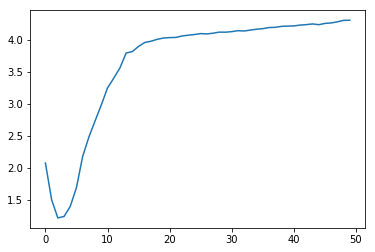

In [15]:
option3_history = option3_model.fit([Users_train, Movies_train], Ratings_train, epochs=50,
                                    verbose=1, batch_size=32,
                                    validation_data=([Users_test, Movies_test], Ratings_test))


# plot metrics
plt.plot(option3_history.history['mean_absolute_error'])
plt.show()


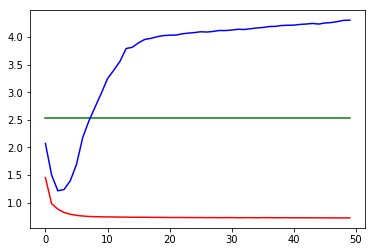

In [16]:
plt.plot(option1_history.history['mean_absolute_error'],'r',
         option2_history.history['mean_absolute_error'], 'g',
         option3_history.history['mean_absolute_error'], 'b')
plt.show()
